In [1]:
import time
import zmq
from argparse import ArgumentParser
import numpy as np
from matplotlib import pyplot as plot
import matplotlib.image as mpimg

from NeuralNetwork import NNFacade, NNConnector


#file = b'/home/sourabh/Documents/TU-Berlin/Thesis/Sytheticdata/ml-imagesynthesis/captures/Train/image_00000_img.png'
#ar = b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\x00\x00\x00\x03\x00\x08\x06\x00\x00\x00\xba\xba\x15\r\x00\x00 \x00IDATx\x01\xec\xbdY\xcf,Iz\xdf\x97\xefr\xd6>}z\xbaOO\xf74g\xe5\xd2\xcdmf\xa8\x8d\xd2\xb4I\x8b\xb0D}\x00\xdd\x18\xf0\x9d\xe1\x0b\x7f\x01\xdf\xf9\xc6\x82o\x0c\x180|i\xc0\xd0\x8d.mC\xb6a\xc1\x80\x05\x89\xdaH\xd9$DJ\xa2$\x8a\xd4\x90\x9c\xe1\xec3=KOO\xf7t\xf7Y\xde\xf7\xf5\xff\xf7D<YOee\xd6\x9aU\x95\x99\x15yNUD<{\xfc#\xb2\xea}"#\xb3\xce^\xfe\xf9Wo*?\xce\xbc\xa2rFMD\xe7mJG{]\x9d\xe4\xa9\xbc\x17\x04&\x8f@\xf3\x94\xd8o\x87\x0f\xeb\xad\xb7\xbe\xf0\x99C\xe8\xfe\xd9\xd3\x9b\xe1\xf1\x19\x8a\x10\xf8hF\xda\xf8z4\xd6\x88G\x80\xfa\x08B\x1c\xeb\xe8\x97\xb8{@\xa0\xcc\xcf\x1e@\xdc\xdeD\x81\x7f\x0b\xec6\x06mc\x85-\x82**CC \x8e\xba\xff\x9dF\x8c\x91N\xdby5\x9dJ&\xd6<g:!\x8b\x9c9=\x1aZ\xc1\xeb\n\xe0\x12\x1bvt\x18\xad\x15C\x10s\xf2M:L\xb7\xd5\xe4u\xd1\xcd`\xd6k\xea8\xaf\x94\x05\x81\x89 p\xd8)~Xo\xbd\x0f\x91\x7ff\xf4nx\x1c\x06\x9b\xddg4\x9b\xb4u{\xb2\x8b\xee\xba>\xa6+\xe7\xa8\x0f\x1cE\x0fs\xba\x03Qz6F\x04\xca\xbc\x1c\xc4\xa8\x95aXs\x18\nPk\x02U\xc4@\xc0\xa7K\xf3\xafm\xa7;J\x91o<\xde \xea\xe5\xbc:\xc1wBV\xa6Y\xf3\xa0e\xbe\xd3k_Q\xaf&\x06#\xb9\x8a\xb1\xcb:\xf2`\xd0\xf8Q1\x1a\x84\xe9\xbcM\xe9M\x1f\xe6(\xdb\xc3V\xd3\x9e\xf3KY\x10\x98\x00\x02qzs\n\xc5v\xff\xdd[f}\xff\xdew\xeeO\xfc\x8c\xf1\xfa\xceF\xc7c\xc0G(\x8e"\xb4]\xa0\xd8Ew<\xc8\xed+\xd28\x12\xb1\xbe\x8b\xbf\x9eF\x043\x84\xd4\x93\xb9]zTt\x0b\x025\x02e>\xd6P\x0c\xa1R\x86c\xc5(\xf4\x06Po\x86V\x04\\\xd8\xc7F\xc0G\xba\xed/\x02\xe7\x11c\xe4\x1b\x9d7\x88z9\xaf-\xb9w]x\xb5=W\x80\xd9AGd\xce\x9e\x1b2\x9d\xda\x92\x16\x00"\xc3\x1az\x9b\xf1g\xd1\xc1sz\x0c`\x19}\x19/\xdaj\xdaC\xaf\x1c\x05\x81\x89"\xe0S\x7f\x7f\xdd\xeb:\xa1\xdcs\x17\x7f\x7f\x11\xadm\xd9Ct\x85f\xdb\xe9\'T\x16\x08\xa66\xd8=\x8e\xa8\x9b\xf2rjP\x95\xfe\x8c\x0f\x812\x17\xc77f\xa7\x1cq\xaf\xf3\xb5Wc\xa7<*\x83\xef\xbb\x8ft\xf3\xafi\xa7{\x07\x9cot\xde db\xcds%\'d\x91\xae\xc4\x1f\xb1\xb9\x04?\xe8\xcd-\nH\xce}\xcd+\xc0\xa8\xb4\x00\xd0PLd\xbd\xb7\xd1#\rA\x0f\x9az\x17o]\xba\xdbk\xcaC/GA`\x02\x08\xf8\xe9\xb2\xdf)\xdee\xdd\xbd\x0f\x14\xc8\x81\x87wh\xd4\x18\xc5&$m\xb4C\xc7U\xfcm\x8b@s4\xb7\xb5\x13\xf4\xf6`2X/\xd5\x82\xc0f\x08\x94\xf9\xb8\x19^\x07\x94.C\xd3\x02v\x01\xa5\x05\x94BZ\x85\x80O\x9b\xe6_\xdaNG\x7f\x81\xe7\xcc\xccp~\x9d\xc4;!\xeb\xce%\xfe\xc1 bs\xbc\xa0\xd7\xfa\x07#\xba\x1c\xee\x9f\xc8\x82N\xda\x01P3%\x18\x983\xa5\x06=\x1a\x8c\xf2\xcb\xe8\xcbx\xee\xbfi\x0b\x9dr\x14\x04&\x84\xc0\xe1\xa7\xb8\x9f\\\x80xx\xef+\x87\xce\xc3#4\xaf\xafT\x9a\xb6@\x84\xc1G\x0cZ\xa4O\x1b\x81)\xf5n\x0f\xa3\xb6\x07\x93SB\xbc\xf4\xe5@\x08\x94yx \xa0\x8b\x9b\xde\x11(s\xb7wHO\xc1 \xd3\xc6\xff&\xf3\xfe6\xa7R\xe47\x13|\xe75\xe9\xd8Z\xe0\x05"\xbc\xae\xc4\xdfy\x88\xdb\xe1\x86h\xcc\x05\'\x86\xf3r\x00\xb3g\x008#\x99\x98W\x8c<7\x18iMG]\xbcu\xe9\x1eC)\x0b\x02\x13B N\xff\xb6\x0f\x92\xdd\xba\x1a\xadc\xc9OT\xb7\xda\xe4;\xfd\x88\xa5\x83@\xd9\x0c\xf7\x88a\x1d\xcb\xb5C\x10G\xcai\xc7\x8a\xa9\xf8\xdd\x06\x81=\x8e\xda\x1eMo\xd3\xd3\xa2s\xa2\x08\x94y8\x8a\x81/\xc3\x14\x86i\xef`\xec\xddA\xe8L\xa9\x1e\x03\x81\xf8\xb7\x19\xfe\xe3\x88G^W\x82_\xd3Q\xce\n\xae\xd7\xc5\x83^\xfbq\xe1\xac>\xc7\x0b6g\n\x10\xf3\xe1\xba\xc1\xd1\xe23\x00jORr\x05\xf4\x9d\x1ei\xd9n\'o[\x9d6\x1f\xee\xab\x94\x05\x81\x91#\xc0i\xb1\xbf)\xee\']\x04i\x7f\xde\xa2\x97\xad\xeam\xe1neh\xdcJ\xcd9Q`\x19\xe3x\xeeq\xd4\xf6hz\x8cH\x97\x98\x8f\x84@\x99\x87G\x02\xbe\xb8\xdd\x1a\x812g\xb7\x86\xae(\xa6\xd4\xb7\xf9\x17t\x9cR\x91W\xe7\xd6\x99\xb8\x8c\x07\xb6\xf0k\x1d\'P\xea\xe8\xe29=\xc6P\'\x14s\xc4l\xc4\xac\xe9m\xce\x11\xbc\x9b\xf0\x0c\x80\xa8\x18\xa3F9\xf2h\xfb\xe1\xf4e\xf2]\xbcu\xe9\xee\xab\x94\x05\x81\x11#\xc0t\xef:]v\xef\x96\x9fL\xeeaw\x8b{\xb50\x920\xf7\x8aA\xc3\xb8\x8f \xe4\x08\x8f\xd3#\xad\xa1Z\x9aGG\xa0\x8c\xce\xd1\x87\xa0\x04\xb0?\x04\xca\xf4\xde\x1f\xb6{\xb0\\\x86K\xa0\x1e\x14\x84\x83:\xdb\xc3\x8c)&\x97!\xe0\x7f\x83!\x13G:\xd2\x8d\xe7L1"\xaf\xce\xbb3\xd1y\xd0]\xc5\xfc\x07\xfe\x1c\xcf\x15r\x00\xcbt\xcc\x8e\xbf\xb9\x9e)\xb8\x16D\xd5\x95\xfcsl\xf7\x0c\x80h\xcb\xcc\x84\xb7.^\x17\x1d\xd5e\xbc`\xbaT\x0b\x02cE`\x7fS<\x9f\xd0\x9d\xc0\xf8\xa7@\xa7\xc0a\x19\x0e\xc4a\xbd\x8e\xc2[\x84\xc6G-\xd2F\xd1\x89\x93\t\xb2mdV\x9d\x8b\x1b\x82\xd3\xe6bC\x13E\xbc \xb0\x15\x02e\xeem\x05\xdb\xb1\x95N~\xd8\x0e\x0e\xc0\xc1\x1d\x1e{\x8a\x9d\xa4\xff\xe6(\xfb\xdfg\x80\xb1,\xc17\xb0\x82\xb0Wk\x1d\x042\x91\xa2+\xf1w\x9e\xd9\x0b:\xd6Vps\xf1\xd5NjiU\x82\x13\xea9\x80\xf6g\x00Dkn\xccm9oS:\xfa\xeb\xea\xb8\xafR\x16\x04F\x88\x00\xd3\x9c\xd3\xc4K\xefBs\xfa;}\xb7\xd2O\xc8\xa6\x95\xfdxkzY\xbb\xdd\x15\xe6\xda\x06\xa6+\xe8s%\x8eX\x81k\xe8\xe3\x1dG+\xc6\xdaE\x8f2\xd4W\x8c\xf0\nv\xd3Zi\x17\x04zC\xa0\xcc\xbd\xde\xa0<\xa4\xa1\x93\x1e\xb6\x83v\xfe\xa0\xce\x0e9\x85\x8a\xaf\x16\x04|\xb4\x9b\xdf\xecu\x12/\xc62\x1e&\x9d_\xeb\x04"\xbc\xb9\xc4\x7fM^\xeb\x9f\x10\xb5#\x8c\x84\xa3\xa6{o\x12\xaf\xfbg\x00\xe1\xbb\x12u\xd7\x8b\xb4e\xf4e\xbc.[\xe8p\xc0o\xfa1Fy+\x08\x0c\x1f\x01\x9f\xde^\x12\xb1O\xe7\xc3Lm\xf76|\xacN9B\x9f\x0bq\xb4\xe2\x9c\xf1y\xd3\xa4\x9d2f\xd3\xe9\xbb\x8fzct\x1bM\xdb\xaa7\xf7W\xc3t\x10(=\x19\x18\x02\xcd\xb97\xb0\xf0J8\xdd\x08\x9c\xec\xd0\x9dl\xc7\xbb\xe7B\xe1\xf4\x83\x80O-\xff\xa6v\xabs_\xc7bF~\xcd\xcbD\xe7\xd5t\x8c\xac\xc9C\xc7c0\xdfAo\xce^\xb09\xaf0\xf3\xe5W\xfc\xcd\x8e\xbf\xc9^\xba\x05\x00B\xf4\xe4QoC\x8f:\xd1\xce2z\x93\x17\xf5\x88+\xb6\x91-GA`\x84\x08\x1cf*\x0f\xe8d\xf1\x0e\xc7\xcf\x96\x11\x8e[\xdf!;,q\xa4\x9a\x10\xc1\x83\xd6\xa4\xf7\x1dK\xb1w,\x04ZF\xb6\x85\xd4\xfa\xc5}\xac\x90\x8b\xdfi!\xd06\xdf\xa6\xd5\xc3\x93\xe8\xcdI\x0e\xe3\xd1:}4\xc7\'1\x97\x87\xd0I\x1f\xe1\xf8\xf7\x99\xc7U\'\xdebF~\xa4\xbb\xac\xf3k\x1e\x8c\xa07G\x0f<\xe8\x1e\x83\xd9rC4\xbaxs\n\xa65\x0bp\x81\x97\x83\x90\xa3\xd9-\x00\xe84\x1ce3\xf3t\x88n0\xca/\xa3/\xe3\xad\xb2\x85n9\n\x02#G\x80i\xde<]\xfa\xef\xd2\xfe=l\x1c\xb3\x9f\xdf(\x12^l\xb7\x19\x8b2\xb1\xde&;RZ\x1c\xa58/\x9c\x0em\x15L#\xed\xfa\x89\x87\xdd1\xaa\x1d\xe4\x13\x07\xabt\x7f\x9f\x08t\xcd\xb9\xf8\x99\x1b\xeb\xfb\x8c\xa5\xd8\xde\x1a\x81\xaea\xdc\xda\xe0\x90\x15O\xaa\xb3C\x1e\x88\xe9\xc7\xe6\x7f\x8byO\xebd=3\x9c_\xd3\x11\x14\xd1\xe94\x9b\xbc,2Ow\xa2Jt7\xd5A}\xe1\x8fE\x0f\xa2>_\xa8d\xa2;\xc9\xbc\xc5\x9f\x01l\x1atc\x91\x1ei\x91N\xbd\x8b\xb7.=\xdak\xea\xc0+GA`$\x080}\xfd\x1c<\xa9\xa9\xec\x9dn\x8eS\x17=\xcaE\x99X\x8f2\x13\xa8{\xd7|^\xc4\xb92\x81\xee\x95.\xcc!\xe0\xa3=GL\x8d%\xac\x16\xe9B*\x08\xec\x86\xc0\xaa\xf9\x16\xf9\xb1\xbe\x9b\xd7\xa2\xbd\x07\x04Nfx\x06\xd3\xd1\xc1\x04\xb2\x87\xd9t\xda&}d\xf9;\xcc\xff&\x03\x91:!\x171\xd2\x97\xf1j\x1d\x84\x1azM^\x161?\x1e\x03\xb4\xda\x99\x88s\xf4\xcc#\x969[\r\x1d\x9a\xb3#\x04\xd1P\xea~\x06@\xecm\x8c \xd2\xf1\xe0\xbcu\xe9\xdb\xea\xcczSj\x05\x81Q \xd0uj\xf4\x1f|\xf3\xe4\xeb\xdfC\xb1\xd8\x0f\x02\xcc\tF+\x8e\x98\xcf\x13<@\x8fmh\xe5\x18#\x02+Fq\x05{\x8c=.1\x0f\x18\x812\xdf\x06<8\x9b\x85v2C\xe9\x1d\x8d_\x8a\xb1\xbe\x19l;J{0;\x9a)\xea\xc3C@C\x9b\x7f\x15\xaf\x8em.O\xd6\x9cc\xda\xf9\xd1\xc5k\xd2\x91w\xbd9^f\xd8T\x96\xef\xb9\x99\x95\x15\x9c\xe7>\xad\xac\x8d\xb5\xeb\x98\xcc\x9c1Qj\x9d&\x03\xde\xcd\x8a\x9f\x01\xc4b\xd4sc\x91\x1ei\x91N\xbd\x8b\xb7.\xdd\xed5\xe5\xa1\x97\xa3 02\x048\x95&;\x95\xe3\xe7\xc4\xc8\xc6\xe5\x90\xe1\xc6\xf1w\xc8\xa0\xf9\xdcp\xda!c*\xbe\xfaD`\x8d\x11\\C\xa4\xcf\x88\x8a\xad\x13D\xa0\xcc\xb1I\x0e\xfaI\x0ck\xb3\x93\xb1\x1d\xeb\x93\x1c\xe1\xd2\xa9C"P\'\xe6\x9aW\xbe\x08P\xd3\xf4\x87\xd9\xdc\xdfkq\xee\xad\xc9\xabmy\xa7\xb2\x1e\xf4h\xce\x1d\xe1\xaf\x8b7\xaf\x90\rz\x80s\xc6\x02o!\x00\xf1BG7\x7f\x06\x80;r\xc7\xd9\x97\x15]\xbc.:J]\xbc.z\xf4W\xea\x05\x81\x01#\xe0\xa7\xc8~\xa7\xb2{\x190\x10%\xb49\x04\x98\x0f>j^"\xe0\xf3dN\xb84F\x82\xc0\x1a\xa3\xb7\x86\xc8H:[\xc2\x1c2\x02e\x9e\ryt\xb6\x8em\xf2\xc3:\xf9\x0en=\xf4E\xb1o\x04Z\xe6Z\x9d+\xeb\x8f\xb2\xb9\xbf\xcb\x1a\xb2\x9e?\x13R\xadC#\xe8\xcd\xd1\xd7\xe4\xa1\xd3pU\xdbl\xb3\x87\xd9E\x05\xd1\x08\x1eCM%\x0f<\xd0\x17\x9f\x01\x10#\x88(\xc8^\xedlS:\xba\x9b\xea4\xe5\x97\xf9\x87W\x8e\x82\xc0\xc0\x10\xf0S\xa9m*\x0f,\xd4\xdd\xc2\xf1\x8e\xeef\xe5$\xb4\x81\xca\xe7\x03e\x81n*\xc3\xee\xa3\x1aG\xd4GXe\xf8\xd2\x9dJ\x8fK?\x06\x86@\x9cz\x03\x0b\xad\x84\xb3=\x02\x93\x1e\xd6Qtn\x14An?\xc1NI3\x0ce\xa8\xd6\x08x\x8e\xec\x84\xb9\xafm}\x8d\xd7\xdf\xf2Q9\x13W\xf1\xe6l\xe1\xa0Vh\xf9;\xb0\x8b\x17\xe8\x1ec]\xb6\xf22\x91b!\x00~\x06\xb0U)\x04\x87\xf5\x96\xceB\xae\xe9n\xc3\x88\xf9\xcdu\x9a\xbc.\xfa2{\xcbt\xa2\xcfR/\x08\x9c\x14\x02\xcd\x93\xeb\xc0\x9d\xf7\xf3\xf2\xc0n\xc7\xec.\x8eX\x81o\xcc#\xd9\x15{\x1cad\xd4\xb6\x81n\xd2\x9b\xfae64\x11)\xed\x15\x08\x94)\xb3\x02\xa0q\xb3\'?\xbc\xa3\xe8\xe0(\x82\x1c\xf7D\xdfw\xf4\x8d!l4\xe7\xbc\x93#\xb3\x080\x97+\xab\xed\xdf\xdest4\xd7\xe0\xa13\xe73\x1b\xa3\xe8\xb2\xb7@\xcf\xbe(\xe6\x8d\xa9]\x07g\xdc\xf0\x96\x83[\x08 \x8b\xa8\xa3i\x07@\x8c\xce\x8d!\xd3E\x8f\xbc(\xbf\r}[\x1d\xf4\xcaQ\x10\x18\t\x02\x9cJ\xcdSe\xb7\xd0\xfb\xb5\xb6Q,\xf1sa#\xc5"\x0c\x02\x05\xbe\x13\x99\x07k\r\xf4ZB\'\x02X\xe9\xe6\xda\x08\x94i\xb36TEp`\x08\x94\xb9;\xb0\x01\x99X8;\xce\xaf:\xf9\xd6\x9f\xd8\xf1\xaf\xec\x9a\x0e\\\x817G_\xc6\xcb\xc6(\x16rrw\xa4\xd8\x17\xc2\x0f<\xcc\xcf\x1dfl\x8e\x92\x1a\xb5\xce\x825\xc5.\xa6\x05p\xa6\x05\x00\xe7\xbb\x02\xeaN\xa3\x1e\xe9\xcbx\xae\xd3\x94\x8f:M\xde\xb6:M;\xf8(GA`\x00\x0805\x9b\xd3\x9a\xf6\xe6S6Z\x8a\x1d\xdb\xdcR\xd4\xde\xb9\xee\x9d\xf1N\xeel\xf0t\x0c8dq\x04\x9dv:(\x9cHO\x97\x0e\xecR\xe6\x89\x00T\xba\xb9\x15\x02e\xeal\x05\xdb\x98\x94&;\xc4\x83\xef\xd8\xe0\x03\x1c\xd34>N\xacK\x86p\t\xab5V\xff;m.\xc1\x17\xb1\x95\x8e\x855x\x0b\x89\x7f\xd0\x9b\xf3\x93\xe9\x14uBa\x8d\xfcV\x07\x11\x89\xaa\xd7\xf4\xd8\xdbL\xa4\xc8\x89\xbfk\xcdn\x01pJ\x8b\x9e\xb16\xa5\xa3\xe4:\x1eT\xd3G\x93\xbe\xad\x8e\xdb-eA\xe0\xc8\x08\xf8\x94\'\x0c\xaf\xb7M\xf3\xd5a\xba\xf6j\xc9\x83H\x10\x8ewd`\xa1\x1d\xa4\xff;8q\xb8\x1c>L9m\x07\xb3Eu\x88\x08,\x1d\xd8\xc0\xf4U\xf8!\xf6\xa1\xc44,\x04\xc2\xb4\x19V`%\x9a\xbe\x11\x98\xdcP\x8f\xaeC|K\x8f.\xe8\xbe\xa7\xe1\xf8\xec\xeda\xc8\xe6\x12rM\x8b\xb9\xbf\xdf\xa2\xbf\xcc\xb0\x99\x13\xe9\xa0\x18\xf4\xe6\xec\x05\x9e\xe5\xe4\x11qw\xd4\xb4\x95uL\xb4\x8b7GwC\xd2h\r\x8eg\x00\xf8\x11\x15\x83\xde\xdc\xb9\x10\xe9\xe8\xb9\xce\xba\xf4mt\xdc\x07\xbaM?\xd0\xcaQ\x108\x19\x04\x8e|\x02\xc4s\xf1d0\xdf\xbd\xa3q\xd4\n\x84\xbb\xe39X\x0b\x9d\x83\xdb\xc2X\xf8k`\xb0\xbd*\x81\x1d\x0b\x81\x96is\xacP\x8a\xdf\xfd"\x10\x87\x9a\xef\x0bo\xc7\xfa~#\xe8\xd9\xbaw\xa0g\xb3\xfb3\xe7\x01{\xb9?O\xc5rO\x08\xac1Tk\x88\xac\x0c\x86\xb5z?\x9a_\xdb\xce\xebJ\xe2\xed\xfcm\x06!\xa2\xd3\x9b,_0h\xfa1\xff\xa6\xe4\x91\x84\x12:\xc7\x9c\xb1L\xect\x94Tf\xb7\x00\xd0vC\x897o0\xf2\xa2\xa3u\xe8\xd8s\x9d(\xbf\x8c\xbe\x8c\xd7e\x0b\x9dr\x14\x04\x06\x82@s\xaa\xef\x16V\xbf\xd66\x8a\xc5\xcf\xb7\x8d\x94\x1a\xc2\x84\xdf\x87\x9d\x86\xd9\xb14c\xd7}$#m,\xfd(q\xb6 \xd0:\x90\xad\xc4\x16\xe5B*\x08\xb4 P\xa6O\x0b(\xd3$5\x87:\xb6c}4\xbd\x1fe\xd0\xa3A\xf7\xb4\x03=\xd2\xdcZH\xc8\xf5G\\\xfdw\\3\xa6\xcc\xebZ\x14\xe0\xef\xe0\xa6\xca\xccX\x07\x0f\x85\xa6R\x1d@\xcb\x94\x80\xb7\x10@\x96\x0b\xbb\x0fg;\x00\xdc\x182\xd1\xd1:\xf4\xa8\x13\xe5\x97\xd1\x97\xf1\xdc\x7f\x97-t\xdbxM\x1ar\xe5(\x08\x1c\x01\x01\x9f\x8a]Sy\xb3\x90\xdc\xdafZ;K{\xf0;\x1b\x92\x81>m\xf5\x11\xcf\x81lx\xb7\x19A\xea^\x1e\xc8}qsp\x04|\xc4\x0f\xee\xb88\x1c3\x02e\xda\x8cy\xf4\xb6\x8e}2\xc3>\xea\x8e\x8c:\xf8\xad\xe7\xde\xa8\x147\x1c\xa2\r\xc5\x97B1\x97\xfc\xeb\x0f8\xffk|\x8e\x8e\x85\xcck\xcd\xbb\x03o\xc1\x19\x06\xdb\x02\xae\x1d-ht\xff!i\xb6dl\xc1^\x08 \x04>\xff\x0c\x80\xa8\xe4\xce\xddw\x17\xcf\xe9\xeb\xcaco\x95N\xd3\xd6*\x1d\xe4\xdbt\xd0+GA\xe0\x88\x08\xec>-w\xb7\xb0v\xf79/q\xe7\xe7\xe7\xda\x8aE\xb0\x89\x80C\xd9\x1c\xbd\x02m\x13\xa9\x91\xb6\x17\x062\x12\xfc$\xf2r\xa4},a\xef\x1f\x818m\xf6\xef\xadx\x18\x08\x02\x93\x18\xf6Itb \x13\xa2\x84\xd1\x8e\xc0\x80\xe6X\xdc\xee\xdf\x0c\xb6\x93\xa7?\x01\xec\xaf\x00\xf5c\xa1+\xfe\xe7A\x93\x01\x9d\xa3I\x87\xd6\xa5\x13y\xd4\xe3\xe1W\xfc[\xec-\xfe\x0c \x8a\x1e\x00\xf5\xa8\xb4\x0e=\xeaD\xf9e\xf4e<\xf7\xbf\x89-\xec\x95\xa3 pD\x04\x98\xb6\xcd){\xc4pV\xbb\xf6\xf3\xcc\xcb\xd5\x1aE\xa2\x05\x01\x1f\xf78\xf6MH\xe19\xad\xab\xdeb\xba\x90\x06\x8d@\x1cq\x02\xf5\xb6\x8f\xb0\x97\xcdNt\xd1\x9br\xa5=9\x04\xfcC`r\x1d+\x1dZ\x86\xc0$\x86}\x12\x9dX6J\x85w\x14\x04v\x9cW;\xaa/\xedr\xb8p^\xcb-K\xfcMH\x01-\xc4\xa4\xaf|\xfb\xd6_`H\xa3\xeb\xcf\x01\xe8\x1c\xcbt\x8c\xc7\x9b\x0bg\x85\xd6\xc0\x93\xad\xeeg\x00DG\xd1^\xb6IaG\xe4\xb9N\xa4!\xd4E_\xc6\xdbV\xa7\xe9\xdb\x82,o\x05\x81\xb1!\xb0\xa7\x89\xccy\x15M7\xdbc\x83i`\xf16\xa1%<h\x0e3%/?\xba\xea\xce/\xe5\x80\x10\x88\x83\xb5QX>+\xbc\xdcH\xb9\x08O\t\x81M\xe6\x90\x7fpL\xa9\xff\'\xdc\x97M\x86~\xb00M\xa2\x13\x11\xdd\xc9u(vn<\xf5\xb1\r\x83>\x9b\xed\xe3\xb9%\xeem\x17\x05\xec\x0f\xc3\x16{\xf5\x1f\x90\xcd\xd1\xf4\xef\x879\x1d\x88:\x96\x05\x17\xeeQH;\x00\xb2\x8e)Fc\x91\x0e\xb3\x8b\xe7\xf4\xa6|\xd4i\xf2\xf6\xa5c\x9d(o\x05\x81\xe3"\xe0\xd3\x9di\xee\xf5\xa3E\xe4A\xc42\x06\xe3\xe7b\xa4\x95\xfa\xd6\x08t\xc1\xd9E\xdf\xdaQQ\x1c9\x02eF\x8c|\x00\xd7\x0f\x7f\x9b\xa1\xdeFg\xfd\x88\x8adA`=\x04\xca<\\\x0f\xa7"\xb59\x02=\xcd\xad\x9e\xcc\xac\x15\x7f\xe7\x8ez\xfd\xa1\xcf\xdf\xfam\x17\xdc\x97&\xf1xm\xeb\x80\x19k\xe1yB\xd1\xa9#F\x1b\xcf\xfc\xcc3\xd6{\x06@\xd4q\xe7]AC\xe7p\x9d(\xbf\x8c\xbe\x8c\xd7e+\xeaP\xe7X&\x9b$\xca{A`\xaf\x08\xf8yK\xd9\x9c\xfe\xeb9\xdeNk\xc1\xb6\x9f\x0b0\xbc\xee\xe5\x82p!\xf4\x85@\x1c=\xe0.\x90\xf7\x85\xec\x11\xec\xece\xf0\xf6b\xf4\x08\xe0\x14\x97+\x11(C\xbd\x12\xa2)\x0b\x8cz\xf8\xdb\x82\xe7\xcb\xad\x8d>\xcaA\x9cLG\xc6\x83\xfe\x04 _H\xf0uN\xd8i\xa1\xbe-t/\xf0\xe6\x06\t\x05\x8e\x05\x05\xd1\xcc\xd8\n\x1e\xba\xf1\xd88\x80\xa4\xbc\xf8\x0c\x00\x0f\x0c~\x0c.\xd2\x97\xf1\\\xa7)\x1fu\x9a\xbc.\x1d\xa7\xa3\xbbJ\'\xca.\xf3\x05\xaf\x1c\x05\x81=!\xc04mN\xc5\xcd\\5\'z\x8b6\x0e\xdc\x91\x97-b\x85t<\x04v\x9b\x03\xc7\x8b\xbbx\xde\x17\x02eF\xec\x0b\xd9\xc1\xd9-C=\xb8!9F@\xa3\x9d\x06\xcb\x02_\xc6;\x06\xc8k\xfb\x1cm\xe0k\xf7p\xd0\x82{\x82\x7fOf\xd7\x83R\x7f{\xdb\x9f\xdf\nb!\x8e\x15\xbcE\x85\xec\xb2\xeb\xefy\xa7/8\x92\x9e\x07QG\rA\x87\xd3\xdbt\x92D5{\x06@\xd6\xc9\xf4\xf9\x1eE^4\xb6\x0e\x1d\x83\xae\x13\xe5\x97\xd1\x97\xf1\xdal9\r\xbdx\xe0\x0f^\xd3o\x94)\xf5\x82@\x8f\x08\xf8T\xdcn\xca\xad\xa9\x15\xe7\xb5\xcfow\xdcc_\x8a\xa9\xed\x10\x88C\xe1C\xb5\x9d\xa5\xa2u4\x04\xe2 \xee\x14Do\x86v\x8a\xa2(\x1f\x00\x812\xd4\x07\x00y\xd8.F=\x05F\x1d\xfc\xb0\xe7\xc5\xc9F\xb7\xc79\xb5G\xd3k\r\x97\xfdm\xd7\x12\xc4\xb2[\x04,\x1fm\xd1I\xc9\xba\xdc6y\xfe\x07d\x93N\x84\x1e\x80\xf1\\P\xe5\x1c\xbd\xd1\x15\x17\xcb\xe4\xf5\x9f\x01\x10\x03\xc0H<\xbaxNo\xca\xa3\xdb\xc5\xdb\x96\x1e\xe3\xa1\xde\xe8hY\x08h\x02T\xda\xfbF\xa0k*o\xe67[9\xd3\x84n\x9b\xd3\x18sG\x9b\x19.\xd2=#\xe0\xc3\xe0\x1fw\xb4\x9d\xd6\xb3\xabbn\x9f\x08\xec<h\xab\x0c4O\xe4}v\xa6\xd8>\x08\x02\xab\x86\xfc A\x14\'\x05\x81-\x10(sw\x0b\xd0\x8aJ+\x02\x07\x98K\x07p\xd1\xda\xb5&\xb1\xedV\x00\xfe\xe0k\xa3\xdb7~[\xe0\xfe\xa7\xc02^\xd3\xf1\x9c\x0e\r?2c\xc1\x96\xcb\x10\x9c\xcb\xa6r\xf6\x0c\x80\xc8py\x97\xed\xe2\xad\xa27\xed`\xcfu\x9a\xbc.\xfa::\x1eg,\xa3=\xea\xee/\xd2\xa3|\xa9\x17\x04z@ N3\xaf\xaf6\xdb&\xa9\x89j\xf3V<\x9f\xbf\xb1\\m\xb4H\x1c\x18\x01\x1fE\x86\xa9\x1c#D`\xe7\x81[\xd7\xc0\xbar#\xc4\xf0\x94B.\xc3xJ\xa3\xdd\xd9\xd7e\xd3\x80\xef\x84e\xfcN\xa3\x87b\x0c:\xb8\xbe@8\x89N\xf6\x05\xd6vvN\x19b\x9d\xe4v\x9e71\x08\x7f\x106Y\xf5\xc5\xbc\x05\x86\xe0\xf7\x0f\x8d6\x1e\xa3\xd3Fo\r\x00a7F\xbdq\x885\xbb\x05\xc0y\xc8\xfb\x11\x1d\xadCG\xcfu\xa2\xfc2\xfa2\xde*[\xe8\xae:\xdc\x06r\xd4\x9bq\xad\xd2/\xfc\x82\xc0\x06\x08\xf8t\xdbh\x9a\xf9\xbc\xacK\xb7"\xc7^m\x96\x1b\xc4TD\xf7\x83\x80\x0fW\xb4\xee\xc3\x14i\xa5>\x02\x04v\x1a\xb88\x13\xfc\xccw\xdaN\x86G\x00\xdc\t\x86X\x86\xf4\x04\x07\xbd\xbb\xcb\x9c\xf1]S\xa2\x8b\xdem\xed\x00\x9cA\x06u\x80~\x17\x17\xfd!p\x849t\x04\x97\xeb\xe1\xa5\xc0\x16b[\xf6\xa1\xd0\xc5s\xfa\x821\x85\xe1\xbcfDF_\x16@\x8b1\xb7%V\xba\x05\x00\xa3\x10\xfd\x88:\x91\x0e\xbf\x8b\xb7\x8a\xde\xb4\x13m5yn\xabI\x8f:\xd479\xb0\xe9\xf6b}\x13\x1bE\xb6 \xb0!\x02\xadS\xcd\x89\x94>)\xad\xae7+\x03}C\x7fE\xfcp\x08\xf8\xc7\t\x1e\xebaS\x1dzl\xc3/\xc7\x80\x11\xd8y\xb0|&xI_\xbd\xeee\xb3\xff\xee\x14\xbe\xd7\x9b2\xa5=(\x04\xca0\rj8\x8e\x19\xcc\xe8\xa6\xc2\xe8\x02>\xe6\xe8\x16\xdfK\x118\xc2\\:\x82\xcb\xa5\x10t2\xf5un\xdf\xe8m\x01\xfbW}\x1b\x0f\x83m\xf4\xa5:R0\x1d\x17\xa2\xd4a\xcd6c\x89\x1d\xfd\xccn\x01\x80\x17u\xb2\xad\xac\xd2\xcd[G\xa7\xcbV\x93\x1ech\xf2\xdc\x0ft\xaf\xd7\xc1\xadQi\xd3\xc3N\xd3\xcf\x1a\xa6\x8aHA`\x19\x02>\xd5(\x17\xa6\x97\xcf9\x9b\xc3\x91\xbb\xcd\xa4^\x16E\xe1\x1d\n\x01\x1fR\xfcQ/#y(\xe4w\xf4\xe3\x03\xe5\',\xe6b}G\xf3\xcb\xd5\xfd\xdc\xf7 \x96K\x17\xee\x91\x10(\xc3s$\xe0\x87\xedv4g\xefI\xcf\xdf\x93\xee|\xbf\'\xd0\x91\xa0<\x92\xdb\xad\xb0\xdb\xe9\xe1\x7fM\x8f\xfewH\x1b\x00\xce3\x1d\xff$\xf2R\nm:M\xfb\xb9=\xdb\x01\x10\x95\xdc\x16B\xeb\xd0\x91\xdbD\'\xca\xa2\xcb\xe1~\x9a\xbc&\xdd\xdbIk\xfd\xf7\xa6\x1e\xed\xa6\xaf\xf5\xad\x15\xc9\x82@+\x027\x9aW<\xaf\xcf\xe6\xb3\x97MI\x9b\x8b>\xf9\x9a\x13\x13a\xe75\x15K{(\x08\xf8\xa81R>ZN[7F\xf46\xd5Y\xd7v\x91\xdb\x00\x818\x08\xb1\xbe\x81\x89\xcdD\x0f\xe2d\xb3\x90\x8a\xf4<\x02e\x88\xe6\xf1(-C`4\xd3b4\x81\x96\x895X\x04\xca\x1c\xdahh\xda\x1e\xfe\xd7\xf9\xa1\xe1\x7f\xfcua\xdcF_\xd0\xf1\xbf<\xf1\xd2\xa6 \xb2\xafJX \x8bo\xf3\xcf\x00\xe8\xb2\x17\xe9\xd8\x88\xbe"\xaf\x8b\x1eu\xa2\xfc2\xfa*\x1e\xfc]\x0e\xe2\xf0x\x9b1\xedb\xb7\xe8\x9e\x06\x02\xcc\x9d8o\xf2\\\xf2\xe4\x9f\xf3\xae\x9e_\x0b\x88,cF\xa3\x0b\x8a\xfd\x10\xa2\xfb\xaez?\x9e&k%\x8e\x92\x7f\x8c\xd0\xd9\x08\xe7\xaa\xceG\xbdU\xb2\x85\xdf\x13\x02G\x05\xfd\xa8\xce{\x02\xf0\x04\xcc\x94a:\x81A\xde\xae\x8b\x9b|\xbeo\xe7a\x0b\xad2_[@+\xa0\xb4\x80\xb2\x1ei\x00\xd0\r \x84\xf5\xb0\xea\x90\xea\xcc\xbb\xfd\x03\xa4\xad\x83\xce\xeb\xb0\xd9\x9aO\x98\xce\x12c\x0b\xab\x12\xf3\xc6\x17\x7f\x06\x10~\xb4\x87\x03?\xd6\xa1#\xdb\xa6\x13i\xc8\xb8\xad&}\x19\xcfu\x90\xd9\xf5p[\xf8o\xd6\xdbb\xda\xd5_\xd1\x9f\x16\x02>o\x9a\xa5\xe6\x92M\x1f\x9fS\xad\xbd^\xcal\xd5\xe8\x95\x18\xddw\xd5{u8Mc\x11:\xefa\x1b\xcdy\xa5<E\x04\xca\x8c\x18\xfc\xa8\x97!\x1a\xfc\x10\x1d+\xc0AN\x8dA\x06u\xac\x11r\xbf\x05\x14Gb\xe3\xb2@\xb71d\xab\x14:\xf3\xee6\xac=\x87h\xe3u92\x1d)\xcc\xe9X\xe6!\r\x88s\x8c.+z\x08\xa0\xeb \x12u\xd6\xa1\xef\xaa\x13}D[]tdv=\xb0\xed\xfdl\xab7}\xef\xea\xaf\xe8\x8f\x1f\x01\xe6\x8b\xcf\x15/\xbdW>\x97r\xe9\xd3\xc7U\\lu\xe9\x9a\xab%\x8b\xc4q\x11\xf0!\x8f#\xe6\xb4\xe3FV\xbc\xb7"p\x94\xc19\x8a\xd3\xd6\xee\x17\xe2\x12\x04\xca0-\x01\xa7\xb0\x9a_\xf7GE\xa4\xcc\xd5\xa3\xc2?I\xe7\x03\x9aS\x03\n\xa5\xdf\xa1\xee\xfa\x10qz[\xc7\x9d\xd7\x1a\x89\x14\xe6t\x10\xe6\x98#&\xd2\x8a\xf7\xb4\x03 \xea\xb9-W\xec\xe2\xadC\xc7F\xb4\xb7J\'\xca\xb6\xf9w\xda.e\x8caY\xddcA\xc6\xeb\xbb\xf8-\xba\xc3G\xc0\xe7\x03\xe3\xed\xe3\x1eKz\xe02\x1d\xbdqv\x992\x1d\x00\x8d\x98\xeccK\x17||#m\xc4]+\xa1\xf7\x86@\x99\x11\xbdA\xb9/Ce\x88\xf6\x85\xecd\xec\x0eb\x8a\x0c"\x88\xc9\x0ci\xe9\x08\x08\x949u\xb8y\xe0yD\x17\xe6]\xf4\xb5\xc6\xc9\xff\x02\xf5\xee,3\xe62\x8b\xe5\xec\x19\x00\xcb\xecE^\xf4\x13\xe9\xcd\xa0#o\x1d\x9d(\x1fmA\x8f\xfa\x8b}\xe8\x97\x82\xaf\xe8\xd3\xeb\xcd\xf8\xfa\xf5Z\xac\x1d\x0b\x81\xe6x\x13\x87\xcf\xb7f\xb9$F\x9f&\x88\xc4\xfb\xff\xdd\xfc\x12\xd5\xa4\xe0\xbe\xa2\xa1\xa5J\x85yH\x04\x9a\xe3\xe8\xc3u\xc8\x18\x8a\xaf\r\x118\xe8 \xf9\x0ci\xfb\xa28h \x1b\x82tB\xe2q\x18\xca\xe7\xec\t\r\xfc\x88\xba\x1a\xe7\xe8\x88\xc2>n\xa8\x05\xb4\x95\xf8\x0f\x18\xa2\xae\xd0F\xff\x11\xdd\xd6\xb1m:5\xa7\x83Q\x08~\xb49q\xde\xear\xf1\x19\x00\xd1^\xf4\x83\xad.\xde\xa6\xf4h\xab\xcb\x87\xd3\xa3\xed\xd5\xfd\xe9G"\xfa\xa4\x1ec\xf1z?\x9e\x8a\x95C!\xe0\xe3\x18\xc7\xd6}\xb7\xd1\x9c\xb7f\xe9&lz\xa8A\x9b\xfa\xea\xe9"\tW\xc6W\xac\xd3.\xc7 \x10\xf0ql\x0e\x0f\xf4&m\x10\x01\x9fz\x10\x07\x1f\x14\x9f!m\xc0\xb7\xf1\x0e\x1e`[`\xa7Ck\xc2\xddl\x9f\x0e\x12\xa5\xa7K\x108\xf8\xb48\xb8\xc3%\x9d/\xac\xe9 0\x81y5\x81.\xcc\xe6\x93\xff\xa1\xb8I\xa7Zu\xfco\x89.C\xae4s\xbd\xac6{\x06@\xb4\xe7>\\\xb3\x8b\xd7EG\xaf\x8b\xe7\xf4\xa6\x8f\xa8\xe3<\x97\xf58\x8eY\x12\x8b\xc7u\xcc8\x8a\xefy\x04|\\b\xe9\x12>^>\x8f\xbct\xfe\x9e\xca\xf5\xddx\x80{\n\xa4\x98\xed\x15\x818\xc5\x189\xda\xeb\x8fu\xaf\xa1\x14c]\x08\xf8 u\xf1\x07C\xf7\x194\x98\x80\xa6\x17H99\xa77\xa6{\xea\xd1A\xa7J\x97\xb3\xf8\x91\xd0U\xdfS\xff\xc7k\xb6\x0b\xcc\xf1\xf6h\xa7\xc8G\x04\xc7\x88B\xddiHL\xb9\xad\xb3\xf1\x1co\xf3\xd0\xa6\xd3j\x0cC\x1c(t*\x99D\xf3m\xf93\x00\xa2-\xf7\xe1\x16\xbax\x9b\xd2\xb1\xe7:M\x1f\xee\xeb\xd8\xa5\xc7\xe7\xa5\x0f\x9c\xc7\x0b\xdd\xeb\xc7\x8eu\xaa\xfe\x9b\x18\xb7\x8d\x85\xcb\xc4\xf2\xc0x\xc4\xb0\x0e\xec\xba\xb8\xdb\x13\x02>\x9d\xa2y\x1f\xe7H+\xf5##\xe0\x83\xe2\xe5\x91\xc3\xe9v?\xf8\x00\xbbC\x1f\x03\xa7\xc0;\x86Q\x1aD\x8c\x07\x99*\xeb:\x89r]\xf5A\xa0V\x82\x18\x14\x02q\xae\x0c*\xb0\x12\xccR\x046\x1e\xb7\xa8\x10\x13\xceH\x8f\x1e=Q\x8d\xb4\xf9z\xfb3\x00\xa2\xbd\xe8\x07\xdd.^\x17}\x1b\x9dhk>\xde\xe3\xb7\x1cS\xc7e\xc8\xb1\x1e\x1f\xad\xed#\x00W\xc7\x18+\x11w\xe7Q:\xfe]e\xd4\xa5\xdeu\xb8}\xf8\xb1\xde%\xbf\x84\x1e\xc3\xee\x16[O\xaa[\xbfp\x0e\x85@\x1c)\x9ff;N\x91C\x85^\xfc\x0c\n\x01\x9f=\x83\nj:\xc1\x14x\xa73\x96\x07\xe8\xc9^\xa7\xcb^\x8d\x1f\x00\x9c\xe2b\xf8\x08\x8ct\x8e\x8d4\xec\x81\xcc\x87\xf0\xd7\xa8\xfd\x11\xba\x0c\xcde\xbc\xd4\x9d\xd9-\x00\xde\xbd\xa8\x13|\xd5\x89\x16r]\xf4e\xbc.\x9dHG?\xfa\xa7=\xb4\xc3\xe3\xf3\x92\xf8\xa9\xf3\xf2z\xb3OC\xeb\xc3\xd0\xe3\x89X\xc6X#\xbe\x8e\x7f\xe4w\xd5\xd7\x91\x8d2\xb1\xdee\xb3\x83\xeeC\x8f\t\xaf/\x8avs\x16e\x0be\x08\x084\xa7D\xb3=\x84\x18O6\x86A\x0f\xc6\xa0\x83\x9b\xc6\x94)\x10Oc\x1c\x0f\xd4\x8b\xde\xa7K\xef\x06\x0f\x04\xc4\xe8\xdc\x00\xb4\xff\x118\xba\xe0w\x0fx\xe4\xf3l\xe4\xe1\xef>~;[\x88y\x83\xd0\\\x00t\xf3s#\xdd\x02@`\xd1X\xc3O\x1dw\xa4\xefS\xa7v8\x82J\xc4\x8d\xbac\x14\xeb\xde\x8d6\x9a\xf3\xa6^\xc6\xbe{\xbd\xad\x04\x87\xaey\x8c<\x87\x97\xa95\xa8w\x0f\xcd\xa7\xc1bp\xdd\x9cE\xd9B96\x02>\x9e\xc4\xd15-\x8f\x1d\xe3I\xfb\x8f\x034( \x06\x1b\xd8\xa0P\xda)\x98\x02\xf1N\xf0\x9d\xa2\xb2O\x99\x9d?\xcb\xdd\xd0)\x82x\xd4>\x9f \xf0\'\xd8\xe5\xa3N\xb1A;o\x9b\x0c\x9eS\xb4\xf1\x96wfv\x0b\x00rn\xc7u\xa2\xbd\xc8\xdb\x94\x8e\xbdU:n?\xcay\x1cc*=~\xfaC=\xf6\xcb\xebc\xea\xcf\xa6\xb1\xc6>\xbb\xae\xd3\xbc\x8c\xd8@\xe3\xf0\xb2Y7\xe6\xf0\xdf\xbcKD\xda=\xcc\xdd\x9c\xe1\xf7\xf04#\xf4\x11cz\xc6)z\x9ah\x0c\xa8\xd7\x83\x1c\x8cA\x065\xa0A\xeb!\x94\x02q\x0f \x16\x13m\xd3(~\xd6w"\xd4\xa6\xd8)\\\x18\x05\x81-\x11\x98\xd0<\x9bPW\xb6\x1c\xcc>\xd4\xdaP\\\xeb\x13k\xa9\xf3\xd9\x0e\x00\xb7\x85x\xf4\xb5\x0e}\x1b\x9d\xe8\xc3Cl\xa39ol\xa5\xf7\xc5Kpl\xd6#\xb6C\xea\x1fqz\xbc]1\xba\x0cq{\xdd\xfb\xe7e\xb4\xe14\x97m\xd3\x836\xd2\xc3\xbb\xe7p\xc5n\x8e\xb4K%l!\xe0\xe3Z\xc0\x18\x10\x02\x83\x1b\x94\xc1\x054\xa0\xc1\xea1\x94\x02s\x8f`\x9e\x86\xa9u\xa7\x8c\x7fo\x83J\xac7Q:s\xe6\xba\x86\x9b\x06J\xbb \xb0\x0c\x01\x9fW\xcc3\xafG\xf9.z\x94)\xf5\x89!\x10\'\x82\x7f\x00\xd1\xc5H\xdf\xae\xcb\xf3\xcf\x00\x88\xf6\xa2\x9f\xa6\xaf\xc8\xeb\xd2\xe9\xa2w\xd9\x8a\xf2\xdb\xf5e\xb5V<yb}\xb5\xe6n\x12\xd1\x97\xd7\xbd\xc4\xb2\xd7)w=\xc0q\x99\x1d\xe7{\x89?\xaf{\x19\xe3q\x1a%\x87\xdbv\x99D\x9d\xb7\x11i\xd4]\xb7Io\xe3\xb9\xcc\x88K\x87l\xd6\x05\x07mF)\xb5\xe1#\xe0\xd3\xd6G\xcf\xdb\xc3\x8f|\xa2\x11\x0ev\x00|\x86\xac\xc2}\xb0\x1dX\x15\xf8q\xf9\x05\xb6\xe3\xe2?b\xef\xcd?SbW\xe6\xce\xda\xb9F\x94\nu\xcdC\x17+\x0b\x01\x01\x97\x83T\'\xfc!\xd0\xd6\xb56\x1a8w\xd1\x0f2\x06\x9b;\x19Y\xb8\x9bwp\xaf\x1aM\xf4\xeaO\x9f\xde\xbc.\xff\x19@\xdc\xc4\x18\xdc\xff2\xfa2\xde:\xb6\xd0\xdf\xd7\x11\xfd\xc7\xfa\xbe\xfc\xb9\xdd\xe8\xcb\xeb^\x82\xa9\xd7\xbd\x8c4\xaf{\x89M\xaf{\xd9\xa4\xd1\xc6\x96\xf3)9\xdc~\xb3\x8cr\xcesZ\xd4\xf3z\xe4A\xf3\xc3u\xbd}\x82e\x81`\x1a\x83\xce86O\x9bi\xf4l\x84\xbd\x98\xccI\xe53\x8a1\x98L\xa7\xf67\xa1\nD\xfb\xc3v\xc2\x96\xd7\x996\xf5\x99\xe8\x15J\xbd\xbc\xe9\xf0\xd4\xb6\xa8\xc0\xcc\x84\x1bg\x88\xe6U\xd7\xa9Kg4\x8d\xd6\x02\xb3J0=#Rs\x1b\xf3\xd4\xd2\x1a;\x02\x13\x1f\xd7\x89w\xef\x00\xb3\x0f\x04\xdb>8\xda\x90\xed\xfc\xf4X\x19g\xf73\x00\xa2\x9ff\x1c]\xbcM\xe9\x84\x17uV\x86;A\x81f\xff\x9bc\t\x7f\x1b\x9a\xebx\xb9\x0c\xba.\x1f]:\xcd\x98\xbb\xe4N\x90\x0e\xdc\xb3c\xbe5\xa3\x97\xdaP\x11\xf0Sa\x9d\xd3f\xa8}\x98T\\\x93\xfb\xac\x99\\\x87\xfa\x9fn\x05\xa2\xfe1=!\x8b\xcb>\xbb\xebod\xaf\xa8\xbc\xa1n/\x1a\xf3@\xd5M\xe6\xe4\x99\xde\xf8\xdf\x98\x9f\xf5b\xc0\xbc\xea\x82\xad&\xdb\xda\xb5\x83 \x1e\xed\x8b\x1f\x9bs6:\x19sR\x13hL\xa8\xa3\x13\xea\xca\x04&\xd6\x80\xbb\x10>\x18,\xca\xb6\x89\x83\x0c\xf46\xdez][|\x06@\xb4\xb5,\x86\xc8\xdbUg\xbdXOC*b\xe9=\xde\x86\xe6:^\xba-/}\xee\xd0\xee\xaa\xbbl)7B\x00\xc8\xe3\xe9\xb1\x91r\x11>8\x02q\xbc|\xdc\xbaN\x9b\x83\x07w\x8a\x0e\'\t~\x9ce\x0cj\xfc\xd0=\xc5An\xe9\xf3$\xc7\xbd\xa5\x9f\x85\xd4;\x02K\xa7NfZ\xa2\x8fgN\xbd\xfc2\xda\xf5MZ\x04\xb8Nt\xff\x0e@\xd4T\xdd8\xfb\xfe\xa9\x9f\xc38K\x0b\x01\xb4\xa3\x82\x9a\x0b\x7f\x8f7\xf9\xc8,;\xa2\xbc\xec\xd7M\x8f\xc3u\xc5\x98#\xcd5\\h\xcc\xe5D:4\x91n\xac3\x93N\xa8\xab\xeb\xc0\xd1\x83L\x1b\xa2|"@o\xe3m\xe6r\xbdg\x00D?\xf5\xa7Q\x8b\xff.\xde2z\xb4\xbdY\xecEz\x17\x04"\xee]\xf5]\xec\x9f\xa0\xae\x9f\x96i\xba\xc7I\x7f\x82`\x8c\xa8\xcb7Bm\x9c\x00\x00 \x00IDATq\xa4\xfcTp\x9a\xb7G\xd4\x9dq\x87:)\xc0\x9b\x9d\x89\xedX\x1f\xf7\x90\xed\x1c}\x81bg\x08\x8b\x81\x06\x02\xcd9\xe5\x1f\xe8\x94z\xd5\x89?I\xbf^7\x9e\xfc\x1b\xdf\x85s\xf2M\xb2\x8fy\xdex\xd9\x02\x80d\xac\xcc\x8c\xa6?\xc8m\xc7\xcct\x1bw\x9e\xe66UZ\xd5\xdb.\xa5vm\x0e^n\xcc\x89\xcd5\\q\xe8\xe5(\x83\x9e\x81:\xf2\xf0g\x1d)\xb5\xe3!\xd0\x9cD\xf5\x99\xae\x90\x9a\xbc\xed\xa3\\|\x06\x00\xb6\xdcW\xf4\xe34\xf7\xd5\xc5[\x87\xee>\xa2\xac\xdb-eA`\xa4\x08\x94\xe9<\xd2\x81S\xd8>v\xfe1\xe7\xed\xf1\xf6hd\x91O\n\xf0Iuf\xbf\x13\xa9@\xb5_|\'l\xdd\xa7\x0e\x9f\xd9\xfe\xb9]wW\x84z\xab\xbe\xea\xc6\xe7\x8d:%W\xfd\xafT\xaf\x17\x00`\x04~m\x88\xef\x06\xc9\xba3\x92\xfek5\xf4\xffF\xf5\xe4C\x8a\xceG/\xd6\xdd\x0e\xb6\xbb\x8e6\x9e\xdbP\x89\x0f\x13\xa9;$C\x99_\x93\x82|m\x0e\x9a\x1a\xce\x9aU\xba\x02)\xf4\x9d\x11\xa8\xc1\xde\xd9\xd2\xa8\x0c\x9ch\xb7\xf74F\x11\xcd\xfal\x96\xafH\xdf\xd1u6\xb5\xf93\x00b\x0c]\xb1E:q\xb6\xe9D\xda\x8e})\xea\x05\x81N\x04\x98\x8b>\xd7b\xbdKa\x1d\x99.]\xd1\xd3\xd4O\xefK\xc4\nk \x0805\x18\xad8b>]\x06\x12\xe2\xb4\xc3\x98\x14\xd8\x93\xea\xcc\xfe\xe6]\x13&N>\xa7u\xd5\xf7\x17M\xb1<R\x04\xe2gv[\x17\xea-\xff0\x11\xd6k.\xf9\xd7\x02@\xba\xfa/\x06\xbb\x00\xb2\x0c\xe2\xf1\x80l\x07s\x94\x05\x03n\x05\xb0\x85\x00\xe9(\x03\xb7\xa9\xeb\xf3\x17\xc1X\xa7\xcdQ\x1bI\xcd\xb9\xf76\x9e\xdbP\t\xdb\x12}\xff\xe9\x81\xc03;0\xa1ezsQ\xa0^\xbcp;\xa64\xd47\xef\xdcP\xe3k\xc45\xb2p\x1b\xd1\xef\xdc<\xf1\xee\xef\x8c\xdf\xa2\x01\x10m~ t\xa1l\x9f\x0c\x8b&VQ\xdc\x9c\xd4\xd3\x0e\x80\xe8\xcf\x99\x18Y\x87\x8e\xdc\xa6:Q\x1e\xfd)\x1eqlb\xbd\xab\xaf\xeb\xc8t\xe9\x16z7\x02q\xae\xc5z\x97\xc6:2]\xba\xa2\xbbz<u\xba\xa8K\xcc\x14\xd6\x81\x10\x88\xe3\xe4cw \xd7\xa7\xedf2`O\xa6#\xfb\x9f\x8f]PEzW}\xff\xd1\x15\x0fcC ~x\xaf\x8a]\xb2u\xf2O\xb2\x1f\xae\xfc{\xdd\xff\xde\x9d[8p\xbb\x9a\x97\x9e\x7f[B\x9d}\x9f\x89\x18\x13\xec\xfa\x0f\x00\xd7\x8b\xe5\xaax\xe1\xc7\xf9\x8f.me\xf4\xc6r^(\x13]\xef&\xe7\xf2Y1\xd0|Q\xa0v\xe16\x10-\xc7f\x08\x14\xec6\xc3\xabHo\x80\x00g\xa8\x1f]\x13\xcd\xcf\xe2.\xbe\xeb7J\x17\x0f.f\xcf\x00p\xa6\xeb\x04\xa1\xb9\x0f\xa5]\xe8\xd8n\xfaq\x7fS+c?c\xbd\xab\x9f\xeb\xc8t\xe9\x16\xfa\xd1\x11\xf0S\x92U\xb3x\x8a\xcc&\xfc<\xf5\xe8\x01\x97\x00j\x04\xca\xa9WC\xb1\xff\xca\xe4\xc0n;\xaf\xe9\xe4\xec\x13a\xff\xa0\x8e\xc0\xc3\xe4\xc6}\x04\x98O-D?\xd5\xbc\xf4\xfe5\xdbq\xae\x89gl\xde\xf2\xc3\xfe\xd8\xfa_\xd9\xf6\x7f}W\xe7\x85\x00\x84Z\x13\xff\xe0\xc3\xec\xd0V\xa5N\xa8\xa3\xafXw\xbdUem\xb4E\xb0\xb6\x87\xc3\xcc\xf7\x92&\xf5\xb88`\xed\xfc\xc9\xc3jEn\x13\xeb\xcd\xb9\xde\xf2-\x0b,X\xc0\xaamR\x1f\xc4aQ\r"\x92\xce F\x10bg\xec=2\n\x0c=\x82i\xa6@4~\x18\xb4!\x0c\x1fz\x1b/\x90\xa3\x19\x91k\xf1\x16\xfa\xfc-\x00\x08G\xa1\xa6\x1f\xe7E\xba\xd3\xd0\xe5\xe8\xe2Ez\x92,\xef\x05\x81\xc9 \x90\xa6w<\x19\xca\x84\x1f\xfa\xe0\x96\x11:\xf0\x08\x9d\x0c\xe0\xfe9\xe0%8\x9fL\xe7g\x93\xea\x04\xbb<\xeb|\xa9\xf5\x86\x80\x9fF*g\xdb\xf4i\x04\x0f\xb1\xde\x9cwA\xcf\x12\xfeM\x93\xff\xe0\xc6\xabq\xb1\xa0v\x17cp\xc1\rJ\xd4k[\xe8E{b\xc4\xe6LPTW\xa2\xb4\xbav\x0c\xa8\xb4E\n\x95V?\x97\x1c\xb7-h!\xe0L\xa5=\xbf\x00\x1f&O\xa5\x1c\xad\x08\x14|\x16`)\x90,@\xd2\x13\xa1\rY?\xeb\xe1\xb5\xf1\x03\xd9E=\x1a\x17o\xd2\xe1g\xde\xe2\xcf\x00\x06\xa6\xdb\xa9?y\xdc\xa03\xa2\xe1\xc8[F\x8frn\xa7\x94\xa7\x83\x00s\xc3\xe7@\xacO\x04\x81\x1bu\x8e\xee\xc5S\xa0\xd9\x9aHWG\xdf\x8d8F>%G\xdf\xa9!v\xa0\x80\xabQ\x99\xe0\x87\xdd\xb2\xb9V\xc6|\x19:\x85\xb7\x0e\x02\xfe\x01\xad\xd2\x12n]\xc1\xe74\x9a-\x02\xc8\x88\xcb\xac\xb0\x97\xf4%\x8e\rn\x01@\x8f\xab\xffno\x85~\'\x1b\xfdN\xe6\xe6\x8cN[0tN\xd5\xa7U\x14\x14\xb1n\x9a\x80Z.H\xc9J\x80%\xff\xaa_$C\x90Y\x04\xe0\xb0\x85\x82T=\xe2\xbb\x07|\xc4\x10\xa2\xeb\x81\x85\x13C+\xf5\xa9#\x90\xce\xd1\xd9Y\xdd1\x19\x9d\\\x9f\xfc\x01\x97.\x9e\xd3\x11\x95\xde\xfc3\x00\x1a\xcc`n\xf6\x81\x92\x15k\xde&:Q\xb66p\xa0\x8ac\xea\xf1{,\x91~\xa0PN\xda\x8d\xe3\x0e\x08\xb1>jP\xd2\xb6\x7fR\x7f\xba4;\x1fg\xb5Qwo\xc2\xc1\xc7)X>\n\xf60\xd0\x11\xe0U\xe6\'9\x00\x9b\x00\xb0\n\xa0\x11\xf0O\xac\xbb#\x18\x91q\x84\xc8\xbc\x89_\x97\xd4\xf5J\xc9\xbe*!i\xaf\x17\x00\\^\x04\xafzg\xd37qj\x19\x17\x81\xfc\xb2]\x00^o*\xba\x81!\x96\x8a\xb55\\\x11\xeb$\xde\x05\x84\xa7W\xed\xe1\x054\xd8\n`\xa5\xde.R\xbd\xde\r\x00\xfe\x07?\x8e\xe2\xb4\xbb\x97\x03\x0b\xa7;\xd0\xe3p\n<\x87\xc4\x9d\x13\xb5\x03\xf1HF,\x1e\xce\xeb\xa2#\x1bx\xed\xcf\x00\x08\x02\x0b18\xcf\x1d\xb9s\xa7\xd3\x8e<\xa7G\x9a\xeb\x1c\xb2\x8c\xfe\xbb\xea\x87\x8c\xa7\xf8\x9a\x10\x02\xf1\xcf\x8d\xd4-\xfb\xe9\xa0\t\xf5pj]\x89\x1f\x01|D\xd1\xe6\xe5\xf5\xa9\xf5\xf7\xa0\xfd\x89\xe0n\xe2x[\xbdM|\x1cLvR\x9dY\x8d\xda\x89uw5 Eb)\x02q\xbe\xf0\xa1\xeb\x7f\'\xa2\x94\xdbv\xb5^u\xbfO\xbf.Y\x01\xc82\xb5\x0f\xda\xe1\xb8\xf1\'\xf6eZs\xd1\xa0n\x07\x9d1W\xad?\xb1\x03\xc2#.\n\xa4\xfe:n\x02_\x84\xb3\x0b`\xcc\x17-\xb4\x1b\xa0\x96\x8fv\xf6R\x8f\x83\xbf\x17\x07\xeb\x1b\x1dP(\xeb\x07]$\xa7\x85@s\x126\xdb\xde\xdbpR7>\xef\xea\x9c\xbbIG5\x9a\x8b|\xd1\xbb\x9f\x01\x10\x950\xd2P\x84d\xc7\xa6t\xd7+eA`\x82\x08p:p\xea\xc4\xd3b\x82\xdd\x9cD\x97|\x8c\xe2G]\xacO\xa2\x93\x87\xecD\x01Oh\x9f\x18\x08\'\xd6\xddC\x9eN\x93\xf2\xb5l\x9e\xc0\xf3\x0fcJ\xbd\xea\xad\xfa\\\xf9g\xab\xbe\x95b\xf8N\x80(\xbf.PYg!Y^W\x7fdr\xb1\x9f\x06\x7f\x8d\x1d@\xf8\x80\xa4\xba\r\xc1A\x17\x01\x8e\x0c\xa6w\xff\xc8a\x8c\xc1}\x81j\x9f\xa3\x14\xd0\r\xd5\xfa\xf3\xd0\\\xeb\x1c\xb5\xd59\t\xe4\xcf\xb0:"\xd7i\xd2\x11p\x1e\xf5\xc8\x0f\xf4\xc5g\x00\x04&z]\x8as\xbc\xa8\x13\x1d!\x14y\xa6T\xde\x06\x85\x00\xe3\xe5c\x14\xeb\x83\nr<\xc1$(g\'\x01\xedYk<\xfd\x98z\xa4e\xaa\xf78\xc2\xfe\xf9\xd1\xa3\xc9q\x99:1\x00N\xac\xbb\xe3\x9a\x8b\x03\x8bv\x9d\xb9\xe2_\x90\x94z\x91\xfc[\xd2o\x0f\xebKm\xbb_\xbfN`\x93\x1c=uU\xea\xf3\r\xb5\xa3\xef9A\x93>\xa9\xb7\xb4\x03@\x90\x08\x93\x04\x850\xd6-\x01i\xa3\x04\x94c\xec\x048\xf0\x10\xc4\xf9p`\xd7cuW ;\xc0\xc8\xb5\x81\x0c\x8d\x93\xb6+\xf1\'\xac6\xbd&\xbd\xf9\xb9\x17u\xc4\x9b\xdd\x02\xd0T\xa4\xed\xcaQ)\xd2\x9b:.\xdf\xa4\xd3.\xc70\x11\x88c\x1b\xeb\xc3\x8cv\x14Q\xc5\xd3 \xd6G\x11\xfc\t\x04Y\xa6yO\x83|\xf2@\x9e \x00\'\xd8\xe5\x9e\xce\x96\xd31\xb3\xc1\x1cA4~GZ\xa2\xaaD\xdf~\xa6/?\xad?]\xfd\xcf\x82\x126\xf9\xa8\xd4\x85\xec:2]\xba\x13\xa5[N\x91\x17R\xce\xd4\xe0\x16\x80t\x00\xd6\x04\x17\x01\xbc{\x13\x1d\xcf\xd2\xad\x11"`sr\x8d\x89\xe9\xf7\xe44?\xc7\xa2j\xe4u\xd1\x81\xa8\x83\x97v\x00D&\xc2n\xb4\x8b\xbe\xc4\xe0\x82\xa3\xa6\rt\xcbQ\x10\x98(\x02\xfe\x95\xea\xa7\xd0D\xbb9\xcan\xc5\x8f"\xc6\'\xb6G\xd9\xa1c\x05]\x80;\x16\xf2\xc7\xf5[\xc6\xfd\xb8\xf8\x0f\xd9\xfb\x86s\xc3\xc5-\xe1\xf7~\xf1\xa1LRJ\x82j/\x11X\x040:\xbc\\w\xf9Rv"\xf0\xd2K\xaf\x1a\xef\x07?\xf8\xce\x82\x0cx\x82?\x18\xa7g\x15\xa9e\x03\x02\xd0i\x11\xe0#/\xbcZ\xef\x16x\xf1\xf9W\xcc\x06\\\xdb\x89\xc1\xad\x02\xaa\xbe\xfd\xee[F7U\xbd\xbd\xfd\xa3E_&0\xf7f\xd2s\x94\xde\x1b\x07p\xd1{\xcc\x032X\xe0\xdb\xc3`\xd4\xa0\xd6\x95\xf4a\x16\x93\xfc\xc0\xaa#\xb0\x93.\xb7"?\xd2aw\xf1V\xd0\xe7\x9f\x01\x10\x8dFE\x1c8/\xd2\x9d\x06\x9f\xa3\xc9\x8b\xed$Q\xde\x0b\x02\x93F\xa09\xe5i7O\x93I\x030\xf0\xce\xf9X4\xc7i\xe0a\x0f\'\xbc\x02\\\x18\x0b\x9fM\x81\xd4Y\x1d)p#\r\xbbs\x18\n\xa3_\x046\x9c\x1f\x0b\xe2\x108\x8d\xfc\xa5\xa4\xd4\xea\x8d\x9f\xeb\x9b[(\xe8\xb7\x07\x93\xb0\xf6\xfa\xeb\x9f\xab\xce\xee\x9eW/\xbe\xf0\xb1\xea#\x0fs\xc2.L\xcfo\x9fW\xb7\x9e;\xaf\xde\xfe\xe1\xb7\xab\x7f\xff\xdb\xff\xd2\xfa\xfa\xd2\xa3\xb48@\xe3\xfc\xee\x99tR\xfb\xd1+\x1f\xab\xae>H\x9fi\xe9=As\xa6_\x0c8\xbb<\xab\xcey\xdd\x9a\xbdx\x88\xa0\x1d>\xa8R\xba|pQ}\xfb\x8b_\xab\xae\xb5p\xf3\xfdo}\xb3^$\xf8a^,\xc8\x1a\xfb+<\x96\xfdy\x98\xac\xe5\x02]\xcfC\xbb\x00h\x83\xe0\xc9?n\x1b\xac:\x926\xfa\xdc\xc9YK\xce\'\x1aM\xbd\x0e\x9d\xb3\x97\x7f\xe1U.Z\xce\x8e.\xc5.:\x9a\x91\xe7\xb6"mf\xfd\xf4j\xe0\xb1\n\x8budN\x0f\xb9\x11\xf68M~?\x05F\xd8\x81\xc9\x85\xec\xa7\x9e\x8f\x89\xb7\'\xd7\xd1}w\xa8\x00\xb7\x03\xc2#\x05o\xa4a\xef0PEu\x1d\x04\xb6\x9c\x17mjub\xaf\x0f\xe8\x9b+\xfd)\xca\x15\xffg\xbc\xd2N\x80z\xfb\xff:q\x9d\x98\x8c%\xfdJ\xf0\x7f\xea\xd3\x9f\xcf\x7f\xc2s=_\x87\xde\xce\xef(\xf1\x7fx^]\xde?\xaf.\xee\xe9u\xe7\xac\xba\xb8\xad\xe4]\xaf\xdb\xcf\x9fU\xef\x7f\xe3Yu\xf5\xf8\xbaz\xfa\xdeu\xc2\x1c\xec\xd9\x11\xa0$\x9f\xc4\xde\xcas\xd5\xf3\xa0\xd5th\xc8h\xef\xf0\x99\xf3\x91\xd1\xeb\x0ca+\xf3@\x10\x8c\x06\x981\xbeyzS}\xeb\x8f\xbf^=y\xfbY\xf5\xe5\xaf\xff\xdb\xaamgB\xd6\xda\xac\xc0w9zC\xa0\xc0\xb9\x03\x94+\xc1[)\xb0\xdc\xb9\x9d\xdcY$\x9a\x8at\xd8]\xbcHGNzg/\xff\xbc\x16\x008Z\x98F_\xc6\x8b:\xcb\x82\xa8\r\x95JA`\xaa\x084O\x00;\xbf\xa6\xda\xd9\xd1\xf5+~T\x8d.\xf8c\x06\\\x80\xdb\x12\xfd\x91\x037\xf2\xf0\xb7\x1c\xb4\xa2\xd6\x85\xc0\x96\xf3a\x99\x9a}c\xfa\xd7&[\xfe[\x16\x00HJsv\xdb\x15\xd9\xc9\xd1_\x7f\xfd\xf3\xd5\x99\x12\xf9\x94\xf8\xcf\x10Nx*\xc9\xd7U\xfd[\x0f/\xaaK]\xf9\xb7\x05\x00\xed\x0c \xf1\xe7\xea\xfd\xc5\xed\xca\x16\x02.\xb5(\xf0LW\xfb\xaf\xb5\xd0r\r\xeeJ\xd0\xaf\x1e\xab\xa4.DI\xe6\xeb\xc5\x19\xb9\xb0\x85\x00\x12~\xff\xa5\x00v\x05\xb0P\xe0I?\xa3\xe0r\xd4e\xc4~\xc9\x81*\xbb90J!\xfbV\xe6\xfaw\xbf\xf6\xcd\xea\x0f\x7f\xef\xf7\xaa\xef~\xeb\xdbh\xadw\xcc\xba\xbc\x9e|\x91Z\x89@\x81t%D\x8b\x02\x1b\x83\xb6\xb1\xc2\xcc\'\xe7\x0fG\xd3\x84\xd3\x97\xf1\x96\xe8\xa4\x1d\x00f9\xbf\xedhp!\xc0h\xbb\xd4\x0b\x02\x93D \x9e4\xa9\x83\x8b\x94Iv|\x14\x9dj~\xfe\x8d"\xe8!\x04Y\x80\xdbb\x14F\x0c\xda\x88C\xdfb\xa0\x8a\xca2\x04z\x9c\x0b]\xa6\xea\x04S_\x96\x96\xe8\x93|\xea\xea?I);\x01\xca\xd5\xff\xf9\x01\xe2\x8a\xffK\x1f}\xadz\xf1Em\xd9\x07\xb3\xfc\xc7\xb6\xff\xad\xc1S\xfd\xb9\xda\x7f\xeb\xf9p\xe5_\xed\xf3|\xf5\x9f+\xf7\xb6\x8d_W\xefm7\x80\x16\x04\xae\x9e\nf%\xffv\x95^\xf8S\xc7\xb6\xff\x1d\x1f\xc7\x88+\xfe\x95/\x00\xa8jmDEC\xde\x17\x03\xac\x8e\x193\xaa\xd2\x17\x00\xfc\xd7\x1d(\xf1\x01\x1dU\xb3UU\x7f\xf0\xdb\xbf[\xfd\x9b\x7f\xf6{F\xeb|\x93l9\xfaE\xa0@\xba&\x9e;\x01\xb5\x93\xf2b\x80\xe9\xd4I\xf4\xa6\xe9.^\x0b}~\x01\xc0\x05v0\xb8\x18i\xa1\x14\x04\xa6\x8c\x80\x9f4\xb3>:\xc5O#o\xcf$J\xed\x10\x08\x80\x7f\xc4\xde\xc7\xe3\x10\xbeG\xed\xa3\x00\xb5\xc5\xf0\x8d\x1c4\x0f\x9f\x13\xa6\xad\xbe\x05"Ee\x84\x08\xf8\xd8\xef\x10\xfa\xba&br\xb9p\xf5\xdf\x17\x00\xe2\x07\xf8\x0e1\x8dY\xf5g\xdf\xf8\\u\xa3+\xee?\xf5S\xbf\x94\xbf\xd0\xf2V\x7fuj\x06\x8fP\x97\xcc\xed\x17t\xe5\xffA\xde\xf6\xcf\x95\x7f\xbfg_\x8b\x00$\xff\\\xb5\xbf\x10\x8d\xc5\x80K\xd1.\xb5[\xe0\xf1\xfby\x11 $\xe8\x15\xc9\xbe\x1frb\x1f\x0b$\xfa:,\xd1\xf7\x85\x00v\x05$r\xfd\xb9ABoc\xcb\x1b;;P\xd6\x9b-\xf2\x98\x8fL\xf7\x05\x00l\xca\x1e\xbb\x14~\xf0\xd6\xb7\xaa\xdf\xfd?\x7f\xbbz\xeb\x1b\xdfr\xab\xb5\xdd\x19\xa1\xd4\xfa@\xa0\x1e\xb7>\x8cM\xd9F/@\xf5b$\xa1\xcc\xf9\xc4\xd14\xe9\xf4e\xbc\x86\xce\xfc3\x00\x1a\xcc\xf0\xe9\xd2\xed\xac\xa9c\x91\x95\xb7\x82\xc0\xa9 \x10\xcf\xba\xd4g(\x9c\x16\x8b\x9cS\xc1\xe4\xb8\xfdlb_>\xa2\xd6\x1c\x8f\x02\xd4\x9a@\xb9\xd8\xc8\x01\x1by\xf8>\n\xa5\xdc\x11\x81=\xcc\x83uLZbH\xe8m\xdb\xffy\x16\x00_\xa0\'\xfe%\xfa\xc6\xcf}\xbe\xfa\xe9\x9f\xfe\xa5\x04\x83\xb0\xf0\xab\xfe>\xe2\xde\x06+\xb6\xfds\xf5\xff\x82\xfb\xfe\x95\xfc\x9f\x91\xfc\xeb\x19\x01\\\xed\xb7\xba\x92\xff\xfaA~y1\x80E\x80\xdb\x1f\xb9\xa8>x[W\xff\x9f\\\xa7\xdb\x01\xb8\xedB\x03h\x89>\x8e|\x0c\xfcJ\x7f\xbe\x15\x80K\xf7\xfe \xc0z\xbc\xd1s\x15K\xfe-h\xb3\xc1N\x80z\xa1\xc7n\x05\x98\xf1x\xa6\x00\x0b\x13\x17Z\x90\xf8\xd1\xbb\xdf\xa9\xfe\xee\x7f\xf3\xbf\xe2\xb9\x1c{D\xa0\x1e\xb3=\xfa\x18\xad\xe9\xde\xc1\xe9\xc9\xa0\x9f\x8b\xd1\x9c\xd3\x00;\xd2i\xaf\xe0]\xd6\x02]\x8a]\xf4\xa63\x1c5e\x91)GA`\xb2\x08\xc4\xb3k\xd6IN\x83v\xceL\xa6\xd4\xf6\x87@\xc4~\x93\x8f\xa4\x93\xfe\x08\xdb\x04\xa8\xfd\r\xddH,O\x00\xac\tta$\x93e\xb8a\xf68\x07z1\xa5\x0f`K\x12\xfd\x03\xdc\xcb\xe1"\xb8\xb7\xc8\xd8\xee\xff3o\xe8\x8a\xbf\x0e\x92{O\xf4\xdda\x82&\xa1\x0e\xdf\x1f\xf6\xc7\xc3\xff\xceo\xe5\xe4\xdf\xae\xf4K\x83\xab\xf5\xbc\xb4C\x80]\x02V\xe66\xba\xcf~\xac\x07\x01\xbe{U\x9d?\xd4\x8f\x82)i\xe7\x16\x8c:\x8b\xc7Erf4{\xf0_X\x08@.m\xe1\xa7\xa2\xff,\x0e\xa8\xc4\xae]\xf5\xa7\xcc;\x0b\xecV\x00\x16\x05\xf2B\x80\xdb\xa5}\xae\xb8\xce\xf3\xc3\x07_\xfb\xd9OV\xbf\xf6_\xfej\xf5O\xff\xe7\xdf\x92r9\xf6\x81\x80\x86\xa8\x1c\x8e\xc0\xde\xc1\xe8\xd1A\xd3T87\xbd;u\xd9\xc5\x0b\xf4\xf9\x9f\x01D30kC\x91N\xbd+\x889\x85\xd2(\x08L\x19\x01?Q\x16\xfb\xd8\xcdY\x94-\x94\xfd \xe0\x1fQ>\x16\xde^\xe6m\x1d\x99e\xfa\xa3\xe4\x9dd\xa7w\x1d)\x9fU\xd1\x0e@B\x1f\x01\xa0#\x081"[\xea="0\xb4\xb1\xe7\x94\xc9/K\x1a\xe9\xaa\xd3z\xec\xf6XL\xfd\xc2/\xfc\xf9\xea3?\xf9\x0b\x82 =\x84/%\xfei\xd0\x80evd\x9a\x88\xf6\x94\xff\xfc\xa4\x7f\xdb\xf2_o\xf7\'\xa9VBnW\xfb%_\'\xff\xe9\xca\xbd\xff\xbc\x9f\x1e\x1dP\xddz\xe5\xb2z\xf6Dtyf\x97\x80}\x8c%\x17\xc9%\xcesro\x0b\n\x08\xb0\x88\x80\x0c;\x01b=\xab\x13\xfb\x99\rj2d\xbf\xf0@\x9b\xdd\x1d,\x02P\xb7]\x022%}\xfc\xb2[\xc1\xf4\x14k9\xfaG\xa0\xa0\xca|\xed\x1f\xd7\x83[\xe4|\xf4\xa3\xd9\x1f\xe7\xadA\xd7\xc6\x9b|\xb8\x12\xcd5\x14Mk\x99N6[\x8a\x82\xc0\xf4\x10\x88\x13\xbf\xbdw\x9cB\xab\xa5\xdau\x0bu{\x04"\xee\xe0\xdf\xfc(\xdb\xde\xf2\xc44\x0b0=\x0fh<\xdb}\xe6y\xd9\xb3\xabm\xcc\x95\xf1\xde\x06\xb5\xe9\xe8\xeca\xfc{1\x89\x91\x16C\xf1l\x9a\xce ,\xf6\xe4\xd1\xa3W\xaa\x97?\xfeZ\xf5\x93\x9f\xd0}\xfe\x19\x88k%\xda\\\xd1\x7f\xf6\x81\xae\xcc\xf3P>?\xc0\xc9\x9a\xe9\x19\x00$\xdf<\xe9\xdf\x17\x00\xec\xea\xbf\xb6\xfc\xfb\x95~\x16\x03\xd8\xfa\xcf\x02\x80%\xe9(`#\x1c\xe4\xe0\x90.\x95xs;\xc0\xe3\xf7\xd4\xc8W\xf8g\xb2\xb2\xe1z\x98P|\xf0\x8c\x14\x17\x05\x8c\x90\xf92cM\xad.\xa4\x1e\xa8w\xba\xc2\x7fs\xad\xf6\x85(*1\x03\xd3v\x00\xb0H!\xbf\xe9\xe1\x84\xe7\xd5_\xfeO\x7f\xa5\xfa\'\xff\xd3oJ\xa0\x1c\x05\x81\x1d\x11\xc8\xf3rG+[\xaa\xef\xd1y\xd3t:\xd1\xf2\x89\xd7\x08\xb7\x837\xbb\x05\x00\xf9u\r\xba\xb16\x9d\x86\xdf\xd2,\x08L\x0b\x818\xf9\xdb{\xc6i\xb4Z\xaa]\xb7PwC \xe2\xde\xfc8\xdb\xcd\xf2D\xb4\xd7\x9d\x9c\x00Y\x00\xdcb\xd0\x078\x03\xcb8n1\x8e\x13P\xd9\xe3\xb8\xf7b\x1a#~\xba\xf4bp\\c\xf6s\x9f\xff|\xf5\x99O|^\x10\x9ci\x97\xbc\x12b%\xeb\xb7\x1e\xea)\xfe\x0f.\xea\x9f\xed\xbbz\xa2\x9f\xe7\xfb\xf0\xba\xba\xd2O\xf6\xb1 `?\xd5\xa7\xab\xe6v\xb5\xfc^z\xea\xff\xe5s\x92\xcf\x89>\xf7\xd2\xfbO\xfe\xd9\x95\x7f\x12t\xfe)\xf9N\x89\xbd\x80\xd6\x7f[lp\xcc\x95\xdd\xb3\x10p\xc1\xe5@v\t8\x8c\x88\xe6\xcc\xdf\x16\n\xf2\xc2\x004\x92u\x04\x8d\xaf\xba\xe9x\xdb\x1an$\xf3\xf2B\x00\xcb\x017W\x12\xf0q\xc7\x8e\xea\xec\x00`\xe1\xc2v0h1\xe2\xfc\xf2\xbc\xfa\xcc/\x7f\xaa\xfa\xb3\x7f\xf1\xd5\x99\xa1R\xdb\x1a\x81\xc6\x90lmg\x14\x8a\x83\xe9\xec\x1e\x03i\x9a\xf6\xf3i]:\x03)\x9d\xb4\x03\xa0K\t\xa1\xc8s\'M:\xedr\x14\x04&\x8f@<\x01&\xdf\xd9\xd1v0~d\x8d\xb6\x13\xfb\x08\xdc\x81\xf1r\x99\x8fud\x96\xe9\x9f,o@\xc0\r(\x94\x93\x9d\x0e\x87\xec\xf8\x81\xc6\xbb/7\xd8\x89\xdf\xa8\xe4\x9alG\xb7\xc4\xb2\xc1;$\x8c\xfb\xf6\xc5\xfd\xfd?\xfd:\x0f\xf6K\x89?\xfen\xbf\xa4\xa7\xf7+\x91\xbf\xbcO\xf2\xab\x04[\t}J\xf2\xb5c^\x0f\xc6\xbb\xbascW\xfbmA\xe0qz\xa2>W\xff\xd9)\xc0\x95\x7fK\x9ey\xd8_\xd6%\x91\xb7\xab\xfe$\xf4$\xd99\x91\xaf\xfb\x06\xce\xf2o[\xf7\x8dh\x84\xea\xde\x0b\xe7\xd5\x87\xef)\xb2\xd44\x0ecD\xd3\xef\xefO[\xffE\xe1\xbf\xef\x00\xa0nB\x89^+R\x81Na\x83\x9dv\x00\xf0\x8b\x00\x16\x17t)Z\xfcZ\xa4\xe0A\x80,`\x80\xcd\x9b\xff\xd9\xafT\xef}\xe5I\xf5\xbd\xb7\xbem\xfa\xe5ms\x042\xf4\x9b+\x8eIc\x90\x9d<PP\xfe\x01\xdat\xd7Eg\\\x03\xaf\xfdg\x00\x11\xda\xc4 \xf2\xe5(\x08L\x1e\x01?s\x9a\x1d\xe5dI<\x97\x98Q\x9a\xb2\xa5\xbd/\x04\xe2G\x16\xe3\x10\xdb\xfb\xf29\x1a\xbb\x05\x8c=\x0f\xd5\x80\x00\x1eP({\x06\xbd\x98\x07\x81\x03\x8c\xf7\xbe\\pe\x99\xafN\x12\xc2\x1b=|\xeeF\xbfKo\xa5\xdd\'>\xbd\xe1\xfd\xb9\xcf\xe9\xaa\xff\'S\xf2oW\xdd\x95\xc0\xdf~\xf1\xb2\xba\xe0\xbe}\xae|\xe7\x04\xd8\x16\x01\x94\x10\x93\x18_k\x17\xc0\xb5n\x05\xa0d\x01\xc0\xea\xcf\x94,\xdb}\xffJ\xfe\x95\xf4\xf3\xf4|\xbbz\x9f\xaf\xa4\xdbB@N\xfe\xeb\xab\xf4\xb4e\xd3\x9e\x0b@\x89\x9e^\xe7\xec\x1a\x10\xef\xfc\xb6J=@\x90\x9f\x05\xac\xff\x8e\x91Y\xbb\xfa\xcf\x04hK\xf6\x99~\xb6\xc0\xa0\x92D>\xd7mRJ\x075\x0e\xb7g\x0f\x04\xa4\x01\x8f\x15\x03+\xf1K\x1c\x8aG%\xaf[w\xb4\xf0\xf1\xe1\xb3\xea\xc3\xef?\xad\xfe\x8f\xff\xf6\x7f\xa9\xbe\xfe\xef\xbenv\xca\xdbz\x088\xee\xebI\x8fHj\xd0\x1d\x1bHp~\xb25\xc3i\xa1_\xdc\xff\xe8\x83\xbfe\xc3\x1f\x99Q\xd1\xe9\x085\xe9\xb1mF\xca[A\xe0\x94\x10\xe0\x04\xe05;I\x9c\x12Q(\xa7ID\xa3\xffz\xc4\x9c\x91\x88\xed\xfe\xbd\x8d\xccb\x01c\x8f\x03\xe6\xe0R\x0e\xe4\x18P(\x03Ad\xbaa\xf8\xf4;@\x0f\xf75\xad\xec\xaa\xb1\xe2\x8f\xf6mQ\x00\xda\xeck\xf5\x00=\xdc\xbf\x8b7\x7f\xf5\xd7\xabW_y\xddz\xabg\xe0\xe9\xe7\xf7.\xab[/\\X\xf2~\xae\x9f\xed\xb3\xa7\xf7\xeb\x1e~\x12a^\x8eJ\xba:Nr\xadW~\xc2\xbf%\xfdZ0\xb8\xd4\xed\x02\x17\xec\x00\xc8\t\xb4\xd9 \xd17\xf5T\x9a\x9e\xecY\xbe\xed\x8b\x02\xb9\xf4\xc5\x00\x92\xfbs\xbd\xec\'\x03\x9f^U7\x97\xac>$LL\x1f\xdf\x90Ds\xdb\xf0=\xe1\xaf\x17\x19\xb2\x8ei.\x8c\x1fW\xf6g\x07\xb1Z_\x15\x0b}\xa0\xcd\x82\x84/\x02\\k\x11\xe8Z\x0b\x1d?\xffk\xbfX\xddyp^}\xe5_}u\xa6\\jK\x11\x88\xc3\xb0Tp\xe8L:\x12_\x83\x8dw\x00\x88\xfb\xc9\xe5xE\xac\xe0\xb5\xd0g\xcf\x00h\xc6\xef\xc60\xb2\x8c\x17\x9d\x94zA`\xb2\x08\xc4\x13\x82N\xfaI\xd1\xa4\'\x00\xfc|\xa3\xd5.\x91\xe4\xca\xfb\xee\x088\xbe-\x9fo\xbb\x1b\x1f\xab\x05\x9f\x9ec\x8d\x7f\xd0q\x0f\x14\xdc\x81\x865\xe8\xa1\x1c[p\x07\x1c\xe3\x03\xba\xca\x7f\x9c\xca\xe3\xb96\x7f+!\xf4\x9f\x90\xe3g\xe9|A`lC\x15\xe3\xfd\xb9\xcf~\xae\xfa\xc8\x0b\xafq\x01\xdc\xee\xf7\xbf\xa3-\xff~\x05\xff\x9c\xab\xffJ\xe0I\xeaI\x88\xd3\xfd\xfa*\xb9\x9a\xee\x87\xea$\xe8gW\xc2\x87$YW\xc8ma@\x8b\x00\\\xf9\'\x91\x9f\xff\x03_m\x1d\x96\xbc\x8bgI\xbb\xf4M\x06;\xb0\xf5\x96\xbe;\xb3/\xd1xR\xff\xbb\x8f\xdf\xae\xee?\xff\x8aD\xc5\'`\x84b,\xa6\x8c\xf5pd\xd3&\x9b\x8c&_\xa8\xe7\xf6\x99VtP\xb5\xa6\xde\xa8[\x7fU\xa1/\x17,~\xd8\xce\x04\xf1Xl\xd0\x83\x01\xce\xf4,\x00\xfap\xeb\xa1\x08\xe5X\x0b\x01\xc1:\xdec\x94\xc1\x0f hN\xaa\xb60\xf2\xb9\xb7\xc0\xcb\xf4\xe5\xcf\x00h\x1atcL\xaf&o\xbcS\xaeD^\x10X\x81\xc0\xe6\x13\x9f\xd3\xa3\xa9\x15\xdb+\x1c\x16\xf6\x86\x08\x94\x8f\xa3\x0cX\x01b\xc3\x99\xb3\x89\xf8\x00\xc1\x1d`H\x9b Zd\xd7@`\xe2c\xecI\xa1%\xbc|I\x92\xeb\xe9)\xf1\xb6\x08\xa0\xea\xd8\x17\x01\xde\xd0=\xff?\xf5\xe9_\xb2\xc4\x9f{\xdb\xed\xaa\xbf\xb6\xef\xdbU\x7f%\xf0\xb6]\x9f\xe4\x9fE\x00%\xda$\xc3\xe9\xaa\xbd\xeaJ~\xed\xe7\xf2\xc0E\xc99\xc9>\x17\xe7\xf9\xe3\x82\xc4\xfa\\Is\xfd\xb78@\xe6\xc3\xec\x90\xf0\x93\xb8C\xd6\x8b\x07\x04\x9a]\xa3eY\xe9\xd8s\x17j#U\xf5\xf2O|\xb4z\xff{rv\xe7\xc2\xe41I\x0cv\x95\x9f\x06\xb6riu\xfc\xea\xbf%\xfa\xc4\t\x93\xd2\x8f\\\xaf\x17\x02\xf0\xcf+\x1f\xb6{\xc1w0p;\x82x5\x0e\xf4O\x8b\x1e\x7f\xfc\xcf\xbe\xec\xe2\xa5\xec@\xc0\xc6\xa4\x837X\xf2(\x83\x1e \x9aM\x1c\xfd\xfck\xd2\t\x1d^\xa6_z\xc5\xba\xd4\xa5\xe4t\x84\xda\x0c\x9ary+\x08L\x11\x81\xae\xc9\x1f\xe9\xcb\xfb\xcd)\xb3\xbe\xf4r[\x85;\x8f@\xf98\nx\x140\x02\x18\xfb\xa8\xc6\xb3x\x00`\x0f \x84}\xa0\\l\n\x81#\x8d\xed\x91\xdc\xa6+\xc3rN\x82j\x99\xa4\x92\\\xce6\xe2\xb1r\xa4;\x01H\xfe_\x7f\xe3s\xfa\xb9\xfb|\xb5]\xfd\xf3\x07\xf7q\xcf\xffl\xeb\xbe\xea$\xfe\xeaw\xbd\x00@\x9dd\x987@\xb8\x95\n\xd5\xacb\t5\x98\x01\x12HQR\xc8N}\x88Y\xdbM\x82\xb5\x9c\xc9\x9b\xa0b\xb3\xc5\x05\x99\x95*[\xef\xef\xbdrY}\xf8c1q\xa2\xff\xb2b\x924\xdd\x0c\x04\xbf\x8f_\x1d\x9c\x1dVOz\x10U\xcbo\x92\xb7\x05\r\xec\xcd\x0e\xbb\xeao}\x97\x17\x18\xea.\nia\x84[\x03\x14\xd3{L\x00\x91\xa3"b\xe50\x04F\x05\xcb\xa8\x82\x1d\xe1\x04\xeb:O\x9c\x1e\xf0O;\x00\xec\x0c\xcd\x1d\rL\xa38\xafI\x1f!.%\xe4\x82\xc0v\x08l>\xf9\xfd\\\xc3\x9f\x9fB\xdb\xf9.Z]\x080*\x8e\xed\xe6#\xd4eu\x84\xf4\x93\xee\xfc1\xc7+\xce\xbeX\xdfsLe\xbc\xf7\x0c\xf0\x11\xcd\x1fql\x8f\xe8:\x01N\x00\x96\xfc\x91nr\xad\x1cB:\xafx\x1f\xdbN\x00O\xfeS\xe7\xe8I\xfa\x99\xbf\x0b\xee\xf7W\xf2\x9f\x1e\xf8\xa7-\xee\\\xd1\xb7\xab\xf5\xea1I?\xb7\x01\x80\x03\xd90\xff\xbd\x0eI@\x18"l\xcd\xaf\x0fp\x12\x8f\x1d\x04*\x13Gu\xae\xf8CHlD\xd2b@h\x1b\x11\x9b\xa2%\xbb\xa2(\xd7\xbe\xa5\xa4\xfbq\x1e\x0b\x97A\x00U\xdb\x91`\xc4\xf4f\x8b\x02NO\xceg\xdc\xd8\xc6\x87\xe2\xb6E\x1e\xebS\xb2\x97v%p\x1b\x83\xda\xa2[\x7fe\x01\xfa\xe5=\x11\xe5\xe0\xeb\xff\xe1\xeb\xd9Y6\xdd\xec\xc3\xccc\xa9\r\r\x812V\x87\x19\x11\xce5\xb0n\xc3\xdby\x8dHV?\x03\xa0\xcdX\xc3Hi\x16\x04\xa6\x8b@\xf3\x04\x88\xdfh\xdd\xbdF+J6\xdb\xdd\x9a\x85\xb3.\x02\x8eos\x84\xd0\xef\xf8\xbc[\xd7\xf4x\xe4\xda:?\x9e\xe8G\x1c\xa9\xcf>\xba\x10\xeb{\xeeR\x19\xef=\x03|$\xf3G\x1e\xd7#\xbb7\xd0IV\xeds[I\xe0\x8d2\xd2\xf3K\xfd*@N\x82\xd9\x06n<\xbd\x91p\x1e\xf2\x94\xdbfF\xa4\xe4\xff\xf3\xfa[\\\x0f\xd4\xb3{\x1a\x12\xc2l\xd9\x9f\xdd\xf3\x9f\x92\x7fO\x80-\xf1g1 $\xfe\xf5\xc3\xf5,\x19\xcf\x91p\x85\xbd\x06\x8b:M\xde\xe0\x83[\xe6\xd3\xd4a,[`P\x03\xfc2\xcd\xfd\xd4mx\xf9u-\xbc\x9f{\xf1\xbcz\xff\x9d\xa4\x83m\x1b\x01\xf1m\x99\x01%Xu\xc9\xf2\x86\xda\xf6FE/\x8bG%\x07m^\xb9\x1f\xc4\x0b\xdbv\'\xa8b\x89?\xbb\x00\xa8\xc3\x90\xec\x99\x9e\x07qK\xb7!|\xe7\x8b_I\xcf"@\xde\x94\xf4\x86-\x0e\xda\'|\x0c\xb6\xfb\x83\r\xac\xef\xc92\xa0\x8e\xb6\x85\xc2y\x02\xbd\xc9\xcbt}\x025\x980\xdaN\xaeH\x97H9\n\x02\x05\x81E\x04\xfc\xd4ir\xba\xe8M\xb9\xd2^\x1f\x81\xf8\xd1\xd5\xc4\xb7\xf9y\xb7\xbe\xd5\x91H\xc6\xce\x8f$\xe4\xe9\x86\xe9\x83\xb1\xc7Y\xe7.\xa6\x0b\xe2\xe9\xf5\xcc\xc7t\x8f\xd3f\x19\xa8Gv\xdf\x1aZJ\xf0\xf4\xf7*\x89p\xbd%\x9e\xb6\x92Ch\\!\xf6\xc0[-\x1c\x9f\xe8\xc9\xbfG\x12\xfftN\x0f\xf9S\x07\x94\x90\xfb\x95}\xbbr\xcf\xd5{\x91\xd3\xe2\x864\xf8\x9f\x8al\x86\xfe#\xe3z\xc2\x01,\xcc\x0e\xf6T\xaf\x9f#\x90la/\xf9\xc8\x7f\xd2\x13\x88\x0e\xd7\xa3\xce\xcf/\xfa\xdf\xfb)\x85\x87\xaaM\x00\xfa9F\x9e\xc0o\xf9\x01I;\xb6\xf8gF3\x1d\x9a^\x1c\xd0m\xb1\xc6\x1a\x10\xa8\x84\x836\xaf\x1c\x03\xbb\x08nx\xa0!"\xd0r\xbbn\xb2\xe3_/\\\x7f\xfa\x8dOT\x7f\xee\xaf\xfd\xb2\xedL\xb0\x9f\x8b\xb4\x07\x13\xba!4N\xf3hB|t\x14|\x8c\x07\x17\xd8\xbe\x90\x19pG\xf3\xe9\xb1p\x1e\x02\x05\xbc\x1cz\xba\x05\xc0\x89\x94\x1c\xcd~-3\x964\xca{A\xa0  \x04\xfc\xd4\t\xe7\x98\x7f\xe7\x15|zB\xc01\x8e\xe6\xdah\x91?\xa9\xfaIuv\xc8#w\x80\x818\x80\x8b!#<\xb9\xd8\xcax\xae\x1cR\x92J\xfb\xfeT\xf6G\x8a\xc8\xd3\xe3\xed\x8b\x15\x86\xef\x04 A\xf4\xbfKWZ<\x9c@\xdc\xf6\x7f6wc|\xee\x02\x19\xad\x0e\x12w\xfa\xe4\t:\x1d\xb6>\x1b3\xf1L\xd0\xdfD\xe2\xb0E\x10\x1e\x90h\r\x08\xb9\x82J\xb6i\x14\xea:\x0c#\xdeH\x9a\xb5@`\x19u\x9d\xb5co\x9e\x86\xa8\xbd\xa4{K;0x\x12\xbf\xfd\x12\x00\xe6x\x11\xa4.\xf3\xdb\x18!(\x1ad\xe8\xce\xa6\x99\x88V\xcb:\xd4Q6\xe9z\xe1\x80\x9d\x06\xe7\x8c\xa9\x16\x1cn4\xce\xb6\x83\x80\xd8e\x9bE\x82\xa7\x1f\\UO\xae\xae\xaa7\xff\xf3\xbf\xaa\x9d\x13\xe7\xd5\xef\xfd_\xbf\x93\xfa`\x8b\x12\x8a/\xf4%{\x9b|\x91\x10\x1c@7\x07\x13\xc8\x00\xb0\x18R\x08\xb3\xd3l>*\xa7\x87q\xbb\xb8\xff\xd1\x07\x7f\xcb\xceKDa\x04fMw\x1ee9\n\x02\'\x8b\x00g\xd0zG<\x8d\xd0h\xb6\xd7\xb3R\xa4\x9a\x08\x80\xa3\x8f\xc2\xc9aJ\x87O\xae\xd3\xcd\x190\x84\xf6\x81\x06\xa2\x8c\xf5\x10\x06\xbb\x9f\x18\x0e4eV\x05\xeba\x0c}j\xd5y\x9d\x02\xad\x93<\xeb\x9c\x08|\x01\xe85\xb4>\xcc\x92\xff\x14YZ\x00HO3P\x9a\xab\xa0\xd3\xcf\xd9]\xe8\xbev\x92u~\xba\xcf\xae\xe0kg\x83\xf5Q"\xf5\xcf\xf9!M\xdf\xf9\x97;\xea8\xf8\xa2\x81_\xc9g\xcb\xbf\'\xff\xb6K &\xff\xd8\xc9;\x07T5{V\xdas\x06\xe6m\xfb\xd3\xf7\x89\xc1~rPv\xee<<\xab\x9e>&\n\xe9\x12\x8fU\xb0@=\x07f\r#\xe5x\x17\xe9\xc6\xcd\xf2\xd6g\xef\xab\x92|\xee\xfd\xb7\xf1\x14\xcdxRgm\x81\x07\x13\xde<\xd3\r\x14\xfa)\xc0[\xf7o\xaa\x17>\xf2Z\xf5\xca\xa7_\xab\xde\xfe\xd3\xb7\xab\xf7\xdf\xff\xb1\xc5\xc4[\x8aN6\x82\xdb\x14\xcd4\xdf\x8f\xdeM\x028z\x10\xc7\x1e\xdb\x01\x03\xd0\x0c\x8d\xcf\xcb\x8e1\xbb\xb8\xff\xb2\x16\x00\x9aL\x14\xfch\xf2\x9c^\xca\x82@A`)\x02~\x1a5\xcf\xc7\xa5J\x85\xd9\x8a@\x13\xc3f\xbbUi*\xc4\xf2\x19<\x80\x91\xf4A8\xc0\xccsW\x03\xe8u\ta\x07\x04|\x1c\x0f0e\xd6\x8dr@\xa1\xac\x0cy.\xbf\x8c\r\xfe`\xe5\xcb\xd5\xbf`WZ\xda\xbf@3\xf9\'\xb83e\xb07\xf9\xbe\x05v2T\x17Jd\xf5{\xf6\xfc\n\x80\'\xea$\xd1t-\xfd\x04`N\xc8\x19$\xbd(R\xd6M\x91\x08V(1\xafK\xae\xe0;\x8f5\x06\x0e\xda\x14,,d\x9aCe~\xa1\'\xeb\xb3\x05\x08l\x92\x80K\xb7~\x18\x9f\xcc\xdc\x88\xf8LW\xe7\x93\xcdd\xd7T\xeb*\xb1\xe4\x86yE\x96\xca<\xcdm\xe3\xdf\xb8\xe6/\xf7C$\x8bSAZ\x9c\xdc\x96 }n\x11`!\x80\xe3\xc9;W\xd5\xfbo=\xad\x9e{\xfe\xf9\xea\xa7\xff\xa3_\xa8^\xf9\x89\x8fUo\x7f\xe9\x87\xd5\x87\xfcT\x01\xfa\xeeo\xdemR\x9e\xc8;];J\xf7\xdc\xb1\x97\x13\xc1s\xbbn\x8c\x08\x84\xfa\xa4o\xe9)<u\xe5\xe2\xfe+Z\x00\x88GT\xa2\xaf\xe5(\x08\x9c\x14\x02\xf9\xcc\x98\xeb\xb3\x9f\x14s\xc4\xa5\r\xb7\xc2)\xe4\xda\xe5tZ\n\xd9ZL0<\x19\x1c\xbd\xa3^\xae\x85P\x11\xea\x17\x81\x03\xce\xb8\x03\xba\xea\x17\xa3bm\x0e\x81\x01\x8d\xa3\x87\xe2\xe5\\\x9c#h\xcc\xe7\x96)\xcd\xb3\xa4\x90/U\xbd\xb8;\xe0\xd8\xc7\x1b\xaf\x7fV?\xf5\xf7y\x85\x01\xca\xe9\xe0\xba\xbf\x1d\xcal\xfd\xea?I\xfe\xad\x07\x97\xfa\xa3\x9b\x1d\x00\x92&\t\xe6\xbe\xfd|5>\xa8[\xbe\x9d\xae\xdc\xcb\x8a\xcc\x82\x03\xbd\xb7\xb2\x99<\x07E\xb0\xf1+\xec\x16\ra\xb8\xbe\x11\xd4f\x9f\xbdl\xd8U~\xe7aS\xc6m\xd1@\x0b\x04\xf0X\x08\xb8}W;\x00\x9e$\xbf\xa9?\xaa\xdb\xbf\x14\x93\xd1p\x81.\x8e8\xb0I\x01M\xafz\xa7\x03}6\xbaJ\xef\x83\xcaJW\xf9%f\xb7)\xdc<U\xd2\xaf\xaa\xdd\xb2\x80t^\x01\xb8\xfd\xfcE\xf5\xf6\x1f\xbe_]?\xb9\xd1K?S\xf8\xf0a\xf5\xd3\x7f\xe1\xe7\xab\x97?\xf6Zu\xeb\xd9}\xddBpS}\xf8$-\x06\xa0>\xb5\x03x\x0ev\xe0,\xbep\x9c\xe7\xd1\xc1b\x18\x94\xa3&\x18\x83\n\xae=\x18\x1f\xaf\xe6\xc4i\xd0\x17\x9f\x01\xd0\xa5\xd0\xee\xa6P\x0b\x02\x13C\xa0y\x02l\xd7\xbd\xa6\x15\xda\xf6\xc5\xb6\x9d\xb9\xa2%\x04\x9a\x98N\x16\x948YN\xa6\xd3C\x1dM\xff\xc6\xdcs|e\x9c\xf7\x0c\xf0\x01\xcc\x0fp\x0c\x0f4{\xf7\n.\xc9\xa1\xf5\x83R/o\x0f\xe1\x0b\xe1\xd1\xa3Wr\xf2\x1f!P\xb4<\xad\xce\x92+\x95Q\xea\x00\x00 \x00IDAT\x7f&E\xba\r\xe0\xf2\x9e\xae\xfc\x93\xec\xd3\x07\x12\xe0\xb05\xdf\x12wDu\xd4\xb7\x01`Fm#SG\xcf$\x9ao\xec/\xc8\xcc,\x90\xf3fB0\x0b\x96Vc\x8c\x97\xed\x00\xa0\x9e\xad\x93\x84#\xc7\x0b}\xbb\x11_\xa5\x8e+%\xd6\x0f>z^\xbd\xf7=\xdb\xc3P\xab\xa4A\xc84\xd3I\xf2\xf4k\xee\x0f\x1d\\p\x88\x8cX\xb2\x9fK\xf7\'\xc6\x95\x16\x01X\x08\xa9\xae\x85\x9b\xae\xfc_s\x1b\x02X\xb1\x18!\xa5k\xf1\x9f\xff\xc4\xad\xea\x07\x7f\xf0A\xb2/Q \xfe\xe8\xa7>^\xbd\xfc\xf1\x9f\xb0\xe7\x14|\xf7\xcf\xbeQ={\xef\xaa\xfa\xa3\x7f\xfb\xaf\xf0T\xfd\xf0\xdd\xb7\xac\x1c\xfb\x9b\xe1v\x88N,s\xb4\x8cw\x88\xd8\x8a\x8f\xcd\x10h\x1b\xaf|\xbaGCi\x01 \x9c\xa4\x919\xfb\xf4\x99\xa3\x96FA\xe0\x84\x10\xf0\x93c\xf3.\xfb\xf9\xc6\xb9\xb8\xbd\x95\xcd\xfdNM\xc3\xf1s\x0c\xdb>\xdb\xa6\xd6\xe7\xf4\xd7\xd2\xe4z5\xd2\x0e\xf9\xcc[\x15\xfe\x163s\x0b\x95UQ\x14\xfe\x01\x11\x18\xe0\xf8\r0\xa4\xfe\x06\x84S1\x9e\x8et6\xb6\xfb\xf3\xb4\x96\xa5/|\xe1\xd7\xb3\xdc"\xea)=\xae\xf7\x02T\x17Z\x008\xbf-9\x92d\x17W\xec\x96\xfc\xcb\x8a%\xcf\x9e\x14c\x151[$\xc8u\xf1\xea\xae\xaabW\xcd!\x98-\x0c\xa5\xc5\x05\x932&F\xb0\x0f/\xd9J\x04hj\xe7E\x08h\xb6\x80`\xcc\x14\x9b\xa9H\x06\xbdg\x1f \x9c\x02N\x85o\xcdO\xb2\xb6\x0b#\xb1\xcd\x82)QC?\x1f\xec\x04\xa8\x8f\xa4fa\x1b\x95\xb6^\xd7O\xaem\xf1\xe3\xfa\xb1J\xed\x96\xb8\xd6\xc3\x0e\xad\xff\xb7eJ\xfc\x17?\xf7\xa0z\xeb\xb7\xdfK\xbf\x0e\xa1\xd8m\xc1\xc0:&\xcb\xc2\xe9\xa3\x9f\xf9\x84\x04o\xaa\xd7~\xee\x93\xb6`p\xf5\xc1uu\xf5\xfeu\xf5\xd6\xd7\xbei;\x07\xbe\xfc\x8d\x7fc>\xdf\x9e\xc8\xc2@\x8d\xe76\x15\x80g|(\xcb\xb1\x04\x81\t\x00\xe4\xe3\xdc\xd2\x95\xcb\xd6I\xe0\'n\x8b\xc2\x12\xa4\n\xab 01\x04\xfcD\xd8\xae[\xcd\xd3\x87\xf6n\x16\xb7\x8bc\xacZ\x8e\x97c\xd6\xc4s\xac\xfd\xea\x8c{\xf2\x1d\xec\xec\xf9\x88\x19;\x0c\xda\x0e\xaa#\x06l\xfc\xa1\x97q;\xe8\x18\x92\x8c\xf2\xc5\xe9I\xa9\xb5\x89 \xd3\x0f\x1aLp\xf6\xe6\x17\xfezh\xc5*\xc1\xea\tvv\xff\x7f\x9a,\x17z\x82\xfd\xc5\xed\xb4\x00@\xb2k\x89-\x0b\x01J\xea\xd3V\xf9\xa8\xaf\xc4\x97Ksq\x9ea2m*\x88\x82\t\x03\xa7d\xf9\x84\x0f\xe0\x88\xa0\x02_s\x87\xd12\x9bz\x12K9>u\xd1\x1cc\xbaq\xfb~U=\xfeP\xf25=/4\x98\xe0\xcc\x0e>R\x9e\x9f\r\xb2\x98\xc1!=BI<\xea\xb3\xe5\x06\xbb\x87\x03\x86\xfe\xf3\xa3\t\xee\x97_\x07`a\xe1\\/~\xf4\x00\x8d\xeb\xc77\xd5\xab\x7f\xe5\xb9\xea\xbb\xff\xf2}\xbb\xe2\x7f\xad\xdd\t\t\xc7\x99\x0f[ta\xd1D\x8a\x97*/\x9f\xbb\xa8>\xf1\xe8S6\x1c\x9f\xfc\x8b\x9f\xae\x1d|\xef\x9b\xdf\xac\xbe\xf8\x07\xff\xba\xfa\xdew\xbf-\xe5\xe1\x1e\xc0\xd2\xcb\xd1f\xa8\x8d\xd6\x8b\xb3bdP\x08,\x19\xe7K;\xf1b\xb4\x9c\xac\x1cK\x94\x92@y/\x08\x14\x04\xd6A\x80S\x8a\xd3\xc9O\xadut\x8a\xcc\x0c\xaf\xc9\x7f\x14M\xbe\x83S\x9c\xcd;\x0e\xda\x8e\xeaSDt\x14}\x1a\xe8\xb8\r4\xac\xfe\x86\x94/O\xfb\xfdw\x95V\xef\xcf\xf46\x96\xb8\xef\xff\xa5G\xaff\xd5\x16\xf4\xd3\xde\xfb\xda\xb4]\xfd\xd7"\x80%\xe3\x12\xb7\x9c\x97\x04\xd9\xae\xc2\xab\xcdb@6c\xeb\x06\xa6\x99\x08t\x97\'\xfd\xd7\xa4,g\x0b\x02\xb9\x9e\x98\x92\xcc\xbb\x00<\x91\x9e\xd9\x92\x84\xd8\xb6\xb0@U\x89=\x87\xc5AB\x8e\x1dk\x18\xd9b\xb9\x91-|s\x1b\xc0\xc3\x8f]T?\xfa\x0eI9\x14\xe9\xdbb\x84\xf8\xa9\xe9\xa1\x1b\xcfB\xe2\r\x9e\x97T\xcd\x87\x89\xa4\xbaU\xf3b\x80\x0c\x196\x8c1\x87\x8a\x9b\xa7\xd7*\xf4\x0c\x05\xe1t%>>\x9f\xfb\xf4]%\xf5\xe7\xd5\xf7~\xff\x83\xeaJ\x0b\x02\xf8\xc7\xae=0P\x18Z)9sl\x0e\xb1E\xdc*\xa1\xe7\x87F\xbc\xfa\xd3\x9f\xa8>\xf6\xfa\'l\xc7\xc1wt\xeb\xc0\x1f\xfc\xce\xefU?x\xfb;\x12\x18\xc6\x01T\xbd\x1c\xbd\x19\xea%\x9a\x91\x19\x99 x\x9c\x07\xa1[\xfe\xb1b\'\x9c\x8dN`\x8el\xb4J\xb8\x05\x81\x1e\x11\xe0L\xe9\xe7\x88\xa7\x14\xf5\xfe,\xf7\x13\xdf\x90\xadD\xec\x86\x1c\xe7\xd6\xb1M\xbe\x83[#3P\xc5\x1d\x06l\x07\xd5\x81\x82q\x1aa\r|\xdc\x06\x1e\xdeNs\x84\x04\xcf\x92A%o$\x80\xe9\x95\xb7\xa0\x8bw\x8c\xef\xd2\xf9\xfb\xfe\x13\xfa\xc4\xe1\xe3\x90JoA\xd7vumi\xe7\xc5\x91\xb6\xc3\xab\xae\x04\xd5\x9e\t\xc0.\x80\xbc\x00\x90\x12t\xf1\xf2\xd5s{X \x89\xac\xa9*\x91E\xce{\xad\xaa\xf5_\xb8\x9c\xf9>|\x957\xe9\x92\xb9\x88\x00\x84\x90\xf4\xb8\xbf\x1eU\x0e\xc8\xbc\xb1\x08\xa0{\xec\x8dA,\xf8\xc4\x97\xd1$C\xc2\xac\x831 \xd9\x86\x95\xde(\x13\xc3h\xaa\xa6@2\x9d\xb6\x8e$\x9f\xeaN\xf00k\xbe\r\xb0\xb5\xb4\x00 3\xc4\xe4\x8b\x002\xc0N\x80\xebg\xd7\xb6{\x02\x1e\t~\xa5\x9f\x05|\xee\xe3\xb7\xab\x0f\xbe\xf7\xacb\x9b?q\xb2xp#\xbd\x1b\x95\xec\x0c\xb0\xdd\x04\xf4GU\xc3\xdb\xe2M~\xd2\xbb\x18:p\xf5\xca\xa7?^\xbd\xfa\x93\x1f\xaf\xbe\xfb\x8do\xea\x19\x02\xd7\xd57\xfe\xfd\xd7\x8cW\xbfI\xf7\x9d\xf7\xd2\xf3\x04\xf6}\xfb\x00a\xeet\xecl`\'\xef\x13R\x9e(\x90\x8dn\xa5[\x00\x18\xb6\x06cB#Y\xbaR\x108:\x02|\xdd\x94Sl\xfda\x88XM\x12\xbb\xd8\xc1\xf5a)\x92GA\xa0\x87\xc1\xea\xc1\xc4Q\xba~\xaaNG2^#\ts\xabY\xe4\xc9\xbf]\xb9\xa5AB\xca\x8b/\x84\xf8\xda\xca\xfa\xf6Jl\xfd\xc7\xbd\x1f\xb1N`\xb4\xcfR6]\x7f\xe9\xa7\'\xfd\xab\xa9\x04\xd5\xfe\x10\xb0\xa4\x1f\xb9\x19\xcdx\xe8Z"\x1e\xe8\xc8\xd8\x02A\x1e\xed\xba\xef\xc9\xb3\'\xee\x96\xef\xa3\x9f"H\xe1!\x82=\x8e$\x9e\xae\x9a+\x0e\xf4\x80\x95g\x04$\xcb\xa2Q\t/\xe3\x0b\xf3\xcb\xf3k\xc9_\xa4\xdeI\xc7\xe4X\\\xe0\xc0F\xae\xd24\x1e\x15?\xc4\xab\xd9\xf4\xdb\xe9\x94\x08\x9b=\xbd\xd1\x04\x1f\x160\xb0Iv\x8e\xb0\xfc_\xe9\xf9\x00\x96\xfc\xd3|,\xf2-\xfd\xa4\xe2\x03\xc5#\x1e\x0f\x08\xb4y\x81mTT^\xeb\xa7\x0bm\xb1H\xed\xda!u\x0el\xf2fm\x14\xd4\x94\xce\xab?\xa9\x1d\x01\xba$\xfa\xc9\xbf\xf0)[\xf0`!\x01;\x1c\xe9\xd7\x1a\xaa\xea\xfb\xdf\xf9V\xf5G\xff\xea_V\xdf\xfa\xd3o$FO\xef\x16\xd2.\xb6v6\xb0\x8b\xf3\xa2;J\x044\xf5\x17o\x01\xa0\'\x9c\x18eB\x8drLK\xd0} `\xdf\x0c;\x19j\x9eB~:\xb9e\xda^\xdf\xc9\xd1\x04\x95#6\xd4\x1d\xbbItuR\x9d\x99\xc4\x88,\xe9D\x0f\x83\xd5\x83\x89%\x01\x16V\xdf\x084\xc7\xab\xf9A\xde\xb7\xbf-\xec5C\xdc\xc2\xc4xT\x84?\t\xaa%sJ\xf6\xec*\xafJK\x10\x8f\xd0\x8b7\xbf\xf0\xd7\xe4\xdaG \xa5\xda)\x0c\xeap2\xef\xe6\x99j\x04z\xcb\x92\xcb\xd9\xd5\x7f5\xed\xe9\xf6\x92SRO\xb2\x9a^j\xa3\xaa6\x15v\x02\xf8\x95\xeb\xf4(\x81d\xd9\xa6c\xca\xbe\x85\x81\x14\xc8\xd0q\xa3\xc3\x96\x1e,i\xc6\x90\x1f\xa2rU=\xcfc\x16\x12\xd2\xc3\xf3\x12\x1f\xdfv\xc0\xd7+\x89\xe5X`d\xfa\x95\x92\xee\x07\x8f\xaa\xea\xbd\x1fd^\x12\x14;)E\x8f\xa8Y\xbbAL\x0b\x03I\x7f\x8ee\xab\x0c\x89b\x88\xea\n\xbf%\xfb\xf8\xc0C\x8e\x01\xda\xd5\x87\xd7\x96\xf0\x93\x9c\xfb\x95\x7f\xba@\xddq\xb0\xc5\x12=\x03\xc0v\x02\xd0\xf7|\xd8"Er\x9f(\xd4\r|J\x910\xa4\xb1\xb9\xd0C\x07o=\xa7H\xe4\xf7\x8a\x9f\x1d\x94\r\x16&\xce\xb4\x83\xe3\xe3\x1f\xfbt\xf5\xa9\xbf\xfc\x99\xea\x8f\xfe\xc5\xefV\xbf\xf3\xbf\xfd\x7f\xd9\xf2\x11\x8a\x04\xd7\x11\x1c\x17\x97\x93A@shv\x0b\x00\xbd\xb2\x13Ne\x99\\\x93\x19\xe3\xd2\x91M\x11\xf0\x93`S\xbdy\xf9\xb6S\x08\xcb\xd0)\xfb\xf12\xefs*-\xc7\xa6\r\xc3\xd1\xf6\xd1\x07~\xb4\x1d8\xa5\xc0{\x9ay]f\xfc\x83\xe0\x94 \x1dz_\xbb\xc6\xaa\x8b~\xa4\xfe\x0c,\x9c\xbd\xa1`I\x9f\x92:O\xfcm\xbb\xba\'y\xfe\x05\xea_\x14{\x8bb\xde0[\xff_z\xf4\xb1L\x8c#1\xab\xc7S\xfb\xf2\xf6M\xf5\xec\xc93\xf5\x81\xa4;}\xf7\x93h\x92\xd0[B\t\x8d\xc5\x00\xbb\xba/\xb3\xb9\xb4\x9c\x14A%\xa4\xce\xf3\x04\xf5\xdc*\x92\x95#0\xb2E\x02UH\xf2-\n\xc3\x0c\x06\xffg\x0b\x14$\xcf\xe7z\x08!t\x16Ql\x11@\xb6,q&\xf1\x8d\x07\x86\xcc\x98\xb91?\xc8\x91\x08\x1b=t2-KD\xe5\x99.T\x0f\xd7%\x16\xda.d\x03n\r\xe9\xe0 \xd5\xad\x9f\xc4\x92\x176\x0c\xaf\x1c\x07\xbf\xa8p)\x90\xae\xf4\xab\x01v{\x80p\xb6\x05"\x89c\xe2\\k/<E\xa0>,nE\x9c\xfbf\x0b0\xaa\xdb\xae\x03a\xa0\r\x0e\x867\x8b/\xd8f!\xe0\xfa\x99\x16\x01\xb4\x0b\xc0\xdck\x11\x80\x079^\x88\xf7\x97\xfe\xe6\xaf\xf4\xb6\x00\xe0\xe1\xd4q\xb6U\xd6\x12jS,\xb4\xcd\x118\x1d\xb0\xd3\xa9\xcf\x89a\'\x87\xca\xd3\xe9\xfb\xe6\xf3\xa2h\x9c \x02\xfd\x9c\x10~zQ\x96c9\x02 \xde\x0f\xea\xcb\xfd\x1c\x9c;\xc9N\x1d\x1c\xc5\x038\xf4/D?[\xbd\xdc\xc0\xf5\xb2\xb1^\xc6\xdb\xc0E\x11\xed\x01\x01\xc6b\x04\xe31\x920{\x18\x90\x94\xd8z\x82k\x99\x97\x12\xbe\xb4\x10\x10\xae\x06\xf7\xe2i3#o\xbc\xfe\xb99\x85\xf4\xa9\x10\'\x8f\xd7\x95\x88*\xcb\xe7\xea\xf1\xb92\xd1\xf3\x9b\xa7\xd5\x93\xef?\xc9\xd9t\x9an\x96d\x92\xfc\x93\x8d\xf2\x9f\xdd\x00\x94\xf6\n4rv^\xbeP\xc0_\xecb\x93\xbc\xb2\xab\xc0\x16\x12\x94\x98\x92\xb0\xb2-\x9e\x9f\xc3;\xbb\xd0\xc3\x06-\xd2\xb4W\x81:6n\xf2Vy|X\xe2oY\xadxI\xd8\xec\x9a\x7ft\xa1\xe1+\x7f\xf4\x91\x9fs\x1b\x80\x1dfP\xb5\xa0g\xf5\xacc6\xa4\x8bO\xa7\xa7E\x8d\xd4\xb6:\xfde\xc1\x83\x17\x07J\xb9nX\xa8\x9en\x9bH}\xa4_39\x89\xaa\xafg\xda)\xc0\xa2\xc6\xc5]\x95<`\x11\x8c\xf4\x82v\xc6+\xf3\xc1\xc5\xea\xb4\xeb\xc5\x97l\x1f\x0c\xd1\xa1\x94\x9c\xd9\xb9sa\xfa7\xe7\xe7\xd5\xed\x87\x17\xd5\xed\xe7u\xbb\x81~M\xe0\xf2\xdeEu._\x17\xf7eD\xf1\xfc\xd5\xff\xe2WSL[\xbe\xd3\xa3\xdc\xabn\x0bk\tu\xab\x17\xce*\x04\x1c\xe0X\xae\xd2\x99\x0e\xbf<\x03`:cYz\xb23\x02\xcd?\xf4W~<\xaf\xed1Z\xf2z\xd3\xdb\xda\xc6&*\x18q\xf1\xfa\xe8\xbb:\x99\x8e\x8c~$\xb6\xec\x80\x9f\xa5^2\xa0\xd4\x97\x0c\xec\x12\xd6\x96A\x14\xb5>\x11(\xe3\xd3\'\x9a\xbd\xda\xb2\x0b\xc1\x9c^\xbc\x94\xa0\xa6\xc4\x9f\x845\xd5\xd9\xe6]\xcb\xf4\xeay\xb9\xb1G/q\xf5\x7f\xf6\xd4\xff\xf4i\x90&R\xda\xf8\xdf\xfcL`\x11\xe0\x96\xf2Z\x16\x01\xaa\xea\xd9\x0f?\xacn^\xb9]\x9d\xdd#+\xce\x9f\x1ebX\x92\xccg\t\xa6(\x10&y&\x91G4\xcbX\x92\x9e\xb3s\xbb% \x05\x80)\x1d\xd2\x01\x14\xa3\xe5\xed\xf3\xc2\x89\'\xf6C\xc6\xb4\xb1\xac\x02\x8e\xd9\xb6\xfb\xc8&\xd2J\x80\x84\x903\x87\xd2\xb2p\xd5\x17U\xaf\xb4\x86q\xa1\xfe\xe8i\x00h\xa4#T\x9d\x94t3;\xf0S_gz\\\xa5\xb7\x83\xe4\xde\xe3\xa7\xffDK\tM\xbe\xa8\xda=\xfd\xaa\xb0(\xc0\xd5\xfes\xed\xae \x92k\xc5w~\xa1\x84];\x1c\xcen\xa59\x82\x1ak\x15<\x1b\x80y\xe3\xf3\x08\xb3\xf0,\x0e\xdcp\xa8\x9f\xb4\xc1\xdb\x17Tl\xe1\x81]\x00z\x91\xe8_\xdc\xbb\xa9.\xcc\x8c\x16\x12\xb4P\xc0O:\xb2\xa0pc\xb1\x9a\x95\x8d\xdf\xdc\xfd\x82b\'cA\xb2\x10\n\x02;#\xd0\xfe\x0c\x80\x9d\xcd\x16\x03\x05\x811!\xa0O\xf7\xb9#~\n7ys\x82\x1b5\xb0\xe4\x96\xfb\xb3\xbaQ\x08\x83\x15\x06\x17\xc7\xc41\x1al\xb0\xeb\x066\x99\x8e\xac\xdb\xe1S\x90\x8bgq\xe8o\x19\xeb\x00\xc6@\xab#\x1a\xa3\x11\x85\xda\xff`\xeb\x14\xf3\x84\xdf\xaf\xfc\x93\xf8\xdb\x17\x04\xa7\x9f\x7fQ\xf4\xef\xb9\xd3\xe2\x9bo\xce?\xf8\xaf)\x98\xae\xb5\xf3\xfdN\xe2\xaf\x96n8\'\xcc+\xfd\x86\xdd9\x89\xab2\xd2\x0f\xbe\xfa~\xf5\xfc/>L\x0f\xaa\x13\xcf\x12`\x12P\x06\x9bD;\'\xa3u\xd2O\x82\t\x0f\x01\x92T\x93\x9b\xc9\xdbb\x81\x83\x91\x9f\x07\xc0S\xf0\xedJ\xffU~:~^01]\x99\xe20\x93\xd9\x1e;\x10\x92\x1d1\x1cWh\xee\xd74\xf2\x9b\xf8\x0f_\xbd\xa8~\xf8\x96\x0bFf\xaa\xd7~\xd0\xcfGMk\xb6%#O\xa2*Q\xb7\xf8\x11H\xd8ep$ _\xc2\xc1vL\xe8\x8a<};\x97\xec\xf5\x95\x12q\xf5\xf5L\xbb,l\xaep\x8b\x03I?\xf3$/\x16\x9dS\x12*\x18\xf8\x02\x92\x08\xb6\x08\x90\xdc\x9am\x0b\x01\xd7\xe6\x07_\xfeJ\x90\xb0\xe5\x9f\xd1<\x93\xef3\xed\x0e\xb8\xbc\xaf\x1d\x01\xda\x05\xf0\x19=\x0b\xe07\xff\xf6o\xa2\xb9\xf6\x11`\x99\xe9\xb4\x12g\xecR\xdb\x17\x02\x05x\xd6\xb8\xcaQ\x10(\x08\xd4\x08\xc4\x0f\x85\xee/\xbaZ|\x83\x8a[\xc6*\xf5~\xado\x10\xc8\x00E\x1d\x0b\xc7h\x80!\xae\x1f\xd2$:\xb1~wOCr\xc9\xa0.a\x9d\x066\x03\xef\xe5\x08\xc7\xc7\xbf#\x06\x8el\xaf\xe1Y\xb2\xa6\x8e{\xd2fI?\xf7{[\x02\x97K\xff\xa2\xe8\xd5\xf3rco\xbc\xfe\xd9 \x90\x12\xfb\xf4\r\xcewx\x9c\\\xf0R\x02\x9b\xe8\nV\x97\x97\xb9b~\xae\xbd\xe7\x0f>uQ=\xfd\xde\x87\xd5\xc5\'\x9f\xb3>\x91\xa8\xb2P\xc0\xcf\xee\xd9\xad\x00\xf9J\xb4%\xfb9\xf9\xafw\x04x\x1bw$\xbe\x94\xc8\xe3\x9f\x06\xa0qe_\x97\xaaod\xef\xe6JL%\xc7$\xd0\x88\x1alV\xe1\xcd\tI\xd5\xae\x80c\x03\x16\x85\x97y\x91 \x8e\xcb\xb3\xc7W\xe2\x8b\xe1\x07\xb2-\x87\xd9\x80\x9e+&\x16dk>2\xc2\xc0QM\x01\x10\xb3(\xe6XJ*S?\x91U\xb7\xb5\xbd_++\xea\xa3\xa8z\xd8\x9f%\xf7\xa2\xdb\xce\x00\x12}\xf1x^\x01t?0\x05\x1f\xcce,\x1d\xd0\xa8A\xca}\xb5\xe7\x01\xc0\xd7k\xb6\xc0\x92~\x8e\x10\xc1K\xed2\xb8\xbc{a\xb7\x1d|\xe6\xaf\xfcT\xb2\xb3\xc6\xbb\xbb\xacE\x17\x085\xa7T\n\x02\x07C -\x00p\x16\x94\ty0\xd0\x8b\xa3!!`_\x019\xa0\xfd\x9f\x04\xe5Tk\x1f\xfb\xfd#\xdf\xee\xb7W\xea\xa6\x9d(\x93\xa1W\xf8\xf7cl\xc9\xa0.a\xed\'\x96bu#\x04F8>#\x0cy\xa3!Y)\xccg"I\\N\xfagWns\xb2\xb6\xd2@\xbf\x02\x8f^\xfah\xf5\xc6\x1b\x9fS\xea\xc7\xc8\xf8\xe8\xa42\xd1\xf0\xe7\xf4T\xb7\xbf(DJ\xf7\xf7\x93\xdaj\x11@\x19\xef;_\x16\xed\xe9\xfb\xd5\xe5\xf3\x97\xd5\xedW\xeeZ\xc2>\xb7\x08\xc0\x15h3\x95\xec\xd5\xcf\x07\xf0$\x1a\x9b\xbe\x10@\x0e\x8e<\xa5}\x8f\x88I\xc9\x82\x82\xf0#1\xd6\xa5\xf2\xfc\x13yj\x83\'\xe1!\xcf\x81-\xbd,tc\x18\xb5~\x83W\'\xc0\xc8\xe9\xb0\xe7\x06(\xb9\xc6o\xdbQS\xbd\xa2\xd2\xaa\xde\x96Rl\xd7d*\xc4MA\xec\xfaw\xa3\xd8\xcf\xb4\xa0Q\xef\x04\xa0?h\x13?\x85\x02D\x86m\xf86GX\x10\x10\x8f\xdb\x1bn\xd8\xaf\xcf\xf6\x7f-\x10\x98\x96\xe4\xeb\x92\x8a^iQ\x83\x86\x0eac\x8b\x0c\xba\xf2\x8f\xed\xb4+B4\xf0\x85\xa5\x17\x0ct>\xf8\xf6\x93\xea\xbe\xea\xf7^\xb9\xafu\x1b\x07\xd3\x04\xba\xdf\xdc\x7f\xb7D\xe1\x1c\x1c\x01F\xb6\x1c\xe9\x19\x00\x05\x8b2\x13N\x1a\x81\xb6\x13 \x7f9\xf4\x8c\x8b{\xc2z\xac\xf7\xecfT\xe6"\x0e^\x1fU\x07\xb6\r\xf6\xa4:\xbb-H\xc7\xd2[18+\xd8\xc7\x8a\xfa\xe4\xfd\x8ex\\b\xe8\xf1\xfb\xe1\x14\xc64%d)1\xb3\xab\xb5\xb6\x00 \x14\x00\x82:%\xaf\x03\x1f$\xff\xf1\xf0\x10HS9\xbcL2\xd0D\xe1\n=/\x88$\xaaJnm\x8b\xbb\x12\xc6\x9b\xcb\xfb\xd5;\xff\xee\xdd\xea\xc5\xbf\xa8\x87\xcb=\xba\x93\x92O\xf5\x0fYO\xc8-\xa9\xf7\xe4\xde\x18\x18\xd2\x81\x80r\xce$\'\xfbj\xda"\x81\xed \x10_\xc1\x11\x1f\xc9>\t\xb5=\xf9?\xdd\xbc\x9e\xae\x98\x83\xa3X&\x87,~\x915;*\xb0MN\x8bO\x1d`\xee\x0b\x0e\xa6\x07M\xf2w\xef\\U\x8f\x9f\xc8i\xd7\x81=x\xd9\x8e\xd9\xaf\xdb\x8eKP\xc68[\xfd\xdd\x1f\x15\x92\x7f\x16\x01\xf4\xcfv\x02\xb0\xbb\x81\xd8x!\xcf\x81}\x82dA\x82:}\xc9/\x16\x08\xae\xd9\xfd\x00]\x87\x15\xf4\xaf\xd6\x15\xc5&Z\xe2\xdb\xee\x00\x19\xb6\x1d\x00\x92\xb1_j\xc0.\x07E\xee\xee\x85\x1e\x04\xf8\xe1\x0f\x9eVw_~V=xY\x8b8\xcb\x8e\xa0\xbeL\xac\xf0\n\x02\xc7B\xa0<\x03\xe0X\xc8\x17\xbf\x03@\x80o\x83\xfc)}\xc0h\xdc\xab\x7f\x17\xe1\x9a(b\xfb\x80\xe1\x1c\xdd\x95\xf7\xfb\xf0#\xd1S\xd7G\x1bxO\xfd\x9f\x94\x995\x06s\r\x91IA2\x86\xce\x8ctL\xba\xc2\xee\xa2\x8fa(\xb6\x8e\x91/\x02\xb6h\x87D\xce\xae:C\xf7/\x89\xad\x8do\xa7\xf8H\x0f\xfe#\r\xe5\x1b:\x85@\x99F\xc7K,S\xb7\x87\xc8)\xe3\xb4\'\xd4\xe7\xa4\x94\xc4\x9f+\xd9\x96kR\xea\xc1\x80\xecE\xff\xf1\x9f\xbcg[\xd9o}\x84\xdf\xaaCFFH\xe4\xb3^\x9d\xb8RI\xee-\x016\xbadR\xb2.\x06Im\xd01>W\xd3\x15\xacm\x81g7\x85m\x97W\x84\x94\x8e#|\xbd,\xd1\xd5>`+\xb3\x1f\xfa\x93;\x9b|\xab\x99\xec&\xfa\xed\xe7/\xaa\xc7?\x80\xa8\x97\x17\xb9\x9e(\x10\x15c\xcd\xccT\x11\xe6\xc4r\x9b\x90\x924\x01\x11\x97Zd\xea\xb2\xa1\x88\r?\xcb\xdcQ&\x11\x17^\xa9\rA\x87\x89\xa6m\xfa\xe0b\x0b.\xec\x18\x00\x17;\x92\xad\xbaO\xd0\x8c\x85\x9d$\x01\x0f\x9c\x8c\x95i\xbe\x18`4\x16\x1et\xd8\xa2\x89\x1e\x04\xf8\xce\x97\xde\xaf\xbe\xfdG_I\xc4\xf8\xee\xf62\xad\xd1\x8c\x92\xa5~4\x04\xca\xa88\xf4\xe5\x19\x00\x8eD)O\x10\x81\xae\x0f\x82\xf4E\xb0/@\xa2W\xaf\xef\xd7\xe3\xbez\xb2\xbd]\xfa\xed}v\x0c\xb6\xb7v$\xcd\xd1\x06~$\xbc\x06\xebv\xcd\x81\\Sl\xb0\xdd\x9cb`#\x1e\x93\x11\x87\xde\xebL\xb2\xa4T_\x06\x96$S*\x19\x9e\xdb\xfa\xef_\x14\xbdz]ml\xfe\xde\x7f\xe4\xe7\x93\x7f\x0b\x8bdU\xc9\xe1%?E\xc7O\xcf)A=\xd7\x13\xe2\xedJ5\xf2$\xfd\xf4\x87{\xd2\xf5\xe2\xe1u7\xe7\xf7\xaa\x07oh;\xf9W\xdf\xd3\x13\xe5\x1fV\x17\x0f4\x13\xb0#\x836\'\xc8\xb6\xf9O\x02\x9b\x13O\xdb\x96\x0e\x93\xc4\x1a\x9e\xcb\xe4v-oz\x92\x03G\xd9L\x0b*,\x02\xe0\x9f\x92`\xe8\x0b\xfcTb*\x1b\xb5\x02[\xb0\x88\xc7\x16\t\x14\x03\xa6l|\xc4\xbc`\x85F\x9dF-\xbd\xe5\x8a\x11\xa8\'s\xa9b\xef\xc9n\xaaF\xb2\xe9\x9b\x9a\xc5BM\t\xbf\x8a\x1b{\xa3\x0e^\x16\r,\xc3\xc3\xe2\xe5~\xfe|U\xde\xe9zF\xa0amq\xb3\x03\xa3^\xf0H\x81\x99\x0b{\x93n"\xa9\x92\x0f\xd1y\xf8\x9f\x1d\xc8\xb0\x10e\xd8\xcb\x0e\x0e\x00@m\x1eFhMA\xf0\xdew\x9e.\xdaI\x16\x16\xccgr)\n\x02\x83B\xe0\xe2\xfeG\x1f\xfc\xadAET\x82)\x08\x9c\x00\x02|\xc7\xf8w\x10u\x0eo\xa7\xd6\xf4\xdf\xe9\xefh\xfb<\xda\xc0\xa7?\xafv\xefa\xcb\xe0\xb6\x90v\xf7S,l\x8d\x00\xe31\xe21\x19q\xe8[\x0f\xd9RE\xbe\x04\xfd\xea?\xc9\x9d\x12,{\xf9\x97\xe3R\xe5\xfd0\xdf|\xf3\xd7\x95\xeb\xa5\x89F\x18\xb3\xba\xa5\x84\x96\x14\x9e\xdf9\xab.\x1f\x84\xdf\x88\xe7w\xe2\xf9\xbdx\xfdT\x1c;\x01\xce\xf5\x04y\xff={2\xdbt\xb5\xfe\xac\xfa\xf1w\xce\xaa\x17~\xe6V\xf5\xe4\xad\x0f\xa4\x7f\xcb\x16\r\xec\xb6\x01dx\x91\xdc\xe6+\xd8F\'\x19U;]\xa9WL$\xa3\xb4\x8d\x9e\xea\x84\x9ad\x91\x0b/\xd3CV/\xb2\xe7\xac\x97\xf4Q\x12)\xd0\xac.}\x12j\xc4\xf1\xe1\xbe\xd4\xb4\xf6\xd3g\x99iN\x93\r\x93\xa5jB\x08\xa6zj{c\x9e/)\x93\x9b\x95\xc8Y+\x0b\xd2L4\xb3S\xd7\x93=\x8b\xadv\x8c\xad\xdcG\xa3\xa9m\xfdJ\xb4\x1a\x1bh\xe0\xe3<\x95fV\xa5\xf7\xdd\xf8"\x9f#g\xecT\xda\xa2\x89\xda,\x08\xbc\xf0\xda\x0b\xd5\xed\xe7\xcf\xaa\xaf\xfd\xfe\xd7r\xc0\xa9\x80]\x8e! \xc0H\xb4\xbd\x86\x10\xdb0b(;\x00\x861\x0e%\x8a\xc1 \xb0\xfb_\x1cXX\xf5%\xe0|\xf7F\xdb\xeb\x83\x81b\x8f\x81x\xff\xf7\xe8b?\xa6G\x1b\xf8~\xe0\x98\xa6\xd5x\x06\xabnc^\x06\xfe\xe8c=\x81!\x98@\x17z\x9d\x06\xf6\x9d\xa77\xbb\xbaL\xc9\x05j\xb6\xad\xb3\x00\x90\xe9\xbd:\\\xd3\xd8\x1b\xaf\xffb\n@\'?1\x92\xfc\xd7\x0b\x00\x10\xd4\xbex\xee\xbc\xba\xbc\xa7$\x9f\xab\xff\xda\x16N\xa2o\xdb\xff\xf9\x199e\x8d\xd6\x07%\x95\x94\xd7z"?\xbfeOy\xc6\x85\xe3gU\xf5\xdd?\xac\xaa\x07/\xdcTO\xbe\xf3Au\xf7\x13\xcf\x99\xbe]u\xd6$\xb1_\x07\xc0O\x9dg\xcf\x12Q>\x8fRR\x9e\xf9!\x81%YM:\x08\xa9\xce\xa1d\xf5\x0cLYTPB{\xcdVw\x00\x07c\x1d\xe9i\xfb\x8aKFm\x81\x00U\xd7\x95mK\x80i[Ej\x8a\xfd\xf6\xf9\x95~d \xa5\x0f\xb5l\xd6\xa9\xdb\x16\xa8\xb9\x98\xd9\xab\x83\xcat\xfc[\x95\x98T\xc1\x06\xf1\xea2~\x9dl\x1b\xdf\x18\xc6\x17\xd7v\x05\xa4\x1d\n)>[<\x12\x1d\\LO\xfd%\xc1\xb71\xc8qa\xc6xT\x02\xcd\xfcJ\x8fr\x16{\x122\xaf\xe0\xa4\n\xfe\x80\x9a\xf8|W\xc2_\xfa\x9b\xbfR\xfd\xf3\xbf\xf3\xcf\x11\x9e3i\x84\xf2V\x10\x188\x02e\x01`\xe0\x03T\xc2;$\x02|\x03\xed~\xc4\xef\x96e\xd6\xfc\xfb\x0e\x19\xf7l\xdf/\xcb\x94F\xceslb\x7fG\xd1\xa5\xa9\x0f\xcc(\x06\xe1\x80A\xf2\xd7^}\xf8\xac\xad\t\xa5rh\x04&0\x04\x13\xe8B\xff\xa3\xcei\xc6\xcb\xaf\xfe\xe7\xc4\xdfh\xf1\x14\xec\xdf\xf3R\x8b\xf1\xde\xff\x94\xda1zJ\xfc,\xa6|\xd5_\x0b\x00\x96\xfcs\x95_\x0b\x00\xf0\xcf\xef\xb2\x10\xa0D\x9aDT}9\xbbH\x19\xfc\xb5\x9eJ\x7f\xfd8-\x02\\\xe5\xf2L\xe5\x8f\xdf\xbb\xa7\xdb\x00\x1eWO\xbf\xff\xa1\xb6\x97\xdf\xb3\x9f\x0b\xb4L\x92]\x10X\xb4\x8cS\xa5\xcc[rJi&\xa9@\xd3\x1br*\xa1\xdb\x15oH\xc6K\xa55\x94\xfc\xdb\xb3\x08\xf4P\xc0\x0bn\x07P\x12\x0b\xc6v\xdf;\xcf \xf0\xbf@\xd4AZvd\xdb\xd6\xcc$\xa3K\xef\xee\xc3\xcb\xea\xe9\x8f\xdc>e\xd6\x8ar\x89l*n25\xe6I\xf6Q+}\xa5\xfc&\x96\x86=\xc5\xe4\x14\xccZd\x12\x86\xef\xdc\xdcH\xfe\xf9U\x001-\x04\x92\x7f\xcf\xf6EH\xfa\x99\xe7\xfd\n\xc1\xd8\xaf$$\xc7\tgx\xb1M\x9d\xf1\xb4E\x05\xfd\xae\x83\x16R\xcc\xa8l\xfd\xfa\x7f\xf5k\xd5o\xfc\x0f\xff4X+\xd5\xe3#\xc0\x88\x97c\x15\x02e\x01`\x15B\x85\x7f"\x08\xe4O\xfb\x03\xf6\xd6?\xa2\xf0\x1c\xeb\x07\x0c\xe1\xa0\xae\xe8\xa3\xa3\xec\xfd=h\x00\xdb:\xf3`\xbd\xdc\xd6N\xd1\x1b\x07\x026\xcee\xb0\x8f>X\x13\x18\x82\ttao\xd3\xc0\xbe\x0b\xf4F\x9ef/%XC\xb8\xfa\xff\xe8\xa5W*_\x00 \xe9\xac_\xc4\xa9\xf6%W\xfe\x1fh\xab?W\xfe\xd9\xea\xaf\x05\x00K\xc4\x95\x80\xfb\xb6\x7fK\xc8I\x12\x950\xb2\x9d\xdc\xee\xff\xbf\x9b\x16\x00.\xb4\x0b\x80E\x80s\xbd\xce>\xbc\xa9\xde\xfd\xd1\xdd\xea\xea\xbdw-\xf1\xbc\xf5\xe8nu\xa9\xe4\xda\x1e\x0c\xa8"\xadCb_\xc3\xa07/\xf9\x83\xc1|R\x9a\x8f4L\xf0MF4\x93\x81\xac\xaa\xbd\xb1p\x00\xe8\xc4\xc3\x82\x0b\xff\xbdNr\x8b}\x16\x11\x90\xd1\xe1\x0f\x064Z"\xd9;lPA\xd8|A5\x1f*ri\x82\xa1\x9e\xe8\x10\xb2q\x13\x98\x7f\x93\xf7D\xa8\xb3\xf8d\x16\xcc\xd1\xb3wbT=\xc5 J\x02H8K\x82\x87\x03f]dM\x1b~\x0e\xaa+\xb6$g.f\xe1a\xdald;\xe0e>\x9290\xc14\xbb>\xae\x1e\xd7\x82\xa52\x08\x04f#7\x88p\x06\x1cDY\x00\x18\xf0\xe0\x94\xd0\x0e\x85\x00_\'\xc7;\xfc\xe3\xca\xa3\xa0\xed\xf5\xe3E\xd5\xbfg\xef\x93\xf7\xcf\xfb\x1d=!\xd3F\x8f2\x07\xad\x0f*\x98\x83\xf6\xfc4\x9d\xcd\xfd\x95x\x9a\x10\x1c\xbd\xd7\x139\xe7&\xd2\x8d\xfdM\x07>\xecy\r\xec\xea\xff\x1bo|Va\x91f\x86\x97\xe2\xa4M\xf2\x7fKO\xc1\xbf\xc8[\xff/t\x9f\xbf=\xbd\x9f\xc4\x94\xab\xecl\xff\xe7V\x00\xbdH\xfe\xed\x1er=\x1c\xb0\xe2\xaa\xbb\x92l\xdb\t\xa0[\x00.\x9ej\x11@\xc9\xff\xf9\x07\xa9\xfc\xf0G\xf7\xaa;\x1f^U7o\xbd/A\x16\x01nWg\xb7dP\t-)/\xff\xf8O2\x9b\n\x95\xde\xa6T|\xe6\x9b:\x0b\x02\xc6C\x9e\xff\xf6\x96\x84\xa8\xe7\xdd\x00\xd8&_\xb6\xd8lG\x80|\xa1KrK\x89\xba\xca\xd9\x81p:\x9e=\xbd\x16O\x82\x1cn\xdeD\xb3\xfc|a2\xb5p\xaa\xe8\x9d\xbeY\xe85\xc5\xfa\x81Ob\xcb\\\x93!>K\xe6\x11%\xb6\xb4\x08\xe0\xc9\xbd\xd9B0\xc7K\xbf\xce\xec\r\xa2\x8e\\\xa4F&d\x9aa\x90qM\x80d)l c\xafT\xe1V\nb\x84\x06\x05\x81O|\xeeS\xd4\xcaQ\x10\x18\x1d\x02e\x01`tCV\x02\xde\r\x81\xfc\xe9]\x1b\xa1}\xfc#F5\x8c\x88\xfa\xc7\xc4\xbe0\xb3\xd9X\x8f\x9e\xba\xe8Q\xe6`\xf5A\x05s\xb0^\x9f\xa6#\xfbK\xef4\xbb>\x98^\xfb\xf9\x16?\x0c\x07\x13\xdc\xfa\x81x7\xd6\xd78=I\xfb\x8e\xd3\x1b\xc9\x97\xbd\x06t\xf5\xff\xa5G\x1fS\x8ewn\t(I\xa8\xfd\xac\x9c\x86\xc8\xae\xfc\x93\xfc\xdf\xcfW\xffI\xec=Y\xd6\x95t\x92e\x7f\x16@Z\x08\xd0\x15r%\xdbi\x87\x80\xfa\xa9>\x9e\xf3\xab\x00\xba\x87\x9e\xfb\xe8/\xb4#\xe0\xe2\xdeM\xf5L\x8b\x00\x17\xf7\xeeU\xef\xbd\x7f]=\xfa)=\x13\xe0\xdb\x1f()\xbf\xa9.on\xeb\x17\x02\xf4K\xdd\x80\xa5\xc4\x93\xdb\t\xecj<\x9fUL2\xf9\xf3\x04\xd5\x1eZ\xc74r\x1aqe9\x9b\x8f\xb37\xa4$\xa7\x97\xecb\xfb\x06\x1d\x06\x81+\xe8\xfc\xe7\x85>}B\xaf~QI\x07;\x1a\xaa\x0f\x9fUg\xf7\xd8\xa6\x90\xe9*\xac6\x13sqc,\x90-\xa9\xcf:\xf2O\xd3\x0e\xfa\xab\xba\xc5\x86m\xf1\xac\x10\xf1\x8c_\x04\xe0?\xb12B\x8a\x93\xd0\xc5I\xcf\x05`\x1e\xd1F\xcd\xa8\xc9\xa4\xaa\xa8Q\xa4\x92\x8a\xd7S\xd5\xe8f)\xf32\xd9l1\x8e\x08\x80)\xb7M\x18>\x92\xbb\xd0C ?\xfd\x17?\xe3\xa2\xa5<:\x02\x8d\xc1;z<\x03\x0e@P\x95\x05\x80\x01\x8fO\tm\x1f\x08\x0c\xef\x03\xc2\xbf\x98\xe8\xad\xd7)\xa7t8\xea\xde\xbfA\xf7\xcd\x83\x1dt\x90%\xb8\xde\x10\xe0\xafE\x0e\xff\xcb1\xb5\xca\xfb\xa1\x10h\x9eo\xcd\xf6\xa1\xe2(~\xf6\x87\x80\x8f\xa9\x7f\xb1Q\xf2j\xb9\xfa\xcfix\xac\xe3\x8d\x9f\xfd\x9c\xc2R\x92\xe7/e\xa5\x84s\xa9\xa4?=\xed\x9f\xe4\x9f\xa7\xfc\x93\x8c\xea\xa5$\xd9\x17\x01\xec9\x00$\xcd\xec\x02\xa0\xe4J\xbb\x9e\r`\xa5d\xd9\r\xc0"\x80-\x04\xe4\x1d\x01\xec\x04\xb8\xd0N\x80+\x16\x01><\xaf\xde\xf9\xd6u\xf5\xf4\x07\x97\xd5\xcb/]U\xcf\xde\xd6\xder\xe1s\xf9\xc2-\xd9P\xf2/`\xec\xe1\x80\x9e\xdc\x03\x92\xdc\xcf]\xad\xcf\xedDO|2X\x83\xdf\xdeP\xd2a \x8b\xa0\xce\xd9\xa2\x02\x9d\xd4\x8b\xfb\xe6\xeb[\x01\x90\xf7\x17\xfc\xac\x8f*\xcd;\xfa\xf9\xc2\'\xc2\xc7\xc8\x99\'r-\x17I\xaek|\x7fC\xa0\xb6\x8b\x1d\x1a\x89d\xab\x01J\xf6}\x81\xc2\x16@\xe0\xd9*\x81\xe4\xa4\x9b4\x18)7#\x0b`\xa3\x00\xcd\xac\xde\xac\x9b\x185y*VMo\xc9L\xf6\x8a^f"k\xdf\t\x10R\xdd\xbf"(-\xf9\xcfcp~Kmv{\x94\xa3 0T\x04\x96L\xcf\xb2\x000\xd4A+q\x9d\x0c\x02~~\xfa\xf7\xcf\x14;\xee}\xf3\xbe\x0e\xb6\x8f\x83\x0fp\xb0\xc8\x8d/0\xff\xab\xce#o\xb6\x9d^\xca\xfd!0\x81\xf3m\x02]8\xcc\xf8\xa6|*%\\\xaa["I\xd9\xb8\xfa_gd\xfb\x8b\xaa\xd52[\xff_|\xc9\xaf\xfe\xe7\xf8$y\xa1\xfb\xfc/\x9e\x9bm\xfb?\xd3=\xffv\xa5\xdd\xb6\xf9\x93\x10*\x15\xb5\x84_%4\xd5\xfd\x05\xcf\xb6\xa5CS\xd2X?<\x8e\x85\x05\xdbN~^]i\x17\xc0\xf5}%\xfaZ\x08x\xf6\x81~]@\xbb\x01\xde\xfe\xf6u\xf5\xeag\xcf\xaag\xdf\xfd\xd0\x02a\x11\xe0\xfcB\x7f\xae\x0b+[P\x909\x8bA6\rV\xfc\xf0\xbf.\xc5\xd7\xe7\x99}\xa4AG\xbe\xed\xf3\r\xe5\xf0\xb2$\xd8\x0c\x8a\x9e\x8f:\x19\x96\rXn\xea\xd6\x1d=\x08\x90\xfb\xdf!X\xa1J\xae\'J~\x0f\xb4P\x1539\x9a\xb9K\\[\x08P\xd5\x93\xfdz\x11\x80\tc"9\xf5W\xdd\x1elhnfV\x10\xcab\x18\x99\x0f\xc2\x18\x89Ts\xa0\xa9\x91o*\x10L\xd2\x17\xae\xe6\x0c\x1f\x8coR1\x08\x8d\x0f\x9d\xdd\x1d\xfc\xfaC\xcd\xcdB\xa580\x02>:\x07v;Dw\x1bBQ\x16\x00\x868\x88%\xa6\x03!\xe0_\x01\x07r\xb7\xc2\x8d\x9f\xbbD\x15\xeb+\xd4\x06\xcb\xa6\x0f\x8e\xb0\xf7g\xd0\xc1\x0e6\xb8\x12X\xef\x08\xd8\x84\xf4\xd9\x89\xf5\xc1\xcf\xd0\xde!8\x9a\xc1\x89A\x1d?\xaf\x8f\x86\xe9P\x1c\xaf3\xb6\x00\xc6k@W\xff\xdfx\xfd\xb3\xd5\xcf\xbc\xfeK\n+]\x87N\xdb\xfe\xd3\x96~\x1e\xf8g?\xf7\xa7\x85\x00\xbb\xba\xcf\xd5_\xb6\x84S\x92\x1c\xfa\x15\x7f\xfd5mta`I:I\xa4%\x92*9H,M/\'\x94)\xcb\xb4_\x0e\xb8\xbe\xab5\x03-\x02\\<\xd6b\xc3\x8f\xaf\xb5\xcb\xe0\xac\xfa\xde\x9f\\k\x17\xc0Y\xf5\xe8Z\x8b\x00W\xca\xfc\xf5K\x02\x97\x0f\xb5\x1b\x00\x7f\xc2/A\xcd\xce\x02\xd9&\xf1\xcf\xbe,&\x98\xc4G\xd2O\x9d\x82\x92\xc3J\xbd1\x06\x1c>\x1e\xa1\xb4\xc5\txY\xc9\x16\x16@\xc7mH\xf6\xbc\xd2-\x00\\\x02\xf7\xc3y\xa89\x8dr\xae\xb1\xc8H\x88\xcf\xe8~M?\xa9\x89\x9bw\x02\x98!\xd5Y0\xb2z\xbd @Krj\x9b\x8e\xfa\xedy\x7f\xa2\'q\xd3\x92\x80w\xdb\xc3\xaa\xdb\xea\x9c\xe9\xc1\xd0\xcb\xb1\xf3E\x1b#\x83\xb1*<\xfe\x00L\xce5\xe6z\x0c$\xa6\xcbqP\x04\x18\x8d\x13?z\x80\xa0,\x00\x9c\xf8\x1c:\xdd\xee\xfb\xc7~\x13\x01\xce\xaa.^S\xb6\xff6\x9e\xfd\xbc\xf6\xfa\xf1\xa2\xd9\xad\x7f\x1e\xbf[i\xb6\x9d~\xf4\xd2\x01?z %\x80\x83 \xd0:\xde\xf1,k\x158Hh\x93v2!X\'\xd4\x95\xdd\xa7\xdc\x06`\xd8Y\xa67\x12-{\r\xe0\xea\xff\xa3G\xafT\xaf\xbf\x91\x92\xff\xf4\xedK\x87\x94:*\xc1\xbb\xe4\xca\xbf\x9e\xf6_o\xe5\xf7d\xdf\xaf\xf8S\x92\x0c\xd6Ix\xd2\xf3\x044\xfdt\x9c\x99\xd3\x1b\xf7\xb9+i$_d\xe1@n,\xb1Vy~[\xdc+]\xfd\xd7s\x01.\x95\xfc?\xd5-\x06,\x02<\xbdw\xb7\xfa\xe1;\xd7\xd5\xcb\x0f\x9f\xd9O\x05\xde\xe8\xe1{,\x02\\<\xafg\x03\xb0\xab@G\xbab\x8d\x11\xecB\xc0\xae1r\x99\xebI\xdc\xf8\xa2\xcc\x0e\x1b\x081\x19\x9c\xfc\xaa\x13}\x97\xc2\xa6\xfde\x82@\x12S(\xc9\x97QR\xdd\xabs\xa5\xfb\x9d#\xce\xc2\xc8i\xbb\xb8\xc96\xbe\xfd\xea?*\xf8\xf5\xab\xf3\xd6\xca\x8b\x00\x89.\x8aVCX\x14\x00K\xc7\x1d\r\x0e\xde\xad/V\xa1\xa1\xff\xaa\x1b7\xc7Ea\xed\xc46\x19S\x12\x86i\x8cT\xca6\xba\xb6\x18 iJ\xc6\x91\xf5\x8f\x0b\x18\xe58 \x02\'\x84\xf7\x9e\xbbZ\x16\x00\x0e8m\x8b\xab!#\xe0g\x9a\x7f\x15\x1c\'\xd6\x18\x05\xf5\xe3F\xb3\x1b\x06\xde\x17\xb7\xd2l;\xfd\xa8\xe5 \x83:*"\xd3u^\xc6\xfaxc[\xb0?\x1e\xf6\xfb\xf0\xbc\xedx\xf2\x85\xc6k@W\xff\xbf\xf0\x85\xbf\xa1\x90\x17\xe5_!\x00\x00 \x00IDATH\x19\xf3K\xf1\x11\xe2-]\xf9\xb7{\xfd\xb9\x8f_\x89?O\xf6\'\xf1\xb3\xed\xfe$\xf0$\x88\xbcX\x14\xc8m\xa0\xe6\xea\xb9%\x8c\x18\xe1\x10V\xe97\xe9%\x97m[bI\x02\xcf\x7fl&I{\xa8\x1c\xbb\x01xp \xbf4pyO\xcf\x04\xb8\x7fV\xfd\xf0\xfb\xba\x1d\xe0\x07O\xaaW~\x91\x85\x00\xfdZ\xc0\xb3\xdbi!\xe09-\x04\x90\xfcj\x01\xc2\xaeX+\x1e_\x040\xa3r\x94\x16\x032\xdf\x1dQz\xb6l\x01\xe66\xf7\xd8\xe7\xc4\xdeBb\x9c\\\xc7\x08j\xa4\xff\xa9\xf5D\x0f3\xd0\xad\x00\xf32\xc6r\xe9\xd4\x98\xb3\x01\xc9\xc1\x99\xa9\xc6\x85\x80$>K\xe3A\x08\r\xde\x91\xb3\xa4\xdf\xdat#\xb4Q4\xc1,\xafz\xc2^t?\\\xc6\xdb*\r#\xf5\x9b\xee\xdbXR"G\xe2\xcf\xd82FTY\xe8\x910\xa5-\x00\x98\r\x04\xcbQ\x10\xe8\x01\x81\x03O\xa5\xb2\x00\xd0\xc3\x98\x15\x13cC`\xf6\xe5\x93"\xf7\xb3\xaeI?N\xbf\xec\xfb+\xb8&\xbaaD\x16\x82ZR\xf5x=fGw\x89\xca\xe1Y\x83\x0c\xea\xf00\x9c\x8c\xc7\x95\xe3\xbdR\xe0d\xa0\xea\xad\xa3\x13\x83tb\xdd\xd9l\x98w\xed\xbc\xbe\x0c,\xdf\xcce\xba\xef_4%\x98\xb6\xa5\x9b/\x0b\xff\xc2\xd8,\xb2\x9d\xa4\xdf|\xf3\xd7\xcdmJ\xfeS\x8c\xd4\xedg\xfe\xb8\xbf[\x89\xb8%\xffy\x11\xc0~B\xcf\xae\xf6\xcb-\xc9!\xb8\xd4\xaf\x94$\x92\x80\xa7+\xd2)4\xfaxn\x97\xfd\x93}\xdf\x15@bZo/g!\xc12N\x99\xd5n\x80s\xfd\x04\xe0\xf9\x1d=\x1cP\xbb\x00\xf8\xd5\x81gZ\x08x\xa6\x05\x81\xef\x7f\xfd\xbaz\xe9S\xcaT?\xd4\xc2\xc0\x13\xdd\x80\xff,\xed\x088\xbb\x9c]\x87N\x0b\x01\n\x8a\xc5\x00b\xe30\xfb*\xbd\xadR\xd1\x1a\x0b\x00\xea\xb5\x00O\xfem<\xf4\x96c\x92D\xadk$TE\xba8\xbf\xb6\x1f\x0fpS\xc9`\xcb\xbb\xfb\x85\x85mW0\xba\x11\x9cb<\xbf\xe2\x9f\xd4\x94\xcck\xe5\x84\x85\x0eK\xfe\xf5\x9e~\xb9@m\x16[$\xc4\xaf\x02X\\\xea\x08I<>ra\xb8"gG2X\xfb\xca\xd4$\x03Fx\xa7$\xe9W\xc3\x17vj\x1a\x0b-\xe2y\xf2\xcf\xfd\xff\xdf\xf8\xfaW\x92\xed\xf2~\x00\x04\xf2\x00\x1e\xc0\xd3^]\x0c\xa4\x1be\x01`\xaf\xa3\\\x8c\x0f\x0f\x01\xff\xc8\'\xb2x\x16Fz?Qc1zX\xd7j\xd4i\xd6\xfb\x8fr\xdd\xa8\xd6\x93#^\x8f1\xc6\xbe\x9e\xf6\x81\xa4\x06\x1b\xd8\x81\xfa\x7fjn\x96\x8e\xf7R\xe6\xa9!\xd5O\x7f\x0b\xa4\xfd\xe0xl+}\x8d\xa3\x7f!\xd0\x1f\xea$c$\x9a\xfeR\xb3N@\x919\xd0\xf1\xe6\x9b\x7f]\x0f\xfd{U!yG)\xf5\xd2\x7f\x1e\xee\x96\xb6\xfd\xa7+\xffv\x05\x98\xab\xc0$\xfdH\xa5"\xb5\xa9{\xb2]\xd3\xf3\xf7\xa0:FBNBkO\xf07m\xb5\xd4gY\x9b-\x14\xa0\xa7\x97\xd9Wy\xc1\x15\xe6\xbc\x00qq7=\x13\xe0\xe2\x1e\x0b\x13g\xd5;\xdf=\xab>\xfc\xfa\xbb\xd5O\xfc\xa5\xfb\xd5\x93\xb7\xd8\rp]\xdd\xd2C\x02/\x1e\xe8\xf9\x00$\xae\xf8p[\x1e\x97H@oW\xba)MH\x95|\xb03\x81#%\xcf\x0c\x88\x04\xa0\xd9\x0b\x84\\!\x0bZv\xac]\x12Z\xa0x\x0c\xc9\xd9\x18i\x1c\x0b\xac\x16B\xb2\x9amK\xdf\xb01\xe7\xd60\xecl\x11@\xcd\x14\r\x88\xd2\x8f\x8c-\xfd\xd4a\xbb\x01\xac\x92B\xb7\x9f7D\x90qS\x99\xb5\x90D*\x87\x9d\x022lD\xc6f\x9d\xf0\x8bu~\xa94_\xf6m\xdb?\x0b\x00\xd2#\xf1O\xa5~!BcR\x8e\x82\xc0\x02\x02#\x98\x16e\x01`a\xd4\n\xe14\x10\x88gg\xfa2\xe8\xbb\xdf\xd1\xc3\xb6\xb6=2l\xb5\xd5\xb7\xb5\xbb/\xbd\x18\xe3\xbe|lm\xb7\x8f\x01\xd9\xdayQ<8\x02K\xc7{)\xf3\xe0\xa1N\xc2\xe1\x04!\x9d`\x97\x96O\xb5\xbe;\x9c\xbf\x10,\xc1\xe7\n\xae\x92\xff\xb9\xab\xff\xf0\xfde\x91\xd1\xe8;\x88\xc5.\xf3\xc4\xff\x97\xec\x89\xff\xf8"\x89\xd4K\xae\xf1\xceS\xff-\xf9fk?/K\xfc\xc5\xc8I&\xc9$rvQ_\xeav\xc5]\xed:\xec\x9c\x1c\'\x83\x92U\xbf=\xf1\xc6\x83%\xa9\xf8\xe2\xea\xb5%\xa64d\xc8\xec\x8b\x86\xbe\xf9T]\xe5\xcd-\xc5\xa3]\x01\xfc\xe6<\xcf#\xb8\xd0n\x80\x8b\xbb\x0f\xab\xef}M\xbb\x00\xbe\xfaN\xf5\x89_}X\xf1l\x80[\xec\x06x^\x8b\x00\xf7u[\x80l\x91\xd4\xd3;\x19L\xb6U\x10\xb7\x1d\xaaC\xae\x0f\x1b\xa0\x94\xf8\xda\x8e\x0c\x16g8\xbcT\xd5\xc4ig=\xf4\xb5\xecP=\x993\x84\xd2\xaa\xa3\x8e\xa2\x16L&\xc0u\xc6K)\xb6b\xb6\xd8$jB\xce\x87+i\xeb\xa7\x02\xd1\x7f\xc4\xa0q\xf0naJ\xc7\xe8zK\xa5Q\xc5OeV2a\xcc\xdb\x02\x88J[H\xc1\xb6\xc6\x87\xed\xfe\xd6fLd\x97a\xa2F\xc9\xeb\xcf\xfe\xc5\x9f\xe9\xbd\x1c\xfbE \x8f\xd7~\x9dlg}\xc0\xa1\xad\xeaPY\x00X\x85P\xe1O\x10\x81\xf1\x9c\xb1\xcdHc\x9b\xba\x7f\x1d\x0ee\x90b|C\x89\xc9\xe2\x18l`\x83Bi:\xc1t\x8ew\'c:}?tO\n\xa4\x87F\xbc?\x7f\x07\x18;\x12/\xbe\xa8\xac$\x81\xb4\x97\x08\x94N\xef\xafG+-\xf1\xc4\xff\xd7_\xff\xbc%\x81$\x82\x84\x97\xde\x12\x18v\xf5?$\xffl\xfb\xb7\x84\x9c\x0c\x91\x8cO\x87%\xee\x88g\xfc\xea\x04?\xb7\xcd^\x96\xa5\x9e0\xa0\xcfJ\x1dE\xb7\xa4V\xd9\xe6\xb5\x16\x01\xce\xdd\xae\x05b\xe6S\xaeK\xc2I\xf2\xa9\x17\x0b\x00\xd7\xf9\xb6\x00\x1e\x0eh?Mx\xf7JW\x9f?R}\xfbK\xd7\xd5\x9d\'?\xac^\xf9\xe5\x97\xf4\xb3|Z\x04x\x81\x85\x00\xfdi\x7f\x17\xc5\x94\xb4\xfa"\x00\xaef\x07\x0e!\xa8t\x86\x932\xd9\xd9\xa6c\x19t\x16\xcdv\xeeI\xe0\xc73\x83+kI-+g\xe9\xb9\xa4\xdf\xe30\xff9i\'\x08\xe2b\xe7\x880\xb3\xe7(\xb0\x90$Y\xdb\xb9`\xe0zO\x92lVOz\xf0\xc9\xec\xb1\xa1\xbau\x03\x12\xfe\xdd\x1fu\x1d~\xf5\x1f\x97\xbe\x08\x00\x86\xf6\xec\x07\xf1\xe3\x95\x7f\x86\x97\xf6\x9f\xfe\xb3/\xa1Z\x8e^\x11`\x04\x07v\x0c0\xa4]\x11*\x0b\x00\xbb"X\xf4G\x86@\xf3,\xb6\xaf\x81\xc1\xf7\x81(\x89\xdc\xa3\x8d\xf5\xa1\x04\x1fcj\xa2\x1cc\xf4\xbeD\xda^\xeb\xcb\x82\xd9\xab\xe3b\xfc(\x08\xb4\x8ew\x9c\x9dG\x89jzN[q\x1e\x7f7\'\xda\xad\xd9\xc0\x1c\xaa\x83\xfa\xa0\xb7\xef+\xder\xd2oW\xff\xf5\xdc8\xdf\x05\x90\x922\x0f\xcd\xa4\xbd\xb1\x97\xf2\xd1K<\xf1\xdf\x93\x7fw\x91\x16\x01\xf0n\xf7\xfc\xe7\xfb\xfd\xd3U\xdf\x90\x08\n7K\x10\x1d?\x92G\xea\x9e\xe8\xcf\xcc\x19\xdd\x17\tH\xf6\xb9\x7f\x9dD\xd2\x0eOHi\xe4\x84\x14|l\x11\x01\x9b\xc6\x17\x8f\x04\x17\x15\x16#h\x92\xcf+\xb6\x0b^\xb7\xf5\x93\x81\xda\x11\xc0\xb3\x01\xb8E\xe0\xe9\xbb/T_\xfa\x8d\x1fV\x9f\xfa\x8f\x1fT\xd7\x8fu[\xc0\xe3[Z\x08\xe0\xb6\x00\xfd\x89\xafK\xd8\xf5n\x00\xb3$c:\xd2Upz\x9d\xe3\x82(A\xfa\xc8v\xfb\x944g>\xc9\xb7\x16/\xac\xaf*\x0c1\x95O\xcdJ\xd0\xc7\xc6\x86G\xea\x9d+\xe1/\x1ft\xdeM\x83\tm\xe1dx\xb2\xb0!\x12\xe44\xc9\xb2\x8e\xab\x1b=7\x14\xb7\xe9\xa8\xe9\xbb/\x92\xb2;Ri~\x12\xde\xe6\x16\xd7\xbc\xf0\xa3\xf1\x85M\x9c\x94q\x11@CR=\xfb\x80\xc1-G?\x08\x80\xf0\x11\x8f#\xbb?t\xcf\xcb\x02\xc0\xa1\x11/\xfe\x8e\x88\x00_\x08\xe3<\xc3c\xd4\xcdz\xfe\x9a;\x1a\xae\xc4C\x0c\xeb\xa2\x1b\xe3\xdf{\xd0\x07u\xb6\xf7\xde\x14\x07\xcb\x10X:\xd6~\x96x\x89\xa1\xa5\n\xcb<\x9d6o\x15l\xeb~\x10\x0c\x10\xc5U]\x1b`\xc8\xeb\x85t\xe8\x8e\xf9iF\xa9\x97m\xfd\'\xf1\xb7\xe4_Wa\xc9\x99\xa0\xbb\xdcz\xbd\xd8Y\xea\x8d7>\'\x1b\x80\x91^\x96\x04[\x0c\t\xa0\xf3\xdbJ\xef\xec\xca\xbb\x92=\xfdu\xec\t`P1UK\nI\x0c\xeb$U\xfan\x96(U\xb7\xa4S\xfc\xd9B\x80\xe8$\xd2FS\x9d\xfe\x83\x03\xaa\xb2\x95\xea\x10QFLob\xe2\xc2\xae\xe4\xe3O\x19\'q\xd5\xcf\x07\xe0\xb6\x00^\xfcb\xc0\xfd\x17\xaa\xef\xfc\x89v\x03\x9c\xff\xa8\xfa\xc8\xa7\x9e\xabnk7\xc0\xad\'\xf9\xb6\x00[\x08\xc8\xb6d\xce\xec\xe6\x92B#b\xef\xd0\xed\xa0\xe0\x05\xb9>\xd4\xf0\xb6\x05E\x93\x0e\x90\x06s\xc0\\P2N\xd7[\xf6f\xecd:Qf\xf4\xec\x10\x7f\x10Y\xa0\x10>>o\xb8\xc7\x9f\xa4\xde\rPK\xbc \x071\xcf7cb\xd2w\x04\x98\xa2\xde$\x93\xba$\x8c\xc0\xd8\xe7\x80Jvh\xf0O\xf0[\x899\x16\x01h\x7f\xf5\xdb_\xae\xfe\xf8\x1f\x7fY\xb5r\x8c\n\x01\x06\xb1\x1cUY\x00(\x93\xe0\x84\x10h\x9e\xf5\xf9\xcbeD\x08x\x0f\x88\x9c\xba\xf7 \xd6\x0f\xdd\x9d\x18\xc3\xa1}w\xfas\xa0:\x05\ncR\x08l5\xde>s\x1d\x89\xad\x8c\xb8\xf2i\x94\xeb@\xb4\x8e\xcc\x80\xd0\x1aY\xb8\xeb#w\xe4\x8eY"\xa6\xc4\xaby\xdf\xbf\'c\xc6\xafO\xc1\xba\xb2~\xff6\x94d\xeb\xffK\x8fx\xe8\xdf\xec{\x13\x13\xee9\xfd\xd4_N\xae\xb9\xea\xce\xd5\xdf\xfa\x19\x00\xb4s\x92\xc8\x95|OH\xa1Y;\xf3<&\x19\xad\x9f\x1d\x80\x0f\xda\xd6\xe14(\x9e\xec\xf3\xd3\x82\x1c7WJX\xc9(\xb9Z\xad\x7f\x96\x8cf\xbb\xf0M\x8a<\x1b;\xa2\xdf\xb08\xc1B\x80\x9e\xfe\xcf\xed\x00\x97\xf7\xf5+\x01\xcf\xa9|N\xe5{/T\xdf\xfc\xd7\xefU\x0f?\xfaA\xf5\x91\xd7\xd9\x11\xa0\x85\x00=#\xe0B\xb7\x05\x9c\xdd\xd3n\x00\xec\x9a\xcdTZC\x1e\xf0\xeb\xffHx\x93\xb3Y\xc9\xfd\xf6\xe6\xdf:\x93\xb4\xc8\xabg\x87\xdb\xf3\x12N\x8dn\xea\xc3Lx\xa1F\x04\xf1HV\x1a\xb6\x1cw\x04\x89#$\xff\xa6k\x18\xc3\x935\xb0\xc2\xa4\xd1d\xc7\xe5Q\x83\x87?\xf8\x1c\xc2\xc4<\xe9\r|l\xcb?4\xc6\xd7\xfe\xa5\xa4\x9f:0\xf0b8\xee\xbeD\xad\x1c\xfd \x10\xc7z\x07\x8b\x98a\\{2\xb7C$\x83W-\x0b\x00\x83\x1f\xa2\x12\xe0~\x10\xf0O\xfe\xfdX\xdf\x97U\xff\\k~\xb6\x1d\xbb7\xfe\x99K\xbf\x9b\xb1\xed\x0b\x8bV\xbbGu\xde\x1aQ!\xee\x13\x81\x9d\xc7{g\x03\xfb\xec\xddpl\x17\x98\x863\x16\xcb"\x19\xc28\xe9\xcb\xc8r./\xc9\x12y)\xc9\xa5\xb4\xe4\x97v\xfd\xa5UW\x96\xf5lg\xde\xeb\xba\xfa\xaf\xd4Zv\xd2+z\xa5\xce\xd6\xfa\x94\xf0\xabA\xe2G;gz$\xf3\x96\xf5\xa1*aK\x0cs\x82\xd8L6,GE\xcf\x1dH\xc7\xec\xc0\x80F\xdf\xf3Es\xb0\xb0+\xfd\xb2\xc5"\x00\x87m\xc1w\xb9Z\xd7\x18ia@<\x0b\x83D\xf5R\xd7\xe0\xf3\x0e\x00\x1e\x0ex\xc9O\x06>P\xc2\xff\xe0\x85\xea\xc9{\xd7\xd5\xdb_z\xb7\xba}\xf9^\xf5\xd2\x9f\xffhu\xfd\xf4\x89=\x1b\xe0\xe2\xb9K\xed \xf0\x8d\xec\xd8\xc2\x1a\x07)q\xfc\x07\x8d@D?\xe7\x8a\xba\xaa\xc4n\xf2\t\xc9k\xe3C\x9b\x1dn\rJ\x92J\x1a3\x89\xf9\xdaL~Vs\x89D\xc11\x87\xf3s\xbb\xb9\x18\x90e\x90\xf2\xf9g\x15n] xJ\xc5o\xbf&\x80\t\x16\t\xb0\x8a\x02\xe3\x8d}\xfes\xf5\x9f\xb1\xd5\x18q\xf5\x9f\xa1\x84\xc7?\xea~\xf5\x9f\xfa\xff\xfd_\xff\x03\xbd\x97cw\x04\x18\x84\r\x0fW\xb1Al\xe8:\xafA.\xcdy\x04\xca\x02\xc0<\x1e\xa5U\x10\x184\x02\xcd\xcf5\xda|\xfe\x1d\xeb\x88\xf1\xc4\xfaQ\xe29z\x00G\xe9\xf5\xe9:\xddi\xbcwR>\x1d\xcc\'\x0c\xd3\xa4\xba6\x94\xce\xf8\x97\x11%\xc9"\x0fk#\xe9j\xdc\xf7o\t\x9a\x9dE\xae\xb0\xdfS\x8a\xab\xff\x9e\xc1\xcf<*\x01\xb4F\x02\xaf~\xf8\x1f\x89\xb5%\xff$\x81zY\x86(u\xc42/g\x85)h\xd1-\xc1GD|\xe40\x9b\x92\xfe$\x02\xc1\xcc`\x03\xbe%\xfb\xb2M\x16\xa9\xc3\x16E\xa8\xa3\x88l.i\xf8\x16wT\xed\xc86L\x95-\xea\xb7\x92\xfe\xc5\x9d\x8b\xea\xfa\xde\x8dv\x01\x9cWW\x0fn\xaa[Z\x00\xe0\xd9\x00?\xfc\xb3w\xab\x0f\xff\xf1\xb7\xaaG\x9f\xffHu\xe7\xe5;\xfa\xc5\x00\xc9h7\xc0\xf9]\x10I\x01\xb8m\x92\xdc\xe4\x9a2\xd5R)\xcf\xc4-qv2\xd8"\x85IH\xee\xf1\xd3\xea\xec\x8e\x82H"V\xfa\x9b\xdb\xf56e\x1b-\xf2\x17e\xa2\x06\xd1\x10\xe5\xec\xb0z\x1e#\xea\x16\xb5\x01H]\x0fZdw\x85\x88\xb6Y@\x95\xfa\x16\x02\x13T\x1b]\xfa\x85\xb2\xde\x18\x13^\xbe\xf5\x1foj\x9a\xcf\x98\xfc\x7f\xe5;_\xae\xfe\xc3?\xfc\xd2,\x90R\xdb\x0f\x026\xc0KL\xaf\xe2/Q]`1\'\xfa\xb4\xb7\xe0`X\x84\xb2\x000\xac\xf1(\xd1\x14\x046B\xc0?\xaf(\x8fq\xb8\xdf\x13\xfa\xcc<\x06\xcc\xc5g\x13\x81\xad\'\xdc\xd6\x8a\xcd\x08\xa6\xdd\x9e8L\x93\xe8\xde@;\xe1W_\xb9\x07~\x96\xfc\xa7\xba]\x81\xf5/\rK\xd5\xf6\x7f\x1a\xcd\x1e\xfc\xe7\xbeHn\xe7\xc1\xb3\x87\xff\xf9v\xff:\xf9\x97<b9\xfb\xf3\xdf\x83\x87\xe6W\x89\xad^\x9b\x92]\xf5\xcd~\x1e\x90\x85\x00\x0e\xfa\x1al$\x9a\x13\xc5F\xe1J)\xa6\xae\xe4\x9b \x05\x8b&\xf8T\xfd\x8c\xab\xd6\xb9\x9e\x08\xc9n\x9d\xac\xd2D\x04\x82\xe4o\x94\xd4_j\x11\xe0\xea\xbe\x92|\xed\x06\xe0\xd6\x00\x9e\r\xf0\xe4G\xd7\xd5W\xfe\xfew\xab\xe7?z]}\xec?y\xcd~6\xf0\xf2\xa1n\t\xd0\xb3\x01\xf4\xc3\x82f$YVU\x06\xa9\x13\x8a\x19W\xcd\xff\x91I\xdf\xd8\x13\rA0i\xb0k\xc2%\xad\xb2\xe4m\xe6c^\xc8m%\xaf3)\xaf\xe1\xdf\xbd8m\xdeB\x8a\x14\x1aq#\x8d\x0e5\xb6\xf3\xdb\x02\x8b\x14Y\xa0\x99=\x100\xf5\xd4\xb0D\x11~\x969\x97\\\xfagd\xab3\x0c\xfe\xd2\x8f-V\xff\xe0\xbf\xff\r\xb4\xca\xb11\x02-#\xd8B\xda\xd8l\x1f\nC\x89\xa3\x8f\xbe\xaca\xa3,\x00\xac\x01R\x11\x99\x12\x02\xe9km*=\x8a\x9fW\xd4\xbdw\xb1\xbe\xcf\xbeF\xff\xfb\xf4\xb3\xd4\xf6 \x82X\x1aaa\xf6\x85\xc0\xd6c\xbd\xb5b_\x91\x8f\xc3\xce\xc4a\x1a}\xf7\x86\xda\x81\xfc\xc5c\xc9?W\xfcIb\xc3C\xffl7\x80d\x8co\xb2\xfeM\xb5\xff\xd3\x82\x07\xff\xa5\xf4\x91\xa4\x90W:,\x16\xb5\xc9\xea.\xee*\r\xbe\x9d\xae\xfcs_\xbem\xff\xe7\xea\x7f\xde\x01`I.\xd8K\xd6\xee\xdb\x17\x9d\xa3N\x1eI\x11\xc5\xb3+\xfa\x99h\x05\x89$\xa28\xa54\x1bN\x13\x91\xcb\xd2d\x95T\x85\xdb\x99\xb6\xda\x9b\x90\xea\xc8\xdaB\x00t\xbf\x84\xed6`\xa3\xa76W\xb0\xdd\xaf\xad;\xa8\x1f\x17w\xb4\x8epW\x8b\x00<\x1cP\xcf\x05\xe0u\xeb\xf9W\xab\xf7uK\xc07\xff\xc9[\xd5K\x9f}X=\xf8\xf4\x83\xbc\x1b@\xbf(\xa0g\tp\x9d\x1b|r8\x98\xae\x8f\x84\x9bo\xf8O\x9c\x10J-\xb7\xac2\xb3\xd7VsM\xf5\xc5\xab\xa1tj\x1b\xcf\xc5\xe09\xcc\x94\xbc\x80\xd1\x0e\xc6F\x15\xc6\x1c[,\x02\xd0O\x1f\xc0<d&\x03\x9f\x7f\xf1j?u\x96I@\x89\xf2\xab\xef|\xb9\xfa\xe2o\xfc)\x16\xca\xb1)\x02\xcb\x06qS[E~\'\x04\xca\x02\xc0N\xf0\x15\xe5\x82\xc0\xf1\x11\x88_z\x1e\r\xb4}\x1f\xfe9\xee\xfe\xf7\xedo\xc1\xbe\x07\xb0\xc0(\x84\xc9!\xb0\xf5Xo\xad89\x08\x97vh\xe20\x8d\xba{C\x0f^_\x00ubO]\xc9\x7f\xda\xfe\xaf\x19\x97\xebv\x05\x96l\x8c/\x8b\xf4Fe\xef\x07W\xff_|\xf41\xf9\x99%\xfe)\x15L\xae\t\x87$\x99\x07\xe9\xf1\x0b\x00\xf5m\x00$\xfe,\x04\x90\xc0\xdb"\x80\xb4\xb8\'\\\xbb\x03H\x1a-ad\\r\xe6h\t8&i\x93l\x92\x89\'Q\xa8\xf3m0\x12\x8d+\xd3\x1c\xe0\xe5I\xfc\x0c\xc7$\x94~>P2Z(0i\x14\xa9$\xd5Z\xcf\xfc\xe1\xd7c\xd3\x8e|v5\xb0\x10\xc0\xe2\xc6\xa5\x9e\x0fpK\xb7\x05\xdc~\xf8\x91\xea\xe9{\x0f\xab\xef~\xf1\xdd\xea\xe9\x07oW\x0f>\xfe\\u\xe7\x89n\x0b\xd0n\x80\xcb{i7@\xf64sb\xb5t\r\x1e\xf7,\x06\x10@Z.\xd0\x10\xf3\x80A\xb2\xe2\x8e#\x87\x9a\xb9\xa95O\xab\xbbS[\x98\xe7\xcf"\xaa\x05T\x99\x97Im\xe2\xe3HK\x15i1\xa3^\x04\x10\x9d\xe1\xa1\'\xe7\xf5\x80\xcd\xec\xb8\x17\x92}l{I\xd7\xa8\x93,\xb1h\xc0\xd5\xff\xbf\xff\xdf\xfdC\xd5\xca\xb1\x12\x81\xe6 \xadT(\x02\x87D\xa0,\x00\x1c\x12\xed\xe2\xab \xd0\x81\x80\x7f\xafw\xb0\x97\x92\xe3g,u\xff\x12\x8c\xf5\xa5\x066d\xba\xdd\xe8gC\x13\xbb\x8b\xc7N\xefn\xadX\x18*\x02;\x8f\xf3Qg\xe9PQ\x9d\xc5\xb53\xbe3SC\xac\x8d\xb2{c\tZ\xa7\x96\x9d]\xbc\xf1R\xa6\xe5\xdb\xfe+\xbf\xfaO\x99\x13\x7f\x93=\xf0$y\xe3g\xd3\xcf\xfe%\xdfi\x07\x00!X\xa2\xadD\x8e\xab\xfe$\xc8$\xcb$\xf7<\x1c\x8f+\xfc\xb3g\x00H\x98\xc4:/\x06\x90A\xda\xcf\xc4\x91I2Na\xac\xd2b\x01\xd6\xd3\x81\x08|K\xce3\r\xbf\xe7\xfc\xd5-&1\xd9\x15{{K\xd8y\x12j\xe2\xec\xa2`\x01\x02\xfcd\xc7p\xb4\x87\xf1a4\xf5\xc1}\x98\x1f5\xac\xed\x0b\x01d\xae\xf2E\x7f\xac\x9f\xba5\xe0\xd6\x83s\xbd\xf2C\x02\xdf\xb9\xae\xbe\xfa[?\xaa\x1e}\xf2\xdd\xea\xc5\xcf?\xaan\x9e\xe7\'\x03/\xab\x0b\xfd\xbc@J\x9d\xe5\xc4\xa2\xa4\x8cG\x8a\x12\xaa\xf5\x82q\xb7z\x94i\xab\';n\xcd\xcb(\x19\xfb\x1f\xf9\x89\xee\xa38\xe3x\xcd\xcb\x1c\x91L\xea6\x08MH\xf4\xe8\x8d\x1f\xc9B|7(\x9dm\x92)\xf1O\x1eI\xf83\x8c\xb6\x00\x80\xa5\xff\xfd\x7f\xfc{\xd5\x1f\xfd?\xe5\xea\x7f\rZ\xac\xcc\xa0\x8e\xd4P_)\x10dKu\xdf\x08\x94\x05\x80}#\\\xec\x0f\x08\x81\xf4\xc1?\xa0\x80\xeaPv\xf9X\xa4W\xe8\xf3\xf2\x1e\xc6z\xed\xa4\x87J\xb4K\xfd\xe0\xc7Q\x9c\x1e\xbc\x97\xc5!\x08\xf4:\xd6~fD\xc3~\xe6\x9c(\xdc\xbd\xe2;<\x0cG\xd5\xbdQ\x05\xab\xb1\xd6\xa93\xbbZ\xad:W\xfa\xf9O\xb2JBh\x89\xbf\x12Xos\xaa\xf1\xaa\xbf\xa1\xa8\xef\xf7x\xe3\x8d\xcfV/\xbe\xf4Zv2\xdb\x01\xe0\xc9?\x9f/\x17\xba\xfaoW\xfe\xb5\x00`\xdb\xfeI\xf4yq\xd5_\x99_*U\'\x11\xe7\x05-\'\xec\xb60@"\xaf~A\xaf\x0f\xe4\x18O\x12q\xff\x10\xa3\xad\x97_\xf5G\xd6\xb7\xedSOb\x12\xa8q2\xaa=,\xd0\x1e^\x87-\xe3aHb\xf8\xb4\x8a\xde\xcc\x19\r\x1dF\xd4\x1b\xff\xa1\xf3\x9f\x98\xd5\xa7\xf3\xdb\xfa\xc5\x00\xdd\x16pq7-z\\\xdc\xb9\xaa\xce\xef\xbcP\xfd\xf8\x9d\xab\xea\xfd\xff\xf7\xfb\xd5\xa3\xd7\xefW\xcf}J\xb7\x05h\xa7\xc0\xc5m\xfd\xbc\xa0mx\xe7:?\xff0%cv\xa4\x1a\x88\x92,\xdbs\x0cDG\x86\xc3\xa5\xe6\xeb\x89\xea\xbc\xd8r\x9a)\xb7\xea\xa7\xe5\x88h\xd9cA\xd7_\xc9\xbf\x1e\xfa\x97\xe3J\xcf6Hq\xb9\x0f\x8f\xb1\xe9\xcb\xf9\xd0\xdd\x1e%\x0b\x00\x97\xb2\x97\x1eqxS\xfd\xa3\xbf\xff\x8f\xaa\x7f\xfaw~\x0b\xb1r\x80@\x04n%"\x1b\t\xaf\xb4V\x04vG\xa0,\x00\xec\x8ea\xb1P\x108*\x02\xf1c\xd5\xeb\xe9\x0b;\x85\xd5\xfc\xd2\xdb%X\xb7\xe5~v\xb1\xb5\xb1\xeeQ\x9cn\x1ceQ\xd8\x15\x81\xbd\x8f\xb3\x9f\x1d{w\xb4+\x12\xfd\xeb\x9fH\x97G\xd3\xcd\xd1\x04\x1a\xa6\xa2N\x9f:\xf9\'\xd9W\xc3\x12}\xbf\xda\xcf\x95k\xe8$\xffQ\xb6N\x11\x83\xad=U\x1f=z\xa5\xfa\x99\xd7\xff\x9cYO\xf7\xafSM\xc9\xba\x95j\xddzN).\x0b\x00\xfa+\xb8N\xfa\xa9\xf3\x10\xc0\x98\xfc\xb3U\x9f\x04\x1c^N\xb6Y\x18\xb0C\x05\x89\xbc\x91=\xe1\x86el\x98\xaa\x1b?\xd5\xf9\xe4\xe1\x01su\xe2D\x15\x19^\x8d\xc3\x92|\xd1\xf9\xc5\x00|\xb0\xa8b\x10b\x0f\x05\x1e\xc8\'\x92-\x0c4l\x9a)D$\x8b\x90\xe9+fv\x03\\\xdfR\xe2n/\xc5b?!x\xa6_\x0b\xf8H\xf5\xcd\x7f\xfd\xa3\xea\xe2w\xde\xae>\xf17^\xa9\xee\xber\xd7\x16\x02\xb4\x1f@\xe1c$%\xd6f\xd7\xbc\x9bg\xa2\xa8.\x9eK\xe9q\xe2\xcd\xde\xe1\xa5#\xd5\xbc\xed-o\xcfK\xe1i\x9e\xe3-\xd7C\x9e\x888\xa09\x9f6\x884i\xd0\x13pQ2\xd5#\x05)\x165f\xfa,%<\xb5\x9d\x04\x7f\xf0\xdb_\xac\xfe\xc9\xdf\xfe\xad\xea\xcb\xbf\xfbU\xc4N\xf7h\x02v\xbaHL\xa2\xe7e\x01`\x12\xc3X:\xb1\x1a\x01\xbe\xb0\xe2\xc1\'Y\x93\x16\xf9\xe3\xad\xa7\xaf\xe6\x14\x7f[}\x97^\x97\xcf\xff\xf1\xce\x8b\xc1G~\x90\xc9u\x10\'\xc3\x84\xfa\x04\xba>\x8a.\x8e"\xc8\x8e)\xac/\x0f\xfb\xfe\xe0\xcd\x92\xfc\x9c\xec\x93\x9c\xe6\xc4\xdf\xe8\xce\xa7\xac\x15:l\xf6L&\xf9\xff+_\xf8\x1bf\xb5+\xf9\'\xf1\xb7\xe4\x9f{\xff\xb9\xe2\xaf,<]\xe1\x9f\xd51`\xc9=W\xf7\xd9\x11\xe0\t>\xc9?c\x98\xc71\xed\x0e@Z\x87\xd3\x90Mys\xd2\x83E\xdbw\x0f\x88mz\xc8S\xe7M|[\x0c\x000\xee\xf9wY\x89\\\xeb\xa7\xfb\xec\xf9\x80\xc4\x82\x0e\x7f\xb9#\xc3"\x0b4?\xcc\x967r\x89\xbcL\xda.\x05\xf9`\x17B\xddW-v\\h\x11\x80_\x0c\xe0\xf9\x00\xd7O_\xa8\xbe\xf5\xfb?\xae^x\xed\xfd\xea\xa5_x\xb1\xaa\xf4+\x02< \xd0\xf7\x030\x94i]\']\xfd\'aN\x07\xa5\xf5"\xb7\xbd\xc0y\nyV\xce\xcb%\t\x13\xab-\xcc\xd3\x92\xe5E\x9a\xdb%\xedOqh\x8f\x83\xfe]U\x8f\xdf{V\xfd\xf8\xad\'\xd5\xb3\x0f\xae\xeaq\xbb\xa5\x9fGdQ\xe5\x82\x15\x13\x19\xe3g\x13\rop\x97\xfb\'\x8f\xd9\xf9\xa0\x9fPT\x07\xc1\xeaF?\xe7p\xe7\xe1yu\xff\xe2\xb2\xfa\xe7\x7f\xf7\xb7O3\xf9\x8f\xa0\xa7!\xda\xe0}\'\xe5\r\xfc\x14\xd1m\x11(\x0b\x00\xdb"W\xf4\n\x02\x03E ~\xec.\xab\xa7\xaf\xcc\xf5;\x11m\xad\xaf\xb5\xa3\xe4Q\x9c\xee\x18sQ\xdf\x0c\x81\xbd\x8f\xf1\xde\x1dl\xd6\xdfCK\x9f@\xf7G\xd1\xc5Q\x04\xb9dr\xea\x0b\xc3\xbe3R\x06\xa8+\xfc\xb3\xe4\xdf~\xd7^t\xbf\xea\x8f`\xbdK \'gK,\xf7\xc6\xf2\xe4\xdf\xaf\xe3\xa6\xef\xb8\xf9+\xff<\xf0\x8f\x84\xf7\xe2\x1e\xdb\xe2\x95\x8c\xe6\x84\xd8\xb2@"!Q\xd7X\xd5W\xf9i:\xcd\x93r\xf8\xaa\x1b\x1d\x9d\xdc\xb6>\xe7\xb6\xd1\xd2[\xd6\xcf\x89/\tg\xca\xf4\x91\xa4a\xfaT\xed\xaa\x7f\xf6\xc1\xce\x8aZN",\x02\x90\xbbZ(\xbc!/\xfa\r?\x15\xa8\xff\tpU\x94\xbc\xbay\xb3g\x92\xf9-\x8b\xb2\x80\xc0O\x07^^h\x01\xc4\x16\x01t\xcf<\t\xb2v\x1b\xdc}\xe5\x05\x8b\xf7K\x7f\xef\xdb\xd5\xa7~\xed\xa5\xea\xeek\xf7dS\xc9\xb1<\xb3\x19\x9f\'\xe1\x13\x05\xc96\x149\x8e\x1e\xac\x0e\xd5;\x95\xea\xb3\x96\xb7g\x12&,KQkF\x83\xea/\xd7I\xed\xb4\xbc\xc3\xdd\xfe\xfc{\xa28~\xf0\xfb\xefVo}\xf1\x89~\xf1@qj\x9c\xef\xbdr[\xf5\x0b\x9b\x97\x1f\xb2H%E\x16@H\xf4\x9f\xa9<\x07+a\t\xedR:`\xa1\xf5 \x8b\x85u\x15\x1e\xf8w[/\xe8\x93?\xba\xba\xc8\xf0v\xf1&\x0f\xca\xb4;X\x16\x00\xa6=\xbe\xa5w\x0b\x08\x94O\xb2\x88\x00u\xff\xfa\x8e\xf5\x08[\x94\x8f\xf4\xbd\xd6\x8f\xe2t\xaf=*\xc6\x9b\x08\xec}\x8c\x9798\x81\xbfj\x96u\xbf9\x16#n\x0f\xb6\x9bm\x81\xb5M\xbb6\x9a\x8f\x87\x7f8\xd3n\xdas^\x93\xee\xba}\x95\xd9\x8f%\xb7\xd4\xf5ZH\xfe\xd9\xfe\x0f\x8fE\x80,c\x82}\xc5\xb0\xa6\x9d\xd7\xdf\xf8\xbc\xc2\x03\x90|mZ\x192\xe1x\x9b\xa4\xf0B\x89nz\xf0_J\xf8\xea\xfb\xfcY\x08PR\x9c\x12{\xd9\xc0\x8c\'\xfcX\xb0\xcc\xdbL%\xb9\xe4&%\xe99!\xb7\xc4\x1b\x87\xff?{o\xf6k[\x9b\x9dw\xad\xd3|\xd57_5N\x95c\xc7)\x97]\x0e \xaa"\xae\x08\x8a\xc4\x15\xdc#!\xf1\x07 \xc1\r"H\x16A\x84$R"\xd1H\xc0\x05\x12H$ $\x10\xcdEBb;\xb1\xcbMu.\x07\xe5\x06d\x82Db;q\xb9\xca]H\x08\x8e\xe3\xb6\xba\xef;\x87\xe7\xf7\x8c\xf1\xbc\xf3\x9ds\xaf\xbd\xcf\xda\xe7\xec\xfe\xcc\xf7;k\xbe\xa3yF\xf3\x8e9\xd7\xfa\xe6\x98s\xae\xb51\x87\xf1,\x1e\x11x\xe1\xdc\xe8"\xb7?bZ]\xd8\xc4C\x16yH\xeeJ\xbfU\xf7\xba\xb9\x06\xc3\xc5\x0b0\xfe\x0e>\x82\t\xefE\xd3\xdcJ\\\xf5\x10\xa1a\x886\x9e\x15\xff\xb1\x9e\xdeg\xbd\xccO\xdeR\xad\xfa\xb7\x1cX\xf7w\xfe+\x7f\xf0\xf0\xb6\xba\xe1_\xfa\xcb\xbfz\xf8\xe4\xbf\xfa\xdd\x87\xe7o\xe8i\x80q\x19\x80U<:\xbcW\x0b\xfa\xcd\xc3[\xf6l\x9f\x8e\xb2l"\xab\xd9+\x1f\xca\xf3e\xe4\x17m\xe7\xdaVHyq\xf9\x81/%\xbcK\xaf\xbf\xff\xeb\xbfw\xf8\xcd\xdfzt\xf8\x87_\xfe\xcd\xc3c]\xd4\xa1\xf9\x7fC?f\xf8\xde\xefz\xa7\x9ejP\xc6j\xf6\x9f\xe9\xc2\x06\x85\xf6\xc5\x0e\xfe\xda\x03\xfb\xda~$\x13U\xd1\x08\x02]G\x0c\xbb\x87\x8b\x00\xfcm\x84\x9f\xff\xecWP>\xac\xb1,\xfa\xe2u\x9d\x8a\xbb\xd8\xcb\xae\xbd\x83\x15\xd8/\x00\xdc\xc1\x9d\xb2\xa7t\x1d\x15\xd8?\xc5\xb6U\x9d+\xb2\xa5\xeb\x7f\x81\xeb\xff\xf9n\xed\xaf\x8d\x9f\x93\xb9\xb6 \xbb\xe3[\xa9\xc0\x8d\xec\xdbS\x82\x9c\x82\xb9\x95\n]M\xd0}yWS\xc7W\xf1\x92\x0f\xd1\xad\x8fc\xf2c\xb2\x0b\xecf\xb8\xbf\x03\xbe\xc5^\x11\xef8l\xfaUM\xfer\xe7\xff@c5\xdd\xf9\xaf\xe6\xdfVes\xe9\xe3\xf0\xd2\x06c\xa5\x7f\xec_\xf8\x97\xf4\xa3\x7f\xd3\x9f\xfc\xdb4\xffn\xfe\xb8\xf3\xcf\xaf\xfe\xf3\xd2\xc5\x007\xff:\x0b\xceS\x00\xfe-\x00\xa5\xe0\xe6\\M\xb0{x7\xe5\x08y\xa1\xd3\xc6\xcd\xfbD+\x0bI\xc7M\xf84\xffN.6\x00\x18\xb2\xad\xa6\xbf\x05\xd1\x97\xd6\xb1W\xf6\x92SQ\xd0\xe4\xf5L\x17\x01\xf8:\xc0s=\xff\xffH\x82\xe7\xf4\xdft\xaa\x02P\x7fR+\xb4\xf6\x13\xbe\xc3j^\xf1J\xc2:.\x14hM\xcf\xf1\x01\x80\x81]\xcb\xbf\xf3_\xfb\x9e\xc3\xff\xfb\x0b\xbf}x\x8f.\x9c|\x90\x1f\t\xd4\x7f\xb4\xcd4\xce\xbf\xfe\xfc\x9b\x05,\xab\x98\xdaA{\xaa\x18\xda\x86\x07T\xf4YY$\xc1\xce34/\xdd\xcf\xd7]\xf9g\x87\xdf?|\xf3\xf0\xeb\xbf\xfd\xe4\xf0\x95\xbf\xf9{\x87\x7f\xfc7\x7f\xeb\xf0\xfe\xef\x7f\xd7\xe1=\x7f\xf0\xdd\x87\xf7\xfe\xe1w\x1d\xde\xf5\xe17\x0e\xef|S\xad{\x15\xc3\xfb\x97\x8c\xc9\xb9\x1a\xfe\x8a\x14\x9f\xe4\xb4\x8c\xd2q\x91\x81\x06\xe9\x97\x7f\xe7\xab\x8b\xea\xbeR)\xe4}\xcd\x7f\xcf\xfbZ*\xb0_\x00\xb8\x96\xb2\xeeN\xefN\x05\xf2\xbf\xce\xbb\x93\xd1Ugr\xd9\x15\xce\xf8\xf3\xe8[\xf9\xff\xc5\xad\x04\xbd\xea\xbd\xb1\xfb;Z\x81\x1b\xd9\xb77\x12\xe4\xe8\xf2\xee\x9c\x907\xf6v<\x90\xf2\xdc\xf42\xe6\xcfHJz\xac\xb4\xdbR\x9f\xe1_\xca\xe8\x8c\x97\x12l|\xad\xd8\xf3\x8a\xb3\x02\xb5\xdf\xf3\xb0\xa8g\xbc\xe8\xd1\xd8w\xb3_?\xfa\xd7\x17\x02\xb8\xfb<cf\xdb\x0eu\xdatQB\xe7{X\x1e\xfb\xa7e\xd3 \x97n13\xd3\xfc\xbb\xe9\xe7\xcf\xfd\xf1\x12\xeff\x9ff\x9c\xbb\xc1z\xf9\xb7\x00\x9a\xc6\x9cf\x1b\xb9:\xc6\xf6\xa69\x17\x01\xd0\xa3\xe3_u\xf3N\xd0$IHN\x1e\xf6\xddMh\xf9,\x1b_\x01\xc0/\xb8\xb6\xf7E\x87\xf0\x9e\xcb\xcd\x08N\x84\x0e\xf0\xec-\x15\x1d\x03\xfe, b\xdd\xb9w,\xc5\xe4&\xfe#\xed0\xeer3\xdc\xd3\x8b4\xa7\x8d\xd3\xc3\xcf|\xe5\x08V\xee\xd8\xcf\x95\x13\xb3\xea\x82\x91^\xef\xff\xa7>`_\xff\xe0\xe7\x7f\xf7\xf0\x91\xef{\x97~(\xf1\xed\xc3\xbb\xd5\x1e?\xd3U\x02 \x17\x8f\x051S\x0b\xed\x10\xf2S\x92\xc8\xe794_;x\xbfv\xc8\xff\xa7G\xfe\x7f\xf9g\xbfy\xf8\xea\xff\xf0\xff\x1c\xde\xfe\xf6\xb3\xc3w\xfc\xf1\x0f\x1c>\xf8\xe9\xf7\x1e\xde\xfb\x9d\xeft\xe3\xffT\x7f\xce\x11\x7f\xd8\xb1M\xe3\xcf\xcc\x88\xae\xe8\xaaI\xb6\x91\xb1\xdb\xb8&\xf2S\xff\xc9\x17\x10\xdd\xaf\x91\x82\xdd\xaf\xac\xf7lo\xb8\x02\xfb\x05\x80\x1b.\xf8\x1e\xee\xa6+\xf0\xf0?\t/\xbb\xc2\x19\x7f\x1e}\xd3{\xa9\xff\xbf|\xe3a\xf7\x80\xd7\\\x81\xf9\x00\xbb\xb6P7\x12\xe4\xda\xb2\xbf1\xc7\x9c\xf9\x9f:\xee`I/\x93\x92\x9b\x9c^\xebe\x96\xed\xee\xe8H\x8dN\xf2q\x12\x08\xe7\x01jE\xee\xac\x8f\x04l\xd1\x85\xea\xb8\x01\xfb\xb2\xc5q\x9cj\x94\x9a\xec\x94\xda9S\xbf\x9c\xcb\xb8\x00 a\xd3\x9e\x8das\xb3\xe3l\xf3\x9f\x07\xb8I[E\xd1?\xee\xf8\xf3\xe8\xff\xaa\xf1\xe7\x87\xff\xb8\xf3\xcf\xdd|\xfe\xd1\xe96\xed\x86_\xf4h\xde\xa1\xe9\x06\x05\xb1\x0e\xfcl\xc7\x92\xd1e4\xed\xe692|\x0c\xf9\xe4/\xb2\xf8\x17(\xb1J\xa5\xad\x89\xae-\xac\xba\xd2\xe7z\\\xff\xd97\xb9\xf2"\xfem\xd9\xb0\x1e\xb1|\xa7\xfd\xb9.\n<V\xd7\xff\x0c\xb5\xfc:\xae\xec\xf0P9\xa8Fj\xfe#/\xff\x0e\x82\xbb\xe5"\x80,\xa8\xa1\xaf\x13\xb4\xfa}\x7f\xe4}\x87o\x8a~K\xce\x7f\xe7w\xbe~8|\xf0=\xb6Yod\xd3\x82P\xe1K\x1c\xa9\xf29\x07\xb7\xc8g\xcf\xf5\x13\x7f\xbf\xf2\x1b_?\xfc\xe2\x17~\xeb\xf0\x8f~\xe2\x1f\x1d\xde\xf8\x8ew\x1c>\xf9o|\xe7\xe1\x03\x9fx\xf7\xe1\x8d\xf7\xd5_,\xe0\x92\x04\xf6l)k.\x05\x94\xcful\xd7d\x84\x08\xc2G\x8e\x9a\x7f\xb0\x8f\x0e?w_\x1e\xffO\xd1\xc6zn\x83\xb8\x13I\xdc\xc6\xc2\xefe\xcc\xfd\x02\xc0\xbd\xdcm{\xd2{\x05\x1e@\x05\xf6\xffW<\x80\x9dx\xc1\x12\xae}\xff^{\x80\x0b\x16w\xcd\xaa\x0b;\xbf\x13b\xcf\xbd\xd8\x0b\xcb\xd4\x80\x197\xdb\x9f\x10N\xe7\xc9\xd7>.\x9b\xd2\x85%\xbc\xd0\x99\x94\x17\xea\xabIz\xe1\x82_\xe0\xc3A.\xc2\\\x94\xc6Ev$\xb6\xdd\x1f\x17\xe1\xd5\xe1\x9dQG\xd0s~\xdc\xcf\xdf\x11\xa7\xb1\x94|\xc8\xc0\xa4\xd8\xb1#\x87k\x1e\x9f\xfa\xd4\xa7\x0f\xf5\x9d\x7f\xdd\xf9W\xc3\x9b\xd05\xabu\xe3\x07\xdd\xf83\x7f4\xff<\x01\xd0w\xfd\x07\xcd\xdd\xfe4\xe6i\xc0\xe1\xfb\xae?\xe9\xe3\xcb\x8d2r^\xf0}\xe7\x1f\xfd<\xdc\xb8\xcb \xa5\xc0p4\xf36\x94m\xe2`(\x99/$\xc4\xc9\n\xdf;\x10\x8c\xf5\xcdc\xa6<\x0eO\xb5\xcf\xbe}8\xbc\xfd\r}\r@\xcd\xbf\xd7\xa4\xf9\x19\x17\x02\x94\x9f\x9f\x02\xe8X\x8f\xf8\xbe\x00\xbee6\x9e\xf0o\x1a\x99\x15\xd3\xd3\x00\x88\xbcoY\xaf\x1c=gv!\x9c\x88\x8b\xf2\xb6\x9e\xad\x7f\xb4j\xfe\x0b`w\r\x83f\xcc\xb3<\x95p%/\xd9\xa2)\xc8\xcc\xe3\x9d\xa3\x94\xdf\xf1\xfb[\x7f\xe1\xd7\x0eo\xff\xf6\xb7\x0f\xdf\xff\'\xbe\xeb\xf0\xd1O\xeby\x00~\xc8P~\xf9\xaf\x96\\Q\xa0K\x8e\xbf\x8bc\xcc\xb1\xca\xcfs\xff\x00\xe0_\xfc\x0f\xfe[\x8c\xef\xde\x98\x13\xbe{\xd9\xed\x19\xdd\x93\n\xec\x17\x00\xee\xc9\x8e\xda\xd3\xdc+\xf0\xa0*\xb0\xff\x0f\xecA\xed\xce\xd5b\xae}\xdf^{\x80\xd5rn\x84I\xd7\xc0\x99\xaeFOG\x98\x12]\xb8]\x19o\x90\xc7J\x97\x93\x7f\xd9\x1dS\x1f\x17\xe2wB\x13sb7Q\x8f\xb3\xc7\xf0\xe7\xe5>c\xcf\xc3\x10e\xa5kf\x92\x99\x9c\xf83\x89\xcd\xba\x99\xde\x02\xa5;\xaa>*l\xe3\xf3t\x93|"\xcf\x068\xa6\x9ce\xae\xd1T\xa8\x89\\\x92\x8d\xc1\xacT~\x1bv\xe0\rW\xeb\xc5\x9c\xc6\x7f\xa6Y\xda\xe6\xd8Et\xc6\x9f\x85\x17m\xb6\t\\\x84=\x1c~\xe0\x9f\xfe\xf4\xe1\xfb>\xf9G\x95\x92\x1a\xfft\xb52\xa9{\xb7j\xfc\xf4\x98\xff\x13}\xdf\x9f\xc7\xe0\xdd\x1c\xebO\xdd\xf9\x11\x7f~\x00\x8e&\xb9\x1be7\xd3\n\x9d\xd9y\x93\n\x9dqRb\xbd~i\xe3.\x1a\xbd^\xdb\x01Fz7\xd5\xe8\x1a\x93\xaf\r\x14\xbc\xfdz\xd2\x06\x97\xeeT\xdb\x0ey\xc7\x169|\x94\xed\xc2\xfa"\x04\xb6zqQ\xe6\x99\xfe\x84\xdd\xf3gZ\x9b\xf6\x91\xbf\xbb\xaf_\xed\xf7\x1a\xe5\xcb\xe5\x110\x17\x1b\xb8 @\x9d\x88[\xba\xf6K\xc0J\xa9r 9.6p5!\x17\x01\x92\x93D\xf3U\x01y\xeb\xe5:\xebA\x17W\x84O\xc2\xca\x00\x00 \x00IDAT\xfe\xd7\x88Z\xd1V6\xe3\x0b1oi\xf0\x1f\x1f\xfe\xf9?\xfd}\x8eF\n\x9d\xf9\xa0\x92G]\x08\x88v\xce\xc9\xd03\x1b/\xa7\xa5|\x91\x84G\xff\x7f\xe5\xeb_\xd5\xdd\xff_<\x83\xbdqA\x8ar\xe3\x81\xf7\x80\x0f\xbd\x02\xfb\x05\x80\x87\xbe\x87\xf7\xf5\x9dS\x81\xfa\xdf\xc7Y%\x9f\xb6\xe7\xe9\xce\xa2w\xc9%+\xb0\xff\xcf\xec\x92\x05\xbb\'\xf0\x1b\xd9\xaf7\x12\xe4f\n\x9e\xa6\x89h\xfa\xb8\xf1\'\x0e\x9b|\xf4d\x8eh\xe21Y\x8d\xe8N\xfd\xe8:R\xc64-qe\xffGpk\xf9\x84\x9eb\x1f5;&\x9c\x1a\xb7\xd5zF\x11"\x95\xf1\x14\xaa\xa4-\x98\xe4&\'~e\x13\xb9\xe6\x90\xf1>\xe6(2\xa3\x98\xe9\x06Z4\xef\xbf\xe1\xe08\xde\xea#~"?\xa3:#8\xc1\xef\xa8\xefd\x1c\xd9$r\xcc\x04^\x98\xa2\x82\x87\x9bmD\x8f\xe5"\x0f\x1f\xe1\x8c-O\x97\xdc\xce\x81_l\xfa\xc7\xfe\xf8\xbf|\xf8\xd0\x9b\x1fs\xe3\x9f\x86\x1f\xab\xd0\xdc\xf1\x7f\xfa\xben\xf4u\x01\xc0\x8d0\r,\x17\x03\xd4\xd9\xe5I\x007\xc4\xea\x14\x99\xeb\xce\xbcfR\xd1\xab\x9ar\xcdyctZ\xdc\x19\xb7\xce\xfc\x91\xbc\'\x91Mi\xa0#c\x9eX\xca\xe6\x1f\xa9\x9b\xf4\xca\xa00\xc66\xdd\xb1\x97\x89\x1d \x98.bx\xd6\x9f\x01\xe4/\x01\xf0\x17\x02\xde\xd6\x8f2\x8e\x0b\x1c\xb9\x18\xd0\x17\x18\xbc\x131\xd1\xfb\xee\x91.\x08\xb0\xfb\xb2^r\t\xcd\x9a\xf9\x8a\x80\x13\xa1\xaa\xf0\x04b-H\xa32\xb7\xde\x14\xe2\x98\xacm\x87\xca+5\x17\x9b\xed<\xa0M`\x01F_\xe8 \x1b]\xfcY\x12A\x1e}\xd1\x95}\x9b\x1e\x99\x16[\x94\x89M\xf3O\xb9~\xf5\xb7\xbfz\xf8/\xfe\xc5\xbfx\xc4\xee\x06DI\xe6\x06B\xed!^\xef\n\xec\x17\x00^\xef\xfd\xbf\xaf~U\x81\xfd\x93wU\x8e\xabf\xf6\xf2^uEo\xdf\xdf\x8d\xec\xd3\x1b\tr\xfd\xb5\x9c\x1a&N?}\xfe\xba\x99\rAi\x00\'\xeb\x00\xe6\x11\xc5,\x9b\xe8\x19\x0f}\xactGd\xcf}\xf6\xdf\xf0#\xfaS\xfc\xb4\x8b\xa4^I]\xe8kNvZ\x03dT\xb6\x0f3af\xd1D\x8fzE\xb6\x99\xcd\x0e\xd0\xe4o\x8e\xd96\xe7\xc1l\x15\xbf\x1b\x17#\xef\x13\xe4+\x17+fc|\x91\x0e(\xfacu\xde\xb8yiv\x8a\xef\x9a\x98o\xe1\xa4\x1b\xfe/\x95\xcb\xe9\xe0\xf1\xc8\xbf\x1a\xd8z\xe4\xbfl\xd3\xf8\x93\xcaS}\xdf\xdf\xcd\xbf\xee\xf4\xfb;\xfe\\\x00\xe8\xe6?w\xfd\xb9\xbd\x9b\xc7\xf8\x99i\xe8}1\xa0S\xf1q,:w\xe2][-\xdc\x8d\xb3\x82P\x83D\x0ee\x01\x86\xe8\xe8 g_\xb0\xcd/5\xaa\xb8\xe4L\x9c\xc4\x8c\x1d\xf3J\x86\xdf\xe1\xa3\t\x8c\x19<\xe2\xaf\x8b\x00\xa5\xd7\xd3\x00\xba\x10\xf0H\x17\x02\xbc\xb6<\xe9\xa0\'\x02\xc6o\x1c`>^"\xe8\xe8\xcd\'\xa7j\xfaY\xe8s\xf9\xf5\x0f\rr\x91A\xff\x11\x83\xcf\n\xe0\x18\xd9l\x9aK:\xeb\xb6\xf4\xc2/\xd8\n\x0f?\x0f|g\x89\xc8g\x1ey\x1e\xfb\x8f.s\xe5\x06\x1e\xd4l\xb5\xf6\xe7\xf5`\xd4\x03$\xbb\xee\x9dz\xfd\xa5\x7f\xfdG[z\x03S\x12\xbe\x81P{\x88\xbd\x02s\x05\xf6\x0b\x00s5v\xfa5\xae@>\x85\xe7\xff\xe5\xbc\xc6\xe5\xb8\xca\xa5\xa7\xb4W\xe9s\xf7u\xbb\x15\xb8\x91}z#A\xae\xaf\x8e\xee\x96\xe4\xbe?R<\xb1\xc9G\x8cfC\xc2\xeb\x8e\x9d\xff\xa6wc,\x8en\x9b\xe5e\xe5\xb3\xfd\xb1\xb2\xfa\xb6\xde\x92\x1a\xe7\xcdg`[\xc1\x86_]D \xdeF\x7f\x86?\x86Av\xde\xda\xd0\xcdc\xc6\x896\xbb\xa9y|El\xf3\xd9.\xfe\xb6\xb2\xf8C\xbf\xd5\xc5\xe6E\xba\x19\xf7B\xec\x1cP`j\xb7\x11m\xdd\xad\xf8ss\xdc\xee\x84-p\xab_y]\x98a\xd6\xc4\xe0\x17\x88\xa9\x13\xdd\x95\xd5\xe9\xe0?\xf2\xcf~\xe6\xf0\xc9?\xfc\x19=\x8dN[Wv\x95B\xd1|\xdf\xff\x8d\xfc\x89?=\xfe?\x9a_7\xe3\xcdOO\x03\xe0\xc2\x17\x06z6\xdf\x17\x03\xdc(s\xb7\x1b[\x8dq!\x80\x80\x0e\x17\xc2\x8ce%\x96\xbc\xef\x92\xaf\xec\xc4\xd8"\x1d|\x9b\x05c\xb1dn\xa7\x99\xad\xb7\xa0|#H.\x18e\xe4\xa0\xe6I\x1a\xf4\x04\xd1g\x88\x9f*\x80\xd6\xe0\xa9\x80\xe7\xb9\x18\xc0\x85\x0fpzU>E\xc3\xd7\x05\x10a\xfdt\x00\x86\xfa\xd7)\x88\x13\xab\xaa\xb7\x80t\xfcB\xb1\x19Ri\xe4\xc2\xc0\x96^\xf8\xa2\xd8\x82^\xc6LG\xd7Kq\xceA\xf3\x88~Fl\x969\x16 \x16\x9a5\xac%f\xbd\xc1\x96\xd2\xbc\xa1\xd7\x7f\xfdg\xfe\xbb\xc3\xdf\xff\xc5_\xb7\xfc\xca7I\xf2\xca\x1d\xdf\xa6\xc3\x07\xb9\xa8\xdb,\xe8\x8d\xc5\xde/\x00\xdcX\xa9\xf7@w\xb3\x02\xfb\x87\xd7\xb5\xed\x17J\xbb\xfc\xff\xb7\xe8\xbd\xdc\xd7V\xee\x1bq|#\xfb\xefF\x82\\S\xb9t\xc0\xf71?\x9a\xfb\xbc\x07\xa2\x82\xd7\x89:87\xfcdbz\x91\x9bG\xce\x00\x7f\xde\xb8Hw\xc6\xf0H]\x8f\x88rF\x1e\xd7\x032\x88N\xe6\x0c_\x16\xb13J\x98\x15l\xc5\x08\xb1\xe51Z9\xb0\x97\xe3\x9b\xc6y\x8a\xcdvn\x7f+L\xcb\x8e;mi\x9a\xabs@/P\x9fc%q\xf2;\x1fQ\x9aSq/\xf2\xf3\xc2\x80\x97\x0ctI\xf8\x0b\xd3;\x01\xf0G>\xad\xe6\xff{>\xe3\xe6\x94\xe6\xbfR\xa8\x03\x07\xfaI\x7f\xdf?\xbf\xf6_\xdf\x81W\x13\xca#\xf2\xdc\xfd\xd7\xe4\x0b\x02n\x80\xc5\xe7\xa9\x00\x1a_\xd1\x1c\x83n\x80\xe9\x00\xfd\xb4\x80\xf8\xc8\xc8O\xb4\'\xe6\xfe>\xbc\x93\x80o\xdd\x020\xd5\x0eB\x17;\xb0Jz\xf9\x1a\xc1\x82i\xca`\xe23\xc6\xc5\x07\xf1\xa6W\xfbS\xc2\xde\x1fu\xfdN\x0c\x17 \xf8la\xa0\xe3@E\x06\x94\x1f\xf4\x93.\x17\x01,\x97\xda\xb6\x9a\x81:\xaef\xe7\xea\x19E\xd7\x107.\x0c\xce\xc5x+]\xcf\x16\x98\x8ev\x99KWX\xe8\xb2^\xe6\xf3d\xb3\x1c:\xe3\x98\xbd\x12=\xe37M\x7f\xecX\x12\xb8\x0c,\xf2\xd8\xff;D\x7f\xf9g\xbet\xf8;?z\x85\xdf\xfbO\xa2\t\xb8\xcf{\x05\xeeP\x05\xf6\x0b\x00whg\xec\xa9\xdct\x05\xe6Og\xff\xdf\xee\xa6\x13x\x98\xf1\xe6\xb2\x9eG?\xcc\x95?\xdcU\xcd\xfb\xf1R\xab\x8c\xe1r\xd2u\xbey\xb0\xe7#\xee\xa4f\xea\x06\x07\xc9r\xf52\xdf\xf4\xc2\xa38OWv\x05\xa8\xd5b\xee\x01A\x89\x86\xa0\xc4\xa7o_`8\x95\x7f"\x97p\xe9J\xb6\x01g\xf0\xacky\xd2\xb6\xea\x18v+{A\x9as\x08\xd71\x82\xd9nE\xcfL\xd7=6\xe7\xcdk\x93\xf3PW+\x9fc\xa6&\xb3\xecE\xd1\xb0\x01\x1f\xdb-~\xeb\xeb<\\\xec\xb6\xf8\xc8oh\xe6\x91\xff\xef\xff\x81?\xea\xf7\xd0|\xe7\x9f\x05\xf2\xbe\xe2\xbb\xeeO\xf4\xe3~\xfe\x13\x7f\xef\xaa\xb9\xbe\xef/\x04\x8d<\x8d/M>\x8f\xc1\xc33\xeb\x8c\x97\x06\xb8\x9a`\xe9\xf9\x17\x9cm\x16\xdeu\xec\x1a\x19\xd3\xeb&\xb6\x9f\x9ao\xdd\\\x0e\x8b\xd8P;\xcd\xcb[\xa6\xc0\xe6E:\x7f.8\x94X\x93\x08\xf2j\xde\xf2\xd0\xc0D\x97\xed$\x94\xbc\xde\x9c\nF<\x8c\xc8\r\xbf\x88\xfc\xe1\x13\xbcf\xe4\x0c\x91#\x8e0\xdc\xf5\'!\xdf\xe1\xc7FJ.\x16\xf8\xe2H\xe3+\x81\xb6\xadi\x9bb\xf3\x89G\x98\xa2\xb3\x8d\xe6\xbc9\xa1\x98\xcf\x1b\xd8\xc6\xbe0^\xf8$[.\x02,>\xea2@!)\xcdb\xc3\xe5$\xcaB\xf3\xff\xd3_\xfc\xe2\xe1\x87~\xf0s\x8b\xd9\xcbP\xeb\xe4^\xc6\xc3=\xb3y\xed\x16|\xcf\xf6\xcf\xf1t\xb3\xd7\xf6\x0b\x00\xc7\xeb\xb3K\x1f|\x05\xf2\x16\xc8B\xb7|\xe4\xfb|\xa9\n\xece\xbcT\xb9\xee<\xf8\xa5\xf7\xe7e\x0c/\x83\xbdC\x15\xe3d\xb9\xfey\xee\xf3\xca\x92q\x8e\xc9Kw\xdc\xce<\xd6?\xee\xfe7\x86%\x81\xd5\x06\x97\xb3\x1f\xa4\xaba\xdcJr>\x13\xec\xa9\xe5\r^\x1e\'r\xf1\xdf_\x13X\x04G\xa8\x8e\xb5\r9\xfc\x8d\xce\xe3\x88\xed\xcb\x88\\\xb0\xc5p\xc3\x96b\x04_p\'S\xafb{r\x90#\xc0\x97\x89\x1b\x9b\xccG\xdc\xaeD\xa7\xe2VFW\xc5l\x8f\x90\xb5\xdfs\xef\xfa+g\xfa\xd5\xa7\xfc\xc2?\xbf\xec\xff\x86f\xfe\xc4\x9fi)\xd2\xc4s\x9c\xd1Ps\xb7_\xa4\x9b\x7f\x9e\x1bw\xb3\xdf:\xf4t\x7f\xe8{N\'Yw\xdb+\'7\xff\xc2d\xe0\xcf\xc7\xd9\xdc$\xb7\x92\x92\xfa\xe2\x00\xfe4\xc0\xc5~>\xf4\x07\x8dAc\xfd\xa6#\xce\x14\xcb\xb9\x99_\x84\xce\xd5 \x8c5(\x88\xe7\x9a*9\xdc\x94|\xbc\'\xdaO\xd6:\xee\xe6K\x9e|\xfc\xe7\xff\xc4\xf3c\x89\xc8\xc0\xd4<\xd1\xedW\x12\x07$\x0eT\xe2]Dw\x86m\x19\x0f\xcb\x1c\xfdv\xaeH\x0b.\xcf\x81\x14\xae\xeb f\x96GJ\xc3\x0f\x9d\xc6\x1f\x1a\x1c>\x9fh\xfb\x86^\xff\xd5\x9f\xf8o\x0e\x7f\xefg\xbe&\xc9%F\x92\xba\x84\xc9\x0e\xdd+p[\x158v\xb8\xee\x17\x00nko\xecq\xf7\n<\xb4\n\x1c\xfb\x84yhk|]\xd6\xf3\xd2\xfb\xf22\x86\x97\xc1\xde\xa1\xc2sF\xcd\xbf:\xab\\\xd3\xa4\x19\x1d\x8f\xdc\x82\xe9\x86\xdf\xaa\xc9\x06\xe0\xf0\x81\x92\x81\x9e\x91\xb9\xb8W\xdb^\x95/\xfc\xbch\x97u\xacsC\x9er\x11\xe1\xb2\xab=7\xd8\xc6\xd1\xa9\xb8\x8d\xd9\xce\xde\\\x05\xe6\xbb\xfe\xf9\xa1\xbf\xdamj\xd9D\xf0x??\xf4\xc7/\xfds\xf7\x9f?\xf7\xc7E\x00~\x03\x80\xc66\xcd6\xc7i\x1a\xdc\xf1T\x00\x17\x03\xfa\x82@\x0ed\xda@7\xbf\xdd\xe8V\xb7\xdb\xeb\xb5\x8fe\xed\x85\x83G\xa1iu<\xb5\xac\xd5\xce\x15\x0c\xafyle\xb3~\xa6e3_\x84\x18.\x82\xd1\xbc\xd2;\x17m<\x07TVps\xaa\xeb\xf5:P\xd7@>\xb9\x80\x82\x01\x1b\xcfMs\x91"\x17*\x10\x8d\x97\xf0\xa6\xd9F~\x9c\x8e~\x9e\xb74\xfcv$\x16\xf2\xa5\xc1\xcf\x8a2\xc7\n\x1eT\xc9\x99\xa12C\xe1\x8f\xa5p=\xe8\x8b\xff\xeb\x97\x0e?\xfe\x1f~Q\xd4\t\xa3\x96u\x02p\x87\xec\x15\xb8;\x15\xb8\xe8\xb0\xdd/\x00\xdc\x9d\xfd\xb4g\xb2W\xe0~V\xe0\xa2O\x98\xfb\xb9\xa2\xd77\xeb\x97\xde\x97\x975\xbc,\xfe\x0e\xec\x12w\xeb:\x85\xac3\xca\xbe\xbb\xaf\xbc|\x97_3\x8a\xd6\x9d\xc1 gHar\xf0%\x1e\xdb\xc8\x87\xe0\x8e\x11\xaf\x92\x1f\xbb\xfcU\xec/*\xc5u\xf9\xbd(\xe6\xae\xbb\xd2\n\xe4\x87\xfe\xd6\x8d\xbfB\xe8\x0e7\xbb\x97\xbb\xfcO\xf4\xeb\xfe\xbe\xdb\xcf\xf7\xfe\xf9\xa5\x7f\xee\xfe\xebEW\xe7\xe6\x9e\xce.\xcd+d~\x07\x80\xc6?\xcd\xad0nr\x03\x9d\x1b[\x8e\xd1\xbcD\x12\x17\xd6\xc3\x846\xb1\x8f\x13\x94\xe8\x02\xd6\\w\xe9[\x86b\xc2\xbae\x1eN1\xee\xd1\xf6Q\xf1\xe4\xd0h\xf2\x11F\x11<\xa2Y\x9e\'\x01&\xbdsjS\xdc3bc\xdf\xd3ZJN\x9d\x84\xe9\')\x00\x9bg\xc6\xd6\xff\xcd3t\x8d\xe8\xe1B\xcf\xba\x86\xad\xf0\xb3,\xf9\xcd2\xe8\xf2U\xda\\\x00\xe8OQi\xd7Vi\xf7\xb1K\xd3_sm\xd9\xd5\xbc\xde\xd0\xf6\xcb\x9f\xfd\xf2\xf9\xcd\x7f\x12\xc7\xd1>6\x15\xd8\x8b\xb3)\xc8\x9db/\xb3w\xf6\x0b\x00wj\xd7\xed\xc9\xec\x15\xb8g\x15\xb8\xcc\xa7\xcd=[\xdak\x95\xeeK\xef\xc7\xcb\x1a^\x16\x7f\x07\xf6\x82\xbby\x9dPr\xae\xd9/?*K\xe3\xaf\xbb\xfc\xc8\xccG\x0f,4:\x18xF\xe6-m\xe5\x03\xdf\xcck\x7f\xe0K}-\x97w\xf2[{\r<\xff\xae?\xef\x1da\xf5\xef\xc9\xbb\xfb\x8e?\r?\x17\x01\xb8\xe3\x0fM\x83\xcf?\x1e\xed\xd7?\x7f\x05\x8094\xcd,\x8f\xb3\xa7\xf3\x03\xd6X\xcf\xc8\x19\xb1\tm\xa1\xc4t\xc5\xb3n\xc2\xbban\x9c\xdf\xd7\xe0\x18\x9a9\xd4\xc3Z\x16A\xfc\xc1\xc7\x97h/\xb3\r\xf8\xb80,\x01&GEV3>\xf2\x12.\xd0\xd5\xe7\x8b\x03/\x1bli\x83\xb3&\xdb\xc46\x17G\x04r\xf3\x9f\x99\x1c\x1bs\xb6\xf9\xef<\x94\x08\xbey1\x8a\x8en-/\xc4"\x0b~\x9e\x83\x89\x8c\xa6\xbf|S4^\x8c\x99\x0eo\x857s\xd3\x1f\x9a\xa5\xf0\xc8\xffO\xff\xa5\x9f9\xfc\xf8\x7f\xfc\xa5\x05\x0c\x95\xe4\xd7\xd2\x9d\xdb+po*\xf02\x87\xf0~\x01\xe0\xde\xec\xde=\xd1\xeb\xaf@\xfe\xe72G\xe2muL>c^3\xfae>i^\xb3\x12\xdd\x9b\xe5\xbe\xd2\xbe\xbc\x8c\xf1e\xb0w\xa8z\xdd\xbc\xa7\xa1\xf7\xec\xc6_9\xf2\x88\xbf\xe8\xe5\t\x00\xd1\xf9\xa8\x10\xd0$\x9b\xc8D\xaeh\xf8}\xec\x15x\xad*\xb0\xfe\x1cX\xdf\xf5\xa7\x10\xb9\xc7+\xb2\x9b\xff\xa7j\xfe}\xf7_\x8f\xfd\xe7\x8e?w\xf6}\xe7_]\x1d\r\xad\x1b|:Z\xdc3\xd1\xe4\xfb\xae\x7f\xd3ip\xe7\xe6\x1f,\x03\xbb\xcc\xd8\xda\x01\xf2\x12G\x15\\\xe0\xd1\x0e\x1e\xdb\xc9&z\xcf\x91\xf3\x01\x02\x88n\x94\xcf\x05\xe4zY=\xf1\xd8\x04\nm=\x04\xa3m\x8a\x99\xb6\xf8\xc1\xefy\x83\xd0\x18\xa7\x16\xe0\xc9\xc5\xb3\x8cDW\x1dE6\xc6uDU\x96c\xb6\x91\xe3\xd8#.\x1a\xb5`KbE\xeb\xd7t\xd9\x94\xec\xd8\x16}\x9a\x7f~\xa9\x9f\x82\xf1\xdf\xb3\xa6\xcb\x06\xf92\xeaS\xb7p\xd9\xa2}*O_\xfe\xcbj\xfc\xff\xa3\x9f.\xf0\x8b\x82\x17j\xdf\xee\x15\xb8\xf3\x15x\x95Cy\xbf\x00p\xe7w\xef\x9e\xe0\xedU\xe0U\xdeZ\xb7\x97\xf5\xb5F\xdeKr\xad\xe5\xbd1\xe7\xaf\xb4\x1f_\xc9\xf8\xc6\x96\xf8J\x818\xfb\xe6_\x9dw\x16M\xb3\x8fln\xfc[\xe6\x8b\x01\x04\x04\xcf\xc8\xbc\xa5\xad\xdc7{\x05\x1eX\x05.\xf9\x91\xc0]\xffO\xfd@\xffi?5\xfa\xf5v\xc9\xac\xda\xb4\xcc\xcd?\xbf\xf0?=\xee\xcf\xf7\xfe\xc7\xe3\xfe\xa3\x99U\x02\xc9\x81&\x9f\x0b\x03\xbc\xc6E\x00\xf9\x1cX\xd1`\xa7W\x1a\xdf!\x93z\x1en\xc6\x9d\xa5\x8c\xb0\x9b\x86u\x174\xde\xac\x8d\x9f\xbe\x18w\xf9\x11\xf0"?\xfc\xcc\xba\xe6Q\x9c\xb9\x98\x00x\x8a]\xe4"0E\x13\xbf\x88\xf0vvH\xef\xc6\x9f\xf8`c\xd3\xf2\xaaE\xf9\xa1\xbd\x8f\xbb\xd0\x91,<!Jjw\x1dq\xb1+A\xf8B7\xe8\xc8T\xb8\xba\xeb\xcf\x11\xf1D/d\xcf\xdc\xfa\xa7x\x18Bg\x84^.\x10p\x01\x80;\xfe_\xfa\x9f\x7f\xe6\xf0\x93\xff\xf9\x97\x0b8\'\x11\xd3}\xde+p\x0f+p\x15\x87\xf2~\x01\xe0\x1e\xee\xf8=\xe5\x9b\xa8\xc0U\xbc\xbdn"\xcf\x1b\x8a\xb1\x97\xe3\x86\n}\xcda^i?\xbe\x92\xf15/\xec\x8a\xdc\xbb\xe3\xd7\xa9e\xce3\xb9\xdb\x0f\xcd\xcc\xe3\xfe\x9e\xc5\x8b\xac\xc7\xfeu\x9a\x19,s\xc6LG\xb6\xcf{\x05\xf6\n\x1c~\xe0\x9f\xf9\xcc\xe1\xfb>\xf1i\xbdo\xea\xfen\xbdU\xe6\xe6_\xef-}\xd4\xe4\xce?\x8f\xfcs\xe7\x9f\x1f\xfd\xab\x1f\xf4\x93\xd2\x1fE=C\xf7+?\xf2\xe7\xb9\x9b\x7f\xff\xf2\xff9u\xcf\x1dp\xd4\xd5\x0c\x1f\x07:\\\xabx\xbf\x83%\xefY>\xfa\xd1Y8\x83\xa0\xf9\xfc8\xd2\xf8\xdbDz\xc3\xdb>q\xd6\x81\xba\xfd\x06\xd3\xaf\x91w\xdb9M\xd1cm8\xcd\xb0\\\xcc\xac\x9fh_4\xe1\x82\x80\xf1i\xea\xb7<\xca\xe8\xd6\xf4\x82\xb4\x83\xf6S\xa9\x96dMG\x96\xb9\xe2V\xc3\xcf]\xffj\xfe\xab\xa9\xaf;\xfa*\xe0\x18,lY\x1cz\n\xfcK\x7f\xeb\x97\x0f_\xfd?\xbev\xf8\xdb?\xf2\xf7\x0e\xff\xe0\xd7\xfe\xc1@\xef\xc4^\x81\xfb\\\x81zo\\\xed\n\xf6\x0b\x00W[\xcf\xdd\xdb\xbd\xaf\xc0u\xbc\xcd\xeeyQ\xf6\x92\xdc\xf3\x1d\xa8\xf4\xcf\xecC\x04\xcb\xc9\xd3\xc5\x0b<c|1\xfc>j\xdd\xc5\xab"9\xa7\xd4\x9c\xef\xf5\xd7c\xfe:\xbd\xe4\xdcs\xbe\x00\x008x\xd6\x0c\xbd\x8f\xbd\x02\x0f\xa4\x02\x1f\xf9\xe8\xc7\xbc\x92~k\xbc\xd2\xaa>\xf2\x91\x8f\x1d>\xf2\x1d\x1f;|\xe8\xcd\x8f\xf7[fj\xf8g\xcf\xbc\x87t\xa7\x9e\xe6\xdf\xbf\xf2\xaf\xc7\xfe\xfdK\xff\xfdc~3\xd4t\xdes\xfa\x88z\xac\x86\xdf\x8f\xd6\xf3q\x95\x8f,\x9e\x06\x98\xf9v\xc0\x9a\x0c\xf1{XT\xee\xe0KN#\xe9F\xb6\x00v\xe60\xb6\x91.\xdd?+q\xf7-\x88\x1d\xd6\x9a\xea\x0f]\xb4\x97\xf8\xf5\xaa\xe5\xd0>;\t\xd8\xe6\xfd\x83\x7fyB\xa1\xd5\xf5\x812\x1b,v\x03\xb2\x11\x19\x1d\xbf\x99G\x0e\x02\xd3\xdc\x03\xb2\x8eM\xe7\x10\xde\xaa4\xf7\x12\x16\xb4\xeaq\x84\xc6\x01\xa8\xbc\x82\xbfh\x9eu\xd0\xae\xad\xe6\x1c\x11\xcc\xa4\xfcT3\xbf\xd4\xff\x96>t\xa9fU\xb4\xd0E/\xfb\xeas\xff\xfd\x97\x0e\xbf\xf1\xb3\xbf{\xf8\xd9\xbf\xf1\xb3\xb2\xd8\xc7\xd5W\xa0\x8e\x85\xab\xf7\xbb{|Q\x05\xae\xb3\xf2\xfb\x05\x80\x17U\x7f\xd7\xbfF\x15\xb8\xce\xb7\xda=-\xe3^\x92{\xba\xe3\xa6\xb4\xe7}\xc8\xf9S\xce:\'\xc8qr6<\x8ex\x10R7\x01u\x0e\xaf\xb3\xcc\xba\x08\x90F\x7f~\xdc\x9f\xdaq\x11@xL\xc0zdnv\x9f\xf6\n\xdc\x87\n\xd0\xe0s\x1c\x7fX\xcd9w\xcc\xd3\xf0\xbf\xf9\x81j\xfc\x8f\xad!\x87\xfa\xcb~2`_\xf7w\xe3\xbd\xdb\xbe8V\x1eO\xf4\xc8\xff\xd3w\xd7\x8f\xfd\xcd?\xe0w\xf6cKFzT\x80\xa7\x03V\x8d\x7f7\xb9\xd8\xb2@7\xec\x0eG\x90\xce\x9c\x85\xfb\xe2@\xf8\xe43\x10~\x7f\xdb\xa2!i\x9c\'/\xc3\xe8\x98\xccJ>/\xe8f\x93\xfc\x0c\x14M\x1a\xa8rQ\xc1\xea\x8e7\x9c\xaf\x88rP\x90\xa5\x99\xaf\x0e\x1cG\x01\x0f\x82\xe0\xe3\xb7\x01j\r\xb3]\xd3\x85\x1a\xe6\x926]\xf3\x88g\\\xc5X\x10\t\x1bI\xf8\xb33\x96\xe5\x8bu0\xb0\t\rG\xf3\xff\xfc\xf0\x0eihN\xbeux\xdb\xed?;\xa3pu!\x80\x92~\xee\x7f\xfc\xf2\xe1\xef\x7f\xf1\x9f\x1c\xfe\xef\xbf\xf5\x7f\x89\xdb\xc7^\x81\x87U\x81\xf9\x1d|]+\xdb/\x00\\Wew\xbf{\x05\xeek\x05n\xe2\x93\xe7\xbe\xd6\xe6>\xe5}f?JpFv\xde\x82N\x06\x9e\xe7\xe0~\xc8u\x06\xceI\xb8\xcfA\xd3\xf4\x8b?\xf7{\xfe\xc1\xb2\xba\xe5\xbc\xf5~\xacu\xcf\xf2\xb5\xac\x00\r>/~H\xef\xc3\x1f\x14\xfd\xd1\x8f\x1f\x9e}\xfb\xf8\xc1[\x87\xf7\xc5\xef\xfd\x05\x03u1\xf6\x94\xf7\x08?\xe6\xe7_\xf5\xd7]~?\xe2\xcf\x1c\xb7\xee\x8e{\xb7!\xcb\x0b\x91t\x8f\x8e\x9c\xc1>F\x86]\xa7\xe7&\x1bQ\x9e\x06h[\xf4\xbc\xcf\xb9\xf8a\xbf\xe05j\x9a.\x1c\xe0\x80\xaf+\x00\xe3\xa2\xc24\xe2\xbb\xec\xb1\xecvV\xe4\xa3\xc7\xda$\xa6\x81\x15\xc7k+\xe8Xg\xdd\xd1\x9e\xd6=\xc58F.\x91\x96u\x8a\xf2\xf0L(\x88\xcc\x90\xea\x9aS\x83\\\x141\xd6\xc9\x1b*\x8a\xffjli\xa4\xc1/\x98\x8bd\xd1\xc5\x1f3\x99\xcf#|5\xf8\x94\xf7]z1\x7f]\xf7\xfe\xab.\xe0\xc1=?\xfc\xe2\xdf\xfd\xda\xe1+\xff\xdb/\x1d>\xf7_\xfe\r\x84\xfb\xd8+\xf0\xe0*\x90\xf7\xd6\xb1\x85\xd5\xfb\xfe\x98\xe6\xe5dG>>_\xce\xd1n\xb5W`\xaf\xc0=\xaf\xc0E\x9f<\xf7|i\xafM\xfaG\xf7\xe1Q\xe19%\xb9\x0c\xf6\x1c\x17\xf7E\xac\x93r\xce\xcb\xc7c\xfd\xbe\x00 \xc1\xeaB\x80\xf4\xc1\xd59\xe8\xd9s\xd8\xfb\xb2\xde=\xcf\x07[\x01\x1a|\x1e\xb3\xf7\xddp\xad\xf2Co\xaa\xd1\x7f\xf3\x0f\xa8e:\xfb~\xa6\xf9?&OqV:\x8e\xf9y\xc8]\xdd\x95\x87\xe8fq\x1b\xc2\xbct\x91og\xf9[t\xa5\xb4O~\xd9\x9f\xe6\xbf\x1br\xff\x18\x1d\xb1\x95\x03x\xdb\xf0\x98\xbc\xef\xa8\x8bg\x9e\x86\x9bs\x1an\xbfO\xb5F\\\xcb\xc8\xf2\x16\xd7\xe3\xf9\x18U\r\xeab\x81Y\xbd\xcde\x88\x7fb\x15\xc4\xbe\xfc\x9d}\xfb*\x9c?\x0f\xc0\x81\xb1CQ2\xf5\x05\x82\xb6Kn\xb8|\x94\xa7\x00ZgY\xe7n\x1a7\xe4\x9d1\x91\x11\x05\x17~\x05\x81\xe9\xa4]#\xd6l\x19b\x11\xfc\xf3+t\xe7.\x85$\x1e5\x17\x1f\xe9Z\x16\\\xa4\xe1\x99c7\xcb\x1c\xd6\x82\xc4p\x91\n\xd2[v\x14\xb8:\xe2\xb8\xf3\xff\x1eg\xf4\xfc\xf0M}\x08\x97\xbc\xbe\xff\xffS\xff\xd3O\x1f\xfe\xceg\xbfr\xf8\xd5\x9f\xfb\xb5\xb6\xdd\xa7\xbd\x02\x0f\xa7\x02\xcb{\xe4\xe25\x9d\x8a\xbb\xd8\xcb\xa2\xdd/\x00,\xb5\xd8\xa9\xbd\x02\x97\xa8\x00o\xc5\xfa\x1f\xd8%\x8c\xee\x1e\xf4\xaa?Q\xee\xde\n_\x8f\x8c\x8e\xee\xc7\xa3\xc2s\xeaq\x19\xec9.\xee\x93Xg\xd4\x9cT\x8ff\x9f\xa6\xffm\xc98Y\x9f/\x00\x00\x02\x97\xd7}Z\xe3\x9e\xeb\x83\xa9@\x1a|\x16\xc4]\xf2\x0f}\xe8\x0f@\x9d\xdb\xe4\xd3Rq(_48\xa4\xdd\xa6\x15\xb1\x86\xea\xe3\x80&\x96\xc6t4\xfc\xe1{\xf6\xa3\xedx\xd8~t\xc0O\xb24\xa1\xab\x00+}k\xe4\xc8\xb1r\x01\xa0\x9bW\xfbj\x9fK\xf3/\x01y\xccr\xd6\xc1Wv\xda\xce\xf9\xa3\xe7\xbd\xfeL\x04\xefe\xe3\xfbO\x08"R\x91\x1e\xd1\xc4\xe7)\x00\xbd\xd1\x8d5\xae\xf0\xb4\xb7\xfe\x8e>\x9f\x0b}\x81`\xac\x05\x99\xec\xbdF\xe5S\xdf\xe5g\xae\xa68u 5\\\x86\x8f}dNM\xf6\xf3h\x0f\x16y\x9d\xc3\xc9\x8c\xea%!r\xce\xb2\xb2SX\x11\xfcky\xd1\xe55\xbe\x97\xb9\x1c\x18\xda\xee\xd7\xba\xf6\xd7a\n}\x9e\xac\x1d\x0c,\x89g\xac\xe94\xff4"\xef\xd7\x0e\xfd\x86\x1f\xf9\x7f\xe6\xaf\x01\xfc\xdd_\xfd\xea\xe1\x17>\xf7\x95\xfdn\x7fJw\xe33G\xc3>\xae\xb3\x02\xb7]\xe1\xfd\x02\xc0u\xee\xdd\xdd\xf7\x03\xad\xc0m\xbfm\xaf\xa0\xac\x0f`\tWP\x85\x87\xe1\xe2\xe8\xbe<*<\xb2\xdeSqGL\xef\xab\x88\x86\x80\xf3PN\xdey\xbd\r-\x99\xe6\\\x00\x00`L\xceW3\xdf\xd75\xefy\xdf\xc9\np\xd7\x9eC\x8b\x99\x91\xbb\xdf\xa74\xf8\xe0u\xf8\xbep\xd4\xa1\xdb\xef\xf3\xf98\x96\x88x4\xdd\xfc\x80\x9ec\xa7\xa9\xf6\x0c@\xff0\xf5K\x18\xe44\xaa\x12z\x86\xee\x01dt\x9f\xa6gE\xb9\xb0\x9f\x16{J\xb7*f\x90\xf1\x9f\xb8\x00\x13\x9f\x99\\\xa3\x8bQ7\xe2\x95\x97\x1ar\xee\xa8k\xadz\x17k\x03\x18\x99&\x9e0\xd0\xec\xbf\xe8!\xb1\x7f8\x10m\n)\x99\x1f\xdd\x8f_t\xba0\x98G\xe7\xcb\xa7\x84\x92\xf9\x02D\xdf\xb9w\x1c]d R\xe5*;A\x1e\xf9CDR\xd1\x16\x8c\xc7\x04\x00\x96\x98\x9d\xe8\'\x11J\xb4l\xedL\xecvfI\x88#_,\x8a\x92<\xf5\t\x04\xde\xaf\t\x8bn\xe8\x9b*\xbe\xd7\xd1\xfap\x0b6a\x82\x0e_3[\x1a\xfb\x8c\xd8\xf5j\xa5q1\x8cA\xf7NQ\xefQ1\xbf\xa9G\xfe\xc1\xfc\xc4_\xfa\xe2\xe1\xe7~\xe2+\x87\xaf\xfd\x9f\xbf\x1a\x17\xfb\xbcW\xe0AU`yO\xdc\xee\xb2\xf6\x0b\x00\xb7[\xff=\xfa\xbd\xab@\xde\xba\xcb\xff\xe0\xee\xc5\x12H\xdbg\r\x9d\xedy\xf4\xbdX\xcc\x9e\xa4+\x90CqU\x8e\xa3\xc2\x15ba.\x83]\xac\xee5\x95\xc6\x9e\x86\x81\x93~\xbftJ:\x9a\x7f\xd1\xc8\xf2\xf6\xce|\xaf\x17\xfd\xea\xc9s\x07z\x1e\xe1\xf9\xa5\xf6\xee\x1df\xf5\xa5\xe9\xb7\xbf\xb1.\xf4?\xfe\x8d\x7f\xf8B\x1f\xa7`^\xe8\xe4\n\x01\xa9\t.\xd3\xd0Cs\xc7\x9eQM=\xd4\xc5w\xeeAdp(\xbehT\xe5\x14c]B\xef\x17\x9a\xfa\xc7jxiz\xdd\xc4\xf6\xecf\x98]\xb7\xbd\xc3\xbfj\xae\xa5O\x97\x89\x1d\xcb\xf0R0\x9c\xf9\x92[e\xc5&\xe3Rl\x84\xf1\xb5\x88\x13j\xac\xa3\x9bk\xc7\x9c|L\xe4\x94\xd3\xe2\x07\xaa\x1a|\xb5\xae\x06\xab0\xf8\x82VA}\x97\xbe\xd7\xe9\xf7zc\xaa&b\x04\xa7\xe9\xaf\xb8\xf2\xc1\x17\xd2\x91yg\xd4\x85\x84q\x81A\x17\x0e\t2\xe2\xc8\xaf{~.\x1a\x88\xb6\x1dO\x08\xf8"\x04\x99i\x00\x10\xafm\x85Pm\x9dS\x17\xc0\xe9xc\xd7\x85j\x1esFC\x9b\x99\xa6\xe0\x92\x93x\xf6\xa1\xf1m$\xceq+:\xdb\xf0E\xdb\x7f\xb9\x1c\x9a\xe1\xf6\x85r|\xb0\xb2x\x87*~\x99y\xbc\x9f\xeb\'\xcf\x0f\xef\xd5\x96\xf2\xf2c\x7f?\xfe\xc3_<\xfc\xd8\x9f\xff\x12\x06\xfb\xd8+\xf0\xe0*\x90\xf7\xd0]Z\xd8~\x01\xe0.\xed\x8d=\x97;\\\x81\xbb\xf8\xf6=\xb1\\I=3f\xe7\xd1\'\xba\xdca\xb7X\x81y\xdf\x8d4\x8e\n\x87v\'T\x81#\xcd\xbf\x1f\xfb?\xd6\xfc\xe7\x9c\xf5\x81\x17\x8e\xa6\x95\x17\x7fj\x8d\xcf\x84\x0f\xe9G\xe2\x18\x1f\xfa`=b\xfe\xa2\xe5\x1f/\xd3\xcb\x1c\x8bkO\xdf\xf7\xa9\x8a\xfc2\x9e\x92\xf3o\xfe\xf6\xfa"\xc2\x19_\xeb\x90\xa3M\x89\xfd\xb1\xb9\xearLs\xc6\xbbA\x15\xe2\xac\xee\xe4\xc6~n\x1c\xe7\xb0r\xe9\xa6^M\xe6\xe3n\xe2sG:\xf2\xcc\xec\xd74\xb75\x8b\xa7\x19$\xad\x9e\x8aV#\x88,\xa3\xf5f\xc1\xcd\xcaI7\x8b\x0b;;\x91$l\xea\x1d\xbe\xe3\x9c\xb1oy\xf9\xc2\xbe\rb\x87\x1f\xd1\x11\x0f\x1c\x04\xefq\x15\xb7\x1at\xd1\x02\xb9\x0e\xd8\xca\xae\x1e\xd1\x17c\\\x0b\xf1\xd5\xcd\xba\x9f\x04\xc2\xcfl\xc7E\x03\x8cs\x11\x05?\xdd\xf8;\x0f~\xec\xaf\x93\xf1\xd3\x02\xf2\xe5:\x13C\x00\xffL\x80l\x1d\xdf\xb99|cJ\xbe\xaa-\xf1\x19\xa4\xc74\xcf\x89\xb3\x84,Po\x1b\xba\xc8\x10\xf4\xab\xa6\x05\x11U\xc0\xca4!m\x14\xe4e\xe6m\xf3_\xbc\x92\xf5\xa0\x1e<\xde_?\xf2\xf7A\xfd\xce\xff\x0f\xfd\xf0\xe7\xfc\xf4\xc3_\xff\xb3_l\xcc>\xed\x15xX\x15\xc8\xfb\xe7.\xaej\xbf\x00p\x17\xf7\xca\x9e\xd3\x1d\xab\xc0]~\x0b\x9fS\xaa{\x98\xf29+\xd9\xc5\xa9\xc0\xb9\xfb\xf4\\E,_\xefY\'\xe2\x0cO\x9c\xcc\xeb\xa5\x1bN>\x89?z\xe7?\xe7\xab\xb6\xba\xdf\x9b4\xf8\xac"\xbf\x02\xff\xe69\xcd}-\xbb\x8e\xa5c%\x18\xb2\xb9)\x15\xdc\x16\xba\x8d\xe7\xa6\xeb\x84r\xb9y\x027\x1cB\xabU\x98y\xfb9#\xb0\xf4\xd4\xcd\x9b\x1f\xf8\xf8\x05\xd0\xad\xef\xd3\xdeC[\xab\x0b\x02\xacT\x8b\x9d\xe2,\xcc\n\x03\x93\xef\xdbg\xe6\xf6\xa8\xef\xd2\xd3|\xa6\xb1\xa4\xe1\xa7\xeetR&j\x1a\xdd\x9bd\xee\x13\xb3\xa4\x9eK\x86\xa1\xff\xd5\x06\x9d\xf5m\xe3$"\x83\x19\xea\xa2\x8cm2\xf4\x00A\x1c\x1b\r\x9c\xf1\xc7`\xa9\x0b\xb8\x99\x16o\xd3\xd8\xf7\xcc\xf1rL\xeef\x1a{\x94t\xdfZ\xb8\x1b\x7f\x04\xae\x99\xdc\xf3\x19\xa0 \xa3\x86\xfe\xed\x00d\xe5\xfc\xd1\x135\xab\x1c\x93\xfd$\x80\xbf* W\x1c\xbbv\xed\x8b.\x08\x84\xf1g\x8a|\xc9\x94\xa7=\x88ux[\xf5\xe4\xd6v\xb9\xb3]~`\x90(\xc4~\x0e\xa6\xcf\xc0\xf1\xea\xa7\x04:?i\n\xd6SX\x0b\x89\xd3\xaf\x02i\x1b\\\x04N\x12\xb1\xfe3v\x01@\r\xffM-\xfc\xa2\x8bEf\\\x87>6k\xe5\x8e\x8e\xae\xf4\\\xfe(\x99\xd7\xab\xe6\x9f\x92\xf0\xc8\xff\xbbE\xfd\xb5\x9f\xf8\xbc\xee\xf8\x7f\xd16\xfb\xe6.T {\x95\\\xb2\xdf\xeeB^\xf7/\x87\xb9\x92w&{\x92\xea\xcf\x85\xe4\xb4_\x00H%\xf6y\xaf\xc0C\xa8\xc0\x9d\xfc\xe4y\x08\x85\xbd\xa95d\x07N\xff\x03\x8e\xe8L\n\xe7*\xce _;\xc1\xd4M\x9a\xa4\x9cz\xf9d]\xcd?\xdf\xe1\xad\x13w\xd1\x9c\xd4\xd3\x104F\xd4\xbd\x1di\xf8i\xf6?\xf9=\x9f\xd6:\x96c\xa4\x8e\xa8\xe5\x94\x9cEZ67\xf4X\xd0\x84\xd0\xe0h^\xd3\xf2\xc5?\xe4t\x15\x9e\xc1\xea\xa5a\xd9\x12\xae\xb0\xa5\xaa\xedFW\xc1\xa5\xaa\xc4|\x01\x00\xb7c\x7fa%f\xec\xca\tg!\x8d\x172\xbd\xdct\x9d\xc7[\x0e\x08\x87m\x93\xba\xb4\xac4\xda&\xc7\xad|\x00N\'\\\xbbn\xda}\x97\x1e\xdf\xaei\x05Im\xf3g\xeb\xccK5.\xa4$\x17d\x84u\x9d\xab\xa1\x1by\xe2\x0ff\xc6B\x87\xc7NE\xa5\xae\xab\x11^\xb3u\x01D\xbe\x02\x17\x13H\xf9\xc6\xb0A\x13\x193\xca7\xf0f\xa292\xc7\xcf\x11U\x89*\xff\xed.\x19f\xc4\x87\xb1\x00fr\x84\xd10\x14\xd1M}\xe1i\xd6\x05\xef\xa6\x1e\xc3GO\x11\x94\x9c\xcf\x08_t\xc1\x850\x0c\xef\x9b>\xde\xfd\xdb!8W<\xfez\x013\xb8zo\xb8\xa5WS\xcfgK\xfdu\x83\xca\xabx\xe2\xd7W\x0b\xf0\x8baMK\xaeDc\x94\xdf\xd0c\x9d\x12[W\x8a\xc5>R\xeb\xa3\xac\x19\xd1,\xbe\x88\x0f.3\x1eB\xfbx3\xdf5A\xd9#>\xf9\x94\xa9\x17\xa9\xd5\x87+\xcd\xc6{\xd5\xf8\xff\xd8O|\xe1\xf0#\x7f\xea\x0b1\xd9\xe7;Y\x81\xec\xed;\x99\xdc\x9dJ\x8aJ\xd5;ay\x8f\xdch\x82\xa7\xee\xaa|\xc6\x90\\\xd3\xfb\x05\x80\x1b\xddS{\xb0\xbd\x02\xd7P\x81S?\x00\xae!\xf4\xee\xf2*+pdG\x1e\x11\xdd\xd2\xfff\xaer\xa1\xd7\xe7\xab\xbb\xc54\x86\xe3\xff\xcc\xfa\x1f\xde\xb6\xe1w\xd3\x7f\xcf\x9b\x7f\x1a\xfe\x8f~\xfc\xe3\xfa~\xf9\xc7V\x8f\xed\xf3\xffwN\xc13\xaa,\x0b\x1fy\xfd\xddu504\xaa~\xe9\xe8R\xf3\x9f\xe6\xde\xb4\xd8jN!Bkv7"O\x921\xc2\x16\xe3\xed\xb2i\xcc\x10\x90`\xc6D\xf7\xee[\xce\xa8\x86@\xa2Z\x94u6A\xd0\xb2\xe8|!`#\x03\x13\xb9q\xd3\x05\x81\x15\x9f|4W\xa3UI{\xed\xe8\xfa\xce{\xd6;\x8e\xad\xd8us?7\xf2\xa6\x91\xe3\x10wS\x1d\xe6\x18\xc8\xad\x9a1\x96E\xd1\xb6a\x8dcSrS\xcdF\xc6"\xce\xc8\xad\x9c6\x00\xf4*\x9c\xb7\xc5\x8b\xa4\x8c-)b%\x88\xb2\x10\xb5\x16\xc9\x1a\xb3\xb2\x938rH\x8fc\xbe\x90\x1d\x1b8\x93\xce>\xe3x\xb6\x1fvRF\x8f\x1fXx\x9aw\xed;\x9b@K\xe6_\xe9\xe7\xd1}\x8e\x05\x03%\x16\xcf]\xf9\x83\xe6\xb1ot\x80\x80\xb5\xbbn\xfcm\xd3~0\xa5\xf9\xaf\'\x05x\x0fU\\\x8e\xabG<= \x1d\xbe8\xfe\x1e\xc97\xaer\xd7?51\xb6B8N\xe4\x83\x91\x11>\x9cS\xb9\x17SD\xc9Q\x16z\xb5m\xcc\xa2+P\xc4\xc1\x1e\xe3\xd1\x15\xbaP\xa1\xfb\x88\x92Nk\x9b0\xf1\x81\x9c2\xcd<\xb8\xa7\x92\xbcS\x9a\xbf\xfa\xbf\xfc\xe4\xe1\'\xfe\xb3/#\xda\xc7^\x81{_\x81\xe5}q\rK\x89\xf3\xabr=\xfbkz\xbf\x00pU\xc5\xdd\xfd\xec\x15\xf0\xff\xf6\xea\x7f\x8c7R\x8c\xf9\r}#\x01\xf7 \xd7S\x81#;\xf2\x88\xa8b\x9f\xab\xb8\x9e\xd4\xee\x8dW\xbd\xef\xf8\xc7\xdb\xaf_3]:)8\xe1\xbf\xe7\xdf\xf9\xff\xfe\x1f\xf8\xcc\xe1\xf1\x1b\xba\xc3\xff\x89\xe5\x0e\x7f-\xb9\x8e\r\xaf\xdb\x9fE\xd3\xce\x93\n\x1b\xfeN|5\xfb:I\xa7\xd1\x9f\x1f1\x87\xe7\x9f^4L\xa6\xfbl\xde\'\xfe\x88\xd2\x04\x81atW\x92\xe6\xa4d\xde\x9e\xbf!\xd9y\x0c\xbe\x88\xca\xbf\x01tL\xad\x1f\xf2\x10\xd2\x85\xac}\xde\xcd\xda\x19\xbc|\th\xec\xac\x83\xe6\x02\x90\xa6U\xfe\xa9]\xaf\xd5:\xd6\x0e\xc1\xba\xfb\xc5T\xb4)\xd3\xc1\xa2:::\xd0\n\'\xf3\xe1\xab\xa8\x16\xb4\x87\x95^\xb2\x0eG\xd2\xedn\t\x95\xfd\x03\x0c\xe5\xc0.\x10\xa8\x95\xdd\xc4\x98l\x1bO\xb1\xb7\x916]?pMv\xee\x13\x10\xd2E\xc5\xe8\xc8\x08tv0\xd3\x98\xc4>\xf2#n\x86H\x98\xc0\xc7zQ&\x0e\xc72\x00p\xd4G\xb3\x9b}\xfe4 \x18~\xa4\x0f\xb1\xf9\xa2}\xfc\x0b\xe8\x0b\x02\xe8\r\xd0\xf1FS\x9f!\xbf\x8f\xf5\xfeY\x9a\x7f\xe9\xe4\x83#*\x17\xd1\x88\xe5\xa7\x02\x14\x81?\x17\x98\xaf\x12\xc4\x05\xdep}t\xa0\xe45\xed\xd3\xca\x17\x9b\xde\xf7m\xbc\xf5\x01?\xbf\xd6\xfe\x0b\x1d}t%\r\xb7\xcc\x91\xd7\xdc\xf5\x91z\x96C\xb3rR\xadW\xe1\x90\xd1\xf8\xff\xf8\xe7\xbfx\xf8\xe1?\xf9\xf9\xc5\xe9N\xed\x15\xb8\xa7\x15\xc8q\xffR\xe9c|\xe1\x9b\xfe\xa5\xbc\xbe\xb4\xd1~\x01\xe0\xa5K\xb7\x1b\xee\x15\x98+\xf0J\x1f\x0b\xb3\xa3\x8b\xe9\x1b\nsq\x12\xbb\xf6j*pdg\x1e\x11U\xacs\x15W\x93\xca\xbd\xf5\xa2\xff\x9b\xf2\x8f\xff\xa9\xf6\xcb4O\x9dNwzg\xcc}\xbc\xf3O\xd3\xff\x91\xef\xd0]\xfe7\xf9\x91\xbe:\x16r*\xee\xf5z\xff\xad\x8f\x117\xfb4\xfc4\xfe\xdc\xdd\xd7\xddH\x1a\x16h\xce\xd2i\x10}\xc7R\x8d\x8c\x1b\x1c\xcbp/=\xffp\xc7L\x03\xc5\x88\xac\xb8\xda\x1a\xb4\x08`\xd9\r\x19X\xce|1+\xc9\x04X\x8c\x975\xc5\x81l\xf8gS\xbc\xb6\xdc\xb2\xd29\xe1\x81)\xc8\x82\xc3P\xed\x08\x0e y1\xdaU1\x1b\xde\xba\xae\r\xb4^-*x|\x88\x0b\xe9\xa6\xbb\xb4g}#\xb7\x03M=\x1b:\xe8(\xe3\xa0\xe6\xec\x87\x11\\\xb0a?\xd31\xcb\xfe\x12?l\x93 \xdd\x19C|\xe9\xe4\x80\x9a\xc0\xe8\xdfXHp\x12\x19\'H\\\x98G\xae\xd7jD\xb0\x02\x0ef\x05-\x06]\x07599\x98T`\x93bh\xe61d\xc6W\xfd\xe3\xca\xf2\xb8\n(\xfc\n\x17&\xa0\xe2r]\x14)\x00\x00 \x00IDAT\xfdh?\x01]G\x9ay\xe9E\xe7k\x00\x14\xa4.\x84\xa9\xd5\xef\x8b\x08\xfe\xcd\x80\xf1\xf4@\x05\xab\xaf\x15\xc9\x9e\xf7[\x0f|\xfbk\x06\xbe\xb0\xb5\x8d\x1f\x14\xb5\x96]\n\rl\xda\x1fF\xb5KeR\xeb\x86\x0f~q3(\xab\xbd\x07\xa1\xce\x8f\x1b\x03P\x8c\xcc\xc5-|\xe4\xcc\xf5\xaa\xe6\x9f\x07 H\xf5\x89\xa4O\x14\xe7\rq?\xba7\xff)\xdf>\xdf\xe3\n\xe4\x98?\xba\x84\x0b\x95\x1b\x8b\xcb`7\xa6W\xcd\xee\x17\x00\xae\xba\xa2\xbb\xbf\xd7\xb0\x027\xf0\x8e\xbe\x81\x10\xaf\xe1\x8e\xbb\xc5%\x1f\xd9\xa1GD\xcb)\xd7-\xa6zWCw3\xc7\xe4sZ\xcdu\xd2\xcd\xcc\xc9\xb9\xe4\xbc\xd03\x05\x87.t\xeb\nq\xb7\xb6\xd5\xf4\xeb\xf1\xfe7\x97_\xe4\xbf\xb0\xe9\xd7\x99\xf7\xe3w<\xf6#\xc9\xfc\xaa\xbf\x1f\xef\xd7\x19\xb9\xef\xf8\xf3(r72\xcc\xbe \x00\xafcn4\xf8\xc89\x06\xd9\xf0\xcf4s\xf1\xa3:\xc8\x19\xd4\xae1\xa1\xa3\xb2Zz\xfb\xd0\x1c(s=\x07\xcd\xdc\xaf\x18\x81\xd3\x8e\x81-\x9c\x08\x86\x19I\xd1\x0f\xbe\x18\xf6\xe3c\x82Dg\x83\xb61\xb8\x044Te\x9c`\x01j\x8e(x\xfbk\xc6\x0b\xc0\xdfP\xb6\xe1\x9a\xb7\x0b6\x11\x83\x8a\xdf\xb6\xf0$\xd9\xc0\xcer\xe8\x8e\xe5\t\x10X\x83\x17\x9d\x8d\x91\x1b\xcf\xa6\x87\xb1\x01K\x16\xb2\xe7\xf8IzQ\xdb:J\x18\x003?\x01G\x93m\xa3\xb3\x9b\x98Q\xaa\xd0c_\x9f\x85\xab\xa4:&\xed\x9f\x0b3eSe\x960q{v\xec\xf6\xc1]\xe5\x11@d\x9ae\xef\xe3m\x9c\xf8\xd9\xcaeW16\x8d6x^\xe8\xfd\x98\xbf\x18b@3\x940\xcd\xbeA\\`\xf4\xd7\x05\x84\xe1s\x86$\xf3TJ\xff~\x00\xbe\xbc\xa6\xf0\xbc\xe7\x80\xe1B/\xaf\x0bz3H\xc19@\xf0\x02\xa3\xd9,E3\xd1:M\xab\x11\x1d\xc2#\xbeWX1\xc03f:2\xe6Y\x1ez\x99\x97\xe6\x9fG\xfdi*\xde\xa1\xc0\x7f\xed\'\xf5]\xff\x7f\x7f\xff\xae\xff\\\xc7\xbbGg/\xde\xbd\xccn5\xa3\xa9,\x13y\xb5)\xf5{\xdaNg\xfa\xbc(\xa7`\xce\xb3=G\xbe_\x008\xa70\xbbx\xaf\xc0\xf9\x15\xc8\xffU\xaf\xed\xa3a\t}\x03!\x96`;u\xfd\x15\xd8\xec\xd0\r\xbb\x8e\x7f\xa1r\r}\x9d\xb8\xea\x12\xc6It\xdd\xe9W\x018!\xe7D\xdd\xb3x\x91\xb9 P\x8c\xb7\xb5\xe1-\x9c\xb7\xf1\x1d\xaa\x9d\x9b\xfe\x8f\xeaN\xbf\xbe\xd3\x9f\xd3\xee4\xfd\xa49\x1a\xa4\xe4\xacC\xe4\xf1\xbb\xf4\xb7\xb4\xd5\xf0\xfbN?w\xf9s\xc7?\x8d~\xee\xf87\xcf\xddL_\x0c\x90\xad\x8f\xb0\xa9\xa1(\xbe\x9d\xc3\x18ci\t\'\xd2\x82\x897\xc9\x86\xbaj6\xcf>\x10K\xdf\xc3\xb0L3\xeb\xa8\xe6o\xa1-\xe3\xce\xa8,b\x8b\r\xa3w\xf9$oO\xed\x1f@|\xaf\xf6\xeb\x88_Mfy\x9b\xb6$wtT\x1e\xc9x|\x0f\\b\x9b\x90g\xfd\x1b\xb9-n\xda)S\x16\x89\x12\x97L\x14\xc34\x9b\xa9\x01\x85\xd5k\xa8\x06!Y\xeb\xe2C\xc81\xe6\x10\x15\xd2\x86C?l\xa4\x9c\\\x0e=\xf6\xce\x18}vT\xb4\x18X\xa9y\xd6!\xdb\x84\x89`\xe4\n\xe6<\x1bb\xd1\xfd:85\x10V\x0e-\x83\xc4v\x1af\x87\xac\x03\x8fI\x84]i\x86\xe4`\x01[N-\x9b\\\xad\xd3\x06\nV\xc3p3:Vpe\x1f\xba\xac@sOnZ\x8b\xeb\x83\x8d>g\xb8p&\x98c\x19\xea\'\x06\xc4\xf3\x194\x9e\x18pB\xba%\xdes|\xf5\xc5\x82Z\'\x0e\xd1\xe3\xac\x06i$\xfd\xc8\xe6\xd9q\x89\xce?\x18m\x98\xeb\x85\xa0G-"\xdc\xb9\xf3dQk\x122\xb2\xed<;A\xc7\x8b\xdd\xcc]\xffwh~\xa7^\x7f\xe5\xb3\x9f?\xfc\xf5?\xbd7\xff*\xc5\x1d\x1e\xec9\x0e\xba\xec\xe1;\x9c\xeaU\xa4v\x89\xe5\xdeHE\xe6 3}\xdeZO\xc1\x9cg{\x8e|\xbf\x00pNav\xf1^\x81\x8b+p\r\xef\xc6\x04\xbcF\xd7\t\xb1\xcf\xb7Q\x81\xcd\x8e\xdd\xb0\xeb\x8c.T\xae\xa1\x0f\x9e\xe3\x04yY\xa4\xcf\xd1\xe1\x11sB\x9dY\'\xde\xb9\xeb?\xe4\x80\xc122oi+oos\xbc\xe9\'\x9f:\x06\xbc\xde\xe9$\x8de<\xd1\xaf\xfc?~\xa7\xee\xf6\xf7#\xfen\xfa\xa1u\x01\xc0\r>\x8f\xfa\xcf\x8d>\x9d\x81\x1b\x18\xcd\xb8\xe5\xc54\xd1n"J\\g\xf4\x064\xd4\xc0(5\x93D\xfb\xb0T\xf4\xcc\x9a\x11\x06\x18\xcd\x01\xb3G\xdbM\xbd\xdf\xb0\xf3\x9d]\x03\xdb\x93\xe8\xd1\x08!o\xdb\xe1\'\x84\xe4\xb4b\xa8\xbd\t\xce\x82\xce\xabi\x9b\x04\xc7L\xa8Y7\x02\xae\xe5Y[\\c\xea!At\xe1G\'\xd6\xbe\xe6\x1a\xaf\x1a\xec(\xe4`\x947\xcezfr\xcc\x01\xa8\xb0\xde\x06;\x8bf\x19\xb9\xcd|\xe8\xcc\xd85`\xf4\x89\x93\x0e\x15\xb1S\x9f\xf8r>\xc8{T~b\x0c\x8eT3\xbe&\x7f\xe8\r\xb1\x01\xba\x0e\xc0\x0c\x0e\xb9/\x00i\xceA\x93\x1a\xa2D\xa6\x81h\x8c\xd8Ms\x8e\x85\xe4;\xb0\x10\xe0\xb6c\xbb\xcf\xbb9\xf7E\x00>_\x1c\xb7\x92v\xe3\x8f\xe3\xce\xcf\x9f3y\n@~\xb8\x0c5\xe2\xca$\x17\n\xc6\xd3\x04\xc4\xc6?_\x1d\xb0\x8f\xa6\x9d\x17\x9f_\x10uqa\xe4Z\xa1\xb1\\\r\x9b\xb4\xc44\x9b\x16:\x87\x08m\x1f\'\x99W\xae6\xccYL\xbb\x8d{\xcf\x15.w\xff\xf9\xd3~\x8f\x0e\x9f\xfd\xd2\xe7\x0e?\xf4\x83\xfbw\xfd7\x05\xbd\xc3l\xf6\xec\x1dN\xf1\xbc\xd4H\x9dC\x95q\xea2\xce\xc1\xc5\xd59\xea\x8a\xf1\x00\xb7\xfb\x05\x80\x07\xb8S\xf7%]w\x05\xae\xe9c\xe2\x9a\xdc^w5v\xff/\xaa\xc0f\xc7\x86\x9d\xcf\xb3f\xfaE\xee^\x17}\x9f\xe9\x8f\x13\xfe\xfc\xcf^\xb3e:9\xaf\x86\x7fj\xfc\xc1\xf8\xa2\x80d\xd0\x93\xcd]*\x1bM?\x8f\xe1\x7f\xdf\'?\xb3J\x8b\x06"\xa3\xd6]<\xcb\xa0\xb9\x7f\xf2.5\xf9<\xe6\xdf\x8f\xf8#\xcbw\xfd\xfd(\xbf\x9a\n7\x99\xea\x00\xd2\x04X.7\xa3\xf9D\xe7\xa6FN\x97pMO\rL\xeb\xca\x0fL\x17\x93\xc9B\xcd\x91\r\x1eY\xa9\xc9?\x8d\xa5g\xb0\xe0ja\x85\xf3\xb67i\xfe\xc2\x9e\xb1\x9f\x14\xb1k\x1b\x87\'/^\xf3\x10\xef<\xa6\xf4\x07\x08\xec0\x14m[\xf2\x0b\xa2\xe8\xd9\x1dn\x8c3!\x9a\x99\x97m\xdb\x9d|\xfa\xab\x0c\x14\xb9q\x0e\x13\x1b\xc1=\x10nmQlp+\xb6\x19\xfb+/\xbd\x95"\xc0\xce%\r\xf3\x16\x16\xde\xf0\xd9&t\x00\x9aW\x98\x96\xaf`bj\xdf6\x18e\xe2;\xc9.f\xaf\x95?\x8b\xc7\x05*\x83\xc0\xb9\t\xd6\xcc\x98\x1c{\x9fYW\x17vtT.n\xe3\xbfg\xb7\xdd\xb2\x9d\x0e\xab\xe5\xf0,\xcf\x95S\xfcgvL\x0c\x03\xea\xd9M\xbf[\xf9\xca\t}lD\xf3c~\x8ft\xdc\xd5>&3\r0\xc1\x81Q2h\xe6\xfd\xe4\xfc\xd8p\xcc\x82\xe5I\x01\xacq\x80\\\xcd\xff\xea}\x89\x9a\x1a8\x80\xe6c\xa3]\xc4\xcd\xf0\'\xac\xcd\xd8l\xec\x8b\x8d\xe1\xe2t\x03\xb3\xe2<\x19r\xf6\x08\xe9\xf1zC\xdc\x8f\xfc\xc8O\x1c~\xf4\xcf}\xc9v\xfbf\xaf\xc0+U\xe0\xd8\x81w\xcc\xe1\xa9\xb8c\xb6\x92\xcd\xe63}\x0e\xfc\xc1\x89\xf7\x0b\x00\x0fn\x97\xee\x0b\xba{\x15\xe0\xa3\x85\xff\xe1\x1e\x19\xaf\xe3\xa7\xce\x912\xdc/\xd1\x05\xfb\xf3\xccB\xa6\x1d<\x91\x86\xcd\xfcL\x9f\xf1\xf1\x9a\t|\xa6\\\xe7\xc4~\xdb\xf0\xd6\xe9\xb7O\x9dD\x17\xcf\xdd\xb5\xed\x1d\x7fN\xaa\x07\x86\xb2\x9d\xf3\xb6Cu\xd3\xe3Sj\xfaI\xe7\xfb?E\xd3\xbf\xec\xf0\xb3M?\x99\x95\x1e\xfc\x13\x1e\xf1\xa7\xf1\xcf\x1d\x7f\x9a~^\xfd\x83~\xe3\xfb\xfc\xdb;\xfe\xb8\xd0\xd9y\xbe\xc3\xbf4\x17R\xd4\xbf\x84!\xa0\x07\x18\xea\x17\x9b\xc8\x8dW7S\xba!\x15\xb8\xf2\x1c\x92\x89\x9d\x9b\x9f\xd2\xb7rk3\x8cE(6kf\x0cW\x16\xb4\xd4Si\xbc\x9f\'\xdc\n/\x1c\x8d\xe1\xf0#r4\xaac\xf1\xd2n\xfc\x91\xb3\xd7hK\xeaP|\x1c\x11\xa3\xbc\x96\xcer\x04(&\xe5\xa3\xc7\x8f+\x7fd\xf3\x08v\x96\xc5v\x92Q\x7f7\xb6\xe5e\xd2\x88\xa4\xe3\xda\x8c)t\xe5\xd1\xfa3\xfb`\x08\x94H\x16\x02\xd6M\xb9fd\xf1/\xda\xc7\xcc\x04\x9d\xe3\xd8\xd5\x8c\xc7\x0f<\xbf\x04\xc7\xcc\x004h\xf1c\xdf\xe3\xe9\xec\x98k\x1fm.\x1e\r\x0b\xf9\xf3\xbeo\x81\xde\t\x8e1\xf21[\rx\xbe\x0e\xc0{%i\xcc\x05\xc2\xc5H\x89\x80\xf1\x99:\x85\xa7>\xa1{\xb6C>o\x84eo\xd9\xd1\xe0\xe5\xabc\xfa\xa2\x87\x103\xc6\xbe\xfa\x07\x04\xc7\xd3\x01\xf8ea$\xc4E\x08\x16n\x8c\xe6\xe4#\xf1<,N>R\x0c\x182\xe75\xa3\x8b\x967\x87_sk\xe9\xe4r`g\x99\x92\xb4\x9cC\x85\xe6\xff\xf3\xff\xdb\x17\xf6\xe6\xbf\nz\xc7\xb7\xeb\xbdx+\xc9\xder\n\xe7\x85\xf7g\xcfy\xca[)\xd4\xf5\x07\xdd/\x00\\\x7f\x8d\xf7\x08\xafu\x05\xce\xf9D9G\xfcZ\x97\xea^,\xfe\xd4\x1d\xb7\xc1m\xd8{\xb1\xd4\x9bN\xd2g\xf5u\x0e\\\'\xd7\x13\xcd\xf9\xa9\x86!\xda\xa4\xf1\xf7y\xf7\xf6\x8e?\xd8\xc6\xdb\xe8\x167\xe75\xfd\xa4tR\xe3\xff\xeej\xfe\x9f\xa8\xf9\xf7/\xf6\xeb\xa9\x01?\xda?7\xff\x1c[z\xe5\t\x00\xd3t\x02\xfck\x9d\x9b\x81\xd0\x04o=$c\xe0T\xb7q\xa1\xc0\xf2\xf2c\x10|\x9a\xc3\x08z\xc6~\x9c@Q{b1D\x9bm=\x8c/2\xb4.v\xc6\xf6\xc6\r\x13\xf6\x18\xf2"\xa6\x9a"\xef\xfb\xf8\x95\xc8\x8dap\xe2\x19\xbe\xf3*\xbcs!\t\xec3\xa0\'\xfb\x883G5\xfbM\xf8\xd9\xce86/\xf0g\xbf\x03\x0c^\x06Z\xb0\xd7\x9c\xa0\x9a\xe1W\xa3}\xfb"\xccJ1a\x8d\x89!\x89\xf4\xe8\x9cV\xb6\x81\t\xb2\xd4[B\xfeM\xbay\x8d\x03h=\xcdk\x8d\xcc\xcd\x96\xfd\xa6\x0e^f\x1f\'\x17\xd2r\x86\xbeF9q\x93,A5\xfd"\x86\xef\x8a\x1c\xfc*o\x07i7\x99\xba\xab\xe7N\xbd\x87\xfc\xd8f\xf8\x93\xb4U=-|\x9cG\x1f\x1e\x13\xcb\xb4a\xceK>\x9d\x17\x1b\xde\x9f$\xef\xe3U\xefp\xe2\x83C\xa4\xcf\xa9\xbc\x7f\xfc\xf9\x85\xd0>dc\xbd6\x08`l\x83\x1c\x05\xccf4\xd4Koz\x85@f\xff\xb3m\x80\x99W\x16\x1bf\x8d\x89\x17f\xf6\x11\xbb\x97\x17\xdf\xfb\xff\x95\xc3\xd7\x0e\x7f\xf5\xdf\xfe\xa9\x8d\xfd\xce\xbe\xd6\x15\xc8\x01s\x87\x8a\xf0\xa2\x94\xa6\xb7\xf9\x1d\xca\xfazS\xd9/\x00\\o}w\xef\xafm\x05\x8e|\xdc Z\xff\x7f\xf5\xb5\xad\xce\xfd[\xf8\x91\xfdyt\x11\x13n"\x8fB_w\xa1\xcf\x9a\x97"\x98\xe5\xfd\xa1\x97O\x903\xeb\xae\x9ae@[\xbf\xc2\xf8$y\xd2\x81\xbb\xc5A\xd3\xff\xe1\x8f\xe8\x87\xfc>\xfc\xf1\xa3Y\x9cm\xfc\x97\x03\x85\xe5\xf9\x8e?\x8d?\xdf\xf3\xe7\xc7\xfd\xf4\xc8\xff\xb8\xdb\xcf\x9dH\x9a\xff\xbe\xdb\x9f\xc7\xfb\xdd0HE\xe3\xe7\x0b\x05D\x86\xe6,=\xee\xe1\xa1y\x11\x08\xbc\x7f\x9cl\xc6\x88\xeea\xaci\x01\xbb\xa1\x8b\xe9\xc0\x84\xd0l<~3\x00k\xb8\x99#\xd6\xa4\xb3J<"\x96T\xfb^\x95\x91\x93q\x1c\x00\xda\xd8\xa0\x1b\xe2IG\x1c\x0c\xb5B\x93\xb55Y\xfe\x8al\x81\xa68\x99\xe7`\xf0\xdb\xf2\xa5\x06QN\xf3\x84C\xea\xdc\xe6\xc0\x08\xe3\xdf\xb4\x98\xd6\x0f\xd8 \x00\xa0\xae\x168\x8dbI7[l\x88\xcd>q\x0e\xe5\xc4\xdb\xf6\xb7\xca{\xc5t\xbdq\xd9\xf9\xb7\t\x92\x91_\xd1\xad\xc9:\x11\x8a\x9e\xe3 \x82\x07\xc2p\xa8ff\xbf3m\x1c\x1b|\rE\x13iv\xc5\xdaM\x1c\xc3\x81oc\x1f#\xedc<\xbd\x00\xcf\x00\x17\xbf\xd8\xe3+\x06\xad\xb3x\x80l\xd5\xce\x0b\xef\xe0\xb23\xa4}\r\x1a>\xba6\xf5\x84\x9c8S\xd3o?\x88$\xaf\x8b2\\\xbc\xd4^\xd6{\xd8\xa3\xbfnP\x17\x04x\x7f\n\xcc]\x7f\xf6m?M\xe0\xf5\x90\xb0\xd7@\x10\rO\x08\x9b\xb7\x90\xcd\xf2\x1e8\xa3:\x83\x8e\xfd2\xe7\xfd\x83\xa7>\x12!=\x88\x84\xac\xe6J\x91\x06\xe2?\xfd\xe7\xfeB\x01\xf6\xed\x1d\xaf\xc0\xf6Xy\x85t\xaf\xd0\xd5+dq\xa1\xe9=H\xf1\xc2\xfcoB\xb9_\x00\xb8\x89*\xef1^\xb3\nl>zfv\xa6_\xb3\xaa\xdc\xdf\xe5\x9e\xba\xd3&\xdcD\xde\xdfu_S\xe6}2\xde\x13\xe7\xac54[\xa6\x93b\x9f\x10s\x02\xec\xbb\xfbRG\xb7\xc2",\x9d\x1dDW\xdent;7\xfdu\n\xae\xdc\x8ff\xb0\x1c\x18\xb5\xfe\xe2\xc1\xce\x8d?\xdf\xeb\x7fB\xe3\xef_\xf4\xd7\x897]\xb2\x9a\x02?\xee/\xd2|\x9a\x08\x9d\x92\xd30\xf2\xb5\x00\x0f\xf4\xeaVF\x13\x898<\x81\xc0\xb6,x\xcf\x05\x93R\x04\xb8\x19\xd3\x00\xec\x10\x9f;f\xdb\xb9\x00\xf17\xcb\xe4\xa4\xee\xf6\xd3v\xa8^j\x9c\x9cW\x9a\xc0\x19\xdb\xb4\xdd\x8b^r\x98@\xb1Kr\x93*vV\xc58z+ctd\x16\x8e}\xe5\xdc\xa4\xceq\x9b\xfa\xf2U\x14Fx3%)\xd2\xf1\xaa\x01\x8c-\x8a\xf8+\xd0\xb2\xad\x1a4\x9f\\5\'\xcdj$q\xa0\x17\xa1\x83\xc1d\xa2\x8f\xfao\xfd\x04S\x1e\x0b7\xdc!\x1a\x0c\x8e5\xe0iL\x19\x1b\xdd\xe2A)L\xccD\xce\xa9\x9d\xb1\x1f\rz\x0c\xe4\x7f\x90\xc4\nG|t\xc9\x03\xd5\\T\xe9\xe6\xfe\x1bu\xe1\xe5\xcd~\x9a\x8f\xf3\xcc\x06N\xb9\xf3~\x9b\xc6\x12\xaf\xe4\xcb\x1a\x9b\'\x1f\x91~_\x8at\xc3\xafD\xbc.\xcd\xbe\xf8\xc5gY\xdc\x923\x89b\xc7\xe7\x1d*\x81\xfc#\x80\xbe\x08\x00/=\n\xf4\x92\r>\xb6\xf1%\xc8\xe5\x87#\xca,\xf3q\x0f\xdb\x8b\x00\xa0\x08K\xda\xdc\xfd\xff\xdc\x97\xbe\x88h\x1f\x0f\xb5\x02\xaft\x8c\xddNQ\xeea\xca\xb7S(E\xdd/\x00\xdcZ\xe9\xf7\xc0\x0f\xb3\x02|\xfc\xcc\xffS\x85>2\xb6\x90\xfdS\xebH\x91n[t\xeaN\x99p\x13y\xdb\xd9\xdf\xb9\xf8}\xa2\xee\x89\xe3\xbf_~\x87\xcc|\x1a\x7fN|\xf5\n\x8e\x13\xfd\x81eqf\xa6\x19\xd9\r\x8em\xd3O\xe8J)\xcd\xff\x91\x83A\x80\xa4\xcd\xa94\xf4\x99\xef\xf8\xe7O\xfa\xf18q\xbfF\xd3\xae\xc6\xc4\xbf\xf4\x1f\xd7\x9a\x17\x1eF^\xb1I\x1d\xe0\xcd\xb4\x84\xa7\x07\x86\xae\x1b\xee\xf0C\xd1\x82\xf0$)\'K\xd3\x13\x83K\xce\xf6\xd36},,\xd9T\xce\x88\x13\xd6\xc5\x81\xc1\x8eW\x0f\x8b\xb6\xf6\x93>\xb8\xd9\x06\x99\x9b\xb0\xa1\x14\x81M9\xd3\x9c@\x12K\x0e;\x87\x18O)\xc4O\xe0`y\x8a"#>\xc33K\xc6E!\xab\x80\xc6\x96.\x8aq\xc4&\x8d\xa4\xf5\x13N?-\xb0\x1e\xf1\x95\x14\xa6\x9d\xb4U\x8d\xb8\xc1\xae=9\xaf\xa1"\xa7M,\x9a\xe0\xd4dE\xb7\xd1\xd0\r\'\x15\x00W\xacq[S\xaf\xbb \xd2\xc9H\x18\xb0\x98\xdb\xc6:U.y,\xc2\x15\xc8\x17\x8eb#L\xc2{\xc6\x06{\xe6!\x10=F\xa3WFCib\x94\x14"\xb8\x86\x8c\xdcP\x05\xa8x\xa6\xc1\x12\x97\xc2\xe8\xae\xfe\xf3\'\x9a\xb9\x18\x80\x9c\xcf\xb6\xac\x92\xf7+\x18.\x080l\xa3\x89Y\x9f\x85\x85\x97=\xeb\xf0\xc5\xa6\xc6iJH\xcc\x8e\x0f\x8e\xbc\xc6\x1f\x07\xb4\x94`\x1c\xa3g\xf1H\xf1\x90\x17i\xf0\xfa\xda\xd7\xbfz\xf8\xe1\x1f\xdc\x1f\xfdW)\xee\xf0x\xc1\xbe\x7f\x81\xfa\x0e/l\x95\xda\x03Y\xc6jM7\xc1\xec\x17\x00n\xa2\xca{\x8c\xd7\xa7\x02\xfe$\x9a?\x8e\xa0\xf9\x9f\xebfl!\x1b\xf5\xce\xdev\x05\xe6\x1dtQ.\x13n"/\xb2xmt\xe9\x08X\xb0\xde\x02~\x17\xb0\x81\x9e\x1a\xfb\x82I\xc8I1\xfa\xd6\x15F\xa7\xa4ms\xe6m\x84\xfc\x86\x87\x9b\xfe\x8f\xea\xf1\xfe\x0f}\\\xe9\xd4\x0e?\x9b\xc6\xd9\x03a.E\x9dJ+q\xc1\xdex\xdf\x93\xc3\x13=\xee\xefG\xfd\xfb\x17\xfd\xeb\x07\xfe\xba\xd1\xa7\x99\xa0\xfb\xd4?\xff\xa9?\xce\xbca\xf8\xc7\x1d\xff\xfaW3\x8d\xa8\xfeYFg\xd04\x16\x8c\xb9\xa9\x1c\x8dK\xa9\xa4\x04\\c"\xcbG\x14\xcc\x0b\xcc\xe4\xbc\xf6I\xb5\xe0f\x80\xcca\x0b\xa7\xb6b\xa3C\xe9\xbc\x90\xf3\xf2Z\xa1\x17`H75\x8bX p\x8b\x7f\xabz3\xf2\xda\xe21A6\x16\x9c\xccp&\xf1\x06?`\xa5\xb6m|W(m#hL\x16\\\xcda9\\5\x87\xe0c\x83z\xe2-\x9e\x83\x06\x07l\xa2\x13#!\xed\xa3B\xadq\x00f\xbb\x89.2\x02\xd6!\x1a69\xb5\xf39\xae\xe9`p\r\xcdk3\\G\xc9k\xdf\xcd\x89\x85\x96\x01$\xc7zD\xcc\xf6\xbdq8\xe42\xb1^0\x8e\x1397r\xd2\'\x7f\xe2\x82\xa9\xf8Bm1\x84\xea0\xc6BG r\xbb\xa6\xf1\xde\t\x86\xbc\xa1mw\x06\x8e\x87\x1a\xc4\xe5\xb3M\x8b\x1cm62\'&\xe3\xd0,\xacq\xe4a\xb5t\x8fh\xfe\x89\x03n,\xe2\x05\xf1\xc8\xe9\x8a\x06\xae(5\xaf\xa7Z\xecg\xff\xfc\xfe\xe7\xfe\xae\xa8\xb4\xd7\xeb\xe6\n\x8f\x81\xebM\xf4t\xefY\x12o\x85\xd0\xa7[\xef\xc8T`\xbf\x00\x90J\xec\xf3^\x81W\xad\xc0\xa5>\x89\x00\xfb\xff\xe4\xaf\x1au\xb7\xbf\xd2\n\x9c\xba\x13\'\xdcD^i*\xf7\xd1Y\x9de\xfb\xd0\x1e\xe7\xa9\xac\x03F\xaf\x9c\xcc\xba\xb9\xe7\x846\xb2\x19\x93\x0b\x00\x80\xf5\xcf\xaf\xe8\x99op\xf0]\xfe\x8f~L\r\xff\x9b\xd5\xf4?s\xd7\xf1H7\xe2H\xac\xc6\xd8\xfd\x83\x88Fs/aFb\xc9\xf7\xfb\x9f\xbeW\xcd\xbf~\xe1\xff\x11w\xfc\xfd\xab\xfejk\xf5\x7fd\x7f\xe7\x9f\xb3lN\xf6i.\xd4\xd8\x8f\xbb\xfc\x12\xd1\xc8\xbb\tq\xbc\xa2Ww\xa1\xb1i\x9d\xe3B\x9bo9Jx%b\\\xeb\x06\xd6Dm\xaaq\x15t\xc6\xb2\x80\xf8\x9b\xb0\x83l\xdf\xe6Y\x07\xf8\x1e#\x14\xfef]l\x084\xc9]f\xdf~\x97\x83\xad\r~\xdb\xcewS\xd17\xbf\xc4\x19\x943\xc8:\xec7\xf8\xb6Y\x16\t\xb4.<\xc5\xda\xf8\xe0J\xbd\xe4/9\x8d\xebh\xea\xc4\x1b/\xdc\xd8O\xce\x15 \xc6\x1a\xc4f\x9d\xb5\xa3,\x1a\xba\x16\xdb\xa4\xa0c]\x06\xc6GY->\xe1\xe3\xaf1\xb0\x95Kg\xb7\xb5\xb5\x8d6\x04\xcb\x88\x0f\xf1\xe4\x18\xd5l\x9a\xdc0\x19\x8dx\x03\x82\x1f\x86\xbd?\xcb\xed\xece\xa6;\xf80n\x1e\xff\x92\x81,U\x03Z6b\xc8\xb9q\xe4\x0b\xa4cb\x98(\x9e\xdb|x\xb7\xd1\x02\x1aOzD\x14c\xec\xa0\xbb6\x9e\xcc\xe3\xa9\xc1L[\x0cj\x8d\x98\x9b\xd6\xe7\xdb\xa3\xc7\x92\xf0T\x00\xf3\xdc\xf0\xf3\xfd\x7f|(/\xff\x80`.\x04 \x1a\xef\x83\xb2\xadX\x1c\xa7\xfa|\xc0\xf1\xa5Ge\xe5\xf7N\x05\xd5\xd6\xc1=C1\x98\xf3"\x0e\x8f\xfe\xff\xba~\xf8\xef\xe7\x7f\xf2+\xa8\xf7q\xdb\x15\xa8]V;\xe9\xb6s\xb9\xe6\xf89&\x13f\xcbG\xbe\xcf\xa7U`\xbf\x00pZ\x9dv\xd4^\x81\xb3\x15x\xe9\x0f\xde\xfdc\xebl1\xef\x82\xe4%\xf6\xcbK\x98\xdc\x85\x95^Y\x0e>\xdb\x967\xcec\xe3\x14\xa2_\x96\xcd<\xb4\x1a\x7f\x9b\x8dF\xbf\xf1\xd8Ka]l,css\x83\xa6\xff;\xbe\xf3\xe3\x87O\xfe\xe1Ok\x194\xfb\xecd\xe69\x07d%`\xdb}A\x01&\xdcB\xd6\x81\x02\xff\xf4\xbd\x8f\x0fO\xdfC\xf3\xaf\x13w\xbe\xe7\xef\xe6_=\x0b\xbf\xf4\xcf\x196\r>p\xcd<\x19\x10:\xba\nR1G\xe3_)\xca\xbe\xe2\x18#\xb2\x9a\x04\x11\x14U\x8c}\xc4\x01\xb1\x0c(\xc1d)9:\xbdz\x01\xb6k@Mj^\\\x9d\x16\xe2b\xc2\x0f{\xe4\x1d\xbb|\xc9!>\x89\xcd\x8cM\xdbQf\x1a\x10\xef\x7fd\xad2\xd1y\x14]\x8c\xb7\xed\x03\xbb1\x82eV\x1c\xfbkeP\xf5\xc8\xb5\x84\x08\xda\x07\xfb\xbar\x04\xdcu\x87\x94\xdevl\x80\xd8\xbf\xd0]k\xff\x06\x80\xe4\x8fu\xa1\xa6\xbe\xf3-\x98\xe2r\xf1$\xb1\xe7\xfa\xe1\x12?\xb8\xeb\xd0\xc5 \x8f\x00\xbd\xe9\xd5\xca\xcaN\xba\xd4\x08\x1f\xe7\x8eV\xd6.>\x07\x19\xb1\xe6\x90Kb%\x19\xf2)\x90e$\xc11\x85\x9c\r/D\xe1\x99\xb3\x1efFc\x8a\xd9n\x05j|\xeaf\x93\xb6\xb5_\x1d$Y{\x81\x17\x1f^\xa7\xb0\xe3\x18\xb7\xc1\xa2?N\t\xd4\xfek\r\xebzW\xedd\xb9\xf5\xd5\xfc\xea\xce\xbfe\xa5\x18v\x04M\x8d\x14\xc7\xef\x99\x1c7\xe4\xcag\xa0\xdf\x0bb\xa6\xe6\x9f\x80./\xf6\x19\xe3b\x80b\xe8_~g\x80\xfcMOA+\x8b\x18\xce\xb3\xc0g\x163\xeb\xa3-\\\xfc0\x93&\xafw\xca\xfe\xaf\xfc\xe0O\xae\x8dv\xee\xfa+\x90\x9dq,\xd2E\xbac\xf8{&{\xe0\xcb\xbb\xb5\xbd\xb1_\x00\xb8\xb5\xd2\xef\x81\xefu\x05\xf2\x89\x94\xf9\xe4\xc5\\\xda\xe0d\xcf;\xf0e+p\xc9}rI\xf8\xcbfu\xe7\xec\xe6\xb3r\x92\xe3\xc4\xb3\xe7"Zf\xa1h\x9d\xb0\xda$v\xe0\xd1!\xe7d\x16\xda/N\x8b\x9b>6#\xbb\xe6\xe1\xa6\xff\xbb>~\xf8\xde?TM?w\xd5\xder\xe3_\x81\xdd\xeci\xbfs\x8e\xfd\xec-\xb7\x8aRp 8\xf3\x91]\x96:\x04\xd3\xc96\x8d\xfe\x1b\xef\xd3\xaf\xfb\xf3\xc8\xbf\x9a}\x1e\xe9\xf7\xab\xff\xc4\x9f\x9b\t\xce\xb0\x15dn\xfcqA\xa3?\xce\xef\x9d\x876`\x19[\x1e\x91d\xf3\xaf\xa3W\xfe\x08\xc9W\xbeb+\xce\x03U\x06\xfep\xaa\xe1\xa6|\xa3[`\xb3\xa2\xa4\xc4u\x04T"L\xd3\xf0@k\x1a~\xa5\x06\xc2p\xcd\xd0!\x10\xae\x1a\xdf\xa2\x11\x0c}DX\x82\x13\xcfl\x82Y\xa3\xb0\xcdX\xd0~\xad\x05P\x84\xf7 \x0e:&R\xfb\x83H\xc0\x8e\xed\xbc\xb49\xda\xdc\xcb\x9f\xbf\x8aa;b\xc9K\x1c\xa1S\x9dm\x8f>\x03\x81\xf3 \x0b\xd1\xec\x8b\xce\xcb\xb6\xd8\xb7\xad\xf9\xadN\xea\xb3>\xdbG\xdb\xdaN\xa2\x0c\xc7A\xd7\xc3K4\xad\x1cfg\x13f\xcee\xeb\xaf\xdc\xf4\xde<\'fb\xadf\xd6\x92\xf5Nv\x95\x8f\x04\xbd\xd69\x8d\xfetXtC\xa9}"w.\xa7\t1\x9ag>P\xfcg\x99@\x07\x0e\x9a1\xe9Wk\x8d\x83B\x9d_\xab\xd6\x8f\x9aM\xfcp!\xc298\x81\xa6Q\xc2\xe7\x95\xc7\xfc\xbbFuq)\x1e:I\xbdA\xfc\x1e\xe1\re;mB\x13w\xbb\xd8\xf1\x86By\xde\xc0Q\x92I\xbc\x92\xc0\xf1"%\x1e\xfd\xff\xfc\xff\xfe\xc5\xc3\xdf\xfd\xd2W\xc5\xed\xe3\xca+\xb0\x94\xfe%]\xbf\xb2\x83\x97\x8c{\xb5f\x0fc\x15W[\x93\xeb\xf0\xb6_\x00\xb8\x8e\xaa\xee>\x1fv\x05^\xea\xd3\xe9\xa5\x8c\x1ev\x1d\xef\xc4\xea.\xb9_.\t\xbf\x13K|\xa9$8\xa9\\\x1b\x8e\xa6!r\xe6\xc0h\xe8\x19\xf0\x96\x97\xa2\xe8\x92/:\xf8n\xec\x8c\xc5p\x1a\xc8n`\xb8\xe9\xff\x83j\xfa\xbfgi\xfa\xdf\xd6\x89t\xdd\xad\xe5W\xf8E\xf3\xa3y\xf9n\xbdrz\xf6\r%\xa7\x0b\x00\xf3\x18\r\xc7,4]\x07\x0b\xe8\xa7\xfcY?\xdd\xf9\xe7\x91\x7f\x7f\xdf\xff\x8d\x9e\x1dC8\xce\xae\xe5\xc8\xdf\xf3\xc7\x8c\xa6\x99\x7f\xbc\xa6\xf8\x08*?\x07\x10\xbb\xe6\xcb\xa0\xec\x8c\xc0\x17Nz\x8cfo\x11\xc9\xdf\xc4\x80\x0b\xab\xc4\x87i\xcb<\xb1I\t\x0c\x80i\x80\xf6ka\xb4\xad\x7fx,\x9a\x83\xa1\xf1\xeeIJ\xb3\xc4h\x9c\x8f\x99\xa61\\a%\x1fn\x94D\xe8\xd886\xcd\xd04\x8ci\xde8m\xe6\xbb\xf5u\xa1D\xb9eM\x8aY\xfe\x14[v\xbc\xec\x83\xdc\xe3\x9a\xa5\xb0\xcf\x18\xd8\xf1\n\x1f\x99\xf7i\xeb\x90i\xe0b\t#\xffv\x8e\xa2_\x80\x18\xe1\x01\x9bf\xc3\x88@\xa4DH#\xf1\xb2\xc3\xa0\x8e\x89\xe81\xda`\xe4n\x0f\xd2N\xd8\x95]\x98\xc9\xaf}%0\xcclke\xe7\xd4\x98\x982/\xc96\xd0\x18.B\x14oL\xab<I\x90c\xd6\x17\x02\xdag\x16n;\xc9F\x8f\xdb\x0e\xe2/\xaef\xde\xa1:^O\xab5\xc4w\xad\x0b\xe7\xe5e\xf8 \x06\xb2a,r\xa2\x8d\x1e\xfa\xbe\x93\x9fc#\x0b\x94>n\xca\xbbx\x04y\xbd=\xbd\x8f\xf8le\x81n\xf23K\xc6\x93T\x8e\xa3\x8d0\xfe\x13\x82\x08\x90i\xf4T>\xcf\x08\xa2%`\xe8\x99\x82&\x07}&\t\xc1\x1f\x1c\xd1\xf3I\x87_\xd3\xa3\xff\x7f\xf9\xdf\xdc\xef\xfeS\xce\x97\x1eK\xb9_\xda\xc5C4\xdc\xcbr\xf3{u\xbf\x00p\xf35\xdf#\xde\xb7\n\xbc\xf2\'\xd3+;\xb8o\x15\xbb\xc5|\xa95\'5/\x1a\x97\xdc\'/\x82\xaf\xcf\xa3^\x14\xfcn\xe9\xab\xdbY\xe7\xc4y&\x92\xb9\x94\xd0\xb3<\xbc\xe7VD\xdfw\xf8\xc7Im|I\x00\xdc\x1b\x13M#\xbb\x81\xe1\xef\xf4\xab\xe9\xff$M\xbfN\x969\xc5\xa5\xe9\xe7;\xf9\xfc\xd9\xbdj\xce%\xef\xfc9\xfb\xe5\xe4\x9eT\x9f}S\xdb\xb9\x1b\xed|\x8f\x95/\xa7\xd24\xefO\xdf\xa3\xc6\x9f\x17w\xfd\xf9\xbe?\xaf~\x02\xa0\xfc\xeb4\x9b\xaf\x01\xb8aT0\x8e5\xbd\x96\xef\xfd#\x90\x08\x15\x17\x032\x9c\x1b\xc2\x160\xc3\xa6\x1b1]\xb2*z\xd9\'\xdf\xa5\t\x14\x86\xa5q\x96\xaf\x19}\xe9p(\x86\x11\x9f\xb0\xf8Ul\xfb\x81\x1e\t4.>0\x9f\\\x14#\xd9\x8c\x87e\xb4_\xc7\x9e\xf8\x847\xc6\xc9-\xd6\xf9\xf5wt\x84\xf1\xe8t\x07+\x9e\xb228\xf2\x8c\xa3I\x92|\\\xf8\xc0\x06Y\x03\x93\x03X\xafQ\x9bQw\x04\xe0\x8d\xc5O\x1d\xcf\xa9\xa5\xf1R\xafx\xc1\xc2;\xae\xf4\xe3\xe9\x0c\x0c\x08\x94\xfa\x82\x15K\x88\x0cT\xe1\xa9\xf5B\x97\x1c<F\xa3\t\xb6\xa0\xad\'\x9a\xe3\xa2j\x80\x10/\x18-\xe4\x8a\x8e\xf9d\xdf\xa2eJa-\t\xb0\xfcz9#\x84\x08\xfd3"0\xe6\x12K\xd1Bc\xb4)\x95\xe7y\x93\xb5\x07^\x0e{%raK\xcd\xed\xba\x05\xe5\xde:\xef\x9c-`\xa0;\x14\xbcF\xaf-\xda\x11s\xd2\x19\xa7\x8d\xdfom\x16\x99g\xd6\x83\x9f\xe8\xc4s\x98-\xbeZ\xd0y!_t\xc2\x92t\xbew\x14\x1f\x02\xe0\xb3\x9eF\x11\r\xc6\xaf\xf2\xc5\x13\x03\xe3Xu\x12\x97\xd9\xe0\x88@5C\xe5\xc52\xde!\xee\x87\xff\xbd\xfdW\xffU\x8a\x8bG\xf6\xd5\xc5\xa8\xd7^\xbb\x1ci\xaf})n\xad\x00\xfb\x05\x80[+\xfd\x1e\xf8\xceW\xe0V>\xc8\x13\x94\xff\t\xef\xe3\xf4\n\xa4n\xa7X\\\x06+\x7f\xa7\xc0O\xc1\x9c\x92\xdaM`|f9\x05\xe2\xdc\x11v>\xe4B\xa3\x9bh0\xc5C\x94M\x9d\xa8.\xf6\xe6[\x07\x18\xf2<\xdf\xa8\xae{,w\xfa?\xa3t\xaa\x81z\xa6\xbf\xa7Fc\xee;\xeey\x14?w\xe3\xb5/\x9f\xbf\xad\xac\xb8\xc3\xc6\x85\x00\xc8o\xd5\x82\x9e\xe7\xce\x9c\xa5^\x99\xa9eS\x07\x02\x1a\xdf\xf5\xe7\x8e?w\xffu\x81\xc1M?s\xff\xe0\xdfA\xcd\xbcO\xfa7\xcd\xff\xb1\xc6\x9f\x86d4\x1a\na\x9a\xb3\xf2i\xcc\'\xfen$\xd0w\x8a\xab\xc7\xd4\xf1\xd5\xb6\xec\xab|\xbd\xc1X\xf9\xee\'\xf6m;\x9a\xe4\xc4\xb1c\x19\xc5\xcer5\x1d\x96KL\xbc\xf8\x00S\xe5\x88\xb5\xf5\x1b\xd1\xd0\x15\x81\x03\x8d\xf6\x93\xfcK\xb6\xb1l\xa8u+\x1b)Z\x87E`4\x90f\x10\xcc\x8avP\xc7\xad\xd6\x92\xba\nW\x11\xcbn\xd4j\xc6\x0ba\xbc\x83,u0D\x06\xa3\xb6\x08\xc0P{\xdc\x19/\xfa\xd8\xd3\x17\x89\xab\x99\x86\x91$\x98l\x03\r\xd3\xc34\xbe\x16\xc2\x1aCl\x84\xae_\xf6+f(\xd7\xbe*Hc\x0bT\xbe\x84\'\x04#aV!\xad\xb0\x1a\xc4\x02\xd6Zk\x9d\x89)u\x1c5\xe1T\x10\xdb!>J\x12\xb9\xdd\x8dbE\xdb0l\xf4\n\x969~L\x03keM\xda\x0e\x05\xa6>"\xc6,\xb8\xb32\xb6\x0c\x10\x95\xff\x89_\x84\xf8\x9f\x14M\x0eI\x88\xb1\xb6%\x1f\x07\x8a|\xf6\xd1k\x1azx.\x02\x80\xc1\x1f\x0b\xe43\xa9\xdf\xa4\xf5;\x00d\xa4\xcf5`\xe0\xfd\x82I\x02e\nj\x19\x80\xa2\x9f\xe9B\xa0\xc9\x8b\xeb\x82\xfc\xf0\xdf\xe7\xff\xe6\x17\x0f?\xff\xb9_*\xc0\xbe]\xcaw\xab\xb5\xc8>\xbc\xd5$.\x15|\xcex\xa6/\xe5d\x07_I\x05\xf6\x0b\x00WR\xc6\xdd\xc9\x83\xab\xc0\xad|2\xddJ\xd0\x07\xb0\xebN\xad\xdb\xa9\xb8.\xc9%\xe1w\xb2\x909yNr:\xd7\xe3t\xcf#\xc44\x0f8\xb2\x96[\xc6\xa6e[L\xe9\x83/\x9cM\x1b_\xc1zk\xc5Jr-\x0c\x7f\xae\xef\xb1~d\xef{\xff\x10M?\xa9\xebG\xfc\xd4\xf4\xbf\xe3\x83O\xfa{\xf7j\xc4\xf5\x18\xbe\x1f\xf1\xd7\x05\x804\xd44d\xdcE\xa3\xf1\xa7\xd9\x7f\xf6m\xbdt\xe7\x9f\xef\xfd?\xfb\xf6\xb3\xc3s\xf15h\xf6\xbaD\x11\xe5\x84Z>\xde\xf0\xe3\xfez\xaa\x80\x0b\x00\xb9\xf3O\x9c\xa9\xf9?\xf7q\xff4\x85\xf2\xef\xf3\xfe\xf9+\x00\n>7\xf3\xe4\xe2\x0b\x06\x9aI\x83C6\x17\x02\xccs\xf6>\x8d\xe8,\x128\xa1\xcc\xa7\xf1\x15Ck4\xd6\x07\x8fc\x86\x9d\x86)\xd1\xa2\xac\xf8-\xad\\\x80v}F~\x8b\xc8\x98V\x9b\xae\x8e7\x1e&\xe0$2i\xa3\xc91Bb\xb1\xdf\x94l2d\xdf\x87\xae\x0e\xc9\xd6\xce\xc9\xcdu\xb3\xe4Xk\x14\xba\xdd\xc6\xd0w[q\xcf~\xa8\x83\xc9\x98\xf9B\x01&i\x06\xfd~\x80\xa7\xb8mB\x98\x19\xefX\xd2\x9d\x19\x91\xe1\xd0\x17\x0b\x16\x07|m\x81\xe15\x05\x87\x00\xda|\x0b\x99\x9cP\x8b\xc3N\xfb\xd7\x9a\t\'H\r\xc9\xec\xc5\x9b\x08\x17?\x96\x80\x99\xf5\xa1;f9hw\xe8\x90g4\x96\x0bq\xcb\xe0\xdd\xd9\xeb\xcaE\x83\xa8e\x9b\xba\x82\x9f\xf7\xe7su\xbb\xe8|\x89\xb1c8\xaf\x99N\x10\xfc9H\xcf\xa2\xdd,7\x1b\x9d\xc3z\xd3\x86\xb1\x81\xc5F\xffe9\xc7j`\xd3\xa9\xce\xce\x17\x9euD\x8e\x03\xd1\xb6\xb7\x01\x02\x11\x02\xd7\xb1+\x9e\xfa`\xac\xd9\xa5\x82\xd6\xb1\xed\xcf\'\xd0\x98\xf4\xf0EJ\xd7\x02\x81\xf0m\xe7\x98\xf6\x8f\x1c\x83\xc1 83J\xcb\xbe\xa8\xf7\x0f<)\xf3\xe8\xff\xaf\xea\xd1\xff\xbf\xf2o\xbdF\x8f\xfe\xa7T/.\xdb\x99:\xee\x82\xf3+\x90\xb2\x9e\x8f\xd857Y\x81\xfd\x02\xc0MV{\x8fuw+\xc0\'\xd3\xad~\xd8\xef\x1f\x8d/wp\x1c\xab[v\xe6\xec\xf1\x18n\xd6O\xf4%\xa0\x93\xd5\xed\x93\x9c\xf8\xcdC\xec\x90\x84\x98f\x93lf\x99ymZf\x97\x96-\xb8!#V\xe3\ro\x9b\xd8\xa2^\xd1\x16\\\xdf\xe6\xfb\xd5\xf4?y\xf7\xa3\xc3\xf7~\xf7r\xa7\xff\xf9\x135\xfd\x1f\xd2\xfd+5\xde\xfc\xe2>\x8f\xdf\x9b\xe6\xae?\xbf\xc0\xcf\x19\xae\xf6\xf7h\xd6t\x92\xfd\xec\x9bj\xf4\xd5\xfc?\x7fK\xe9s\x01\xc0\x8d\xff\xb3\xc3\xdb\xbf+\xa5G5\xff\xcd\xf4\xd4\x07\x8d\xfc=}\x0f\x8d\xbf^\xfc\xd2\xbf\xee\xf8?\xf2\x13\x06\x8a\x95;\xfdj\xe4\xdc\xfcw\x83\x98\xf8\xfc\t\xc0J\xa6O\xd5\xc9K6\xe8\xd9<\xa6\x99\xef0\xec\x03|\xcc#\r\xa2eR=\xc6\x7f\xf6I7\x1c\xd8-\x8d\x07\xf6%8\xd3\xcc\xb4\xdd\xc0\xc2\x0b^\xad\x01\x11\x86\x00\xe6\xe2A\x8d\t3\xa1\xce\xa5;\xae\xa1^d\xd9\xce\xe2%\xb4\xbct\x1a\xe0}\\\xea\xcf\xaa\r\xdf\xc4\x0cc\\7omc\x15\xf4\x94\x9c}\xcc6\xf8\xc8U\x12\xd1\xf6>\xd5\xb2\x82\x06#\x80\x9b4\xb9\xc4\x87}w\x0eI\xc4; \xf8\xce\x99\x14\x84\xb7\t6\xed\x1f\xb1}\xe48A\'P\x97\xd3\xba\xb85\x16\x07\xf6\xa2\t\x10c\xce\xa1$c;\xf6\xed\x90\x88p\x12=Gn\xbfb:\xbe\xc5\xa2\xdd|O\x9d\xe8h\xc6\xe5d1\x01\xd8\x8e:\x17\xfc\xcc\xb1\x9f\xf3\xeb\xf7\xac\xd9\xfa~o\x89\x86\x05\xd7b;\xb1\x9d\x05\xe8J\xe9h\xc4\xc0&\xc7\x0c\xe8\xc6\x95a\xf3\xe02f\x1a\xd9\x86\xaf\xf5T\x0e6i\xfd\x80A\x10C\xb3\xf3\x02de!\x86\xac1\xa8\x19\x967\xae\x91\xc3\x8f\x01\xc1k\xae;\xfcB!c0\xb3Ff>\x8e|lrT\x96\xa7\x81\x93\xca \xae\x1e\xb4\xca"m\x16\x16\'\xe1f\xba\xa4h\xf8\xc8\xe1\xd1\xff\x1f\xfd3\x9f\x13\xf5@GJply\x17\xe9\x8e\xe1w\xd9\xaa\x02{\xf9V\xe5\xb8s\xcc~\x01\xe0\xce\xed\x92=\xa1\x1b\xaf@>\xa52\xdfZ\x027\x1e\xf8\x1e\x07<ug\x9d\x8aS).\x01\xbd3\x85s\xc7\xd2\xd9\xf4y\xe18\t\xe4\x9c\x8e1\xcbg\x19t\xec\xc1\x98\xb7\x85ml7\xe1\xcb/\xc0R\x17?\xe1!\x83o\xf1uOi\xfa?\xa1\xa6\xdfw\xcb\xd8\x89\xba\xe3\xfe\x8e\xf7W\xc3\xed;\xf0\xb9\xf3\x9e\x8b\x004\xce:\xb3\xa5a\xe6\xae.)\xbb\xe1\xcfc\xff\xba\xdb\xef\xbb\xff\xbe\xeb/Z\x17\x01\xde\xfe\xfa\t\xcd?nu\xc7\xff\xc9{\x9f\xd4\xd7\x0b\xf8\xae?O\x19\xd0\xf8w\xf3\xff\x08\x19wr\xbb\xa9\xa3\xc9\xe0\x02\x01c4\x0c\xe4E\x03\xd7\x02?\xa50\x94\x12+\xf7\xc1*y\xdf\x99.\x17\xe5\'\r\xa3\x9dNX\\\xce:\x87\x98\r:=\xc7\x96\x00\x00 \x00IDAT\x11`T\xc3\rV\x984\x94\xe1G\x02\x11\xb4\r\xd3\xe4ch#\xcb\xf1\x01\x1fz\x80\x16[\x1f\x8bS\x0c\x9b\xb3\xe1q\xe8nz\xc0\x00\xb1\x9b\xa6\x1d\xdc\x82\xf2U\x877\xca\n\xe2&\xb3\xe9\x8a\x81<\x82\xa6`e\xa2=\xef\xfd`w\xbd\xfb\xfd;\t\x98\xc4\xa5s\x11\x0b\x88f\x8bFV\xd3\xe2[<\xb5\xc3\x1f6\xec\xfb\xf87\x8f3\r\xec5\xb8\xc8c\x12\x1d\xb8\x80\x99\xb3\x0f\xd0\x19\xcc\xe6\x9ca\x80t=\x875z\xc5L\xf6\x91+0$yDdT\xaf\xc3\xc2V\x14r\xf1a>\xc6\xb6\x9f<\x88\x1cu1Qv\xb93\xeeuO\x11\xcbR\xfb\x00Eb\x8bt^\xb3\xafr\xe3\xed8f\x05J\xef[~\xa5\x96\r>\xf3DG1\x08J\xa7m\x8d\xe6\x17\\g"\xb9\xa9b\x17\xbb\xf0\x99\xe5\xc5\xfbn\xe2\xcb0\x01.\x98\x93\xac\xea\xe3\xa7\x01\xe0#k3\xbe\x9e\xe4\xa7\x02\xe4?\xb5\xf1\xb1e\xac6(\x11\xb8\x00\x08\xe7D\x8e\xc7\x0e\x829/}r\xf9\xd1\xff\x9f\xfa\x99/\x1c\xfe\xce\x8f}\xe5\xb8\xe1}\x91f\x81\xf7%\xdf{\x9e\xe7^\xee\xfb\xb1\x03\xf7\x0b\x00\xf7c?\xedY^G\x05n\xfdS\x8a\x04\xf8\x1f\xf4\xa9\xe3\xb2\xf8S\xfd\xde7\xdc\xa9;\xeeT\x9c\xd6\x7f\t\xe8\xadUk:iv\x0e\x9c\xe3%\x19\x880\xc8\'\x1a\xf9\xc2\xc3\x14v\x91\xb5m\xabf?\x18\x02\x1f\xb2-}\x8cGv\x8d\xc3M\xbf\xbe\xbf\xff\x89\xef\xfa\xb4\xf2\xa2\x81WS\xad\xef\xd9?}\xbf\x1e\xef\xa7\xd1VC\xed\xef\xdc\xfb\x11\x7f\xf1n\xfck\xa6\xd9p3N\x93\xad\x17\x8f\xf8?\xea\xef\xd8\xb2Rj\xc2\t6\x8f\xfc?\xe7\xc5\x13\x00\xfa\xfe\xbf\x7f\x00\x905M\xc7I\xd5e\x11\xf0C\x7fo(\x07f?m\xd0\xb9\x10\xa7b\xd2\xe0\t\xdfM\xf8x\n\xa0k\xe5\xe6\x90F\xa7\x1b0ba\xe7\x98\n6.\nt\xc8\xd1d\xc0[\xdf\xd8\xf8C\xdeX\x8blP\xcaa\xdbX\xc7\x9a\xc1\xe4\x91\x11\x1f,\x98\xfai\x82\xb48:cW\x8c%g63d\xa6g\xa0v\xc2\x94ji\x14\x90\x98\xfcnB\x11\xaa)\xf6\x12\xdaM\xfbr\xd3\xd6\xb4uQ\xdaXp\xf8\xa6\xfd\xab\xe9Xs\x8c\xe3\xa7\xd7\x0c\xcd\xf0\xc5\x12\xe8\xe8\xda61\xd0\xcb\xb2\xf4\xe08\x9bb\xce\xc5\x82\xf0\xc8\xe4\xfb\xb1\x12\x0e>|\x99k\xbd}!A\xc8ZO\xea\x8fm\x8a\x01\xcd\x88\x0eZ2\xd4\x86\xc1\x93#c\x08\x8a\x1d|\xafa\xf8luB4\xeb\xc9\xae\xe2/\x8a-\x1f9s|C*G\xa7\xeb\xcd\x02\x8a9\xef\xd9\x1a\x0b\xc09\x88]$ \x84\x0b\xb4-\nW\xc7\xc8\xc0BP\x17f^13\xaf\x8d\x8cp\xe3\xfak\xf6@\xc7\xd8\xf8/\xe1\xb2\xcd>\x9b/.X[\x0e\x0b8\xfb\x80\x8e.\xf4pW\x17\x1c\r\x9fu\x164(t\xaf#\x0b\x8a\xd8s\x0eR\x8e5\n\xa2\x7f\x1c\x97\x8f\xdc\xfcK\xe6uOs\x8c;\xc4\xb1)\x10fJ\xc9\xdd\xff_y\xf6\xd5\xc3\x0f\xfd;\xf7\xe8\x87\xff\xb2\x88c\x0b|\x10\xb2\xbb\xbf\xc0c\x19\x8eC\xf9A\xec\x83\x87\xb3\x88\xfd\x02\xc0\xc3\xd9\x97\xfbJN\xa9\xc0\xb1O\xa7S\xec\xae\rsjB\xa7\xe2\xae-\xd1;\xe0\xf825\xb8\x04\xf6\x12\xd0\x1b)BNL}\x16\xd7\x11%;#\x8e :\xf8~\xf9\xfc\x90Mx\xdcLz\xb3\xe1\xa3\x03P\xff\n;\xe4\x10\xd3\xc0\xee\x86\xc7\xf7\x7f\xea3\x87\x8f|\xfc\xe3\x877?\xf01\x9d\xe8\xb2\xc3\xd4\xe4\xbfOw\xdau\xa7\xdfM?\xcd\xb6^\xdc\x81w\xb3\xad\x86\xaa\x1e\xbd\xd7L\x03\xae3\xdaj\xb0s\x07\x9e\xf3f\xfc<S\xb3\xaf\x89Z\xc1\xf3\xe8?5\xe8\x0b\x00\\\x08x\xfb\xf7uE\xa0\x9eO\x1e\xbd\x82K\xe0<\xaa\x10O\xf5\x9d\x7f.@\xb8\xf9\xe7;\xff\xdd\xfc{\xee\x0b\x00>\xabV^|\r\xc1\r\t\xe15\xd2\xf8;\x9f\xc8h\xfc\xad\x94\x9e\x99\xb3q\xe7\xdb<g\xe8\x19\xa4Nc\xdc\xc30\xb3lj]mZ\x88\x05j\x9f\xe7\xea\x84F\xe7\xb5Bo\x9b\xd4vO\x82q\t6\xfe\\R"F\t\xbd\x1d6hah\xd5\xd51\x07/}b\x0c\xa7\x92I\xcf.\xc0=b\xc6\xaaI\xeb\xb8i\xd8\xad\x8f\xcfB\xb7\x9d\x8e\x8f\xc6"X]\x08\x10\xde:\x07\xb1\xd1Rk|\xa9\x01\xcb\xfes>\xd8\xb3\xef\xa5\xaa\x9c\xc4\xcf\xfb\x06M\xf6]\xe7\xc2W5\x92?\x11\\\xf39n\xfbJ^`\\ \x82\xf0b\xeay\x91# \x00\xa3\x8e\x7f(\xe2\xac\xfc\xc4\x0e\xe5vH\x17/3\xac\xd3\xde\xa2;\x89n\xb1\x95P_\xee\x18>F:mY9\xf7\xbe\x1e\xdeT/\xe8M@\xafD2\xc4\xaeU/\xd8\xbc/\xe0U\xf8\xac\xd8\xee:Q\x8e\tl\xd2\xfc\x17\xbfB\xce\xa5Z\xc7\xc6QC\xc7q$\xde\xc7\x19r\'P\x10\xc8\xe4\xed:[\xb0\xd8g\xbf;\xf5\xe8\x16\x13S\xde7\xe8&\xbd\xb8i8\xb8x\x01t\xec9\x05\x8e\'/0F\x92\xfa\xb3\xa9g\xe9\xfc\x173\xe6\xc7_&\x8f\xb1B\x04\x8d;^O\xc5}\xf6\xcf}A\xd4\x1d\x1cs\xd2\x17\xa5\xe7\x02]\x04\xd8u\xafZ\x81Sv\xc5)\x98W\xcdc\xb7\xbf|\x05\xf6\x0b\x00\x97\xaf\xd9nq\x1f+p\xaf?\x81\xeeu\xf2Wt\xb4\\C\r\xae\xc1\xe5+-\x96\x938\xc6z\x1a|\xe4\xcc\x81Z\x06\xde26\xadkY\xfc\x19\x8f\x8c\xe1\x19\xe0B\x96"\xba\xc15`\xe2o\x88\xf4/\xf7\x7fw5\xfco\xbe\xff\xe3N\x99\xd6\xe0\x8d\x0f=\xd5#\xf6j\xb0i\xaa\xf3h\xbfh\xbesO\xa3E\x93\xea\xc6\x9f\x06\xda<\t#\xd7\x96\xc6L2\xcer\x8d\xf3\x99.\x1b5\xf9os+\x8d\x13e\xbd\xf8\x11\xc0\\\x00\xf8\x06\xbf\x07`\x17\x98-cn\xfe\xd5\xf8s\x01\xe0\t\xbf\xf6\xcf\x8f\xfe\x91W~`\x90\x1c:/\xce\xaa\xfd\x1b\x044\xd2\x9d\x03\xb2\xd1\xb4\x12\x86t\xba\xb9!\xd8\x8a\xd7\xfe\x1a\r\x02J\x8d\xb9\xb94O\x92\xf8g\x1f\x13c\xf2\xe5\x05\xa0\xf7P^\x83\x96\xc0X\x99\r;@\x05\xf0\x96\r:\r\xe7\x00\x01O\xbe\xd3\x98}\x16=\x1b\x96?\x07AI\xb0\x16\xad|Ifq\xc7[adg1\x1bp\xcd$\xae\xf3O>8\x91^+-\x87\xa2\xb5g]\x137s\xe8\xc0\xb0\x06t\xdd\xcc\xdb\x87\xed\xb4\xe18\x92\xc0?\xb4\xe6}\xd5X\xf4\xf0s\xf3\xceW38\xbe\xa4\xe3U_\x17h^\xa2\x91\xa3\xe8E\xdf4y\xf0b\xb4o\x0bzA\xe3\xe2K\x16\xc8>\x9e\x07,q5\x13\x072WGf\xe4\xd8w\xe8c\x03\xd96\x93H\xb2\xb2|D\xcc$/Q_\x0b[\xec\x0bVA\x95WX\x006\xc3\xbc\xe3\xb9\xee\x1d\xba\x92\x94.\x06\xce?\x0c\x06ri\x99\xf6\x19\xf3\xe0\xcb\xc6\xfb\x04\xdf]\x0b\xde\xb7\xa9A|\xcfk$\x0b\xbc\xb7+\xfb\x1b\x9b\x84\x9d\x95\x01G\x07\xb8\xf5\xe3b\x00\xc7L\xe2K\x97\xf5\x8e@\xb1\xdd\xf8\x9a\xab\x94\x1c\xb2ol\x82\xaf\xbc\xb7$\xb0\xdf\xf8\xb0\x81\x00\xdd\xe4{\xf7@#\x12\xe3\xa7\x00`\x93O\x02L3\xae\xe6Q\xbc\x0c\xbaF\xfc\xea\xff\xaf\xe8\x87\xff\xfe\xf6_\xff\xc5\x19v\xb3\xf46\xc9\x97\x89~\x15>^&\xeek`\xb3\x97\xf6\xfe\xef\xe4\xfd\x02\xc0\xfd\xdf\x87\xfb\n^T\x81{\xfbIuo\x13\x7f\xd1\x1e\xb9\xa4\xfe\x1a\xeap\r./\xb5(\xce\xb5r6\xd9\xe4Jd\xa6 C\x0e\xd1r\x9f\x18\xb3Y\xf1\xd2W\x1f[\xe2\t\xef&\xa6\xe30y\xb4m\xd8\xf8\x1a\xfc\r\x13g\xbf\xcf\xaf\x04t\xe6\xfb\x8e\xefP\xd3\xaf\xe6\x9a\x13m~Q\xdf\xdf\x81\x87\xe6\x07\xfdh\xb6\xbb\xc1v\xe3M\xc3&]\x9a3\x9f\x88\xcb\x87m\x1a\x17{\xebT07~o\xc9N\x8f\xfa\xd7\x9f\xffSY\xf9\x1a\x80~\x0c\xd0\xdf\xfdW\xf71\x1f.\xf3/\x98?\xfd@7\xff|\xf7\xbf\x1f\xfd\xaf\x0b\r\x9c\xc0+.\x17\x1d\x98\xc9\xb3\xf3r\xd3/\xbar\xab]X\xf9R\xf0\x96C\xd1LN\x81\xddP\xc2k\xbf\xe1k\xd6\xd9\x12|\x0f7\x0f\x0b+\xec\xc2\x8cfb\x80\x17W\xc3/\xc7\x06&z1\x99\x8d\x8b\xd5\xdcLd\x98\x84\xce\xf15\x04R2\xc2gN\xac\xd2\x8em\xcc\x9d@\xdf\xe5\xb5y\xf0\x8a\xe3\xf7\x81\x01\xd2H\xee\xd0lDW\xb3_\xee\n\'=u\xb3c\xf6\x87Hh6\xdd\xccC\xdb\x07\xcd\x97\x9a\xaa\xb2\xd3\xb1\xa63\xa5\xc2J.\x80\xeb\x8bk\xe5e\x9f\xd0\x1an\xc0\x88QAlSX{-=\xeb\xb6\x7f\x9bT\xd2\xa5.3t\x0cr\x03;\xeb\xc4\x8f\xbcQ\x83cc\xecB[\x1e?`\x18+?%B6\x1a\xfd\xc6\x04f\x04\x8c\xea@\x1a\x84`\x846n\x06\'\xde\x00\n\x9c\xbc E\'\xd6Z\xde\x06\xb3\xaf\x95H\xfb\x01\x1d\xfb\x86\xe0\x0c;\x93?\xc5\x1c\x17\x02\xd0\x99\'\x900\xb61\xda9\xc7\xcc\x12\xfb\x11\xae\xe3\xcc\xd8\x91[t\xcc\xf1\xc5\x9c1\xcb\x91\x05\x83\x83\x91g\x85\xf0!a\xdb\x185\xa4s\x9e\x8f!\xbb\xef8\xac\xcfk\x9e\xe3:\xd6$\x90K\x1fwm\x98\xe3\x94\xdd\x11z\t\xbd\xc47|\xda\x80\xc1\x86\x17\x0f\x1c\xfd\xc8\x9f\xbc\xa1G\xff\xa7\xa5(\xec>\xceT\x80\x02\xb1\xdfnw\xec\xbb\xe9v\xeb\x7f\x1d\xd1\xf7\x0b\x00\xd7Q\xd5\xdd\xe7\xedV \x9f\x97\x99\x93\xcd\xfc\xff\xbe\xf3\xe8`o}\xbe\xec\xc7\xedv\xb1\xb7\xbe\x80\x0b\x1285\xd7\xcb\xd6\xe0\x82\x90\xa8\xae\xd8\xdd\x0b\xa2\xad\xd5\xe3\xff\xdfMh25\xe4\x82C#\xef\xd9\x0e\x06\x0f\xd1.\x87\xec\x08oLa\xed\xa7!\xc3\xf6<>\xf2\x1b\x9ey\xb4\x9f\xc6\xf9\x13\xdf\xfdi\xad\x9b\x1d\xa4fCM\xfe;?\xac\xef\xf3\xbb\xd9\x17\xaf\xc6\xf61\xbf\xa6\xef\x06^\x085\xd3<Z_\x8d~_\x08@G\x03\xac3m\x9f{k\xae\xaf\x06\x08\x8f\xccg\xb6\xad\xab0\xb5\xd2g\x8f\xf5;\x00\xea\xf6U\xb2\xfa\x93\x7fj\xfau\xd7?\xcd\x7f}O|)\x8a\xcb\xdb\xec\x1bj\xfey\x1a\x81\x8b\x13O\xd3\xfc\x93\x83^\xfe\xc5~\x9a\x7f%\xe3\x8b\x00\x1d\x13\xda#\x13zr3_\xc2\xe2E\x07\x13}\x07\xf7:;\x07&7\x0f\x8d-~V\xe2f\xf1e\xcd\x19\xec,h[L"\x86&\xb6\xea\xe8\xe3\xa8u9\xbe\x06.ac\x07\xbf\xa5S@\xe4Y\x8f\xe8\x88\xe3\x02\x81\xeb\x10\x05\xb1\xc1\x85\xf7LC\xd8\x16\xf0M\x1b#\xda\xdf\xb9\xe7\x82\x18\xaa\xe8h\xd8\xe9n\xc0\xebUr)Ec\x97F\xac\xe2ts\x0f\xa3\x7f\x8ca+\x1a\x11\xfb\xc2\xaa\xe8G .\x1e\xb4=\x86\xd1\xb3\x8e\x15_q\x11\xd94j\xe1\xbd~\x83\x0b3\xf3\t\xd3\xea\x9a\xda6u\xf0L\\\xc9G\xe3\x0c\x12\\\xb0\xf0\x8c\xe6\x87x\x10Gt\x11\x193\x03q\xa4\x11\x11s\xaf\x9b\xe2\xba\xb6\xa9\xa5tV\xb1\xcey1\x8d\xe7\xe2\x8dG\xfb\xc8\xf1\x87\xf9P\xf1\xbe`\xff\x82\x99b\x95?yh\x17\xd1\r\xb6\xb1\xcaHv-\x8d\xdf\x8d\xaf\xd8*B\xc50\xa1\rx\xb0\x1a\xbe\xd0\x04#\x99\xc5\xc8u\x9c\xf9G\xfcD\xb3<\xcb\x87Rz0\xad\x13\xb5\x8c\xd9\x07\x18\r\xec\xfd9\xd2\xbc\x85,\xae\xdf\x13\xf6\x83\x90ZP\x13\x0f\x07+[x\xf0s\x9d%*wTaq\x0c\xc5\xdd\xff_~\xfbk\x87_\xf8\xfc/ay\xb5c\tu\xb5~\x1f\xbc\xb7\xdb-\xdc\xedF\x7f\xf0;\xf7\xd6\x16\xb8_\x00\xb8\xb5\xd2\xef\x81\xaf\xa5\x02\xf9\xa4\xda\xce\x04\x8b\xec"\xfaZ\x92\xbaN\xa7\xf3\xa2\xae3\xceU\xf9>5\xdfSq\'\xe6u\xc5\xeeN\x8a\xca9\x98O\xfd6\x93\xe5-\x13=`\x10\xf0\x9e!&^dxcf\x1e\xba\x85\xe3\xa4\x17\xdbyl\xf9Yw\x83\xf4\xf2h\xbf\x1e\xef\x7f\xbf\xbe\xcf\xaf\xd8\x9c\x82\xf2h\xff\xd3\xf7\xe9\xf1y\xfe4_?JMs\xe5\xc6\x9f\x13]\xbd\xb8\x0b\xfb\xe8i\xe99\x99\xa5\x99\xcew\xec9\xf1\xadF_2\xee\xb6\xd3|\xcb\xde\xbel/=\xc7\x80_\xda\xa8P\xfc\xb8\xdf\xf3gz\x02\xa0\xff\xdc\x9f\x7f\xf0Ow\xfd\x9fq\x01\xe0[\xfc6\x80[\x84Mup\xa0\x93d5\xfc\xfe\xc5\x7f]\xa4x\xc2\x85\n=\xf2\xef\x13r\xe5\xee\xe6\x9f\xd8\xe4\xd8\'\xe4\x95K\xd9\xc6!\xb2\xf1\x99D!X\x03\xcd)B\xfe\x01o{Ks\xc2\x0f\xa3a\xdf\x06\x89\xc1\x1e\x9b4\xb7\x06\x90\x03D\x8f\xf8\x12\xd6M\xd2\xa4K\x9e\xee\x13\x82k3\xea\x9a\xe3*8T#?b3\xe2\x0f\xff\xe4\xca\xe8\xbc\x8a\xd16\x18\x04\x13=\xc8\xe0\xed\x13Ge9\xe2\xc3\x073\x94\x92)gc0!\x7f\x98\xd0\xcdj\xf21\xe1yl\x80\x02\xecP"\xadr\\mp\xc3\x1d\xf0\xd45\x89h}n\xfdi\xba\xb6q$#\x07#\xe2\xafkj\x16\xbc\xf7s\xdb:\x96h\xe6\r~\xf0\xe8Z\xeft\xdb\x9f\xf5\xc8\xa9w\xe7V\x8d\xb6d\x8c\xe0\x8a\xf3>\xeb\x10v\x17\x9f\xc5\x08\xb4:`\xe0;,9\x13G\x03\xfb&\xcd\xaf6Q\x04\x14^\x16\xbeS\x8f\x13r\xc2\x9f\rE\x80\xed\xe1%\xa0\xdb\x04\xa3\xc9\xa6\xc1\xb5\x8d\xec}\xb1\x10;\x9e\xceA(\xddp\x03\xdfO-\xa0w\\\xfc\xdb/\xc4\x84\xc5#A\xed\xabt\xc3\x91\xfd\xb4,Sp\xe8\x18\xf8\xcc\xb1.Y\xd2\xee\xc5\x15\xa6q\\\xdf\xb4>\xb6\xad\x1d6\xf1m9`\xf05\xdb\x85\xf4\xfe\x11\xd1\xf6\xc7dW\xd8e@k=9\xf6V_\xdf\x08f\x9am/\x9e\x99\x97>\xc9\xfc\xdd\xff\x1f\xf9w_\xe1\xee\x7f\x9cNq\x069\xafq\xa6\x07`\'\xd6\x15\xb8\xa8\x98k\xe4Us\xb7\x17\xf9\xaaW\xb2\xfb;\xaf\x02\xfb\x05\x80\xf3*\xb3\xcb\xefW\x05^\xcbO\xab\xfb\xb4\xe8m\xae\xf0\xf3\x99K\x0e\xb7-.\xf2W\x98\xaf\xc1\xe5\x85\xd9xY\xb5\xb6\x9c\xd0\x1a\x9f\xe5j\x1e\xf2\xd0\x00\x10r"\x0b.\xaf\x16\x8fR!\x87\xa9\x7f\x85C\xc4\xb0n\x9a-\xbc\xdd\r\r\xff\x87?\xfc\xb13w\xf9i\xa0\xdf\xc1\xf7\xf9\xf3\xdd}\x1a\xe6<\xce\xaf\xfd\x95G\xfd9c\xf6\x85\x00\xe9\xdc8\xd0x\xf1\xea\xe6~<\t \xbe\xee\xf8/\x17\x05\x1eq\xc1\x80\x93s\xfe\xe9U\x9b\xae\x8fk\xadbs\xf3_\x8d~\xee\xfes\xe7\xdfw\xff\x7f\xff\x99\xccR\xd0\xa9\x86\x12qQ\xc2w\xfc\x95\xbb/P\xf4\x13\tn\xea\x88G~\x04\xa4\xd1\xd1\xcc\x05\t7h\xe4\x80\xe8L\xe3\xcfzJ\x97\xad\x9b\xd8\xc6\xcb\xa2R\xef\xc6\xc9\xeb!N\x86r\xb2}D\xd4,X0\xd0=F^\xf0,O:\xd7\x06Z\xf6\xa3\x99\xc1g\xdbQ\xaa\xd0\x981\xf0\xe3\xa6\x0cz\xce\x05eb\xdb\x9f\xc2\xe0{3FL\xe4\xe4\x1dL\xdb\xfaa\x10+J7\xd6\x03\x0e\xbc^n\xdcEz\x90#r\x861\xc5\xe4\xbdT\xf6R\xc4\x1e\x12Z\xc35\x81\xd0\xe1\x90Z\xd9wc]\xdb`{\xad\xe5W1\xa8\x1f\xb6\x0c\x7f\x1d@s\x04\xb2Y\xd5\r\x1e\x1d>\x12\x1c\xbb\xd4\xcf\xf1\x02\x92<\x98\xe8\xfb\xeb\x06\xf8\x88*u\xb1)8\xfc\x9b\xd1\x0c\xddc\xd4F\xbc\xc5[A\x9b\x06\xefy\xf2\xb5\x85\x0f=D\xe2\xcd\xf4\x14\xdbXm\x9c+r>\xe3\x88\xa7\xd7\xfcu\x1a\xfc\xf0\xc4\r\xee\xce\x0c\x1b\xac5\xb6\xf7F\xe8\xbe\x10\x90\xba\xc4~\xf0\x1d\x0f\xe7\xc8\xb2\x9e\xa1\xdf\xee\x938\xc8\x9c\xd0\xe4?\r\x1f;\xe8\xe2?:\x050t\xc2\x83M\xdc\xc0\x98\x9d\x0f3>4\x83\xc9\xab\x04\xa0J\xe68\xfd\xbe\x8c\xeb\x95O\x9c\xc9\x11\x93\xdfJ\x9dw\xb0\xe5\xa9\x13.f\x84 cl\xbe\xf6\xed\xaf\x1d\xfe\xdeO\x7f\xb5\xb5\x17Lk\xa7\x17\x00\'\xd5l3\xd3\x13d\'o\xaf\x02\xfb.\xb9\xbd\xda\xdfF\xe4\xfd\x02\xc0mT}\x8fy5\x15x\xad?\xad\xee\xd3\xe2O\xcd\xf5T\xdc\x89\x87\xcf\x15\xbb;7\xaaO\xb2\xfaL\xabA>\xb1D\xd4\xaf\xc1\xa3\x97\xacx\x11\x9c\x0c\xb7\xec\x0c\xd6\n\xf0}R\x1c>x\xe6\x8cY\x17\xd9-\xcc\xdb\x86\xdf\'\xa3\x9cb\xea\xcc\xf2\x1d\x1f}\xc3?\x96\xb7\xbaC\xaf\x13o7\xfe4\xeb:\x93\x1dw\xee9\x13\x95.\xcd3M\x98O\xb6\xe5\xca\x17\x04\xb8\xeb.L.\x0e\xf8\x82@\xdf\xf5\xe7\x0e\xbc\xf9n\xb4\x97\xc3`\xa1\x9e\xf3k\xff\xdf\x12N1|\xe7_\x7f\xee\xef9w\xfd\xfb\xf1\xff\xdaA\xeb\x02\xfa\xbe\x9a|\xd2\xfc\xfb\xc7\xfe\xf4\xb4\x02O,<\xd1\xcb_\x9ae-~\xc9\xae\xf3em9\xc3&\'\x8f%\r_\xb4\xb0>\xa1\xa8\x01k\x1f\x18\xf1\xb98\xa0}<|\x807\xdfX\xf6\xffVO}\xe8\x0e\xfa\xf8\x99\x1bu7\r\xc4\xc9 \xef\x82zv\'\xd0:\xe7\x13\xda\x86\xc5\xc8b\xca\x93XN\xa1R\x9f|;\x87\xc4\x99g\xe1\xc7\xd8\xd0f\xfd&\x11\xa2u,\xb1\xba\x9a\xb2\xaa\xb5\x15m\x8c\x00~\xa7\x80O=\xa0\xf5\xb2+\x12\x84gH\x90uY\x07>9;P\xed\x87\xd5\x85\x00\xf4\xf1;aG\x9a\xda\xbf\xa1\xb1\x9b\xebmE\xf6\xbf\xfd+\x15\xd5\x9c\x91\xf8\x95O\xfb\x10f\xd6\xbb\xec|}\xe4H|\xd6\x94\xb5\xa0\x0f\r\xf4L\xed\xb3~t\x04\x9fxX\x8fY6\xe8"\xbc\x8fY\x9b\x88\xac5\xf1\x8e\xda\x92\x04\x03s\xd1\xb6Q\xeddm\xde\xeb\x92\xcer\x87P\xdd\xb1\x19v\xda\xa3\xfa\x8c\xb4J\xf52.\x17Zf\x1c\xb54Onm\xce\x05\x1dY\x92\xdf\xd8\x8fH\xd0\xc7?\x10\x06\x82\xc8\x1c\x0c\x995\x15<t\x8b<a"l\xe0C\xc5{I\x0c&+]3\xde\'\x93"5 O\xd3\xd8\xf3\x9e\x17\x03?\xf6al\xe4\xd8\xc7\x06|\xf2\x8aN"\xcb\x90kMe\xaby\x9d\t(\x8fY\xce!\xcd\xeb\xc7\xfe\xec\xe7K9og\xff\xb3|\xa7\xaf\xb8\x027_\xe8\x9b\x8fx\xc5%\xdb\xdd\xbdt\x05\xf6\x0b\x00/]\xba\xdd\xf0V+\xf0Z\x7fj]f\xf1`s\x96p\x1b{\xec\xd4\\O\xc5\x9d\xb8\x86+vw4\xaa\xcb\xda\xb5\xd54\xb39\t\xcb\x0fT\xf9\x843\'\x99`\x01\xf7k\xd0\x04\xb1\xccmL;l\x19\xba\x0c0wd\xa4\xe1\x7f\xac\xa6\xf8{\xf5=\xfe4\xfc4\xf2\xef\xfc\x88\xee\xf0K>\xfe\xec\x9dNj\x1f\xf3\xeb\xf84\xea:\xd3ts\xaf\xa6\xc8\'\xb9\xdd\xbc\xfb<U\'\xc0\xfe\x95\x7ft4M>1\xd6,{\x9am7\xf7\xc2\xfbB\x821:!n,\'\xce\xb1\xf5,_\xfeU\x7f\x9a\x81\xd4_4\xec\xdb>F\xaa\xa9p\xf3\xaf\xaf\x04\xd4\xe3\xffg\x0b\xcc)4\xfb\x86\xaf)\xf0\x9d\x7f\xd6\xf4DO\x02\xd4\x1a\xea\x84\xdc9\xf8,\x9a\xf5\xd5\xabv\x93p\xcaw>\x077\xd6\xf1\xc9K/\xd4\xacu\x92Q\xa7\x0c\x9f\xc8\xe3\x1b\x91\xf0n\xba\x86\x9a:\x05Y\x98\xd14 &\x97\xc6zb\x83\x80\xb8\xd4\x16L\x8f\xb5_`\x93v"\x9d\xafl\x9c\xfa$W\xa4r\x985\xe1W"J\x1fW3\x9d\xb5;|\xdb@\xfb=1\x0c,)\xfb3\x18[v"\x84\xea&\x11\xc7\xd4\x8b\xa1\x9d\xbdq\xe5\x9aX\xa7@\xd6u\x8e\xa3&\xc4\xd1\xcb\xeb\xef\xf5\x8d&2~\xa5\x07\xe6\x9a\xe1\x0cF\x83}\xc1/\xb1\x9b\xd5\xa6\xf4\x04\xd0?x\xfci\x9f0\xdc\xdc\xc6\x9f\x05\x8dGm\x07\xcd7\x9d\xfde\x96\r\xfb\x0f\x87U\xb0e\xcdRe\xcd\xb8\x9dix\xf6\xc92\x16\xe6(.\xb1\x1b\x96}|\x06\x8b\xc3\x81\xe9\xf4\xe3\x1a\x1f\xa2]\x0b\xd1\xfeZ\x85rw\xda\xe2\xc7om\xa0\x03\x8a\xce\xefYE\x83F\x9a\xfd\xa8\xf7I\xd9i\xdfI\x87\xca\xbc\xed\x14d0\x0e\xd9~J\x9ct\x04m\x01I\xb5\r\xca\xd0N\xc2(\xe1\x90\xf7\xcbD\t\x0c\x052t05b\xe25#\xea\xfd\xbd\xc2\x1e-`\xb9\xc3\xc4j|Ck\x9d\xec\xe7!K\xcc\xd6\x8f\x1c\rf\xa3\x8aquB\xc3\x17T\x98\xa7\x97\xe5l4"\xa7\x94o\x88\xfb\xf9\x9f\xfaJ\t\xad\xdd77_\x81q\xf4\\k\xe8\x1c:\xd7\x1adw~\xa7+\xb0_\x00\xb8\xd3\xbbgO\xeeL\x05^\xfbO\xadS\x0bp*\xeeL\x85\xafHpj\xfcSq\'\xa4u\x85\xae.\x8c\xc6\xff\x9f}\xd6Y\xe7\x86>\xf9\xb2\xac\xc5\xd0\xfd\xf2\x9f\xa6\xd2\x89kNt-G=a`l\xeeM\xdbj\xf2\x88,\xfc-\xcf\xf9\xa5\xfe7?\xf0\xb1\xc3\x9b\x1f\xd0\x9f\xe7s~j\x86\xf3H?\xcdq\xdf\xf5\xf6\xecFX\xe7\x934\xf8\xbc8\x895\xad\x85@\xa7\x81\xe7\x04\x99\x7f\x9c\xe1r\xb2+9\x17\x0b\xa0\xdd\xc8\xe71{\xd9\xe6{\xffn\xb4l/?\xb2\x8f\xbc\x1a\x7f\xf9pl\xf9\xa3\xbe\xec\x03\xdd9\xa4\x89\xe0q\x7f\xbe\xfb\xef&\x8d\xc7\xff\xbf\xd9\xafo\xbc\xed\x1f\x00\x14\xd2\'\xc5\xdb\xd2\xe7O\xfdq\xd7\xdf_Q`\x1d\x89\xcf\xcc\x19tb*\xac\xd7\xc3:\x84\xf3\x90C7\xea\xac\x9b\xb4\n\xe2z8`\xa1\xecs\xc5S\x9b\xe8 \x89\xd3\x00\xc7\\\xd8\xaa\x1f\x18\x9c\x1b\x87\xb2\x061\x1d8<\xfa\xc5\xf5DW~\r\x9b\xe4+s\xcb\xab\xf9\\\xfcx]\xacs\x1b\x1b\x9e\x9c4\xac\x1b\x8b\x97`K\x83\xe9\xbc8\xbe\xaaV\x12\x80\x1b~j\x1fIRn\xc1\xa3\xd7\xb0i\x19I$\xa1\xeb\xa7Y\xffJ\'\x10\xac^\xd61\xa3\xa3Sj?\xee\x9d\x0cn,\xcd\'~:>\xc7\x92\x8f/\xd48\xc2\x87\x86\xf7o\xb3^C\xf2E/\xf3Q\x97\x19\x8fa\xf42r\xce\xe2\x1d\x0fU\x17\xc1\xfe\x1a\xbb\xf2\x8d\x8c\xdc\xc87~\xa13V\xb4\xf6m\xe4\xcc+fR o_Y\xf3\xc0N6\x81\xcd\xb9e\xe7M\xb0\x11\xa7\xd6\xc2\xda\xca\xbf1\xa6s\xe1F:;\xa5\x00\x85\xf3\xf2\xd9!\xc2\xd9>i\xeb\xbd\xe5\xf74\xbc\xd4NwZ\xbfI\xed7\xefh\xdcuL_t!\x86jV\x17\x19\xda\x81\xa6`\xeb\xb8\x883\xf4(\xbdQ\xac\x9a\x87da+\x91 \x15o\x85\x05\xd7\xb6\xc8m\x96M|\x18\x83g\x8d\xd0\x93\x8eZ<V\xde\xb8\xf1\x0b\x9aum\xb1vP\x9b\x98W\x85\x8a\x8bl1\xd3\xe7\x94\x9c|\xed[_+#\x96\x1ePI\xf6\xed\x8dU\xe0z\n\x7f=^o\xac({\xa0k\xa8\xc0~\x01\xe0\x1a\x8a\xba\xbb\xbc\x86\n\xec\x9f^\x97(\xeam\x17\xeb\xd4\xf8\xa7\xe2NX\xfa\xecj>y\x99\xe9\x13\xdc\xbc\x10\xc2\x19\x98\x86\'H\xbdLs\xa2\xc9\x08\x8f\x90\x7f\xc8\xf5\x9a\xf1\x85\xf3i\xbe1\xc5{[\x1b\xd9\xdd\x85q\xde\xdd}\xd2{\xe7\x87\xf4\xe7\xef\xf8\x15\xfc\xfe\xbb\xf7\x9c0W\xc3\xad\xf3\xc6n\x8c9\x81\x1c\x17\x01D\xe7"\x00\xf2\xc2\x02\x08\xcd\x8a\xe5\xa3\x1b}\xe4\xfeA@f\xfc\xb5\xcf\xdc\xdd\x9f\x9b\xff\xc82\x8f<h\xca9KV\xf1\xbd\x1f\xf4\xd8\xff3\xbd\x0ej\xfe\xf5\xef\xf0\xd6\xef\xbf}x\xebw\xd5\xf4\xeb\xfb\xfe\xcf\xbe)\xfa\xf7\xdevC!\x8b\xd5\xa0\xd5\xe4n\xbf\x1f\xfd\xe7\xae?\x7f~\x10\xdf\xe4\xa4|\x13/5\xc8\x9a\xdc\xf8sg\xde\xeb\xd5\xac\x1ay\xf4D\xbe\xe82\x9c\xebt\'\x1f\xbf\xd1\x1b\xc6\x89~\x0bXVt+\xfb\xf8\xa3\xaeR\xb0\xaf\n\x1bE\xf31b\x1e*\xad\x05z\xf0k\xda\xba(\'\xcchj\xdbW\xe1`4\xc4\x00\x1dy@\x8b\x89\x8d\xdf\x17\x02`\xb3\xa6\xb1(9\xc6\x0e7aZR\x18\xb6\xecc\xfc@\xb2\xe1}\xe7\x1a`\x84\xba\x950\xe8`\xc1\xa1\xd3\x04\xd6\xc2\xe8`\xa5\xf1q\x03\x96\xfd\x02\xd0`x\x8c\xc5\x9a\xe7\x180+\xbe\x00\xd6\x1b\xbf\xf0\xad\xb2\x91\xf7\xed\xb0\x97\xbf\xb6\xc7\xcb\xdc4\x12/XG\xc0]\x8e\x11h\xaf\xd1\x9a\xda\xe0\xc7\xc5l\x19\xb9\x8b\x04\xea\xf5\xb6\xd8\xd3P,\xc2\xec\x07\xab\xb0m#>\xadB\x0f4 \rO\x0e\x10\xc6\xe2\xa3\x9b\xe1Cx\xef\x12\x19\x8f\x8b\x028B\xde\xc9\xd6W\x01\x88k\xb1\xfd\xe5h\x02\xe2\xfdHt\xd6\x8c\x91\xedP\xd8\xa9y\xc4\xa9\x1f\x17\x0b\xcc\xf7\xbet\x1c\xd0\xb2\xb7?\xdb\xd7\xbe\xcc~\xac\xc5\x91\x98pL\x06\x9a\xadM\xa9V\xb4E\xe4\xa4\x81\x9f\xc4\x87\xb7.6\xd3\x8c\xef*u\x1fKbP\xbb^\xc4\x94\xbf\xd2\xb7\x13\xdb\xc6A\xe3\xa4:3\xbc\xc8\x057\xebg)4\xaf\xcf\xfe\xf9/\x14dV\xceF;}\xc5\x15\xb8\xfeB_\x7f\x84+.\xc9\xee\xee\xc6*\xb0_\x00\xb8\xb1R\xef\x81.]\x81\xfd\x93\xeb\xd2%\xab\xff\x8do\xcd(\xe4\xf6\xcc\x05\xccy\xf2\xad\xfde\xf8[\xd8i\xdb\x903?\xd3\x97Y\xc6\x16\xdbg\x8b\x9e(\xa5^\xe3\xee\x91\x9a\x06\x9f0F\x8e-\xb4\xe55s\xe6\x89h\xec\x063\x084f\xba$7\xbe\x1d\xcd\xfe\xbb\x1f\x1d>\xf4\xc1\xe5\x17\xfa9F\xf8swO\xdf_\x7f\xef\xde\x8f\xf3\xd3\xfc\xd2\xf0\xab\xb6i\x849\x94\xd2\xa4\x9f\x91\x1b\xaf%qR\x9b\xa6V\xf8\xdc\xb1g\xb1\\(\xc0\x9e&\xd946:Q\x1fM\xbd\xf9\xba\x9b^\xf2\xfa*\x80}prL>\x1d\x87\x93f\xf39iV\xa7\xc1w\xfe\x9f}[\xa5\xe6\x02\x80~\xf8\x8f\xbb\xfe\xcf\xbf\xa9\x8b\x00\\\x00\xf8:/\xfd\xf9?]\x00P\x06\x1a\xec\x90\xa2\x98\xc9\xc7?\xfa\xd7\xbf\xf6O\x9e\xd4\xa1.P\x10\x0b\xf8\x12\xdf4k\xe1\x1fr\xe8\x1e\xc6\x92+|\xc4\xf0\xf8`(t\x9aK\xeb\xe1\xed\x1f\xa5\x0c\xac\x87^\xc6\xa8)ik(d\r\xcd\xa3\xe1\x9a\xe5\xad\xae\xa6\x17F\xf1\xb1\x89]\x89\x16v8l\x0c8\xf2\xd8\xda\xd8\xae\x9c\xcc&\xed\x8e\xc9c\xd6\x9dO\xcb\x8fb\xf8\xfd\xf6\x18B\xa6\x89\xd9~\x10a\xef\xf7!5D \x90g\xd5\xacY\xaf\xcbq,\x90\x81\x8e\xabz\x1fK \\\xd9\x95\x1fj=\xect\xdcT\xe3_\x8d#\xde\xe1\xc7g\x00<\xfb\x86!#\xe4\xde\x17\xb0v\x02\xbe\xeaQN\x83_dc\xdf6~\x14\x1d^0\xebE7\xeb|\x1dN\x82\xd5~o\x97\xe8\x18[\xbfs\x9d\xedW\x1b\xfb\xc4\x8e\x17\x0c\x83\x98\xed\xab\xa7\x12\xcf\xc2\t\x9b\xc4\xa2\xb6/[,\x1b\xd7\x05V\x0eG\xed\xa8;2\xd6\xd1\xc6\xbe\x9b/\xa1Y\xc9\x1d\x06\x06#\x18\x0cxq\xe5\x00Y\xef\xbb\xf19,U\x86\xe3\x88\xa9\xfd\'x?\xb1aG\xfd\xb9\xec8\xf6Wn+\xa1rm\x89t\xa9\xbf\xfd\x82\xe5\xc5\xc8\x1cR\xc7\xdf\x10\xe7\x98@\x87\xbc\xfe)\xdf\xa6\x99\xc00+\t\xe7\xd1\xd6\x89\xe7Y\x18\xfe\xbfRw\xfc\x05f\xd8\x06;\xbdX\xff\x1ck\x81\x14\xb6\xe0\x83\x9e\x89\x86z\x19\xd0\xb8\xe1\xf1\xff\x9f\xfbq=\xfe\xbf\x8f{_\x81\xec\xdf{\xbf\x90}\x01\xd7Z\x81\xfd\x02\xc0\xb5\x96ww\xfe\xd2\x15\xd8?\xc1^\xa2t\xa7\x16\xedT\xdceR\xb8\x0e\x9f/\x88\x7f\x13!}\x16Z\'\xa0>\xa9\x84\x87\xe5N\xa1gm\xe6F\x1fqc|\xd2*\xc6<KA\x9e1\xd3\x91\xdd\xd0\xecf_\xbf\xce\xffD\xcd>\x8f\xf1\xe7\xcf\xf1qv\xc9w\xdc\xdd\xf0\xbf\xf7I\xff\xc2}\x9da\xfad\x93\x06;\x8d\xadh\xdf\xe1\xd6>p\xe3M\xa3\xc3?\x1a1a|b\xea\xb3T\xc9\x90\x8f&\xb8\x9ag\x9f\x18\xcb\xb5\x9b}l\xf0\xad\xe6*\xbe\x12\xcf\x17\x00d;_\x08\x80\xce\xc5\x03\xc7\x93\x9f1+X\x87u5\xc5\xf9$\x9a;\xffJ\xa3~\xf5_\xdf\xf5\x7f\xfb\xf7y\xe9\xce\xff\xd7ua@\xcd\xff3=\xfe_\xe3\xec\x8e\xe1/\x15<\xe6I\x07\x9a~r\xe1+\x00\\\xb0 gb\xb3\xf6\xd0\x9c\xe4\xe7D\xbf\x9f\x0e\xb0_j\xe0R:\x8b\neY\xf3\x84\x85\xc7W\x0f\xd6\xe1\xa4\x99iF\xb1\xb7\x0f\xf8\tk}\xe9\xb0\xe1x+[\x145\x86\xaf\x8eS\xc5@\'\xbf\xc0\x16h\xe7Yv\xa5,\xda\xb8\x16\x8f\xbc\xe0\xa5\xb0.\xbe-\x0b\xf0%\xe7\xf6U~\xb5\x0f\x93#\x8b\x8b\xae]W]K\xec\x85\x80\x05#,:\xbf\xff\xda\xc6&\xd0\x1a\x1c3\xd6\xb9\x98\xe2u\xfc\x95\x1d\xba\xa2K\xdf\xb5\xc7\xa8\x04\xb6-V\xce\xda\xf7\xa8\x8f\xf8\xe4d\x1d@\xf9\x1b%\x9e\xf4\xedn\xf8\x8b\xcfq\x1cl}\x03\xd0H~\x83\xce\x9a-`\xd3\x83\xf7\x96H\xdc0F\x8e\xd0\x16h\x832\xc7\x152\x8d\xa36\x9d\xcbP\x02\xb2\x13f\x11#\x88\xf8`\x03\xb1\xc3\x02xmc\xe1\x82"\xd6\xcb\x9f\t\x9as\xf7\xdd.m\xd2\xf5\x17p\x98y\xdf\x01\x96-\x83ur\x87\x7f4\xf7\x1c3R\xf29\xad\xe1\x98\xfd\x99m>\xeb\xc5~\xa6\xe1\x95\xeb\\\'\xaf1\xeb,\xf5\x02\x98\xe5\xed\'\x174\xe2\xd7\xbe\xb4a\xf6~3\x81\x0b\t\x12\x9b\xa4D\xcf\xfaQ\x130\x82\xb2v.\x06l\x87\xeb\xb6\x11\x822r\x82w\xd8\x92\xb7\xbepz\xc2I\xd2_\xd6\xaf\xff\xef\xe3~W`\xda\xdd\xf7{!{\xf67R\x81\xfd\x02\xc0\x8d\x94y\x0frr\x05\xf6O\xb0\x93K\xf5r\xc0\xeb(\xf0u\xf8|\xc1\xean"$g\\\xfc\xe3\xa4\xb0_\xa69\xc9\xd4\xc9\xa6\x1b\xff>\xa9\xcc\x05\x01gmP\xdb!\x88\xbd\x957\xbfY}o\xff\xfd\xfa\xde\xbeS\xa8\xef\xed\xbf\xf1A\xee\xec\xf3(\xbfNP\xdd\xb8\xab\xb0\x9cL\xd3\x8c\xbbi\xa7\xe9\x15Mc\xaa3H\xffi=\xd3%\xa3\x19\xf7I,6@8A\xf5Im\xf3j\x82\x19\x9c\xec\xd24s\xf6\x89\xaf\\$0\r\xef\x93_\xcd\xc4u|\xe1\x1b7\x9a\x7f\xc9\xd3\xf8[\x16\x1b\xfc\xfb?\xbbo\x8e\xa8\xc5\xbby\x94\xaf\xba\xeb\xaf\xc6\xff\xf7\x9e\x1d\xde\xfa\x1d\x1e\xff\xe7\xd1\x7f\xbe\xff\xaf\xbb\xff\xfa:\x00;\x8al\xab>Xk(\x86\x1b~jC>Z\x83\x9b\x7f\x9a\xfb\xce\xd5\xf5\xc2\xd0k\x97\x9c\xbc\\;\xc9X\xaf\xf8\x1a\x80\xc4\x1b\x8b\xaax\xcbh>\xc3c\x83\xaa\xd5g\x1a\x05\xf4\xc4\xca\x80\x87m\xd1\xac\x9b\xe5\x86;\x97\x02nu\x0b\x8f\xc38\x9f|S\x98\xc8\rn]\xa0c\x9d%h\xc8b\x84\xad\x8b\x1bG\xa9\xf4P\x18\xeb\x06\x10Q\xc4\x9as\x97\xde\x0b\x95YYj\x1b\x0c\xa4\xe2\x8f\xf7*6$\x80\x1c\x0c$J\xfds\xa3\xc5\x8c\x8e\x9c}\x80h\xe2=-\xb0\x7f\x0b\x00\xbdF\xe9\xcb\xacl\xa5o]\xd9\xe3\\C2\xb5\x9f\n#\x9eX%X\xed\'\xe2\x8f}3\xfb/\x0f\x15D\xf9\x8c\xe3B\x98\xe5\xd8\x91z\xe6\xb1\'w\xc2\xb7/\x1f\x87\x13\xbb\xd4\xbf`\xc6J\xcfpi\xdan\x8e1;\xac\x95\xd5v\xd86;\xf3Na\xce\xcd\x01\x1c\xc6\xa9\x8dX\xbc\x7f%\xf6>Bh\xc3\xe4"\x07|\x96Z\xdc\x17|\xb8k/\xde\xbb\x07\x1djx\x086\xc8\\\xaf\xf2\x89h\xac\x05]\xebE\xd5g\xb5&\xd7_\xc0\\dp\x0e#A\x01\xda\x1f&\x0c\x1fC\x9a\xed\xdb\x026=$\x1c\xf1\xf0\xa1\xe1\xa9\xc8\xa2\x11j\xddC.\xc26`\x1a\x17\xbd1\xed\xd34\xb6\xc1h-\xbe@\x15\x19\x80\xe8"\x03~D\x86z;\nV\xdb\x1cF?\xfa\xa7\x8e\xfc\xfa\xff\xd6p\xe7_\xb1\x02\xd4\x9c\xa3\xe9j\xc6\xbc\xbb\xaf\xc6\xe3\xee\xe5u\xaa\xc0~\x01\xe0u\xda\xdbwu\xad\xf9L\xdc?\xcd\xaey\x0f\x9dZ\xe0\xe0N\xf9\x1fU\xb0\xd7\x9c\xfa\xec\xfe\xbaCz\xd9}\xb7\tZ\xaf4\xf8\x9e\xfbN\x93/\x00\xa0\xe7DSg\xb5>\xb1%O\xdbCh\xcctI\xaeu\x9bG\xf9\xf9Q\xbeO\xcc\xbf\xca\xaf\x86\xf5\x1d\xfa\xde\xfe\x1bz\x94\xdfw\xb3\xdd\x8c\xebd4\xcd\xf7h\xfeu\xbe:\xe9Vw\xf9ij\xf9\xc7I\xb2\xecL\xf7\x89h\xfc\xb08\xd3\xd1\xb7\x7f\xceL\xd30\x07;fN\x90\xfd*\xdb\xd1\xf0+\x9e\x1f\x7fm\x1fC.,?X\xc5a\xc0\x96\x99Q\xf3\x96\xaf]\xe0\xd6\x8cG\xff}\xf7\xff\xd9\xe1\xdb\xbf\xfd\xf6\xe1\xdb\xbfU\xdf\xff\xa7\xf9\x7f\xfe\x96~\x14P>\xd6\xbbKOD\xf0\xa3\x86\xd4\x86\x1c\xc6K\xb1\x94\x83\xcf\xb6\x998\x83&\xff\x89\xc6Q.r\x90\xdb\n[\x02\xc7\x1a6\xc9>g\xe3$\x82\x0f\xc7\xb1Am\xa8}c=\x91\xb4\x06p\x938\xec1\x9a\x13\xf8RFU9\x87\x93nQ\x87)\xa5\xddY\xd9>f\xff\xb3\x1c\xb5x7\xa9\xc8\'\x9c\x9d\x93 \x83\xf5u\xc3]\x06\x96j\x13g\x986\xdd\x8b\x1a\x17\x04\x02\rZ\xb8j&[ \xc6\xa6\x98\xcb\xd6!\x9bv-Q\xea\xdfh\xfe\xc8\x85\xd1q\xd8\xbf\xb6#?\xe7\x89N\xca2\xab\x14\xdbo\xe28\x06\x9b\xec\x17h\xbd\xbc\x06\xd9\xcd\xc3\xfb\x12\x01\x18|\xb6\xde\xec\x8cm\xfd\xc8\x01\x1b\x81\x07\x84\x9c\xfaxszY\x078\r\xe3\x06\xb8e\xe2\xc12\x92\x9b\xaa\xe7T\xd6\x89\x181r\xb4A\x8bB\x93\xf7\xc89>\x93\x03q[6\x9be\xad\xe8r\\:\x9f\xe4\x89Mj.\xd2n8\xf6\x01\xa1C\xe0\xc0b\xf8\xbc\x15\xcf\xfe\xe2\xa2\xcdX\x17x.\xe2\x80\x07b{\\H\xc0\xfeA\xde\xbaQ\xcf\x0e\x81\xc3U^\xf6\x80\x93"z*^>\xbc\x1e\xf2\xed\x85\x8d\xf5\thz\x08\xc4wmRw\xe7\x8e\xde\xd8\xfe\xdc\xe0\x02 AZ>\xfb\x1d\xef\x87\xf8n\xa8\xa6\xc27_!\xcbo\xf2.\x0c\xaeY8\x01\xb2\xad\x19\t\xe9=\x95\xee\xef\x9cR\xec\x00\x00 \x00IDAT\x17\xbe\xf8K\xa8\xf7q\xed\x15\xa8\xfd\xf0\xb2a^\xcd\xfae\xa3\xeev\x0f\xb1\x02\xfb\x05\x80\x87\xb8W\xef\xcb\x9a\xe6O\xb2\x99\xbe/\xf9\xdf\x9b<\x97\xff\xf9\xbf8\xe5Sw\xc4\xa9\xb8\x17G<\tqS\xe1|\x82\xd8\'\x95n\xecu\xce\xa8y\xd5\xf8\x0bS\xbc2\xd7\xc9\xa5O@m\x07\x7f\xd2j\xae\x0ct\xec\xee>\xcd\xee;?\xf4\xf4\xc0\xdd}~\xa4\xef\x11?Z\xc7\t0M\x03M,\x8d<\xbc\xce\x18\xfd\x9d~\xc9\xd3\xe4"\xf7\x05\x00\xb0`\xc0k\xa6\xe1\xe0\xfc\x11\x9b\xc1K\xec\xf3U\xee\x86\xa3\xc4\x16\xdf\xc8c7\xf0\x92\xc5\xa7\xe7\xf2S\xb8\xa6%O\x1e\xc8\xdd\xfc\x8f\x1c*\x06\xa9\x14\xb5\xcc\x8e\xc7F\x03\xdd\xd1\x9d\xa0\xc6\x80_\xff\xe7q\xffo\xeb\xee\xff\xb7\xffI\xbd\xde\xfa\x9d\xb7tQ@W\x06\xd2E\xd8~\xf1@}\xdc\xc8\xb3\x1er\xe2b\x00k\xe4\x1f\xa1\\\x17\xc9\xa0]\x8c\x9e\xc0!\xe3x\xe8u\x8b\x1a\xc35D\xafAh\x9b\xfa)\x00\x04\xe2\xed\xd7\xea\xf6\x01\xa6N\xe3\x8d\x0f\xb6!\x03O<\xf9u\xec\xd6\xcd\x8c\xe5\x1d\x17\xf5\xe0\xb1\xb3!\xb3\xc6\xc6\x87\xfdK\xec\xd8\xec\x84\x0cp\x83\xee5\xc3\xb7\xdc\xe9\x00\x08\x08A\xdb\xcf\xbeLc\xa7\xe1T \xb0\x113\x1a @\x88Z^u*\x8c\x8dT3C\xda\x99Cb"b\xd8\xc0\xb2h\xbbj\x7fYOcS;\xbb\xc1\xa7l\xbcA\xc0\xbe4_\xb6\xa6\xbd\x11D"\xdbN\xeb\x03:\xfb3\x9fxb\x12\x03y%\xaf9\xfb\x9e\x10\xf2=\xec\x8d\x11\xaf\xe3\xd0\xa3\xf5\xae\'4\xf1\xb7\xb1\xf1\x85J\x81\xce\x1c#\xe8\xf8\x8c\xd3\xc0\x8e\\\x86\x0fh\x06\xe6\xa19\xe6\x9a\xb6\xd7r-L\x11L\xb5\x1e\x0c\x97a\xbf\xb0\x10\xce\xa7\x9c\xd8Ld\xd9`\xcc\xbf\xd2e\xc2l\xac\xdf*\xd5_y\x8c\xc6_2\xdf\x19\xe73\xda\xf6\x857\x94\x8d\xdc\xe6\xf8\x19\x17~,#\x9f~i\xf2:%O\xdc\xf9\xfdiY\xdbT\xae\xe0\x01\xd70\xb9\xb0\xd6e?\x8c\xf8\xe8\xdb\x87mMk-\xec/\xdb\xf6q\x15\x8cr\x8b\x8e\xbc\xfdYH\xb8\xe8!m\x07\x10!\xca\xc8\x8a\x0e\xd6\xaa\xd6\xb7\xc6pDD\xe5b\xea\xaf|\xebkQ\xed\xf3\x1d\xad\xc0f\x17\xde\xd1,\xf7\xb4n\xad\x02\x1c \xfd\x99wj\x0e\xfb\x05\x80S+\xb5\xe3\xae\xb6\x02\xfb\xa7\xd9\xd5\xd6\xf3Bo\xa7\x16{\x8b\xcb\'\xca\xd6\xf9\x16\xb7\xd5_1\x7f\xa3\xe1\x96\xe6?M\xbeO69Q\xee\x17\'\x81|\xd0\xfa\x91a\x96\xda<\xe4u\x8f4\xfc\x9f\xf8\xee\xcf(.\xcdI\xff\t\xbe\x0f?\xad\x1f\xaa\xe3\xee=\xcd\xaaN\xb4}\xc7\x9d\xe6\\\'\x88nb\xbb)}\xa4?\xaf7\xee\xc6#3^\'\x83\xd0\x9c\x90b\x1b{N\xd8\xbb\xfe\x85+\xde\xb4N\xc4\x85\x14^3>P\xd1\x9c\xf0\x8f\x17\xb6\xe8\xfa\x04\x15\xdf\xf6K>\xd8&N\xece[\x8f\xf6\x13\xbf\xf5\x15\xc1\'\xa9\xf2\xd6\x1cs\xd1\xcc\x8c\xcc\xe1\xbamS}\xfa?\xfd\xb9?\xbe\xf3O\xe3\xff\xad\xdfP\xf3\xff\x9b\xf5\x15\x80\xb7\xbf\xf1\xd6\xe19\x17\x00V\xa3\xbc=\xd1\xdd\x7f\xff\xca?k"\x1f\xea\xc3\xd7!\xc8\x9b5!\x03\xca\xcbk)\x1dr\x8f\xc8\x993X{\xf4\xfd?k\xd7n\xd6\x07\x8f\x1e,\xbe5\x8d\xe6c\xb2w\xbdc+\xfc\xf0\x8d\x0c#\'\xa8\xf9\x88.*\x03\xe3\x13\x93\x89\xc6~\xc1\xadu\xd9\xaf2\xb1\x0b\xcf\x90\xc9\x7f\xd0\xb3\x00T-|\xfc\xed\xf7\x81C\xd7\xae\x800d\x9a\xf7[\x1c\xfbN\xae6\xa3\xa9\xf7:\x85e\x8d\xa6\xfbB@\xdb\xe3\xc06\xacK\x18\xfbsJ\xde\xb8L@\x8b\x90_\xde\xe7R\xb9\xb1\xc4\'\xb9\xb4_`e\x0f\x00N\x03\xbd\xc6X\xb7\x01\xe2\xb5\xdf<f\x1e\x11xd2x\xac\x9clNL\x1fW\xa5\xb7z\xde\x0f\xc0\xc3\xdb\xbe\xf8\xb8\x1b\xb1d\xce\x98\xb1\xd0u\x04\x95\xce\xc7\x94\x83JNS\xcf\xb0\xff\xf6\x86\x8ec\xbe1Yg\xd5\xd6\xe8eCN\x13\x0e\x0f\x1eIL\x0cv\xb5\x9e\xd2\xf2\x99e5v"8\x0eF\xcdKc\x97\x8e\xc7g\x1cw\xf9\xe3\x07\xe70z9w\x81f=5\xf4S\x00\x04p\x90\xc2z\x17t\xbc!oW\xa9\x95s\x90\x8c\xaf<\x01u\x0c|\xe0\xb3m\xd9_c$\x86\x04\xe3\xbd\x90\x98\xd6M\xef\x1d\xf1\xc1\xb0.\xef/c\x8av\x0e\xc6\xd8Y\x85@\xaf\x11;\xe7a\x01B\x88\xd6\x990\x03%|\xbf\xcc!(\x82\xa9^U\x7fh\x96\xc3\xfcc\x7fv\x7f\xfc_e\xb8\xe6A\xa5O\x1b\xa7#O\xf3\xb7\xa3\xeeH\x05\xd8\xb1\xf9\x1c\xda\xceW\x91\xe2%\x0f\x9c\xfd\x02\xc0U\x14}\xf7qz\x05.y\x80\x9e\xeexG\xbeZ\x05N\xdd1\xa7\xe2^-\x9ba}\x93\xe18K\xe4C\x99\x89Y\'\xe5\xfcj\xfcr! \xba\x05\xe7<\xc1^\xc3\x98\x7f\xaco\xd5\xf0\xff\xff\xec\xbd\xcb\xb3-[v\xde\xb5\xee\xa3\xaa$\xd9\x92%\x19$lYV\xc9%\xbf\x00K6\x11\xd8&l:\x10\xd0 \xdc\xa6A\xf0\x1f\xd0\xc0\r\x82\x06A\x18L\x8b\x06=:&\x08\xe8\x10A8\x80\x08\xf9)\xd9\x96J\x96\xb0\x8d\xc1\xb8\xf4\xf0SUR\xddGY\x16\xae\x92\xee\xad\xd2\xabTU\xf7\xd69\x8c\xdf7\xc67\xe7\xc8\\\xb9\xf6^\xfb\x9c\xb5\xf7\xd9\x8f\x9c{\xaf\x9cc|\xe3\x1bc\xce9f\xe6\xda93s\xad\xfd[^?|\xec_z\xb3\xfe\x05_\x9c\xc2\xc5/\x0bA\x7f\xc6\xfe\xf57c\xe1\x1a\x8bU\xf0y\xc7:\xec\xf5$\x00\'\x92\xbaS_~Z p\x92\x1b/\xcbZ\x94\xb2\x08\xe0\xd7\xbc\x90\x07\'\xce2}\x02>N^\xf1\x87#\x1f6\xf1\x0b/\xfc1(\x8e\xebjK}\x89v\xb4\xa8\xa6\x1dp\xfd\xe0\xceO\xaf\xa7\x1c\xf0\xb0#\xe7\xc4\xa5\xb4\x94\x99\xcbZ\xfc\xc7#\xff_}?.\x00\xc4\xe2\xff\x83_\xcb\xcf\xff\xf3\x1f\x01\xe0\xd3\xcer\x1a3_\xf9DB\xe6\xd1O\x03\xa8\x15u\x8c\x01\xc6/\xfdF\xd78SVnb,\xa3\x88S:\r\xc9\x8fM2\x049\x7feO[\x12\xd8\x1f\x97\x8b\xb5\xf0k\xf1\x95\xe3\xd1\x18\xf1g\xe0\xcc\x7f\x19i\xb2LB\x9a"\xd1\xb6P\x9a)\xfbY6-H\xdc\xd6\xc0\x0cD-,6\xf9\xdb\x0c\x16\xcb\xc9\x83/\x98a/K \x8c\x1bz\xb9\xe8\xb8D\x8e\x85\xa1 \xc9\xb9@\x14@\x10|\x98\x0b\xdc\xd1\t 2X\xcc5\xb6\x14\xc5\xd1\xbc\xc1S\x89\xb8\xc3N\xa0\x00\x87o1\x9a\xae\xf0\x83\x1fv\\j^\x14\x92M\x9bW\xf5\x87\x90\x1c[Q\x86\xce\x99\x98\x1c\xa2\x8exnB\x18sQmHo\x8bv\x88\x83\x1b\xae\x9e3BY\x0e1K\x03,.x]\x91\x1cn=\xb8\xe3P\x1b\x0f\xde\xe8\x1bx\xf4\xd3cZp\xcc\x8fZ\x17Tz\x08\xe6\xb2@\xf9F\xe7\xa03\xab\xd2\xc9\x1f\xfd\xe1\xf1~\n1"\x7fZ\xf8\xab\x9f\xe5\xcfE\x14J\xf9\xe3\x8cY1B\x189\xaf\x8f\t\xe8=\x0e{\xe9zO\xc4_\xcd\xc4~Rs\x04\xa41f\xa7P\xc7\x1c\xa7\xa2&c\x83\x81M\xd3%\xd3\xe1\x89\xf9\xf8\x11U>\x90\xf4\x9b$\xfa\xca> \x9f2\xc0\x83FM\xff\xbc?\x80\xc5\x8b2\xe2\r\x05\x10\xa5l)\xd66\r\x84\xe1\xdb\xff\x7f\xf6G\xdeZXw\xe5R\x19\xf0\xec\\\x1f\x0f&S{\xbe\xc7\xf51w\xc6Kd\xa0O\xc8%\'\xc6\x13\xbc\xae_\xa2\xab/\xea\xba_\x00x\xd1\xcc\xed~\xe7g\xc0;\xfa\xf9\x1e;\xf3N3p\xce\x04\x9d\xc3\xb9`\xa7\xef\xb8\xb9<\xe9\x8b?\xc0\xbc\xd1s"\xd9\x17\xff<!\x0e\xc6\t%v^\x14\xd7\xa9]d\xdb\xef\xf0\xeb\x7f\x97\xc7\xe9\xc0G\x7f{<\xce_\x9f\xdd\xe7\xc4P_B\xc7\xc9i\x9c\x18kQ\x1a\xb2N\x18}g?\xce\x04}\xe7Z8v\xf8\xdcu\x17\x17>\x18]\xce:/\x08$\xee\x8b\x03Z\xfc2\x0f^\xc0\xe8\xa4\x14\x0enQ\xcb&\xb1\xe9\x85\x87m\xb1\xf8\x97^\xb1F\x9c\x8c\xf5\xe2\x8b\xfeh#B.\'bN\x8a\x16\x101I_\xff\xca|\xec\xffk\xef\x7f\x98\x9f\xfd\x8f\x8f\x02<\xff &\xf5\x19\x0f\xc0\x06\x93\xc1\x94+\x15yU\x9e\xe3B\ny\xd0\xbf\xfc\xe3\t\x00\xc6\x1d\xf9\xa0a\\R.\x9d\\\x92\x9b\xb2\x13\x8f\x1c+O8\x10\x18*sA\xa9J"\xf3\x12\x02\xfb\x97\xf3\xeb\xfe\xc8\x9f\xb8\x14\xc5,G\xc7\xb3\r;\xfd\x0b\xb3\xe2@+j\x99R\xc7\x8f>\xba\x84\x98},\xa0bH[\xd0 \x9a\x93\xf5\xf03\x0e\xc1\xb4\x81\x95\xcf5\xd51=f\x06\x90\xfej@\xd5}r\x108\xb06\xf4w\xc8\x01y\x85\x19\xd8\xe8\x9f\xc8a\xf3\xb8#\x9e\xe6\x8e\xb8Q\x9c\xaf\xa2\t\xf3B\xcd\xc7\xbe\xf8\xe2\x06\x0b"\xfb\xb1\x98\xb1\x89]I\xf3\x86\x8e\xb9\x02\xe9\x18C\xe6\x15\xe4\xceI\x9d\x81\x149\xfa6\xe2\x11g\xa14\xdd\xb1\xba}!\xcf8\x82\xbb\x8d\xb8.\x81/L]i\xb2\xc4\xa6/\xbc\xd8\xf7\xaa?\n\x1b\xb2\xc6XC\x12\xb6\xf0\r$\xe6\xc7C\xc6\xae\xb9|\x06)/\xce\x0c\x1b9M8\xf9!\'\x17\xaf,\xcao\xf0\xf4^\x19qE\xef>\xd1\x8f\xd7\xe3\x18T\xcc\x90\x99\xcbq\xfc\xa1\xc7\xab\xebD\xd51\xdb3C\xbc\xd2\xf3\xd8D\x8fR\xfdI\xa1\xeb\x96\xe58x\xde\x7f\x86_\x0c\x86\xf1dL\x84\xf8-\x175\x17\n\xfd\xe3\xa9\x03\xf1\xb0\x89\x13\x9b\xc0\xc5\x89J\x18u\x14\xf9\xf7\x18\xc6dM\x97\n\xa3k\x08|\xfb\xff?{\xf6nY\xf7\xeaUd\xc0\xd3E\xdb]~\x15}y0m\x92(\x8e\x01\x97K$\xae\x1fS\x8e\xedv.\x11\xdf}\xbdG\xf5~\x01\xe0\x1eM\xc6\xa3\xecJ?p\xd6\x07X\xb7=\xca\xc1?\x84A\x9d3\t\xe7p.8\xd6;n.{>\x17\xf7\x9c$\x8e;\xff\xb5\xf8\xd7\xe7G\x03W\xf1\x1f\x87R_\xa6\xe2.\xff\xbf\xfc\xbb\xe2_\xf1}\xcbw\xc6\xbf\xe3\xe3\x1b\xfac\xc1\x1f\x8f\xf3\xf3\xf9}-BYt\xc6k\xb9\xd8\xcf\xc5\xe9\xf8\xd7s,P\x8b\xa3\x05~-\xf4\xb5p\xe7\xe4\x91\x85\x05q"\x0c\xf6\xc1\r\xdb\x90\xc1\xf1c\x81\x04\xbfdNN\xf3\xa42\xb0\x90u\x86\x12\x80O45U\xd6\xf1\xa3\r\xc0\x92\xe1k!Uu\xda\x12\x0bv\x86\x1b5\xe1\x97\x18\xb95\x86L!\xbc\x0b\x8bw\x17\x16\xfcYRb\xfb\xec\xeb\xf1\x8d\xff\xbf\x9e\x9f\xf7\xd7\xe2?\xbe\xfcO_\xfa\x17\xdf\x07\x00\x9dXZ6\xc8\x15-_o|,sL~t1\x85\x1cGN\xca\x9cy*\xba\xc6L\xded\x07\x0c\x1a \xf9\x8a\xa2E\x060\xb9,L\x86\xc0\xc6\xa2\x00\x00;5\xbe\xf4\r\xae\x80\xa8\xad\xd3\x0e\xc5\xba\xed\xd4J\xae\xac\xc7\xed\x98G\xc0\x16W\xb0m\xe1?B\x0c\xac\xba0\x0c\xb4\xd3\x9ar\x000\x9a\xd6&\xfb`9q\xb6\xd1\xe9\xfc-\xc2\xf5\xd5\x08\x17\xed\x87\xab\x8a\xef\x16k\x9d\x1f\x04-\xee\xb0\x14\xf95]5(=\x8c\xb2\xdb\xa6\x08\xd8\x12\xc8\x85c\xa8\xcc\x1d\xc4\xf8\xf5\x1c\xc9O\x0bFl\xc5Gos\x00G\xa1\xc2_\xfd\x93\x13\xf1\x82\x9f@(\xd3g\xf0\xbd\x1f\xc0!@\x86\x0f\x05=+o\xa5\xb2\x11\xd7\xf6\x00V<\xb5c\'\xea\xb5\xbda\xd34\xa5\xee:\xe4S\xe6\xc0\x87i\x08\xd9\xa6\x87D\x8cJG\x92\x95\x0f\xd0<\xc6\xc7\xf1\x1a89\xcf\x0b\x9e\xa1\xd4\xfb,y\xd6\xfbn\xb7\xf7\xa7\x00\xb0\xa3W_j\xf9\x9f\xfe\xf2I\xc3\x88\x11s\x94\xed\xd0\xb1xE\x9b\xea:r\x14\xed\x03)\x96}\x0eLs<\xd5\x9c\xf3\xda\x87\xdc\xbe\x82\xd1d\x9b\xcf\xf4\xab\xe3J6\x1a\xda\xd6\x93+\xf3\xd8\xc7\x84\xa9O8W\xe7\x1c\xc7}\xa5\xb6\r\xb1\xe2\x03\r\x7f|\x8a\xe6\x9aK\x9f\xc8\x7f\xf1?\xff\x91\xd8\xee\xe5\xf2\x19 \xbb\xdb\xa5[\xd8\xfd\xba\xbe\xed\xf1\x88\xd0K\r\xf6Rq\x9c\xda\x1e\xef\x94l\xee#\xa9\xf7\x0b\x00\x8fd"\xef\xdd0\xfa\x01\xe4\xceu\xac\xcb\xb6\xef\xf5=\xcc\xc0\x1dO\xd4\x1d7\xa7\x84s\x96\xca_a\xaa8\xf9\xd4\x1d?NBK\xbe\xf4\xe2?\xef\xf2\xbf~\xf8\xf8w\xfd\xa1h2\xbei\xfe\xb7\xbe\xa1E?\xff\x8e\x8f3\x01\x16\xeb\xfa\xf2>\x16\x1aq\x92\xba\xb8\xe3\xcfg\xfaY\\p\xf2\xca\xe248\x9c\xd4j\xe1o~\xe0\n\x14\xf8\x1b\xf1?\xeb\x153lzZ\x00>~:\x19.\xff!\x07\xb5\xe2y\x01\xaf\xc5\x0e}"$\xa5N.\x15\xb3t\xc9j2\xe2\x99\x0b/\x9aN[:\x8f\x10\x01\x8a\xbe\xaa\x15\xaea\xa9\xb3U\x98\x14\x86\xcc\x84\xb9\xac\xe5\xd4c\xf9\xaf\xcf\xfd\x7f\x18\x8b~\x1e\xfb\xff\xda\x17\xfb\xdd\xff\xb8\xb2\x13\x8b\x07\x9d\xac;L\xd5,\xfa_\xffX|\xfb?\xb9F\x8e\x1c\xf2\xd9\x7f\x8d\xdd\xf9a\x9c\xc8\x0c\x98q\xf2\xaa\xa2\x8b*5\xd8a\x87\x8f\x9d\x85\xe4*/\xc0\xca\x15B\x14BV\x82\xb4O\xca\x16m\xa9\xc4\xd0ROU[r]\xe6l\xa4l\x81%^Fsl\xee\xfa:\x86]\x1cx\xe8\xe1l?|\x88e\xbd\xc9\x89\x97a\xd8C\xe0\xb7O\x17>[%x:\xee\x9a\xcda\xbch\x97)\x8e]w\xd1\xd4\x11\x1e\xa1\xc6\x95\x0bQ\x92\x17\x18x\x91r\xe1O[aj9\x06\xf0\xbe\x8f,z\xf8\xean2\r\xad\xfc\x814\xae\x1e\x83\xb6V\x9d\x1b\xf3\\\xfe:\x8e+\x9c\xc6\xa7\r\xd1(\xa1X\x87\xdf\xf6\xb1U\xd8\xc9\x93_\xba\x02\xda}\n&\xac\xeaA\x0c\x9c\xb6J\xef\xb0\xb1\x95g\xaat(\x93\xbc\xa0\x8d~\xb6\xfe\x17-R\xc3\x02\x1f\xf7\xd8\xa8N\x91\xf72\xbf\xe7\x8a\xf3z\xb3s\xcc1\x1f\xf0\xe3\xc5\x1c\x8d\xfd\x84\xf7\xeb\xc20\xea}<h\x9aGr\xa705\xaf\xa1B&\xcc\x9cg\xc0(1\x941O\xa5\xf7A\xe9\x98&1\xb4E\xadW\x1d\x83\xc8\x94\xa8\xd3Vs\x10\xed\xdb\xcf>\xa22\x1es\xcb/\x01EQ?\x16v`u\xba\xe2\'\xad\xc8]\t\x99\x06\xcc\xdd0\x91\x92\x8f\xc6N\xf5\x99\x1f{ke\xdd\xd5\x17\xcf\x80fu\xe1\xde\xa6a\x81[9\xf6\xb0\xe5\x9e\xd6\x0f\xae\xc3\xf74\x8f\xf7\xa0[\xfb\x05\x80{0\t\x8f\xa6\x0b\xfb\x1b\xc3\xa3\x99\xca;\x1d\xc8=\xd8otBY\x8b~\x16\x86\xe3B\x00\x06p\n\'S/XX\xf4\xbf\x1e_*\xf7\xf1\xef\xfa\xfe\x08\xf3\xda\xe1\x9b\xbe\xeb\xa3\x07\xfeU\x1f\'\xbbo|C\x9c\x04F\xcd\x89(\xff\xa2\x8f\x93O\xe9\xb5\xd8\x07\xcf\xc5~4\x8e,np\n\xd7\xc9f`Z\xb0\xc6\xd9\xa2p|+\xce\xf8\xf7y\xf1n/[\xf7\xe7,P>e\x93^2\xf3\x82\x8d1K\xa6\na\xc8\xc6\'g\x9c\xe4\xe2\x13\xa5,r\xb1\x9e\xee\xb6$\x07\xac\xdbSNl\xca}\x02\xa6\x9c\xa7\xf1\xb0\x12C\xe7\xe7\xd9W\xe3\xee\x7f|\xcb\xffW\xbe\xf0\xc1\xe1\xcb\xbf\xf0\x95\xc3o\xfe\x8b\xaf\xc5\xe3\xff\xf1\xad\xff\x81\xeb\xf3\xc4\xb5Bx3\x16\xfb\x1f\xc4\xc7\x04\x1cQO^\xf0}\t\xf1\x91\x8a\xd7\xf5\xb1\x8a\xc8-\x17U*7\xce\x97\x06E\x8e9C\x8f\x92\xb9\x95\xc8\xa0\xa4\x8f\x81\x8b\x00\x18\xbf\xd0\xeb\xa5\x85\x062P\xccg\n\xb1\x8d\xce\x0c\x1ed:\xa7\xb6\xa2F\xc5\xae\xfe4\x1f\x9c\xad\xaa.\xc58\xaa\xfd\xc0(\x81\xb9\xff\xf2E\x1f\x86\xb4\x8b\x06\x98\x06\x1cR\x1c\xba\x1c\n+\xd06\xdc\x9a\xcc0D\x94\x90~\xa7\xb6\xdeC\xe6\xfc&\xd3\xf12V\x05\xd7\x9d`d\x8e\xae*!\xe8\xb8\xf6\x98\xb9\xf8\x122\xf1\xc8\xb5\xe2\x12$`\xc7\xf4S\x05\x00\xf2%X\xc8T\xf8\xb2\x91,\x07\x05\xcb\xf1\x08\x0ck@\x884\xa5\x1a\x97(\x8e\xaf\x18\x18x\x99\xe1\xf8@.\xe5oUT\xf9\x0c$\x85\xc2\x9c\xab\x8c\xdb8+\x9f\xa1\x0e\xa1q+\x17\xc71\x8e\xc9B\xd6\xf0\x18d\xc4T\xaeFU\xe3\xa5\xad\xcc_\x99\xab\xa9\xd7\x0e\xcf\xb8\x18W\xfb3\x87\xa5B\x85\x9e\xf9\xcc\xb9\xa29\xcdI\xd4\xd8\x9f\xc3o\xef\xcd\xf2\'"\xc1\x89\x81=d\xfb`\x1a\xfb\xba:\x10Y\x83\xe3\x82\xdd\xba;\x18\xfa"\xb7\xc1q\x11\xb7\xc6\xec\xfeb\xf3{`\xca\x00\x13s|\xbdW8\x16u\x04\x90-\xdaU,j\xfaR6\xd5\nh\x0c\xa5\xb8)\xce\xad|0\xc6\xcb\xef)\xa1tX\xa6@\xfe\xf9\xe1\xdd\xe9\xb7K\x17\xcd\x009v\xe9\xb2\xb1{Q\xdf\xdb\x8e\xdd\x8b\xec<\xfaN\xec\x17\x00\x1e\xfd\x14\xdf\xc1\x00\xf77\x91;H\xf2#m\xe2U\xef;>\xd1\x8b\xf4r\xa2\xa8W\x9c<jm\xc8\x85\x00\xdb]\xdf`\x1a\xfa\xa2\x9f\xb3\xbao\xfa\xee\x8f\xean\x7f\xde\x81\x8f\x85\x7f<f\xeeo\xec\x7f=d_\x04\xb0\xdd\x0b}\x9d\x1c\xc6]z\x16\xf8y\xa2\x98\x8b}-\x08\xe3\x04O\x0b\xff\xa8}\x91@~,\xf2\xfbB\x7f\xdc\xe5\x0f\x9c\x93Z\xbd\x88\x87\x1cX\xd4\x19\x9b\xaapc\x8c\x19\x99"S\xdaK\x15\x9cr\x92&\xf5\xb4\x1e-\xf6\x90C\xb3\xef2\xb6\x93\xef:\xe6Gg\xf9n:\xf1\xc4\xd8\xe6\xe7\xfe\xb9\xe3\xff\xe5_\xfc\xda\xe17~\xe1\xab\x87\xdf\xfc\xfcW\xc7\xe2\xffy|,\x80\x81\xa8\xad\x98h\x1e\xf1way\xe2\x8f^\xe4\x13\x00\x91w\xfeJV\x8e\xfaI\xf9\xcc[D\xeb9\x8c\\\xcf\x84aC\xad6\xa8\xf4\xaa\x9cC\x8d\xee3W\xbd\xc8\'{X\xfc\xb42RM\x8f\xe3\xe1K\xfcV\xd2\xb4j/\xec\xc2{3\x018L\xf6\x89\xa6\x82\x00\xc7\xeeCN`\x11cp,\xccN,\xe2\n\x86S\x8bg\x06A\x9f\xa9O\x94n\xd2\xfeX\x80\xe6\x189\xc2\xa9\xd5\x92\xbd\xd0\xd9|:\xa0\xba\xa7\x10\xf2\x8bM(c\xac\x11.\xef"c\x14+\xed\xe5\x07\xb7\xd0\xc8W]\x18P\xbf\x15,G\x00\x01\x15\x9f\x90Y\xb2\xb2\x1dy(;\x1c\x97\xb45`\x18B0\x1f\xacb\x12\xac\x89f\xcf\xba\x85\x928\xc8E\x19\x9d\x99.\x0b\xa9\xf9\xd3PW\x8fx\xbd\x7f\x0bc)\xe5<b\xc0\x8fR{@\xc4N\xa0`]`\xd3\xe3\xfc\xc1a\x7f\x1e\x1f\x07\x90\x972\xa99\x1a6\x1cysV?c\x13\xc7\x9c\xfc}A \x8eG\xec\x8a\x0f\'^\x14\xbd\x9f\xe3V\xc7\x8c\xec\xd6\xe1\x08\x08\xfb\xeaxT;\x15C\x8d\xb6cN\xb1\xd5F\x11\xa8\xd0i\x90\x1a\x82j\xf4\xda\'d\x0c\x95~\xda\x86\x99\xb8\t\xa9V\xc7\xab-\xb9\xd0?\tQo\x95\r\x9b\xc7\x8e\xc9/\x1e\xff\xe7\xf3\xff\xff\xc7\x7f\xfa\xd7\xb7\xa2\xec\xd8\x0be \x8f\xcf\x17r}Y\xa7\x8dy\x7f\xd9\x90\x17\xf7\xbfn\xdf\xbdx\x83{\xc0\xeb2\xb0_\x00\xb8.C\xbb\xfd\xea\x0c<\x847\x9e\xabG\xb0[_U\x06\xee\xcb\xbe\xc3\x1f&\xbf\xb8\x93\x88\xccE\x00c\xd47(\xbf\xff\x07\xfe\xf0\xe1{\xe2N?\'o\xdf\xf4\xbbs\xd1\xcfc\xe4\xb9\xa0\x8c\x05f\xdcq\x1e\x8b\xf3X|\xea\xee2\x8buN\x0e\xe3dO\x0by\x1e\xd3gQ\x19\xb8\xef>\xcb\x07\x9e\xf0XC!\xeb\x15>`\x85\xa7\x1c\x1d.\x7f\xc5\x94\x9d.\xc1\x0b\x9b\xdb\x8a\x9a\xb3B\xf90\x1f\xc8`)\xaaN91\x03KMn\xf20\xee\x08W\xeb\xf8\x99\xe9\xc8`\xeb\x84[\xaf\x13\xfa\x85}b\xcfc1\xcf\xe2\xfe\xeb\xdc\xf9\x8f\xcf\xfd\x7f\xe5\x97?8|\xe5\xf3_;|\xf5\x97\xf2\xce\xff\xff\xf7\xd6\xe7\x0e\xbf\xf4\xf9_\x8cy\xd5W\xff\x1f~\xf9\x97?\x7fx\xef\xbd/\x1c\xfe\x83?\xf5\x1f\xab\xef\xeaM]h\xc9\x8b0\x91B\x9e\x00`.\xa2\x9b\xe4h\xe4\x8dy\xa2\xeb\xb1\xf1I{^\x90a\x1c\xf0\xaa\xd2\xc9{(\x0c\xa1\xf9\xd4\xb0\xd3\x1f\xae\x0b\xae\xd6\xa9-#\x0e=\xc1\xa9\x97s\xc0\x9e;\xb7\x8fE\xectI"}^\xe8I\xd2\\\x80\xc7Kf\xf7\x1d\xa8\xf0\x0cP\x1c\x07\x119-\x83\xc7xQ\xf2\xb7\xdcjf\xcd\xa7\xf6\xd4\x16\xc3\x80):\x06\xad\x10\xb2\x05\xd4\xcc;Fqh\x12\x1f\xc1R\x1c8\x96\x9e\xc5]\xc4T?+.T\xdf\xba/7]\x18`\xde\x8aG\x7f5\xdf3lJ\xd5>\x8a\xa8j\xccJ\xd4\xcd\x0e\xe7H7F||\xe1\xf3r\xbb\xf6/\x13t\x177e]\x03U\x12\x8a\xbc\xe13\xb9C\x9am5h!\xba\x0f\xcaA*9\xd6\xc6\x02h\xc5G\xa7\xc72C\xa4\xc4\x1e!\x97\x8a\xa9\xb9\xe1i\x800s\xb1@v5\x12\xe9\x88\xe3\x8f\xf9`.\x04i\xe0\xe9\xaf\x0b\xb6\xa1\xbf\xf6F\x1a\x87>\x1b\x0c\xa7\xf0\xe5\x18\xc696N\x91/\x1e\xa9\xdba\xd6\xfc\x8a\x13\x08\xbac\x94\x80}\xf8b\xa3]\x9c%#\x84\xc8\xfb\xed\xf0\xab\x18\xf0\x8aC\xbd\x98g\xdb\xf0-\xbf\xe4\x84\xae\x80l\xa24\x9e\x89\xc9K\xa7#_\xc7J\xef\x0c\x11[\x0e\xedw\xbf\xfc\xce\xe1\xe7\xfe\xd6\xdb\xcd\xb2\x8b7\xc9@\xcd\xfaM\\\xae\xe7\xd6|]O|\x80\x8c\xc7<\xb6\x078\x1dty\xbf\x00\xf0@\'\xee^t{?\xa0\xef\xc54<\xb8N\xdc\xb3\xfd\xc6\xe7z:1D\x19\xc0\xf9\x99\xd5\xdd\xfex\xa4\xff\xe3\xbf\xf3\xfb\x0f\xdf\xf4=\x1f;\xbc\x19\xdf\xda\xcf\xe7\xef\xf5\xb9{\xfe-\x1f\x0b}\x1e+g1\xc9\xa2\xbd\x16\xf8\xb9\xb8\x0f\x9dEF\xe0\xbaHP\x0b{l\x83\x1f9\xeb\x8b\xfd\\l\xe2W\xbe\xf8K\x0e\xe2\x90\'\xa6\x93\xc4\xb0\xeb\x84\x16\x1es\x80\x1a\x02"J\xd6R\x9a\xbc\xc4\x93\x99\x9c\xbe\xb5\xaf\xd9\xa7\xf4\xb5\x7f-\t\x15\xca>\xeb\t\xa8S\xfcj.\'\xc7\x18w\xfd\x9e?\x8b\x85?\xf5\x87\\\x00\x88G\xff\xbf\x16\xff\xe2\xef+\xcf\x0fo\xfd_o\x1d\xfe\xf1\x0f\xfe\xec\xe1\x83/\x7f\xfd\xf0\xe9O\xff\xa3\xde\xdd!\xf3%\x8c}\xbe\xdf\xe0\xe2\x8c\xe7\xa8.\xaeh\x81@\xe7\xe2\xa5\xc5\x81\x92\x89R:&\xce\xa8\x85\'O6|\xe8\xaey\xe8(.\xf2)\np3\x8dX\xc0\xc6\xa9\x1d\xaf\xf3K6Mq\x8a\xab~\xb9=\xe6\xbaH\n3\x1ch:\x14tc\xaa\x13\xb3\xa80@\x0e"C\x06\x17d\xdd\xedX\x87\x82\x1c\x8dvH\x9e\x85#\xd3\xa75\xc3_\xf8\x87%\xedHY\xbc\xaf\xe5\xbe`tF\xe8m\xb1\x98t\xc9\xeeG4\x02\x16\xcc\xba\xbf\xeb\x93;\xfd\x84\x99or{b`\xfaX\x8a\xba\xbb\x93\x972\xb5\xa6W\x9c\x95\xaf\x1d\x08\xd5d\xb1\x0c\xf4`\xc1\x11\xcd6\x88k?c\xdd\x0f\x99\xf7\x07\x954X\x1b\xfe\xe6\x0fC\xf5\xc98\xbe\xcdF\x8a\xe6\x88\xd3\xe6\xcf\xeb\xd3=\x16\xd1\xc9\x10QO]\t\xa7\x1f\x18\xb1\x07\xa0}8t\xf3\x0f\xf1\x9d\x00\xba\x08\xe0\xbb\xfd\xd08\x96p\xc1\'\xca\x96\xae}@1\x83\x10\xbe\xba\x18 vn\xe4C\xff\xcd\ty\xec\xeb\x01\xcb^|\xfa\xb9\xf0\xe7=\x17_\n}\xb6\x0c\xde1\xfc0\xd6\xb1\x9f\xa6\xe2c\x13P\xb59\x80\xf4\xa9\xb7\x01\x8f"\x87\x12K\x1em\xdb88\xccF\xfc\x8d\x89\x17w\xff?\xf7\xd3\xef\xa4\xe3\xbe\xbdq\x06FJ\xcf\xf1\xbc\x11\xf9\x9c\x80;g\xcf\xc0e2\xb0_\x00\xb8L\x1e\x9fF\x14\xde\xc8\xfc\xc7\xf1i\x8cx\x1f\xe5\xa53\xe0?\x86\xf7h?\xf2n\x1d\xe7D\x8b\x13*\xe9\xd7\x8c\xff\xfb~\xef\xf7\x1f>\xf1}\x7f\xf8\xf0<\x16\x8b\xdf\xfc\x89o\xd0\xe7\xfa\xf5\x05r|\x89\\-\xe0\xf5%rq\x01@\x0b\xf88\xb9e\x91\xcf\x8b\xc7\xff\xf3.~4\xcbb\xd3\x0bO8\x92\x03\x0fY\'\x9a\xe3\x11\xfe\xc08\xc1\xe4\xe4\x10[\x84IN\xe2\x8b\xc5\x7f\xf1\xe4\x0f\x0f]\xe3q\x1d\xd8\xa6>\x07=\x99\x1d\x9br\x972\x161\x1duZm3\xb2\xd4\xd9\x19\xb2\xa4d}Y\xb3\xd0\xd3O,\xf8\x0f\xb1\xd0\xe7n\x7f>\xf6\xcb\xd9|\xfc\xc6\xff\xcb\xfa\xb1?\xf7\xe3\x87\xcf\xfd\xa5\xf7\x0e\x9f\xfe\xcc\xf6\x82\xdf\xed\xf4\x9aV\xdc\x92\xe7\xc6s\xa5:\xec:i\xafN\x93s\rQ\x02\xed\xa6\x01\xb5\xf3\x06\xa7\xfc\xd4\xa6O\xe2\x0b\x1b\xb10F\'\x1cK\\\xe9\x92\xb2=\xdb\xf1u\x87\xd5f\xa8\xe8\xea@\xf1Q\xbd\x80([uW\x84\x85L\xff+\xe6\xecO\xcc"\x18/\n\x94\x85\x13z\x9a\x92\x03A\xbf\xb5I\x9fr\x1d\x98\xbb]\x9eY\x11\'\x0c\x0e\xd7m\x8b\x85\xfb\x18\xf4\x1c>\\\xefo\xf6c\x1fY\x97\x1e;\xad\x1d!Fu\xc0\xaee\xf6\x82rt\xae\xec\xb3\xcd":\x9c\xfd{\x07lk\xd8\xc8\x1d\xfc\x16B\xea\x9a?\xc8\x15 \xecP\xe8\x9bL(k\x1f\xa8\x03\xab\xde\x96\xbe\xf0\x83G\x19\xdc\x95\xd2\xf1&/\xba\xd4p\xc5\xf2\xa6\xe1\xce\xa3\xf3\xc6\x1c\xd9\x9cRlc\x7fU\xdfb\\\xfc[\xce\xd7\xea\xcb\xff\xc8\t\x1d\xb4\xceS\x1az\x12 \x02\xe0\xcb\xdc)~\xe8\xdaG\xf1\xe7I.\xbch\x84W\xa8\xaa\xc4\t\x9d}\x1e\x1e\xb8\x8f\x93\x80\xc1p\xea\xe3\x1bvl\x98}\xbc\xa4\x9a\xfeDw\xec\xa8\x15G\xc7z\xe1p\xd1W\xbc\xfe~\xe1\xbe\xe2^\xb4\xd9\x0f\x81\x81\xab\x7fa\xce\xb00\xc5M\xa1\xb6p\xdb\xab\x89\x82\x19.\xaf\x9f\xfe_?S\x0e{u]\x06\xc8\xe1\xa2\x1c\x01\x0b\xeb\xae\xec\x19x\x10\x19\xd8/\x00<\x88i\xba\x07\x9d\xf4\x1b\x9e\xeb{\xd0\xa5\xbd\x0b\x0f,\x03}\xdf\xe9\xf2\xab\x1c\x86\xfbA\xadWl\xea\x0e\x93\x1e\x07\xe6\x84+\xce\x12u\xeeW\'\x80t\xf7\xfb\xbe\xef\xfb\x0f\xdf\xfe\x9d\xbf\xe3\xf0\x1d\xdf\xf3]\x87o\xfc\x9d\xf1]\xca\xf1\xe5}|s\xbf\xff_\xbc\x17\xfd\xba\xeb\x1f\'\x8c,$\xfb\x05\x01\xcbZ`zq\xcfE\x80.s\xc2\x88otI\'\x9d\xe8\xa1pB\xea\x93\xd0a\x87\xd4\xedu\x86\xa8!i`\xe1C\xc7c\x9b\xf5\xb1\x9eV\x91\x16\x1b\xf3\x17`)\xc7\xb6\x19\x1fJ\xb7O\xb9%RqR\xef[\xcet\xad\xf3m\xfe\xfa\xb7\x8c|v\xbf\xee\xf83\'\xaf\xbf\xf9\xc6\xe1\x9d\x9fz\xfb\xf0\xd9\xb8\xd3\xff\xd3\xff\xcb\xa7\x0f\xbf\xf4\xcb_\xd0\x9d\xbdr\xac\x1e^]\xfd\xbe?\x10\x1f\xd5p\x89\x9c\xcd\x0b\x00\xd1\xf7\x98\x0b\x15:\x1e\xaf\xc5\xc9:\x06\xf0\xc89\xfd\xec6\x994Xm2\x075o\xd8\xdc?\xe6\xde\x85\xe9\xd2D\x17\x90\xba\xadi\x13\x16"\x8f7\x8f\xbe\xa1G\x07\xb4?\x14}\xe9\x9b\xfbK\x99\x82\x18\x12\xafL\xee\xd2/\xc6\x92%|\xcc\x0b e\x00\x94\xd2KN@\xdb\xda$Gf\xb9\xe0\x80\x16\x05\xb1\xdaM\xc0[\x06\x90\xe30\xe2\xda\xae\xe8\xeb%cbf\xce\xba\xef\x81\xd9\xdc\xb2\xd1\x11\xd3\x82\xcc\xf5,\nX\xa3k\xec$\xd8\xa5|\x94\xf3\xe26\xeb\x1c\xabA\xb7\x11\xfe\x12\xad\xdb>r\x0e\xa1\xf7<\x1dLw\xf3\n\x82o\x18\xd47\x1b\x061\x85\x85\r\xce\xb0\xaf\xfc\xecOL\xde?\xa2\x1ac\xb3m]\xf7\xe0-\xaeh\x1e\xd7\xcaG.\x11X\xe6\xf0\xe1_5&5f5t}\xe6?\x00\x9e\xf8\xe0\xcb\xfdt\x87\xbf\x06\xab>)\x9e\x88\xea$\xfb\xbb\x16\xf9\x15\x90\x8b\x03\x9a\xa686T\x13T\x8e\xd9\x8a\xc7\x9f\xfd\x88`\xc0P\x9c\x7f\xe9\x91\x7f\x1f\xf3\x98\xf1\xe7U\xa5\x1f\xaf\xf2\x95\xbd\x08Q\x89\x0f7\x84\x11\xd7\xb8j6\x93\xe7\xf7\x0c\xfc\xd27\xfcB\x16Gq\xd8Pj\xcf\x171\x11m3\\\x02\xe57;1a{@\xa1\xf0\x04\xc0\xbb\xbf\xf1N\xbco\xbe#}\xdfD\x06HN\xed\x13\xe4\xc3\xb9B\x9ee\x1b\x9d\xf6]\xda3\xf0\xb02\xb0_\x00xX\xf3u\xf7\xbd\xdd\xdf\xf3\xee>\xe7\x8f\xad\xc5\x87\xb0\x0fE\x1fu\xd2V\'\x80\xfa(p\x9cLrR\xc0\xc9\xa9\x86\xc0\tB\x94\xdf\xfb\xaf\xfd@\xdc\xf5\xff#\x87\xdf\xfa}\xdfpx3\x1e\xfbg\xf1\xaf\xcf\x8a\xeb1\x7f\xe4\xe0\xeb.\x7f\x9cj\xb1\xf0G\xa7\x8e\x8f\x00\xe8\x8e?\xb6v\xb7\x7f,\xfaY\xecs\xf2\x1b\xf5b1_\x17\x01\xfa\x1d\x7f:\xe4\x8b\x01CV\xef\xb2\xaf\xeao\x18\xb2\xf6\t\xcdZ7\x8e\xa3\x99\nR\x91\xa6\xbc\x96\x8e\xd9\x95\x1c\x9dE\x11\xcd\x8c\xb9l\x9b1\xcc\x05I\xd9\xcb}t\xfdp\x07\x8fG\xfb\xe3N\xbfj\xf48\xb3\x7f->N\xf1\xe3\xff\xe3O\x1c~\xe53\xbf~\xf8\xd4\x8f\xffd<\xf6\x1f\xf0\x07q\x89\xe0\x83\x19\xfd&\xd2\xb7\x7f\xdbwj~\xe91\xff\x8d\xc1s\xa5\x93}\x9fp3\x14\x0f\x07a\xc8\xd9}-\x1a\xcca\xfe,\xd3\x11\xcbQ\xb30\xf1\xc2@s\x1c\xba\xc2\x89\xc3\xa6\xe9\xa9e\xb02\xd9\xdf1H\x9d\xe2\x94}\xc4j\xbe\xf4\xc5~\x86\x87\x9f\x81\xe0\x8c>\x87\xa0pl\xc0s#\xd9"u\x19\x87\xa8P\xc2\xc3\xa2`I\xe9\xb8\xe4\xcdM82\x96\xf2O\xca\xdc#\xecbs\xdf\xa3\xbc\x8c4\x87\x94\xf6\xa2\x98\x1c\xcc\xad\x1cGN\xe3`!\xb4@\xdc\x8d\xee:\xec\xd1\xd70\xc9O\xfc\xe6$0\xe3jk\x07(\xd8\xba=\xe4\xae&_\xdb\xed\r\xef\x07aQ\xa8\xe6\xa8yF\x1f\xc6roz\xa3/c\xcb/6\x11\xc4\x0b\xd3A\xb0?\xa1\x1d\xc0\xb5\xc7c\xb2q\xeb-%\xcc\x9b\xfc\xa3\x8d\xe1\x16\x80\xee\xe6\xc3\x8fc\'\xdfk\x9b=|\xd0\xdc\x05-\xfc\x19\xa8\x02D<\x16\xfez\x9f.\x06\xc7\x1f6(\xd4\x14\x1au\x00\x0c\xa1\xfb\x18\xca\x8f$\x84\xde\x16\xfer\x898\xc3\t>\xfe\x14B!\x1b\xb0.[\xf1\x8a\x9b\xbc\xe4ZN\xb7\xc93N`\xf7)9\xb3\x89\xf5\xf7R\xd0\x94\x8a\xfa\x01/|\x03\xa8fS\x0e\xa5\xc7.\x0f\xd9\x18\xda7\xfd\x96\'r\xeaOR\xd8\x0f\x9c\x1c\'bU\x8bF\xceV\xf8TO[&g\x97\xf6\x0c<\xac\x0c<\x91w\x81\x875)\xf7\xa6\xb7\xfb{\xde\xbd\x99\x8a\x07\xd9\x91\x87\xb2\xff\xe8\x04*N$\xa3\xbfy\x12\x86\x10\x19\xafGPu7*N">\xf1\xbd\xdf\x7f\xf8\xf8\xc7\xff\xf0\xe1[\xff\xf5o<\xbc\xf1[\xdf8\xbc\xf9\x8do\xe4\x17\xfa\xb1\xb0\xaf\x05\xbf\x16\x90\xb1\xb8\xf7\xff\x91\xd7\x82\x1f\x9d\x05\x7f\xabY`r2K{Y\x87\xac\xf6c\x03F\x9fl\xa3/\xa5\xd3/\x9f\xf0\x854NX\xa0XO\xd9\x1au\x16s\x92Y\xe0\x89\xca>\'\xcc\r\xf6YvB\xd3/\xf1\xd4;\'O\xee\xf3\xac\xcca\x02\x8b\xb3x\xdd\xe5\xf7\xe3\xfd\xd4Z\x8c\x04\'\x82\xfc\xcdX\xf4\x7f\xf1g~\xed\xf03\x9f\xfa\x99t\xea!\x93\xa2\xf3<G<\xa7\xfe\xed\xbf\xfd;\x16\xdd\xf0S\x1b\x9a\x1b:\x1e/\xe5\x9a\x89\xa1H\xa7F\xc8J\xb2!\xf3\xe0\x06\xc1\'\xf4"\x83p\xe6\xadP,zB\x8cEG\xbad<y\x85(\x1b\xbcj\xa7\xd6,\xda/\xe0H\xe7"\x918B$+\x16y\xc1\xd6\xca\xecG\xd0\xba\xadh\xf2S\xac\xda\x9f*.cW\xb1\x8e\xb2\xe6\x19\xc3$zlTc0\x96r\x02S\xd6\x14z\x1e\x9b\x8f\x18\\t\x1b\x98\xf7\x99\xf45\x9c\xae\xd6\xb0\xd5\xa5\x01\xa0\x8a\xab\xaa\xe9\xf4\x8d\xbb\xcf\x8bR\xf6t)\xc7FX\xb1\x9b%E\xcdW\xccm~s\xfd\xd2\xcc\x18\xb0\xbbx.\xecc\\\xfduC\xd5\x1f\x12`\x88\x103\x1f\xe9u\xa4\xf3~\x11\xa6\xa3\xd8\xd0=\xef\x04b?\xa4\xb8_n/ \xef\x1f=\x86d8\xee\x0c\xbe\xf6q,AIX\xcc\x96}\xa2-\xbb iY_@j\x04\xad\x85>\xe3\x0e\xfex\x8c\x1fvp_\xe3\xe9\x1f\xc7A\x87\x13/\x15t\x12\x12@\x83\x00S\xc7/\xcc\xda\x98\x80\xea\xbc`C7GJ\xe8\xf1\xc3\xaf\n\xa2\x08\xa1I\x9e8\x8e\xc3\x04\x1f\x85\x1a\xb1r\x94\xef%\x00\xf9\x12\x1f?\x91\nC\x8eb\x1f\xc9c\x83\x10\xa5\xfc5\xb0j\xc3X\xc6L\x9a\xb9\xa6S\xd3\x15Z\xfc\xf3\xff\xc9\x0f7\xd2\x03\x16=\xfe\xab\x86p\x05\xa7\x9b\xba|U\xb8\xdd\xb6g\xe0\xb1d`\xbf\x00\xf0Xf\xf2\x92\xe3\xd8\xdf\t/\x99\xcd\xa7\x19\xeb\xc1\xedCqZ\xc4\xdd\xa4\x98-\x9d\xbb\xc5\x99\x92\x1fK\x05d\xf1\xff\xaf\xfe\xf1\x7f\xf3\xf0\x8d\xf1\xaf\xfc^\xffX|\xc1\x1f\x9f\xf1\xd7+\x16\xf7|\xd9\x1f\x8b{\xee\xf4\xb7\x0b\x01\xba(\xc0\x17\x00\xb2\xd0\xe3\x02\x00O\x01\xc4\t\xa7\x16\x98\xba\x00\x108:\xaf\xc8\x97NFU\xd3\x87\x10\xa2\x0f:i\xac=(X\x92\xd8v\x19pZ,\xbb\xee\x16\xb9\x177\xe5\x9bl3\x92=\xdaY\xb4!\xd5K|\x9e\x8ec\xb4\r4~\xfc\x19~\xd7:\xc1\xe7\xd1\xfe\xd7\x0f\xef\xfe\xf4\xdb\x87\x7f\xf2\x97?}\xf8\xf9\xbf\xfb\xee\xe1\x97\xbf\xf8K\x8b\x166\x95\xe8\x1c\xfds\x0b\x9b\x9c\x15\xc8rc\xf0#\xdfy\x11\xa7\x02\x91\x7f\n\x15\x90&(d\xcd\tX\xf2T\xd9V\xb0mZ\xac\xe4\x19\xb7\xa00\xab\x83:\xb9\x07G\x8d\x0e\xf4\xbb\x8f\xc3G\r\'\xa7/\x06F_\xd2\xa4\xbe!Vo\xa3\x7fC\xca6\xad\xd2]\xfa\xe9"\xbd\x14\xe0\xb0\rs\xe7\x9a\x07G\x8d\x8b\x9a\x8e\xc2\x84N\xb0\xb0\xa2\x961\xe9\xeb\xad\xee\xd4\x9a\x1f\xc61\x17\x08\rG\xb1\xda\xf7\'c\xc4M\xdf\x8e\x80\xe29\xa2&\x10\xdbcD\xc4\xbcs\xec\x96\x08\x15\xc4\xd1^\xe9#H\x13\x9c\xb7\xe3\xd6\x93$\xbb\x8d4\x1e\xf2\xc0\xaa3:\xf6+\xa6(\xb5\x7f\xb8\x19\xb7\x81n\xb9B%\xc5\xfd\x0b\xa3\xed2\xd0V\x08\x83K\xdcjs\\\x08y\xc9`\x17\x00\x00 \x00IDAT\x80\x08\xa9\x15\xeds\xe54\xe3U\xec\xc0eZ\xf5\xd1\xees\xb6\x8cd\xfd<&\\s\x1e\xaa>\xe3\xaf~d\x86\xb3y\x16\xfa\x93\xa3}\x99\x05}=\x89E\x14\xfa\xf5\xfcY\xb0u\xa0\x04\xc0{\'2\xbf\x8a\x97}\x1c\xf3\x16\x98\xfa\xbf\x1a\xdfb\xec\xc4\x95}\x92\xc6\x98\x81\xe2\xa51\xd9\x8c^xXC\x16!y\x96\x1d\xd3\\"8_\xc6\x82\xeb8\x84\xcb\x00Y\xe5|\xe4\x05\x91\x94e\xad\xcd\xe4\xda\x1fD<\x02e0\xd5M\x14\x85\xc7\xff\xdf\xfeb|l\xea\xef\xbe#\xfd^n\xe84s\xe9\xce_\xb0\x93\xe7\x87<\x9fy\xc1\xee\xed\xa1\xf6\x0c\xdci\x06\xf6\x0b\x00w\x9a\xee{\xde\xd8\x8b\xbe\xe7\xdd\xd2\x9b\xf5=\xcf\xd6\xde\xbdS\x19x\xd1\xfd\xe8T\xbc\xbb\xc0\xe93w\x1d\xfdYRN\x1ci7\xea\xef\xfd\xee\xef?\xfc\xc0\xbf\xff\xc7\x0f\x1f\xfd\xf67\x0fo\xc4\xa3\x93,\xfc\xdf\xf8\xc6|\xd4_\x17\x01X\xfc\xeb\x1b\xfe\x0b\xf3\xc5\x00\x16\xf9,\xfa\xab\xd6\xc2?N\x02\xa5{\xe1\xaf\xbb\xc0\xd1\x12\xbf>!\x8cf\xc3\x93\xd6\xb5\xb5\x94ub\xcb\xad\xa8\xe5\x91^\xe6:Fgt[\x9ei\xa5\xf5\xfa-\x07\xfa\xba\xac\xb1\xae[\xe6t<~\xf8\xe2\xbe\xfeX?\x8f\xf7\xc7Y\xbb.\x9e\xbc\xf6\xec\xf0\xa3\x7f\xee\xc7\x0f\xef\xff\x83_?\xfc\xc3\x9f\xfe\x07\xebF6u\xc6\xa1\x9b\xb9\xcb\x01mr\xb7\xc0\xdf\xff\x07\xf3\xf3\xff\x9cf\xbf\xf1\xb1\x9aC\xcdK\xb0#\xa6N\xd89i\'~\xd4\xa3\x19\xdb\x00\xea\xc5\x89\xf88\xc1/X\x8b\x0c\x9d\xa1\x07@a~\xbd\x08\x90\x8a\x93,\xda\x88*=\xf1\xee:\xda\xb1\x03\xbc\xf2\x1d\xbc\x12f\x9c\xe4dH\x93\xb3\xbd\xees\xc4\xb71\\\xa6-\xfaN\x88\n\xe3z\\Th\xb8\xc5\xe4\x846\x80l[\'\xf7\x88^\r\x16<\xd4\xe2k\xef\xf1.T\x98\x8f\x0b=\xba\xdd\xe26\xb1\xa2eUK\xa8\x05\xa6\xff,\xe0\xb8a\xd1Z2\x02h_j8\xfd\x1eO\x0b\x80{\xeeB\xce/\xa1\xcbV\xd9\xb75&T^\x8b\x18\x01\xb8\x810)f\xe78&6J\xd80\xf7\xe2\xe9\x10\xd6\x94\xc1+\xa1\x99\x8e\x82\\es[c.\x07`!j\xda`\\\xd4\xf1R\xc5&J.\xbc\x03\x0b\xfdH\xb6O\xf0\xf4\xb9\x7f&\x19\xff\xa80\xa1p\x91\xc6\xb9\xcf\xef\x06\xb0\x85x\xecw\xa9\x9b#\x7f\xda\xc2=M\x19\xd3j\xc3\xe0\xaalaa\xc8\xbc\x98\x14\x80\x8fs |\xa2\x1ey\x01C\x8fJ%\x9c%\x1b\'X\x19\x15\xb7d528x\x86\x1f\xf3nz\xf9\x89>\xb00\x83G\x1f\x84WbE\xe5=\xca<\xc2 K\xcf\xfe\xc0\x1f}\xcefb\x9bq\xb0}\xc3\xb7\xad>\xef \xeb\x1dn\xe8D\xe5\xf6d\xabp.P.\x14\xe6\x02=\xd9C\xec\x19\xb8\x7f\x19\xd8/\x00\xdc\xbf9\xb9\xfb\x1e\xbd\xec\xbb\xe4\xcb\xfa\xdf\xfd\x88\xf7\x16o+\x03\x0fy_P\xdf}R\x97g\x8c\xfc[\xbf?\xf2\xa7\xfe\xad\xc3\x9b\xbf\xed\xcd\xf8\xd7~\xf1\xfa-\xdc\xfdg\xb1XO\x00x\xb1\xaf:\x9f\x04\xf0\x1d\xfe\xbe\xf0\x8f/\xa8\xcf;\xff\xb5\xc0\\\xdc\xf9\xd7\\T\xbb!#\xf54\xa6\xbc\x85\xe5$vK\xf7\xc3\xba\xd4sL\xe9u\xce\xf6\x14\xbf\xe3\xc7\xb2\x16D\x11~\xf9\xef\xf9\xf2\x91~V\x08\xf9\xc4\xc3\xb3\xc3\x8f\xff\xcf\x7f\xeb\xf0\xab?\x1f\x9f\xe5\xff\x89\x9f:\xa73\x9b\x1c\xc6\xd7{\xb0I:\x05*9\x99!\xbe\xc0\xd1O`\xe8l:|\xd4Oj\xfb\xd7E\x1b\xab:\xc9\xc6\xa8W\xb1\xe2L\xbc/\xf2\xe1rr\xde\x17\x8f\xf0\x87\xaf\xed"\xd6Fv\xe4*C\'P\x14*\x8bU\xab\x91\x90\xa5\x0e\x0c\xdd\xca\xf4\x9b\x9c\xb0\xa2\x98\x12\xf5Q\xbfd\xaf(\x8d;\x16\x18\xf6%\x8c\xe5Q\xa7`5(Y\x02\xc89+\x8b\'p\\\x01(\x1ax\xa74}\x8e\xcb{[\xc5^U\xa3m\x84\xf0\xcf\xa6\x06*\xb6\xfb\xad;\xc9K\xd3\xdc\xb7\xca_\x0eZ$\x06\x90\xc12\xc7\xf6k}t\xdfgbZ\xe7X\x00V\x91\xeb\x91\x7f\x00\xc6\x16\xc4\x15|\x82c\x17j\xe5j\xcd\xeb\x84$\xad\x91\xa9\xbb+=\xc6\x90k\x1f*\xb6s\xe9\xe3|$=\xf8\xaca}A%/\xa0\xa4\x13\x17i2\\\xce%Z\xa6\x16\x87\xe0TN\xd9\xe7\xc4\x90\x9e\x01\xb3\xbd\xc0}\xe5\x81\x90aR\x8c#\xac\xa6\xac\xe2e\xeb\xb5\xa5\x1d\xf95\x94y\xf6\x80\xba]r\xf5\xd9x\xe3YT\xbcRT\xb1)\xfe\xac\x01h\'\xdb=U\xa7#\x1d\xaf\x02\x9f}\xa8\xfc\x84"\xb7\x97c\xc9V\x1b\x9e\x00\xf8\x0b\xff\xd9\x8ft\xe8v\xe4\xde\xaf\xad\x16\xae\xb3o\xf9\x9c\x89\xddb\xe83{\xb0\xd3\xf6\x0c<\x8c\x0c\xec\x17\x00\x1e\xc6<\xddN/\xf7w\xca\xdb\xc9\xebS\x8b\xfa\xd8\xf6#\x8d\xe7\xb5\xc3\xb7~\xf3w\x1c~\xe0\xdf\xfbc\x87\x8f|\xdbG\x0e\x1f\xf9\x96\xf8\xcc\xff\xb7\xc4\x13\x00|\xdb?\x8b\x7f^<\xf2\xef\x0b\x00\xedN\xbf>\xef\xcfb\xb1a,\ns\xd1\x1fu\x9c\x99\xd1\x04\xdbL\x9d\xeb<\x7fc\xf7\x99\xc8\xc4\x12\x9f\xdb\xa5\x84\xb6\xe4&\xb2\xdc^=U\xf3\x04sK\xcaH\xd3R\xa7\xd3yR\xce\x96G\xf9\xeb\xdf\xf3\xf9\xdb\xfa\xdf\xf8\xe8\x9b\xf1%}\x1f\x1c~\xfc\x7f\xfa?\x0f\x1f\xfe\xda\x87\x87\x9f\xfd\xd1\xcf\x9e\xf7H\xff\xb2\xdb\xdb\xdaz0k}\xdbK(\x9f\xff\xff\xb6\xdf\x16_\x00\x88\x16\x1b}LCs\x14r\xc4\xe1\xa5\xf5\x03B\xddqs\xb8y\xa1\x00\x1e\xe4\xb0\xf0\xe2\x84\xdc\x05\xb8\xdb\x98Q\xf3\xa2\xa6]\x99\xc1(\xb2\xa5bHXZ\x930\x0c\t*\x1eb\x08CN\x93\xe2-\x16/\x85+\x847\xd4\x8e\x19u\xef\xaf)\x8a\x8doq\xb3\x1d\xc8\x15\x10\x93e\xd7\x18\xf3w\xc1\x9b\x1e\x05{W\nn\x8a\x15`\xe0\x16\x82\x8f\xb82g\xbcy\xa4\x8cEepu\xb7\xb87X\xfe\x15\xa2[$\xab%\x0fDJE\xc7\xc1\x0bI;\x13\x1fs\xe8\xb8`\x16\xad0\xaa\x9c\xe0\xd1\xe5&\xc8\xba\xdc\xb8]P\xb7A\xec\xceZ(eXa\xca\xc4\n\x13s\x0bs\xecfk\xa2\xad\xad\x13\xcdZbC&\xdf\xd2\x18\xd3\\\xcc\xc3wj9\x86\xf2\xf8\x8a\xe5?\xf9\xac\x84\xd6\x12?\xf3i2\xc7\x1f\x1f\x0fR\x00\xf6\xf5\x90m#f\x93=\x1f\x06\xd5\xc7\x00\xd97\xa0I\x8f\xe3t\xfa\x04\xc2o\xbcF\x18\x1d\xc7b\xe6h\xba\x1d\xa2M\xd4\xb2\x15&\xb9\\\xcc+\x13\r\x848\xda\x92\x08\x07\xc8~p\x12\x1a\xb8;\x9ax\x19\xa9\x06\xaf\x04\xfalL\x01\xad\'H\xebH\x1f\xc6(\xbf\xfa^|s\xea\xcb\x16\xb7\xf5\xb2q.\xe4\xff\xf2\xddy\xf9\x08\x17\x1a\xca\x1ef\xcf\xc0\x9de`\xbf\x00pg\xa9\xbe\'\r\xf1>7\xfe\x12\xde\x93>\xed\xddx\xb8\x19x\xc4\x7f7\x7f\xdf\x1f\xf8#\x87o\xfc]\x1f\xd3\xc2\xff#\xdc\xfd\xff\xa6\xb8\xfb\xafG\xff\xe3>\n\x0b\xffz\xe9\xf3\xfd\x9c\xbc\xc5\x93\x95}\xf1\xaf\x0b\x00\xba\x10\xc0I^\x9e\x80\xf9D\x8c\xb35R\x97\xaf\x99\xc4)\xe5.\x91z\xdf.w\x955\xbf[\x8fm\xe3\x14\xb7\xd3JN\xdb\x92\xb1\xd4\x92\xc8\x894\'\xe0\xb5\xd8\xff0\xee\xec\xf3X\x7f\x9c\xa0\xbf\xf1\xb17\x0f\xef\xfc\xfd\xb7\x0fo\xff\xbfo\x1d\xbe\xfc\x8b_9\xfc\xdc\xdf\xfa\xec\xe1\xfd_\x7f\x7f\xa3\xad\x17\x83\x18\xcf\xe8\xd1B\t\xc3\xf1`\xafid:h\xfeb\x9e\xf4\x99\xe3<\xd3f\xc24\x9f#\x08\xbaO\xb2\x83*\x1a!\x90\x03O\xb7\xe0\x14V@\xba\xaf\xf8\xf2\x81\xe7\x82\xd3B\x0fC\xd3\xc7\xc2\xbc\xf8\xa3\r\xf4\xee\x8b\xcf\x08U\x01\\U\x9dq[?\x15\x830\xe9\xa8\xd8-\xee\xd4\x8bS|S\xa8g_+\xc6\x02\xebv\x0cQ<\x89\xeeS@C\xc4\x16JR\n\x15f\xa70\x17G\xa1\x9a\xac1\x94>\xe2A\xa2\x00\xd4"p\xea\x92\x86:\xb5\xa5t\xf4_\x00"\xd6\x88\x1f1uA(\xdaM\x8c\x0eD\x19\x84NN\xd3\xd1v\x8b2\xfc\x8b\xbd\xd0c\xfe\x80\x17\xd8\x16ob[\xd4c\xff\x15\xab\xd4\x05\xbaP*\xfe5\x15.\xdc\xe5\xa7\xf8\xe3\x17\x9a&\x19rq\xee\xfd,\x9f\x06\xe0\xfdE\xe4\xc8m\xc8|\x07@\xb5\x0bo.\xde\x89H\xcc\x89\xc9\xa6)\xa8\x1cE\xcb\xba0db\xd4\xe3B\x11A+\xee0K\xaf\xe3C`l\xc0\xa2\x11\xf7Q\xb5\xfdPdw\xa8\xe0\xe9\x02B\xfa%\xb7\xc8\x0b<\xb1\x19k\xc6Q\xb3\x98\x9d\x03\x80\x91Au%\xfaR\xe3\x83\x97\xa1\xdcMw\xe7\xa8\xe6\xee\xff/\xbc\xff\xee\xe1\xdd\x9f\xf9\x9c"^\xbb\xa9\xb8\xd7\xf2^\x01\xe1\x1ew\xed\x15dcor\xcf\xc0\x8be`\xbf\x00\xf0by{x^\xfd\x1d\x13Y\x7f\\\x1e\xde0\xf6\x1e\xdf\xa3\x0c\xf4}\xea\x1eu\xeb\x12]\xe1\xee\xff\xc7\xff\xed\xdfs\xf8(w\xffY\xfc\x7fs\xfb\xe2\xbf\xb1\xf0\x8f\xa7\x00\xbc\xc0\xa7\xee2\x9f\xfb\xd7\xc20.\x14\xa8Cy\xc2\xc6\x96\xb4\xe5v\x9c\xbb\t\xeb\xfd^\xa6Vg\xb4\x15e\xcd\x9a6,K\xbf\xce]\xf2\xae\xd2\xd2+N\x9c\xf5&\x11\xdbvg_\xdf\xcc\x1d\x0b\xfew~\xf2\xdd\xc3;?\xf5\xae\x16\xc9\xc8o\x7f\xea\xcc\x93\xca\xde\xa53\xe51\xa6\x10\x90\xd7\x0b\x80<3gD\xb2\x9e\x15\xf5\xf7\xfd\x81\xfc\xfc?>\x8a\xcf\\i\xbe2\x8cO\xe2;F`q%\x84\x1f\x8a\x9a\x8c\r\xbf\xd6\xcd+\xdds]n\xb6\xa2\xb6\x80\xe5\x9fh\xbe?\xd3\x1f\xb7\xc8\xf0\xa4\x9b\x80/\rT\x88\xd6\xb6q\xbb\xf6~a\x93W\xba\xca\xd9\x8b\x7f\xf3\xe5\x1f\xf6\n\xbf\xe4\xccf\xab\xe1\xea\x01|D\x8a\x85\xaa\xadb\xd2~\xd7\x01@\x8aw\xc8\xeeSX\xde\xcd/\x03\x98\xae\x00\xc8k4%\xaal\x89ooG6\xa7s\xecL\xd5\xcc\xb6K\xa0j\x99\xcd\x16\xb1\x924M\xd5\xcf\x16m\xf87\xecH\\\xbb\x95\xbe\xe8\xf1\tN\x8f5\xe6l\x01\xa2\xac\x9d\x8f\xa1#\xc6\x1aX\xe9+\xb5Z\\\xa3\x91\xdf\x80<e\xe3B@$\xd39\xcb\xa7\x01\xacE\x18D\xc2\xb0\xf0\x8f\xc2\x98ta\xe0\xc4\\5O\xb9\xe5\x93\x02\xe9;\xf6\xf7R3\xde\xb2\x8f>\xd6\xd39\xda\x8b\xe3l\xa4\x8b\xbe\xd3\x81rQ~\x91\xa5\xc7\xec\x94\x9cu\xe9j\x04\xbf\x14\x96\x9c\x8aG\x88\x16G\xc7\xb6\xf8\xf6\xcb6*D\xe4\xaf\x8c$\'\x03G\xad_uE}\xacv\x13@\xc9bO\xea7\xe2\xbbj\x16e\xa5.l\xf7Hy \xdd\xbcG\x19\xdb\xbb\xb2g\xe0\xfa\x0c\xec\x17\x00\xae\xcf\xd1\xc3gl\xbd{na\x0f\x7f\xa4\xfb\x08\xee*\x03\x8f|\xff\xf9C\x7f\xf2\x8f\x1e>\xf6\xed\x1f\xd1K\x9f\xfb\x8fG\xff\xf5\xe5\x7f\xf1\x05\x80\x9c\xb0\xfa\xdf\xfbi\xd1\xaf\x85c\x9c\xfcQ\xebB\x00\xe7hy\xea\xce6\x7f\xf2d\x8d-\xa9\xeb\xe9\xebr\x9f\xbeS\xf8\xe4p\xea\xdbO\x7f\xbb\xb6\xc4\x97>D\x9evN\xc5\xf5\x88\xac\x16\xfaq\xd6\xcdc\xfc\xdcv\x8b\xbb\xfac\xa1\x1fcc\xc1\x7f\x9b\x0b\xfd\xd9\xc7\x94\xc6\xf8\x870\xf1\xd1\xfb\x95M\x89\x1d\xc6u\xc4\xa6\x87\xdfX\x8c\xf0E\x8c\xcc\x1b\xb1\xe2\x85\xac\xba\x9dh\xcb\x13\xdd\xf3\xcb"!H@c\x01!R\xe8\x02KI\x9a\xe2\x11\x93\x8b\x17\n\x8b_\xbcT\x90K\xb4\xae\xf6\x8db,\x02CK\xff\x04\x1c\xcb\xee\xbd\xed\x11\xdfA\xc3\xa5\xc2$\x1d\xdd$\xdb\x849Zk\xab\x1cM\xcf@\xe9T\xa6\x19\xdc\\\xc2\x0c\x87\xd1d\x05\x8f\x91\xd4<\xa9\x1aA\xa6\xd9\x9d\x95\xa9\xb8`\x9e7\xf9\x97\xb1?\x15P\x11T\xd9mr\xbb\x159\x8f\xc75\x8a>\x97\xa8R\xe6\xf86\xc8\xeb\xee\x1fQ\xae#\x84}\xd1\x93-\xfe\n[\xa56\x9b\xdc\x02\x15{\xd5\xa3U\xac\x95\xf5h\xac\xea\xdbu>GA\x00rT\xce\xa5ChA\xafI\xc9\xdd\x00\x16\x1c\xe6Q\xf3\x1b\x02\xc7U\xfe\'\x96\x9c\xc51\x97\xabv\x88)\x1fE\x90\x92\x8c\xd9X\x8e\'\x89i#\x18\xef\xd7\xe6\x84\xda\x8f\x9d\x08U\xf6"\x84\xde/\x0c\x8c|\x84Y1b3b\t+?\xaa\x12C*ra\xb2e~\x06\xa7\xf8G.\x00\xf4a\x10{\x8c\x90)zO\x8a:\xb8\xf4\x05n\xc6\xc9\x9a\xed\x0f\xfd\xd7\x9f\x94]\xfc{\xbe\xc9\xbe\xdfV\'o7\xfam\xf5z\x8f\xbbg\xe0\x92\x19\xd8/\x00\\2\x9b\xf71\xd6\xfe>w\x1fg\xe5\xe1\xf6\xe9\x89\xecO\x1f\xff\x13\xdf{\xf8\xe8\xb7~$^\xf1\xb9\xff\xf8\xbc\xff\x1b\xdf\x10O\x00\xd4\x17\xc5\xe5\xe7\xc5\xe3t\x8a\xbb\xfc\x91\x0f/\x1es!\xc8\x1d\xffy\xc2\xc5D\x932\x90\x9e\xba.\x9bC}\\8\x13\xede\xadcK\xcc\x16b[\xb6\xa4\x05~\xdc\xb9\xcf\xcf\xe6\x87\x95\xcf\xd4\xc6K\x8b\xfcO\xbd\x13\x1d\x8c\xc5\xfeO}N\'\xb9w\xbd\xd0g\x04\xbd,r\xb3P\x925\xc7\x96\xba\xc6\xbb\xc1\xeb1\xaf\x925\x8f\x9c<\xeb"@\xcc\x13\x0b\x03.\x02P|1\xc0\x8b\x05\xb7C\'\xf0\t\x1dQ\'\xff\xd8\xac\x87\x88<\xe2\xa0GY,2\x12X\xec\x17R\x88\xe3\xf8\xe2\xa4\x9e\xfb\x17@\x96\xd1&*m\th\xb6\xc2\xe9\x1c!U,\xacj\xa9\xf8#\xd4k\x8d\xa5N\x94\x90\xf2W!\xc5/xT\xad/\xc3\x8eqL\xde\x0c\xa0\xb8\xd80\xe6o\xf6AX\xc2=\x86\x16\xfb\xc0\xc3q\x08\xe51\x1a\x19w\x9e\xbb?$1\xd8l\xb9\x166\xb2\xb6\xc1\xf3\x82V\r\xae\xedk]\xa4l\x8b\xd0y\x11h\xd5\xf0J\x95K\xc3$6=C\x06\xb0\xc66\xa0#\x0e\xcek\xbf\x01\x95a\xc3\xbe\xe5\x93\xfd8\xde\xda\x9dT\x90\xec\xdc7g\xd6\xd8=\xb4\xb8\xcf\x99\xa8\t\t\x90\xc9\xe5X\x8b\xb7*\xa7qqG\xbf\xe2)&\xa1iH\x8d`\xc8a\x8d\xfd\xc28\x9c\xce\xb3N]\xa5\x1f;j\x1f\xbc\xf6\xe1q\xdc\x15\x7f\x1c\xd3\xa1\x8b\xe2}\xbd\xe2j\xbf\xb1\xbc\xf2\x91\x1a\x1b\xfbe\x9d\xddS\x93N\xb2\xfd\x04\xe6\xe5\rD\xcc\x98\xf0\xb3\xaf\xf04\x05\x16\xad\x97\xef\x02\x0f\x85\xef\xfe\x1fc\xb1\xf1\x9e\xd5\xab\xae\xdf\xb3\xde\xed\xdd\xd93\xf0\xb82\xb0_\x00x\\\xf3\x99\x7f\x1d\xfc\x97\xf3\xb1\x8dm\x1f\xcf\xab\xcd\xc0\x13\xfa\xeb\xec\xc5\xffG\xbe).\x00\xf0o\xff\xe2\xa5/\xfd\xab;\xc0\xb9X\xf4\x89\x98\x97\nY\xb3u\xaa\x96\xf2\x9c>\xdb\x13\xf1\x99\xaa\xedSOi\xea\x8b\xb3\xdd\xa0\xeb\x94\x1as-\xe8\xf9\xe6}=:\xcb\xe3\xb2,\xf0Ym\xc4\xeb\xf5\xf8|\xfe\xdb\x7f/>\x9f\xff\xf7\xdf\xd2\x85\x0b\x16\xf9_\xfa\xd9_=|\xf17\xbe\xe4F\xefE=\xf22\x84\xab\xba\x05)\xc6w\x16w\x15\xa7\xf9\xe8\x02\x8e\xe7\x15\\g\xd7Q\xb1\x10\x91\xda\xc8\x84\xc1\xce\xe2\x9fB\xf3\xa1\xf6\x05\x84\xd8v\t{\x06Yq\xb0\xf73u\xe9\x04\x84\x1e\x8a\xe3K\x8fM\xd3\xf1\xeb\xae\xd0G\xfb\x92\x89\x12E\x1d#\x9e\xba\x99>(Q\xc4\x1f\xb2\x00\x11\x97q\t\x06W.\x92Q\xac\x0e\xa1\x00U\x83L\xcc\xf2\xeb\xd5\x16F\x8eT\xc2\x98\xbf\xa1\x05\x98\xbf3\x8ey\x15CU\xc3,\xca\xc1\xca\x82\x94aiJp\xc5A\xa7p\xa8,\xfa\xbc\x88!\xca\xd8\x8c,\xac}`\xac\xe2\x0e\xa7\xb2\xf5\x14\xadmEI\xf8(N\x00+\xec(\xd6\xca\xae@\x85e\x15\xdb-N\xef\xc8\x86\xfd\xa8\x9d\xce\xbfB&\x94\xd3H\xc3\xac\xef\x9fk\x13Z\x18\xf5o\xfe\x82\xc1\xa2]\xdc\xb0\xa7\x0f\xfbx]0\x88\xb74\x05!\xd0\x0c\x96\xad\xa2\xa7\x83t\x99\xcd\x01w\xd9\xc0df\x13\x1dq\x98\xb1\xf8\xc7\xaf\xfb\x87\xdc\x8f\x19l\xcaIl\xb26\x1fC\xca\xc6\xed\'\xddq\xed\xd7\xdc\xe4X\xef9\xd0T\x88\xe5\x01\xbaMCe\xc9\xf7/+\x18\xb3T7\x86\xf6F\xc4\xf9\xf4\'\xdf\xb2\xf9^\xd4\x1a\xde\xad\xf7\xe4nZ\xb9\xf5a\xec\r\xec\x19\xb8p\x06\xf6\x0b\x00\x17N\xe8+\r\xe7\xf79\xd7\xaf\xb43{\xe3\x8f*\x03Ol\x9fz#\xee\xee\xbf\x19w\xfe\xdf\x8c\x7f\xf9\xc7\x17\xff\xf1\x14\x80O\xb4\xf2\xc4.\x97\x00\x99\x96\x94\x99o$\xa7jY\xb7\xbb8c\xc7\xf0Y)\xe7\xb5SNs\xea\xc2\xb9\x1b\xd6\xee\xde\xf3M\xfb\xacV\xbc\xc0\xa7?\xaf\xc7\xb7\xed\xbf\xf5\x7f\xff|t\xe0\xf5\xb8\x93\xff\xb6\xbeq\xff\x9f\xbf\xf5\x8b\xb1\xc8\xff\xb5X\xe4\x7fq\xb4x\xdf\x04r\xc4H\x95+\'\xec\x9aN2^-\xd6\xd6\xbc3\xfdq\xe3?\x00P\xc8\xaf\xee\x8a\x85/q\xfd\xdf\x00d\xec\x1b%99\x82\xe94\'\xeb~R\x80\xb6\x15\x83M:\xe2\xb2X\xb8\x03c\xf6b\xde\xd4\xe2\xcb,\'\xa4,R\xb1\xab\xbd$\x0e\nj\xf3\x95l\x1d\xd2\x90\xa7H\xd4q\xb1@r\xc5\x80\xde\xf9\xf6o\x18\x04\xa9\x1d+\xf7\xe9l jDsS\xcd-\xbbo\xd7\xd7\x1c\x19\x03\xcc\xdf1\xd9\xe3\xce.\xbe\x0e\xd0|YW\x8e\x12\xf8T\x9b\xd2\xf8\x83Q\xc4E_\x03[\xb47\x027\x01\xbfE\xbcf\xbbJl>M\\\xc5*\xcb\x82\xb0\x91\xcf\x95\xdd\xfdIx;\x869[]\x94\xc7:&\xc4\x93\x86\xad(\r\x8b\x03\x95\xbc\xf6\x8b+\xecEz_s\xfe*\xff\xf2r\xdb\xd4\xe0\xe6\x14>\xa8\xd2\x8b4\xc0\xd6\xae\xc5\xf2\xb3\xeaZs\xddl\xe3\x98\x84\x80\xb1l\xe6y\x11\x0f.\x13\x9b0\xda\x9env\xca\x10\xe2V,\xf3t\x04\xc9\x17\x8f\xe0\xf1^@\x1cim\x13\x80|bl\xaa\x83\x91\x9c\xcc\xa7\x14\x00\xbf\xff\xe0ZA\xe0\x9bm\t\xd3[\xef\xbf\x03\xeb\x95\x97\xeaf;>_y\x97\xf6\x0e\xec\x19x\x92\x19\xd8/\x00<\x86i\xf7;\xeac\x18\xcb>\x86\xfb\x95\x81\'\xbao\xfd\x8b\x7f\xf2\xd6\xe1\x13\xff\xee\x1f<\xbc\x19\x17\x02\xb8\x18\xf0:\x8b==C\xe9S*\xea,\xcbz.\xf4\x13\x9fg\xa7)M=\xbd9\x15\x0e\xac\xfe}\x1e\x8bz?\x9a\xefE\xbe\xfe\x95^|>\xff\xed\x9f|\xfb\xf0\x0e\x8f\xebG\xf9\x8d_\xf8\xca\xe1\xb3\x7f\xf7\xed\x90\x9e_\xf4\x9b\xf6\x15\xfc\x8e6\x8b\xbcY\xb9I\xdb\xf8\xbc\x88\xdf\xa2\x8d\x08\xc0\xfc\xc6\x17;\xeaL;\xcf\xb6\xc5X.Z\x02\xf2\xd4\xd1&O\x0cD\rd\x17\xe0QP\x06\xa18E \xae.&\r2\\8\x8b\x08\xc2\x06\xa5\x9f\xe8\x03\x16U\x15~\x08\xc4\xa5\x16XU\xc9rq\x0c\xdb\xcd\r\xa7A\x0ba,v\x1cJ\xbc\xe2\x98\x08OA\xc7f\xb4+\xc4<\x9b\x9d\xbb\xd2\xbb\x19H\xb9F\xa0\xd8h\x9f\xca\x8b\xe0 \n6\x07\xfe\xe0\xa1\xcc\x92\xfc\xd2;?\xa0t\t\x10aa\x0b\xa0\xb0\x05<\xc3\xa6\xb4\xf2\xeb\xfb\x8a\xfd!:\xc6\x8a>\r#n1\xed`\xdf\xa6\xaf\xa9\xd63=\x8d\xd8Dq\x9a.\xb1\xe9\x8e\xb1\xa8\xb7H\x81]\xe7\xb6\x88Q\x8a\xde\r#9\xf4q\xe4(\x92\xc1>\xa6\x99Tb\x88\x1c\x022\xad\x88Xj\xc5I[\xf6A\xb4\xc2\xcbs\xc4\xb7~\xaa\xb3\xb5+9*\x1d\x91\xaf\x81~\x0c\x8aK@\x04\xd5\xadQ\xfb\x15>\xfc\xa0\n\xab\xb8C\x07\xc7\x10\xa5a\xcb\xc6\xcb7Y\xc7[\xb9\xb3Q\xd2\x86]\xddsh_\\\x0c+P\x7f\xbd\xbe\xfe\x02\xc0\x11\xe1\xf6\x85\xea\xde\xa2\xa1-lA\xd8\x95=\x03{\x06n5\x03\xfb\x05\x80[M\xef\x1d\x04\xdf\xdfE\xef \xc9O\xb4\x89\'\xbco\xfd\xa5\xff\xfe\x07\x0f\xff\xe1\xb7\xbfy\xf8\xc4\xbf\xf3\x07\xe3\x9f\'\xc7-\xf8\xb8\x02\xa0tp!\x00!^NO>@\x9a\xfbH[J\xc5i\x1a\xa7\xbf\xb0j\xd1\x12\'\xb6\xba\x93\xef\xc5\xbe\xee\xe4?\x8b\x8f\x16\xbc\xa9o\xda\xe7\xdf\xe7\xf1h\xfe\xd7\xbe\xf8\xb5\xc3W\xbf\xf4a<\xae\xffn,\xee\xdf{t;\x9f\xf3\xa6\x81-\x94\xbb\x1bj.?\xb2q\xcd\xa7\xee\xc4e\xfb\xac?\xb8\x9b,|\xb1\xda\x08>\xbf\xb8\x15\x8e\xac\x13{0)\xd4\xfa\xcd`\xb2#\x86@L\xda\xf1B\xbc`\xed"\xc8\x14\xe2\xf4\x82\xae\x06\xa3\xb6\xbf9\xdd\x06m\x8c!\x0c\xb2U \xa9\x00Q\\\xd9\x1e\xb1\x05\x95>\xc6\x02\xb5sDJ\x7f\x8b\xa3_=n\x93\x11G\xf0\xc5\xed\xf9\xc0{^\xa1\x8d\xa0a\xb2\xada\x83\xef\xfe\x12\x9b\xe3\x89\xba\xf3\x84\xb3\xa9\xb2\xb6\x19^\xb5!\xd5\xc1N\xf8\x8c>\x10C\x1c\x07i\xfd\x07\xb2\xbf\xeb\x01\x014\xc2\x91}\x10Ch\xa5\xf1@3W\rl\xa2\xbc\x9a>\xc4!T\xdc\x9e\xf0\x82\\m\x9a\xd6\xfe&_S\xe3\x96\x97Dk\xeb\xe1W\xea\xd2\x9e)\xd3\xc7\x00\x02\xd7\x93\x17\xd8\x8b3j c\xd5\xae\xd4\xd8\x18\x1ff\x84\xea\xf3\xe8z\x08\xf04\xbe\x90\xfb\xbe\x0ews\x81N\x18\x02\xf0\xa2\x92\x0c\x19%_\xc7~\'\x16\xff\xf0q\x19u\x08\xf9\xdbj\x8c\x99+\xd9\x06Wp\xf9f|\xe28Vr\x8b\x1c\xca\x94\x08\x9d\xdfK\xf3\xf3\x7f\xfbm\x9a\xbf\x93\xe2\xf6\xef\xa4\xb1\xa3F^m\xebG\xdd\xd9\x81=\x03\xf74\x03\xfb\x05\x80{:1guk\x7f\x9f;+M;\xe9\x86\x19\xd8\xf7+%\xec\x7f\xfb\xb3\xff\xfb\xe1{\xff\xcaw\x1f\xfe\xe4\x7f\xf4\'\xe2_\xdd\xbfv\xf8\xde?\xf6\x89x\xd4\x9e\xaf\x8c\x8f\x04\x91#\xee\x02\xc7\xa2+\xffOx\x9cY\xf2\xcb\xe7\xeeC\xe0K\xf7\xf4Y|\x1e\xdd\x0f\xf9\x8d\xf8\x0c\xfegyD?\x1c\xdf\xf9\xc9w\x0e\x1f\xfc\xea\x07\x87\xaf\xbc\xf7A,\xf2\xdfy\xb0w\xf0\x95\xa4\x1bl\x16\xbb\xd5B\xb9A\x90-*\xb1z<d\xa6\xe1\xcc\xc2\x97\x00\x9e\xe4;v\x8f\x1f\xb1\xfd\xe8\xae\x9b\xe8\xe6\x94c[ ]A\x1c\x0b\xf4\xd8\x1f\xf4\xd1\x81\xb2\x13c,"P\xa2\xe8\xc4\xbe\xd9\t0N\xf6Eh>\x0b\x1b\x8a~\x15\xc7}\x90\x128e\xc4\x0eA\x10\x1b|0\x08Xq\x16X)\x8a\x94~\x88B\xbb\xa9\x03\xc8\xeb\xe7\xe9eo\x93\xd4\xc4>N\x0e#\x15\xc7\xb6\x0e\xe8\xfe\'C\xc7\x19\xe2\xba\xa9\xcd\xb9u\xbc\xf2\xd5\xf5\x89\x15\xb6\n;rc\xfc\x08\xa0o\xeb\x18MO\xb1\x01\x04Z\xa9\x8a\xbd\xc22\x1fkP\xcc\xb9\t\xf3\x82\xb1Phg\t\xac\xd4\x19\x07iI\x9d\xb6\xc0\xd3\xd4\t9!\x9e\x96\x85\xa5\xf2\x01\xa6/\xfc\x8b$\xcb\x1ex.\xf6\xe32\x1c\x89\xb7\xf3l)%96P\xbcFf\xe7h\xaa\x98\xa5\xf7\xf1\x99B\xb8\x89\xab\'\x19<\xde\xc3\x87\x16\xc2\xe0\x840d\xfb\x024N\x1dA\x13\xb3\xcf\x08H\x13SQ<\xf9\xb3)\x8b\xcd\xf6-\xbe\xb8\x8cq\xd8\xb3\xbbC/U:d~\xb3\x92\xc5}\xc3\x9dk\x83?\xf77o\xe7\xf3\xff\xc4\xdf\xcb\x9e\x81=\x03\x0f/\x03\xfb\x05\x80\x874g\xfb;\xedC\x9a\xad\x87\xd7\xd7}\xff:\x9a\xb3\xb7?\xf5\xcf\xe2_\xdf\xfd\xf9\x81\xff\x9e?\xfa\xbbu\xd2\xa9\x85I\x9c\x9b}\xfc\xdfH\xdd\'e\xbf\xf2\x99_?|\xf1\xd7\xdf\x1f\'m_\xfa\xa7\xf1E{_\xbe__\xb47\x06sG\x02\xbb\x95O\xc2\xd5\xe4-\xecgGm\\3\xb6/~\xe9\xf3\x87o\xfd\xd6\xdf\x91,]\xb4\xc9\x93\xe7\x9c\xdc\x88\xa6\t\x8e\xda}\xf5y8g\xd8\xe3N{\xb8c7\x87h\x96\xab\xd6I|\x9d\x95\x93\x03\xc1\xab\'\x00\x16\x8b\xff 8\x04\xe1\x16\x9a\r\xe2\x94b\xccT\xd9\xca\xcd\x94\xb6*\xc8\xfe$Yf6\xf8lq\x02\x13\x1f\x8ax\xf2\xc0y\xd9\xad\x06g\xe7\x13\xb0\xef\x9a\x8f\xae\xfd\xa1\xaf\xd4O<!0b\x84\x83|z[#\x90Z\xa8N\xb6\xaee#\rH\x9e\xe0r\x19;\xe6\x15qG\x1f\xec\xe3\x9a@\xf89`\xc5\xe8\xf0\x08;\x04;\xb7ze\xd3\xc2m\x85\xadv\n\xb5\xbb\xa0\xac\x95\xa6\x0fq\x08\xd5\xf6Zw\x97\x02\x9f\xa6)5\xd0\xcc\xa8\xd3\xdeX\xc3\x06\xa6\x0b\xa1!\xa4\\B$L\xba6\x15\xa2\xe7\xd0\xf2\x88D\xa0\xa6 w\xdd&c\xc4\x8d\x82\x8a(\xb50p\x80\xdc\x9fm\xa4\x06\xc4X\xa5\xab\x83\x9f\xe0\xd8\x1f\xec\xb3\xb2;N\xb6Q\xc7\xd0\xe0\xd0T(.\x88\xd8r\x93}\x88\x8e\x0fJ\x08b\x8b\xe3\x01\xa6\x8f\xbf_\x04.\x9c\xe1S\xe6\xa8\x12W\x1d_\x00\xf8\xa3\x97\xbd\x00\xa0~\xd1\xc8^\xf6\x0c\xec\x19x\x90\x19\xd8/\x00<\x94i\xdb\xdfm\x1f\xcaL=\xbc~\xee\xfb\xd6\xd9s\xf6\xd6\xdf\xfb\xdc\x82\xfb\xf6\xa7\x9a\xbe\xe7q\xe4\x86T\xf8\x04\x1c\xb0\x9f\x9c\x0e\xd2\xa5\x85\x1b\xe4\xff\xfd/}a\\\x00x\xf6a;\xb1\xb6\xa8\xb3\xea\x16\x10Q\x83\nB-\\5\xa6\x05\xbf\x06\xb4\x1el\x85\x11\xcc\x06\x9f~\x11\x01\xb7\xe2`\xd3\xddQ\xf4\x16\xc7f\xa8*\xb2\x97hn\xd4\xe2ic\x9b\xc1\nW\x84\xecKp0\xa3\x087\'u7\x9f\xdc\xc9!\xb2\xe8\xe5\xa3\x96\x86\x9c\xbc\xa1\x0er\x08\xce\xd5\x86\xbf\x96\x84\xcd>\xfe\x7f\x9f\xb1\x0c\xab\xa6\xd8\xe8\xfa\x0c\xc2\xa2!\x0c\x80Ud[\x13\x9a\x0b\xdc\xba\xf00\xdc,\x1c\xbbeP\xf9\xb4\xf8]o0\xe2Q\x08\x80\x15?9\xb1]\x93\xd7:\xf1\xd6\xd8\xd0KXV\xd7\xc6\x9c\xf1F \xba}\xec\x97\xe8\xc0\xcdv\xaad\xee\x8a\t\n\x15w\xf9\xeb.6p^W\x0b\xc9\x13\x18b>\x04 \xebb\xfe\nY`\xee\xcaQ\xedx\x18\xa2/:\x86\x8eH\x06\x88<K_\x90\xe7\xbe\x1e6\x04hT\xa2\xa7.\x11\xd7\x00\xcd\xcdzi\xef\x98\xe3\xe4\x1cW\x04\xe8\x88r\xd3\xa6\xda\t\x88\xf7\x86*P\x92SB\x8c\x13?\xf9b2W\xc4\xe4\xa4\x98\x17\x0e\xd8\xa2\xbf\xf3\xde;\x18_\xaa\x8c&^*\xca\xa5\x9d\xefg\xaf.=\xca=\xde\x9e\x81\xdb\xc8\xc0~\x01\xe06\xb2z\xe9\x98\xfb{\xdc\xa53\xba\xc7s\x06\xf6}\xcb\x99x\xf1z\xcf\xe1\xc8]O\x85\xe4\x0e\x0c\xd6\xcb\x0b\x84\xd5\x9ac\x1d\x7f\x18\xaen\xe3\xd9\xd7\xbcb\xe1{\x19,\x97\x8fN\xb23p?\xd9\xc6\xcaba\xb1`\xe6n~\xeb\x83N\xcc\xd1\x81U\xa7Qr\x85\x1f\'\xed\x15\xaf`U\xc3\xbf\x81\xdd7\xe3\x12\x1c\xe7\xac\xd2\xb1\xe4\xc2\xc16\x176v\xb2?\xc1\x91\xc5\xcfM\xefC\xca\xc9\x11\xad\xb8r\x90\x93\xa54\xac\xfbj\xab\xea\xb5oK{\x8f-\xd8O\x07\xc8P\xc4\xce\xef\xb1\xba\xb9\xe3\xbd\xf1\xe6;\xe0\xd6\xe8x\x00\xe1\xc8\x7f:\xb2\xc6\xf4\xf8\x06\xda\xf9\x80]\xaf\x86\x80\xcc\x1f\xff5b\x8b\xbb\xe5\xbb\xc6\x86^\x02U\xc4r\xbf\x8e\xda\x1f\xfc\xea\xda \xb6\xce\x95\xb8\xa8Z\xf8-\x1cl\x84\xde\x1aK\xd8\xfb\x14j}\x1e\x0e\xf8H\xae\x00\xaf\x05I\xdf\xe4\x80-\xe2\xd8\x073ep\xa5\x00 \xac\xca\x066\xfa\x06u\xa1\x94/\x18m\xda\xb6\x909\xc6\x9b\x1fJ\xfef,sG\x1d\x02\xf4\xac\xca\x17c\xc3\x921\xe2\x9a\x9b$\x19sS1P&g\xda\xc7\xfe\x13\x89\x18\xc7w\xb5S\xdd\x14\xd9a\xb2\x8e/\xb2\x8d\xfffs\x93r3\xf6M"\xef\xdc=\x03{\x06\xeeK\x06\xf6\x0b\x00\xf7e&\xb6\xfa\xf1"\xef\xc2\'\xfe\x18o\x85\xdf\xb1\'\x9c\x81\x17\xd9\xb7\x9ep\xbaN\x0e}\xcf\xe3H\xcdQ*\x8e\x80A\xbd\xac@;/\xd1\xd6\xf3\xafWwx\xef\xd4\xfb\'\x8b\x92<\x01\xd7\x02$\x14\x85\x8f\x8d\xf1\xf2\x90A\'\xeaa\xcb\x13\xf6\xec\x88\xb1\xcd~\x11$\xee\xdc\x8d\x13x\x82\xe1?\x82\xa2\'00\x84\xa1$Qj\xe7\r\xcer\x01\x93\xfd\xc2\'\x08\xfc\x16\xaf\xb7\x9f\xd8\x86\xdf:~6]}!\xd0BLk\xc2\xc72\xe3\xee\xa5\xf3\xc0\xcb.\xb8l\xb9\x00,EU\x0bb\xb1\x9b[\x9c\xde\xd4za9l\xab\x18\x03\x1fB\x04w\xbf\xaa\x1dLC\xc4f\x05jt8\xd5\xd8"l\xf8\xe2\xef\xc7\xb7%\xd7\xc6t\xf9k\x13\x06\xd7S\x10\xb6\x80\x87\xd2\xf9\xe5*[#4Q\xcd\x86\xbe\x86\x8c\xab^l6\xc8c\xfc5\xd0\xc6\xcf;\xfb\x01\xc4>\xa4e~qi/\x9f\xf8pr\x04dG\x80\x8eC\x91\xd80l\x94\x0ewy\x83\x9a\x03\xad}|\xd8sL#\x07\xeak\x1a\x85\xe9\xc0h\xb9\x84^\xc7\x84\xe2\xd9\xee\x00\xd4e/S\x1do8b\xab\x17M\x04a\xc9\x01\x8c\x02\xc7\xa5\xdcP;<\x1c\xc1G\xccd\x98g\x98\xfa\xed\xff\xe7\x9d\xd8^_\xec{=\xf3U1\xee\x7f\x0f_Uf\xf6v\xf7\x0c\xdc4\x03\xfb\x05\x80\x9bf\xec\xb6\xf9\xbc\xbf\xf1\x87\xecE\xdf\xe7^\xd4\xef\xb6\xc7\xb5\xc7\xbf\x1f\x19\xd8\xf7\x8f\xcb\xcc\xc3\x9e\xc7\x91\xc7\xa3T\x1c\x01\x83zo\x84\xf7\xde\xfb\xc2\xe1\xfb\xb4\x0c\x89\xce\xf2\x04@\xfe\x8e\xb7]\xee\xd23\x0cN\xae}\x92N\xe75\xb4\xe0\xf6\xc5\xf3\xc0\x11\\x\x0f\xaf\xd2\xfd\x05)\x08k\x9aX\x06\xf5\xef\x03\xc0\xe8F\xcb\xb7\xf3YF\xa5\xdd\xbc$)\x9c\xfc0\xaf8P\x8a0\x16\nE\x9172\xf6V\xcbE\x18\xe0p\x17\xbd\'\xe3\xd4\xb8\x92Xq\xad(h*-5\xf9\xb7\xce\x1c\xdat)\xd2\xba\r}\x99\x9c9\x83_d\x07\x1e\xb8\x895\x86\xa9\xa6\x04?\xb8v[\x9b\x87\xc1\xf1\x8a/\x9e\x9dx\x04\xdb2\xe1\xd6\x1d\xc6\xd7\xfer\\\xa9[6a\xcd\x10b\xd3V\xca\x8c?8[}\xa8\xb6\xa9\xd6\xe6ep1\x92=\x02\xae\x9a\x04\xf7\x98\x8b\xe3\xcb\x1e\xe9\xe8m\xa2Z\xbbG\xa3\xfd"\x00\xfe\xf4C\x17f\x1c\xcbnQ\xbb\t\xd7\xc3t\x04D\x0c\xfc\xe3\xb5\x11f\xb8\x1d\x8f\x91\xf6#\x98\xe31\x8f\xc8\xd7\xbc\xfa\xfcB\xa5(\x9f\xe5\xe7\x98\xc2d,B\xd8\x8d\xc9/\x14\xeb\xa3MQ3jnWYMPt\xfb\xe8i\xa2\xc2\xdd\x1c\x83p\x14j\xfe\x7f\xcd\xa9\xcf\xff7W\xdc\xf7\xb2g`\xcf\xc0\x13\xca\xc0~\x01\xe0\xbeLv\x7f\'\xee\xf2}\xe9\xdf\xde\x8f\x87\x9f\x81}\xbf\xba\xcc\x1c\xeey\x1cy<J\xc5\x110\xa8\xf7Jx\xef\xbd\xcf\xeb$Yk\x87g\xd1\xb5ZDha\xd2\x17u\x9c\xa5\xebU\xdd\xaf\x85\xc2\xe6\xe2]\x14\x02-\x93p\x84\x14\xa0\xc5\x82e|\xe5\x96\xbe\x8b\xc5\x01\xa6\xde\x07S\xc3A<\\\xdc\xa4\xe5\xa8\x05I\x9749A\xf7\x98\xa6\x7fq\xca$r@B\xd9\x940\xfaE\x0c\x8a\xf0\x14\xadO(\xa4\xa9\x8c\x15Z>_Q>a\'\x05*C\x08m\xc3\x0f\xce\xba\xfd\xbc1\\\xe4\xee\xb3\x0e\xd8c\xcbF\xb0\x14\x16n\x9d\xd7\x0c\xb4\xd3?\xba\x81o\xb6=\xe38l\xafG\x88!tk\xc9\xb2M\xc2JM\xd24/\xf4\x84c{\xc2\x0eY\xa6\x93\xf62,\xablc8OuH\xabx+U\x93\xaa\xe5k<\x06\x80m\xccS=\x16\xc0<\x8e\xfc\x85]:\xc7\xa1\x8a<$i:\xfa\x9c\x04G~\x81u\xffr\x1c\x156\xed+\xa3c)\x0cl\xe0\xc1\xe3\x98\x8e2\x8e\xb1\xb0%\xaf\x1d_\xb6\x8b\xb8a\x97\x0f\x1b\xfd\xc2J\x99@+L\xc1\x03S\xc1V\xb2\xda\x07\xb4\xad9\xbeV\x83\x95\t\x1fh\xe6\xa1\x17\xd6\xdd\xc5\tf\xfc\xdf\x9a\xc3\xd7\xbf\x9a\xc9\xb5\x0b\xbc\xbd\xec\x19\xd83\xf0\xb43\xb0_\x00\xb8\x0f\xf3\xbf\xbf+\xdf\x87Yx\xbc}\xd8\xf7\xaf\xcb\xcc\xed\x9e\xc7\x91\xc7\xa3T\x1c\x01\x83z+\xc2X\x13 \xf8u\xc3\x96\xde\xff\x95\xcf\x1f\xbe\xed\xb7\xfd+\xb9\x92P\xff\t\xb41\x90\x80u\x82\xddLM\\\xb6:\xce\xca\x97\xb04\x87\xb73z\xbf\xf3\x08)lG!\xcc/{\x9e\xfd\'\x17\xc8e\xb1\x80\x01\x94_\xdd\rD\xae8\xe6\xa9\x9d\x15\'\xb1\x00\xf37}\x02,\x9a\x9b\x1a\xb1\x0c,\xfblg[\xabV\x10\xe4!h\xee\xc6\x05\x81\x80I\x89\xca\x10Bk\xf4\xb5m\xd9n\xba:\xc8\xe2\xfe\xe9:FQg\xbcj\xf0\x04O\xed\xf4>\x85\xe3f\xdb=\xee\x96\xac\xf8\xcbF6\xa0\xf4\\\xd2\x84\xcd6\xc3\xb8\xb67]b\xd3\xd3\xd9\x1dJ\xc3\x8cU\xf8\x9a\xbf\xa4/B\xacRa\xe6\x9c\xc0\x88E8\xff\xfb?\x13\xf4\x99\xff\xf1\xd9\x80@\xe1EG\xf2\x8b\x02\xe5\x81\x97\xe8}\x81\x8f,}\xc4uD\xe8\x18\xcb\xad\xec#7\xe0\x84]\x95\x01!\xc0iO\xe2\xa4m0\xd2\xd3\xc9\nX"\x1b(\xf5\xf21%\xf2\nC]\xf0J\x05s\xd8!\x80)\x88I\xc5\x11\x91\x8eV1\xc9uy\xa1\xae_o\xc6\x9b\xcc\xcf\xff\xc4\xdb3\xaec\xdc\xfbz\x0c\xee\xde\xf7t\xef\xe0\x9e\x81\x87\x98\x81\xfd\x02\xc0\xab\x9e\xb5\xfd=\xeeU\xcf\xc0\xe3n\x7f\xdf\xbf.3\xbf{\x1e\xb7O \xef[^\xda9\xf2u\x13\xff\xfe\xfb\\\x00\xf8\xce\xa0\xc5 \xb4\x88\x88\x85n\xdd\r\x1cg\xd1\x04\xe9c\xac\xf8\xd0\x07<\xce\xe2\x83+\xc3\xb0\xe0\x9d\x05\xbf\xb6\xc8\x10\x08\xcd\xfdE\x8e8=\xd4l\x00[\xbdF\xd5\x16\xe5a\xd3\x02$l\xf0\xa0*\xd0\x90\x01\xb2\x8c\x85\x8aH`\xd5&\xba^i\xd0\xb6\xb0.g\x94\xdc.\xfa:\x1a\xee\x8c\x8a\xd9!\x8f\xd7\xd8\x08\x9e\x00kC%Exb\xc3\xc5B\xb3\x89a<\xe9\x95\x80Q\x19]\xd6\xdd\xa7\xfa\xd0\xa1A\xee\xe0\xba\xdd1y\x83\xbd\x9c\xcf\x9c\x89a\x1c\xeeC\x18\xa6)\xaclG9\x86\xb9\xe2X\x17\xbc\xb6\x89?\xc1e\xbckb\xe1\xab\x12\xfe3\x84\x91\xb2E\xc5>\xef\x12<il\xec\x132\xa2\xbf\x87a~\xf1\x1f\xe4\xe6\xeb\x18\xc9\x1e\n\x86(\xb0\x00\x00 \x00IDAT\x9a\x19\x8a1\xd0\x8aic\xc3\x87\xbb\xdb\x07\xf0q\t\xa6Wl\xf2W\x17\xe1\x94\x97aK\xce\xc4\xe61\x92X\xf9\x16\x7f\x1c{\xb8u\x0c\x99\xd2\xb1\xa6\x0b\x97\xde\x8ee\xdb+g\x83\xa30\x04\x8a\xcbZ-.\xb2^\xb2\xdb\x99&3&\xd4w?|\x07\xc3\x03,L\xae\x07\xfb\x00\xbb\xbfw9\xa7o}\x8c2\xa5\x9e\xdaS\xb6\xad\xdcyW\xe8\xbe\x8e\x05\xdf\xf2\x9a\xe7Xnk\xcd\xb3\xbd\xd7n\xe3E\xb0-\x9f\x1e\xaf\xcb\x9d{\x13\xb9\x8f\xe5:\xbf+\xda\xdb/\x00\\\x97\xbcK\xdb\xcf\xd9\xf9.\xdd\xe6\x1e\xef\xe9e\xc0o\x82Oo\xe4\x97\x1d\xf1\x9e\xc7\xedS\xb0{\x96\x17\xfd=\xf4\x1f\xc53\xf7\x80\xe7\x1f\xa4\x83\xd6 \xf6\xf5\xd9\xb5?\x16\xa0X\x18\xdb\x80\xad\xda\xe7\xba\xf6\xe0\xe9\xc2\x02\'\xef-\x0e~\xa1\x0e(x\n\xed\x8b\x10\xc3>}\xc4\xb5\xea\x1a\x1e\x85X)\x1d\xc92\xe3\\\x04U\xa1\x8fx\x98\xa4d\x1c\xf1\xb0\xcb\xb10\xe4(\xa6-\x83\xa5-\t\xc32\x05\xe7\xaa\xda7\xdb\xb0t\r\x1e\xa9\x91\x02Km\x08\x83\x9a+\xcd%]\xc6\xbeY4\xd0\x0c\xad\t\xa3\x03\xea>\x034\xab\xd7e\x0c\xfep\th\xb8\x0c\xa1\xfb4y\xc3.hn\x92\xbc\xc1\xa3\x91\x05\xbcP\xc2mNR\xf2\x8e\xec\xad\x1f\x88\xebx\xc7\xc0\xca\xa1\xa9\xad\xad\x0c\xa5\xef\xf5WRh\xf6\xb9\xec\xb1\xef\xf7<\x95\xbb\xec\x0e\x85\xa2\'\xd5\xd3_\xb6\xf0Yp\x88W\xc9v=\xdc\x83\x88Ik\xfd\x01"l\x1cw\x81\xaa[\x04oE*\x06\x84z\tk\x1c\xc4\x89\x95\x14\x95\xe3\x8d\x8bl\xf00\xcb\xb6\xe29F\x10d\xb1\xb9j\xb7\x1d4\x15\xc5I)\xb6y\x11``C\xc8~\xcd\x10\xc4~\xed\xf0W\xff\xcc\'3\xc8\xbd\xdf\xba\xe75\xc1\x99\x99{\xdf\xeb\x8bw\x904<\xa6\x14xZ{\xa2\x8c\xb9\xde\xb2u\xac\xcb\xf6Y\xd7p\x8c\xad\xe5\xb5\xdey\xd8\xd6e\xcb~.\xd6c\xd9\xc75\xb6.w\xeeM\xe4\x9b\xc4\xb8\x82\xdbO5n\xd2\xfc\xce}\x91\x0cx"\\\xbfH\x8c\xddg\xcf\xc0u\x19\xb8n\xff\xf2\x1f\x97\xeb\xe2<u\xfbuy|\x02\xf99J\x01\xc0\x11\xf8\x8a\x13\xa1\xb3\xfe\xd6\x873\xf7\xef\xcf|\xe6\x1f\xa6S}\xae8\xbf\x90/\x9c\xbb\xbfc\x03\x97,\xb36\xad\xcd-q\xcdi\'\xea\x9d>h\x91WQ\n`!\xa1\xc5\x04\xfa"\xe7\xe03B_p\x08\xc5\xcf\xe6\xfa\x0b/\xbd@\xf9\x86\xec\x1ar\x99$\x0c\x9c\x18\x18\x8a\x0b.\xdb\x00\xca^<\xdb\x87\xff\x08:\xe38\x9e\xeb\xe1\x03\xa5\xda\x92\x8d\x98\x94\x81\xb9\xf1\x04\x18\xa1}\x17\xfc\xf4\x9a\xdb\xe1\xdfc5y2\xa7t\x9d\x8f\xed\xf6\x08\xdd}\xb9z\x0c\xad]|\xac\xca\x9f\xf1T ,\xc3\xe8F\x96m`V1\x0f\xc5\xfeQ\x0b\x8e\xcd\xe8O\xb2g\\\xf1\x9b\x8b\x1b\x1c1\xec@\xdck^\x8d\x9ab\xb6/\x19\xdf^\xd6z\xb7\xf9@\xa0\x8eW\xaa\xf3b\x82>&08%P\xc5\x8bc\xd3\x0b\x7f5\xb1h\xa7>dR\x98\xed:\x9e\xc3]y\xa7\x1f\x18\x94\xb0\x14\x81$\t/\x93\xf2\x930\xfc\x91_\x05->U\x94i+\xa3\xf92\x9a@\rP|\tS\x1ea\xc5pL\x07\xca\x1aN\xbe\x9c\xf7\xd7\xc6\'\x8b\xde\x08\xcb\xb3\x0f+W\x15\xe3\xfeW\x1e\xd1=\xec)]\xa3\xb8\x8b\xb7Q\xf7\xf8jl\xdf\xdcI\x06\xfaarJ\xbe\x93\x8e\xdc]#\xfb\x13\x00w\x91k\xbfi\xdcE[{\x1bO7\x03\xe7\xeeg\xe7\xf2\x9en&\xf3\x0f\xfc\x13\x1e\xff\xe6.\xb2\t>\x8e$=\xd7\x7f\x02\x88\xc5\xc63\x9fD\xc7\xb8\xc6\na5FN\x0e\xfa\xa5\xf3\xd0\x81j\xed \xb2\x16#\xe4K\x06A\xb5B9Nb"\rGl\xea\xa2\xad\xb5\xad\xf1r\xc1Q@\xe3\xf5\x0b\x04\x8bEI\xa3\xaa\xf3\xa1\xcf1D\x1eZ\x0cu\xa8\xf85\x9a\xc6]\xf5\x17B\x05\xea.\xa4\xe2\xa8\xacr\x9c\x1f\x01\x88T\x9dr\xec8I\x8a\xa0\x82\xecx\xd4@\x00\xc1\xd9l\x1b\xee"^s\xder\x80\xdb\xf1S\xbe-\x0c\xe2\xa0I\x18\xda\x8a\xd5\x89i:I_\x84\x08%\x7fg\xbc\x85\xbd\xe0\x86\xf59\x96\xb5\xd9f\x90\x90\xd6q\x17\xc6\xa9,\xe6\nX9\xc29\x84\xf8%|\xdc\xb3\x96\xbe\xf5\x14\xc0\x8cd\xdf\xaa\x9dkj\xcb\x90\x9b\xec\xdd\x07x\x14\x1a\\\x95%\x94\xda\xf8\xb8\x0f\\\xbag\x1f\x04\xbf\xca6\x8d\x8d\xd7@\xf9Fb\x97\xc7L:\xa7\xcd\xc13\xb6/:\x8c\xb9\x10\t\x1b\xef?5@c\x19f1nE\x0b\xfb\xf0\xcf\xb0\x86\xa5\xe1\xce\xeb3\x9f|K\xf8\xfd\xde\xf4\xc1^\xb8\xa7\x97\x0e}]<\xa6\xef:N\x1fb\xe7\x9f\x92;\x7f\x97o\'\x03}\xceN\xc9\xb7\xd3\xf2+\x8b\xba_\x00\xb8\x8d\xd4\xb3\xf3\xf4\x03\xf96\xda\xd8c\xee\x19p\x06\xfa\x9b\x95\xb1\xbd~\xb1\x0c\xec\xb9<>w\xb9\x879\xe1\xc4w\x9c\xfc\xd3\xbf\x17\xec\xe3\x17\x7f\xf5\x0b\x87o\xfb\x96\xef<\xf0q\x00-\xday\xdf\xa6\xb8&n\xc8z;\xd7\xa6\x8cq\xa1@_\xaf\xdd\xdb\xb6\x0f\x94\x8e#\x03\xf5\xb3\xf5\x84\xae\xde:F\xc4\x9d\x8b\x95\xba@Q\xb6\xb1\xb8\xaf6\xb2\x9d\x19v\xd8\x03R\xf3\xf2\xab\x18"\x97!\xf0\x11"\x88\xe6f\x97\xa71\xf5\x8a?\x1c\xac\xb7\xb8\x8e]\xa6\r\xb5\x92\x9aA\x94:M@:,\xd6\xf3\xd5\xceH\xef\x10\x82\xeb>\x1c\xadB\x97\r\x9b\xd6\xd0\x12+X\x8f\x19\x16\xc2m\xfa\x8c\x04\xac\x1c\x8e\x02oz\'\xeb\x84I\xf0\x96m`CP\x9c\xd1\x15\xb4\xa5\xe9H\x97ynN\xf7#8\xebP\xc7@\xbak\x1biX\xf3=\x15\x8b\xc5>$\xa7\x0c\xb9\xeb-\xdcq\xb0\xe6\x07\xcf1\x90\xf5q\x01\x84Y0k\xdfq\xa7\x00\xda\xc5:\xe5,l\xaa\xc3\xa6\xa7~\xdc\x9f\xaa\xedJ\'\x9dca(\xc5\xa1^\xc4\x12a\xf6\xc3\xb6>\x9e\x81\x19t,\xfa,\xff\n"E\x97L\x140m\xc1a\x1c5~\xb0b\xab\xf6\x91\x07\xe6\x17\xff\xfe\xef\xdd\xdf|G1\xee\xe7\xc6#8\xa3w7\xa0\x9e\x11\xedv)7\xedk\xe7\x9f\x92o\xb7\xc7{\xf4\'\x9a\x81\xfd\x02\xc0\xa5\'\xde\x07\xb0\xebK\xc7\xdf\xe3\xed\x19p\x06\xf6}\xcc\x99x\xf9z\xcf\xe58\xa1\x1c\xc9|\xa89\xa1\xdfu\xa2<\xc6r\x8d\xc0\xbf\xc9\xfa\x88}te\xa1\r>\xc4\xa1\xb1\xe8\xe0\xffjq2nP\x0bW+\xb3\xa1\xe7\xc1\x1d\x0b\xf70w\x9aO\xd8\'{)\r;1h\x8fB\x13~\t\x98\x1b\xb5\xeeUAq\x84\x15E\x8b\x88$e\xb7\xcd)\x1f\xd9\xe1\x86`n\xd6\x19e\xdag\x9b\xeaL\x98\x93\xe1\x86\xba\x9dx+\x1d\xd5yn\xb6\\\xb4\xd5\xbd\xcfv!\xa0{\x8f\x8b\x02\xe5\xa70\x1b\xb1\xba\x8fds\x8e\x0c\x00\x15\xac\xf5\xa5\xa1\x9b\x1e\t\xae\x1c\xd6m\xac\xcc\x0e\xb4\x80\x17\x8a\x19U\xcb6\t+u\x92\'%\xb1\xd2\x07\xbc\xe58\x8c\xe5\xb2\xd2\x85nb\x01.\x92\x1e\xcc\r\xdeb\xe1O\xb0\xe0$\x06y\x9d(\x08U\xd6&\xf4\xde^\xc8:4\xa9\xc7\xe2_\x84\xe49|[\xf0k\x7fv\xfc\xb0\xc3\x1e\xfbr\xfbRN\\\xc7`P\xe25x\xd2\x01\x06crqS\x99\xc7\xcd\xccI\x1d\xc5\xf8\xb7\x92\xc7\xd5\x8c\x95\xed$i\xb49\x1a\xcb\xf1\r\xdc}\x80\xeeW\xc5\xae\x08\x03&\r?\xfc\xdf\xfcXk\xf9\x1e\x88\xead\xf6\xf4\x1e\xf4f\xef\xc2\x9e\x81\'\x9d\x81\xfd\x02\xc0\xa5\xa6\x7f\x7fO\xbbT&\xf78\xd7e`\xdf\xd7\xae\xcb\xd0\xcd\xecO8\x9f\'\x87~\xd2p\xb3\xd4\xdew\xf6\x17\x7f5\xfe\x13\xc0\xb7|\xc7\xe1\x19O\x00\xf01\x80(\xb9\xfeD\x8eSh\xaa\x84k\xf5\x00\xa3\x15\xdb\x0cIg\x13\'\xff,\xdc\x9d\xc7\x80t1\xc0:\xb5_\xe5k\x13*\x9f|\xd6\xf2\x81.\xd87\x91d\x07y\xdc\xddoqz\x0c\xad`\x9a\x8d\x06\xc7\xe2Cxl\xf8-\xcexBAX\xb3\xd1"\x1c\x91KDu\x91\xad\x94\x92\x07dAyYr\x06\x84`\xbf\x90\xf3K\xe3\x8a+R1\x1d\x0bS@Rc\xd3)\xe5\xb5\xac\xba\xdf\xd2\xb2\xd4\xaa\x99%\xd8\xb4u\x9c\xce_\xdb\xc2M\xd0\x06\xde"\xa6\xb8A\xdc\x80\xa6\xdbV\xcc\xc0\x06<V\x8b\xd3E\xd2 \x04\xb7\xc9\x83u\x84\x15\xd0\xab\x90\xc7\xbd\xe91\xfe!\x8cP\xd9\x1e\x8ea\xeb\xe6\x82\xb07Qtm:\xd7(\x98_\xc6\\\x07\xee\x8b\x01\xc4\x1bA\xa5$I\xc7O5\x96\xdf\xf3Q\xce\x18\xb8\x08`.\xa2e\x83\xcd,/\xec\xe6\xb5\xdat8P\x14H\x02J\xc5MC\x02\x021\x94\x10\xf5\xa07y\x1c\x93\xf2\xaa\xccC$\x1f\xf1\xde\x80\xc8\xfb\x84}\xbb\xce\x13\x00_}\xefCy\xde\xfa\xc6\x1d\xb8\xf5\x86\xf6\x06\xf6\x0c\xec\x19\xb8T\x06\xf6\x0b\x00\x97\xc8\xe4\xfe\xe6w\x89,\xee1\xae\xcb\xc0\xbe\x9f]\x97\xa1\x9b\xdb\x9fhNO\x0e\xfb\xa4\xe1\xe6\xa9\xbdU\x0fN\x80/P\xbe\xfe\xe5\x0c\xf4\xeckqK\x11\x91EA<\xc3\xac\x8a\x8d\xc0\xd4\xc7\xe2\xc0\xb0\xdbG\x8fBe\xce\xb8\xf3/\x0b\x06GJYp\xf9\xf9i\x02\xf9\x17\x7f\x9e\xd2\xcf\x98:\xcb\xdf\x98\x9f\x84\xe6\xe2\x1e\x9e/\x0e\xa8?"L{b\x90*v\x00\x93w\x85/}S\xac\xea\xa4\xab\xc2\x86I\xc2\xd0\x92\xb5R\x01u\xbf?\x06\xedG\xc6+\xd5\xf9\x08w\x8b=\x16\x9c`\x9a\x139\'#\xfc\xb7\x9aK\xe35\xdb\xca\x7fU\x9bc\xdb\xe8\xf6\x0cz\xa5q\xd2\x864\xf8C\x90i\xa1-\x94\xf2\xdc\xc2\xc2\xa49\xeb\xc1\xd7\xbc\x95>\xd4!\x10d\x04X*\x81/L\x8df|\xcc[g\x92L?\xaaQs\xe3\xfc\xd2\xdf\xe7r2\xd2\x82v\x11\xb3\x0e@\xea\x12\x17.\xa5tL\xb13\xc8\xc8\xcb\x10\x02\xa7\xd3\xee8\xb4\x90}1@p\xe7b.~\xd6\x90\x1b\xb6\x08\x94\xc12F\xc6\x05\xa1\x0c,U!\x8b\xb8\x89\x14\xd1\x0e\x83\xbc\x9c\xdf\x11,\x06\x8d\x1c/A\xcd\x8d\xf7\x8c2\xc5[Jj\xef|\xea\xdd\x19\xf0E%7\xf4\xa2\xfe\xf2\xbbH\x90\x97\xea\xc1\xee\xbcg`\xcf\xc02\x03\xfb\x05\x80e>\xce\xd3x/\xe3\x8f\xcf\xfe\x9ev^\xbev\xd6\xcbg`\xdf\xd7^>\x87=\xc2\x9eOec\xf16\xf6Ps\xc2 x\xbd@y\xff\xbd\xcf\xcb\xeby}S6\xeb\x0e\xad_\xa8\xc9\xc7:6z\xe0\xfd\xf3\xb8\x8bf\xf1\x91\xe3D\x9d\xd6\x01W\x0c\xc5q\x1b\xb8\xf1\xcc\xae\xc9\xb8w9\x14\xab\xfds\xcb\xc2"\xb0b\xa3\xc4\xebh\xf1\x8f\xbd\xe2%\xaf\xf3\xa7,\x9b\x02\x10\xa3\xdao\xbe\x84PQ\xb0u\xf7\n\xdc\xe00\xdc\xa3"0|\xf4\x1b\n\xbf\x84\x00_\x87\x127#\x8c\xa7\x03\x84\xc5\xc6\xdc\xc69j\xeb\x14P\xbe\x0eq\x8av#\x9c~\x8c\x80C\x98\x10\xc1&|:\xf4\x8a#u\x85\x8d@k<\xf45t\x04\x88\xb0d\xe5\xfc\x9f\xee\xd2\xda\xb2\xf4.k\x80:\x86B\xcd)\x81U\xf3\xd4\xe6\x88=\x92\xa7\\F\xb1\xe8\xba\xfc}\xbdG<\xdb\xa8\xe3\xb5\xf0\xe7#\x01\xd1\xd4\xe8\x13\x9cR<\xaeu\xad\xe69\xe6(\xf8\xc2\xd7\xab\x1ce\xc8\xcd\x02)^\xf2CiF\x89\x18:\x86\xdc\xf4\x11\xb6\xf1\x14\xab\x0cC.\x1f\xbb\xaa\x0e#\x99K\x99\xb0ie\xcb+\x17\xfez8\xe0\xf0\xb9\xaf\xbdS\x11\xaf\xa8\xd2\xfd\n\xc2%Lw\xd2\xc8%:\xba\xc7\xd83\xf0\xa42\xb0_\x00\xb8\xe9t\xfb\xbd\xcc\xf5M\xfdw\xfe\x9e\x81\x9bd`\xdf\xcfn\x92\xad\xf3\xb8O4\xa7[\xc3\x16\xb6e8/\x93\xaf\x8c\xe5\xb5\x80N\xe2\xd7\xbd\x18\xc6\xb5\xe1X\x7f/.\x000|\xfd\x13\x006,$\xb4\xea\xa8\xa487mA\x81CW\x15 \xb0\xf5\x89\xfb\xba5-\x8c:\xcf\x04\x1c\xe3w\x14\xe4\xd2\x15\xd3:\xb5\x1fY\x0e9m\xb5\x80\xc7\xc5q\x9a\x8d8\xe2\xc9\x9e\x9b\x19\xb3|\xcd)\xa2\xed#\x9e}\xa3Vq@\xeb\xae#\x0e\xa5\xaa!\x0c=\xcd\xb9x3\xa8\xb9\n\x85\xdfH\xd0\xb8\xab,\xbc\x1c\xcc%\xb6\xf1\xc0\xb4\x0c\x92\x1e\x9b\xc6q3g\xd5\x8ew-\x99\x0e\x9e \xf5\x18\xc5Qu\x8a\xdf\xc3lp\x16\xd0)e\x81g\xc0\xa3i\xd9\xe0\x88\xe9yF9\xc5\xc9\x90/\xb8%h%%Di-G\xcd\x9a\xf1\x9bM\x00\xba_\x00\x1c\x93\x01\x88\x16\x9b\xa3\x8b\x02\x18\x08\xea\x97u\x1fp\xb8\xf7\x12\xf6q\x11\r|\x958\xc2\x10K0\x1b\xc7\x15V:\x9c*\x98\'G\x9a\xd4\x81\x89\xd7\x8e\xd3\xee\x87k\xba(\xc6\x10\x11\xe25\xf4\xf2QU}Z\xdaRc\xcbE\x817\xe2R\xc0\x0f\xfd\xd9O\xce\x00\xdd\xffNd\xf7\xeeN\x1a\xdb\x1b\xd93\xb0g\xe0\x052\xb0_\x00\xb8.i\xbc\x8f\xf9\x0f\xcau\xdc\xdd\xbeg\xe0\x92\x19\xd8\xff\x86^2\x9b\x19\xeb\x89\xe6\xf4\xe4\xb0O\x1a.\x9f\xfa\x8bG\xe4}\xb9\x97\xb5\xdem\xd7\xc8\x99\x06\x1e\xf5oo\xf6\x88\x8e\t\xa1d\x16\xc6\xe2\xc7f\x9c\xbco\xc5\xafP\xaab\xe3\x8f\x05\xb0p\xd59<A\x14\xa8\x9cK\xaf\xe8\xcdd\xa4\xe8j\x97M\xfc\xda\xc7\x1dY`\x15?\xa9"\x9b\x8f\xa3e/\xf4\x1d\xa2\xdb\xd4\x06\xdd\x1b\xc6\xd6\xd7\n_HV\xf4\xa7\x17\xeb\x95;\x99\xdc\x9f\xc0\x16\x0b~\xfaD\x92;\x8e\xc3\xcaW1\x02S\xe8\xd8\xcc\x0b\x01\xb2\xdcl\xe3\xfe]\xe1u-\xe5ZB\x04\xdf\xe0l@\x1b\xbcbm\x90\x05m\xe0[m\x8dd\xb9+[~g\xe4\xa0O\xc5Iz\xc5\xa6Z,\xd6O9l\xf5E\xd85\xad\xf1\xa9\x9d\x15e\xb9\xe6\xaf}\x9cv\x15/6\xd4\xf12\xcf\xbb\xb5\xcd\xda\xcfQ\x88+pT\x13@\xc2\xc6Fu\xc8\xa8Y\x1dcn\xc4\xa4\r_\x9c\x97\xfe\xb3\xef:&*\xb69\x0e9\xf4j\x1f\x9d\x17\x0f6|\xe5\x97\xee\xe8\xf3\xff\xd1\xd6\xb2\xb8WKt\xd7\xf6\x0c\xec\x19\xb8_\x19\xd8/\x00\\5\x1f~\x1fs}\x15w\xcb\xd6\xfe\x88\xf4?(\x0by\xcbo\xc7\x9ev\x06^t\x7f{\xdaY\xbbz\xf4O4\xa7\x9b\xc3\xde\x04\xafN\xdf\xbd\xb4z\x1c\xbc\xcf\xae\x16\x027\xe9/_\x04\xf8\xad\xf1\xaf\x00\xf5\x18\x00\xff\xdeoU\xb4X0&s\xdc\x8d\x8c\x95\xeb`\xf6\xb6\x01\xadK\x8e\xe5\xa9\x17\n\xe0\x81\xf9\xe4\xdd!\x97\x18\x84\xe4\xc9n_ce\x1e>\xe8\x8d\x03\x8d\x06\xd4F\xf9\xc8\x9ep\xc5\x9ev\xfb\x0e~\x04\xb6\xacZ\r)\xa4\xba36jhhK!;!l\xd0B\xc8\xb4\xc4\xb6\xe5Gv \x04\xe1!\xe8w\xc9\xb3K\xf7U\x03aP\x0cm\x96\xdd8[#\xf8\xcb\xf8_\xd3\xd0Q\xe8#\xc0\x01V\x86RW\xe8\xe9\xbe\xae\x88c\xfe\x1c\xde\xf5\x8ag\xb8\xd7\xdb\x14\xf6\xf91\x13M\xea\x9e\xd9\xbd\xc9\xc2F\xb4%\xb2\xf40er\xb4\xb0G\xed/\x9c0\x18Cw\x01\xa3\xb8\xe3\xae\xc1-[\x0c\xcc\x17\xe3pQ)\xce\xa0J\x18\x9aYG\xf5` \x90\xf0\xfcM\xde0b[\xbaZU\xed\x8d\xc1F\x9ds\xa8\xcb\\\xb2\x98F\x9d/\xe6\xc5\x8f\xff\xbf\xa6\x8f\x01\xbc\xfd\xd5w\x0e\xef\xfc\xe4\xbb-\xd2m\x8a\xb4\xbe\x9e\x80\xdblo\x8f\xbdg`\xcf\xc0%2\xb0_\x00\xd8\xca"\xefg\x97(=\xce)\xf9\x12\xed\xec1\x1eG\x06\xfa>\xf28F\xf4\xeaG\xf1\x04sz\xe5\x90\xaf4\xbe\xfa\xe9:\xb7\x07\x0c\xc3\xa7\x9c\x0b\x9fMp\xc18R\xde\xff\x95/\xe8\x02\x80\xbfM\x1c\x02\'\xdeZ\x84tv\xe5n\\\x10\x88\xb6hn\xa4t\x08\xe9$^\x04R\r\xd1\x9f7\xb6\x13\xfc<\xc3O\x87\xd0\x87\xda\xf8\x0e\xeb\x85<$a\xe2\xb3)\xbf\x02\x15\x03Y8\x1b\xfd\xe6\x06\xdf\xb5\xad\xf4e\xdc\xd97\xf3\xb3\x93m\x8b_\xf6\xa4\xb6\xcd\xb6!\x8a\x1e\xcc\xbc\xeb\x1f\x03d\x8c\x940\xe8\xdf\xc4%\xa1p\xc04\x93\xc0!\x0e\xa1lk\xbd\xe0\x1bU\x8eq#\xa7 w?\x8f\xc5p\xb7-\xe2n\x18\x1a\xd4\xc4\xe9\xb5\t\x96ye\x93\xaa\t\x9b\xee\x92V\xbcn\xbd\xc2\xb4\xd1\x88\xd9sN \xb5\xe17\x9f\x89\xe2\xc5\xbck\x9e\x8b\xb1\xa8\xa0\xaa\xdf! \xdb5\xe6\xde\xe2\x14\x9a}\x11$\x95~\xbc\xe1K\xdb\xeaul\xa4\xc7q\xa8\xda \xb5\x89\x19b\xf0\x87sp\xc6q\x00_\xbeE^WeS\x85S\xfef\rXX\x8f\xa1\xd8\x15Gf\xf1\xe0\xea7\x85\xe8$0\xc5\xb5\xe5F?\xbc\x19\xd6\x1f\xfa\xaf\xe2\xf1\xff;)\xee\x89\xeb;itod\xcf\xc0\x9e\x81\x0bd`\xbf\x00\xd0\x93\xb8\xbf\x87\xf5l\xec\xf2]f`\xdf\xf7.\x9f\xed\'\x98\xd3\x93C>i\xb8|\xda\xef$"\xe3\xe1\xa4\x9d\xd2\xc7\xd6\xf1\xb4\x9e\xbd\xd5\xe3\xff\x15k\xb5\x1e\xc8\xb6\x02\xe4_\x05\xb2\x10\xe7b\x81\xfe\xcd\xdf\xe8\x03\xc6p\xb6\x7f\xa8\xf9E\x81!\xf8s\xfb\xeeIq\xbc\xe8\xd0\xc9\xbf0\x1b\xca\x17>\x90_\x88\xa6D\xad\xcb\x00\xd4\xb2\x0b\xc8\xe6;\xb6\xf09o\xf1?\x83d\xd3n\x9ff\n\x91\xf4\xa2\x1b\xc7Y\\\x08\xc8\xee+\xcf\x89G\xf4\x91\xdb\xf4@\xf7\x1d\xe8c\xce\x8b\xf6\xe6|\xbf\xea\xc5i\x87#B\x03\x9aH\x80\xae2\xcc\xae/\x95Us\x8d\xd8\xc4$\x8d\x9d\xa3|\x8e\x083\xd6\x15\xa6\xeb\x9d\xc5p\x84\x9c\xa4\xa5\x96\xe3\xf1\xe10\x18\xac\xcc\xaf*\xd8\xa18\x98\xb9\xc6\xb1\xd5K\x97\x05\x90\xf9\xde\x0e\xf81v\x86\xaf\xc5\xbft;/\xeb\x0c\xad#\'\r\tT\x9b\xa5\\\xe1\x8f\x93cd\xbb\x1ba\x06\xc9\xc1\x87S\x92k+\xab\xda*^T\x13K\xb9,\xf2p\xaf}\x0c`\xb3\x1d\x9b\x7f\xf8"\xc0\x0f~\xf5\xeb\x8b\xb6ve\xcf\xc0\x9e\x81=\x03=\x03\xbcw\xec\x17\x00\xc8\x02\x7fH\xfcN\xda3\xb4\xcb{\x06\xee"\x03\xfb\xbew\xf9,?\xb1\x9c^9\xdc+\x8d\x97O\xfd\x9dF\xf4\xd8\\\xbf@\xe3\xcf~S\xdf2v8\xd49\xb3\x16\x11@\xb5\xd8\x98!\xeb\x0f\x05\x15e\xd5\xa6\xac\xb2\xc5&V#G\x17\t\xd6>,Z\x14(7,`\x06@\x9c\xb8p\xd0\xedC18\xea\xe05_?\xd6\x0f_8\xe1i\xab8\xb6[\x97M\x9c\xe2c\xc8\xdf\xacE\x84p^\xa1\x99uQZV`\xf2\xb2\xa1L\x1by\xd3\xef\xf8\x9b\x9cx9\xca\xa1\xbc\x98$J\xa8\x0bN\xa27\xdaf\xc4k\\\xae\xcb\xc1\x15A6M\rl\xe2f\'N6-\xc7\r\xef\x15\xb4R7\xdbH\xf04\xd3\x96\xcaz\x8b\xb1\xb4\xa0\x89#ah\x8d\xbf\x16\x83\xe3\xb9\x0cGD=\x89S\xc7\x9fM\xe9\xc5Go\xa6\xbf\xe4\xb5N\x93\xadH\xed\x98\xe4p\x8a\xa4\x1av-\xb7\x85R\xfb\xe2\x96\xa1\xb5\xa1@L\xd2\xca\xd7\xbaa\xcd#\xed\x02\x18\x0cAbl\x0c\xb9\x1e@\xa3c\xc3cp\xca\x86\xce\x03Fo\xc4\xeb\xed\x0f\xde>\xbc\xf5\xf7\xde\t\xe9\xd2\xa5\xb7z\xe9\xd8{\xbc=\x03{\x06n;\x03\x1c\xc1\xbce\xfaH~\xba\x17\x00\x9c\x012\xdee\xf4\xbd\xec\x19\xb8\x8b\x0c\xec\xfb\xdd\xedd\xf9\x89\xe5\xf5\xe4pO\x1an\'\xed\xaf$j[\x00\xbch\xfb\xef\xbd\xf7\x85\xc3\xf7\x85\xf3\xb3\x0f\x9e\x1d\x9e\x7f=N\xa3\xe3\xae"w\xfay"\x80E\xc6HckKX\xd3\x17\x7fU\xe9\x08~\x9c\x91SsV\xae\xb3\xfe\x19\xab\xd4t\x8b`\xe3\xf1~\xfb\x99P\x8d\x0f{\xe0\x82\x06NcQ\xd0\xe3%\xab\xe5\xe2h\xb130\x91\xda"d\xc6S\x93l\xf27k\xf7C\x8d\xcc\r\xe1\xb6\xcb\xb6e\xa2\x99\xb4\xdc\xce\x08\xb2G[\xc2[\xd2\xf5\xad\xff\xe5\x9c\xb6\xf2q\xbf\x02\x94\xd7l`\x06\xbdVz!\xa7+\xa3\x8e\x88C\xb8\x92\xbe0zH\x0bp\xad\x9c"\xb5\xf6\x9a\xb8\xf6\xde\xd0\x8f\xd9\xc7\xc8t\xb3m=\x7f\xdaYD;\xb6\xd8\x1b\xdf#\xabV\xf1i\x18\xb6\x12t!\x00\xb9\xbf\x08\xb6\xa5W\xc7\x94\x1ew\x12\xee\xba\xe0[9\x94h;>\xee\xa0\xfc\xaf\n\x92N\x9b\x0c\xc0x\x8d%z\'E\xbb\xee\x9f\xe0\xe2\xba\x0bj\x1f\x05\xff\xe6\x97\xb1\xe6\xe3\xff\xe6\xdb\x1d\xbb\xe57B\xfa\xd8Gx\xc3\xd9\xcb\x9e\x81=\x03O=\x03\xedmd\xa4\xa2cO\xef\x02@\x1f\xfdH\xc9.\xec\x19\xb8\xe3\x0c\xec\xfb\xe1\xed$\xdcy]\x9c\xdd\xddNS\xaf:\xaa\x87\xba\xd9\x8f+\x8d\x9b\x1e\x0f\x0bd~/T\xf2_\x01>?|\xf8\xe5g\x877\xbf\x99\xc5\x7f\x04\xe6i\x00\xb7A\xad\x8b\x01q\xa2\x1dr[\x9f\xaa\x07\x98\x95nl\x96\xf9\x9cq(\xfawc\x80\x14\x91rbd\x0b\xb1\x9f\xe8cOkp\x83 \xdf\xe1\xd7\xb8\xf2\x1b\xcc\x11\xc3\x17\tF\xcc\x10\xa6<\xfd\x85\xe1\x8e\xbd\xe2\'F`\xfdf=\x9c\x0b\x83\xbb(\xf2^ (\xdbh\xe6\xc6\xd6\xc9\xc9\xe4\xf4\x14=\xa7]\x12\xb4\n\xb6y1@\x81f\xb4t\xba\xdd\xed\x8d[k\x0eM\xbc\xbe\x93"_\xe1\x11\xa6+\xac\xd7\xc4O\xcf\x17\xf5\xef~\x9e\xbbu\x83p\xb0\xb9\xee\xd2\x9a+\x1d2\xf3\xee\xb9\x97\x0e6!x\xfa\xa8\x0e\xb6q\x80\n\x8c\xf0q)(p\xf5M\x9b8\x96C\xeb\xfb\rF\xef\xd6\xae\xddA\xe9\xf2#v\x15t\xfb\xacm\xe6l\xd5\xc5U\xc5\xc6\xbe\xa3\x0e!\x7fg\xed8\xe2\xe4\xb19\xe8eC\xdfz\xf1\xd8??\xd4?\xf8_\xfc\rGz\xc9\xda\xad\xbfd\x98\xdd}\xcf\xc0\x9e\x81;\xc9\xc0\xd6\x11\xcb[\xa5\xf1.\xd3\xa1\xa7q\x01\xc0\xa3\xbf\x93)\xd8\x1b\xd93pE\x06\xd8\x17u\xf2R\x9c\xf5\x11y\x85\xebn\xba"\x03\xebc|\xad_\xe1\xfa\x10M\'\x87w\xd2\xf0\x10Gy\xb7}~\xfea,\x18b\xe1\xaf\xcf\xf9k!\xe2\xf6\xe3 \xf5\x87\xce\xeb\xd8\x1d\x87\xad\x16+\x95\xf4\xbe\xd2\x08B\xde\xf9\x8f\x18a\x16\xc3N\xe8\xe5\xa2\xf7\x82\xb5\x8c\xd1\x98\xbb\x80\x0e\\5\xb0\x9e0p \xf3m\x0f\xdc\xa6\xe1\x17B\xfa\xe0\xccr\x81\xda1\x11\xf4[\x98\xac0\x92wR\x92\xe1\xac\xcd\x8c\xd8\xdf\x02\x13e\xcbr\x8d"\xa4:/\xc4\x1b\x07\x08=9\xa2\x8f\xf5bj\xd7o\x1d\xe6zf0nD\x9e\x11\x8f\xdc\x06`\x81AY\x9e~]\xb2u\xc14\xd8\x89g\xcb5\xe7g\xf3\xcf#\xbaK\x9a\xa6\x18\x13Od\xa4\xdc\xfcMjP\x92\xc2P\x0b~(%\xea\x18D\xe1X\\\x04#\xb0_\xc5\x1f\xfb4\xb1\xb1m\xb5\xb5\rNn\xf3\xd1\xae\x87\xde0BS\xd2\x16\x86fsV\x1bT\xe4\xac\xe476\xc4H\xff\xda\xc5\x97\xc7i\xf0\x1c\xcf\xde\x19\x97-\x83\xcb\x82\xc6\x8b\x05?\x0f\x1a!s\xf7\xff\xed\x0f\xdf9\xfc\xec\xdf\xf8lh/[\x88\xb8\x97=\x03{\x06\xee{\x06\xae;R\xbb\xbd\xcb\x8c\x8b\xf7\x8e\xc7[\x18\xedz\xc4\x8fw\xb4\xfb\xc8\xees\x06\xfa\xbe\xd8\xf7\xc9.\xdf\xe7\xfe\xdf\xe7\xbe=\x91\x1cz\x17:9\xdc\x93\x86\xfb<y/\xd8\xb7>\xd6\xb6 x\xc1h\x87\xcf~\xee\x1f\x1e\x9e\x7f\x18\x1f\x01`\xc1\xe1\xcf\xff;X@:\xf5\xd6&\xc0X\x98\xf4\xe6Mk\xe7\xe7\xfa\xbb\xa3\'\t\x861\x04\x9cx9\x8euCM\x17\xa7t/\x18\xe4\x0cF\xe9u\x93\xc7\x02\xc5\x9c\xb0\xa5\x7f,+\xbcR\x08\x92\\d#\x16B\x85\x14\x16\x9b*)\xc1O\x1f\xf4i5\xab\xd7\xe6\x1e\xd7\xdd\xd3qz,\xb7\xb1\x8c\x16^A\xf2\x18\x14c\xe5\x9cv\xf3\xae\xaf5\x80\x1e\xe3*\xd9\x9di\x9c\xd3\xed\xc5\x08\xc28\xfa\xda\x89\xd5(P\x16F\xab\xd1d\x1dJ\xa7\x8bW\x84.\xdb\xfb\xdc:Cdf\x91o\xb3\x1c\xc5W\xe3\xb1\xc9\xdf\x13M\xe7\xc1\xc0\xb1\xa2\xc5\x7f\xa8\xae\xe5\xc0\xb1H\x01\x84*#U\xeajS\xb8X\x99\xd0\x12\xa9dg#\xa1\x0c\xf0U:Xr\x83\xa68%{\x1e\xb97C\xcel\x01v\x8dID\xf4\\\xaa\xb6\x0eU\xf6\xe0\x94\xc1n\x98(\xf2\x8dm\xfe\x18\xab\x98\x81r!\x80o\xff\xff\xc7\x7f\xe13i\xdc\xb7{\x06\xf6\x0c<\xaa\x0c\xf8=!\xdf\x0b\xfc\x9e\xf0rC||O\x00\x90\x1d\xde\xe0\x9d\xad\x97\xcb\xcf\xee\xbdg\xe0\xe53\xb0\xef\x8b/\x9f\xc3\xad\x08O(\xaf}\xa8Goo\xdd\xe8<\x1d\x91lx\x84\xf5\xd6\xf8o:\xcc\xc8\x97>\xf7\xcfS\x00\xf5\x1d\x00^p<\x8f\xbb\xff\xba\xb9\x0f\'^\x8b\xe6*\xcfUe\xab\x10\xe0\xf9\xa3\xb8\xdd\x01\xa2/\xbb\xdb)\xec^\x10\xa8\xcd\xb0\x0f\x9d\x88\xd8\xabVec\xd4\x0e\xed\x85C\xda\xd3gp\x1d\xbf\x828\x96\xc2\xb0\xc9\xdf\xac+\xb68\nc\xa9\xfa@\xd0E\x99\xf6\x05\xbc\xa1$3\xb7\x0c=\xffP\xcf\xb8\x89m8\x16$\xcf\xda\xd4:0\x9c\xaf\xf1\xb29\x9b\xed\x91N4\x94\x0e3\xb3\'h\x86\x17q\r\xce1MdJ\x95\xe2\t\xbc\x84t\xa2\xf9\x16\xf1zF#\x0f\xf1*/\xa7t\x90\xaf\x10\x88s%\x1f\xe3\x9aP\x98.\xa0E\x00?\x05 \xbd\xb8\x8ak?\xea\xeapU\xd5\xa3\xa65\x8e\xb8\x9b\xfcr;\xa3\x1a\x91\x11\xb6^\x05+\x94\xc9\xaa\xe7\x9e\x95\xc7\x1f\x8c\xc0\xcci~\rR\x98\xb9\xc9\x18\xd8\x91\xa8\xb9\xfb\xcf\x05\x80\xbf\xf6\xdf\xfe\xcdI\xbb\x91t\xba\xb5\x1b\x85\xd9\xc9{\x06\xf6\x0c\\$\x03[G\xe4\x16\xf62\x8d=\x9e\x0b\x00\xceL\x7f\xa3\x7f\x99\xcc\xec\xbe{\x06.\x91\x01\xef\x97\x97\x88\xb5\xc7\x98\x19x"y\xdd\x1a\xe6\x02[(3=:+l\xea\xa3\x15=~\xd7/8\xd0g_\xcd[\x90\xcf\xbf\x1e\x17\x00\xea\xbf\x01(\x14\x7fO(\xae%\xac\x1a\xb3\xcd0z-\xf2ub\xdf\xf4\xc5\xbct>m\xa0\xe3\x00_2j\x91\xa2\x92d\xb5j\xf3\xe4\x0ef\xbe\xc4\x00\xf8\x15.\xc6\x90\x13kv\xf3\xa9\xa1\xc66\xeb\xa9\x0b>sc_\xd3\x9d"\xebn#\xf1\xdc\x82\xe93\xdb3\xd9M\xb2g\xd6s\x98\xf9\xb9\xef\xa5\xb5i\xd5\x11U%7\xeb\x86x\x16i\xe4f#\xc0\x0bC[-\xf7\xbcm\xd9\xb7\x1b;\x9f\x89\xff\xcd\xd8K~\xef\x9fc\x81\x11sm\xc3>\x1a\xc3(b2\x07\xdf8\\\xcbQ\x8f\x0b>\xe0\x1c\xaa\xb6\xbb\xf3\x05\xf8\xd9\x1c\xc1\xfd#9\xc1Oj\xdb\xda\x97X\x14t\xe2\xcc\x9d\x0bttY\xca\xb9\x1bbU|-\xd2\xdd\x96q\xd5\t\xba9\x9bp\xd4\x17[\xce\x10j\xd5\xf6\xe3:\x17\xff\x7f\xfdo\xff\xd8\xb9\xbd\xdby{\x06\xf6\x0c\xdc\xa3\x0cpL\xeb\xadg\xa3O\x1d\xef\xf2\x06\xf5\xc6\x90\xefE\xdc\xd8\xf1^8\x905\x8a\xeb\xb5,\xe3\xbe\xd93\xf0\n2\xe0\xbf\xd2\xaf\xa0\xe9G\xdd\xe4\x13\xcak\x7f[;\x9a\xd3\'\x94\x871\xf6[\x1c\xf3g>\xf3\x8f\xf4g\xe4\xd9\x87\xf1\x878.\x02\x9c,\xfa\x0b\xbc\x9e\x99\x15\x7fm^\xe9R}\xd6\xef\x86\x06\'\x960C.c:\xe8\xef\x9c\x96\xe5\xb6W\x9d\x8f\x9c\'w\x98\x10\xe2\xa5X\x02\xc3s\x81\xa5\x9e\x18\xb2H\xf5\xa7T\xad(\xe0\x12\xcd?\xb5\x15F\xdcSr\xf5\xbc\xaa\x8c\xd7\xb9\xb6\x1b\xb3\x9e5\xe8\x94\xb69f\xe4\x18\xe9\xfeU\xaf\x1a\xd8t\xbaFr\x9b\xa7\xeak\xdc\xaf\xcc\xcdMbv\xeeq\x9b\xdd\xda\xe5c\xa6\x91\xce\xb2l\xdbvm\x96\xeb%\x0b\xf4\xdc\xb2\xc9\xadG\xf9\xb5\xc0\x8f\xc3HG\x125\x1f\xc5\xa1P\xe1\xc8G\x01\x82\x94\x17\x02 \xa4)\xf5\xe2DE\x19\xedT\x88\x01\x0eC\xfafc\xb2\xe6\xc6m5\xe8"b\xb5[\x87\x98B\x8e\xe3\xcd\xb6@}\x94\x00!\xcf\x9fe/\xd2nN\xfe\xeb?\xee\xfe\xff\xe0\x9f>\xe7\xcb\xff\xa6wf\xca\xfa\xb2\x8d]\xdb3\xb0g\xe0\xf62\xe0\xa3\xce5-!o\x95\x8ewy\x8b{S\xec\xe1>\x01@&n\xeb\r\xfb\xa6Y\xdc\xf9{\x06z\x06.}\x94\xf6\xd8OY~By\xbdr\xa8W\x1a\x1f\xe1\x0er\xeex\xcd\xa3\xee\'\xffg\xa7$\x16\x18\xf5\x11\x80\xf4\xcf\x05\xc7k\xdcq\x8c\xbb\x89y\x82\x1e\xc1X\x9c\xd4\xd9<\x0b\x10N\xe6\xa5\xfa\x0c\x9f\xb6}i]}\xca\x8eu3\x88M^\x0c\xa8\x9bA\xc2\xbd<$\xe0\'_;\xa9\xae\xde$\xb1bA\x1c\xce\n\xe7F\xec\x9f\xb5\xfbK\xdc\x0cPa\xe4l\xd9\x16\xeb\x19\xd0\xdbm\xd4V\xd7f\xf9\xcel\xe2\xa91\xce,\xb0R[JX\x97\xac\xe4w\xd4\xc8y\xb5\xfbs\x1e\xfbj\xd6\x8c5\xa5\xab=nb\x9d\xe3^z\xdd\xac\xad\x9b\xb1{K\xa7<\x8d\xcf\xfe\x81L\x8d\x18\x89\x18w\xadc\xa5\x9a\x10\xdf\x06j\x17\x07\xa2\x0e\x07\x7f\xd6\x1f\xb3\xbfSC\x8b~]\x10\x08\xd0\xbe\xe8>\xe6 o\x94<V\t\x1cNUm\xd0\x02Z\x1a\x97\xda\xda#;\xe0n\x8c\xf7\x88\xa2\xf9\xb8[\x1f\x87\x98\xeb\xd03S5qf\xac49&\xef\x0c\xb6\x831\\\xea\x8f\x84\xf4C?\xf6\xc9$\xef\xdb=\x03{\x06\xeeM\x068^\xaf~\xffx\xb5]}x\x17\x00\xfc\xeeH\xde\xba\xfcj\xf3\xb8\xb7\xbeg`\xdf\x1fos\x1fx"\xc7\xfa\x95\xc3\xbc\xd2x\x9b\xc9\x7fE\xb1\xcf\x19/\x7f]/T\xbe\xf8\xa5\xcf\x1f\xbe\xfd\x1b\xbf[\x0b\r-2\x88[\xf1\xe9\n\x8b\x11\x9d\x8c\xc7\x997w(_\xe3?\x03T\x1f\xf5G>W\x18\xc2\x04\xcb)\xd4\xb10I\xferQ0;/<\x02\xf9\xcb\xfa&\xcf~\xae\x83ClT\x84!\xcfX\x10\xc4\x81\x86=\xfa\xa0\xbe\xcb\xa7\xf9\xa6\xa8-4\x17qC1\x96\xb55\xb3\xce\xaf\xbb\xa7\x97\xff`\x9e>\xda\x8b\xe5\x9e\x02\x9a\xbb\xd40\x99=\xfb5\x11\xb9\x1em\x1c\xeb\xc8p%\xe0\xd1_I\xba\xd6\xb8\xd5v\xef\xef\x96\xddA3GhxL\xe6\x94\xcc\xbct\xbdl\xa1k\xbd\xef\xb3O\x89\xc2\xb3\xbd\xcb\xbdw\xec\x87y\\\x15\xc3\x0e>\xd8J\xf7\xa2\x9f\x05?>\xcfX\xdc;:\\~\xed\xc3~\x83_\xf0\xc6\xd7A\x10\xbe\x17\xec\xc5\xe9\xf0%d5\xc5\xa6\xbfJU\xfc\x18\x80L\xb6\xcb\x16\nz\x15\x186\x1b\xde\xaa\x93\x97\xefA\xe6\xf35#\\\x00\xf8\xb9\x1f{\xcb\xe1\xf6z\xcf\xc0\x9e\x81W\x98\x01\x1f\xbb\xee\xc2Z7~\x1f\xeaqjr\x1f:\xb3\xd9\x07\xbf\xd3\xb9\xde$\xed\xe0\x9e\x81W\x98\x81}\xdf\xbc\xdd\xe4\xdf\xe7w\xd0\x0b\x8c\xdc\xc3s}\x14\xf2)\xee_\'\x93q\x94\x9d<\xb9\xf7I>f\xe4\x17(\xef\x7f\xe9\x0b\x87g\x1fLg-,\xa6\x9a\x11K\xf7\x9ds7\xa3\xeer\xb2\xaf\xb9\xca\xbb\xf8R<\x0e\xe1\x8b\xf3~)}\x01\x0f_\x8b\xff\xd6f\x85\x0bSH\xfc\x0e\x00y\x85Eg\xf0\x7f\xedu\xf7\xa38`\x15{\xda\t\x14xm\xb3N\x9d\x85\xc6\xb4\x81\xa1O\xcc\xdaV-\xc7k63\x92\xa3\xa6\x83\xdb\xb5{\x8fo\xc6\xd2#\xb5\xce[\xcb\x8e\xb5\xf4_\xb3h\xb9\xff,\xbd\xae\xd2\x8e#\xcd>m\xf9u\xfe\x96\xdd\xd8\xe4eV\xac\xdb~\xf9:[p;\xae{;[\xd8\xda\xde\xf5)\xe3\xb9,\x0b\x84\xfd},\xe8C\xf1\xfe\xcf\x97qZ\xaez|\x11 \xba_!\x12/\xb9\x01\x1aw\x1d\xb6\xa3R\x1d\x18\xf1M\xc0\xa7J\x13\r\x8d\xfa*\x9b:\xd3\x07\x88\xcc\xf1\xa7\x1a9\xfbK\xb0\x06\xa1\xaa\xcc=\xd1z\xe7\xe5\xfe\xc0\x89;\x12\x8b\xff\xb7\x0eo\x1f\xfe\xe9_;\xf5\xaf\xffz\x0b\xc8{\xd93\xb0g\xe0R\x19X\x1f]\x0f\xed\x08\xbb\xdfO\x00<\xb4l^j\xaf\xda\xe3<\x9c\x0c\xec\xfb\xe8\xed\xcd\xd5\x13\xc8\xad\x87\xe8\xfa(\x99\'\rG\xcc\xc7\x01\x9c;\xdevr\xbf8\x19_(7K\t\x8b\x7f}\xfe\xdf1T\x97\xa2\x95y\xc4\xe3\xcc\x1b\x88~\xc6\xab\x9f\xd4\x1b\x0bK\xe2\x12\x8a\x87L\x91_-\x06\x12\x99q\xac\xd7\x82\xdd\\\xc1\xa3\xad\xf4u\xbbYW<b\xabSUa\x94_\xf9\xc4\x85\x01\x97\x94\xfa\x16\xeaR\x87\xbb\x859\xc6V=[\xd8\xb2f\xea\xb0\xc0s\x9aO\xc9=B\x8f\xbb\xbc;\xdeYkyzMi\xcd9\xad\xbf\x88\xcf\xe9h\xf7\xc72\xc75\xa5\x9b\xf4\xce^9\x7fh\x9e\xc9\x8d(E\xe6\xee\xbcXlb\xd5=<\x10\x82\xc3\x05\xaa\xe7\xac\xeeCg\xb7\xe5S6Z\x9cc\xe7B@{\n`\xdc\xfd\x97\xaf6\x8a\xa7\xa6\xf0#\xde\xe9\xae\xa4%\xdd\x1a\xeb\x08h\xb6s\xc5e\xab\xba\xe8F_t\x90f\x0c\xc9\x0b\xdaT8\xd6\xd0\x8c\xccc/\xf7x\xdb\\\xf3V\xf4\x91`\xff\xe5\xff\xf2GNt\xd0\x91N\x98wx\xcf\xc0\x9e\x81\xb32\xc0\x91t\x89w\x88\xb3\x1a\xbbC\xd2\xfd\xba\x00p]\x96\xfb\x0ct\xf9T\xc2:\xe7\x94|\xcaw\xc7\xf7\x0c\\\x95\x81\xfdo\xebU\xd9yy\xdb\x13\xc8\xef\xb5C\xbc\x96\xf0\xf2i~\xa8\x11x;WA`\xa5 `\xa0e\xbcY\xf5\xde{_8|\x02\x97~[\xd0\'\xef\x81\xbd\x16\x17\x01\xc6\t|5\x05U\xd3\xd4\x9b\x06\x00o\xf3\x87\xb9\xa9\xb42cI+~\'!/^\xb1$\x18\xbae\xd7\xd3_! \xf2[/7.[(Yg\xc3\xc6\xd0&>9\x13\xb3\xbd#\x19ck\x9b)\xe9\x89I\x7f#\xb4\xe0\xa5 \x11\x13\xef\xe8VT\xf7\x01[=i!\xda\x8c\x9a\x16\x817\xda\x9c7\xaa\xe3\x90\xd3oJ\xc9r\x9f\x8e}N!7\x18\xc2\xa3k\x00\x00 \x00IDAT\xf78\x15i\x89\xaf{\xd6\xb3\xb8d\x9e\xaf\x11\xf3T\x7fms\xad\x1d\xcb\xe4\x00\xc7\x05\x01\x9a\x0b\xbc/\xea\xb5\xd8\xaf/\xe2\x9c_\x06\x18{\n\xfe\xbc\xb8\x18\x80OT\xe3\xb1\xff\x90uq\x8e\xba\x17:@\t\xe7|x\x1e9^\xc6eC\xcf}I\xf0\xda\x0e\xe7Tiq\x9a\x98l\x80z\x8d\xe3\xb6 \x08\xec\xe9\x93\x9228\xc5\xb1\xb2f;/\x02\xc4\xbb\x90\xec\xdc\xfd\x7f\xfb\xf0N\xbb\xfb\x9f\xbc\xe9\xadP\x8fs\xe3\x04=\xce\xd1\xdd\xcd\xa8\xfa~n\x99z/\xe3\xf8\xeb\xa9x\x8c\xbb\xdc\xfd\xb9\x00\xe0\xec\xba\xee\x99\xb7\xdcm]\xb6}]w\xce)y\xed\xb3\xeb{\x06\xae\xcb@\xdf\x97\xae\xe3\xee\xf6\x9bg\x80\xfc\xfa\x0f\xd2\xcd\xbd\xef\xbd\xc7\xb5\xbb\xcf\xb5\x84{?\xc4\xf3;\xf82c\xe5\xa4\xbe\x9f\xb0t\xf9\xfc\x1e\x0c&\x17\x00(\xb9\xd0\x88`#\x1e\x9d\xac\xc5j`\xaf\xeb9z\x88\x81r\x1b\x8e\xc2]\xfb\x94\xd2\x8f\x0f\xe7\xb6\xa2\x05@\xe9}1\x00$\xbfF\xf0E\x06\xa0|\xc5\t\x7f\xc9\x90mO9\x83\x1aS\x98\xd8dL\x82\xe3\x90>\xc2B\xc9Z\xb0[\x1f\x18\xd1&\xc3\x1c\xd0%\x9e\xc8\xd5[\xb7\xd7Y\xb9\x0cK\x84\xf4f[\xa0\xb3\xad\\\xa8\x81d\x99\x92\x91Y{,\xd3{\xda\xb6\xa4\xc9\xdf\xb2\x1a[\xb2\x96\x9a9\xe7\xd4k\xcf\xabF\x92\xf1\xbaGgw\xfc\x9c\x96\xaf\xe6\\.\x1a\x91ri\x9a\xbdM\xfd\xea\xd6e]\x13kQ\xaf\x1dA\xb7\xff\x83\xc5E\x00\xc2:\x11~\n\x0088|\xd4\x85\x8b\x05\xaf\xbd\x01\x10\x01\xe1\xf9x\xa4\x91\xdeF\x97\xb1\xadK\x1c\xf4:\x86\x8c\x13\x0b\x9f\x17(\x9bn\x01\xfa\x18%$\x9c\xf9\x9a\x1e\xc6\xccq\xcdq\x82\x8d\xe1Q\xf3\xad\xff\xdc\xfd\xff\xb9\xbf\xf36\x94(\x8e\xe1:\xd1W\xbe\xbdg\xddy\xe5\xf9\xb8O\x1d\xe8sc\xd9\xf5\xa5\xfb\xc9\xf1tO\xcbm\r\xf9\x9e\x0ew\xd1\xadWw\x01\x80\xac\xbf\xc4\x9b\xecb\x14\xbb\xb2g\xe0\xae2\xb0~\xb7\xe8\xfbp\x97\xef\xaa?\x8f\xa9\x9d\x9e\xdb.?\xa21^;\xack\tO)\x19g\x8e5\x8e;\x16\xed\x1c~\x17)\xb1\xa8\xc8G\x8e\x89\x9b\xcbQ\xce\xaf\xf3\x14<\x16\x1d\r\x1b\xed\xb5c_\x8b\xf02\xa4\x0fJH\xcc\xed\xd2\x98,\xcf\xb9\xec\t-\x0c\xc6\xa3\xf6"b\xc4\x12\xd6|\xac\x17\x17^_\xd8\x84ZK\x05$\xcb\x12k|\x96\xb3f\xdb\x99)O\xdbM\xa4LQFX^\x08p\x96\xfa\x85\x80\xbc#\xcb\xac\xae\xdb\xbc\xc9<\xaf}\x8f\xfb;\x19S:f\x9d\x83\xac\xfd\x8f\xfb\xb9f8\xea1\x13\xcb)\xb6\xbd^\xac\xbeYT\xb3\xb7{\x98=\x80\x93\xb3t\x15k\xd5\xdb\xa0\xb2ov\x0f\x16\xf5|\x04\x87c/\xe5\xf0\x81\xc3\xc1\xad\xc5?x\xc5\tH\xc7!\x1fk\x01\x8b\x0bn\xd0\xf4D\x00\x1d\xa2\xc0\x89J\x17\xe9\xb6\x8e;9\x14Y\xed\xcc>9\x84\xe2d\x94\x14\xaf\xda\xe2\xe4p\xd1\x9e\x8f\xbd\xd1t\xd8f\\KY\xb35B\x13\x96\x8d\xf7\x9a\x8b\x00\\\x00\xf8h\\\x0e\xf8\xf4\x8f\xf0\xd9\x7f\xb3\xf1\xbc\xa5r\x07M\xdcR\xcf\xf7\xb0\xaf:\x03:\x08\xab\x13]\xee\xfd\xea\xf89r\xf7=G&f\x14vc}D\xa8t\x81Ov\xf3Z\xbc\x8f\xbc\x8a\xe27\x13\xd7\xaf\xa2\x0f{\x9b{\x06n\x92\x81S\xfbj\xc7\xbb|\x93\xd8;\xf7N\xcea^u\x9a\xaf\xdc=\xae4\xbe\xea\x9e_\xb8\xfdK\x8c5\xfe\x80\xebo8\x1b\xff1w\xfdR\xdd\x8d\x05\x08\x0b\x03bU?\xfb\x82\xdf\'\xf5j\x02Z\xbc\xc6p\x10D\xc0\x1a\x8a\xf4\x14AFH;\xe0[w,\xb5H@\xaf\xd5\x82*\xfb\xe3\xecV\x08+\xbc.(\x94-\x179\xe5/\x8e/8\x88P]\xc1\x91\xe2\x05\xb7\xa3&nkr\xce\xb1\x999k\xc6x\xaa8~\xe6\x01\xad/\xf8\xd1\xe8Wb\xc4\xe8\xbd\xca\xb8\xb9u\x1c8\xbd\xbd\x8ec[\x96c\xeb1\xb2\xf4Xk\xb7\xc5\xbf\xf1\xe2y\xdd\xb1\xb3\xf5\xd3#8m\xc9\xe0\xb6\xf7|\xf7f\xb1/m\x13\xb1\xa4\x18\xde\xc4J]\'\xe2\xec\xff_\x0f_\xee\xf6\xb3\x90\'H]\x08\x08I\x17\x02T\x83\xd7q9?\x16\x90\x90\x8e\x07\x9e\x1aPC\xb1\t\x9e\xf6\xa5\x10\xebp\xd21\xadcKq"\x16\\\xf1g\xedcQ}\xe8\xb6\xa0\xac\x0b\xe6\xdaA]M\x8ac\xbb\x86\x1a\x1d\x91\x8f\xdcRfk\xca\xb4\x116\xb5\xb4\xe5\xde\xd1y\xbe\xfb\xff\xd9\xf8\x00\xc0?\xf9+\xa7\xbe\xfcovg!\x11\x88\x1cd\x13\x0b\xd3\xae\xec\x19\xb8\x95\x0c\xf4}\xad\xcb\xbd\xb1\x8e\x9f#w\xdf\r\xb9\x87\x90\xb9\x01\x12\x9b\xbe\xe1\xfe\xe2\x10\xc7\x16\xc5\xf1\xad\'z\x8f\xb6\xd9\xc1\xbb\xb9\x00@[NDO\x8c\xe5{\x94\x96\xbd+{\x06\x16\x19\xd8\xf7\xd1E:nEy\xc49>khg\x91n%\xf3w\x1f\xf4\x92c\xe5oJ\xbcX\x17\x8c\xbf/\x17\x18\x91\xee@\xfa\xef\xd5*\x9e\x16\xfc\x8c\xa1^^`\xcc\x95F\xf6e,&\xec\x1f\xfc\xc1\x15\x06P\xc60(.\x1f\x1b\xa8\xb8\xd4\xf0\xb5p(y\xdab\x89P<-jJN\x87\xf43w.< \xcd\xf0)OL\xc6\xdat4\xe5i\xed\xb6\x89Ni\xcd\x9f\x16\xa6(\x93j\x8e\x17\xfcp\xb0\x80\xaf1l\x94u\xbb\xebX\xc9\xf2\xd6-X\xb7\xff\xd4\xaf\x92\x8e\xbd\xafb\xbf\xbc\xad\x8f\xcd\xe3z\xf9\xa8=\xc2rDK\xad\xf3\xae\x97\xf1=qh\x1c9w.\x8b\xda\xe7\xdc\x9e\xd7N\x1du,\xfcu\xb7\x1e<v~\xb8\xfc\xbb??\x01\xa0FX\xd4G\xd1]\xff\xe0p\x8c\x08\x8fZ\xc7\x8b\x1a c^2\x8b\x9e\x1cl.\x19f\xfa\x06N\xdb#F\xf1\xa4#\xeb\xa2\x1cN\x11\xa4\xaa\xa2\xacU\xc3\xa2Ne%\xf5\xbe\x84\tu\xfd\xc2\x83Q\x98:\xed\xca\xdc\xe0\xf3\xf9\xff\xbc\x00\xf0\xfa\xe1/\xfe\xd9\xfa\xf2?;\x11\xe4\x9crS\xfe91w\xce\x9e\x81W\x9c\x81{\xb1[\xaf;\xb1\xd6/\x95#\xbf\xa79\xbe\xf5\x1b\xc6\xbf\xfd\x0b\x00\xee\xa0kwp\xad\x1b\xdf\xeb=\x03\xf7%\x03\xfb>z\xfb3\xe1\x1c\xafN\xb4n\xbf\xe1\xdbm\xc1\xc3\xba\xb2\x95\xb3HWFx8\xc6K\x8d\x95\xfdd\xfd\xbat\x16\xf4\x98q\xfdE\x8dJ\x8bm\xb7\x19\xe3`Ar4\x1cV\x0f\xdc\xd2d\xf1\x00\'+\xf5L\xfe\xd5G\xcb\xae\x81%\x13\xb0;\x11\x04L\xaf\x94\xe7b>q/\xfe3\xd6\\<\x10\x90\x0b\x10\xb2\x07\x95 \x0e\x95\x01\xbd\x9du\xb2D\x1e|k\xd3F\x94\xa5\x8f\x80\x13\x1b\x86\xd3K\xf6b.q\x89\x96K?o3\xb6\xfd\xb2\xb5\x19\xc18H\x1b\xed$\xdcPZ\xc7?\xdf\x9d\xd6\x17\x93\x15\xae\xbdw\x19\xe9\x18\xb9\xbe\x85u\x8e\xae\xf7\xb8\x8aq\x89,]\x15\x7fi\xcb\xf9\x9c\xfbG.\xcc#\x0ba\xc8l\x85\xa0\x8b\x00\xe1\xa7\xe4\x93\xc5`\xbd\x01\x1e\x18\x0b~\x8e=?\r@x0\x9c\xa9|A@:@8!\xc7\xbeN\xc5q0\x16\xf5\x08j\xb8j\xe2G\x916H\x89<\x8f8y\x0c\xd9G\xd4\xeac9\x15\xa4JW.\xc8m\x04%n\xc5\xc6&\x15X/\xc7\x9d\x1c\xf9@\xecN\xd2f\x10\xc5(F\xca\xe9\x85\xcc\t;\x9f\xfd\xe7_\xff\xe9\xee\xfft\x0b\xcb^\xf6\x0c<\xee\x0c\xb0\xbb\xd7Qz?\x06z\xd3\xcet\xfe)\xb9\x8f\xec\x14g}\xdc\xaf\xf5\x1eC\xb23\xb74\\\xfe\x02\x80\xdb\xb9\xb6C\xcb\x8e\xec\xda\x9e\x81{\x95\x81}\xff\xbd\xdd\xe9X\xe7w\xad\xdfn\xeb\xb7\x1a\xfd\xac\xa1\x9cE\xba\xd5n\xdeM\xf0[\x18\'\x7f\x13u\xa6\x1f\x82\xce\xf3\x01\x04\xb6\x1a\xce\x0b\x16\x16\x1a^\\\x8f\x105\x0e\x9d\xd8\xeb\x0eaX\xdc&$\x19\xea\xb4>\xf0\\\x00\x80c\x9c\x05\x17Cp\xa4\x14\xc8\x97\x9a\xa1\x0f\xdf\xe96\xa5\xb2\x1bp\x8cQG\x8c\x94\t\x9e\xe1SJmK\xde\xc2\xe4\\\xfe\x19\xc5[[\xae\xafg\xdc\xe4f\xbaX\xcc\xa44sQ\x0b\xc1\xa0%\x86\xe7\xbcP\xe0\x96\xb6\xe3\xd9:\xeb5oZ\xb6\xa4c\xf61r\x8e\xdf\xda+/jly\xe6\xe8\xb7,\xc6\xbcL\xbc\x9e\x89\x87Y\xb3\x07Sr\xc4K\xd6\xeb\xe8n\x9f=$g2[\x83g\x9b\xf6IwB\x01\x82\x19\x0bip8\xf2\xe4\t\x808\xa09\xa6\xf5$\x002\x17\x04\xd0\x01\xe3\xa3\x02Y\x00\x12\x0f\xc7)\x18\xa3\x06\xc5W\x17\xc2\xa4\xce\r\xee\xf1\xd2:\x1e\x94>\xa0\x87\xa8\x8f%P\'\x1c\xdb,K=\x98j\xd7V\xd4\x02\xa8\x18T\xb3\xfb\xc2\x9dL\x98\x8b\xddu"M}\xe1.\x9c\xb7\x1c\x1e\x10:\xba\xfb\x8f\xe3^\xf6\x0c<\xc2\x0c\xb4Ch1\xbaS\xf8\x82tW\xcaM;\xd3\xf9\xa7\xe4\xde\xf7s8\x9d\x7f\xa5\xdc\x83%\xf12\x17\x00\x88\xdb\xdf!\x8f\xdb\xb9\xb2[\xbbq\xcf\xc0\xbd\xc9\xc0\xbe\xef\xde\xfeT<\xe2\x1c\x9f5\xb4\xb3H\xb7?\r\xb7\xde\xc2m\x8d3\xfe\xd6p\xc2\xeeG\x83\xf3\xb3\xc3\x00\x97\x19\x11q\x89\xaf3\xef\xa8\xbc8 :\xb61,\x84x\xf5\xc5\x8d\xb8\xbe@ #^\x90\xa8\xab*Y\xdc\xd5ba\x90\x147\x96\n\xaai\x03A\xd6\xa4\x84~\xfc\xb9\xffj\xa0\xa8I\x9f[\xbb{\x01B\xa0\x8e)pm\x8c\xc3\x98r\x1a\xa7>\xa5\xeeky\xbd\x847;\x97\xc6\xde\xce\x98N\xb9\xa7\xd1|\x18\xc6\x1c\x9b\xba\xdb;\xbe-\x1f\x8fc\x9bw>J\xfb[\xfd\xca\x08\xeb\xdeM\xe6i\xcb\xba\xed5sm\xdfni\x9bu>z\xaa\xd59\x82e\xac\xcegV\x97\x17x\xb0\xb6=A\xe4\xd8\xb0\xf8\'L\x9a\x83\x12:\xb2\xee\xfe\xb3\xf0\xaf\xc5?\xdea{^\x8b\x7f?\x05\x80\xab.\np\x1c\xb0\xd0\x1f_\x02\x18\xdcqG\x1f\x16\xad\xd7\xbe\xc2\x01\xe7\x15~\x19\xa4\x06\xac\xb6M\xa6\xae~u:\xf0\x95E\x03j\x0c\xf4\x05\x96\x8a\xe1\xac\x8f1GX\xf2\x18b~\xf1\xdf_\xfd;\x9f\xbc\xf9g\xff\x1dt\xaf\xf7\x0c\xdc\xb3\x0c\xe4\x11p\xcf:\xf5D\xba\xf3r\x17\x00\xfa\xccu\xf9\x89$o\x1f\xe6#\xcb\xc0\xbe\x0f\xdf\xfe\x84>\xd2\x1c3\xacS\'\xc8#\xa9k\xd283\x1d\x8c\xc7!\xdc\xc5\x1c\x93\xbbxy\xb1\xce\xb9\xfd\xc5J\xc4\xd2#\xf4\xed\xec]\x8b\x8d\xd0=\xb4\xb1`\xa0\x1b\xf0\xab}\xe1\xee\x8b\xe7;j\xf9u\xa7\xf0\x93:\x02V\xef\x93\x98\x0e\xc8\x90T\x97\xd8tyt=d\xa9\xd4i\xb4+\x81\nQ\xb5\x90\xcd\x06LVJS\x16}aK\xe4\xeam\xc6u2\xe6\xf1A\\/\xffS\x9e\xf1aw\xbb[X\xf7\x05|F6\xab\xf7\x1fl\xcbkr\xbbt>\xb3{\x9d\xd7B\xf6\xd3-\x1c\xf7\xda\x16"\x1f[\x97\xed\xbd\xac\xd6\xdb\xba>\xd6\x92\xed\x85\xbd\xfd\xb6\xfa\x8a\xc7\xf1\xdc\xd6\x1e\xc6A\xa2\x1d4=Y\\3E\x82\xea\xc9\x15\x1d\xcfu\x11@\x17\xf6\x88\xc7\x059\xb0\xe0\xaa\xc6\x8d\x8f\rT\x07\xf2\xf8\x0b%bH\x0e\xbb\n\x8a\x1a\x89\xfaY\xd8\xe2"\x01M\xcaODi\x83J?\xd2X\xb1\xe9\xefUW\x00\x82&\x176\x12\xaan:#\xd7\xf8\x9a)\xc4E1}+\x84m,\xfey\xf4\xff#\xf1H\xc3\x0f\xfe\xe9\xbf\xb1\xf0\xdf\x95=\x03\x0f%\x03\xde\xc7\x1fJ\x7f\x1f{?\xcf\xbb\x00\xc0\xac\xc5{\xe1x\x93\xeb\xf2c\xcf\xd0>\xbe\xc7\x9f\x81\xfd]\xe9\xf6\xe7\xf8\x11\xe7\xd8Cs\xbd\x99L\x1b]C\xea\xf2\xa6\xd3\x03\x03o{<\x9c\x8f\xf3\xb7G\'\xf6Qq\xe7O\xfa\x85\xf3t\xc58r\x91\x90\xcd\x8a\x16\xed\xfbN<\xbd\xd0\xba\x82gu)+\x9b\xb0pZ\xdc\xcd\xa7\xffzb\x00C\xee\x12\xe3\xf3\xfb4\xe0\x97\x9cKo2f\x8a\x1e3\xc6\xdf\x1d\x04\x93E\xd6\x16&\x17c\xb6\xd5\xd2\xec\x88;\\Wq\x8c\xdb\xdf\xfaV\xcd\xd0\xb2\x17k\xa9\xa3\x96\x89\x98<{aId\xe2\xd8\\\xb6\xfbp\x13\xd4\x91n\xb7\xee=\xf2\xe2\xf8T\x8bK\xee)\xd6i\xbc\xfb\x9ff]e\xb9*B\xb7\xe5Hz$\xcf\x12\xac.\x9b#\x0f]\x04\x08$H\x19\x8d\x05rX\xcaIU,\xf6\xb9\xe3\xaf\x18<\t\x80\xcc\xe7\xff\xd3!\x8f\xfb\xba\x98 __\x0c\x80\xc2\xb1\x14\x07\xe1\xe2)\x00. \x04\x8eK\x1e\xa0\x19H\xc7j`\xc1\xce\xe3\x06;\x940WS\x05D%\xe7\x05\x9a\xb6\xb6\xc5\xca\xf14\xea\x14\x8a\x91\xbe\xd3\xde\xb93\x88]\\3\x1c\x16\xff\xbc\xa5p\x01\xe0\xbf\xfb3\xff\xc3$\xef\xd2\x9e\x81W\x94\x01\xf6\xcf:\\\xb4\xbf#\xe7\x1e\x9e\xb8\xe5W\xd4\xbd\xbd\xd91\x1bW\xa7\xe2\xfa\x0b\x00\x9e\xe9>\xa3]\xbe:\xfen\xdd3p\xbf3\xb0\xef\xcb\xb7??\x8f0\xc7g\x0f\xe9l\xe2\xedO\xc3\xad\xb6p\x97\xe3\xe4\xa4\x9d3\x0e6\x8b\xfa2#\xd4b$\xc6C\xe8\xc5\xb0\xb4bX AX\xeb\xf4\xab\xfa\xd1M!\x0f\xb5\x05\xce\x05K\xd8t\x11\xa0\x1a\x84\x08\x7f\xbcX$\x81\x01P\xad\xf54%I\x94\xa0\xf1C\xc9\xfaX\xb6%\xf9\x93)\'m\xd2\'-F\'f\xe4tm\xae\xd3\xe1H\xa9\xe7\x02r\xdaR\xc2gb\xee\x9b#e[,\xd8\x8e\xcb\xe4L\xe9\x98\xb5\x85\xdc\x94\xbf\x15\x03l\xabWkn\xb6\x95\xdb\xedqL\x8fK\xf5kF\xbcJ\xf2\xfer\x15\xa7\x8f\xb1\xf7\xeex\xee\x88\xb6\x1e\x9f<\xd8X\x88z\xc1\x11\x1e\x98.\x00DL\xec\xba\xc8\x97\x17\x08\x9e\xe9)\x00H\xe1\xf5\xf5h\xe1\xcd\xac\x15/\xe0\xd7\xe2\xf8\x1c\x0b\x7f\xba\x14\xaf\xc5!\x9b\xddLL2\x047\x9a\xa2\xb4\xce+3\xb1\xb2\xdfQ\x9f*p\xdb\xcb\xc7i\x83Nyv\xb7\x903{\xf8\xf1\xad\xff,\xfe\xf9\xec\xff\xdb\xf1\xf3O\x7f\xf8\xb3\'c\xec\x86=\x03\xb7\x91\x01\xf6\xc3\xad\xdd\x1f\xdc\xe5\x94l\xfb^\xdf\xcf\x0c\\}\x01\xc0\xb3\xea\xfa~\x8ea\xef\xd5\x9e\x81\x17\xcb\xc0\xbe_\xbfX\xden\xe2\xf5\x08s|\xf6\x90\xce&\xde$\xa1\xf7\x8c\xdb\xc7\xb8u\x96p\x0b\xdd\xd5\xf9\xb96y\x82_\xe2\xe5Z\x8a11\xac1\xb4\xd6\x80\x16\x14\x0b\x1b\xc6b\xe2gG;\xbb\x86#[l\xc6b\xbf\x8cC\'\x94HU\x85\x9c\xaaj\x99\x82bL\xde\xb2\'\x0f\xbb\xd4\xd8R\xa3\xa5\xbe\x96mI\xfe\xb4"M\xccZ\xc6J\xadoO\xe1-]\xa2\x9bg\xfcxi\x98m\xda\x9emt\xcd\x11\xd2\xe2\xd1\xf5\xbe\\%/\xbdO1\xcfcM\xef\xde\xbfD\xb7"\x1c\xb3f\x84\xce\xbf\x8a7=.\'\xf5\xb63*=8F\xd7-n1\xf2R\x0e\xcc\xe5E\x9d\x9c\xa79\xb2)E\x94\xbc\x1d\xaf\xfd\xdc1UCb\xd1\x1f%\xbf\x080\xea\xf5E\x80\xb0\xbd\xf6z,\xf6\xe3\xb1~.\x9c\xc1\xd3\x054\x0e\x80\xf0\xcfc\xb4.\x06pQ\x00^\xb4\xa7\xde\x85]\xb4^gk\xe1X=\xa1o>\xd8\x88\x170\x96\xc5\xc5\x04\xf9\xac6\xf0\xf4\xa2\xbd\xb0\xf1RI\x81|\x18>]\x9b\xf3\x9a\xde&\xbc\xf8\xffhh\x7f\xe9\xcf\xfc\xa8\x03\xee\xf5\x9e\x81\x8bd\x80\xfd0v\xf1\xb9\xab\x9e\x88\x9a{\xf0\t\xe3\x0e?\xd8\x0c\xe4\x05\x80\xbe\x17\x9c\xb37<\xd8\xe1\xee\x1d\xdf3\x10\x19\xd8\xdf\xcdn\x7f7x\xa49>{Xg\x13o\x7f*n\xad\x85\xf5\x18\xd7\xfam4\xcc\xdf\'^T\x96KO\xf4\x02\xdb\x18\x87Bz<\xa3\x9e\'\xf6\xd8\xf3$\xbf\x8cT\xd5\x8f\xfe\x18>\xbd\x19\x8b\x81\xe0\xb4P\x89c\x07-\x1bv\xc7\xa5\xd6]\xc4\x11$\xf4\xfe-\xff\xf6i<b\x11\x83\x80\xd4\xf92"CY\xd26\x99\xb6e\xbd\xc6\':\xfd:\xd6\xe5l-\x11\x96].\xe0\xd6S\xceX\xc7\x98\x11{\xce\x18F\xb2\xee-\x9dc9\xcd_zoG_\xf6\xc2#\xd8\xf2\x9c\x98[\\\xfaN\xbb\xa5sy\xe6\xdf\xb4v\xfc\xab\xfd\xe8\xe5y\xcc\x1e\xc7\x1e^\xfeO\x1d\x16Z\x8e\xde\xb8\x9bx\xae\x1d=l\xc3\x90\xd4\xd7\xdf|\xed\xf0\xf5\xaf\xc4\xaa\xdf\xaeq\xa0?\x8b\x8f\x01\x88\x0eE\x1f\x07\x88\xfd\x9b\x8f\x07\xd0B}\xf6?/\x1c\xd0\x8bpl\x1f\xc3A\xe5"\xc2ko\x04\x9b\xd5\xbc\xde8\xa8q\x8eW\x14/\xee\x1b\x94\x86\xd56\x8f\xcd\x06\x86?\xed\xf9XU<\xb0\x00\x84\x05\x95&\xaa\x99!\xcb\xa7\x85Y\x8b\\\x13d\x08\xfe\xec\xff\x0f\xff\xc4\x8f\xeew\xff\xd7I\xda\xf5\xcd\x0c\xb0\xaf\xb1\x1fS\xbc\xdf\xa5\xb6\xbd=\x87\xb3\xed\xb9\xa3\xf7+\x037\x9fI\x9e,\xca\xb2\xae\xef\xd7\xc8\xf6\xde\xec\x19\xb8L\x06\xbc\x9f_&\xda\x1ee+\x03\x8f4\xc7g\r\xeb,\xd2V\xd2\x1e\x10\xf6\xaa\xc7\xc8\xd9\x8d_\xb7\x92\xb6\xd5\x00\xa5\xc6\xa6V\x07>\xb1W\xd3\xa6b\xf3\x9d|\x0c\xe0\xf6Cw1?\x82(\xdc\xe0\x05\xc1\xf2\xe0\x18\xab\xc5D,tT\xa2\x92\xc4f\xb33,/\x1cN\xcc\xe4\x17F\x8cDg\xdd\xb1\xb5\x8cN\xb1Oj\xe7lsI\x08\x93\xb1\xb2%F\xca\xc4\xab\x05\\\xc3l\xed<<\xb7\x8b#a\xcd\xde\x9d\xeec\xe6d;\xcey\xe8\xa9\xd8\xbd\x17\xa7"\xd9\xf7:\xee\xb9\xbcS\xed\x80;\xc6U\x9c\xd36\xf70\xa3\xb05r\xda\'-\x9eO\xf3\xdc\x8fM\xff0*6u\xc9\xe8\xc8\x94\x0f\x7f\xfd\xc38\x9e\xca\x00\x10\x9f\xf3\xd7\x93\x00\xd8\t\x18\x0bz*\xa9\xb1zgv\xd9\x9bXx\xeb\x0b;c\xa1\xaf\x0b\x04\\0k\xab{\xad\xfd\xc3\x91v\x04\xdb\x16\xb1\xc6\x85\x01\xe4\x8dB[\x14\xd5l:P\xb2\x17\xfe\xc3\x16BR\xb3V\x80\xb6q\x98\xce\xe1m$/\x00\xe4\x17\xff\xfd\xf0\xff\xcf\xde\x9b\x05]s\x9c\xe7a\xf3}\xe7\xfb7\x00\x04\x17\x80\x80@\x90\x00\xf7\xd8\x0eEE\x92-G\x8e\x93T\xaa\xe2\xf2]\xeer\x91\xc4N\xe5"U\x91\xcbJn|\xe3\xaaT\xc5q\xa5\x12\xa7\xca%\xb9l-\x15\xca`$\xf9\xc2)W\x9c8\x8b\x15-\xd8\xb8HQ\x1c\x99\x94\xa2\x85\x0bH\xfe\x1b@\x82 @\x10\x04\x08\xe0_\xbe%\xcf\xf3\xbc\xfd\xf6\xf4\xcc\x999g\xce93\xe7\xcc\x9c\xaf\xfb\xffg\xfa\xed\xb7\xdf\xad\xdf\xee>\xdf\xbc==3O?]\xfc\x1f\x7f\xf3\xc9\x84+\x83\xd9\x03\xe5\xf0k\xf2E\x18\x8eMU\x19\xb7\x97\x1eX\xaf\xc7\x17?\x02\xb0\x97\x8e\xca\x8d:\xb7\x1eXo\x8e\x9c[w\xad\xd5\xf0=\xf4q\xe7&u&\\\xcb\xb3\xbbg\xdae\xfbp\xd1n\x17\xef\x04\xf0_\xdb\x82\xe1\x12\xc0J\x9e\x87\xe2fY\x19\xb8RN\xbctg\xfb]\x8f\xc3,\x03\xb6\xc0\xa5tP\tQB5y\x90\xe39k#?\x00\xc2v\x94p\x88""^:i\x99h\xcdB\xeaL\x0f+\xf9\xd9s\xa3\x95N\x9e\xc4\xe1g!\x02\x86\xb05\x8e2\x9bR\x1b\x9e|\xee&\xe7K\x83C\xf2\xcdS\x18\x87\xd5\x19\x17yR\xcb\xea2]6\xf36[J|\x13wY\x9b\xcaZ\x15\xaeKi\xd2\xe42\x9dv\x11\ri\x9d\xce\xf9\xb6\x99\x9bnZhPj\xcb\xbc\xddU\x0ci\xab\x18\x97\x92\x8e\xa6\xd0\xfb \x96l\x1f\xf3\x1e\xf0C\xc0\xc9[v\xcb_\xbb\xf2Q\xe6[\xff)\x97\xf9\xc1\x05\xb3H\xc1\xbe\xbf\x1c\x90\x113\x89Q&^\x0b\x04\xc0q7\xbf\xf8x\xd2A\x04\xea\x93\xc0\xdf\x16\x02\x02\x1dE\x93\x04\x07\xc5T\x92\x97\x91\xc7Y\x94\xe2\x12\x98\rc\xb1\x86\n\xb8\xa6\xf9j\xb82\xf8\xe7s\xffE\xf1\xe5W\xaf\xe6\xe0\xbf\xd2\t\xfb]\xe0x\xe10\xf5q\xb3\xdf\xad\xcd\xad\xeb\xc7\x03\xeb\x8f\x96r\x01`\xd5Q\x97\xd2\xb7\xc1i\xebR\x9a\x14\x9f\xe1\xec\x81mx`\xfd9\xb2\r\xeb\xf6C\xc7\x1e\xfa\xb8s\x93:\x13N\xb4\xab\xc7\xd0>\xfc\r\xe1\x859\x0f\x03\x92\xbco\xb7z0B\x158\xd8|\x05\x04\xc1\x0f\n\x10x\xb5\xce\xa4J\x02\xa0L\xa3\x86\x88O\xd0\x81\x9f<\x94q\x98\xe8!\xab\xe9 @yHB2\x0b8\x118\x1d\xebE\x95\x00\x11Q\x9a\x15kc\xd8\x12\xd8\x8c\xb6\xe4H\xc4E\x1e\x97oyJ[\xada\x89\x9e\xb2D\xba\xb2TBV\x9b\x96\r.\xe9\xd3:R\x97e\xd3\xddf\x01\xe9\xca\xba\x122\x8d\xfd\x9eK\x9b\x9a\xe4R\xf7b\x8a\xd2\xd2etM\xf2\x87\xc05\xfb\xcb}ZZY\xa7+kJ\xab\x9c\xa6^\x17\xfd\x02\xc0\xc69x\x003\x1eW\x80\x1f\x18\x8e\xdf:-N\xde>\xd1"\x9f=&\x00:\x06\xf3\x17\x0e\x8b\xd9%\x00\xdc\x1bOa\x9c\x7fdf\xae\'\x06\xb0\xb0@\xc1aQ\xe0\x00u\xdc\r\xc0\x9c+\x01zA t\xd8\xef\x87P\x82\xc3\x94\x82\x90\x90\xea\x86;^9\x15#Q\xa4A\x01\x0e\x08e>\xcf\xca@\xdfI\x03\xabx\xc9o\xc7|\xf0\xcf\xad\xff\xd7n_+~\xfe/\xffR\xca\x9a\xe1\t{\x80}\xedC\x8bp[ZT\xd7\xc6\x93\xf1\xe7\xd1\x03\x9b\x8f\x94r\x01`UY)}\x1b\x9c\xf6IJ\x93\xe23\x9c=0\xb4\x07\xf2\xd8\x1b\xda\xc3\xc9\xd5\x10T\xf1\xaf\xdc\x84}\xbe\x92\xe9+\x11\x0f\xdf\r\xbdk\x18[\xfbx\xe7\x9f\xdb\x7f\xfd\xe8\xbd\xc1A`\xd2n\x07\x15\xf4\xb3\x80\x88\x81A\x83\xf0<\x85\xa0\x82\xcf"+yE\xfdj/\x894D\xc2\xc0\xc5\x13\x11~\x10\x17`\xd1\xe9\x14PN\xe360/\xc9#\x1c\xac\xa3$\xe1x\x0ebb^\xd6\x89\xac\x05o\x8d0^\x97`\xf4\xe5\xe5\xac\x97\xab9\xa9\xd3;\xfd\xf5r\xca\x9f\xd2U\xa5\xb0\x94\xfe\xa0\xb8S\x9d*\xb5\xc9mMqN7\x9f\xd7w\x18\xccST1u\xcd\xd5\xdaj\xc9-h\xe7q[\x8d\xaf\x9d\xae*\xb7\xaf\x92\xdb\xb7\\\xdeb\xcbR9uJ\xd65\xf5\xab\xa6\x01*\x19\x97s\xd01S\xa2\x00\x1c\'o\x1e\x17w\xdf\xc0\x02\xc01\n\x1c\xdf\xb8\xe3\x7fx\x19!1\xaeV\xf9%\x80C<\x1d\x10\x19\xf12@\x1f\xd9z\xce?\xbc\xc0OA>\x17\x02XK]\x84\xf8\xe2@(\xd5#\x01\xe9\xe2\x00\x88\x85\xa7X\x12ja\x01\x80\x16\x0e\x02\xce\x8d\xf4\x9c\xb4\x80\xa9[\xa8\x80\xf7\xb6\x85jfHFC\x92\xf9\xc3\xea\xa8\x92\x87\xbf\xf4\x8fM\xfc\xd9\xbf\x98\x83\x7f\xb8ar)\x0c\x85F\xbb\x17\xd552dd\xf6@\xa3\x07\xfa\x19I\xe5\x02@\xa3\x92\x8c\xcc\x1e\x98\xb0\x07|\x8e\xd8u\x805\xa4\r\x9ep3wn\xba\xfb\xd9\r\xa9\x97\x1d?\x81|%\xd3W"\x9e@\xe3\xeb&\x8e\xa5}\xbc\x16\xe7\xbc\xe5\x89\xff\xb9\x08\xa0r\xc8\xebv\xf7P\xd6\x85|\x90CU,WpD\x12\xcf\x1cW\xee\xaa\x17&\x9cj\xf4\xc4Fw\xba\xa0\xc0dE2\x049\xca\x11\x18\x90\xc1aF\x07\x15\xfa\x8a@\x14\x98\xc8`)\xb0z1\xe6%\x05\xa9\xd52\xd5U\xf1\x91\xbcV\x17\x1a\x9dT\xa7|DW)\xecQ\x8a\x12WBU\xca\x12\xdf\x140ZmIC=!\xec\xaait\xac\xd3\x96\xd6\x95\x10\xb9\xd34O\x9b\xd6\x96\xb0\xb5\xa5,\x1b\xe4\xdcu\xbc\x97]o\x17\xbae4.s\x93\xdc\xed\xd9DF\x1b/e\xd7\xdb\xe0\xfa\x1c\x1fi\x00\x08F\x05\x83z\x06\xfb\xa7wP\xc0\xce\x7f\xee\x00\xb8\xfd\xf2\x1d\xccs<\x03\xff\xce\x19v\xc9\xcc\xf4\xa6\xffS\xd0\x00\x04=\xdf\x90\xcf\xa0\x1d2\x1813Q\x1e\x16\xe0\xf4;\xc1\xdf\x07Z\x82\xb2\xde\xfe\x8f\xb2\x1e\x17 =\x0eV\x897\x85\xc9\x82\xa4\xf1\xc7E\x82h(\x89X(3+\x843\xab\xa8\x9bG\xd8\xcd\x13\xa6\xa9\x08Bu\x02\x13c\x129ZY\xaa\x07\xff|1\xd7/\xfe\xcd\x1c\xfc\xcbQ#;Y\xef\x8d\xcc\xa8l\xce9\xf0\xc00#//\x00\x9c\x83\xa1s\xee\x9aX\x9f+i\xb9\r>wN\xea\xa9\xc1\xa9?{\x12\xb9+1\x9d\x9b\xd2\x99pW-\xe9A\xef\xd8\xda\xc8\x8b\xf6p\xd7\xdf\x17\x02\xca\xbc\x87\xf6B\xc4{\x1exX\x82l\xbb=\x1c\xc0k\xff\x90\xe4\x0e^\xa9{\xd9\xfd\xc3\x9cW\xfc\xb4/\x80N\x13sE\x13\xb1d\x80\xcb\nr\x144\xd8\xc9\xa2\x03R\xa9\xcc\xdcX\xa2\x18\x00Fj\x01\x84L\x08dF\x1a\x18JV\x17a\x82\x12<\x11%u\x15\xae\xd7\xb1\xec)\xe5q\x1cs\xe2\xcdm\x89\xf3D\x90\x96\x9b\xe0y\\\x8a\x91\x88x\xe2\xd2\x85\xd5\x9a\x1dn\x8ds\xb4\x95\xa3\x80\x06\xa0\xce\xeb$\x8e\xf7r5\xafk\xaa\xd6\x96%\xd2-\x96T\xfa~\x19])\xd5!\xe7pk\x1coy3\xb6J\xd3W\xc9uy\xff\xb8\\\xc7{\x99\xb9\xd6\xf3\x18\xf8\xdf>\xc3K\xffNu\xd7\xff\xf6w\x8f\x8bc\xdc\xfd\xbf\x8b\x97\x00\x9e\xdcF?\x83\xf1\xe8\x1d\x07\xc5\x11\xbe\x0c0;\x82T\xdd\xfd\x07\x0f\x9b\x8c\xd3\xa1\xdf\xa5\xa7\x02\xb9\xc1\x01\xe4\x8c\xf6\xb1X\xc0\xc7\x00,6\xa7<\xe0\x18\xe0K\xb9\xd5\xe9\x11\x01\xad\x08\x90\xd7\xe4h7\x01\xae\x8eS\xb4U\x863I\x03\xb9?\x9e\xe3s\x92\x14\x9c\x99\xa1Zy\x1dvv\xfe\x0cp\r\xc3\xef\xfcs9\xe0\xbf\xfe\xcb?[\xbc\xfc\xeaK\x14\x93\xd3\x16=\xe0}\xb4E\x95YU\xf6\xc0N=\x90\x17\x00v\xea\xfe\xac\xbcw\x0f\xe4_\xf1\xde]\xda(p\xcf\xfc\xdc\xb99)!/8\xd3r\xa3\xa3&\x86\x1c[{\xe8\xe3\xda\xe1\x0b\x01D\x0f\x91tW1\xf5\x03\xa2\x00\xdf"\xac\x8b})\xc5\x05>id\x1bN*\xb0\x02\xc8\x94W\xb4\x86\x8e\xf8\xc0\xa7o\x97\x07\x16\xd59\x1fE\xf0p^\xeaH\xee.Vh#U\xa4\xaeVK\x86\xd59\x85\xe7\xa6\xda\xbdX\x06,\xae6\xa5[\x84\xf3:\xcb\xebw\xfd\xd9\x8e4\x1ct}\xa4Na\x97\x92\xd06U\x93L\xb7q\x8d\x9e$\xa9\x9d\xb6!<ed\xad\xc9L\xe9\xaa\\&\xab\x94\x98\x96\xbb\xc1\xa6e1\xad\xe9O\xda\xd7B\xdeEV\x9b\xef(\xd2\xf4\xd8\xb9E\xc5\xc0\xe8\xf910\xa7\x10]t\x86;\xff\'\x08\xfe\xef\xbe\x81;\xfe\xdf;)n\xbf\x82\x03\x0b\x00w\xbe\x7f\\\x9c\xe2\x1d\x00\xbc\xdd\xcf\xf2\x19@\xd2\x9e\x9d\x1d\x15G3\x86\xca\x84\xd1N\x80\xd8$\xa0\xb9\xa2\xf5\xb4x5\x0b$\t\xe8\t\xd0p\xeahD\x90V@\xa8\xa6\x0c\x1a\xc6\x13`\xc9d=\x84qn\xaa,\x82@\x83L\xc9q(h\xda\xa3\\Y\x04H\xc8|!\x80,UXjb\xe0O\xd3o\x9e]/\xfe\xeeO|*p\xe7\xacO\x0f\xd0\xff\xec\xda\xa4\xeb\xfa\x14\x9fee\x0f\x0c\xe8\x81\xe1Fm\xfc\xc9\x1c\xd0\xfa,:{`;\x1e\x18n\x9el\xc7\xfe\xa9h\xd93?wnN\x9d\xb0^\x9eJ\xff5\xd99\xe2\xb6\xf0B\x9cw\xf1,\xf0g\x01\r\xf0\xa3\xa9-\x9b\xe2pU\xcf\x97\x92))\xc3\x89yP\xad\x8b~\xda\xc3;\x89\x8a<B}]/\xd1\xe4\xab\'\xdaN>\xe4)?i\xed\x08\xf2T6\x1dQ\x0e\x00\xa7\xa1\xe8\xf9\x83\x18K\x0ey\xeex\xcfS<\x83t\x93V\xe5m\xa2u\x9c\xe5\xe4kK\xf0\x91\xaa\x98\x97\x90S\x978\xc3\xa8L2m\xe1FN\x03k\xe2c\x11u\xb2\x1f\xce\xd0]]\x91\x1b\x03iTW\x13\xe0\x9b\xf8\xad.J\x025\x93a\r^\xefl\xda\xeb\xbcu=\xa5\xa6\xf9\x9a\x92\xb7\xd9\xc6\xb2~9\xb4Hz\x9d\xbbl{\t\xd5i\xe6\xbab\x9e\xa0\xd6Y\x8b\xfc\xa1\xe0\xff\x16\xee\xfc#\xf8\xbf\x83\xe0\xff\xd6\xcb\xc7:n\xbf\x8a\xe7\xff_\xe7\x17\x00\xd8[\xd6\x86\xbb?8)\x0e\xefa\xe0\x8f\xa1\xc1\xc7\x00(X\x07N\xdc\xde\x8f\xe3\x14\x07\x1e\xf1\x8f\xbd\xc8y\xe5G\xc4R\x9c\x1b\xe52(\xd4\xf1\x84\x99X\xa6,\xd2\xc4d\x05\xcd=\x081v\x9c\xf9\xdf\n\x01K\x94\xd7\xabZ\x12\x02\t\xc9\xc3\x96\x7f\xech\x00|\x01\x18\x1e7\x8b\x1c\xfcGWo\x00\xd0\xbfmiQ]\x1bO\xc6g\x0f\xec\xc6\x03\xdb\x19\xady\x01`7\xbd\x9b\xb5\xf6\xe9\x81\xed\xcc\x95>-\x9e\xae\xac=\xf2\xf5JMY\x89xb\xdd;\xe6\xb6\x85\x8bq\x05\x85\xb8\xc8\xf7\xbb\xff\xba=\xe7u=\xbb\x9bw\x16\xe3\xc5\xbft\xd8}e^\xbd\xcbU\xc4!\n\x89n\xd3\n\x05\xca^O{T\x19)\xa2\x85\x1e,\x08\x11\xaa\xc5g\xa7$bH\x84\x91\x8e\xc5\x90\xb3``\x99G\x05F\x9a\x16\x05\x93\x9e\xc9s+\xd5\xcfl\xd8<\xcdb\x1e\x97a\xbc\xd5\xb3\x97\x98[\xb8\x1f\x83~\xfa\x8cXf\xd8\xca\xad\x12Ng\xdc\xdb\xad\x82\xd5\xd9s\xd5\xb0\xa0\xc1\x08\x91\xb1\x8au8\xb4\x1b<\xd0\xf9=\xe8P4\x82 8\x88\x0f"\x9d\xc2\xb1 ]\x9a\x9c\xa7N\xe8Z\xeb\xf8\xe6\xb2K)5\x97P3G\xffX\xb3\xa1\x9b^\xb7\xd7\xad\xe8\xc2\xe5A|J\xcb>\x8ew\xfe_C\xf0\x8f\xbb\xfc\xb7^\xe6\xdd\xff\x93\xe2\xcek\xd8\xfa\xff\xe6\x89\xb6\xe8\x93G\x07\xb6\xfd\x93\xe7\xf4.\xfc\x8b\xc7\x00N\xf9)@\x1a\xc3\xdb\xf9!\xf8\x9fi\xfe\x10\xe7\x07\x007\xd8sTU\x92+\xa8 k\x85 OY*\xc7\xf1A\xaf\x8fA\xe76R\x9f\x9ff\n\xd7\xfc\x8c\xcd\x82\x7f>\xeb\xcf\xe0\xff7\x9f~z\xfa\x9f\xfac\xc3\xe8Ok\xb8\xbb\xa1\xf7|`\xf1\x9b\xdb\xeb>H\xf3\xcd\xa5f\t\xd9\x03\x83x /\x00\x0c\xe2\xd6,tk\x1e\x18\xfd_\x84\xadybXE{\xe6\xe7\xce\xcd\xe9L8\xac\xfb\x07\x91>\xf6\xb6\xe1"J\xb15N\xf1\xee?.\xf8y\xa1\x19\xe2\xc7a\xdc\xc2\xbb\xff\xa9o\x00S\xdfa\x1ad\x98\x19F\x16\xb6\xe7\xd3\x18^\xf7\xe9\x0e%\x0b\x94AQ\xcay\xb2\x14\xcb\x8eR=\xea\x90s+\xb1\xd4\x08\x06\xcew\x18\x905\xa9c1M."\xc5\x11&\xde\xac2HE\x9c\xd2R\x1bL\xda\xb4\xcey\xcb\x9c\xadeb\x00\xef\xb0\x95R\xbc\xd5\xf0\x1c \x06\xf9,\xb1/\x01+\xa7\x04.\xf0\xb0\x8a9\t\x18\xf41\x87\x15\xfa\xfe;\x8d\x89\xce1\x90\x062\xf0g\xce\xaa\x14&\xa7i"\x81\x05\xe7\xc4y\xf2p\x9d\xb5\x96J\xc81\xcd\xb9Im\xae[\x15\xebV\xac\xca\xb7\x19}\xd7\x96.\xd2\xe22\x9a\xbdQ\xc5\x92\x96\x18\xee\xe4\xe1\xcb\xfeN\xf0\xa2?\xde\xe9\xbf\x83\xe0\x9f[\xff\xef|\xcf\xee\xfc\xf3\xf3\x7f\x0c\xf4Imc\xca\xb4\xf01\x00_\x008\x9c\x05\xd9\x9c\x0f\x00\xb5[\xa7\x8c\xae5\x16\xe2\xc0u#\xbd!(S\xaeBs\xd6\xf1\x80M\xfe\x88\x8f\x93\t\x8f:\'\x11\xc0\xca\x88(a\x7f,HC3\xa0\x9d\xd4s\xea#+\xef\xfa\xd3T\x06\xff\x97p<\xf9\xb9\x1d\x06\xff4\x88\x89\xee\\\x06\x8bp\xc9\xc9e,![TM\x11\xa99\x8bhGY\xe7>\xa8\xe7}\x1a\x1b\x86\x7f\x9f"\xb3\xac]{\xc0G\xfev\xed\xc8\x0b\x00\xdb\xf5w\xd6\xd6\x97\x07\xfc\x07\xb6/yYN\xbb\x07\xf6\xc4\xd7\xfe\x13\xeb\xcdYz\xa1\xe1\x84\xed\x9e\x99n\xcd\x14\xda\xc6\x0e\xe2\xa1@\xd1r\x0f\x1a\x85\x1f\xe8B\x88\xdb\x93\xabW\xa1\xb8x\x87\xbf\xe27\xc5\x83^]\xf0\xd7\xfch[\xfaq=\x1d\xf1\x11\xb0\xb1\x12V\x07"\x16\x84i\xd0\xaf\x0b\xf1\xb2\xd2\x8a(\xa7\xf2X\xed\x01\x85\xe7&\x9c%\x87\x02\x80\xac\t\xe7\xb5^\xc7r\n7\x95\x9d\xc7\x9c\xc3\x92\x07it\x88\x1d\xc15\xa1\xceh(\xd7\x82\xb92\x08\x97/\x03^\xf5\x8c\xfc\xc9\xcc\xbeF\xce;\xc7D1\xc0c~z\x17x&\xf7\x1fs\x1c\xdc!\xe0\xc7Y\x08\x02\xe9\xab\xcaB\x00\x15 A\x8cR\xe9%\xc3\x84p0\xa1\x08\x84\x95,\x08\xa9\xe0\xd6-\xb8%%\x7f*}\xbe\xb6\xa4[\x1f*}o2R\x8d\xabH\xdd\xc4:\xf4)\x82\xfb\x93[\x08\xfe\xdf\xc4\xd6\x7f\xdc\xfd\xbf\x8d\xe3\xce\xf7\xf1\xd2?<\n\xc0\xb7\xff\x9f\xdeA\xcf\x9f\xa2#1\xd1\xf5\x06\xff`\x1a\xe7$\xb7\xff\x1fpq\x00\x0b\x00\x87 \xd1\xbc\xe1n\x00\xed\x08@\xae\xb9D|`b\x0er\x1bk\x01I\xf3\xbd^c\x0e\x05\x8e%\xe2\xbc\xec\xf5AL\xcc\\0\xeb\xc9\x12\x0e\x87#\x9dU\xe3l#\x8b\xe4\x1c\x9av\x1c\x14\x17\xc1p\x05\xa5\xbf\xff_\xfdR\xf1\xa5_\xff\x06j\xd6L\x14\xdcGJ\xe5\xb4\xc1}\xe8\x81\x8cT|\x9b\xc8.4m\xbc\xe7\x02\xbf\x89\x83|\xfc3\xcfid\x1e\xd8\xa4c\xd7kJ^\x00X\xcfo\x99k\x97\x1e\xd8\xfe<\xd9ekw\xab{O|\xed\xcd\xf0\x9cNM\xe1\x8a\x93[+*T\xd3-L\xa1}\xbap\xc7%t\xb8C\xec\xb9]\xd0\x0f\xebz\xdem\x8c\x89\xbe\xe2\x11\x02\x0e]\xc5;\xce\x03\x02\x12;N0\x0b@Y\xa6:\x05\x0b\x8c\x00x\xe1\xc5\x1cui\x00\x11\x89%\x87\x95FcD\x80\x81\x88\xf4,\xd6\x12\xc9\xeb\xa9\x8a[v\xc5W\xa5\xae\xcb2\xc3\x89\xa5\x1c\x0b\xe7\x1dN\xf3R\x8a\xe9C\xa8\x06z\x0b\xb9\xdf\xfc\xce\xdbh;(\x82c\xb8X\xa2\x98\x0bA?Qo\xbd|\xbbx\xc7c\xf7\x14G\x17\x83\xad\xc0\x9f\xbc\xcd\xfd\xdfA/\xca\xde7gx\xbb;}\xc4;\xb7dV\x10\x887\xc5s1\xe0\xaceQ\x80RH\xeb\xd6\x83\x93\x08\x1c\x8e\x11"\x9c\xcaZC\x04\x9bT\xb0\xba\x92:\xad3\x89^W\xadq\xec\xe2\xbc*\xbd\xc9\xb6v\xfe*o;]p\xea"\x82Nu\xdd\xdb\x87v\xa0\xff\x18\xc4\x9f\xe3K\x98D\x00\x00 \x00IDAT\xbemo\xfd\xe7\x9b\xff\xf9\x0e\x00\xee\x048\xc6\x82\x00w\x06\xf0\xd3\x7f\x9a \xb3\x8b\x1a\x1bn\x84\x16\xfe0X\xa4\x0f$\xeao\x05\xff\x809\xc4BR=N\xf2\x03r\r\x8fX\xc9\xda\xd4C\x06\xc7\x05\x02\x0eB\xa2$\xc4\x99\x02\xceHQocYg\xe2B\xb5\x06p\x90\x1eI%\xa2\xba\x08p\x19\x0c\xf7`\x1f\xc0\xdf\xfb\xdb\x9f\xaa\x06\xff\xce\xe4j\'\x9e\xefYs&\xde\x1b\x89\xf9\xde1\x9e\'UK\xc1\xca\xbcXJ\x9d\t&\xe0\x81\xbc\x000\x81N\xca&&\x1eX\xe7\x87+a\xcf\xe0\n\x1e\xd8\x13_\xaf\xd4\x8c\x95\x88W\xf0\xe5\x18H\xa7\xd0\xb6p\x91\x11\xef\xf4#h\xd0\x96p\x06\x7f\x82A@\x9a\xa1.F \xf7\xf4.\x14E_\x01p}\x11W\xd3/[\xd2\xca\xb2\xb3cp\x12\xc40\xfeUJs\xc0\x8a=\x18\\4\xc0\xb2\x85\xf4\x81\x87\xc1\x87\x15\x03\xa2Ad@u\xce\x18\x16\xb7\'w\x80\x07\xa3V.y\xec\xee\xf2]\x05\xfb\xec.~\xa5\xdd\xad\xa4T\xb3\xf3\xf2C\x17\xa3\n\xd6\x1e\x06\xfc)\xa8\xb1\xf1\xbb8x\xe0Jq\xf7\x16\xee\n# <\xba|X\\\xbe\xe7Bq\xf9\xe2i\xf1\xda\xd7\xbfW\xbc\xe7\xa3\xf7\x8a\xfa\xd6-<#\xfe6\x82E\x04\x92Jp\x98 \x04\x8e\xa7\xb7\xa1I\x0e\x86>.\x020@d\x990M`\x9e\x94\xcf\x844\xdb\xdd\xc6h`\xf0\x87i\x01_Y\x01(\xe8\xae\xe0\x9a\x0b\xe4\xebF\xddNU\xd5mz\xea\xd4M4\xcd\x16m\x86\xad\xebm\x966O\xc5\x85\x9e\x82o\xf2\xc7\x1d\xfcc\xee\x00\xc0\xa7\xfe\xee\xf0\x11\x00\xdc\xfd\xd7\x9d\x7f\xe05\xbf)\x10\x93\xc6<N&\xeb\xdfS\xf2bZ\x1e\xf2s\x80\x171v\xb8\xd8\xc3\xfd\xf4\xe8c%dF-v\xebN\xf4/\xe7\x1f\xfb\x9c]\xcd\xf1\xc0\x8e\xf4\x9d\x02\xeaT\x96Y/MA\x94\xd6\xac\x8c\xd6*\x02\xbfx\x03\xa1`\xc3\x8b&\xa2)\xa9L,\xf9\xc1\xe7\xfd_,n\x14\x7f\xe7\'\xfe\x07#\xa8\x92\x96L\x13\x81&n\xfeD\xbc<"3\xbbv\xb8OD\xe69-\xf0@W\x87.\x10\xb1aU^\x00\xd8\xd0\x81\x99}K\x1e\xd8\xfd\\\xd9RCG\xa0f\x8f|\xbdRSV"\x1eA?\xadb\x82\xb7\xcd\xff8\xaf\xc2\xbb-Z\xd8\xa6@\x816\xc6;\xff\xc0qK>\x83\x7f\xaf\x1f\xd4\x9e\x10\x88\xd0\x06\x1eL\n\x08\x0c\x8c\xb8\xe0O\x92(\xc8g\xd9\x0f\x92*\xb8D\x0e\x02\x05\x9dB\x81\x80\x01\x89\xd7)*I\x82\x08\xf1\xe3\xe4r\x98\x93\x8f\x07\xd18\x05\x94\xf0\xb1N\xa5zM$Y\x0b0i\xee\x842\xf7\xa0\x9f9in#?\xc1\xdd\xf8\x93c\xd8\xe6\x01\x19*\xdc\x1a\xe6\x0e\xd3\x19\xf2\x970\x08\x04Ub\xbd-\x06\xcc\xe0\x9c\xc3\xcb\xe8j\x04w\xc7\xf8\x0e\xfc\xf7\xbe\xfd\x83\xe2\xc2\xa5\xa2x\xe0\xa3\xf7\x81\xf6n\xf1\xe6\x8b\xc7X\x18\xc0\x16\xeaw\xce\x8a\x19\xf6\x80_}\xe6Z\xf1\xf0\x0f?j\xfe\xc4\xad\xde\xd9\x85\xa3\xe2\xe4N\xd8\xbe\xc1\x1d\x02\xfc\x06<[\xcf\xa0\x9f\xbe\x931\xb43\x94\xf5\xb2G\xd0\xf8B\x01\xebe\rs&!\x90\x9b\xdd\x86q\x1cK\xdd\x129dG\x85|\x1eS\xa9^R(\xad\xd8L\xce\x125\rv/\xe3h\xae\xd7[\xffq\x87\xff.\xee\xfa\xdf\xe5\xb6\x7f\x1cw_\xf7m\xff\xf0/\xe7\xb87\x05\x1du\xdf\x07/\x17\xdf\xbf\x86\x1d#H\\\x0c\xbap/\xfa\xfc\x9e\xc3b\x86\xfe?\xc0\xf8`\xe0o\x0b< @Q}\x8a\xfe<<\xc2\x04\xe3\x1ccP\x1f\xfaW\xf3\x93c\x80\x89Y88\x1e4&\x1c\x1f\xf8h\x87\x8d\x15\xa35\x1a\x12\x93\xd0R\xe4\x03\x92pYf#\x80s:\xe4\x10\xab\xe3>\xdc\xf9\xff\xa5\xff\xf2\xb7B\r2#\xb5r\n\x97\x14;\x85\xd8\x06\x9a\xe5\xc9\xdb\xe4\xe5\x9cg\x0f4z\xc0\x07\x8a\xe7\x8dD-\xc8t\xc0\xb5\x90\xec\x07z\x1d\xe7\xf4\xdf\xf2\xbc\x00\xd0\xbfO\xb3\xc4\xbe=0\x8e\xb9\xd2w\xab\xc6)o\x8f|\xbdRSV"\x1eg\xd75ZUoW\xbd\xdc\xc8\xb4\x03$\xfe\xf0+\xf8G\xa0\xcf\xed\xfe\xf1\xae\x7f\xb8\xf3\xb7\x95\xbb\xffI\xb3\xe3u\x08\x8cR\xc0\xeeW\xf8\xee?\xe6 \xd2\xc5?@\xaf\x96\x88\x94\x86p(G\x1a\x94\x85f\x1e\x01\x83\xbdh<$\x08\xc2\x99W\xd2\x1cB\xb5\x8e\xad\xe7)\xeb\xa2:\xa3c\xc0K\x0f0\xc8/s\xe7{\xfb\xd6\x1d\x91\xbd\xf5\x1d\xbc\xad\xfd\x02\xee\xd6\xe2`\xe0e\x81Y\xc8y\x87\x16\x8ds\t&\xd7%P&\x83$+{x\r)\xc2\xf3\xee\xee\xe1\xbb\xec.\xef\xdd\xd7\xee\x16\xb7\xee\xde.n\xbfJY\xb3\xe2\xee[v\x07\xb98;.\x1e\xfc\xf8#\xc5\xec\x12\xe8pGX\xc1\xe4\x9b\xb7\xa5S/\x0e\xc07\xe4\x15v\xa1\xff@\xaa\x80\x90Z\xb5\x18\x80\xdd\x02\xb4\xcb\x02H\xd8\xa0\xc5\x0b\xda+\xf5j\xb1v\x0b\x90^&\xe2\x14\xea\x02\x825\xbd&\xd9\xd6\xab\xc4m\x08\x83\xd5\xcb\x0c\'\t\xe74vl\xf0\xc5\x7f\xdc\xea\xcf-\xff:\xb0\x0b\x80_\x03`\x1d\xe5\xc8\xffA\xde1\x1f\xfdPB\xff\xa2\x8fgW\x0e\x8a\xa3+6\xb6\xd8o\x1a#\x1cc\\\x08\xe0\xd8Sn\xfdT\t\xfe5\x0c\xca\xbe\xd5"\x9a\xfa\xd2\xfb\xd4\xeb\x88Db\xc6a\x88\x84\x9a8&\xac\xff\x9dG\x95e\x9d*\xcb\x91as\x86\xdc\x86c\xce\xad\xffO~\xf1\x99\xe2+O^E)$VxJa\xc7m9o2\xa1\t\xb7e\xb3\xb2\xba\xf3\xe4\x81M\x06\\\xf8\xed\x18\xaf\xbb\xd8\xb8\xba\x91,o\xd2\xe8\xcdZ\x9b\x17\x006\xf3_\xe6\x1e\xda\x03>gv7G\x86n\xe1x\xe4\xef\x91\x8fWj\xcaJ\xc4\xe3\xe9\xae\xa5\x96L\xa5]\xf8\x1b\x98\x06\xffz\xce\x9bA\x83\x07\xff\xbc\xa9\xcbr\xfdo\xe7R\x07\xacN@\x97\x1d^\xc09\xe8c\x99zu\x03\xd1\xfdI;x P`\x9d\xa3-"\x00\x9e\xc9\x91!gp#\xda\x14O\x18\x07\xeb\x14.\x84r(\x19\x9e8\x92\x81\xc8\xaa=\'U\x99R\xb8\xc4\xd2\xc8\xa6T\xa7N\xe9\x08\xdb\xe1\xe1\xbb\xe9\x95K\x8a\xdb\xc7\xc7\xd8\xba}W[\xb8i\xc1\xe9]\xd83;\xc4]{\x06a\x08\xe1/"\xe7\xc1\x85\x01\x0f\xd0\x14\xd9\xb9N\xcbM\xa3\xc2p\xb5\x9d\x8b\x00\x16\xfeS\xab-\x05\x1c\xdew\xa4\x97\xbd\x1d\xe3\xb1\x00\xdfE\xe1\x8d>\xe3\x1b\xff\xb0\x0b\xe0\xf6\xeb\x90\x84\x08\xf3\x90\x9f\x87;>\xc5.\x00<~\x80\xbe+N\xf96\xf9\x93\xe2\xado\xde.\xee}\xffE\xec,\xe0\xed`\\\xee\x84A\xa4 \x8d\x0b\x01`\xd7B\x85\x16\x05\xc0\x17\xee\x14\xab\xbf\xa8\x8c\xff\xfd\xee1s}l\xde\xda\xd0\xe4\xd99\x9c5Tr\xe4W/\xcf\x11\x06\x84)\xae\xd6\xa6\x83\xcc\xf9\xe5\xd3*Y\xb5\x04B\xd2\xca\xd4\x15\xec\xad\n\xb1R\x94c\xee\x93\x89\xc0\xd5\xa5\x92\x8c\xc9\xeb\xcd\xd7\xf01\xe6\xf1\xe9\xedS=\xba\xa1\xad\xff|\xe9\x1f\x16\x01\xb8 @\xbc\xe6\xbb\x98]B\x10\x12\xfc?\xbb\x84\xf1\xc0E&\x8c+\x05\xfe\x98\x9fz\x04\x80\x0bE\x1cc<8g\xc9\xc6\x85\x00\x0c\r\xcd\x17\x06\xff0F\xaeB5q2ZpR62\xf5\xb3\xd1\x96t\xde\xc8\xc8\x1a\xe4\xb8,\xd1S\xf1\\\xb2\xb1\xcd1\xcd\xe3\xe5\xe2\xf9\xe2\x7f\xfe\xa9\xdf\x9c\xa3\xda6\x02\xe6\xe7\x94=\xb0\x9f\x1e\xe8cp\'?A\xc38\xa9nd\xbd<\x8c\xd66\xa9y\x01\xa0\xcd3\x19\xbf{\x0f\xf8\xdc\xf0|\xf7\x16\xed\xaf\x05{\xe2\xe3\x95\x9a\xb1\x12\xf1\x84\xba~\x8a\xed\xc2\x1f^\xbd\xe8\x0f\xc1\xbe\x02\x02\x0f\xfe\x15\xccY]\x88K\x07\xeb\x08w\x9b\xeedS\x8b\x82E\x0b b\x0c\xc6\x0b\x04\'$H8\x94\x05:\x9c\x16\x82(\xde\x94\x864\xa3\x0f\x11E\xe4wz\xe5A0ar(\'<\x9f\xacj\x01\xc1<\x0b0mW9t\xb6\xdd\xb3g\x80L\xa9\x0c^\xf8L\xff\x1d\x95\xb0\xf3\xfa\xe8\xa8\xb8\xe7\xa1\xcb\xc5\xd9C\x08\xea\xce\xee\xe23nocA\x00\x9b\xf9oc1\x004\xa7w\xb0\x91\x9f\xc1\xda\xa5\x99\x16\x02\x08\x17\x08\xd0x\xd8?,\x0c\x04Y\x10\x1d\x93\xd5\x05\xd7\x00k\xcb\x01Eq\x81[\xbe\xcff\xc5-\x04\x8c\x0c\x00I\xc1q\x12\x83rIp\xdc!\x1eE\x00\x05>\x1d\xc0\x05\x01\xfa\xfb\xfe\x8f\\\xc6B\x00\x17\x07\xd0f|J\xe0\xcd\x17n\x17\xef\xfc8\xee\xc7B\xd4\xe9\xf1L\x8b\x05|\x17\x80\xe41w\xd7(\xc7\tA\xbf\xb6\xa7\xa3\t\x07x\xcc@\x8b\x0b\xec\x10\xd6\xd3AL)l\x98\xda\x19\x04\xa4\xf1D>/\xcfu.\xdaF\xf1\xac\xe7\xe1\xb4\xae\xcbe\xb0\xd2q\x8b\xe8\xd8\xa5\xa0K\xc5\x84am\x92\x9ax)\x1a\x0ciU\xb4\x17\\\xe2gn\x12\xaa\x84\xe4\xf3\n\xe4\xec+\xfa\xfe\xe4\x16\xb6\xff\xbfY\xde\xf9\xe7\x0b\x00\xf95\x00\xf6\x8dv\xfc\xb8,\xcf\x83\x03\xb8\x18\xa7#\x04\xfa\x1cO\n\xf8Q>\x0cw\xff\xb5`\xc76j\x81\x06yX\x04`#\xe4^\xd6\x11P^\xc2^\xd6\xa2\x0f\xea\x94"\rJb)e\xc8\x89\x81\xccx\x9d\xc9\x91bq1 \xe1\x1c\xc2\xe3\x0c\x98?O\xfc\x8d\xdf(\x89\xb6\x04\xcd[\xb7%\xc5YM\xf6\xc0T=\xb0\xea\xa4\xf1\xdf\xba\x89\xb67/\x00L\xb4\xe3\xf6\xde\xecU\'\xe2\xde;d\xa0\x06\xee\x89\x9fWn\xc6\xca\x0c\x03\xf9\xbfo\xb1Sk\x17\x83\x04\xfe\x11\r\xdb\xfe\xf168{Y\x18\x17\x02\x14\xfc#@`\xbd\x1f}\xfb\xabA\x9e\x02\n)\x0c\x01\x1fh*\xcf\xf9\xd7y\xdc\xe7\xcaC\xc0@{=\x01fP\xa2\xe4\x19r\x0bJ\x08\xa0Fe\xc3)V\t8\xaf#/\x83\tC\xf3<\x9f\x1ckyj\xc0<m\x89q:\xe6\x0c\xe1-\xf4f\xa8\xad-\xf7\xfar9u\x97t\xbc[O\x1d3\xdcQ\xbf\xfc\xe0;p \xc8C\xe4}\xfb\xbb\xb7\xb5;\xe0\xe4\x18;\x02n\xe3\xae=\xef\xd8^\xc4\x82\x00\xee\xbek!\x80wi\xb5\x08\xc2E\x00k\x0f\xb2\x98\xac}\xa6\xc7\xeby\xa3\xff\n\x98\xce\xde\x8d;\xfaw\xc2\xcb\xff\x18\xe81\x18\x07i\xf4+\xd9\x92\xe3\x94\xef\x00\xe0\x07\x040\xae\xf4\x98\x00\x1b\x04\xdd\xef\xf8\xe0%m;\xb7\xe6\x1cK\xe6\x0c[\xcbI\xa3w\x18\xb0\xa5\xe0\xc3\x06\x02\xc87\x19\xda\x86@\x8b\x15`"GR\xdf\tb\x01\x87\x99m\x18\xc2FF!I=\x90\xc4\x87\xa0\\\xc4\x1a\xdc\xc6\xa6h\x15e\x13\x15\x04\xb8\xdc\x8a\xcc \xdf\xeb\xc8\xee\xb0\xe7A\xa4\x14F\x99%Y\xa4O\xedIxm\xa1#\xa1w\x1d\xa4\']0/\xaaq^\xe5\xa8\xa4N\xc0\x94\xc3~;~\x0b/\xfb\xe3\x1b\xff\xc3\xdd\x7f\xbe\xf8\xefDw\xff1\x96H\xe7\x06\xb9|\xfa\x08\x89}b\x81\xbe\xe7v\xd7\xdf\xef\xfc3\xa7-\x0c\xfe\xd5\x7f\xcc\xd9\xd7\x1e\xfc\x03\x8e\xc1\x7f\xc0\x8b\x9ez\xc2\xc1LI\x80\x978\x1a\x91x\xd2*\x82\xc3e\x91\xd5\x96,\xd0\xf7\x92\xe7bE\xe1\xd7\x7f\xfd\xa9\xe2k\x9f\xbf\xe6\xe8\xder\xca\xa7\xbbegoR\xb3\xa0\xec\x81\xec\x81\xce\x1eX8\xf9Z*9i\x99\xbc\xda\xcb\x86\xdd\xea9/\x00l\xd5\xddY\xd9R\x0f\xf8\xa4XJ\x98\t6\xf6\x80\xfbz\xe2W\x11\xde\x8c\xce\xfeX\x99\xa1\xb3\xe4\xdd\x12N\xb5]\x18\x7f\x1e,0`\xe3\x0e\x00\x06\x0e\xba3\xc8\xb1\xe9\xc7\x96\xbc\xcb`\x82\xf6xL"\xb8Iw\xeao\x06\x17iB]\xacV\xe0\x81\xca\x80P<A\x984<\xf8/\xd4\xa5W\xf4"\x11M\x08F\x12\xf9NNT\n\x1b\t\x8d\xaf\xe3\rg\xf5\xf53\xa3-\x06\xfe\x0c\xf9\t\x1d\xe1\x95{\x06\x19\xa5\x05\xfc\x1e\xa4Q\x9fK3\xddxk?\xc8/>t\xa9\xb8\x80\xe3\xeb\xcf]+^\xfb\xf2\xed\xe2\xfd\x7f\xea1-\x04\x1c\xde\xc2\x02\x00\xb6q\xcf\xae`K\xff%H\xd1g\xfe\xcc)\x08\xe7\xac\xfd\x90\xc9E\x06\x93G\x88\xe9\xb4\xb8\x80\xf3\xa7\xfe\x8b\x7fT|\xfdwn\x14\x8f\x7f\xf2\xfd\xba\x1b\xfc\x91\x9f|\xbcx\xfcG \x1b/\x95\xfb\xc0\xbf\xfa\x01\xdca\x86=\n\xda\x83\x1f\x19\xb8\xcb\xa1\x0c.!\x0b\xcd;\t\xe3\x89\xc1!w\x07\xe8\x05q\xb0\xf9\x00\x86\x93\xf4\x84\xaf5\x00\x8d/\xf4\x90\xe7\x00\xdb\xfd\xf9\xfc9W\x03tW\x19\xf4\x0cFi\x1by4N\xc9\x06\xde8~\xf5<;\xe4_\xa0\xf0`\x8fl\x01!9!W\x8d\xf4\x1c(\xc9c5\x93\xd3ZTl\xb4V\x03B(\xf5D&\xa6\x04e\x88\xfa\x19\x842\xb6\x86\'\x1fe\xb8\x1c\xe6.\xcba\xb71\xb2\x82\xc0\xe9\xbd\xcei\x1d/\xdaP\x80S\xf8\xd6\x7f~\xb5\x81w\xfc\xfd\xad\xffw\xb1\x10@\x1c\xeb\xb4\xf0\x17T\x9b(\x17dcA&\xa1\xcf|\xc1\x85\xfdS\x06\xf4\xf0/\x87Q\xb8\xe3o\xbb8\xcaz\x0c-\xd1z\x9f\xb2}r\xaf\x84\x86\xbe\x11\x12x.\x1c\xd0\x0e\x9d\x82A\x158\xd4;\xbdd\x80\xae%\xd9X\xc6\x0b+A\xffG\xff\xf4k-T\xdd\xd1m\xea\xda\xf0\xdd%g\xca\xec\x81\xec\x81F\x0f\xd8\x0f\x92U\xa5p#\xf1\n\xc8\xfa\xa4\xad\x97\xbb\x88\xf2\x9f\xc9.\xb4\x0bh\xf2\x02\xc0\x02\xe7\xe4\xaa-{`\x9d\x89\xb0e\x13\xf7F]\xea\xeb\x14\x9eX\x03W2}%\xe2\t9b\xea\xed\xe2\x1f3\x1e\x08*,\xf0g\x0e\x04\x83\x0c\xa6\x9e\xfe\xd8\x99\xb0\xc5g\xaaR \x01\x80A]tmj\x03\x91<h\x1f\x03\x904\xa9.r)\xa2PP!\xc1 \xf4z\xe4\x95`\x83\x15\xac\x93\xbc\x00\x93\x808\xa5\x088\xa2\xac\x8a\x0eb\x90\x92\x1a\xea\xa4m8\xca\xd4\xc6}\xa8e\xd8\xcf\xf2\x11n\x9c#(F\xb9\x89\xcb$R\x8f\xb6j\x80\xba(>\xfb\xbf~V[\xb9\xbf\xfc\x1b\xdf(n\xfc\xe1\x0bF\x82\xf3\xe3?\xf2\x81\xe2\xf1\x1f~\x7f\xf1\xbe\x8f|\xa0\xf8\xc0\'\x1eG\xa0|\xa2E\x80\xd9\x15\xbc\xd1\x1d\xbb\x02\x0e\xf0\x0c\xbf%\xca\xf3\x7f\xa6\xd5\x1e(8.>\xf7\xcf>\xa7\xe0\x9ft7\xfe\x08\xb2Q}\xed\x8b\xcf\x1b\x1bI\x83[\x1e\xfb3\xe9\xe2\xc0\x07pw\xb9\xd0\xe2\xc0\x19^\xf0\xc71Eg{ \xc8o\xcds\xd1@\xc1$M@#\x0e\xd0\xd9Z\x14@\xd0\xaf]\x05\x92\x1d\x84\xab\xa38&\xb1\xa9\x00\x01\xbe\xe4\xd0\x023U6\xe8.5\x83v<\xb2@\x04\xbf-O\x02=\xce\x02\x14s\x06\xae\x1a\xd7\x086\x95 Oc\x8c\xf5 \xb7E\x07\xcf\xcd^\xd9NQ\xb4\x01\x85\xb88e\x12\x80\x03\xc06\x88\xc6\x91\xcc\x83\x0ee\xac\x0c\x18\xda\x80\xa2\xc4\x85\x9cu\x8e\x8br\xc4B\x9d\xac\xb5\xc4\x11AqD)\xf7:\xcf\x03\x9d2\xb4\x8d\xdb\xfb\xf9\xd6\xff\xdb\xdf;.\xde\xfe\x0e\x0e|\xc5\xe1\xd6\xcbxl\x84\x9f\xfe{;<\x96A\xc5!\xc9TJ\x86\x1f/\xbd\xe7b\xf1\x16x(\xc3\xf0@\xa3\x9d\x9a\x9b\xcc=\xe8\xe7\xce\x1a\x06\xefd\xa3_I\x9c\xc0\xd6\xe7\x01O=\x04Alx\xc2\x86c\x95\xcfe\xd5\x0b\x1f\xe4\x92\xc4\xe9\x987\xa6\xb2\x1d^\xcdn\xf9vq\x13\xe36\x8cW\xafX\x90\xb7\x8a_\xc0\x93\xab\xb2\x07\xb2\x07\x06\xf0@:\x19S\xb8UUJ4\xff{\xd0\xca\xb6NE\xaa\xaa\x0b\x7f\x8b9\xfc\xfb\x9dS\xf6\xc0n=\xb0\xea`\xde\xad\xb5\xd3\xd6\xbe\'\xbe^\xb9\x19+3L\xa4\x9b\xa7\xde.\xff\xc3\x84\\A\x13\x835\xe2\x12\xfc\xd6{\x02>\xf5`\xc2\x82\x0eX\xc0\xabyE\x19\xa8t\xdb\xe8\xfb\x18\x19\x10\x0e\x072\x87\x89b\x8c\x13\x9f\xff\x0fuv\x17\x93\xb5H\xc8\x14\x90\x10$\x1c\x8e\x18\xac\x18I\x10\x89\xa0\x84<\xb5d87,\xadt\x9c\xe7i]\x19\xfc\xf3\x1b\xe5\'\xb8_\xc9\xb0\xde\x1bH\x99\xe92\x80\x95\x8f\xe1\n\xbb3\xff\xd9_\xfb\\\xf1G\xff\xec\xeb\xc5\xf5\xdfo\x0epn\xfc\x7f\xcf\x17<\x8a\xe2w\x8b\x0f\xfe\xe8\x07\x8a\xbf\xf0\xef\xff\x85\xe2\xb1\x1f\xfepq\x17ox?\xe5n\x00,\x02\xcc\xf0\x89\xb7C\xbc<\xd0v\x02\xd0\xc9L\xb6\x07\xe1\xb7\x7f\xebs\xc5\xff\xf5\xdf>#\xff\x18\x1e\xe7\xb4\xf1\t|\xf3K\xb6\xf0p]\xfa"u\xf1\xde\x07\x1f\xd6\xa7\xe3>\xf6o}\xa8\xf8\xf8\xbf\xfdA\xbc\xbc\x10\xd21\xc6\x1e\xfb\xe4\xe3!\xd0\x87_\xb8\xeb\x04\x8b\x11\xfaZ\xc0\x0c\xf5x3\xbd\x02L.\x0c\xd0$\x05\xa9\x164\xb2o<P\x97\x16\x945V\x02\r\xdf\x17\xa02\x17\xb0@\xcc~\x17\x8e\xcf\xb0cq\x81\x8f40\xc0\xd5\xc2\x00a\xd8\xe2\xfd\xadE\x02\x04\xb1\xf29\xea\\\x0fE\x07\xacT\xd2\x1e-&0\'=\xbb\x96\x07\x13s\xfaEL4\xd6\xcb\x86\xa2n\xe2d\x07s\xd2\x92\xc1a\xe4\xbe\xa0\xc0w)H6IB\xe2\xfb\x12\xcc_A\xb6W0\xa7,\xcaA\xdb\xf5\xcc?\x82\xff[\xdf\xb5\xc0\xff\xad\x17\xf15\x87\x97\xf1\xf9?\xbe\xfc\x8f\xc1?\xfc$\xdbR~\xc14\xa0(^\xff\xda-+\x91\x8er\x91|.z\x80n\x8b\x00\xa8\x84\xaf\xe4s\xfaSt\xc0\xf1?\xcbr\xae\xd0\xd1\xcf.\xcf\x88\x8c\xc4p&K0\xf9q8\x8dIp9\xac\xb4\xfaD|J\x12U\xfc\xd3\xbf\xd6\xfc\xec\xbfDW8r!{ {`\x7f<0\xb2\x19\xdebN^\x00\xd8\x9f\x117\xcd\x96\xb4\x0c\xcci6f\xc4V\xef\x91\x9fWn\xca\xca\x0c#\xeeG7m\xcf\xdaT\rbBp`\xb1\x80\xb7x{9}\x8bCAz\xd0\x9a\xc2\x8a\x0c\xdc\xb6@K\x86H\xa3\xbe\xd1\xc9\xe4\xf0\xce$\x132\x05\x0c,\x86\xc3\x83\x19U\'w0I\x10\xb8X\xd5\x9a\x16\xd10\x90\xb4z7\xd6\xc5\xb0\xcc:\xbc5\x1f\xd0\x11\xcew\xb4\xd9\xbe\x89\x8e<\xc4\xdbC\x01\xcf\xfe\x93\xcf\xe0\x9b\xec\x07\xc5\xff\xf9\xb7\x9eeE\xe7\xc4E\x82\xeb\xbf\xffOD\xff\xa1\x1f\xff@\xf1\xef\xfc\xa7\x7fQw\xe9\x1f\xfb\xc4\x07\x8b\x83{f\xc5)_\xee\x86 \xfc\xe6\xd7\xae\x17/|\xe5f\xf1\xcf\xff6\x02\xff\x1e\xd2\xcb\xaf\xbc$)\xdf\xfe\xc7\xdf.>\xff\x8f\x7f\xb7\xe2\xd3\x07\x1fxH\x0b\x10W\x1e\xbaX|\xe8\xcf>\xa6`\xf7\xf1O>f\x9d\x84\x01\xf9\xc1\x1f{\xdc\x9a\x8eNc0\xe9\x01\xf9!\xae\x9a\xfc\xce\xbe\\\x03\xf70\x18U=s\xae\xa2\xa0/\xe9{\xc5\xe1|N\x9d0\x83}\xc8a\xf0\x1b\x83S\xf6\x03\xe43hV@\xcb\x00\x1dI\xc17\x03X\x16\xc9\xce\x03\xfc\x14\xa8\xa0\x9f\xf4\xac\'?3\xdaG;\xb8 \x10\x16\x1f\xc4l\xe2\x04\x9aA\xa0%\x83\xf0\x00\x98\x931\xd5E=\xacR\x1d`O\x1c\xbc\xa7l\x04sT"39\xc8I\x8fvs\xb1\x83\x01>\xef\xf2\xdfz\xf9\xb8x\xeb\xdb8\x18\xfc\x7f\x17w\xfd\xf9\xe2?~\xf6\x8f\xbc\x94\xbd \x1d\x1cbI\xea\xe4\x16\xc8\xd0>\xc8\xb6\xc3\x00\xbe\x04P\xef\x00\xa0\x8fa\xb7|\x0fY4\x87\xb0\x12\xdb\x03&\xf2)\xa9\xd2p^\x8eu\xe04\xf9FZ9\x8b\x0f\xa7J^\xa1\xb0:\xa0H\xc2$R\xe4\x97\xe1\xd4k_\xb8\x19\xf1\xaa\xcc\xa7\xec\x81\xec\x81\xec\x81my\x80\xbf\xb3\xfe\xc3\xd4\x00\xe7\x05\x80muD\xd63\xef\x01\x1f\x98\xf35\x19\xd3\xa7\x07\xf6\xc8\xcf+7ee\x86>\x1d?\x90\xac}j\x93\xb7\xc5\xf3\xe5\xb1\xc1@N-\xc5\xeam\xf3\xb4\x87A\x04\x83r\x06U\xa1\xa8\xa0\x81u8,\x00CN\x988\xa2\x1df\x99\xfc\x9eB\xbd\x13T\xe8T\xa8\x11\x92\xdey\x00D0\x90\xd5\xcb\xce]\xe6\xb4\x98\xc9r\xa3w\x9c\xdd\xf9\xe7\x96\xffC\x04\xfewd\xa8\xd7\x19W\xc9w\\<\xf3\x8f\x9e).\xde\x7fP\xfc\xda\x7f\xf3\xacWn\x94_\xfb\xc2\xf3\x08\x8c\xfe\xa7\x8a\x0c\x06\xe3\xaf|\xf7;I\x9b+\xd5\x1b\x17\xdc_l\xa5\xc3\xd2G\xc9\xdf,\xb08qs%\x1d\x8f\xe1\xd1\x06\xba\x96A2_r\'\xa9\x10\xac\x80\x14\xe3\x85\x8f>(P\r\x9f\xac\xe3\x8b%\xf5\xf6z\xd0\x90G\xc15\xd8\xb8(\xf0\xa1\x1f\x7f\xcct\x13\x8f\xf2\x07\xb9\x18\xa1\xad\xef\x14\x88*\xe1qbpK\x18\xff\x88\xf6n\x03\xca\xc6\x1f\x81P\xa7 \x9bx\x8e]-\x160\'\x02\x87\xe7\x00\x998\xfcd\x0f\x0b\x92az\x04\x93^\n\x98\xab2\xc9\xc9`\x89\xc1?\xdf\xf6\x7f\xfc&\x9e\xf5\xff\x1e>\xbf\x18\x02\xff\xb7_\xc2g#Q>~\xcb\xb7\xfc\x83^r(\xb8)\x05\x1d\\e\xa1b\xd2\xe2\x7f\x9ck\x98S\xb4W\x0b,X\xbd\xd2\x9d\x7f\x14\x99\x0b\xefu\x14M\xd8\xd5 W=Q\xc2\x13\x81\xff\x9c\xa3*[\x1e\x17\xe4H\xc4\xff\x96E\x12P)\xc5\xc5>G$\xb9\x8b\xfb\xfa\x8b\xdf\x10_R\x95\xc1\xec\x81\xec\x81\xbd\xf3\x00g\xfcHSjZ\x03\x9c\x17\x00F\xdao{mV:\x10\xf7\xba\xa1#h\xdc\x1e\xf9z\xa5\xa6\xacD<\x82~\xeaj\xc2>\xb4\xcb\xdb\x10\xae\xf5\xd9t\xa2\xb4\x1d\xd9\xeb\xba\xfac\x00\xba3\xbe\xc8\rv\xe8\xe2?\x04\x1c\x164\x982\x9aX\x06\x1e,\xa4G\xd2\x00\x8a\xe1-vG!\x97L\xd1\xb3`eP\x00_\xde\x85t\x1a\xe1*\xec\xf3\x0b\x01\xe2\xe5\t\x89b-%\x8e\x15"-3x<\xd5\xcb\xc9\xca\xe0\xdf\xf9\xd2\xfc\xa4x\xfaW\x9e.\x8e\xee9(\x9e\xfc\xfb\x9fI+\x06\x81_y\xb5\xff\xe0\xbf\xf4Gir\x13\xae\xac\xed\x0e\xdd\xe4\xfb\x08\xda\x12\x94<\xff\xe5\x05\xf5m|-\xf8\xc7\xff\xb5\x0fh\xdc\xf0\xc4\xb1\xf1\xe1\x9fx\xcc\xc6\x1f\xc6\xe6\t\xde\xa6\xff\xd1\x7f\xe3q\r$\xbe\xd7@\x9f\xd5C0\xfe\xc1\x1f\x05N\t\xcb\x05\xec~\x9c8\x16\xb5\x0b\x012\x94\xf3\x91\x84\xb0\x18p\xc0\xbc\xb6X@]\xe4e\x90,:\x13\x18xK\x1cu\xf2\xae\xff\xed\xd7\xec\xae\xff\xdb\x08\xfe\x19\xf8\xdf~\x15\x9f\xfd\xc3\x82\x00_\xd6(~\xda\x81\x04\xb1HV\x08(a\xea\xa7\xfb\xde\x7f\xa9x\xe3\x05|b\x12op\xd4\xc2\n\x08\xf8\xae\x05\xdd\xfd\x87\x90\x18\x84\xd3F\x19j\xfe\xd1\xe2\x07\xdb"<\x98La\x99\xd7\x14\xb1\x9d\xb1\x920e3\x13>T9>\xe4\xc0F\x96\x1a\xa8*\xae+\xfc\xef\x7f\xe3\xb7\x04\xe7S\xf6@\xf6\xc0\xbez\xc0\x7f$\xa6\xd9\xbe\xbc\x000\xcd~\x9b\xae\xd5\xd3\x9e/\xd3\xf2\xfb\x1e\xf8z\xad&\xac\xc54\xf2\xae\xf56\xf1\x8a\xd9\xe1\x91\x9b<g^\x9b\xdd\xc4\xab\x8e\'\xbb\xbb\xb9(0\x98\x93\xdb\x13\xe2\x01\xdc\x85>\xc0\xf3\xe8\xb2E~\x0e\x06#S0A=D\x05t%w\\\xa0a\xf0\xa0\xbb\xaf(#\x16A!\x04\xef\x82U\xb4\x00FtAf\xa8S\xe4A\xb8%y\x95\xe7U\xb2\xd4s\x84\xd32M?\xd1f\xff\x19\xce\xb7+[\x14\\\xca)\x02\xff\'\xf1\xb6\xfd\xa2x\xea\xe7>\xe3\xc8a\xf2\xe6\x06l\xack \xb1\xcb\xed\x1aH\xf1\x8d?x\xbe\xa2\x9b\xdb\xca\xd3\xf4\xec\xa7\x7f\'-6\xc2\x8f<\xfeH\\4\xa0\x99G\xf7\x1c\x15\x0f\xbf\xef\x91\xe2.\x9e\xc9\xbf\xefC\x17\x8b\x0b\xef\x98\xe1+\x0b\xd8y\xa0\x05\x01P\xe0Q\x04\x8ea\x96\x99?\xfe\xa3\x1fF\x01+\x0c\x18N\xfaDb\xd8\xeaO\xfe\xb7\xf1l\xff\xdb/\xddU\xd0\x7f\xeb\x15\x04\xfd\xafc\xab\xff-\xbc\xe5\x9f\x8f\x04p\xbb\xbf\x12\xb5\xce\'a+Ue\xe1\xad\x17!\x00E\xbdC\x81\xf3\x87w\xfcQ\xd6\xa1I\x05yz\x14\x81D\x80q\xe8\xf1\x8b\xc0#^\xc0\x14B\x1e%\xcfCQ\n\x1cN\xeb\x02\x1feX\x8a@\x89\xf2\xaaZNJ\x9a\xf3\xad\xafckIN\xd9\x03\xd9\x03{\xe4\x81\xf2w`\x1f\x1a\x95\x17\x00\xf6\xa1\x17\xa7\xd2\x86\xfd\x9a;\xe3\xf6\xfa\x1e\xf8z\xad&\xac\xc54\xee\xae\xac\\qN\xb5}mv\xa7x\xc2:x\xf2\xc0a{}#\x8du{\x18h0\xf8\x90]\xc1>7)\xd4y\xd1lg\xa9\x14\xa2\xbb\x94\x14A\xb4\xe8%\xce\x10\x92\x19h\x1dVN\x1a[0\xe0\xd9P\x81\x8erZS\xea3\xc2~8\xc3\xa9\xde\xda\x7f\x01\xe7[\r\xc1\xff\xd5/}\xad\xb8\xfe\x85\xab\x93\x0c\xfc\xbbx\xc7\xbd\xd0k\xbe3\xc5\xab\xb5\xe2\xc5\x1b/\x96\x0c\x18\x16\x0c\x94\xaf\xfd\xde\r}\xc2Pw\xe8\xb1\xeb\xc5\x02\xf6\x92\xac\x0b\xf4\xe0\x83?4G\xf6\xe0\x83\x8fTp\x0f\xbe\xb7Zfe\xc9\x07\x07\xa6\xc36)\x1c\xce.a\xb1\xe1m\xac;p1\xc2\x16$\xb4\x12G\x01\\\x91\xe3\x96!\xed\\\x80\xed\x9c%\xc4)\x85NA1n\xf1\x0f5\xa2\xe7\xae\x9cZ\xd2\xfcvv\xaf\x0bb\xc2\x04\x0cs\x16H\xe2\xbd\xae\n\x86\xaa\xb3\xe2\xf9\x1b7\\J\xce\xb3\x07\xb2\x07\xb2\x07F\xe9\x81\xbc\x000\xcan\xd9C\xa3\x92?\x98{\xd8\xba\xf14iO\xfc\xbcV3\xd6b\x1aO\xd7\xcdY\xb2\x0f\xedY\xd4\x06\xd6\xf1\xa2\x9b9\x0e^\x84\xdb[\xc9\xe7<\xb1\x15\xc4\xec\n\x82\xed#n\xde\xb5\xa4m\xc7\xdc\x10@\xbb\x80\xd2\xfb\xd9<H\x08d\xacS\xb0\x8e\xbc\x92XO\x9c\xe3\x03l\x0b\x02\xd0\xa3\x88\x83\xbc\x81?!w\x96\x8a\xbcD\x14\xf1N\xe39-tW\x9a\xb5un|\xd3\x1e\xd1\x8f\x05\xff\xf5?\xfbg\xba\xeb\xff\xd4\xcf=[g\xea\xb7\xec\xc6\x96\x86\xf6"\xdf\xc5\xf6"\xac\x8b\x90\xad+\xecb\xd4\xea4>\x94\xc9\xa9\xd89Et\x14\xf7\xca+\xdf\x9e\xa3\x9c\xc3}\xe5\xf7\xab4\xf0\xdf\xc7\xff\xf4\x8f\xe1\xf8\xd1\xe2\xe0\xf4.v\x9b\\,f3>F\xa0\xed\x07\x1a\xdct\xf1\x01?\xa1\x801\xcb\x1d\x00z\xb4\x01\x0b\x01\xa7x\x89 \x98\x8a\x19\xeb\xc0c\x81?P\xa0\xd1#\x0c\xe4\xd3D%\xa0\x02NH\xa8\xd6.\x1e\xccK\xe5i[IG\xb1aN\xdb\xa4\x14\x17\x85\x05\xc02/\xbah\x95+$\xb4\xe8@/\xca\xac0\xe6B\xf6@\xf6\xc0D=P\x99\xe0\x13mC\xb3\xd9\xf5+\x81f\xaa\x8c\xcd\x1e\xd8\xc4\x03\xfb;\x7f6\xf1J\xff\xbc{\xe2\xe7\xb5\x9a\xb1\x16S\xff]\xd0\x9b\xc4\xa9\xb7g\x05\xfbE\x8aS\x0c\xfe\x89\xe0\x91^\xa4\xf7\xe6\xd8vA\xef\xb9\xff\xa1\xe2\xe8^\xee3\xa6~{\x86\xd8\x03\x80x\xa1O\x9bP\x1fH\x12a\x0c\xeaC\x9d\x02\t+\x13\xa5D\x1e\xaf\xf7<\xec\x08\x88\xc2\x84wB\xea\xe0?&;W!U4\x9c\xdci\xcc\r&7\x83\xffK\x90c{\x00B#B=\xb7\xfc\x0f\x16\xfc\x97\xa6\x97\xb66\xe1\xca\xdaNP\x0f":\xe9\x89D[W\x185\x0f\x07`\x18\xac\x1b\xf8ob\x14]\xf9\xb5\xaf~\x11\x81\xffA\xf1\xaf|\xe2\xc7\x15x\x9f\xe1\xd9\xfe\x19\xbe.qt\x05\x0f\xa7\xdc\x8f\xe3\xbeYq\xf1\x9d\xb3\xe2\xd6\xb7\x0e\x8aW\xff\xe0\xcd\xe2\xd2\x03X\xba\x02N\x06\xc3n\xbep\x10\x1f\x8d\xc0\x82\x1d\x84\x9db\xae\xaa\x7fP\x81\xfc,\xfc\x90\xe8\x9d\x07D\xe11\x01\xca\x8f\x0bxi_:\xcc\x1c\x13Ts44\x8ep@\x0b\xefu\xb6\x88\x17\x88\x92L\xb4(s\xfa\xff\xc6\x7f\xf7lR3\x02\x90\xc6\xf5\x9d\xe0\xdb\xe4\xa7i\xb9\xf4\x94~Ux\xb9\xf4\xfe(\xdc6\xe69\x9ds\x0f\x0c1q\xc6\xe3R_\xf3\x1c\x8fE\xd9\x92\xfd\xf0\x80\xff5\xdc\xef\xf93\x8e\xber_\x8f\xc3\x9a\xb5\xadX\xab\x19k1\xadm\xe2\xf0\x8c\xfb\xd0\x1e\xb6a\x95\xe4mF\xee\x17\xd9b_U\xce*:[h\xe3g\xc4P_\xb1\x85\xf4\xbc \xe4_\xcc\xc4\xde*\\\x06\x10\x91W\xb4\xc4\xb3qA&q!\t\x9d\xe0c\xd9\t\x90\x93<a\x89p\x89\xb3+\xd5j\x998?\xf8\xb9?\xde\x99\xbc\x80\x8f\xf9y2\x9e\xc1\x82\xff\xba\xd1\xaev\x83\xdcE\x96\xed\xdc@X\x17\xd6\xad+\xecb\xd4\xe64\x0c\xfac\xe0\x0f@#\x81\xb8\xcdEw\x97\x00\xdf>\xf7\x95/b\xc1\xedP\x81\xfd\x11\xdeA\xc0\xa0\xff\xe8~\x96\x0f\x8b\x19\x8eC\x94\xdf\xf9\xa3\x0f\xc8\xd8\xbbo\x1ck\x87\x00\xdfIpz\x17\xbb\x02p\xc4G\x17\xd8\x06\x06\xf9z\xe7\x00L\xd0{\x01\x12S\xa0\xab>f4?Sd\x02\x13T=E\x08_\xabt\xd1a\xb2\x8a>\xe0\x1c\xfe\xc6o_s\xaa\xf5s\x17\xd6G\xbe\xbe\x15\xed\x9c\xb4k\x95\x94\xd2\xaf\n\xaf\xa2gSZ\xb7\x8d\xf9\xa6\x07mq\x19\x9b\xda\x95\xf9\x07\xf4\x80wR=\x1fP\xe5\x08D\xe7\x1d\x00#\xe8\x84\xbd3\x81s(\xa7\xedx\x80\xbe\xe6\x95\xdb\x84}\xbe\xb6\xe9k3n\xa7kV\xd62\xf5\xf6ld?\x83d\\\xc4S\x86\x1f\xdb\x8cH\xa0\xf3\x0c\x17\xf4zk?\xf4\xea\xe5e,{\xc0\xef\x9dI\x9c\xc3\x8dy\xa8U\x1bp\xe2\x7f\xc2\x90\xe3\xdb\xff\xc9\xa6\xc7\x0b\x12\x1a\xa33z\x13\xcbJ&\xcf\x1dbY\x1b\x9fU\xeb\'\xa3\xa2\xc3J\xa79n\xa6\xbb\xffG\xc5\xdbZ\xbd0\x8e\xa7~\xf5\xe9\xe2\xe9\x7f\xf0\xb4\xb3\xf7\x97\x97\xe6\xf6&s\x00\x91\xed\xb6mUY\xbb\x19[\xad)\x87\xccv\xd4\xc2\xc7t3\xe7\xc0s\xcf}\xb1\xf8\xc4\x9f\xffs\xf6\xc9D\xee\x02\xc0\x0e\x00\xde\xe9\xe71\xbb\x0c\x02\\\xa1\xde\xff\xc9\xfb\x8b\x1f|\xed\xcd\xe2\xe2\xbbO\x84\'\xe3)~+\x0e\xf4\xc6\xc2C\xdd\xd9\xe7\'\x165\xf6\xb9\x08\xe0w\xfb\x93\xd6p\xc1C\xf3\x90z\xbd\x8f\xbd\xdd\x11\xc1\xcaphB\x06\x01\x8e\x03\x9dXC\xd9\xd1\xc6d\xc2Hq\xe3\xea\xf5\xc0\x98dbL\xca\x19<\x1f\x1eH\xfb=\x85\xbb\xb4\xde\xc7g\x17\xdaL\xb3\x86\x07\xd8!\xa9\x93\t\xaf\xdaIk\xa8\x1d\x11\x0b/or\xca\x1e\xe8\xc7\x03\x9c;\xf5\xf9S\x9f_\xfdh\xcaRR_\xd7}>\x11\xef\xa4MX\xc9\xe4\xb5\x19W\xd2\xb2=\xe2\xa9\xb7g\x13\xfb\xc9\xcb\xe42x\x91\r\xd8\xd1V9\xf09\xe8~\xd7;\x1e\xd6]D>K\xac\x9d\x00\xa9\x11n\x94\xbfu\\\xe5`h\xe0\x8fV:_\x92\x93\xdc\x1b\xa5O\x08\xba<1\x05Bd\\$p\xd24w\xd9\x81\xd2\x8b)w\x82\xe3\x8f\xae\xfd\xf0r\xeb\xffe\x04\xfeo\xeb\xf5\x7fF\xf2\x14>\xef\xd7{\xf0\xef\xc6&Vl\x02\xba\xb8\xa6\xf6n"w\x8e7U4\xb8\xb29\xed\xc3#\xd2\xf6\xa5\xda|\x88x\x9e\xd6\r\t\xbb\x8f\xc3\xf8\xff\xca\x1f\xfcK\x04\xfd\xb8\xeb\x7fO\x08\xfc\xf1\xd9\xc9\x19\x8e\xc3\x8b8\xf0%\n\x06\xf6\x17\xef\xb3\xf7\x03\x1c\xe3\x93\x87\xf1\xae?_Z\xc8w\x02p\'\x00>C\xc8\xf7\x04h= \xb1]\xbb\x1cXV\x1bm>\xf8\x1cd\xae9\x99\xd0\xc7:\xe2\xa2\x9d)\x81\xe1\xcd\xa5\x14P\xad3<\xd6\xfa`\xb7\xea\x1cQ\xa3\xabr\xe5\xd2\xb9\xf4@\x18\x8ej{\x1b\xccJ\x1fC)\xec\xb8\xa6\\\x02\xf3i\xb1\x07\xdcq\xa9S\x1d^\xcc\xb9o\xb5y\x01`\xdfztW\xed\xe1\x9cjJ)>\x85\x9bh3\xae\x9b\x07\xf6\xc0\x8fk7am\xc6n\xae\xdd:\xd5\xd4\xdb\x93\xda\x9f^\xc8\xac\xe2\xc8T\x06a\x1d)r\x15a+\xd2\x06}\x0f>\x88\xe0\x1f\x81\xf2\x01\x9eK\xd6w\xc6\x11xh\x11\x80\xcf\xe9\xf3`bp\x8e\xbb\x8b\x95\x8b2\x16Bu\x8a\x0f\xf1\x8d\xf1\x84\x822\xfe\xc5u\x11\x94G\xd8\x0f)IO.\xd8UX\xb9\xc4\x12\x9f:\x9d\xb0\x1d\xa4\xe1\x13\xff\x8cE\xec\xc3\x7f\x86\xbf\xf6\xe5\xab\xc5\xd3?\xd7\xd3\x9d\x7fS\xe2\xc6\xa5\x86\xaf\r\xbb\xc8\xb5\x05te\xdc\x9a\xa2\xae\x06\xf5D\xe7\xed\xf2\xbcIl\x182\n\x90\x03\x1c\x86M\x13u\xaf8\x9a\xa5y\x82y\xe0\xbbk\xbe\xf4\xc5\xdf\xb3\x80\xff\x12\xe6\x03\xe6\x9fv\xc7\xe0\xce?M\xe3\xdc\xb8\xf2\xd8=\x80\xce\x8a\xe3\x1f\x9c\xe8\xf3\x82|\xfe\xff\xf4\xb8\xf6r@\xe0b\x12\x18\xca|<\xc0\x05E\x02\x03\x9cC6\xc5:\x94\x1c\xc1\xf9\t|\x9c\x9f\xb1@dd0\x9aP$\xfa\xa9\xbf\xf7\x99\xb22C\xd9\x03M\x1eH\xc6O:\x96:\xc1M\xf2\x1c\xa71\x8aB\x97\xdcy\xf6:or\xc4^7x\xa5\xc6\xe5\x05\x80\x95\xdc\x95\x89\xe7<\xe0\xf3k\xae"#z\xf7\xc0\xc4}M\xf3\x99<\xb7R\xc7\xf3\xc4\xdb>\xd7\xca\xa9\xb7\xa7\xc9\xfe\xb5:6x&\xc8\xe3\xc5\xf6z\x03d\xce\xc3\xdd\x11A\'_\x00\xa8\xad\xc4\x0cN\xb8\x8dX\xdb\x8aM\x8c\x82\x92\xc46\xb7S\xc1A\xcd`\xdd\xe1\'\x1b\xe8K\xbaP\x00\x82btry\xca\xad\xdeP!\xf0\x08d$\'\x03\xeb\xd2T-3\x9c\xb1\x90\xc6\xf0g\xb8\xe7\xcf\xe3bq\'0]\xfd\xf2\xb5\xe2\x1f\xfe\x95\'R\x11\xeb\xc1f\xe4z\xbc-\\\x03\x88\x9c\xd7\xe4J\xccA\xf3\xf5S\xc4\xa4mZ\xa5]!\xfa\xad,\x02l\xa3\xfd\xc1^\x9b\x17\x18\xd3\x98k\x7f\xf2/~\x0fo\xf4\x0f\xa3\x17\xf5\xb4I\xcf\xf4c\xb7\r\x03\xfd\xcb\x8f\xde\x83\x97\x00^*\xeeb\x01\xe0\xf8\xed\x13\xbb\xdb\xaf\xbb\xff\xe1\xce\xbf\x18`\xbc\x1a\x13\x1a\x11\xda\x17\x9b\xe4\xbe!>\xc02\x85\xfa\x88B\xees\x95<*\x0b\xe0\x89\x89\x04\xfa\x1fN\x11k\x80Q\xe8!\x1b-lDl\x06\xb2\x07F\xea\x01\x8cg\xcd\x85.\xf9H\x9b0o\x16\x1b\xe3)\x85\x1d\x97\xf3\xd4\x03y\x01 \xf5F\x86\xbb{\xc0\x7f4\xbasd\xcaMN\xab\x043\x00\x00 \x00IDAT<0\xf1\xdf27\xdf\xf3\x95\\\xb1\x16\xd3J\x1a\xb6K<\xf5\xf6\x0c`?E\xa6\x17\xe0\xf1\xc2d\xc8\x9e\x91R\xea=(>\xf6\xf1Ob\xeb\xf1\xac\xbc\xfb\xcf\xbf\x8c\\\x08\x00\r/\xe8\x15O8}\xf8\xab\xc9\xa2\'\xd1\x91\x96H\x0f2\x9c>\xcd\xc9\xd0\xf0\xf6\x7f\xe7wy\x90\x14\xc1\x12*\xb1)\xce\x08e!\xb8,\x9f\xe1\xbe\xff%\x84\xff\xb7\x82\x9c\xab_\xbaV<\xb1i\xf0\x1f\xda\x11\r\xeb\x01\x18@d\xd5*W\xc0\xdc\\S\xad\x9fb)m\xd3\xaa\xf6\xa7>\x88p\x04V\x95\xb6\x1a=\xedF\xd2\xbb08\xb78\x8f\x80c\xfe\x9d\xe7_\x00\xc0\xbb\xf5v\x9crK??\xff\x87g\xfa\r>\xd5K\x00O\xf8\x18\x00\x83\x7f>\xeb\xcf\xc7qh:\xbf\x1e\x18\x92\xd6\x00\x9a\x9a\xe3\xb8`\x83\xc85\xe9\xa06\xc1%\xa0l\xd3\x89H\xaf@\xce\xa5\xb8\xc0\xeajUM\x126\xe9\xeb\x9f\xbf\x16\xf1\x19\xc8\x1e\xd8\x0b\x0f\xf8\x1cX\x94\x8f\xa6\xa1n\xe4h\x0c\x1a\xad!\xfc\xbd\xca){`5\x0fp~\xe5\xb4\x1d\x0f\xec\xc1o\xd9F\xc3e#\xe6\xedt\xd1JZ\xa6\xdc\x9e!\xc7\xa2d\xe3\xc4\xff\x84\x87N\xd2\x07]|\xde?\x04"\xbc\x83\xa8;\xff\xe1\xee\xbf\x05*F\xa8\xbb\xfa\xa4M\xaf\xfc\x83\x0c]\xfd\xe3\xe41\x86\xa2\x00\xda\x0f\xda\xc8\x17\xdaC]bc\x1dID\x86sh4\xb1\x11\x1fxH\xe58F<\x84-\xb9F\xe6\xe5q\x80\xe0\xff\n\x8c\xb8\x1d(\xaf\xfd\xc9\xd5\xe2\x89\xbf\xba\xc1\x9d\xffR\xb9+\xde(wqe;6\x127\xcf\xdc\xa6`0\x85\xf3&\xf4\x8aI\xdb\xb3I\x1b\\N\xaf\xc6u\x17&\xd3\x83\r\x1a\xee\x9c\x0ba1\xec\xa5\x9b\xdf\xd4\x10\xe6s\xfcz\x9e_\xc1?\x16\x01\xb4\x0b\xe0\xac\xb8\xf3\xdam(B\xe0\x8f\xe7\xfd\x15\xf0\x03\xaf`\x1f\xf2<\xe8WNs\xa4H\xe4\x92I\x94R\x8a\'\xc2\xa7\x0c\xe10\xff"\x18\xec\x8c\xb2\x9c\xc4\xf1$\x0c\xc9\xc52\xbfq\xe3\xba\xa3s\x9e=p\xbe<\xe0scQ\xde\x9bG\xda\x94\xf4\xa6\xe0\\\x08\xca\x0b\x00\xe7\xa2\x9b{j\xa4\xcf\xb9\x9e\xc4e1\x0b<\xb0\x07\xbe\xde\xb8\t\x14\xb0/icg\xec\xd8\x11C\xf6E"[\xd7\xe1\xee+\xcf\x87jz\x90\xff\xc0\x83\x0f\x15\xef|\xc7#z\xfe\x98[\x91\xb9\x08\xc0o\x94\xc7\x04P\x81\xbb\xdbC#\x93j\xd1\x11\xe5\xf5D\xa0\xe0<"\r\x81\x8e`\xa7\x0b\xb9\xc4\x01V\x9d\x0bSn\xb8\x12\x1f\x90s\x99E2\\\x82 \xed%\x1c\xdc\xfc\x7f\x8aE\x00\x84I\xc5\x13\xff\xf1\xa7\xe78:!(l\xb9\xf2N\xa2H\xd4\xb3\xb8y\xbd\x83+\x98W9\x18\xc6\xdb\xd2\xa3\xff\x07\xb3uE\xc1Zp\xf3\x85\xb7\xb0\xf8F\xdc)\x83\xff\x10\xf0\xf3\x93~\xba\xd3\x8f\x80\x9f/\xfe\xbb\xf4\xf0\xe5\xa8%\xde\xf9\xc7\xb0/\x17\x01\xc2\xc2\x80\xa6\x02G=\x12\xeb#W\x00\xdc\xaf,\xa6\xb0\xd3\xc9\xdf8)7d\x9c\xd7\x9c\xd3N\x17\xf2\xb4\xcc\xa6T~7j\xb4\xb9\x98=p\xee=\xc0\t\xb3\xechtR:\xd3R\xb8\x918#;z \x7f\x06\xb0\xa3\xa3\xce=Y\x9es\xdb\x1b\x02{\xe0ko\x02/\xc0\x1c\xee\xec\xc0\x95\x19:K\xde\r\xe1\x94\xdb\xb3-\xdb\xa9\xc7u\xf1B\x1b\xdb\x81\x99\xe6.\xe0\x85\xdd\xf0\x14t\xf1n\xbe\x82\x11\xe4\x87\xf8\xe4\x18_\xfe\xa7\x17\x002\xf8g\xc0\x8e+z\xab\xb7@\x03d\x15\x1b\xe3\x85L4\x07\x04\xa4A"m\xa4\xa7\x1c\x96%3\xd0\x90\x0eH\xbf\x03*\x1e0\x0b\xcd*"\x94\x0c\xf2\xb2\xe7\xac2\x98\xc1\x8e\x05\xfe,3\xec\xbf\x8cW\xff\xbd\xa1m\x08g\xc5\xa7\xff\xda\x8a\xc1\x7f\xaa@\xfa7?\r \xb24jP\xe1\xa5\x9a\xc1\xa1\xc1\xdbA\x05\x83\xcc\xa6\xee\xae\x81\t>\'\xd2\x9c\xf0\xcb/`\x07\x00G2\xbf\x03\n3O\xb1\x10p\x80E\x80b\x86<y\xc1\x1f\x03~\x1d\xa8\x92\x0c\xd0\xa9Y\xc2\x83\x16\xb9f\x06sF\xe4iR]\x8a\x080]\xe3\x07Q\x84q\xa2|\xe9 \\\xa2U\x1f\xcb$E\xf2\xf2S?\xf3\xac!\xf29{ {`=\x0fp2\xc5\x94\x16R8\x12\x18\xd06\xb7kd\xb9X\xf5@^\x00\xa8\xfa#\x97\xea\x1eX0\xe7\xea\xa4\xb9\xdc\x83\x07&\xec\xef&\xd3\x9bp\x0b\xbd\xb42\xc3Bi\xbb\xaf\x9cj{ve7\xf5F\xdd\x04\x06\xfa\xcb\xeez\x10$|\xec\xc3\x9f\xd0g\xc8\xf8\xd2\xbf\xc3\x8b\xb6\x10\xc0\xc0\x9f\xc19\xb53n\xf7\x85\x80\xc6\x01\xe5\xb2\x82\xb9\n\x1a\xc4DF\x06\x12\xcc\xad]\x02\x85S\x95\xf0Z\x88\x88\x82Ih\x89aGY2\x11e\x9d\xfb\x85\xc1?a\xcb\xefC\xd4\xf3}\x0f\xfe\x7f\xea\xd3\xc5\xb5\xdf\xbb\xe6,\x8b\xf3T\xd1b\xca\xce\xb5\x03\x88,u\x0f*\xbcT3(4x\x1b\x06W\xd0\xdd=n\x8a\xcf\x05-\x8a\x01\xe9xJ\xb2al8\xed\x06p\xf1\xa8`\x1d\x93\xd3\x84\\;\x00|\x1b\x00y\x80OEVxX\xe1r\x08\xcf\x11\x8aZ\'\xabJ\x08"}uN\x92\xd8\xab\xb8\xde\xa0O\x00JB>e\x0fd\x0f\xac\xe6\x81d\xbe\xad\xc6\xb8p.WD\xf9\xfc\xaf \xcfo!/\x00\x9c\xdf\xbe_\xdc\xf2\r\xe6\xe2b\xc1\xb9\xb6\xd1\x03\x13\xf7\xf7\xc6\xe6o,\xa0\xd1\xab\xbbCN\xb9=\xbb\xb2\x9dzq0F\xe0\x8d\xc0E\x17\xe8\x9bv\xac\x82k\x05\xf9\xd4\x85\x10\x1aw\x12\x0f/\xe03\x80|\x04@\xdb\xffi\x00\xe0Z O\xdb\x94\x94{!\xe0\x98)\xc0\x81tT\xe9`T@2\x14X\x8e\xd1\x82\xca\x01\x074+\xd2j\xa1\xc2\xc9\xf1\x1e\xbd\xb0l)DA\x88j\x88\xe3\xc7\xd2^\xe73\x0cH\xcf|\xfa\xe9n\xc1\x7f)L|\x9b\x9ez\x16W5gP\xe1UU\x83\x95\xb6\xd2\x86\x16%\xe5p\xc1PB\xc1\xcb\x835\xb6\x14,\x8bx\nsNs!\xce\x8d0\xb2Q\xcf\x97\x00\x1e`\xf23?$\x11r\x8dn\x04\xf7\x96h4\x12\xf1\x9c\xb3\xa0\xd1{\x03B[\xb8\x03\x80e.\xd8\xb9,\xd1\xcb\x00Av\xf2\xb6SG\xac3X\xb6\x11\x97\x1c\xc2\x11\x15i\xcbj\n$\xfa\xc6\xf5\xeb\xc5s\xcf^c1\xa7\xec\x81\xec\x81\x85\x1eH&\xd2B\xba\x9e+\xd7Q\xcb\xdf\x8a=My\x01`O;v\xedf\xad3A\xd6V\x96\x19\xcb\x8b\x8fi\xfa\xa2\x97\xe1\xd2\x8b\x90\x11\xf9o\xaa\xed\xd9\xb1\xddR\x8fS\x0c\xfe\x89\xe0\xd1\xe7\x1f`\x97\x19\xf2\x07\xde\xf3\xb0\x9e\xff\x9f]B\xf0\x7f\x11A\xf8\x11r\x06\xfd\x1e\x9cP\xb7\xf3\xf8\x10c\x99\xc9\xf1\x9e;\x8aAN\x8acY\xf2,\xe0g\x9d\xd7\xfb\xdd\x7f\x92\x9b@\x01\x10].\x08\x18\xc6\xf1\xcciTy\x90w\x86\xad\xffw\xf1\x00\x00B\xa2\xe2\xda\x1f]-\x9e\xf9\xc5gI\xb88\x99\xd2\xc54\x1dk{\x14U\xd58\x98\xe0\xaa\x9aAK[m\xc3\x12ea\xd8 ~f\x0c\xad\xe4\xf9\xe0>\x80i6\xee\x01\x849b\xd6\xdaY\x81;@\xdac\x18\x83\xf9>\x80\xdb\xaf\xf0%\x80\xf6\xad@\x05\xfc\x0c\xf2\xfd\x8e?\x89\xd5\x08[\x0cp\xde\xd8\x9e\x14!\x18\'\xe6\x01\x1f\xc1P\x8e|\x15\xc0\xe6n\x05\x15\n\xce\x7fti\xa1\x80&\xd6\x8c\xcb\x1e\xd8s\x0f\xa4s"\xfc\xe0\xf8\xc4\x9bJ\xcb\xd3&\xb4\xd9\xecMk\xab\x1f)\x9e\x97%9e\x0fT\xfe fwl\xc9\x03]~X\xb6d\xca:jz1\xbf\x17!\xebX?\x00\x0f\xdb2\xd5\xf6\xec\xdan\xf7\x9d\xa2c\xb8qH{\\\x97\x82r\xf4\xd9\x0c\xdb\xfe\xf9\x0e\x00\xdc\xf9\xe7\xdd\x7f\xed\x02p\xfd\x1e\xa88\x0f\x0c\x93\x89\xa1\x1e%u\xb9\x8a8\x91\xd7\x10\xc0c!\xc1v\x10X{\xd4\xa6\xc0\x9c\xca0\x86\xc0\xe6\xec\xc9P\n\xaa\xe6\x86\x16^\x8f\x06\x9co\xfd\xbf\xa0\x05\x00DB\xc5\xa7\xff\x93%\xcf\xfdS\xa0\x0b\x05\xb8i\xeaQTiJ\xcf6\x96\x82\xb7\x08y\x1b\x06\xbf8tE\xcb{\x82\xa6(V\xe6\x1du\xdcAg0\xad4\xb8\x8d\x9c\x03\xb0\x8f\xf3I\x07`7\x9b\x06P?\xedq\x03\x91\xebe\x7f\xaa\xab\x1a\xa7\xaf\x048J\xf4\xe4\xa5\x0c2\xd9\xce\x00\xc9\xab\xd0x\x81\x02\xcb\x14=\xe6\xe6\xb8M,\'G\xb4\xd5\xe9\x82\x08\x923\xf1\xa7\xe4\xc9\x9f}Vp>e\x0f\x9cO\x0fp6\xf8\x8cHa\xf7F\x13\xce\xebF\x94\xa7?\x15mp\xdd\\o\xda\xb2\xbc\xce\xb7\xe3r\xde\x01\xb0\xe3\x0e\xc8\xea\xcf\xa1\x07\xf8#1\xd1\xd4\xab\xe9\xbd\n\xdb\xa1C\xa7\xdc\x8e\x11\xda\xce\x0b\xef\xb8\x0b\x80\xddJ\x1b\xd3?\xc4\x1bv\xb5\x82v\x05\xf6\x07\xc5G\x1e\xff\xe1\xe2\xd2\x03Gx\xf6\x1fX\xbc\x03\x80_\x00\xf0\xa4@\x85\xc5\xfa\x11.rh\xa7\xd5\x19\x8f\xca@\xe8\xae>#\x02\xa0-\x88p\xa0\xc4yt\x11E\x04\x99\xa00"\x03"\x96\x81\xbe%\xe6v\x98\xd6\xa2\xb8\x17\x98\xd7\x10\x01a\xefB\xf1\xe9\x9fZ\xf0\xb9?g \xbb\xc3&t\xa5\xf3\x06\xac\x8b\xf5\x0c&x\xb1\xda\xdej\xdb\xeco\xc3\xaf\xa5xCaa\xf8\x84X\xd9\x87R\x1c]k\x99\xb4\x8c\x89&\x87Cs\x84s\xc3\x0fM\x10\x13@\x9b\xd4:\xe44\x93\'[\x04(\xdbL\x1a\x05\xfaX,\x10\ts!1CT\x07\x19Bqa\xac\xe43b\x9d+c\x9f,U:\xe3)9\xd3r\x13%\xf9\xb9\xef\x06M\xc2\xefGN\xd9\x03\xfb\xeb\x81t|s\xe60\xa58\xc34\xe3\xbcn\x02y\xda\xa46x\xddf\xa4\xf2\x16\xc9p\xf7.\xa2\xe9\xa1./\x00\xf4\xe0\xc4I\x8b\xe8: \'\xdd\xc8\x11\x19?a\x7f\xf7fzo\x82F\xd0\xafSn\xcb\xd8l\xa7=n\x13\x02\x03}\t\x00e]\xd8\xf7\xd5\xd5\xae\x03\xf9\x03\xef\xc1\xe7\xff\xee\xff!\xdd\x91<\xc4#\x00\xdc\x01\xa0\xcfx1(\xe1c\x004&\xbe\x03 \xd8f\x11\x83YC\x12O\x80u\xc7\x9f;\x00\x18\r )\xd8\tb\x14\xe7\xa8M\xa8@\xbd\x95E\xa5&\x072\xc0\x16dx\xd9(\xeaW\x03,\xdb\xdd\x7fn\xfd\x7f\x03\xa5\x19\xb6\xff?\xfd?>\x85\xe7\xfe\xaf\x93\xa5\x9a(,M\xf5rZ\xb7\x04\xde\x80\xb5]\xf2 B\xdb\xd5\xf5Z\xb3\x15\xdb{V\xc2\t\xa5;\xe6\xf0\x04\x87\x92\x1f\xbd:\xa6\x14\x16\xad\'\x10\xe6@\x1c\xff\xb1\x92u~p\xee\xfb\x1c\x01\xa0\xb9\x18\xe4\xc1V\xff=\xe0\xe2\x00g\x0b\xcb<\xf8H\x80\xcf=\xb5\x89,l\x9bR\xaa(`\x82\x8e@P\xd1/[XA\xb6p\xd0&K\xd2\xea\x05U\x1f\xe1\xfc\xdc3W#.\x03\xd9\x03\xd3\xf7\x00\x07\xbcO\xa08\xf8C\xb3\xea\xe5\xe9\xb7vT-\xe8\xe2^\xef\x9a\r\x0c\xcf\x0b\x00\x1b8o\xd2\xac]\x06\xd8\xa4\x1b8B\xe3\'\xec\xf3\xdeL\xefM\xd0\x08\xfaw\xaam\x19\x99\xdd4\'\xfe-c\xc1\x0fuq\xa5v\xb3N\xa7(O\x80?\xfa\xc1O\x14\x87Wp\xf7\x9f\xdb\xff\xb9\x03@/\x01D\x85\xd3\x85@\x9de^\xf2+y\x9dG\x03\x8e\xd6BA !=w\x12\x00\xa7\xdd\x00\xa4\t\x87\x95I`\x12\x89\xb6J\x01Nf\x85\xb93\xbdd\x87\xddu<S\xe0\x7f\x86\xe0\xff\xea\x1f\x7f\xa3x\xe6\x17\x9e-9LpY\xde\x10\xeaY\\\xda\xe4\r-\xdb\x01{\xef\xceX\xd4\x86\x1e\x95\x85\xe1\xe3\x013\x17\x01\xf8\xa2\xbcr\xf2-\xb2c\xc3:4CSF\xb7\xca!\xab\xd6\xac\xf7>\xfa\xa8\xd5S\x8d\xd71\xc7q\xe7\xa5[\xc4*\xb1\tf7m\x07\x1c\x0f\x02\xc6\xa8w\t8\xdee\x890\x16J]\x94W\xa2Y\nE \x03\xbe2\x87EQ\x9eH\xc2\xe3\xe6K\xd7K\xe4.\xa1`s\xad\xb9\xbb\xb4h{\xba\xd9\xe79\xad\xe8\x81t\xc0\x90\xd5\xcb.\xa6^v|\xcew\xee\x81\xae]\xb3`^\xe4\x05\x80\x9d\xf7\xe2\x96\r\xe8:h\xb6l\xd6^\xab\xab\xfb\xbc\xbcV\x19}\xb3\xeb\xa6\xafmpo\x82\xd6\xb6\xa0?\xc6)\xb7eD\xb67\x99B\x1c\xb7\xff3X\xa8<\x06\xd0_\xef\xd95\x0e\xe5\xe3bgv\xe5\xb0\xd0\x0b\x00\xf1\xf2?.\x02\xf0\xfa\x87\xc1\xbb\x02x\xc0*\x8b\xd6\xd8J3\x92I\xcc\xa0\x86|\\\x04\xd0B\x00\x0b\xf8\x8f\x83\xb9\x00\x96\x9d.\xd4q\t \x92\x88\x94%K\x0e1\xd0/\x13a{\xe6\x9f\xf5\xf7!\xf0\xff\x01\x0eFD\xcf\xfc\xc23%\x993\x97\x98\xb5\xa1\x1eE\x99\r\xbd\x0b\\\xbbi\xab1n\xd5\xee\x81\x95\xd90\xb2\x91\x058\x1da\xab9\xa5;\xb5F:\x9a\xc59\xc1\x80\xda\xe7El)\xed\xc0\xa1r@*\xc0\xa7\x8aH\x04\x90\xf3\x8b\x89F\xbb\xe1D\x89\x1fsC\xb8@\xe3|)\x1dy\x91\x88\xd2\xfcT\x89\x05;\xca9\xeb\x15^g\xc2|\xce\xb2\xd6\xc5sZ?\xf93\xcf\x12\xb5~ra\xebK\xa8r\xf6-\xaf*}\x9c\xa5>\xdb\xeccf\x9c-]\xd1\xaa\xd41m\rKiV\x14\x9f\xc9\xc7\xed\x81\x05]\x9b\x17\x00\xc6\xddu\xfdY\xc7A\x90\xce}\xc2\x0b\x06F\x7f\x8a\xcf\xb1\xa46\xff\xb6\xe1G\xe6\xaa\xde\xcc\xecM\xd0\x08\x1c4\xd5\xb6\x8c\xc8\xee&S\x88\xf3\x80\x9f\x17\xe1\x0e\xfb\x85y\xe5\xb7k\xd3a\x00\xf9\x0f\xbc\x1bo\xff\xbf\xff\x91\xe2\x08\x0b\x00\xdc\xfe?\xc3\x1b\xbc\xb9\x03\xc0\x1e\xe6\x85\x02\xd0\x94\x01=\x15\x86\x1fL\x1a\xaa\x14\x00\xd2\xe9\xe0I\xff\x15\xe8\xa7\x81\x84\xd7\xebN\xa2\xef\n\x08?\xbe\x1eP\x94\xb9\xc9\xa0\n\x88\x8b\x89\x0b\x01\xfc\xe7[\xff\xef\x05l\xc1\xffY\xf1\xf4/\xe3\x93\x7f\xff\xef\xb5*C\xe4\\\x0fHu\xaf\'\xa1\xc6\xd5\xbb\xc0\x9a\xfc!\x8a[\xb5y;\xcabPM\x80\xc3i\xe8\xc4f5\x1d5\xbd\xef}\xff\xfb\xca\x85\x01\xd6\x81G\x0b\x05\x8c\xae\x93\x99\xa0E4\xa2\x98\x12\x97\xb1)*j\xb2\xa9\xd6Ne\x85\xda+\x1a\xe08\xdf\xd4\xfeDF\xc2e \xeaRq)\xa9\xc3\xccg\x94\xc6\xe7\xff\x1d9\'(#v\xe6\x81\xd8\xff\xb0 \x85S\x83R\xbc\xc3\xecK\x87S\xdae0yv\x9a|\x10\xba!^v\xa3\xeae\xc7\xe7\xfc<z /\x00\x9c\xa7^O\xe7~\n\x9f\'\x1f\xe4\xb6.\xf4@\xef\xc3\xa2w\x81\x0b\xcd\x1f\xb6r\x1f\xda\xb2\xceEM\x8f^\xed\xe4B]u\xe3n\x1e\x88\xfd2\xa67\x13 \x946|\xf4\xc3?\\\xcc\xee\x9di\xfb\xbf>\xffw\x91\x9f\xff\xc35\xbc\x07\xe8\xca\x83V\xf7\x19\xf3h\x10\x00\x8fF\x92(\xc1v\x0e@\x03\xf5\xe8\x00\x8f\x15\xab\xb9\xd0\xb4\xc4\x12\xa1\xb2\xe40\xef\xf63Q)\x1fp\xe6\xcb\xc6\xce\x8a\x0b8^\xd7\xe6\xff\xa2\xb8\xf6\'\xf8\xe4\x1f\xef\xfe\xa7\xccdY3\xf5$\xa6\xd4\xde\xbb\xc0R\xf4 \xd0\xd6\xed\x1dP!DS\xba\x82~\x1f\xbb\x9e\xd3y)<\x883\xc3\xb0\xa4\x11\x9a[(\x13\xa6]\xccC\xa2\x19J\xc4\xab\xb2,\x1b\xb1\x95E\x97\xf0\xa52H\xe1;\x0b"\t\x19\xd2\x02\x18\x88\xd2&\x02\xe2y$4n\x9bL@]\xb4\x850iCr\x909\x0f^D\xcf=\xff\x9f\xc8Mu\x04\x11\x96\xa54\x95\x8a\\\xe8\xcd\x03\xdeY\x14\x98\xc2\xa9\x82\x14\xdf\x06\xa7\xf4\x8b\xe0\x94\x7f\x11\x1d\xeb\xd8\xff\x1b%*K\x85\xa4\xcaSx#%\x99y\x8f=\x90\x17\x00\xf6\xb8s[\x7f\xf0\xf6\xb9\xcd\xbbn\xdbD\x7fw\x077{\xca\x17;\x83;g\xa0A\xdbdw\x13n \xf5.v\x1d\x95\xe4\x89\xbb\x00(H\x08\x97\xb8~.[pz\xd7\xfd\x0fc\xfb\xff\xac\x98\xe1\xf9\x7f>\x02\xa0w\x0002 \x01\xef:"\xaf\x0c\xd9\xf4:K\xeaI\x80\x00\x1d\x9f\x10\x8c[\xfb\x15Y\x80\x95\xc1\x0e\xe5\xe0\xd0\x82\x02\x17\x13\xd2\x03\x15\xa1:\xe4,Yr<K%\x96\xca\xb9\x18p\x8a\xb0\xff\x0c\x9f\xfbc\xd0qA\xb8\xa7\x7f\xfei\xe4\x9b\xa7R\xd7\xe6\xb2\x12\xc3{\x10\xb6\x05\x11\xbd6~\x99\xbd\xc3+\xf3`U\x81\x7f\xa2\xce\x87\xb0n\xfe{\x81\xe6\xa6\xf02\xf3W\xad\xa7~\x18d\xf3\x01\x85dn\x84\xc1\x1f\xb6\xed\x07;8\xf7h\x0f\x19\xc4[\x14\xb7_,\xdf\x01@\xfc2s\xd9>\xb2V\x92\x0c\xa8`\xac\x10\t\x832`#\xca\xc9\xe7\x10%\r\xcd\xbd\xf1\x9d\x1bNY\xe6)O\n\x97\x14\xa5\x90\x14\x97\xe1\xf3\xe3\x81\xb6qQ\xf1\x80\x13aPk\xe0{\xd9\x89\xeae\xc7\xe7<{`\xb9\x07\xf2\x02\xc0r\x1fM\x93"\xff.l\xbf\xdf&\xea\xf3\xde\xcdn\x12\xd8\x84\xdb~\x0f\xad\xae1\xdb\xbd\xba\xcf\x12\x8e\x95\xddG\x86x0p\xe0\xd5<.\xfa\x15\xcd$\x827\x00\xdf\xf3\x9e\x87\x11J\x1f\x16G\xf7\xda\xf6\xffCn\xff\xe7K\xfb\xf8?\xfd\x0c \xedhJ\xba\x10\x03-\x83z\xd9\x8a\x9c0\xbe\x00\xa0\x83\xb8$\xd0i\x0e\xfeA\x0f2\x9e-\'l\x07U\x96a\x8e\xdd\xf9\xe7\xd5\x1f\xef\xfe\xc3j\xd8\xce?\xdbg\xc53\xbf\xcc\xb7\xfe_#\xf9\xda\x89:{K.\x8c\xfeq\xb87\xe1=\x0b\xda\x89}\x03(MD&\xa0\x9cU\x8dy\xc3\xa0e\x96\x1e=\xbb\xb5".\x18$;8\x1ft\x00\xc9\xa8\x19H\xb7\x97\xe6\xbc\xf7\xfd\x8f\xda\x98a\x81\x15\xcc\x91\xbc\r\xb6\x17\x06<^\xe7\xcc^\x06-\x1f\x919\xe0\xaa\xa1\xd7I\xc2\xfc\xc9UD\xe1$!\x8f\x8e\x84\x9f\xa0\xdb\xc9:\x10(#\x18\x12\xe7\xe4\x93?\x93\xbc\x7f\xc3+r\x9e=\xb0\x92\x07|d\x85\x81?7\xd28\x18;\x08t\xf6\x0e\xa4\x99${ /\x00\xec\xd3\x18\xe8\xf2\x03\xb1O\xed\x1dS[&\xe4{\x9a\x1a/\x82\xfa\xf6\xe1\x84\xfc\xb0\xb0\xe9Sm\xc7\x08\xec^\xd9\x84\xc0\xa0\xefw\xb3SX\xf6ca\'\xad^\xf9\xc0\x03\x0f\x15\x7f\xee\xc7\xfe\xdd\xe2\xe8\x81\x0b\xf6\xf6\x7f\x04\xff|\x07\x00\x83t\x05&>1P\xd4\x9dD\x94+1\x85\xd7s\x0618\x08\x8b\x00\x16\xf8[Y\xf8Pw\xc8\x17\nz\xf0\x03\x99\xd6,\x9e\x99,\xa00\x9c\xd5\x19V\x958Q\x19\x0f.W\x9c\x85\x97\xfe\xd9\x9d\xffg~\xe5\xe9\xe2\xe9\xf4\xc5\x7f\xce\xd21w\x0b:\x92/&\xab\x0b\xab\x97\x17so\xafv\'v\xf5\xac\xb4&\xaeV\\\xecK\x0e\xa5m\'\x1a\x88C\x81;\x03\x7f\x05\xff\xc1\x88\xc4x\xcd5\x969W\x9c\x07\xcf\xd5s\xee\xdc}\x83\x8b`\x96\xd2u@5\'\x91a\xb3)\x10\x02\xef\xf3\xd7y=\x97\xfcX0\xc0\xc5X\x8es\x8a\x08p\x892G\xb2\x8c_\x8eb\xc6\x97\x87\xe6\x94=\xd0\xc9\x03>V\xd2\xc9\xe88\nH\xe1N\x02\xabD]\xd8S\xd5U\xee\\\xda\x13\x0fp\x18\xa4\xdd\xec\xe5\xfa\xf0\xc8\x0b\x00{\xd2\xe1\x9b\xfen\xec\x8b\x1b\xb6\xde\x8e\xfa\x8c\xda\xba\x01\xdd\x15\xa6\xa6\xa6pw\tK(\x07\x11\xbaD\xe7\x10\xd5Sl\xc7Hl^\xc9\x8c&b\xe0\x88V\xd0\r\xa0\xf2\x18\xc0\xa6}\ry\x1f\xfbS\x9f,N\xb0\x91\xfe\xca\xfdG\xd8\x01\x80w\x00\xf0\xd9\xffp\xf7_\x7f1\x19\xa00\xe1\xaf\'\x83\x0f%\xfe%\x95Q\x96s7\xc2\xc1a\xe0c\xc0\xc2C\x01\xbf\xd53\xc0\xf0\x83@\xdc\x01\x00!\x14\xd3v\xa0Ju\xf6\xa7\x9bJ\xed \xfd\x15\x1c?\x08\xdb\xfe\x9f\xf9\x95\xa7\x8au\xb7\xfeSVo\xa9Wa\xbdY5/hgv\xf6\xa48\x11\x93\x80\xf3\xed\xec\x8a\x89C\x0b\x00\xe1\x81R\xb4\x95\x00\xe7\x01r?\xc2@\x97\xe6\xf7\xbe\xef}>\xd4\x83%\xa0\xc5n\x1a\xd9\x06\x9e\xbb\xdf\xbd\x1d\xf0I\x16d\xcd\xd9O]H\x0c\xfe\xb9\xa6\x17\'\x9b\xb0v\xd2\xc2@\xa0\x8b\xe8\x946\xd4\xc9V\x11\xd8\xbc%\xe8lN~\xf3\xe6\xf5\xe2+O^\x8db2\x90=`\x1e\xf0\x91\xe2\x13\xcc\xcb\xee\x9fz\xd9\xf1[\xc8\xbb\xa8v\xb3\xb7`NV\xb1\xdc\x03\xec2v\x89\xe7\xce\xb1\xa8+\xebu\xf52e\xe4\x05\x00\xf7\xe4\x94\xf3\xa6\x9e\x9dr{\xa6b\xfbD\xfc\xeef\xfa\x0f\x08\xdd\x9b\xc2\xbd\xb8\xdb\x95\xf4"l\x87B\xa6\xd8\x8e\x11\xd8\xbc\xb2\tM\x0c\xc4\x85\x81\xc9\x80Zo\xbdw:\xaf[wh\x80\xff\xe3\x1f\xfbdq\xff;\x1e).=t\xa18z\x07\x82\xff{\xf0\xfc?\x0e\xbf\xaa\xd7.\x00\xca\xa7.\x1c\x16(\x943\x85\x10\xed;\x84m\x16\xd4\x13\xc1`\x85e\x81\npt\x97S;\n\x0c\xcf@\x82\xc92\xe0\x04\x97\xb95\xda\xebE\x8a\x13\xb5\x9d\x82\x96\x1b\xfeO\x15\xfc\xf3\xf9\xffg~u\xbd\xe0?\x98\xe0\xc27\xcb{\x15\xb6\x99)\xad\xdc;\xb5qC\xe5\r\xec\r\xa8\xd6\xa6\xd7+8\xfe\xce\xb4\xa2\xa6\x11\\\x0e4\r\xcc\x80\xab3\xf5X\x96\x1a6 \xcc\x11_\x0cHUh\xfep*\xfaN\x1c0\xd9\x9cB\xde\xe5\xb1\x1c\x17VoN\xadL[dO\xa0\xa7Y^&\x1c\x93\x17H\x1f\x91U\x80\xcd9\xba\xa7\xad\xb6J\x9bK\xfb\xe8\x81\xb4\xef\xd3\x81\x96\xe2SxB>\xe8bv\xda\xe4\t5m\x17\xa6\xd2\x9dtWS\xde\xd5\x1e\xef\x12\xcf\xbb\xf2-\xa2\xcb\x0b\x00\x8b\xbc3\xf6\xba>G\xc2\xd8\xdb:6\xfbF\xee\xfb&\xf3R\\\no\xec\xda^\x85ml\xcd\xfa\x02\xa6\xd8\x8e\x1d\xdb\xbc\xb2\xfa\xae\x0c\xa4\xc3\xc1\x8bs\xed\x02X\xbfW\xc5\xf9\xc0\x03\x0f\x17\x1f\xf9\xe8\'\x8b\xe2\xf2\xac\xb8\xf8\xee#\x05\xfe|\t\xa0>\xfd\x17t\xf9\x1fh\xbdM\xdc\x0bA\xaf\x16\x03\xdc\x06\xda\xc5\xab\x7f\x18x\xc8;\x954\x92\x8f\x02\xc4\xa0\xdf\x82\x17-\x12\xa0N9h\x83\x1aA\x06\xf3L)v\xa8\x10\x02\x7f^.p\t\x84[\xff\xf9\xea\xbf\x19\x96\x01\xae}\xf9j\xf1\xf4\xcf\xad\xf6\xd2?\xca\xee\xed:\xcd\xcc53\xc7x\xde\xa9}\x1b*o`o@\xad\xefu\x08\xa3\xbc\xb8\xa3\xc6\x85\x0b\xb9\xbe\xd8\xa5\x9cA\x8f\x05\xd9(\xb8\xde:c\x82\xf7\xc54\xd2\x1a_I|\xc6\xa7\x01H\xab\xf9\x19\x98BY;s\xc8\x10\xd0\x959\x1bD\xa4w\xff+\xb2\x03\x8f\xebT1\xc1\x91\xdd\x8a\xf66\x02\x96\xf9\x13\xf0\xe4\xcf<K0\xa7\xbd\xf7\x80\x0f\x06\xff5\xf5\xb27\xbc^v\xfc\x1e\xe7\xcb\x9a\xec\xae\x9a\x88\x0b\xd8\x9c\xd4\xe4\xb4y\xc4\xa7\xe5u\x9a\xe4\xfc\xf5|\x1dY}\xf1\xe4\x05\x80\xbe<\xb9M9>\x82\xb6\xa93\xeb2\x0f\x8c\xd8\xf74\xad\x8f\x1f\xaa\xce]=b_tn\x03\t\xa7\xd8\x8e\x1d\xdb\xbc\x96zgZ0HI\xe2\x01?/\xd0c\xc0\xe2\xfd\x94\xfe\x85&\xaeCb\xf0\xff\x13\x7f\xfe/\xd9\xd6\xff\xf7 \xf8\xbf\x0f\x01\xb5\x82\x7f\x0b\xd4\xbd\xff\xdd\xbc8\x89\xa8\xcb\xf5\xc5J\x0c\x17=2\x00^\x06\xff\n\xfc\x81c=\x0e\xc5\x1fa1\xc0`3\xd0\xaa\x9b\x16\x01\xca\x80\xc2\x94\xb9R{\xee\xffrq\xb1x\x1b\xe1\xff\xb5\xaf|\xa3x\xe2\xaf\xfeC\x13\xd6\xe1\x9c\x98\xeb\xcd\xeb\xc0\xd5B\x92\nk!\xd9)z\'\xf6\xf5\xa0\xb4ED\x0bzs\x17C\xb0\x8fI\x06\xd9g\x8c`\xcb\xc7\xeb7\x97\xbfD\x82\xe6\x08ij\r|\x90\x8f\x00\x10M\x82\xb0\xb0\xe6w\xff\xb5\x8f\xbfa\x0e\x8a\xc1\x98\x1a\xe7\xa8\xea\xa9\xa7\xa6\xcbm\xf0\xdc&n\x90V\xa1\xc5\\EYt\xcc\x83 \'aNS\x0f\xf3\x15tp\xde\xbed\xde\xc3>\xe8\xd8.\xc7\xd5\xe1}i\xf3@\xedH\xddVW\x91\xba\xb7^\xd7\xa1L\xd1\x14\xd1\x94w`o%i3\xb9\r\xdf*h"\x15\xf9\xe7k"\x1d%3\xf7u\x14N\xa1\x0fF\xec\xfb\xd4\xb4\x14\x1e\xd4\xad[S4h+\xaa\x7fA\x06V\xd5\x9b\xf8\x1d\xfb~e\xf5u\x86z\xb9\xc91\xa4\x11\x1d/\xbd\xf10\x00\xaf\xc4y\xfbn\xc5\xf4\xf1\x8f\x7f\xb2\xf8\xf0\xc7~\xa48\xc53\xfb\x97\x1f\xbeX\\x\x17\x16\x00\xf0\xec\xff\xc1\x05\xdc\xbd\xc7Qp\xfb\xbe\xcb\xf4+\x8a\xa0JA\x12\xea\xec\x8d\xfcD\x02V\xf0/\xa4`\xd2(XQ\x0eY\x0c\xfeAj\xef\x04\x10\x00~\xffGY\xfc\xc7\xdc\x0edI\xa2\x01<,\xf8\xbf\x07\x81\xff\x9b\x0c\xfe\xbf\x8a\xe0\xff\xaft\x0b\xfe)\xb7\x97\xd4\x9b\xa0^\xac\x99\x17\xb2\x13\xfbzP\xda \xa2\x015\xdf\xde\r1\x9a><\x1d\xf2\xfd\x15\x18\x83\xfcb\xc5\t\x074\x04\xe3Xcju\xb3\x88\xc3yI\x8as\x85s\x88\xf60\xb2\x86Q\x9a[(\xdfy\x85\xef\x00\xc0\x9c\xf5\xb9G\x99\xa4\x0b\xa9\xbc\xd3\x9f QW)\xb1\x90 J\x1e\xc3K/A\xa7Qn\x05G\xd9\xdc41\xc4\xdd|!?\xff\x0f7L4y\xaf\xfa\x00\xf5\xb27\xa7^v|\x99\x93\xc2\xb9K\xacA\xce]\x1b\xaa\x91\xde\xebI]\xa7\xa9\xcb\xda\xcbr\xea\x80z\x03\xdb\x9cZ\xa3s\x11\xf5\xbcF\x96\x8b\x0b<\x90\x17\x00\x168gTU>\xcaGe\xd491f\xa4\xbe\xdf\x99Y;S\xdc\xe3xK\xdb\x90\xc2=\xaa\xe8]\xd4\x0e\xed\\K\xf5ZL\x89\xd7\xc8\x1f\x0ef\x1d\xaf\x0b\xa2\x00\xde\xf9W\xf0\x8f\x88\x82\xc1\xff\xa5\xf7^(.\xbc\x13\x0b\x00x\xeb?\x83\x7f\x06\x14\xd5\x0b~SrvjAR\x14D\x00\xcac\xb0\x0f\xa3\x0e\xc3\x1b\xcau\xd7\x12B,\x88!\r\x03\x17\x1eF\x0f\xd0\x9b\x80\x9c\xffX\xe6\x99i\xfe\xee?\x9f\xf9g\xba\x08\x9b\xdf\xc4K\xff\x14\xfc\xffG\xcb\x83\x7f\x97(\xe6MO\xbd\n\xdb\xd4\x98\x1a?m[u \xd4D\xacW\\\xd3)\x0b\xd8\x16T\xadg\xe22.(\xe4\xb8<c\xf0\x1f\x8e\xb3\x13 \x19\r\x9f,c\x1e\xae^\x9f\x00d\xd0O\x87h.!\xd7\xfc\x01\x82\xf8\x908\xafb\xdf7\x8c\x01\xb2+\xa5u)\xec\xf5\xc8\xe3\xbc\x17N\x8a\x03\x120\xff\x87\xa3$L\xe7\xaaH\x8a\x8b\xf7\x91/\xa7\xb1z\x80\xbd\xe3\xbd\x16\xde(\x13\x7f{9,\xac\xf76\xeb\xc3e\xdc\xf5\xfaz\x99\xbek\xc2\x11\xbf/\xa9\xf4u{\x8b\xb4 \x17\x1c!z\x87Q\xf0\xb9\x9a\xd2H\x12\ts\xda\xc8\x03y\x01`#\xf7m\x89\xb9\xe9\x17\xa2\xcb\xac\xda\x92y{\xab\xa6\xc9\xef;n\xecNM\xda\xa9\xf2\x1e\x1d?\xc5v\xec\xd0\xe6\xb5T\xaf\xc5\x94\xf4\xf1\xa6\xfc\x10\xf5\x13\xff:\xb7\xfd\x1f\xea\xa5\x7f\x97\x7f\xe8\xa2\xde\xfa?\xbbbo\xefW\xf0\x8f \xbe\x92\x10\xf8+\xc0\x00Z\xd7\x16\x88\xc5y\xf1\xa1\x80\x89\x84\x0c@\x98q\xf1 \tP\x1c.\x03\x7f\xd4sq\x81\x0b\x01\xf8\xc7O\x85\x91\xd3\x0e\x93\xc1\x0bR\x83(\x91\xda\xec\x85\x7f\xcc\x8fP\xbe\x85\xf3\x8d\xe7\xae\x16O,\t\xfeK\x19\x94\xb3A\xeaM\xd0\x066\xb4\xb1\xd6m\xab\x97\xdb\xf8z\xc1\xaf\xa1l\t\xcb\x92\xea^\xacn\x12\xa2\xb1\x8c\xd3\x01v\x01h\xe7\x8b\x16\x018\xe6a\x11\xc6>/\xb0\x87J\x12\xed\xf2\x99\xd3\t<\x00\xa7z9\x97\xfc\xb1\x1a\xd6+\xe8\x07\x8aIu\x06\x1a\xaf`\n\xc0l\x92\x1c\xce)2\xe1?\x0e\x05\x0cNO\x9d<\x98\xeau(\x076U\xc7S\x90\x13\xcbF\xa6"\\W\xfc\xd6\xdf}6\xad\xcapO\x1e`w\xb0\xab\x98wKN\xe9\x1dL.\x0b\xf9\xcb\x1a\xfb\rvy\x8e\xf72\xf3Tg\x1b\x9c\xd2g\xb8\x9b\x07\x9a|]\xe7\xe4|\xf5\xd4\x05\x16m\xc2\xe3\xbcsy:$\xe6*3"/\x00\x8cy\x0c,\x1a\xe0\x8b\xea\xc6\xdc\xa6\xa9\xd862\xff\xee\xdc\x9c\x9d\x1b\xd0\xd3\xc0\x99b;R\x9b\xd3+\x93\x9e\\\xb2HL\xaaz\x11]\xac[\x99!r6\x03k\xca\xfb\xc9\x7f\xf3/!\x94\x9e\xe9\xae\xff\x95G/\xd9\'\xff.!\x18\x8fw\xff\xa1\x8e\xb2\xe3K\xc5\xe0\xd8\xf4b\x81\x8b\x01\xbc\x12\t4\x07\x17B\x11\x81=_\xfc\xa7\xc0\x84\xd5<\x18\xe8\x87\x05\x01\x05\xfeI\xf0Ov;\xec\x02\xd4\xe0z\xf0O\xc5v\xf0M\xff\xdc\xee|\xe3\xb9\xe7\x8b\'\xfe\xc3_\x02\xdc\x9c(\xa7\xb7\xd4\xab\xb0\xde\xac2\xc7\xf5(n5Qk8e\x01\xcb\x82\xaa\xd5\xcc\xda\x94\x1a\x86(\x90\xe6\x18\xc6\xd5\xdf\x01v\x00p\xc7\x8b\xee\xb4s.p\xf8\r\x95\xdc\t\x9e\x07]\x9a;\x98H6\xa7\x90\xab\xde\xe6\x94&\x0f\xe9\x88cE\xdd>/\xab\xbe4\\\xc1\x7f\rg\xbbu@\x03\x1e\xd3a\xf4$SJ\xe9#\xb2\xb9\x8a\x17\xce_}\xfa\xaaU\xe6s\xab\x07\xe8F\xef\xbeV\xa2\x86\x8a\x9a\xfb\x13\n\x97\xe8\xa8\x942\x859d\xcar\t9\xdf|\x9e\xd2\xb4\xc1\xf3\\\x193j\x0f\xa4\x1d\xd9d\xa8\xff~4\xd5\x9d\x03\\^\x00\x18c\'/\x1b\xb4c\xb4y_l\x1a\x91\xefi\xca:\x7f<{\xed\n\xf7\xc7\xce\r\xe9\xa1U\xde\x96\x1eDmED\x93\xbdM\xb8\x9e\x8dY[\xc5\xda\x8cI\x03\x82\x0cf\xfe2@\xbb\xf8Oh\x96\x80\xdc\xfa\xff\xce\xfb\x1f)\x8e\xf0\xb6\xff+\x8f\xe2\xce??\xf9\x87\xc0\x9fw\xff\xf5\xdc\x7f\xb8\xcb(1RDe\xe5\\\xe3\x9b\xc6\x15 \x1c\xf0\xae\xa8\x05"\x0c\xecug\x92\xbb\x06P\xa9-\xd4\xdc\x11\xe0\xc1?\x83~-\x0e\xd8\x02\x01\xab\xf0_\x17\xa1\xbc\x10-\xe1\xf4\x8a\x830\x0f\xbb\xfb\xcf7\xfe_\xc2\xe6\xff/=w\xa35\xf8\xa7\x9c\xdeR\xaf\xc2z\xb2j\x146u4b\t\xd9\x92\xea\x9e\x1c\xb6\x9a\x18\xc5\xd0\x1a\xb7X\x84\xd2\x98E\xce\xed\xff\x1a\xf0\xfa\xf0\xe6j\x02\x97QK\xae\xcd\x85H\xca!O\xe7\xf0\x00\xfc\xd0\x07\x1e\xd5\x02\x84\x16&\x02^0\xec\xbc\xfd\xad[\x91-\xd6;F\xb48\xf1\xbf\x0e\x83\xd3j\x87\xa5\xcb\x0b Sb\x1e\x8e`\xa6\xa1)\x06\x08\xe1\x08\x1bu\x85\xe5\xe6\xb7\xaf\'\xd8\x11\x80\xa9\x91\x03\x99\xb3\xae\x8a\x85|>\x16\x98\xc7D\x8e\n\x02\xe5TJ\nG\xa6\x0cd\x0f\xac\xee\x81eC\xa9>\x0cW\xd70j\x8e\xbc\x000\xa6\xeeY6\x18\xc7d\xeb>\xda2\x12\xff\xa7f\xa4\xf0N]>\x1aC\xd6\xf0\xc2\x14m\xdf\x91\xcdk\xa9]\x8b\xa9[?R\xf4\xaa\x7f\x83?\xfeg>Y\x1c\\\x9a\x15W\x1e\xc1K\xff\xf0\xcc\xff\xe1e\x04\xff8\x98{\xe23\xfc\xbc\xf3yvL\x05\xe5\xf6g\xde9\x8c\x890\x0c\xf0\xe0_\xcf\xfd\xb3\xcc\xbf\x9a\x8a8\x10\xb7(\x88\x82\xec\x10\xfc+\xa8\xe2\xa2\x00\xfe\xcdo\xfd7\xe1\xa5\xbbX\xb6\xe0\x9f\x1bV\xef\xc3\xb6\xff?\xfc\xda\x16\x82\xff\xd2\x80\xd8\xd4\x9d\x03\xb4)\xf5\xfd\xd6\r\xea\xe8\x94\x0ed\x1dH\xb6\xde\xbaT\xa1\x02[-\x82ql\xe3\x00\x1c\xbf\x08\xd0s\x1f\xc8\x17<\xb9SR\x18\xe8\xf7>j_\x00p\xfb,\xc8\xc7\xec\x81M\x91\xd7+\x99;\x7f\x98\x7f^\xc5y\xab\xbb\xfe\x81Fm\xf4\xcaTw\r\'\xba\xa4\xde\xca@\x04=I\x95sj\xb3\xc4\x85\xfb\xca\xdf\x92X\xd1\x05p\x81]h\xb7H\xb33\xb3\\\xb1\xe7\xb1\xcds\x88X\xb3\x12\xd0\xf3x^Iw&\x9e\xbe\x07\x16\r\xc3=\x18[y\x01`,Ct\xd1@\x1b\x8b\x8d\xfbl\xc7H\xfc?\x123\xac\xa7Ge\xcc\x9a\x83ojm\xd8\x91\xbdk\xab]\x9b\xb1c\x7f\xae!\x9fw\xff\xefy?\x82\x7f\xec\x008\xba\x1f\x0b\x00\x17\x11\x8c_D8\xce\xb7\xfe3)Z\xc05>\x02\xf53<\x0f\xadE\x00\xe1Y\x87\x03d\n&\x02\xb9m\xf1G\x01\xff\xed\xe5\x7f\x16\xa0\x10\xf6\xe3\x800\x17\x01B\xf0OV;\xb8\x14@\xd8\xb6\xfd\x13\xb6\xe4\xfb\xad\x89?+\xae`\xdb\xff\x1bx\xe9\xdf\x13\xff\xc1\xfc\xb6\xff\x92\xc7y\xd7\xcc{\x13\xb4\xa6\xfe:[\xdd\x9ez\xb9N\xdf{y\x05\x85KH\x97T\xf7n\xf9Z\x02\xddH\x8dq\x14\xb0\xc3E\xd1,\xc6\xac`\xd6\xf3\x18\xea\xc2\x96j\x82\n\x01\xde\x08\xe2i\x03\x0f\xd6#\x93\t\\\x9c *\x8d\xd2U&\x8e\x94!\x01\xd6\x1c\ru\xcc\xbc\x89s\xed\x81\xac\x94\xd5E\xa4H\xaa3\x9a*\xa5\x97`V\xf1\x9b\xff\xfd3\xc6\xea\xc8(h\\\xc08\xcd\xa3U\xea\xa1\xe0\xac\x04N\xc0\n\xc9\xban]\xc7\x01\xb4!\xa7\xec\x81e\x1eX6\xb6&0\x8e\xf2\x02\xc0\xb2N\x1e\xba~\xd9 \x1aZ\xffy\x97?\x12\xff\x8f\xc4\x0c\x1b\r\xa32f\x83\x01:\xb5v\xec\xc8\xde\xb5\xd4\xae\xc5\xb4A_vd\xe5\xf6\xff\xd9\x95Yq\xf1=G:f\xf7\xe0\xee<\x82\x7f.\x02\xf0\xef\xf1\x19?}\x16.\xef\t[\xe0\x81E\x00n\x83f\xd4\xcf:\xcf\x90\xe3\xeb\x81F\x0e\xb4\x82\x7f\xde\xf1g\x90\x9f\xe4\xe5\xdd\x7f\x90\x82\x8e\xaea\x98\xc1\x7f\t;J\x9e\xa8\x80\x81?\xef\xfe\x9fa\xd3\xff\x19\xde\xf8\x7fP\xfc\xf2_\xff\x94\x13\xc4\xbc\xe4\x89\xa8\xd5\x81^\x84\xac\xae\xb6\x95c\xa7\xf6\xac\xa0\xbc\x03i\x07\x92V7\x0c^\xd1d\x1c\x87\x1e\x13\xebp\xd8Vw\x8cE\xc0|\xe4\x86h\'!\xd9F\x89\xc2x0yn\xa5x~\xf0Qn\xffG\xa5\xd7\x07Xs\x8cH\x1a\xe6\x89`@U\xd0\xce\x1f\xeah?Q1\xa50\x91\x15\xe6\xb2X!\x0b\xb2D\x1e\x05I=\xf6\xe9\x84\xe7\xff+\x0c\t\xd1\x96\xc0\x1d\xab_\xa1\x95M\x96\xa6\xb8\x04N\xc08&V\xd0\xd4\x0bijCW\x81\xbdM\x9a\xae\n3\xdd\xe8=\xd06\x8eF4V\xf2\x02\xc0\xaeFQ\xdb\xe0\xd8\x95=\xe7Q\xef\x8e\xfb`\xc7\xea\x9b{|\x94F5\xf6;\xa7\xe0\x00\x00 \x00IDAT\x9b\xba\x10;\xb5vl\xd9\xde\x8d\xd4m\xc4\xbc\xb0\xd7\x16W\xba\xde%\x7f@/\xbf\x17w\xfe\xb1\x080\xbb\x8c\x83/\xfd\xe3\xf6\x7f,\x02\x9c"\xe0?\xbb{jq>d\x9c\x1dS\x10\x0f\x08\xe6\x83\xffJ.\x9c\xe1;\x12\x83\x05D\x13\n\xfeq\x97\xdf\x02\x7f\xa0\xb8\x00\x10\x16\x01\x18\xe5+`\x01\x1d\xffq\xeb\x7fu\xfb\xbfI\xb63\xe5\x97w\xff\x8f\x00\xdf\xc1\x12\xc0/\xff\xf5O\x17W\xff\xc5U\x91x3S\xae\xb5\xe0\xde\x04\xad\xa5}\x9ei\xa7\xf6tT\xbe\x84lI\xf5|\x9b\xb7\x89\xe9b\x1ci\xca!n\x11-q\xe2M+\x070\xdc\xf5H\x97\xc9w\x14\xf5k\xdb?\x11\x9cG\\9\xf3\xd5\xb3\xc4\x14{\x91\x1f\x89\x03\xd2iB\x9b\xb8\x86\x17\x83\x7f\xa7\x01\xa9b\xfe\xa4\x9c\x88d\xad\x11\xb0\xde\x8f*AD\xb3\xfa\xe6wn\xd4j\xfb/R\xcf\xb4\xd2\xf4,\xee\xd5\xbf]\x9b\xefs\xafW\xe5Y\xd8\xa4<\xb0l\xaclq\x8c\xe4\x05\x80m\x8f\x9ce\x9d\xbfm{\xce\xab\xbe\x1d\xf4\x03Urn\xef@u\xb7^\x1e\xada\xdd\xcc\x17\xd5\xd4\xda\xb0\x03{\xd7V\xb96\xe3\n\xfd\xb7\x88\x94\x93g\xc9\x1f\xc7\x87\x1e\xfb\xa1\xe2\x02\xb6\xfd\xf3\x99\xff\x19\xdf\xfa\xcf\xad\xf9\xd8\xfa\xcf\xf2\x01\x82\xffSD\x15\xbc\xf3o;\x01\x12e\x8c\x10$;(\xe0\x9b\xd1/\x80GA>\x82\n\xec  \xcc\xa0D8\xc0\xbe\x08\xa0\x9cx\x88\xb3%\x00\x87-\xa7\x16s\x1de[\xf0\xcf\xbb\xff3\x1d\x17\x8bO\xfd\xf4\x80\xc1?U\x9ar\x9a\xb1\x9b\xb4k\xfd\xcbZ\xdd\xc1\xbe\x0e$\xcb\xb4\xf4_\xbf\xa1Qd\xd7h\x0frb\xb9/K)\\\nR\x81U\xa3\xb5\x03\xc0Q\x8c\xdc\xf9_A\xbd-\x02\xdc\xfe\xe6\xdb\x91Y\x1bt\xbc\x94\xca%L\x19\xe4\x8d\xf3\xd8\t[r\xd2\x89\xc7r\x82\x86\xa0\x0c;\x9a8\xf9\xa2\xce\xeb\xff\xf2zSUg\x9c\xe9\xeaL>R\xc2\xfdhEo\xce\xf51H\x81)\\W\xe0nKi\xeap\x9d\'\x97\xcf\x97\x07|\x8c\xd4[\xcdq\xd2s\xca\x0b\x00=;\xb4U\\[\xa7\xb62\xe4\x8aA<\xb0\x83~HU\xa6\xf0 \xed[G\xe8(\x8dZ\xa3!Sk\xc7\x96\xed\xddH\xddF\xcck\xf4\xa5\xb3\xac\xf8G\xef]\xf7?\x8cO\xfe\x85\x97\xfe\x85\xe0\xff\x90\x81<\xe4188\xc4\xe7\xfcNQ\xd03\xfe\x088\xb4\x10\xa0\x82+\x0c\rE\xc6\x17\xa41q\xf7\x00\xa3\x02\x7f\xf3\xbf/\x00\xf0\xae?\x1f\x11\xa8\xde\xfdGY\xff\x98[\xb2\x9c\r\xb1\x83\xc1?\xf6#\xe0\x8d\xff\x97\x8a\x9f\xff\xe9\'\x8a\xab\xff\xcf\xd5H\x1bX\xd6\xcb\\a\xca\xdd\x84K\xeb\x87\x84w\xa9[\xedZ`\xc0\x82*wI\x07\x12\'\xdd^\xde\x87Q\x90\xc1\xc7\xff\xf5\x95\r\x97\xc7\xdc\xe1\xed\xb5F\xc16\xf5V\xee\xfe\x87r\xac\x84=\x9c92\x8f\xa7p(\xd8\xa7\xad\xa4O\xf0\x91\xb6\xa1Nt\xc4#\xf9<\r\x85 \xc7\x05\x99L/1g\x9a\x81\xeb\xea\xef^\xb3B\x87\xb3\xf3u \x1d!\t\xad\xa77\xebi\xda\xad\xaa\xb7\xa6\x97r\xea\x92\x14n\x13\x9e\xd2\xb4\xc1m\xbc\xc47u\xcb"\xfa\\7}\x0f\xa4\xe3\xa4\xde\x9a5\xc7\x03\xd7Zs\xca\x1e8\x1f\x1eX4\x81\x06\xf2\xc0\x0eT\xae\xd6\x92\xd1\x1b\xd8\xb19\xde\x8e5\x7f\x08;j\xe9\x8f\xcc\xed\xedO\xe2BI\x1b\xa9\xdb\x88y\xa1Y\xbdW\xbe\xf6\xfaK\x16\xd4\xc3f\x05\xe8G\xd8\xfe\x8f\x85\x00^0\xe9\xe2\xdf\xc7\x87\x07\xfd\xb1\x1c.\xf8\xc9\'^\x98\x06\x80\x8f\x10(8\xc1R\xb9\xe4\x85;\xffz\xee\xdf\x1f\t\xe0.\x01\xfc\xe32\x83\x07\x15\x10\x01\xd8\x0ek$\x15\xd93\xff\xf6\xd2\xbf\xa3\xe2\xe7\x10\xfc_\xeb#\xf8\xaf*2u\xbb<\x8f\xc2\x1e\x1aQKnWC\x95Sv q\xd2\xed\xe5C\x18\xe5>@\x9e\x06\xc5\x1a\xb4C\xb5\xcc\xe7Z*\x9f\xfau\xe7\x9f@\xb0\x05\x06iQ\re\xee\xb8\x89\x89e\xc8\xd0\xfc\xd4\te\xe2jt\xa5<V\x84D\xdd\xae\xdf\xd1\x81\xb7\xde~\x95+H\x93Ar\xde1\xfb\xcaS\xf6\xa8\x0e\xb1ADkN\x9ai\xa7\xa6\x16N\xbbE{a}S\xb7\xa4\xb8\xbdhdnDg\x0f\xa4}\x9f\xc2K\x04\xe4\x1d\x00K\x1c\xb4Q5;"\xa7\xdd{`\x07\xfd\xe0*y\xcd\xd1\x04\xef\xdc)n\xd4\xce\r\xd9\xd0\x80z;\xea\xe5\r\xc5\xf7\xce\xbee\xfb6R\xb7\x11\xf3f\x9e\xd3\xb5\xba_\xb0\xaf"\n6\xcf\xf8\xc6\x7f\xf20\xc8\xc7A\xf8\x0c\xb9\xdd\xedG\x81\xdb\xfb)\x9b\xbb\xf1C\xd2\xdd\xfe\xa0\x8f\xaf\x03\xe0\xa2\x81\x82\x7f\xed"\xc0"\x02\x83|\x1e,\x87\x83e-\x04@\x01\xe3\x14\xea\xf1\xc3\xe5Zn\xdb\xfe\xa9\x94w\xff/\x82\xfa\x1f\xfc\xf4/\x17\xd7\x11\xfco\x9c\xa8p\x0ci,v\xa8\x07j\x0eq\xdb\xd8\xbf\x0e\xafNR\xe3\x18\xb0\xd8bc\xef\x1a\x11\xe4r1J/\xff\x83N\xed\x08\xe8]\xc9\x12\x81\x0c\xb4\xbd\xbd\x0e\'\x93\xe9\xce\xf7}\x92\x06"f~\xb8h\xf6+\x8e\xb8#@\xe5\xd0\xd9Qv\xe0s\x1e\xe6^\x97\xc0\x8a\xfb\x81\xf7*\xe6%|V\xdc|\xf9f,\x93m?\x92\xb7p?Z\x93[\x01\x0f,\xebRN\x8f\x9c\xf6\xdf\x03K\xc6A^\x00\x18b\x08,q\xfa\x10*\xb3\xcc\x16\x0fl\xb1/\x9aT\xa5\xb8\x14n\xb1v;\xe8\xd1\x18\xb2as\xa7\xd6\x8e-\xda\xbb\x91\xaa\x8d\x987\xecS\xb2\xeb\x02\xde\xe4\xe8:%)w\x92\xee\xf6\x07>\x06\xfe|\x01 \xd3\x19\x83\x7f\xc6\x14\x8a\xc9\r\xe6\x1dC.\x10\xe8\xd6"\x17\x0c\x10\x80\xe8\xb1\x01\x0f\xf0\x11\xf0+\xd8\xd7b\x80-\x02x\xf0\xaf;\x95\xb8\xda*\xff\xd9\xb5\x97\x9bP6\xc6\xee\xfe_@\xe3~\xf1?{\xa2\xb8\xfe\x85\x9bjfI\'\xf3\xba\x9f\xd6f\xec\xae\xa2\x13\xe5X\xec\xa8_\xf16\xd9\x95\xe0\x12\xb0\xd2\xcc6|\x85h\x88\xc2\xae\x14S\xaf\x0e\x9el\x8e\xf4\xd6<\x97\xed\x02YnI\xfe\x08\x80\xdd\xf9\xc7l\xc2\x1c4\x98V\x81Q\xb2\x82\x00E\xe9\x10\x14\xd0\xb1N4\x86oz\x13\xa0\xb8\x83\x88h\x86\xf3\x90-\xadKa\x17\x89\xfc\xc6\x17\xae\xe3<\xd5Tk\xd4T\x9b\x91\xed\xde\xdc\x03\x8b\x86B\xcf?\x03\x9b\x1b\x9b%\x0c\xe5\x81\xbc\x00\xd0\xa7g\x17M\xaa>\xf5dY\xdd<0p\x7fP<\x7f+\x07V\xd3\xad\xad]\xa8&ch\x87\xc6L\xad-[\xb27U\xb3\xd6\xd8L\x05t\xe8\x86\xdeI\xd2\x8b\x0f\xc2i\xb9\x83\xb2\xe3\x1f\xd8\x1d\x7f]\xcc#\xc8g\\\x7fz\x17\'\xee\x00\x08\xf2,\'\x0e\x02\xd9^\xe6\xc9,V\xf0\xefA?^$\x18\xef\xfa\xe3e\x82~\xf7\xdfv\x04X\xd0@\x11~P\x92\'\xde]\r+\r\xa8?\xc3\xf6\xe1\x93\xe2\x97\xfe\xf3_U\xf0O\x9a\xb5\\\xbd\x16\x93[\xd4c>\n;\x1a\x8ch@\xd5[\xdd\x81\xa4\xce2Ly\x97\x86Pw<\x00\x1cb\xac\xc62\xea4\'znv\x83\xcc\x87\x1e\xc3g\x00\xa5\x17\xa7T?\'0\xfe\xdfy\xf9V\xd5\x08\xd201\x97<\xa3\x8b\xbc\xaa\x0c\'V\x91\xce\x0f\xaf\x0b\xf84\xe0\'\t\xe9\xa4V\x85y6\xbe\x12\xe4\x1b\xff\xf7uRN \xb1\x11\xa9\xc3C\xa3&`y6q\xc7\x1eX4T\xd2!\xb5c3\xb3\xfa\xcd=\x90\x17\x006\xf7\xa1IX4i\xfa\xd2\x91\xe5t\xf3\xc0\x16\xfa\xc2Ux\xde\xcd\xb0\x1dRM\xc6\xd0\x0e>\x9aR[\xb6hk]U\xbd\xbc\xd0\xb3+\x11/\x94\xb4F\xa5+\x0fW\x17\xccpx\xc0^\xb9\x8e]"\xfd\xd5\xef\xbeT\x9c\x1e\xe3m\xff\xf8\xc4\x1f\xef\xfc\x9f\x01\xb6\r\xfa\x94\x87\xb2\xee\xfe\x87\xdc/f\xa0^\x16\xf0\x84}\xd0\xbc\xbb\xcf=\xfd\x87\x1e\xfc\xe3\xca\x9f_\x128\xd4\xfb\x04\x92\xc7\x01\xb0s\x80\xff\xe6\x9f\xfdw\xc1\xdaf\x00\xa1|\xe9\xdfI\xf1;\xbf\xf6\xf9\xe2\x1b\xbf{cI\x0bZ\xaae`K\xdd6\xd1;\xb7\xa3\xc1\x80\x06T\xdd%\x1dH\xea,\xfd\x97GaD\xd9,\x99\x83\x93\x07\xbd\xcc\xcfp\xd2c\x01%\xd9f\x90O\x05\x97R/S?\xe7Q\xc8I\xa6\xc7q\x82]af:7\x0c\x0c \xeaa\xa8\x8a|\xa1\xa1\x92\xe7,\x90\xdf\xb0V\x08\xb8\x04\xa9Z\xea5\xe5\x96\t.9\x8cF\xe5\xb3\xe2\x02\x98\xbf\xfa\xe47\x84\x1b\xe7\xa9l\xb1\xd9W/\x8f\xd3\xeal\xd5\x84<\xd06\xa4\xd2\xb97\xa1\xe6\x9cwS\xf3\x02@\x1f#\xa0mR\xf4!;\xcbX\xcd\x03\xde\x17\xfcAj\x82W\x93\x16\xa9)*\x15\x19+\xa6\x00\xb8\x1f\xa6`\xeb2\x1b\xa7\xd4\x96-\xda\xba\x91\xaa\x8d\x98\x97u\xd8\xb2zWnW\x10\xf1:\x82\x80\x0e\x04\xeb\xc8\xb5\x18\xb0L\x14\xea\xbf\xcb\x05\x80\xdb\xa7\xc5\x19?\xf9w\x07\x018\xef\xe4\x9f"\x87\x1a\xc9\t\x0b\x00|\x04\x80\x8f\x03(\xe8\x81\xfc\xf8\x0e\x00\x9a\x83\xe0\x7f\x86/\x07\xe8n\x7fx\xee\xff \xbcL\x90\x8b\x03:\xb8E\xd9H\x95{+\xcch\x1a\n\xbb\xd5\x00{\xe3\xff\x8b\xdf\xbaY\xfc\xf3\xbf\xf5,+VO\xa5\xf0\xd5y\xfb\xe4\xd8\xb9\x1d5\x03j\xc5zS\x97T\xd7\xc9\x87)\x8f\xc2\x88\x96\xa6\xd1\xb6\xda\xc1"\xa7]/\x89\xf3\x16\x82\x14\xa0s\xde\xb1\xacI\xc8E\x86\x90\\!r\xd2\x1ej1\x00\xf5\x98_\xe56~\'F\xee\x8c\x8a\xdcQd9\xe2\x12:\nKR\xd4\x08\xbc\xc8#\x9f3\x938\x81\x13\xd0kn\xber#\x91\xb8k\xb0f\xe0\xae\xcd\xc9\xfa\xcf\xb7\x07\x16\r\xc7\xda\\<\xdf\x8e\x1aW\xeb\xf93\x9b\xd3\xba\x1e\xe0\xa0\xe7\x91\x0e\xf06x]\x1d\x99\xaf\xbb\x07\xd2\x1f\xa16\xb8\xbb\xb4H\xe9\xa2<\x8f\x15c\x07h\xf0\xe4\x8cnq\xea\x94\xda\xb2E[7V\xb5\xd5\xf1\xe1\xca\xdcj/\xb3\xcfS\x18E\xfe\x8e\xe2(\x03\xff\xf4\x87\x95\xf4\xed\xe9\xeek\xc7\xba\xfb\x7fz\x07!8\xb6\xff\xf3\x11\x00\xdd\xf9\x97L\x83\xf5.\x80\xa0\xd2b\t+\xf8v\xff\x03\xdc\xf1\xd7\x9dI\xdc\xfd\xd7\xf3\xfe\x0c\xf8\xc3;\x01l\x01\x80!\x85\xfd\xa3\xed\xe4\xb6-\xff\xb4\x8b\x8a\xb4\xd2 \xdc\x0b_\xbb^\xfc\xfc\xbf\xf7+\xacX-\x99\xd0\xd5x\xfa\xa6v\x1b\xcc=}K\xef \xaff@\xadX\x17\xb0\xa4\xbaN>\\\xd9\r\x19NC\x7f\x92i+\x93\xdb\xece\xc3nv\xc6\x04\xf6\x857\xed\xc89\x818\xee\xcc\xe1\x02\x1c\xe77\xcb!q\x1e*\xf0\x0fv\x08\xf6\xcaz\x9e\xfc\x1c\x88/\xb5=\x85\xc9\x8724"\x07\xc0\xba\x98\xac\xa03\xea\\\x8e\xbfL\x90x?x\xa1\xfc\xe4\xcf<\x1b9\xb7\x03\xb8\xf6\xa6|;\x16d-\xd9\x03\x1b{\xa0i\xf8:nc\xe1Y\xc0&\x1e\xc8\x0b\x00\xabz\xcf\x07.sO]`\xa7\xcdy\xff\x1e\xf0>\xe9I\xb2wg\xcfb{\xb2\xae\xa3\x18oDG\xf2Q\x93M\xa9-[\xb4u#Ud\xdeH\xc0*#&U\xb6Xi\xac\x8d\x00\xf4\xf8\xc5\xbe\xe7KT\xbf\xf0\'\xcf\xdb\xf6\x7f\x05\x1a\xb8\xf4g\xee\xb0\xeeDB\x10e\x11\xe6U?\xee:\xca\x17\xbc\xfb\xc8 \x1fw\xff\x15\x0c\xf0n?p|\xde\x9f4e\x80\x10\xc8\xc9\xae\x83\xc2\x14b\x84\x1c;\x10\xa4\xe0\x0c\xdf\r?)\x9e\xfe\x85\xcf\x02\xbfB2\xa1+0\x0cDJ;v\x9a\x12\x03\x96\xf8dI\xf5vZ\xe1F$foG\xf1&Z`\xac\xdb\xbd\x89\x98\x06^-\xdeqj \xc8\xb7\xc7q\x90\x1fc\xda\xe18\xe3#:\xe1\xe0\x0b:\xe3\x02\x1d\xc8\x19\xf83\x08\xf7@\xdcE\x0b\xcf\xb9\xaaz\x12\x86\x9a0\x9d\x9d.\xe6\xd4\xcd\x84\\\xb2d\x90\xa1b\x9bC\xdb%\xca\xe5\x05\x924\xe3\xf3\xff|\x0ch;)\x18\xd5UYJ\xee\xb0\xe7\x94\xe1p=_TW\xa7\xf5\xb2\xf30gJ\xf1\x86\xc9\xe7\xec\x81\xee\x1e\xf0\xf1S\xcf\xbbK\xc8\x94\x1bx ?\x02\xd0\xd5y\x1c\xa09\x8d\xcf\x03=\xf6\x0bE\xf95C\x8fb\xb7\xef\xb3\xba\xf1lT\x1d\xb7}\xab\xd6\xd38%\xbb\xb7`k/*z\x11\xd2\xb5;;*#\x99\xbeC\xe63\x10eg\xf5\xbc\xa3\xca\xef\xbd\xf1\x12\x82\x8b\x8fY\x80\x81\xbb\xff\x07\x17\xc1\xc8;\x8e\x8c\xe0\x91\xa8!\xdd\x01`\x0b\x01P\x87\xc0\x82\xdb\xfe\x95s\x11 \xdc\xfd\xf7;\xff~\xb1\xab\xe0D\x92L\x96\x81\xf6\xf2A\x06\xfe\xda\t\x80\xc7\x0e\x0e\x0eO\x8a\xdf\xfe_>_|\xfd\xb7\xaf\x07\xea%\xd9\x8a\xed\\"m\xbd\xea\x9d\xdb\x90\x18\x90\x80M\x8dYR\xdd\xc4\xd2?n\x14Fl\xd0,\xd8\xcf&\xf8\xe2V2\xfb6\x10\x9a\xb0B\xa0\xb6\xfd\x9f\xe0\x03\x98x\x16@w\x9c8\x17\xb1\xa8\xf6\xdeG\xdfW\x1c\xbf\x8d\x97c\x02\x7f0\x03!\x8e\xc3K\x9c\x9b\x81\x1f\x86\xdd\xfe\xf6mZ\xa7\x83\xf3\x90 \xe7\xa7P*\x00\xe6\xe2\x9c\x16\x05HgI\x90\x17\x913\xf6\x8f\x0b\n(\xa7sX\x1c\tmE\x86\n|\x81\xe7\x06\xcf\xff\xbbl\x17\\QXAnVh\xd2\xd3\x84s-\x8b\xea\x9c\xa6\x9e;\x8f\xe7^_/;~\xd3\x9c\x03\xd2e\x13\xce\xe9|x\xc0\xfb|Qk\xf3xX\xe4\x9dNuy\x01\xa0\x8b\x9b\xba\x0c\xc6.r2M\x7f\x1e\xe8\xb9O\\\x9c\xe7\xfd\x19\xbaEIm\xc6\xb7\xe1\xb7h\xdaZ\xaa\xa6d\xf7\x16l\xedEE/B\xdaz\x93\xc2\xfd\x8a\xcd\xf36\xda\x04\x9f\xdaD\x98\x07/\xe8u\xa0\x80\x00A\xc1;\x1f&\xee\xf0G\xff\xe4\r<\xff\x8f\xc0\xff\x10\xcf\xf8\xf3\xcec\x81\xe0\xc3."\x01S\xb6\x07\x18\x94\xc5*\x06\x14L\x80\x85\xe2\x9d\x7f\xfce\xb47\xfd3\xb8\x08\x01\x06\xef>\x92?$c\xe7\x99\x89\xa1?\x13\xee\xfe\x9f \xf8\xc7\x02\xc0\x0b\xcf\xdd(~\xfd\xef|F\xd8\xa5\xa7D\xeeR\xda!\x08\xa8\xdf\x9b2\x84\xfcN2\x83\x13:\xf8\xa2\x03I\'\x8dk\x11\xedT\xf9Z\x16\x1bSjw\xda\xd7\x8e\xd7*@Z\xb1\x81\xae\xc0\xaa\xc0\x9b\x01\x7f(\x9f\x02qp\x8a\xf9\x84yyr\xeb\xac\xb8\xfb\xc6\x89\x82s~\x9d\xf3\x02\xf4\x9f\\@=\x0e\xce]K\xccm\x82\xea\xd1\x1b-\x02\xc0`\xda\xcc\x83U\x82\xb1\xecF\xd9,x\x1d\xaa\x043#\x8e\xc68\x02\xd0\\"MH\x0er1\x8f\xf0\xcd\x97\xaf[\x8dW\x04\xba\xee\xd9\xda\x8c\xddU\xec#e\xea\xb6\x14\xee\xdaV\x1fF]\xe93\xddt<\xd06\x1er\x9fw\xee\xc3\xbc\x00\xb0\xc8Um\x03l\x11O\xae\x1b\xde\x03=\xf4\x0bE,\xb9\x1c\x18\xbe\x1d}j\xe8\xc1\'}\x9a\xb3\xb1\xac\xa9\xb4g\x0bv\xf6\xa2\xa2\x17!m\xbdJ\xe1\xfeW\xd7\x15y\xde\xc6\x03\xbc\x93\xf8D\x94\x18\x9cxG\x10\xd9\x99\x02o\x04\xd6\\\x08H\x82\x88\x05\x12U\xf5\xdcs\x7fX\xfc\xd9\x1f\xfcd1\xbbw\xa6]\x00\x0c(\xe2\x16\xe3\xa0\x93\xe5\x18\xf8\x93\x8bx(e\xb0\xaf\xe46\x11M\xfd\\\x14\xa0=\xd1h\'\xf3v\xa3\x8c\xa0\x9f_\x1d8\xc0\x02\xc0\xe1\x85\x93\xe2\x99O}\xce\x88\x16\x9d\x83\xbaE$\x83\xd6\xa5\xfaSxP\xa5u\xe1A\xf1\x12\xfdK\xaa\xebB\xfb-\xefT\xf9\x9aMYd\xb3\xd71\xe7\xa1\xc5-\x8ce/3O\x86\xf6\x9a\x16\x88\xcd\x16\x01\xb8@\x06\xa1\x90\xe9/\xdf\xe4\x02\xc0\x9d\xd7\xb1X\x87G\x04\x8e\xf8X\x00\x16\x06D\xc3y\xc6\xdd\x00\x17\x13\x03\x08\x86`\xdf\xe7\xad\x82\xfad>\xea\x0e?T\x18\xbe\x83\xc5\t-y\xf0?\x91F~\xd3O\xb5O\xfd\xecg\xea\x95$X\x92(1\xa7\x9dz`\xdd.H\x86\xdeN\xed\xcf\xcaW\xf7@[\x9f\xe7>\x9d\xf3e^\x00\x98sI@\xb4\r\xa26\xfa\x8c\xdf\x8e\x07z\xe8\x17\x17\xe1\xf9v\x0c\x1fP\xcb\xde4\x04>\x9aR[\xb6`k/*z\x11\xd26~]\xb8\xe7mt5|J^\x83YT\xd0\x8f+\xef3n\xc3\xc7\x1d\xfc3~\xa7\x9c\x8f\x08\xf0\xce`\x87?\xe4w\xbe\x7f\\\\x\xe0\xa2>\x07\xc8\xbb\x8de2e1HPtR\xc3\xb1h(\xb1\x91D7\x0f\x89f4\x10\x93\xc9\xd5\xbd\x7f\xd2\xe0\x99\xe6B\x9f\x1f<-\xbe\xf9\xe5\x1b\xc5\xd7?\x7f=R\xce\x01\x89\xfc\xb9\xbam!\xc6`\x03\x1d\xbd\xc4\x8e%\xd5\xc3ykg\x8a7h\xd2\x8a6k\x1e\x80G\x8b\\\x18\xdb\x1a\xdfBjTo`H\x955.\x02p\xca \xd0g\x9f\xf3%\x9dw\xb9[\x07\xc1\xff\xc9\x1d\x1cw\x81\xe3\xfb\x02\xc2\x0e\x9d;/\xbe]\x11\xe2\x8bp\x8a\xf0\xc3\x04f\xe6\x87\r% lZJ\x87\x04\x00U\xcd\xc9\x14p\xccRXh\n(\x91\xf6\xfc\xbf*\x1aN%]CeFM\xd5\x03]\xba\xd5\xc7\xd9T\xdbx\xde\xec^\xd4\xa7\xe7\xb4/\xf3\x02@:\t\x16\r\x90\x94.\xc3\xdb\xf7\xc0\x06}\xb3\x01\xeb\xf6\xdb\xb9\xaa\xc6}j\xdc\x94\xda\xb2\x05[7V\xb1\xb1\x80\xfa`\xecA`\'\x11 \xe2.\x00\x06$\xdc\xf2\x8b\xbb\x81\xdc\x01`\xcf\xf1#\xef\xf0\xc7\xfa[_y\xa1\xf8\xd8\x87>\xae\xa0\\\x8f\x03\xe0\x82^\x97\xf5z\x9c\xc0\xdae\xcf\x04\x07\x83\x98\x85#\xee\x02 \x19qd\xa4~D1\xda9 :\x9e\x88B%\x17%P\xcf\xbb\xff\x05>?H\xa2\xcf|\xfa\xf3\xaao<\x19kc\xd5V\x90\xbb\xd6\xafF\xc2\x88%v,\xa9\x1e\xc6U;Q\xbaAS6\xb1\x97\xbc\x1c\xdb\xbc\xe3\x8e\x056\xbd\xf3\x82\x8bn\\\xe4\xd2x\xdf\xc0\xae\x06V-\x02\x10\xcfy\x04\xdd\\0;~;Y\x00\xc0"\x00\x17\x05\xf4\xd5\x0e,\x04\xdc}\xfd\xad %\xcc]\xfd\x1e\x00\xe5m\xa6\x9d\x84\xb5{!\x92\x96\xf5\x01\xd5\xfa{\x11\xe4(s\x99Q\x0c\x1dc\x89\x0b\x00_}\xea\xaa\x17\x93\xbc\xc6\x94\xd4d\xf0\x1cx\xa0K\xf7\x97\xc3\xe8\x1c8d\xc2Ml\xeb\xcb=\xef\xbf\xbc\x00\xc01\xdb\xd6\xf9\x13\x1e\xcf{e\xfa\x9a\xfd\xb3&\xdb4\\\xb7o\x8d\x9bR{\x06\xb6\xb5\x17\xf1\xbd\x08I\xa7B\x0f\x02\xbb\x8a\x00\x1dI}\x17\x00^\xa5\xaf\xe7\x86\xed\xee?\x82\x81\x0e\xef\x02\xd0\x8b\x00O>\x86\xdb\x8a\xf8\x0b\xce\x98\x9c\xd1\x07eR2A\x06\x0fB\xf1d8\xbd\x18\x0c\xc1\x84\xd0\xba\xad\x88\xaa\x90\xc8\xaf-\xca\x94Er\x8ff@\xcc\xc5\x89S\x04\xff\xfc\xe4 \x17\x00\xf0$\xb3v\x1e8o%g\xc3\x98\x82Z+l\xe9\xec\xba\xb7\xa4\xaeQM\xb8s\xdbX\x07\xe4NL\xdc\x89\xd26\x0f,\xc1\xf7m+\xe4\xb1K4\xd7\xf8\x98\x0b\xe7\x1a\xe7\x0c\x83j\x8ey\x8e\xd3\x1eS*\x8f\x8bi\xfaT\'\x1e\x999\xe1.\x00\xcc\x9f\x13,\x00h\'\x00v\x03\x1c\xf1\x8d\x80\xc5\x1b\xa5\xf60v45\xe5\x07\x9d\xcazB4\xdb\xb2\x88\x9f\x1brdKY\x05\xe3\x14p^\xc5\x9c\xc7\xcdo\xdd\xa81\xa0\x98S\xf6@\x17\x0f\xf8`ZD\xdb\xf3\x1c[\xa4*\xd7\xad\xe8\x81\xb6\xfe\xdb\x93>;\xdf\x0b\x00m\x9d\xbb\xe2\x18\xc9\xe4\x03y`\x8d\xfe!K\xfd\x02` \xebv\'v\r\xbf\xec\xce\xd8\x0e\x9a\xa7\xd2\x9e-\xd8\xd9\x8b\n\n\xe9m\x12\xf4`\xd1:"p\xd5~\xc0@\x1f\x81:\xdf\x18~\x80\xbb\xec\xfaf8\x82\x06]\x95/\xf9\x03|\x8c\xad\xc5z\x1e\x1fo\xf5\xd73\xc7a\xdb\xb19\x86\xfe\x01\x1e2\x14\x1c\xb8\xaf\xb8(\x80\x94n\xf3\x8f\xa6\x83FA?\xf3\xb0\x08 Z\x95qB\xd0\xa4G\x00\x90\xbf\xf0\xe5\x9b\xc5\xf5/\xdc\x94\xacx\x8a\x82\x02\xa6^\x8e\x84\x03\x00\xdb\xd4\xd5f\xfe\\\x14V%\xdc\x89\x89;QZmw\xa7\xd2\x90vR6\xc6\xbdv\xda`\x8e\xf1\xe5\x97|I\x9f\xbe\x92\x81a=\xc4N\x00\xb5\x19\xb2\xdf\xfd\x9eGl.Q\x0f\xe6\r\x1f\x058\xc5\x02\x9a\xe5x) \xde\xa3\x01kD\xceS\xdc\x11\x84\xb1D\x16\r)V\xa7\x07*\xf0kArK\x00#-kPvr\x11\x88\xb4\xc4;\x9b\xe7\x87\xe0\xbe\xf1\xfb\xd7\xbd\x98\xf3\xec\x81\xfe=\xa01\xb8@,\x07pN\xe3\xf2@[\x9fM\xac\xaf\xce\xf7\x02\xc0\xb8\x86T\xb6&\xf5@\xdb\x04Kij\xb0\xb3x^\xab\x9e~q\xdf\x1a\xc6\xf6L\xe5\x07s`\xdf\xf7&\xde\x05y\xbe\xf2\xa8\'\xa3.\x99W\xe6\x9ccX\xdb\x86 \x89W\xeb\xdc\x9a\xcc\xc0\x9cA\n\xef\xce\xf3]\x00\n\xe6\x91/\x18;\xaf~\xf7\xa5\xe2\xe46^\xc6w\t/\x02dp\x8eh\x9fw\xf8\xfd\x0e$\xd7\x16\xac\x90\x18\t\x9c\x07\xff\n.\x9c$\x98\xa3\x9d\x04\x08\xfe\x19~\xe8\xab\x04\x10\xa6E\x04-N\x80\x999\x83(\xda\xe8)\x11\xef\xa8\xad\xe5\xbb\xd4\xed\x8dtGz\xb9\x96o\xdd\xc4\xad+\xac5\xb8kq\x9bvB\x97\xba\x89w\xff\xf9\x19L\xcc\x17\xee\x04\x08[]\xe2\x9c\xe9jzW:\xcd\x12\x9c\xb4\xb0Fu\\XC\xcc\x7f\x8a\x1d\x01gX\x0c(\xce\xcaw\x00h^\xd2\'\xe1\xa0\xbdv\x10 \x9e\'\xe6~\x04|(\xb2\n\x02q\xf0\xc7\xa4\x9a\x9c\xb5\x82%)D\x90\xfa\xea\xef^\xc79\xa7\xec\x81\x1dy \x0c\xedF\xed\x9aD\x8d5\x19\xb9-\x0f\x84\xdf\n\xa9k\xeb\xab\x91\xf6\xd3\xf9\\\x00h\xeb\xa4m\r\x98\xacg\xb1\x07\xea\xfd\x93N\xb0\x84\xb3N\xe6U)y\n{\xfd$\xf3\xb6\xc6N\xb210\xda\xdb\xe3\xf9\x98\xdb1\xb0\x8d\xbd\x88\xdfXH* \x85\xd7\xec\x98\x1eDp\x8c\xe8\xe2\x1cW\xe1z.Y\xdb\x93m\xecx \xdff\xddw\xb9\x00\xf0\xe6Iq\xf4\x0e|\xc1\x9b\xbb\x06\x18\\\xa4\xc4\xc1>\x06\x1d\xac\xb1\xf7\x01\x08\x14UE>\x0ba\xc7\x00\x03\xfc3>\x03\x10\x1fC@\x1d\x17\x18\xc2Q x\xb9\xfe\xc5\x9b\xb60\xd0\x87\x0fd\xcd\x1a\xa7]\xea\xa6\xb9\x8dQU\xb5\x1dn\xe2V~\xa3]Y\xd5\x84\xf1\x94vm\x1f#]\x8ck\xbe}_\x8b\x00\x9c/\x18\xeb\\l\xe3N\x9c\xca|\x18\xc0k\x1c\x03\x9c\xa0\xb6X\xc7wi\x9e\x163,\xa4)\\\xe7X\n\xe3)\x0e+>\xa2\xc0\xc4*\x83\x0c`!"\xbc\xc2\xf3P\x11h$+\nt\x9a\x94\xfd\xac\xc0\xafG\xf1\xdc3\xd7\xca\xca\x0ce\x0f\x8c\xc5\x03\x9c4\xadc\x1du\x9aTc1v\x8f\xedX\xd4\x07\xde\xecE4;\xec\'\xfd\xbe\xba\x8d{\x9f\x87\x1f\xfe\xbdo\xe7T\x1b\xd8\xd6?\xb5\xc9\xd3F\xe6\xcdN\xc9S\xd8\xeb\'\x97\xefE#\x12\xafO\xa9=\x03\xd9J\xb1~$\x9eY\x0f\xdc\xd8\xc6\x8d\x05T\xed\xeeS\x1c/\xd0\xf9\x1f\x17\xfc\xbe\x13\xc0\x1cg\xf8\xaa\xe2j\x89\xdf\x18WP\x11\xee\xcc+\x8a\t\x91\x0cB\x1a-\n\xc4\xab\xa4`\xb3\xfe\x16\xfb\x1f\xe4\x90+\xfe\'\x0c\x80w(\xb5\x08\x10dr\xdb\xff)\x83\x7f~\x01\x009w\x01h\xfb?@\xb2l\xfd"\x8c\xed\x08m\xa1\xfa\xad\'\xf5W\xbb\x01n^J\x91\xc2\xbd\xda\xdb\xa4\xacW\x05\x1b\n\x1b\x93}\xb0\x85\xf3Ko\xda\xe7c\x00\\l\xe3\xc1+\xc4\xc1:\xc8\xfd\x17\x14p\xce\xf0\xc0\xe2\xc3)\xdf\x01p\xc0G\x00\x0cgs\x1ft\x0c\xfc\xdd\x1e\xe6:\xb8H!\xd2\xf2\x14\xca\xc2\xc7:\x08\x8f0I\xc1gY\xc4{5w\xf9\x10\xbe\xf9\xfcuR\xe4\x94=0>\x0f\xf8`m\xb3\x8c\xf5MG\x1b}\xc6\xef\xc6\x03\xf5>\xda\xa2\x15\xe7c\x01\xc0\x1d\xbcE\xc7fU+z\x80}\xb4 y\xb5\xe7\x0bH\xf7\xabj\xdf\x1a<\xa5\xf6l\xc1V\x05\x89\xeb\x8eX\xda\xb7\xb6\x8d\xce\xe8\xf9\xbaF$|\x1b\xd9\x93\xc8\xa9\x83\x94\xcb\xe0D\x87-\x04\xcc]\xf0\xd7yP~\xe9\xfa7\x15L\xe89f\xde\xe9\xd7]M\x06\x14\xf0:\xcbL\x01\'\x98\x9d\xe1\x1d\xc2`\xdf\xcb\xcac\x85\xe1\xc5\x07\x1a\xe6\xfc\xf4\x9f/\x04`\x01\xe0\xf8-la\xd6b@\x10\xe7\xacR2\xd0i(\xdfw5\xb7c\xe0\xdfU\xdc\xdat\xee\x07\xe6cMn\xe3H\xec\x8b\xe6\x10\xe0\x1cC\xe0\x7f\xc8G\x01x\x00\xd6W\x02\x06\xf2g\xeb\xd4@\xc5\xec\n\x9f\xc0\x0f\xc9\xf5\xd3>7\xd8\x7f\x04P6:\'r&\xe0\xa3\x00\xe2\xea\xf5Ie\x04\x01\x90\t\xffI}\xfd\x0b7Ja\x19\xca\x1e\xd8\x07\x0fp`\xb7\x1d\xfb\xd0\xbe\xa9\xb7a\x8b}\x83\x9f\xd3=M\xa9\x13\xf7\xb4\x89{\xd3,\xf6UK\xf2nd\xf5\x02\xb2\x16\xee\t\xa3\xd3\x86O\xb8\x19\x15\xd3\xa7\xd2\x81\x03\xf9\xde\xc5\xa6nH\xe1\x8a\xaf\x96\x15VfL\xb5;\xb3\xe7\xcb\x94u\xa8\xefQTE\x1b\xe4\xc6\xd8r\xc5]\x00\xaf\xbe\xf6\x12\x02sF\xe8\x08\xd0y\x97\xde/\xf2\x99\xf3\x1a?\\\xe8\xbb>P\x08\xac\xd29\x13\xe8}\xb1\x80\xf2\x82\x0c\x01\x94\x85\xc0__)\x80\x8c\xe7\xff\xe4\x85\xb8S@\x0b\x0c\xae`\x88\x9c~\x1f\xca\xf7]\xec\x8d\x9d3O\xec\xa6m\xc5<W6o\xc6\xee1\xa9m\xee\x8crX\xed\xc4>7\xc9\xcd\x91\x11(\xc4E6\xec\x028\xe4N\x80-,\x02\xb8\x03*.A\xe1\xf85\xbe\x08\xc0,\x94\x1d\xb4/\x04\xfd\x1e\xfbW\xc6~\xda\x18\n\x0b\x02+s5QF\xbc-\x06\n\x88\xf3\xdb\xe69w\x00\x9c\xe1\xf9\xffk\xce\x91\xf3\xec\x81\xfd\xf7\x00\xe7P\xd3\xb1\xff-\x1f\x7f\x0b\x9b\xfa%\xfd\xcd[\xa3\x05\xf8\x89\xdf\xc3\xb4\xa1S\xf6\xd0#\xe3lRK?\x11\xcd\xbf\xdd-\xd5\xe3lK\x9fV\xedc\xc3\xa7\xd2\xa6\x81\xec\xecU\xec\xca\xc2VfXm4\x0f,^+\x00\xfe2@nK\xe6K\x00uU\x8f\x8c0\x7f-\xf8\x83QK\xfa\x12\x00>-v\xc6\xaf\x89!@?\xd0\x15?`D\x0f\xfc\x94\xe0\x81\x9e\xebG\x8e\xaf\x0c\x88?\xc8\x88\xc1\x05\x90z\xde\x9f\xe2q\x88\x9f\xbfJ\xa2C\x1d\x16\x04\xb4\x93\x00\xb2\x05\x03\x7f\x08\xb9\xdc\xbel\xf7.A{\xc4@\x029\x97\xda\x91\xf5\x9a\xfa\x96\xb7\x8aq\xd2\xddn@{\xcd*J:\xd0nMQ\x07[R\x92&\xbbR\\\n\xa7|\x03\xc2\xcbT\xb2^\xaf\xb7\xe0]\x7f\x8ew\x06\xff\x9c7\x1c\xe7(k$s\xack\xfcon(\xbf\x02\xc0\xd4$nV\xdc\x81\x1e*\xc6K<1q\x8e\xb0\x1b\xe0\xe0\x02,\xa4\x91>A\xbdA\x01m\x86\x05\xa4\xe8J\xe1\xb0\xda\x16\x0f\xd8\x8ep\xf05\x1eL*C\x95\xc4\xaa\x0e\xd4\x12\x03\x1e\x7f\xd7\x80\x91\xe6s\xf6\xc0\xf9\xf4@\x98Vs\x8d\x0fsh\x0e\x9f\x11\xdb\xf3@S\xdft\xec\x97\xfd\\\x00p\xd7\xd3\t\xee\x9c\x14\xf6\xfa\x9c\xef\xc6\x03\xde\'\r\xda\xbd\xca\xf3\x06\x92\xfdF\xedc\xc3\xa7\xd2\xa6\x81\xec\xecU\xecRa$\xf0_\xff\xa5\xc4\x9b\xcd\xa5\x81\xc5G\xe3\xa0G\x17\xe7\nL\x10\x94\xe8\x8a\x1dH\xe5l-\rA\x9b\xbd\xd9\x811~\t\xe0\n*\x8e\x11\xf4\xf3\xaf\x9d\xcb"\r\xe9\xc9ZK\xfe\xa2?\x8agR\xf0\xa0\xc5\x02\x923\x00\xa2n\xc0\xd2\x0f@\x01\x12s\xdc\xfd\xff\xea\xf3\xf68\x00(\xe3\xf6:,\x02\x90\xb3\xb7\xe7\xa9\x1bl\x96\xa1\xdb8Iw\xbb\x01\xed5=\x1a\xb7\x15%k\xd8;B\xbb:\x99\x94\x101(V\xf0\xcbOob|\x1f\x86\xb1\x8e\x87Z\xe4\x10\xce5}\x92\xd3\x8ak8\xa9d\xa9\x88\xa8\x14@\x13\'\x8b\x19wx\xf9\xb08\xbc\x88E\x80\xf4\x1d\x00\xa5(Y\x07\xcb\x12L\x00S\x94\xeb\xf0\x9c$\x84u`^c\x1e\x13$\x8b\x16\x08\x91\x1bF\xc0\xfa\xa7\xd4\x86\xf5\xa5\xb4s\xba\xd1\xa4H\xe16\x8e\x94\xa6\x0b\xdc&g\x15<\xf5\xe4\xb4\x7f\x1eh\x1b\xdb\xb9\xbfw\xdb\xd7\x1d\xfbe\x7f\x16\x00\x9a\x1a\x9c\xe2Rx\xb7]s\xbe\xb5\xd7\xfa\x81\xc5\xf4o\xd0\xb9uN\xcd/{\xe1\x87)\xb5i\x00[{\x15\xd9I\x98\x13y>\xe0(\xda\x82\x8a\x8a\xf5\\\x01\xe0.\x00\xee\x00PP\xe2\xbf\x1a\xc8\xf5\xae?\x1a\x04\x98\xe8\x90\xfcK\x00\x17\xee\xc7\x9f9\x043|\x0c@w\xfbI\x84\x9d\x03$\x95\xbc\xa4-\xda\xca\xcf\x10\x80\x95\xc9\xc1\xad\xc2\xda1@\x1e\x06\xfcH\x8c\xff=\xf8g\xf0@1\x8c[\xf8\xa2@2\x93\x0c!\x0b\x0b\xd8\t\x80\x03\xa0J\x01%\xfc*\xa7u\xf9V\xd1\xd1F\xbbD\xf7\x92\xea6\xa9\xab\xe1\xb7\xa2d5\x93D=2\xbb\x96\x9a\xb3\x88\x00u\xaa\xe6\xea\x95v\xc6\xd8\xb8g1.\x02`.r\x11\x80\xf3Cs`\r\x97-c\xb9\xf7\xbe\xdb\xf8\x8a\x07U\x1c\xe8]\x00\x87\x97\x18\xfc\x83\x8b\xf6\xd1.\xad\x08Z\x99\xb2T\x94\xe1(p^\xca8 l\x12\x12!\xb4\xe61\x85\x90&\x1clC\x9c\xcbBC+U\x00\xfe\xdag\xaf\xe3\x9c$"\xc7\x96R\x9bR\xb8\xcd\xce\x94\xa6\x0b\xdc&g\x15|\xaag\x15\xbe:\xad\xfa\xb6\x8e\xcc\xe5\xd1y\xa0\xad\xbfs\xffm\xb7\xab\xe8o\xef\x8b\x06x\xfa\x0b\x00\xde\xb8\xed\xba5k[\xc7\x03\xb5\xbe\xf2\xa2\xe7\xeb\x88\xdc\x0b\x9e}t\xc0T\xda4\x90\x9d\xbd\x8a\xed$\xac\x13Q?\xd3e\x8b\xaa\xa2\xc1\xd0\xc9;|ga\x11\xc0\xfe\xaa\xf9_4\xe4\\\x04\xe0\xc2\x80naF\xae\xe2\xee\xeb\'\xc5\xa5\x1f\x02\x9a\x01\x0b_\xcc\xc7\x00\x1dt\x16?\xa0\x0c@\x17\xff\x04q0\xa5A\x8d\x82\x03\x06\xf7\x10\xcd\x9d\x00\xa2\'!U\x85 \xa8\\\x040<\xcb&\n\x1c\xa03bbP\xe0\x02F@1\xeb\x9c\xc4\xd4\x99\xba?\xc2\x8a\xdeJA:\xe61\xfd\xa9\x8e\x92\xb6\xa2$j[\x0e\x8c\xcc\x9e\xa5\xe6,%\xa859\xd0+\xe0\xc6c\x00|\x9c\x85\x818\xffs<\x9f\xf2\x8b\x17(p\xb1\x8c\xa4\xe9|\xa9IZX\xe4#\x006O\xe6\xc9fWf\xc5\xf1\x9b\x8c\xde\xede\x80\x1e\xfcs\xfej\xd1\x8e\xf3\x88;\x82d\x01\xf3Z\x82`\xda\x15\xe79?gH\xfa`\xb0\xe65\x1a#\x1a\x15TamA\x99\xed\xbc\xf1\xc77Z\xc5\xd7\xb4\xe5\xe2\xb6<\xc0nZ%\xb5\r\xb0Udd\xda\xcd<\xc0>H\xfb-\x85]r\xee\'\xf7D\xbfy\xea\xeb\x06\x98k\xaa\xd3LlL\xda\xa0i\xb6\xe2\xfcX\x8d\xbe\xf2\xee\xca]\x97t\xbb;%AM\x1e\x9cJ\x9b\x06\xb2\xb3W\xb1\x9d\x84u"\xda|XQ\xcd\x96T5\x1a\x0b\xdd\xfa\x1c`\xb8\xf8\xd73\xcaX\xc2\xf6\x17\x95)H\xa0\x81\x89\x8d/\xbd\xf0-D,\xb8\xa0gP\xee\x17\x19\x8c+t\xd1\xcf|^\x13\xd9\xb5\x13\x80u\x81\xae^V\x90\x1f\xea\xe3\xcb\x04\x19\x10a\x8b\xb2\x1e]\xa6>,J\x9c\xf2\x1d\x04\xfcJ\x00\xde\x0b\x10\xbf\x0c\xd0\xa0s\xde\x8a\x80\xa11I{Z\xe9\xfa\xae\xa8\xe8\xad\x14\xa4i\x1e\xd3\xb3\x01\xae\x80\xf9\x18\xd2\xd8\xec\x81O\xdc\xa49\xf7x\x85\xe7s\x04\xcb\x11\n\x9c\x19l\xf3\xe0\xbb\x00.`\xed\x0c\xcf\xe0\x1f\\\x0c9\xe7]\xb8\x13oA\xf6r\x99\x8b(\xca)\x81\xe7\xfd\x8b\xbb\xc5\x9dWn\x83\x1cs\t\x87\xb6\xfe\xc7\xbb\xfe\xb0\x81/\x03\xa5M\xcc\x9b\xae`\xd1n\x97\x17\xe7&q\x9a\xaf\x12\x1bL\x01"\x99\xdf\xfa\x8d\xd0oC@s\xc10\xa7\xe9z\x80\xdd\x97\xce\x01\x87\xd3\x9c\xad\xf3\xf2t[:n\xcb\xe9_O)\xec8\xe6\xde\x07i\x9e\xd6g\xb8\'\x0fT\x1d<\xbd\x1d\x00m\x03\xa8\'\xf7d1\x03x\x00}\xe6\xdd\xe6\xf9\x00Z\xa6\'r\x1f\x9d1\x956\r`g\xaf"\x17\n[X9\xcc<\xd8\x81\xca\xc6\x86\xc0\x0e^\xf8\x97\x97\xf8\x0e{\x8e\x1a\xbe\x180\xec\x04x\xed\r|\t\xe0\xf4#Z\x04\x88\xef\x0e@x@\x1a\x05.\n\n\x18\x08\x90\xdf\xc4\xfav~\x06\x0f\xdc-\xe0\xdb\x86=\x808S\xd0\x81\xd0\x84l\x0c\x18\x18\xec3\xf8\x07\xe2\xe6\x1f?\x8f\x82\xe1\xdd"\x9a\xa3\x97\x02B\xa1\x9e-\xa6b\xea\r*\xa9v.-\xaa\x9b#\xee\x111\xa7\xb7\x8a\xa8\x96z\xd4\xeb\xa2\x06W\xe0\x8a:\xe6#\xb3\xa7\xd1\x9cFd\xc7\xf6- \xd30\xe5\x02\x80\xe4\xe3\x84\xf1}\x18\xc6\xf0)\x91\x9c\x00Hg\'\x98K\x9cSV\\ \xb1Z\x15\xc9\x05\x84F \xbb\xff\xa1\x93\xe2\xf6+\x9c1\x87\xda\xfe?\xc3\xf3\xff\\l\x88\x01?mb\xf0\xef8-\x0e\x04;\xcdX\xd8l\xf3[_\r\x88\xb8\xa0\x9f\xfa\xfc \x088hW\x81U\xfc\xad\xf8\xc0\x8f<\x1e\x18r6I\x0f\xc4Ne\x87\xb6\xb4 \xc5\xa7p\x139\x07FN\xdb\xf3\xc0\xa2\xfe\xc8}\xd1\xa1\x1f\xdc\x81\xfaEk\xa0\xe7b\xebT\x92\xb7e*\xf6\x9es;\xd9]\xbc\xa6\xce\xdd\xd60\x10\xf6\xd5)i\xbb\xda~s\x1a\xdc\xb1uTjgO\xca{\x15\xd9(\xac\x11\xd9\x93\xf5\x0b\xc4\xecH\xed\x9cEnG\x18W\x9d\x17\x01 \x88w\xe0u\xb7\x12\xbc\x1e\xa4X\xf0N\x04\x02\x05\xcadD\xc0\x1f,\xc2\xae+\xa0U\x85 \x9fA\x0e\xbf\x89\xeeB\x14\xf4C\xa0\xee2\x06\xda\x9b\xff\xdb\xeb\x84L\x9cx\x00\xf2\x13\x84\x0cB\xf0\xf8\xc2\x19\x83\x15.\x1a \x0bq\x89\xc8\xe3\t\xf8\x9d\xa5\x8a\xeeJ\xa1\xe2\x92A\xec\xab\xaa\x1bDEg\xa1c\xb2%\x18=g\xd2\x1c\x02\x84\xf5\xb1\xdb\xb9\xc1\xed\x84q\x8cr\xd7\r\n\x9c"\xb6\xa0e\xb9)\xc5\x99\x0bj\xdciC\x1b\xa71\xab\x16\x00\x00 \x00IDAT:$\xff\x02@\x9d\xd4\xee\xfec\xbb\x8c\x96\xccp\xf7\x9f/\xff\xbb\x8c\xf7\x00\xdck\x8b\x01q7\x00\x17\xe1`\x8b\x1e\x07\x08\x0b\x02z<\x80\xb8P\xa7AK?\xa5\x87+$\x0e\x89\xf6\nl\xf2\x1d\xda\x93S\xf6@\xf4@\x183\xb1\xdc\x06\xe4a\xd3\xe6\x99\xfe\xf0M}\x91\xfd\x9e\xf87uP\n\'$\x00\xc7\xbf\x00\xd0n{\xb5%\xb94\n\x0f\xc4\xee\x02\x10\xe1QX6\x12#\xf6\xd5)\xf5v\xd5\xcb#q\xff\x10\x83\xb2\xd7\xa66\nkD\x0e\xef\xd1\x1d\xa9\xad4\xacnCR\xee\xb2\x08\xc0O\x01\x9e\xde9\xd5\'\xc4<`g\x14\x83P\xc5v\x120\x02\x08\x81\xbf]?\xa0\x86\x17\xfe\xbe\x18\x00cb\x90\xe0\x86\xd1\x06\x06\xf7\xccA\xaa\x8c,\xe0\xfb\xee+\xdfv*\xe5\xdaM\x00\x02m\xff\xc7\xe2\x01\x1f\x0b8\xc0B\x80-$\x80\x84\xcc\x9eR\xd8q\xdb\xc8+z+\x85\x8ay\x83\x99\xe2*\xe1\x96\xed(lh\x89\xdb\xd0P\xb5\x0b\xd4\x9c9s\x88\x06\xab\xba\xd04\xb0-EA.\xc7:\xa7\x04s\xdf\x05\xc0\x02\xbbL/\x07<\xe6TXm\x11\x80z\xc9\xd3\x94\x88\xbfp\xff\xac\xb8\xf4\xc0Qqt\xcf\xac\x98\x85/\x00\xd8\xf3\xffX\x18\xb8`/\x05\xb4]\x01\xd0\xeb\xbb\x00\x14\xfc\xa3,[=w\r(s\x01\x8f\xbb\x07\xac!\xc5!\xf8\x0e\xf58\x81\xb5\x8d\xf8 \xc2\x16\x12\x9c5\xe7\xd9\x03]=\xd0<\xa4\x8d\x9b\x13&\xa7a<\xd0\xe6\xf7\xbd\xf39\x1b\x9a6\xaa\xad\xe1\xcb\xdd<\xee\x05\x80\xf5\xdb\xb5\xbc\xe5\x99\xa27\x0f\xccu\xd3\x1c\xa27U\xd3\x16\xb4\x8f~\x99R\x9bz\xb6\xb5gq!\xf8\xe9]\xeazsf\x0cf,\xb2!\xd45.\x02x\x80\x8f\x96\xbf\xfa\xeaKZ\x00\x98!\x88\xd03\xbe|C?_$\xc8\xc0\x83\x7fCq\xe8\xae%rn\xfb\xe5\x96\x7f\x06\x00\x8e\xf7\xed\xff^.\x1f#0>\x9a\xa1\xc7\x00\\\x18y=Q\xbe\x08\x90\x07]1w\x1a\xe6\xa1-)j+pEo\xa50\xbcIUu\xd6\xdc&\xdc\xd0\x8e\xd8\x85\xce\x05m\xaa\x98S),`\xdaR\x15cf>\xfebfq\x9e\xf0K\x176_\xd6]\x04\xa0,\xed\x8e\xe1\xfc@z\xe0O\x1f\x15o~\x95\xd8\x83\xe2\xe2\xbb\x8f\x8a\x19\xde\xfe\x7fx\x11:\x98\xf3\x1d\x04<\x10\xc03h\xd7\x1d\x7f\x04\xf0z\x14\x80,\x0c\xec\x15\xbd\x93\xdd\xeam%\x00U\xa4\xa3\xed<P\x15w\x0epg\x03p\xaa\'\x9e\x07\xda\xc5E\x8e\x9b\x7ft\x03\x82r\xca\x1e\xe8\xd1\x03\x18_\xad)\xcc\x81\xd6\xfa\\\xb1\x9e\x07\x9a|>\t_\xbb\xe1n\xac\x97\xe9\x86\x14^\xcf-\xe4\x1a\xe7\x02@?m[\xdf+\x99s\xa9\x07\x1a\xbb\xa8\x11\xb9T\xd4\xf9 \xc8\xbe\xd9]?\x0f\xe0{\x17\xc9\x9ff\x877j\xa0\x84\xf4"i#3\xfai\xccf&t\xb6!\xb8\xabi\x11\x80U\x0c\xec_\xfd\xdew\xf06\xf1\x93\xe2\xc2;\xf1\x163\xdd\xd9\x07\x92{\x98\xf1\xbf\x0cf\x80\xe3\xed\xcd\x90\xc8\xc7C\x8f\x06 \xb7\x15\x02\xe4\x8c\x0e\xc4\xe8\x84^E"\xd40\xf8HS)2\xc5j\r <>mx\xb2\xb7\xd0V\x18\xfb*TtU\n\xc3\x9bQU\xd7W\x8bV\x933\x06\x1b\x12\x8b+\xe6T\n\t\xd1H@M\x818\xcek\x8b\x00\x1c\xd4\xbe\x13@\x93\xc8\xe7\xc7\xbc\xf1\xefz\xe0\x91*R\xed>(^\xfb\xca\xad\x021\xbe\x9e\xfd\xbf\xf0\x8eYqt\xefL\xc1?\x17\x02\x18\xfck\x11\x80w\xec\x15\xb8[\xf0\xaf\x15;\xdd\xd5\x87H\xca\x81\x911\xd0g\xc0\x8f:[\x1c@\xce:-\x06@V\xc8YoG`\x97\x08,\x12BGN\xd9\x03[\xf3\x00\xc7n[\xb2?1m\xb5\x19\xbf\xaa\x07\xda|\xbdS?\xd3\xa8&\x03\xda\x8c]\xb5\xd1\xf3\xf4\xe3Z\x00\x18\xae\x9d\xf3-\xcf\x98~=\x90\xfb\xae\xd9\x9f\xfb\xea\x97\xa9\xb4\xabg;\xeb\xe2\xea\xe5\xe6A\xb0\x00\x1b\x05D`\x01\xf1\xc0U#0a\xe5\x084\xd8\\_\x04\xe0.\xfbS\x04!\xfcsz\xfc\x03\xdc\x9fD\xf0\x7f\xc0\x9d\x01\xdc\xba\x8f\xbfz\xc4\xc7\x00\x9f\xcf\xe43\x11\xc9CI\x14I\x19H\xa0(\x91w,\xa3\xab\x18\xe80E>+\xc63\tk\x87\x82\xa8( R\x0e\x0f\xcc\xe9\xac"\xaa\xa5\x9e\xcd\x19TxG[\xc7`C0\xd5M\xd1\xb0\xa9\x14:\xb6e\'d\xc1PL\x9c\xb8\xd8\x85\xc1|\x882_\n\xc88\x9b\xed9E\x99/\x06\xd4c2\x9c/ms#N\x0cN\x11{\x9c\xc0&hQ\\\xc4\xf6\xff\xd9%<\xfb\x8f\xc3\xef\xfek\xdb?w\x00 p\'\xabl`\x8eC\xc9\xd0V\xa7z\xd0\xa2\xd2\x02~\xa3\x8f\x0b\x074\xd6i\xb4\x00`r(\x0b\xffU\xd0.\x03\x93\x9c\xcf#\xf0\x00\xfb\xa5>\x94\xd4W\xc16\xd69M\x9a\xd7Mo\xa3[\x05O\x99\xae\xa3.\x7f\x90r\xda\xd0TA\xdd!i]\x86\x97{\xc0;\x9d\x94M\xf0 \xfeM;3UJ#\xd2:\x96\x87M\xe3Y\x00\xd8n\xbb\x87\xf5\xea\x9eIg\xd7\xf80\xf5\x9cM\x14\x1c\xfa\x8d\x7f\xe4\xe3\x1f\xe2=k\xff\xda\xcd\xd9\xd71=\x95v\xf5lg\x7f\xe2(\x89\x13\xc6GV\x04\x1c\xb1\xfd|\x04&\x94\xfeX\xb1\xf9\xc1\xf6\xca"\x00\xdd\xab\xbb\xfag\xc5\xcb/\xbdX\xdc\xfb\xe1\x0f[ \x12\x16\x02\xb4\x1b\x00w\x07\xb9\xe5_\xec\x8aR\x00\xf1G-\x1e\x04l\xd1\xa0\xdc-\x90\xd8\xc6j&. 8\xcc\xb2\xfb\x12\xb9~\x13y\xc74\t2b=i\x99\x9c\xdeJ\xc3\x9c\xa9\xc3\x9a\xd3\xa8p0\x13\x06\x13\xdc\xd1M\xbb\xd6_33\x9a\x13\x80X&]\xa5Pc\xdcy11.\xfc\xa1\xd7\xbb,\x84F\x90\x8e\xc1\xc5\x851\x06\xff\x87w1g\xb4\x08\x80!\xc7\x97\x03r\xdc\xd5V\x01(\x82G\x8a\xa6\xa8\x93\xe2"\xfe\xdd*f\x08\xf4g\xb8\xd3\xcf \x9cw\xfd\xf5\x9c>\xaeV\xfd\xce\xbe\xee\xfaC\x00e\xe8Dy\xf4\x11q\xf1\xae?\x8azy!\xd1F\xa0\x05\x01\xf1\x00\xe7\x8b\x00\xbe\x9b@$6I\xf8E\x8f\xb8\xc8A\xb99U<@\x17\xc6\x9f\x93J\xcd\xb0\x05\xeamK^W\xcf\xeb\xf4\xf5\xfau\xcb\x94\xeb\xbc\xa9/R\xb8\xae\xdb\xcb)\xcd"\xb8\xae\xc3\xf9c\xee\x06DD\x02PpN\x8b=\x90\xfa\xaf\tNq\xa9\xa4\x95|\xebB\xd2\x9eva^\xe7\xe5\xed\xe6\xbb]\x00X\xa5\xedM\xbe\xdb\xae\xaf\xce\x9d\xb6\xb4{\x1c\xf6\x9c\xce\xd0\x1f\xdf\xe0\x95\x14\xfe\xff\xd9{\xb7\x98[\x92\xeb<\xac\xff\xf3\x9f\xcb\xcc9g\xae\xe4\xdco\x1c\x8eD\x91\x14-R\xa2$S\xa2,#q\xe2\x08\xce\r\x89\x00%\x08` y\xf2{\x02\x04\x88_\xa2\xe7\xbc%\x0f\x81\x83 H\x80\x00A\x82\xe4A\t\x12\xc0\x80\xe1(ql\xd9f$\xc5ND\xca\xa6\xcc\xcb\xf02\x1crH\xce}\xce\x9c9\xe7?\'\xeb[\xdd\xab\xf7\xea\xea\xaa\xea\xba\xf6e\xef\xee\x99}\xaaj\xd5Z\xdf\xfa\xd6\xaa\xae\xfd\xef\xaa\xee\xdd\xfb\xe4\x12e\x0bX\'\xca\xd6\xbfU\xd9V\xe2*\xcc\xb3\x1c\\\x87\xb4\x96\tS.\xb0\xf43\x1a\x1c\xa2\xfe\xa0\x1e\\\t}^\xebS\xa3]\xce\x13\x18\t\xe4;\xca\xf8)\xc0\xe6\xfe\xcb\xb4\xba 9]=\xe4\xbb\x01p\x15\x11\x07\xad@x\x91\xd2\xb6\xa8\x89+\x96x\x91\x1e`\xb0a\xd0\xeb\x92\x12\xfb\x80\x1d\x0c\xa0\xd0VI\x1b\x82\xe6\xc7?!_t\xf0\xf0b\xe1\x0f},Hx\x91Am\x96u \x1d\x05\xe8W;\xb4\x0f\xe3\x9c\xd3]\xc5\xfdW\x05\x0f`\xbb\xb4\x7f\x83"\xd3Y\x19\'\x83\xa2\xd1\xec\xc8\xba8w\x01a\xa1\xdc\x1e$\xa0\xba< \xf0\xde\xdd\xb6\xcd\x9bc\xbcA\xd6\xce\'\xd6%\x93\xb7\xde|\xbd]\x80\xc3\xbc\x9bk\x98+\xf4e\x1d\xc2\xa1\r\x80\xab\xed\xbc\xe1\r\x00\x9a;\xbc\x01\x80\x05;\x1d\x98O\x98\xef\xed\xe9\xdc\xc9Pt\x9bl\xd4\xd3\xea\xf1\xbf0\x90\x17U\xba:l\xdb\x8d\x82\xae\x0fs\x94\xbb\xf1\x0eBs\x9e\xea\xf0y\n\x07\xa2\xc40H\xb4\xba\xee\x8b_\xf4}:\xa7\xd2\xa7s\xa1\xeb\xae\xf8\xb5NH\x1d8Z\xcf\x85;\x90\xdb\x0chp1\xbe\xfa\x80\x9a)\xd3\xfd{\xdd\x92\x01[n1B\xdeDZ\x8d,\xe0\xf3\x89\x96\xd9\x00H\xc9C\x8a\xcd|y<:O\x93\xe9\x9eT8\xba\x94\x84\x07t\xac\xb9\xd9J\\\xc2\x13o\xc6R\x0f\x1f\xbd\x81f\xa6\xf9\x00\xab\'S\x16\xd4\xf0\x11\xd1\\\x03\x0f\xe1 e"}1\xe7\x85\x01\x16\n\xe7\xed\xe0c\x13\x00\x07~\n\xf0>\xfe\xda\xe9\xaf\x02\xa0\x8b\xbb[],\xf8\xdb\xab\x95"\xa7R\x0e\xd6\xa3\x86\x94RA\x9b7\x0c\xda\x92\xd5A\x06\x0b\n,\xf6\xb1(\xc1\xe2\x9f^\xd8|\xe0E\x07\xf5\xb7\x8b\x17\x92\tq\xaa\x16=\x06\xb8\x83F5\x97\xcc\x7f\xe8\xaahH\x93`K\xfa6\xc8\xf5T\xfa\x8a\xa1\xb0\xca&\x91\x8d\xe1\x0b]\x9ap|\'\x00Uqu\x1d\xf3\x0f\x8f\xd8\xb8\x84E:^\xf4\xd0M~H&\xcf;\xaa\xf3|\xa1\r\x80\xb7~@\xb7\xf6\x93>\xf5\xdf\xc3\x06\x81l\x12P\xf5c\xbf\xf9Xs\xfb\xd5[4\x17iC\x01s\x88l\xee\xd3/y\xdc\xc7\\\x92Ey\xb7\x91\xc7\xf3\x0c\xfd\xe0A\x93\x977\xf3\xf0s\x9bh\x1b\xc1\xc8\xdcc1o\x16\xc0\xe6\xf0\x82\x9c\xaf\xfc\x13\x1e\xe6\xe7\xb7\xbe\xf2mr\xbe\xf0A<\xf8@\xde\xa4\xde\x89P@\x84.\x1c\x96\xee\xb6\xc3\xfcW\xb0\xc4\xd0\xb0\r\xc61q\xf7\xf6\xfa3@\x83k\x1b\xdf~\x1f/2\x02u\nEZn]\xdd\x96E\x8a\xc9\x14\xaf<A\xf3o\x00\x98\t\xda\xfayp\x04\xfc1$\xf27a2\x9c}\xfc\xdc)\x92\xdc\x04\'\xd3\r\xb5\xba\x1e\x89mu\xc4\x0cB\x9a\xa7\xae\x1bj!\xcd<sm\xdd\x9d\x10Z\x14B\xa0\xa6\xce\xd2\\2\xfc\xfbL\xf1\xc1\x9d\xb3\xcdW\xed\xdb\xbcc\xf1\x7f\xef\x0e]\xd5\xbbJ/\xacPH\xccz\xe8F\x1d\x05-@\xfa\x0fA\x90\xe3\xa0R\x16,\xdc\xa4\x06/r\xb0X\xa1\x03\xfa|\xb7\x00~\xda\x8f\x168\xf0\xc3r\x00\xca\xe2\x9f\xfe\xc2\xb6\x1b\x00\xb4\xd0\xc0&\x006\'\xd0\x07\x1d\xbcJ\x1f#\xcc\x83\xe0P+\xed\x94\xf0\xaa\x82O\xf0\x85o\x19\xb3\t\xd59\xbaqnm\xe3 \xa2\xb9\\\xd9\x9e\xcem,\xf6iB v\xbe\x0b\x00\x8bp,\xd2\xf1P@\x9a\x1b\xd8\x15\xc0\\\xe29F\xf3\x07\xf3\xe6;\xaf\xfeq\xf3\xf2\xcf\xfdrsq\x87\xda\xb2Q@\x89\xfb\xee\x1f\\4O\xbdH&w\xee5\x17\x1f\\4\x97\x1e\xa4~\xcc\x1bl\xa0\xd1\xe4\x81K\xc6\x81\x0c\xa0\xc0\x85\x10s\x9b\x1a\xed&\x00U\xd5\xc1\x9bql\x08\xdd\x96/\xdb\x10o.\xa9\x0f\xdd|\x1e\x11\x1e\x1a\xfd\x9d?\ngPe\x83\x81\xa4H\xc3\nk\x15\xb6\xee<]v>b \xa5]\xab\xbc\x14y\xdd\x8fuf\xc0u.L\x8c\x99\xcbL\x82\xec\xa6\x127\xa5\xaeK\xd1[W)Q\t\xd3\x0cv\x02\xa5!\x00\xbb\x92c\xbe\r\x00$bE\x81\xaf$\xff\x8b\xd2\xd0Cb;O\x17%\xb75\xe7:\x81\xba\xbe\xb58l|\xb7\x12O!\x9e\xf90&\x02\xb5M\x91-\xcfs\xc9\x96\xe6\x92\xe1?\xc4\x14\x1f\xe8\xf9O76\x01h\xa5\xf0\xd6\xfb?j.n\xdf\xe3\'\x8b\xe3J\xa3<\x10\x90\x17\x0f40\xbc\xf8G\xee\xb1P\xa1E\x04\xaf)\xb0\xa0\xc7\xa5L.Q\x87\x02\xf5\x01\x19\x0bx\x1cp\xd2\xe1q\x89\r\x00\x10\x84[\xbc\xba+\xff\xb8j\xc9u,6d\xc1\x01\xfb\xd2\x07|\x0f\x8e\x83\xe0P\x1b(\xe47\xaa\x01\x07P\xd3\xbeu=\xc0\xb4\xa4\n\xbb^\xd0\x7fT,=\xcf\xbe\x12e\xeeT&8,\xcf\xf1\x13\x9b\xed\x1ch\x17\xd9\xf7\xe9N\x1c~  \x89y\x0e\xa1\xa4\tvFs\xeb\xfc\xfa\xa5\xe6\xca\xc3\x97\x9as\xda$\xb8\xf8\xa8\x9bc\xdd\x06\xdd\xdb\xdf\xbb\xd7<|\xf7#\x9ec\x97h\x0e\x9e?\xd8}T\xa5\x8d<>@\x1fs\x92\xe7"5 \xee\xda\xbc\xa0g%\xfaG\x1aT\xf6W\xfby\x0e\x8203\x16M*yv3}\x08\xbf\xf9\x0f\xbe\xdd\xc6\x82F\x81\x03\x94O\xfaHM@7\xe4\'\x9d\xbb\xa5\x82\xb7\x8dY\xc4xhs\xa9\x9beLhp\r\xfb\x08\n\x13\xf0\xc2\xc6\xa6\xe6\xeb\xb3\xe9\x07\xcal\xb0\xe5\x02\n$\xd1\xaa\xcd\xb3\x01 #f\x0b<\x8a\xee\xae\x9c\x9b\x01s\x08\xcc\xb6\x15?H\xc9jy\x1a\xc2c\xce\xcf\x16b+\xc81\x1f\xca\x82`\x11-21\x84\x87\xfc\x15\x9d\x9b\x84\xf8O\xf0\x1bk\x8a\xcf\xfd\x1cfw\xab\xef=\xda\x00\xc0\x02\x84\x17\x1f\xbc\xc8\x97\xbb\x01\xbad`\xa1O\x1f-xs\x80\xea\xbc\x11@%\x16*\x90\xf1UE`\x02\x03\xfcq\t\x12rn@Nw\x19\xd0\x06\xc0\xc7?\xfeT\xf3\x93\x9f\xd2s\x00\xb0\xb8\xc0B\x03W-y#\xa0m\xb7\x8b\xa3\x84\x04\xf8LF\xc99\x08\x0e5\x1f@B_5\xe0\x00.K\xfa\xee\xe81\x85\x15\xf0\x98\xccV\xcf\xb1\xafL\x9a$+tI\xe1\xe7\x02\xa0\x8e\x059\xcd\x1f\xbe\xf3\x05S\x8a\xe6\x08O\x9en\x93\xed\xed\xb7\x7f\xd0<\xf0\xb1\xf3\xe6\x826\x00\xee\xd1\x06\xc0=*\xd1\xcf\x1b\x05\x8f\xdcl\xde\xff\xceO\xd8\xe6\xea\x13\xd7h"]\xe2_\x03\xe0\r\x06\xe8\xe1 \x1f\xfc\x95\x00\xfe\xc9\x0fjc3\x00\x1b\x08\xcc\x03\n\xed\xc1?\xf1\x87\xaa!\xe7^\xc8`\x82y\x8c:Jz\xb1\x987\x17\xa8=q@W\x0e\x81A\xdb\xac\x8b\x8e.\xb5\x8e\x96\xefu\x95\x01\x9d`%\xb6V\x91\xd0\xfd\xa8\x9b\x01\xdbx\xcc\x94wq-\xa5;P\xad\xd1\x92\xc3\xdf\xf7\xd5\x1e&\xb5\x99\xf2Y\x7f\x03@\x02\x93r\xb5#p\xfc\xc4\xf6!\xa80\xc6\xc7\x9cT\x89\roFR\xaf\x90\xc2,\xc8\x82\xbc\xf2\xa1,\x08\x16QV\xbc\xa9\xc6\x9a\x87\xae\xa7\xe2\xc5\xda%\xfaL4cv\xbc\t\x00\x00\xfa \x7f\xf1!-\xd6\xf1\x10@\xf9\xc3*%4\xb10\xc1\t\x8e\x05\x0bT\xf0\x82.\xd9\xf1\xad\xc9\xb8\x95\x99\xda\xd0\x82\x1a\x97\xa8\xe3\xb6e\x92\xdf\xc3\xf7\x93i\xf1\x7f\x9f\x161\x1f\x7f\x826\x00\xde\xfca{\xe1\x91\xecy\x13@\x95\xfd<\xca\t\x0c\xbeqX1Z\xa1\xb5\xab\xb5\xca\xfb\xb7\x1ap\x00\xad%}w\xf4pNm\xe2\x10\xa28\x99\xa5>\x07q\xce\x0f-\xfa\xe1\x0b\xcf\xe1\xa0s\x9f\'\x0cht\x0b\x7fta\xc1\xfd\x937^k\xae=~\x997\xce\xb0\t\x80\xb9\x869\xc8\xf3\x8f\xfa\xcfo>\xd4|\xf8\x8d\x0f\xe8+\x00\xf41\x95\x1e\x06\x80\r\x04\xac\xf5/=\xd0>\xd9\x03s\xab\xc1\xd7jp\xa7\x0e\xc9a\xcb\xa1\xa2\x8e\x03$\x98\x88Q\x8a\x9c\xfbDA\x8cPv/\xe9"\x89>\x1cbV\xd1}\xaez(\x96\xd6\xdb\xeb\x81\x19\xd0Iw\x99\xc8P\xbb\xfawy|\x06ly\xaf\x9ag8\xd4\x0e4\x01-G(m\x9f\xd6\xf0\x05\x08k\xd15\xeb>\xbb\xe4>\xd3\t\x9c\xe3e\xca\x93\x1d\xb8\r\xebl\x00H\xf6\xdc~\xf7\x9e\x192`\x9eC\xd1.\xf7qt\xa7\xec\xd8s\xa3\xe3\xd3uwF\xe6\xef)\xc4+\r&\xc0*@e\x96\xa4-\xcd#\xd1\x7f\xa2\xd9 \xa5\xc0\xc0W\x00\xee\xbc{\xb7y\xe0\xe2*/"\xf8J$\x16\r|\x85\x92\xfe\xd6\xd2"\x82\xd7I\xf4O\x7f\xdb?-V\xce\xb0\x18!5^\xdc\xd3\xca\xa2\xdb\x02\xe0\x87\x96\xe1;\xffxHYC\x0b\xff{\xd8\x1c\xc0\x1d\x06\xb4\x80\xf9\xf8\xaf<\xd8|\xfd\xcf\xc8)\xd9\xf1b\x84K\xfc\xd3\xca\xfaO\x16\x03\x96\t\r\xe0\x8d\x8eVh\xed\x1a\xe9F\n\xaa\x80\x06pX\xca\xafAm\xce5\xb4\xe1z\xba\xd9\xe7\xa8\xaf\x1cl\x96"\xceT\xba\x8d\x00\xa1E\xf3\x05UL\x1b\x1c\xd8\x04\xb8r\x13\xf3\xeaR\xff @\xe9C\xff\x9d7\xae\xd0\xc6\xddEs\xfb\xa7w\xe9J?-\xfaI\x1f?5\x88\x12_\x1f\xe0\xe7i`\x0ew\x9b\x0c\xb8s\x80\xef6\x006;\xea\xca\xce?\x17\x87\x7f\xe0bx\x80\x17^rP\xbd3\x15\xc9^\x1eC\x06B\x07U\x9f\x0b\xc7\x10\xf7\xdc1\xd8\xf2\x1c\x9dS\r\x02c\xdd\xd6u\x1d\x9cK\xaeu\xdcum\xed\xaa\xbb\xad\x0f=\xc1\xa1\xba\x9c\xb8\xe4\x07\x17\xc3\xf7+-\x0f\xac\xe3\xad\xb3\xdc\x01\xc2\x9at9\xe4\x1d)0\x03\x92~\xb3\x0c4?\xa8\t\xc0A\xb2\xd7N!\x03\x18\xf7-\x8c}!\x8ei0\x01V\x01*\xd5O\'pX\x92G\xa2\xffD\xb3C:5@WG\x81\x95\x03_e\xc4_f^MP\x85\xeb\xd4\xc6b\x1fM\xfc\x83:\xae\xeccqO\xaf\x0b\xba\xc2\x7f\xf1!\xbd\xe8\n?\xbfh\xb1\x7f\x90\xddk\xee\xddn\xe5\xb8\x85\xf9\x0b\x7f\xe1\x97\xdb\x85\t\xfe\xb2\xd2*\x84\x17"\xe4\x9cK\x12e\x1f:6\x06\x13A\xbb\xd8\xe28\xb3\x9d(\x00\x81W\xa2Y\xaaK\xf9U\xc1a\xcc\xe4\xa5\xc4\xcbW%7R\xf2$Gc\x85\x87pD\xc9\x0f\xc0\xa4\xf3\xb4\xfbZ\x0e\xbe\x1e\xf3\xe3\xd7\xbe\xdf\\\xbe~\xd6\\\xb9A\xcf\x03x\xe4Rs\xed\xd1\xf3\xe6*\xbd\xae=v\xde\xdc\xfc\xd4\r2\xba\xd7\xdc\xfe\xc9\x9d\xe6\xa3\xb7\xef\xd2\x03\x01i\xde\xdd\xbah7\xe4x\xbeb\xc3\xee\xf0\xe2\xe8\xc5\x9f\x99\x8aN\x8e\x02\xe9\xe2&J\x16\x18\xca\xf4\x16\x00\xf17\xfe\xde\xb7\x8d\x8e\xbdyR\x19\xe0\x93\x84"v\x95\'\x95\x8cB\xc1\x0erI\r~\x83\x05\xf6\xa0C\xb5\xb5_\xe8l\xe7pE\xe4\x93Kt\xc1\x91\xda\xc0\x04$\xa0,w\x07@0\xe3\x00V\xbbJR\x06d\x08\xa4L\x02\x81Q6@\xb2\xe7\xf5\x1b\x1esn\xb6\x12[!\x9ei0\x13V\x13\xdd\xb3\x9d\xe0K\xf3H\xf4\x9fhvH\xab\x06\xd0u\xd2ho1\xc6\x82\x81\x1a\xdd\x8b\x9f\xde\xcf\xb7\x10\xd3\xa7\xfe\x0bZ\x9c\xd0\xdd\x00X\xf4\xf3EE\xd2\xb9\x84\x85\x06p.S\x05\xfdT\'M\xba;\xe0p\x07\xc0}z0\x19~e\xe0>=\xb5\x1c\xf5\'\x9e\xa4\xaf\x01\xbcM_\x03\x00\x08o\x04PY\xe20\xe2\x917\xea\x91\xb8\x84/`T\x03\xf6\x10\\\xc2\xa7\xa2\xc3\xee\x17\xe6\xa0\xe8\x1c\xaaNN\xce\x8e\x83\xed\xdaj\x8a\xb2l\x06\\\xbaBB\x9a+\xd2\xe6\x859\xfds\xf5\x85\x9b\xcd\xed\xef\xdejn\xff\xf8\x0e=\x03\xe0\x9c~\xc9\x83\xee\x00\xc0\xa2\x9f6\xe8\xf8\xfb\xff\x98\x8c8hz*X\xde\xccc\x0c\xea\x92\xb2]c\xb4\x1be\x03e\x060\xff\x11`S\xbe\xb7\xf7\x0ct\x19\xd0\'\x9c\x99\x94\xfd\xf4\xa1\x8c A\x92\x08_\xb2\xa8\xcf\xd6-\xa6fn\x8f\xb8\xad\xd3\xa0\xebf\xc8\x92\x1a\xe8H\xbd\xd71\rG\n\xbd&\x7f<9\xb4bkp$\xafX\xdb]?;\x032\xce\xc5\x86\xa0\x18Pvh\xeb\x04\x90\x84\xaf\x93]\x1e\xab\xad\xc4V\x88g\x18\x0c\xb4\xcc\x97\'\xcda\xa0\x1e\x80B]K\xf3H\xf0/Y\xce\xca\x80\xc7\xef[\xef\xfd\x90\x17\r\xbc\xf8\x97\xab\xff\xe4L\xae\xfa\xb7w\x06\xb4W\xfc\xef\xdf\xa5\xab\xfa\xb4\t\xc0?\x1fHu^ptw\x03\xf0\xd7\x01\xba\xbb\x03\xee\xde\xba\xd7\xdc\xa5;\x03\xf8.\x01Z\xf8_`#\x806\x13^\xfc\xc5\xe7\xdb\xc5\t\x1e\xfe\x87\xd5\x87\x04\xe7\xe1\xe7\x8d[\xec\x07J-X*\xe4\x00\xcalX\xfd\x99J\x85\xdbK\xf8T!\xf00-\xccA\xd1i\xab\xc2\x07e\x7fh\xe1\xa0\xa3\xd7XU\xc5\xa4+\xed\x8e\xe4\x13/>\xd7n\x94Q\xfb\x12\xdd\x11\x80\x8d\x80K\xb4\xc8\xbft\x8d~%\xe0\x81\xb3\xe6\xc6\xf3W\xa8\xa7\xbd\xc3\x86\x1f\xba\x89y\x89\xaf\xdc\xe0E\x1b\x0180\xa7y^+l^\xf4K[JL\xc4\xbe\xce\xa6\xfc\x0fD\xfd\xc1X\x84\xdd\x0b\xf6\xca\x9e\x81\x84\x0c\xc8yf+\x13\xe0\xd6e\xa2g\x8c\xd4]\x81\x8a<!\x021\xd5e\x02\xcc1\x9aHJ\x10\x9b\xd4\x9d%u\xc8\xdf\xb7\xfe}\xb1\xb3\xc3\xf5\x89\xb4\x03\xde\xf6c\xf6\x0cH\xda\xcd2\x9b\x88\x00f\x03\x1d!\x00rs\xcc\xf9\xd9Jl\x85x\x86\xc1\x84i\xf5g{\xa4zoW\xba\xb2$\x0f\xf8N\xf0\x9f`2\xceZ\x00H\x7f\xbb0}\xbao\x17\r\xdd"\x82>\xf4cq!\x8b~\xbe;\x80v\x06\xf0u\x00l\x10\xe8?\x9a\xed\x15}\xdc)\xd0\xbe@\x04\xcf\x00\x80b\x8by\xd6\xfc\xc2\x97~\xa9\xb9D\xf7\xd6\xf1\xef\x88\xe3\xaaf\x00\xb7q@>I{\x15\xb38,\\V\x01\xf5\xc4\x02\x7fs\xfb\xec\xe8\x0c>\x14y(\xce\xda%\xf9\xe8s\xa2\x05\xbdpVJA\xceL\x9a\xd2v\x19K(4\xf7p\xf7\x8c\xcc\x11\x1e\x13\x9a3\x97\xf0\xd3\x99\x98C\x98?\xc0\xa0\xf9\xc5\xf3\x13\x0btl\x02`\xce\xf2\xb4\xa3\x7fx#\x002\xaa\xabC\\@\x84\x19#>XE\xf8Q\t+\x9e\xbb\xdd\xa6\x02\xfc\x80\xd3\'\x7f\xed%V\xdd\xff\xd93P<\x03r\xfe\x01X\xd7\x8b;\xca\x05\x14r(q\xe8R\xd7\xdb\xde\xea\xffj:R\xaf\xee\xf4\xb8\x1cp\xda\xba\xdc\xc5m\x00H\xc2Q\xee\xc7l\x19\x90t\x9be\x11\x022\xa6E\xc0\x8e\x10D\x92~\x84\xa1qH[\x89\xaf\x00\xcf\xf0S=\xd2Y\xa4z\xb5Si-<\x86\x9f\xc3\x9d\xe1\xcax\x04\xaa\xdbq\x04\xc4\xde;\x90\xf6\xdf\xff\xa7\xc5\x03/\x06\xf8\x93?}\xf8\x97\xab\x89\xfd\xa2\xa2]\x10`e\xc0W\xf0\xb1x\xa0\x05\t\xaeL\xe2ad\xfc\xa01|\x8f\x996\x01\xf8{\xcd\xf0\xc2+\x17Z\x8b\xd0\xe2\xe1\xd2\xd5\xf3\xe6g^\xfc\\\xbbx\xc1_\xd8\x08\x8e=a\xb1A\xa9\x0e\xf2\xda\x7f\x04S\xe2\xbc\xaa\xc3W\x1e\xe8\x84\xb5\xf8\x9cP\xab\xd1\xcdCe\xe4\xb5\x86\x9f`L\xc9\xc5\x80\x93\x08\x83Q\xe6U\x14zR\xc6z\xa7\xb9\xf5\xe4\x0b\xcf\xf1\xdc\x83\xa9\xccAl\xb8\xb5\x0b\xfbv\xda<\xf0\xe2\x83\x8c\x0c7\xf8\xa9@\xd9\xc4kx\xceBH\xea\xb0\x91Y\xc1s\xb6k\x92\x91\xcc_\x99\x83<\xef\x01\x06\x81\xf8\xc2\xafy\xd0\xe6A\xff\xa26\xe61\xf7Cu?\xf6\x0c\x94\xcc\x00\x9f\x7f\x1d\xa0YG\xdb|\x95\xf4=\xc0\xd2\x8e\xd0\xa1\xdbR\xd7\x06\x90\xad\xf0\x10\xaaf\xb9B\xaak\xa3\x14\xbe\x01\xb0\xd2\xb1_[BK\xf2\xd1)\xd7\xf5b>\xaa\x80\x16c\xb7<\xd0\xb1\xe7g+\xf1\x15\xe0)\x10\xfcY\xd1{f\x89\xa6W\xe9\xd0\x19\xa9~0,X\x03\x87%y\x98\xfe\'\xb8D\xaa\xbb\x135\xe1G\x1b\xbe\xf9\xee\x8f\xda\xa7\xf5\xf3\x82\x81>\xec\xcb\x87\x7fY@\xf0\xe2\xbf;;\xa8\x8e\x85\x02\xaeB\xf2-\xc9\xb8\x1d\xf9j\xfb;\xe4\xe7\xf4\x13dx]\xa2\xf6\xd9\x15\xbcH\x916\x02\xf0t\xf2v\x13\x00O5?k\x1e\xf8\xf8\x95\xf6\xd6fp\xc4+\xf4\xf0\xe8\x17_\xfa{|\x85\xd2\x8d\xd6[\xc2gGR\x86(\x9asi\x03\xc9\x81\x94#|t\xac\xe8\x10\x9e\xba\x14z\xd3o\xa8\xa29,\t\x0bs\x10w\xd9\xb4W\xf6\xb1\x00\xa76\x16\xf6m\x07\xb7\xdbEx\xeb\x04\x0f\xdeD[\xf4\xf8+\x01<o\t\xdaL\x99n\x0boa\x008\xf6\x81\x82I\xb4\x98\xec\x1f\xf8\xe0\xd4\xfa\x11\x93\xbd\xdc3\xb0X\x06\xe4\xfc5K/!\xad\x0cE\xdd\x96\xba\x06\x80\xec\xc8\x0e\tS\xca#\x0b\xafD8\xd3\x1b\x00{\xf2J\xe49\x18C\xa6\xa1Y\x06\x03\x84*\x8a\x83P\xfdS\xd3;\xe6\xfc \xb6\xad\xc4W\x80\xa7\x86\xd0\xf5\xe9?\x8a\x13\'\xfd\x10lB\xb9R\xf7\xd2\x1c"\xfdG\xaa\xdb\x93\x06\x90\x04 \xdc:\xcc\xb7\x0bc\x01\x80\x0f\xfb\xb8e\x18W\xfex\xd1\xd1}\xe0\'\x11\xae\xf0\xb7W\xfc\xb1\xe8W\x8b\xffkX\xf8\xd32\x1c\x1b\x03\xdd\x1d\x01\xbc\x19\x0096\x03\xce\xe9\xcfi\xc7\xeb\xf3\xbf\x89_\x03\x88\xe4\xe9\x88\xa9\xbd\xea\xef\xe8\xb4ghZZ\x18n\xd2!\xfc\xcd\xed\x13\xa4\xc8\'_\xf5\x9d$8\x83\x823\x07\xd2!\xe5\x0c\\|.\x84\x86\x94S\xba\xbe~O\xdf\x13\xcf\xd1\x1d\x00|\xa5\x9d\xe6 /\xb8\xb1\t\x80\xf9\xd8^\x81\xc7\xe2\xfc\xdas\xb8\x03\x00\x13\x96d\xf4k\x1b\xfc\xf5\x1c^\xa8\xb7\xf3\x96\x17\xf2\xdc{\xf8\xa7\xd5\xa66\xef\xf8\x1c\xe4}\x8d\x14\xba\xf5?Cs\x9d\xde\x03\xf8\xe7<y\xf1\xdf~\x05\x00\xf2Y\x0e\xe4Y\x0e\xc9y\xa9Rp\xf7\xf2\x882\xd0\x9d\x1c\\\xd0?\xb2\xb3)\xe5\xe8\x8d\x16\x8a\xfb\xc1i\xe9R\xd7\xd7O<-\xee_\x01\xd8\xcf\x99\xd9N\r\xa4Z\xff\xad\xa9\x9e\xfa\xea\x0efK]\x1dG\xc7\x9c\x9f-\xc5\x96\xc9\xd5o\xee\xef\xf5\x9eX\x19\xa6^\xdc\xd8\xce%yD\xfa\x8eTwg"\x11\xe8\xec\x12=H\x0c\x0f\xec\xa3\x0f\xfa\x97\xb0\xe0?\xc7\xf7\x8eq\xe5\x9e>?u\xdb\xe0\xed\xf7\xfa\xa9\xcd\x8b\xfbv\xb1\xcfW\xfeiq\xcf\xdfI\xc6C\xcahs\xa0\xa1\xfe\x86\xec\xef_\xa2\xdf&\x07\xd3\x07\xe8\xfd\x9b0\xcf\xee\xe2k\x02\x97\x9a\x0bzp \x9ef\xfe\xc9\'~\xbe\xf9\xe6\x1b_u\xc7\xa2{\x1cqU\xb9\xea\xaf\xfd\xd6\xae;\xe2\xaa\xee\xd6\xf0\x8b\xcf\xc6\xb3\x1fA>\x83\x94\xeaR\x9f\x91\x82\xb8\xc2\xbc\xf9\xf83\xcfr\\X\xf0\xdf\xbfL\x12\x944oxn\xa2\xa46\xebC\x99*\xf8^>\xcf_l\x12\xf0\x06\x1e\xe9S\x1f\xeb\x90\x8c\'s\xd7no\xfd\x1f\xa7\rP8\xceP!\xe3\xfb\xf8\x05\x10\xbe\xad\x80\n\x9a\xc3\\\xc5\x06\x04\x80\x81i;\xd8\xa1\xad#CV\x03\x13tj\xe1\xbaBu\xa4\xcc\xa5\xbe\xcb\xcd\x0c\xc8\x80I"\xa5m\xea\xa1\xed\xe8s\x88\x07\x8b\x0c\x1b\xdc)\xcal\xb9\x92\xd4\x9f@>\xc6w\x00 !\xb6\xa4\xe8d\xe8\x04\xe9\xba\xd6\xd9\xeb\xd6\x0cHjm\xa5\xc8\xac\x86%\x84pP\xddI\t\xa2\x0ba\x1c{~\xb62\xf6\x05\xc6\xc1\x1f\xaa\xbf\xd7{\xf6e\x98zqc;\x97\xe4\x11\xe9;R\xdd\x9d\x89\x0c\xa0\xb7\xde\xff\x11\x7f\x7f\x1fW\x11y\xc1A\x7f\xb7\xe4O\x17\x16\xfc\xfc\xb01\\\xc0\xc7"\xbf[\xf0\xcb\xa2\xbf\xbf#\x00z\xb29\x80\xab\xfe\xeau\x8e\x9f(\xeb\xee\x02\xc03\x00\xf0l\x80_\xfd\xd7\xbe\xe4\x8eEz\x10\x93%\xae\xe2W\xfd\x1d~\x84F\xf1rn\x7f]\x00\xfdE\xb0\xe2\x01E\x00zc\x97N)#pK\xa9\x8ak)K\xe1\x1a8\x02\xafKQ\x81\x0c3P\xee\xca\xc1\x06Z{u\x1f\xf3\xb3{a\xa1/\x97\xe1\xc9\x80\xe5t\xc7@\xbb\xf8oux\x12c"\x03\x10\x9ff\xf1j\xc1\xdb;?\xbaz?\xd9\xa1\x0bL~\xa1\xe8\xfcR\xc9w\x1e\x90ol2\xe0k\t\x9f\xf8\xa5\x17[,`\xe8\x175\'\x0f\xf89\xc5C\xe7)\xb6~\xf4\xf9\x92\x84H\xa0\xd2\xd6\xa5\xd9\'\xed\x02\xa5v#\xf5\x02\xb0G\x07!\xb9\x91\xf2\xe8\x02<\x044\xde\x008\xf4\xb9kH\x8c\x1c\xba.\xb2\xbd\x0c\xca\xc0\xac\xa9\x9b\xd5YP\xf8\xebR:\xf6\xfcl%\xbe\x02<\xc7\x10\x90\x88T\xca\x84\xd3/\xc34\xc1\x9b\xdbdI\x1e\x91\xbe#\xd5\xed1\x03$\x13\xe8\xcd\xf7\xde\xe0\x0f\xfd\xf7\xe8{\xc4\xedS\xc4\xdbO\xe8\xfc\xbb\xe3\xc0\xa6\x05;^\xf8N?\xdf\t\x80\xc5>6\x03\xb0\xe0\xc7\x8b\xea\xbc\xf8\xefd\xd0\xc3\xf3\x01\xf8\xa1\x80\xa8?H\xcf\x06x\x10\xbfSN\x7fR\xe9\xab\x00\xfc\x95\x00\xda\x10\xf8\xe4S?\x1f\x1d\x13\xa1\xdamR\xa5\x85\xe1\xbc4\xe0kN\x7f C\xfe\x16_\xf8K\xdc\xd6\xd8\xbd\x9d\xdet\x16\xe9\xd4\xeeQ\xaf\xb485\xdd\xf8\xb8\x83\xc2\xc7\x9f\xee\xee\x00\xa0\xab\xf98\xf4C\xf8\xb0.\x07O,\xca/?~\x95*-i\xdc\x05\xd0_\x99\xeft\xb0\xe8\xc7\x15\x7f\xbe\xea\x0f\x19\x9f\x0c(\xf9\x7f\xeb\xe9\x088\x86\xc4\x9d\x04]\x9d\xe1h\xe1\x8f\xc5?\xfc\xdc~\xbb#FP\xd1\x07\x92\xb1\x1fq\x190O _;\x0ey!m3\x00\xa1!ri/X\n\x15].Hg\x95\xaeun\xa4\xbeJ\xa2\xf1\xa4\x0e\x1b\x00G\x16X|*\xca[ \xa58\\e\xdb;\xc3\xbfB`\x06W\xbb\x8b\x15f`+\xe3\x9f\xc9\x13\xe6C\x08S2\xec\x8d\x1a\xa9\x0c\xd3(?>e3\x1c\x9fn\x8d\xbe\x88\x1c\x14\xa3\x1a\xe1s*\xe4\x1f\xbf\xfeZsAO\x12\xc7\x87{\xbe\x0b\x00W\x1a\xbb\xdb\x89q\xe2\xc8B\x9f\x1f\xfc\'\x0b},\xfc\xbb\xc5\xbf<\xfd\x1f~\xb0q\x80\x87\xff\xb5\x1b\x01\xf8\xba\x006\x00\xdaM\x00\xd4\xb1\t\x80\x85\xc8/\xfe\xc5_\x19\xd3r\xc4\x84\x85?\xfe+v\x00\xaa \xdc$/\xf1\x85\x95\xd4\x0c\x87,\xfa\xc5\xed\x0c.\x87.$\xbfV\x02\xde\xce!N\xe9\x96vm\xe3f\x93%p\x98r\xe3\x83d\n8Ox\x8dM\x15,\xc4\xbb\xc58V\xe4\xfd]\x00X\x9d\xf7\xebp\xaa\xf3\xaa\xbdC\x86=\x01\xf5\xe1P\x1b\xe7D\x7f\xa0./\x11\xc2\xa6{\xb5\xfe\xd4{\x00\xbf\x17\xb4\xef\x0fx\x9f\xf8\xe2o\x05\xdc\xc1#\xb8{9o\x06d\\}e1Fp\xa2\x0f\x9fS\xdd\xa7mV\\\xc7|\xd0\x87\x84\x00\x99\xaek\x9dS\xafK^\xa4\xdch>\xe8\xc9E\xdd o4\x80\xb5\xd3Fz1\xbfP\xe20\xe7Z+\xad\xf8\xaf8\xae\xe8b\xd3\xd0\xc7|\xfeo)\xb6\xcc\xf3tl>\x96$\x9f\xa7\x05\xa16\xc9\x01\xf1G\xe4 B\xd5\x9f\x8eb@\x9d\x1bz\xf3\xbd\xfb\xfeE\xbb\x01\x80[\x89\xbb7f\xb9\xd2\xcf_\x05\xc0\x95\x7f\xdc\t\xd0\xdd\x01\xc0%\x16\xfb|9\xb2-\x844\x7fm\xa0{` \xdf\x1d _\t\xc0\xaf\x04\xe0\xeb\x00\xb8s\x80\xee\nx\xe5\xa9\xcf\x8a\x893\x8f\x9b]\xf8#5\xf2\x92(K\x8f\x9b\xe0v\xa5,\xfc\r\xf1|M3\xde\x91\xe7\xca\t\x18\xf9#\x81p\xaa\xe8Z\xbb\xc8u\xc3\x9f\x83\xe8\x1f\x9e\x83X\xf8\xd3f\x1ccv\x1b\x01<\xdd\xd0Ow\x00\\z\x98\xee\x00\x90\x03s\x936\xde\xfa\x0fR\xdd\x1c>\xc4O\xfd\xd4=\xd8\x08\x10\xdb\xce)\n\xfd\xf4\x7f\xf6E\x8b\x7f\\\xf9\xbf\xa0\x87\x11\xde#\x0e\xd8\x00\xf8\xe8\xbd\xfb\xcd\x9f\xff\xd7\xf7M\x00I\xdf\xe6J\x9cPS\xafQP\xda\x00\x9dh\xe30\xe5\xad\xf4(\xfe\x95\x10\xcd`\xb4\\\x87/uS\xff\x94\xdb\x92\x13]n \x1f\x87;\x006@v\xad\x14\xf5\x98\xeb\xba\xf0\x85L\x0e]\x17Y\x95R\x88T\x01?\x12\xd0\xd9\x06\xe3H\xf2U+\x8c\xccq\x18\x9b\x8f%\xc9\xd4\x0bBm\x92CD\xfcP\x8dP\xf7\xa7\xa3\x18\x90v\x83\x15EKR\x16\xfd|\xeb\xbf,\xe2q\xd1\x9e\x17\xff(;;\xacP\xf8Em\xd8J\x01~\xddb\x84\xef\x10\xc0\xa2\x84\xda\xf2\\\x00|\x15\xe0\xd2\xb5\xcb|g\xc0\xa7~\xee\x17\x0f\x9f\x1f\x19\xe1\xf0\x0f\x16\xfe\xf8\xaf\xd8Q\x10\xca\xcb\t~\xe6\xf2\xd5\x11q.\xec\xbcD\x0buJ\xbc\xce\x98\'\x15\n\x11Q03\xb8\xac\xe5\x02\xb8\x83E8\t\xf8n\x1c\x99c\xdd\xa6\x00\xe6\x1e\xe4\x87\xc9Gu\x18\xd3\xd1\xcfQ\xd4I&\xaf\xb6\xb3ms\xbd\xfb\x87Q4T\xe7\x83\x7f\x86\x90\xbf\xfbO\x8b\x7fl\x0c\x92\xbf\x0b\xbaK\xe8.=/\xe4\xe3O>\xa3!\xf6\xfa\xa63\x80\x13\xa7;y$\x0e9i\xfa\xb2Sa5CWl\xf6\xb2\xcd\x80\xa4S\x97{n\x0e\x19\xd0yY\xe9\xa9$\x1fs\x0e\xa4\xf7ZP\x06\xf4\xd8\x06\x19\xcc\xa9\xb4\xd2\x93m\xce\x14L\xfa:\xe6\x1c\xc9\xc9\x89$\xe0\x03\xcf\x9a\x8f\xccqh\x17O\x12\xb0\x94\x85\x02\xce\xe4V\x84\xc5\x92\x1c"|G\xa8\xfa\xd3\x02\xa0b`CW\x8f\xde|\x92\xc1\xf9\xbb\xfbx\x9a?\x16\xec\xb4p\xe7\x87\xfdu\x8by\xf6Ms\xe6p;\xf2p\n\xf5\x0f%\xc3\xbc\x12\xae\xf8+\n{\xdc5\x80\xab\xfe\xf4@@\xbc\xb0\tp~\xfdrs\xe3\x85kt\x17\xc0\xf8Y\x00\xc5\x17\xfe\x95\xf2F\xd1\r\x8f\xb9\xfct^\xe5\xb3\xf9\x90\xc4\x0c-\x19\xdf\xc9x\'\x15\xca\x90\xd5|*\xb9\xac\xeaB\xc0)\x1b\xfcg\t\xff\xd0"\x1c\xe3\x8b_\x00`!n\xc3\xef\xbe\x9aC\x12\x9e\x87\xd7\x9f\x19\xffX\x15\x7f\x05\x07\n\xdd\xc1w\x12H\xa3/\x8d$\xc1\x1f\xfb\x84\x0f,\xf6\xe9WA\xf0}\x7f,\xfeuIW\xff\x81w\xf1\xe1\xfd\xe6\xf1\'\x9fk\x9ez\xa1}VA\x0f\xbbWV\x98\x01=\xd6r\xa2\x99\xa5\xd0\xd6r\x91YJ\xadf\xd6-\xea\xbb\x882\xb0\xe7\xc9}\x1a\xac07\xfb\x06\x80{\xb8\xfa\x1e\x8c\x1b\x0e=~\xadde\xff\n\xc1\x95\xd1Z\x15\x9dc\xcf\x91\x9c\xac\x92t\xb3-\xf25\x94\x99\xdc\x8a.\xa0\xcc|dr3\xe1\x92\xdaKr\x08\xf4\r\xb5@\xd5\xe9\x14\x14\x03\x1a\xbbzL\x16\xff\xd7\xe8\xac\x91\x07\xfd\xd1_?^\xb4\xe3\xea=m\x08`m\x80\xa3}\xca8*\xf4\x7f\'D)\xf5V\xde-T\xc4\xa8\xdb\x04\xc0j\x86\x9f\x0b\x80\xaf\x01\xd0\x06\x00~\x19\x00\x9b\x00?\xff\xc5_\xa6\x9f\x05\xfc\x0c\xe3\xe3\xbc\xc5\x7f\xc5\x0e\x81\x12.\xc5\x80\r \xf8\x11_FW\x8d\xe6\xe2\x0b\xff\xc9\xac^\x1f\xf2\x00\x00 \x00IDAT\xa0fH\x88\xb8\xa8\x98\xf7*.4\xa8\xd4u>q\xae\xd2\xe2\x1fG{\x85\x1fe\xfbj\xa5\xf4/\xb7i\x9euz\x90s\x1a\xc8\x96\x9f\xc7\xc1\x8dV\x9b7\x04\xba6o(\xf0?m\x1f\x1b\x91\r\xdfa W\xfaQ\xd2U~^\xf8c\xf1\x8f+\xff\xd8x\xa0\x8d\x01\\\xfd\xc7\x0b7\x1e\xe0\xeb\x00\x9f\xfd<\xdd\xc1\xb3\x1f+\xcb\x80>\xa9\xe4D\xd0\xb2\xcat\xc5\x95.\xe1R\xda\x95\xddo\x06^\xf2a\x96\x9b\t\xa0"\xd1\x15\xe4d\xdf\x00p\x8c\xaf\x1e\x1b\xa8\xa0\xbd\xeac\xf5\x04W\x90\xbdc\xcf\xd1\x96\xe2\xcb\xe4\x9ai\xee?\x19\xab\x82\xfb]\xf7\xbdKq\x80\xdf@\xdf\x81j}H\xdeJQ\xb0\xb1\'\xac7p\xe0\x16}\xb9e\x9f\x17\r\xf8\x0bH\x8b\x05\xbe\x13\x806\x02\xf8+\x00\\\xb2z\xbbH\x91\x05\x08\xed\x00\xc8"\x82\x1f"(\x0b\x14\x80\xf7\x0eZ\x0c\xf8\xc1C\x01\xf9+\x01\xb4\x01p\xf9\xd1\xcb\xcd\xcf\xfe\xec\x17)\xb5\x05\x03\x05\x94\x86\xd3\xf5\x8e~\x91\xc2\xf4S\x04\xd4\x01B\xbe\x16Y\xf8K\x8c\x939\x0cVt\x04\x18 \xde\x9a\x0b\xcdW\xea\x01aB\xa5\xfd\x1a\x00\x95\xbc\xf8n\'\x12\xcf-Z\x88\xcb\x82\xfc\xea\xd3\x0f\xd0i\xde=#\xa0\xfb\xc4\xda\x9e#4\x9b\xf0\xf5\x1d\xf2)m\x9e\x0f\xd4@\x9b\xf11G\xbb\xab\xfb}\xd9\xf9\xea\xaf\xfcc\xb1/\x8b~Z\xf5\xdf\xc3K\xee\x08 \xf9\x13/\xbd\xd0\xfc\xfa\x97\x7f\xab\x05\xdc\xff\xad\x9c\x81n\xe0\xd8\x8b\x9cL\xb6Rhh}\x91-Tj*6\xca\xba\x7f!\x8a\xabqk\xe6g5\xc4\x16$b\xe6d\x86\xf3e\xdf\x00P\xe3-\xf9\x96Ru\xad\xbb\xba9\xc2\x0b\xa4\xf3\xd8s\xb4\xa5\xf8\xa2\xb9\xc2\xa0}a\x01\xd5\x9aG\x83L\x9ft\xe2fZ\xb3\xaeF\x85\xd0\x82\x08G\xf8\x8dP\xf5\xbb\x9e)\xe7\x8f\xdd\xc0\xed\xff\xf4\x93bxR?]\x9d\xe7\x9f\x0e\xebn\xff\xe7\xaf\x00`\xd1\xdf\xdd\xc2\xcf\x8b\n\xfez\x00\x9du\xdd\x9d\x01\xb2@\xe1[\x87\xb1\x80\xc0\xad\xca\xb8j\x88\x87\x86\xa1M\xd8|\x87\x00\xc5#w\x0b\xe0\xea\xff\xd9U\xfa:\x00\xdd\tp\xf9\xe6\xe5\xe6\xea\xe3\x97\x9b_\xff\x8d\xbf\xc2<\xb2\xfe\x99)g\xdd\x94\xcb\xa2\x1ac\xcc\x8b\xb8\x18\x83\x12\xba\xc1\xb9\x0cVLc%\xf0(+\x1dE\\\x98 \xc2W6\xc0B\xb8\x93\r/\xd0q\x89\x1dv\xdd\x06\xdb9\xee\xcc\xc1Wi\xbaO\xa5\xf7h\x13@\x9f\x13\xfc\xd0M\x12p\xc9_\xd9\xa1~\xd6\x07\xa0r\x0cX\x99\xa3T\xf2\xfc\x94R\x16\xf6<w\xdb\x85?\x16\xfb|\xc5\x1f\x1b\x01\x90c\xf3\x819\xd1\xb6\x03\xe1\xdf\xbbw\xd6<\xf5\xca\x0b\xcd/\xfd\xdc\xbf\xd0<z\xbd}\x1fQ\xde\xf6jV\x060p\xfa\x050ig\x01\xaf\xd3XB\xd3\xe5:\x99\xce\xcbJ\xe7\x03\xf5\xfdh3P9/\'\xbb\x01 \xe7\x98\xce/2.\xf2\xcd\x9c\x7f\x9b#\xbc@f\x8f=G[\x8a/\x83\xeb\xc1\xf4P[\xe0l\xaa\xe7\x12a-\x15Z\xa0\xdf\xa2\x14\x03}\x96H8\xdf^L\x8b\x87+\x0f\x9d7\xe7tu\xfe2?\xa9\xbf[p\xe0*"6\x00\xb8l\xeb\xd8 `\x1b,$\xba\xc5\x04n\x07\xee\xebXHtW\x0bY\x0f\x8b\x19\x8a\x07W4e\x03\x00%\xbe\x0e\xd0\xe0\xb9\x00\xb4\tp\xf5cW\x9b\x9bg\x8f7_\xf8\xc4?\xd7<z\xe3\x89\xb4\xb0\xe6\xca\xd9\\~p\xca\x93/\xbcf;\xe0+\xd8_\x94rx\x08\x02+e\xb8e\x94\xa6\xc0\xa3L:4\x80\t\xa2\xdb\xba\x1e\xe8\x88\x9f\x97\xd1m\xbc\x9d\xe3\xeb2X\xccc\x81\x8f\x8d9\x9a7\xd8\xa8\xc3\xfcy\xe0\xa5\xeb=b\xbb\t@M\xf2\'\x9b\x05\xb2!\xc0w\x13t\xf3\x957\x15\xb0\xb9@\x07/\xe8ya\x7f\xd8\x0c\xe0\xbb\x01 \xc3<\xbe\xd3=\x0b\x80\xeb\x87\xf9\xcb\xfb\x13\x98\xc3\xc4\xe7\xfe\xfd\xb3\xe6\xd9\xcf\xbc\xd8|\xfe\x13\x7fi\xdf\x04h\xd3\x1a\xf9/N\x10\xdb+\x12\xe6\x18\xd5mi\x81\xec\x94\x8en\xaer\xc8\xa8KN \xd0uV8\xe1\x7f$\x17Rf\xa6b\xfct\x95L\xc05\x9b#grn\x81\'\xda\x9b>$\x00\x1d\x94\xaeo:\xb8B\xe4%G\x85\xe0V\x05\xb3\xb5\xd8\x92\xf8\xb6FI\xa6\xa1\x83U\x15<\x90\xc4\x92\x1c\x02}\x07\xaa\x85\x05\\\x14l\xc2%|\xd1\xeb\xea\xc3\xe7t%\xbe\xbd5\x9f\x17\x1f\xbc\xc0ho\xd3\x97\xab\xfe@\xe2\xef$\xd3U@\xba\xf0Gf\xf4\x1f\xaf\xe8\xd1\xc0\x9b+\x1d\xc0k\xff!\xa5v\x83\x00\x0f1\xe3\xcd\x01,"x\xc3\x80\xba\xb0a@&\xb8\x13\xa09\xc7W\x0f\xee5\x0f>}\xb5y\xfa\xca\x0b\xcd\xa37\x9fj._\xbf\xd4|\xfd\x9f\xfe?\xcd\xbbw\xdfh\xde|\xff\xc7\x00u\x1f\xec\xd3\xdd]\xacg.?Dx\xd6E?\x12d\xc6f\xb6GI\x9cT\x18YL\n*@\x9a>\xb3\\d\x19\x9bL\xfc\xed\x9f\xfc\xf0\x07\xcdS/?\xdfm\xbc\xd1<\xc3\x06\x80\xdc\x85\xc3\x9bf\xb4\t\x80\x9f\xd6\xa4\xcd\x019x\xb1\xdfo\xd4\xd1\x8d<\xb0\xc1&\x02\xf1nK\xaa\xd0\x9c\xc3\\\xc4x\xf3\xf3>\xba\x98\xb0\x11\xc0\xc7\xa5v\x91\xcfsW6\xf5\xb0\x19@6\xf8*\x00\xdf\xd9\xd3\xcda\x9e\xfadtF<\x9a\x0f\xce\x9a\xabO\\i>\x7f\xf9_l\xee\xdd\xbaK>\xef7o\xbd\xf3C\xf6\xf7\x9dw\xbf\xc6\xa7\xd7\x9b\xb7\xde\xe8\x9cl\xb8\xe8\xde\xe6\xe2"@\x92\xb5a\x97\xf48\x90][g\xc0\x96B\x9db\xad\xbb\xf5\xba\x8e5\xa4\x8ex\x8f5\x171c\xa9s\x95\x90\x93\xa3\xdc\x00@N\xe4\xdc\x90\xba\xe4I\xca\x98\x1c\xafN\xd7\x0cB\xb7u}u\xc4g&\xb4\xe7b\xe6\x84{\xdc%\x8d\x05}\xb0\xf3@\x16\xe9\xaa\xee \x80\xe5\x92\x1c\x02|\x07\xa8\x04\x04\xd9\xa9\x14\x05\x9bp\xab|=F\x0b\xee\x07\x9e\xbcB_\x01h\xef\x00\xb8\x84\x87\x01^\xc6-\xfat\xb5\x11\x8b\r\xaa\xf3\xc2\x01\xb7\xfeb\xa1\x00[Z\x14\xe0\xe1\x80|\xe0\x0f\n\xc9\xb8\xc0j\x83.\xfb\x1f\xee\x10\xa0>,\x18\xf0\xc2B\x02\x9b\x00XH\xe0\xca"=Q\x1c\xb7\x15\xf3\x83\x01\xaf\x93oR\xbd\x8a\xab\x9c\xb4\xa8\xb9\xfd\xc6\x9d\xe6\x93/|\x9e$\xedB\xe2\xdb?\xf9j\xf3\xd6\xfb\x96\x05\x84\x8a\x83\x94\xeb\x1cs\xf8\xe8\x98/\xbe\xf0\x0f\xca`\xc1\x84\x14\x84\xb2Q\xcf\x82\xcf2\xb6\xb1\t\x94\x91\xdf\x1f\xbf\xfeZ\xf3\xf4+\xcf\xd3\xd5~Z\xe4cQO\x9fF1O\xe4\xd9\x19\xbc\xf8\xc7\xb34h\x8e>\xf6\xeb\x8f7o\xfe\xc1[\xa4K\x8b~\xccWZ\xf8\xe3\xb9\x1d\xd8\xb8;\xc7\xa6\x01M_\xdc=\xd0@\x86\xfd\x02\xea\xc7\x81E?\x7f\x8d\x87&.\xe4\x98\xb3<7y\xe3\x0e\xfd\xdd\x86\x1d\xe6m7\x7f1\x97\xf9\xab\x00\xf4\xf5\x1e\xd8\xf3\xb3\x02Hv\xe9\x81s\xda\x00 ~\xd7/\x9a;\xef\x9e7w\xde\xbeh\x1e~\xf8\x19\xde \xfc\x85G\x9e"o\xf0y\xbfy\xfb\xfd\x1f5\xaf\xbe\xf9\xb5\xe6\xad[?B\xb3\x15S1\xa8\xa3-G\x88\x8e\xe8\xceQ\xb6\xa9\xf3xr)X\xe4\x88m?\xcae\xc0\x92b\x06?\xc5<\xdbrq\x8ay\xd0g\x97\x99\x93\x89|\x1c\xcd\x06\x80\x197r"2)u\x9e6[?\xaa`*\x8d\xc2\xb1\xe7h\xcb\xf1\xe1\r\xc9\xca_\x84\xf2\x8eE\x1f\xe4*\x9d\x1e=lu\x07\xbd\'weI\x0e\x01\xbe\x03T\xdc\xb1\x99=E\xc1Lp\xa3m\xf8\xba\xfa\xc8ys\x8d^\x97\x1f\xa4\x85\x03n\xcb\xa7\x03\xeb\x05~uu\xbe\xed\xbf\xbb\xe4\xd7^-\x84B{\xc2\xd2\xf2\xa0=o\xb1A\x00\x1d\x14X4t\x0b\t\xbd\x01\xd0.\x1e\x0e\x1b\x00\xb2)\x00\x1b\xfei\xc0\x07{\x88\xe6\xa37\xcf\x9a\xbb\xef_4\x8f>\xfct\xf3\x85\x87\x9fj\xdez\x17W\x14\xef7\xdf\xfe\t- \xb0\x19`\xc4\x01\x8c\xa2Gm|Ev\xfd\x0b\xff\x82\xc9(\x08\xa5R\xd8W\x93\xe1\xb5\xa1\xbc\xd5\xf6\xa8\xf3V\xb00o\x7f\x86\x93\xd6\xedX\xe8\xe3k9\xfc\xa2\x8d\xb2\xee\xf6\x7f\xccU\xbcp\xf7\x0e\xe6\x02\x16\xff\xe7\xd8(\xa0y\x89\xf3\x897\x01\xb0\xf8\xc7\x9d\x00\xd4\xe6\xc5?o\x0cP\x83L \xc4Wu0}\xdb\xef\xf7\xd3\xe2\x1es\x16\x9bt\xbc\xe8\xa7.Z\xdc\xf7w\x03@\xd6\xdd\x05p\xef\x82&{w\xd7\x00\x7f\r\x00\x14\xe0\x9f6\xf2\xa8\xc6>\xef\xbc\xd3\xce_\xf2\xc6>P<t\xe3\xe9\xe6\xcf\xddx\xaay\xfb\x83\x1f5\xdf\xfd\xe9\x9f4\xfd]\x01\xac\x04\r\xe3\xd0r]7\xd4\x96i\x82\x10N\x94Db\xb1fp\xb5\x1f\xf1\x19\xb0\xe5\xf9\x14si\xe6\xe1\x14s\xa0\xcf\x9e\x89|\x9c_\x7f\xf2\xe6\xefj\xfd-\xd5%6)5w\x9bL\xf7o\xb2~\x94AU\x18\t\xc9S\xc6\xdf\xad\n\xac\xca@Jle\xd0\xea\xa3\x80\xaf\xe6\xac\xeb\xbdw-<\x18hi\xafZ\xaaR\x15<\x90\xe4R\x1c\x0e)\xf6\x12-J\xaf(\x98\x97\xf6\xf0|\xebT?\xba\xf7A\xf3\xca\xe7>\xc5\x0b\x0b,.\xb0\xe0\xe0\xdb\x8d\xbb+\x89\xedB\x82H\xe2\xca!\xb8\xd2\xc2\x81\x17\x13\xd4\xc0f\x00_\x1d\xa4\xf5\x00/\x1c\xba+\x85\xb8\x92\xd8\xbep\xa5\xbf\xbb\xda\x8f+\xfe\xb7\xef5\x17\xf4\xbaw\x9b\xeah\xf7z\xed\xc2\x03W!\xe1\x04\x98\xb8\xf3\x00\xdf\x7fn\xa8\x84\x9fkWn6\x0f^\xbb\xd9<\xfd\xd8\xcb\xcd\xa3\x0f>\xd1|x\xe7}z}\xd0EQ\xb8\x98iLxa6\x93/\xce\x10\x8f_L\xae\xa2\r\xec\xe0\x02S1Vqa\'`\x91\x8a\x81\x94Z\xa5"O\xed\xc6U\x7f\xe3\xfb\xaf\xf1\xe2\xfe\xb9O\xbfH\xf3\x12\x9bs\xf4\xc2]2\xb8+\x07w\x02\xd0\xbc\xc0\x83\x01\xcf\xe9\x0e\x81\x87?\xf7P\xf3\xfa\xff\xf6Fs\xed1\xba\n\xff\xc8\x15\xfeu\r\xc8Y\x87\xf4\xf9\xf6\x7fZ\x9c\xf3.\x00\x1c\xd2\xdf\xfe\xfej?\xcd3\x9e\x83X\xf4\xdf!y7\x1fy\xa1\x8f\xc5\xbe\xccO\xccY\x9e\xc7Tb#@6\x080\xef1gQ\xe23\x05^\xf2\xbeA\xbe\xaf<r\xb9}=L%mT\\\xa5\xf69\xc5r\xb5\xb9\xde<\xf7\xec\xcf4o\xbe\xf9\xc3\xe6\xc3\xbb\xef\x93\xd1\xda\x0f9It\t\xce3\x9e(\xda\xb5\xaf\xbe\xf6T\xae\x81\x9f\xce\xdf\xcc\xc3\xb8\x86\xf0\x99\x83\xce\x01\xea\xa7~\x18\xf9\xd8\xc4\x06\x80\x1e7\xa9K\x89\xf1\xd4\xf5\xa3\x1c_\x04x\xf4A\x16\x1893O\xc7\x96\xb3\xad\xc5\x13\xc4w\xac\x04\xc9XZ\xe0\xfc\x10\x88\xaa\xe0\xe2d\xa2\\\x8aC\xa0\xdf@\xb5\x89 \xbb\xee\xa2`\x13.\xe1\xcb\xb2\xf1\xf7\xc1\xfb\xef5Wo\x9e7\xcf}\x8an9\xc6\xa2\x1b_\x05\xc0\x02\x02\xb7\x1f\xd3"\x83\x1f>\x86\xab\x88\xb8}\x98W\xacm\xd1.(h1@\x98\xb2\x98\xe7[\x84e\xd1\x80\x05~\xff\xa2\x85\xff\x87j\xe1Or\xde\x08\x80\x8c\xe5\xd4\x7f\xab]d \n^\xf4\xd0C\t/?D?\x13H\xcf\x03\xb8L\xfc\xb0\x00\xc2O\x07\xde\xbb\xa0\x87\x9f\x9d\xdfh\x9e\xa9\xb1\x11\x80\x1c\xcd0&\xb3.\xfc%\xa6\xe0\xb8\xa2\r0d\xf6C\xa0\xec\xbdE\xa4Q.D\x19\xe5\xca\x0f,\xdc\x1f\xf9\xf8#\xcd\xa3O?\xd2\xde\r\x809H2=7\xf1\x15\x01\x9c\xafw\xde\xf8\xa89\xa3\xab\xf2\x97i\xce\xc8/w`\xee\xf2\xc2\x1c\x9br\xdd\x95}\xbem\xbf\xbb\x92\x8f\x85\xfca\xf1\x8f\xb9Js\x10_\xcd\x91\xf9K\xe5E\xb7Q\xd7n\x04\x10\\\xd7\x87_\xf8\x18\xdd\xe1\xd3m\xfeas\x00\x9c\xe4k\nxNA\xfb\xa2\xcd\x0b\xaa_\xa1\xf9|\xed\x89\xab\xcd\xe5\x1b\x97\x9a\x97^\xfa\x19z_\xb8\xdf\xbc\x89\xe7\x05\xac\xe6\xc0\xc9a\xbeVC\xae%by\x1f\xef\x19\x9a\xd4m\xed^y\xaf\xf4\xef\xf7\xa7\x9e\xa7S\x8f\xdf\x98\n\xab\xdd\x00\x90q\x02_\xa9\xa3\xc4!\xa5Y\xe7\xcec\xfbG\x07{l\xb1\x95\x8c\xe7\xd8\xf3\xb4\xb5\xf8\xac|!\x94\x17\x06\x7f\xac4\x96\x94<I\xac.\x0b;\x08\x80\x93 }\x1fp\x02`\xa2U\xc4\xaf\xc7\x10*\x01j\x1e\x04\xd5U\x14L\xe1\xda\xaa\xda\x97#\x80\xd7_}\xad\xb9B\x1f\xc8\x9f{\xe5\xb9\x16\xa1[\xe8cq\xcfW\xf8\xc8\xae}\xb28*\xa4B\xaf\xc3\x95\xbf\xf6w\xc8\xf9n\x00,*hq\xcfW\x08e\x81AW\x16\xfb\xab\x86\xb8\x8aH\x8b\n\xde\x0c\xa0\x0f\xfem\xd9.:\xf8vc\x02\xe6+\x96\xbc\xe1\xd0^\xed\xe4\xc5?\xfdT\xe0y\xb7\x11p\xf5Q\xda\x14\xa0\x8d\x81;\xef\xd2\x83\x03\xaf^o>\xf1\x99O77\xee>\xde|DW\x12\xb3\xee\x08@\\\xb5\x0f\xa4o\x0e?\x88\x03~\xa2|E\x1b\xd8\xb3%0Q\xbe\xedP6\xa9\x86\x9ft\x11\xa5l\xf3\xb6\x9c\xec\xbd\xb7\xdei\xfe\xec\x8f\xbe\xd6<K?\xb3\xf7\xd0\xc7\x1e\xe1y\x81\r:,\xf0\xf9\xc0\x86\x1c\x06\x98N\xa8\xcb\xd7\xcf\x9a\xb7\xff\xf1\xbb\xad\x18\x9bv\xb8\xd5\x9f\xe4\xed\xcf\xfc\xd1\\\xc5Orb\xf1\xce\x8b\xf4\xae\x8e\xb9H2,\xee/P\xa7\xf9*s\xb8\x9d\xbf\xb0#\xb9l\xe2\xc1\x1e:\xb0\xc1\x9d\x03\x90\xd3\x86\x01o\x0e\x10\xbe<\xf4\x93\xdf:\xf8\xc1\x9e-\x0f~\x8e\x01\xdd\r\xc0_e\xa0\r<l\xe2\x9d\xd3sF.\xdf\xc0\x86\xdey\xf3\xf8\xcd\'\x08\xa3i~\xfa\xf6\xdc\x9b\x00r\xf6l\xf0$\x11\xea<\xe2\t\xff\x98!\xebv\x02\xdc\xd1\x9a\xe8\xbcH\xfdh\x83\xb5\x04&1KiQ9V\xd1\xe2\x1b\x00:\xe7\xa8\xe3\x90\xd2\xacs\xe7)\xfd\xa3\x13qJq\xc7\xc6z\xecy\xdaZ|V\xbe\xa6\xd0l\x0f\xe7}\xec)\x10\xa4?v\x19dVTIs\xd0\xf5\xa2N,`\x01\xbe\x02T,\xc0\x0eQQ0\x87\x0f\x11G\xf8z\xed\xcf\xbe\xdf\\\xa6\x0f\xe6O\xbf\xf0,}\x98o\x17\xf8\xfdm\xbd\xe6\x86\x0c\xfd\xf4\x17.\xfdC\x8c\x83\xf5\xb8\x82\x06\xfd\xdf=$\xac]P\xd0"\x01_\x15\xc0\x86\x00^\xddb\x83\xff\x98\xe1\xf6a\x80\x08\x10\xfcb\x81AzXP\xe0{\xc6X@\xe0\xbb\xc5Wp\x17\x00\xbd\xf8\x0e\x05z^\xc1\xb5\xc7\xaf4W\x1e\xbd\xd2|\xf8\x83\x8f\x9a\x9b7o6\x9f\xf8\xf9\xcf47n?\xda\xdc\xbe\xfb^\xdcF\x00r\x14\x91\'\xd2\x8e?\x08\x9f\x17F\xf1\x96\xf1\x16I\xf1\x14H@\x92\xdf\xf0\xf0\x82\xe1E\xb1@H\xe1\xec\nhj\xde\xaa\xfe\xf5\xaf|\xb5y\x86~\x11\xe0\xe6\xa3\x0f\xb3\x13l\xbca3\x0e\xcf\xe5\x90\x93\xea\xf2\xa3W\x9b\xdb?\xb9\xdd<H\x9bcx\x06\x00\x8e~\xbea\xe1\x8e\xdb\xfb\xb1\t\x80\xf9\x876\x16\xef\x98c4qy\x13\x80\xe6\x19\xffZG7\xf7\xb0 \x97y\xc88ru\x9f\x17\xfd\xed&\x00\xe3\xe0\x0e\x01\xfaz\xc0}\x92C\xaf}\x1f\xe8\x12O\xf0\xb4\x05\xc0\\\xf0\x0f\x16\xfe\x97y#\x8f\xe61\xdde\xd4~\x8d\xa8\x9d\xdf\x8f^\xfdx\xf3\xc8\x83O5\xaf\xbd\xf1\xcd^?\xaf"\t\xd4("\x93\x12}\x07~Z\xf3\xa4\xeb\x92\x1e[y\xd2\x89\xe9\x827\xf3r\n9\xc1[\x8a\xc4\x8dxQ?\xf2c\x91\r\x00\xc9\xab\x94\xc8\xb1\xd4\xa5<\xf2\xbc\xfb\xc3C\x12\xf6D\xf8s$\xbd\xc7\x9c\xa7-\x9e\x07\xd6\xf1\xb0\ne\x04\x07\xef\xb9\xbd\xb0t\xc5O\xa1\xb4\xb71\xde\x92c9\x11{qj\x13\xfe\xc6\xc9\xc9\x90$\xf8\xfa>m\x02\\{\xe4R\xf3\xd4\xf3\xcf\xf0\xa2\x9d\x17\x05\xf8\xe3\xcfk\x05\x01\x94\xb2\xe3\xd6\xf5c\xd3\x00\x1f\xf8\xb1\x08\xe0\xdf\x1d\xc7\xd9K\r^\x14P\x1f\x1f$\xc2\xd5I\xbe\x92\xc9\xb7\x06\xe3\xb6`z\x91\x8c}`\xa1A\x0b\x7f\\\xbd\x04,\xe4\xbc\xe0\xc7\x03\xd0\xa0G\xdf\x87\xbeB\xb79\xf7\xb7\x17\xd3\xd5P|\xcf\x18\x0f\x0bl\xee\\4\x1f\xfb\xd4\x93\xcd\xc7.\xbfH\xbfRp\xd1\xbc\xf5\xc1\xc4\xcf\x07\x82\x90\x84\x02gR\x87\xbc\xd4\x81x\xf1*\x85\xe7\xc3\x81\x93$GIF-\x13\xf1\x99\x01\x11\x12\x92\x17^s\xf0*\xfa<\xcd\xdcgr\xf6\xf1\xa6\xbe\xaf\xff\xdf_\xe5\xab\xed\xd8\x08h\xb0\xf9\x86+\xfc\xd8\x04\xc0<\xc1\x1c\xa3\xc5\xf7\xf5O\xdel\xee\xd2\x15\xf9\x86^\x1f\xfd\x14\xb7\xdd\xb4\xb7\xf0_|Hk{|\x87\x9f7\x02\xda\x85?/\xfa\xb1`\xc7\xc2\x9f\x0e^\xbcS\x9b7\x08\xb0Q\xc0\x1b\x01\x079o\x02\x90L\xbe\xe2\xc3_\r\xe0\xc5?|\x93^\xb7q a`\x0f\x82\x7fy\x00%\xe1\x83+\x7f\xa5\x88xc\x13\x0f\xcf\x18\x91M?\xf4_\xa2\r\x81kg\xd7\x9b\xc7\x1f}\xaa\xf9\xe0\x9dw\x027\xf0\x18\x19\xe8\xf4\x92Cdf[\xebH\xdf^Fg@\xd2k+\xa3\xc1\x8e\xc4\xe0\x14r\xa1\xa7\x8f\xd4\x8f<\xee\xe2\x1b\x00\x927\x9c\xf6\x92;\xa9\xdbJ\xc8B\x0e\xfd\xd9\xc5U\x0f\xc1\xd9\x84\x8eN\xe2&\x08/D\xf2\xd8\xf3\xb4\xb5\xf8\xac|\xad\xc2\xfe\x84\xf1\xf7\xf6jy\x95Y\x9cx(.\xe9\x7f\xc2\xf7D\xb7\'(G\x97\x00\xea7i\x87j\xb6X|%\x00}\xefO\xbf\xd7\x9c\xd3\xc3\xbc\x9f~\xf1Y\xfe\xbe=\xe8\xe2\xc3:\xdfV\xcc\x0b\x0f\xaa\xd3\xc2Cn3\x96~VC\x03\xba\xf8jrw\x1b?>\xec\xf3w\x80\xf1\xd02\xf9>0nS\xa6\xdb\x99\xf9\'\x00\xa9\x8e\xef+\xb7\xb7\x06\xe3\xf6`\xbe\xb7\x99\x00\xe0\x87\xe0h\xf1r\x85\xael\xf2w\x9f\xe9\x96a\xdc\r\x80[\x87\x85\x0f6\t\xae\xd0C\xc6\xee\xbc}\x97t/\x9a\x9b\xaf\xdcl\x1e\xbb\xf1Ds\xf3\xe2\xb1\xe6\xf5\xb7_\x05\xad\xf1\x81\xfc\xe0%\x87\xae\x8b,\xb3\xdc\xc6\xc2?!p\xc9]\x82ihJ\xc5\x85S_\x14*rp\xfa\x8e\xed\xd0\\\xa5\x9e\x80\xf1\xfa7\xbf\xd7<\xf5\xdcs\xcd\xcd\xc7\x1f\xee\xe6\x17\xcd\x1f\xcc1:\xff\xf9\xa0y\x87;\x01\xae>\xfb`s\xf6\xd1\xdd\xe6\xee;w\xf9+6\xb8\xbd\x1f\x0b\xf6\x8b\x0f\xd4w\xfc\xbb\xc5?\xdf\x99Cv\xb8\xab\x807\x01hC@\xbe\xf2\xc3\xf3\x98\xf9\xd2?\xf4\xbf<[@\xe6\x9d\x94\xd0\xc3\x1d\x00\xb8\x13\xe0\xee{x]\xf0\x1d\x06\xfc\x1e\x80I@\x07t\xf9.\x1e\xfa\xea\x0e\xff\xa2\x01\xdeG\xe4=\x00uz\xbfA\xffCt\x97\xc3\xcb\x9f\xfdt\xf3\xc3o|Wm\x020\t\xa00V[J\xbd\x13q\x9f)\x93\xbe\xfcR#\xa3~\x8c\xaf\xec,\xb9\x92\x92\r\xbcA\x003\x17\x1b\x0c!\x89\xf2\x11\xc5\x1d\xb5\x01\x80\xb8\xe5\xb0\xd5m2\xe8\x8b\\J\xc1\x88)\xb5\xad\xab\x1e\x83\xb7J]\x04\xa6\x83[%\xc9\x95\x90:\xe6<m\xf1<\xe0\xf1\x10\xe228R\xba\xcf\x99i\r\xb7mP\x8f8\xa0\x0fp\x8b\xcc-\xf1\x1fD\xb6\xa0\x12\xfcN\xf8\x9e\xe8\x8e#c\xfa+\nn\xa1R\x00\xff\xb5o|\x9f~O\xbci\x9e|\x86\xee\x04\x90\x95,\xae<R]~!\x80\x17\x1f$\xe2\xab\xf9X\xc0w\xdfO\xe6+}\xb2\xe8\xc7w\x7f\xf10A\\\xbd\x97+\xfe\xfdb\xbf[\xf8\xc3\x0e\xdf\x0bF?\x95\\\xc7\x15\x7f,\x10(\xbc;o\xd2\xd5L\xba3\xe0\xda3\x0f\xf2"\x01w\x04`1\x82\xaf\x06`\x13\x81\x7f\xa5\x80\x16\x10\xb8\x13\x00\x9c\xb0\x00y\xf0\xf9\xeb\xcd\xcdG\x1ej\xae\xdfzd\xb8\t\x00@\xbc*\x1e\x9c\xae\xca>\x98~r,\x89\x86\x89f\xa1\xa9\x16x\x94\xd6cR\xc1j5\xafPs\x94@\xa4\xcceB8\xef\xfd\xf4\xed\xe6\x95\xcf\x7f\xa6\x9d\x87t\xce\xf3\xe2\xbf;\xe1\xb0\xe0\xc6\\\xc0\xdc\xb8\xfa\xecu\xba+\xe6ns\xef\xdd\x8f\xf8\x99\x1b\xf7\xef\x911\xde\xe7yS\x8eJp\xd2\xbcT\x9d\x17\xee\xe8\x86\xac\xdb\xc4\xa3\x1a\x0bX\xad\xf3q\xd6}\xcf\x9f7\x060\xbf1\xcf1g\xc9\x10\x9b\r\x1f\xfd\xf4.}-\xe1\x0emD\\\xf0w\xfe\x1f|\xe6\x1a\xcf_\xc6\'\x8e}\xd9\xd9\x80\x0fl\xf1\x15\xa1\x97~\xe6\xe7\x9a\x1f~\xfb\xfbj\x13\x80\x19\x80\x84T\x9c%4J\xbf\xe0L0\x9d\x8e7\xde!\xf1\xa5\x96\x92\xa3Q\x1a\\\x80#\xc5#\x16\xd8rp\xc4\xe1\xf6\xa1\x99q\xf7\x1d\xeb\xaf\xd0\x06\xc0C\xbf\xeb\xa3\x89\xd8pH\x19R\xd7\xbal\xbc\xff3\x9d\x81=i\xd39\x82\x06\xf2t\xcc\xb9\xdabl=\xe7\xbe29H\xd0\xd4\xda\xd4,\x7fh\x07\xba^\xde\x93\x1dq\t\x9f`\x12\xe07@\xc5\x1e\x93MZ\x14\xcc\xe6@\xc9\xe0\xab\xa0\xbf\x1f|\xf3\xfb\x0c\xf7\xe4\xb3\xf4L\x00\xfa`\x8e[\xf9\xf9C;\xd5y\xe1\xd1-\x0eXF\xf5vQN}X\xe0c1@\x1f\xf2\xcf\xb1@\xc7\xc2\x9ed\xd8\x08h\xef\x068,\x16\xfaM\x01,\xe8Y\x8ft\xb1\t\x80:\x16\t\xf4\xc2\xc3\xc2\xf8\xb9\x01\xef\xddm\x1ex\xe1z\x8f\xd7/8\xf8\n"\xd9ca\x02\xdfd{\xf7\x9d;\xcd\xd5\x8f]k\x1e{\xe1\xd1\xe6\xd6k\x1f\xd1\xd7\x01\xde(\x9a\x1b\x95\xf5C\x95rO\xa9\xa9\x7f$\x8fs\xa2a\xa2YH"\x04\x1a\xa5\xf5\x98T\xb0Z\xcd\'\xd4\xfclA\xd8d\x19\xec\xde{\x9b\x1e\xf4G\x9ba\xcf\xfe\xec\x0b4?\xbaM3\x99o8\xffyqN\xf3\x8c6\x07\x1ex\x8e\xee\x04\xa0\xaf\xcc\\\xbc\xf1a\xfb\x15\x19\xda\xc0\xc3-\xfe<\x071\x17\xc1M\xe60\xd51\xa7y\xce\xa1\x03r\x94\xf4\x82\x9a\xe8\xe1\xb9\x03\x87;{H\xdc\xcd7\x9e\xaf\xd8\xc4\xc3\xc6\xdd\x83\xf4]\x7f\x9a\xb3\xfc\x90?\xda\x18\x80\xed\xed\x1f~\xd4|\xf4\xc3\xdb\r\x1e\xe0y\xe5cW\xfb\xaf\xf0\x00\x8b\xf7\x9f\xc9w\xcf\x87\xea\xf7\xe8N\x9eO|\xfa\xd3\xcd\xfd\x0f/\x9a\x9f\xd2O\x05\x82C\xe8\x0bt\xf7c\xfe\x0c\xf0yBnC\xc7\xa9;\xbdx\xdcy\xec\xc9\x90\xcb\xf9\xa9/\xe7Q\x92\xb5\x1c\x83y=K\xbcR\xce\xeb=\xca\x1b\xdf\x01\xd0\xbd\xfd\xb1!8\xcb!u)!\x0f\xa9\x8b\xfd^\x06f@\'u\xa9+\x95\x81T\x17U\xd3yZ\x94H%\xe7[\x8c\xaf\xe7\xdcW&\x93\x13\xae9\t\xe5V\x98\xc5\x89\xdb\xfd\xe0\x8d\xd2\xa3V\xbc+ \xee\x00\x95pZE\xc1&\xdcV\xf2\xf5\xfaw^k\x9e\xa2\xbb\x00\xae\xdfx\xa8\xb9/\x8b\x05\x94\xb2X\xc0\xc2\x1d\x1f\xde\xd1\xee\xcbv\xf1\xceW\x03\xb1\x88\x97\xbe^\xb7\xdd\x08\x80\x1c\x0b\x00\xb6\xeb6\x0cX\x86M\x83nQ\xc3w\x1b\xc0\x8e^X\x14\\|pA\x0b\xfb\xab\xcd\x19-\xf2\xdb\x0f\x8d\x84\x81~,h:\xff(\xf9\xfb\xcf\xf4\\\x80\xcb\x0f]i\x9e\xff\xf4\xf3\xcd\x07\xdf\xbd\xddn\x02L\xa41\xb5\x9b?\xcc\xa6\x1a\x87\xdaa\x8c\x93\xc69\xc1PL\x92\xfcM\x07$\xf0VM\xe9\xac\xe4\xdb\xea3D\xa8yI=\xc4\xae\xb0\xce\xeb\xaf~\x9f\xcf\xef\xe7>\xfd"\xcf\x13\x9c\xefr\xf7M\xbb8\xa757]\x9d\xc7\xbc\xba\xf6\xe4\xb5\xe6\xfd\xef}\xd8\xd0\x16ZsA\xf3\x01\x9bx\xd0\x95y\x86\x8d\x82v\xa1O%\xe6\r\xe6c\xb79\xc0:tbs\x89\x85?\xcf\xb3v.\xf6\xf3\x96m\xda>\xe8\xf1\xa6\x1c\xcd\xcds\xd9\x04\xc0\x82\x9f\xbe\x9es\xf5\xb1+d\x7f\xa9y\xff\xdb\xf4@\x02\xda\x84x\xf0\xf9\x07\x0es\x96\xb0\t\x81}cR\x83\x0fp.\xe8\x0e\x86\'\x9f\x7f\x8e~\xa2\xf4\xac\xf9\xd1k?`\x15>\xff%\xf7\xb5K\x197\xf1#\xed\xbd\xac\x92\x01\xa4\x19\x07\xbf\x97RcPBn\xbcX\x17\xffl\xf5\x90\x80\xc1\xdf\x0cN\xf7m5\xbe\x10\xde:\xee\x10\xfd\x19u\xceo<y\xf3w[\x7f\xf4\xa6\xc4#$\xe3\xa4Y\x8fGJ\xafSc\xeb3\xc6\xb7nW\x92b\xcdr\x9cj\xdd{\xba\xf5c\xcf\xcb\x16\xe3c\xce\xf8\'\x9c|\xb8f\xc6\xa9>\x8b\x13\x0f\xbf\xa5\xfcO\xf8E7^\xfa\xfd\xda\x13\xc5t\xd7\x84\xbfi\x80\x08\x8d\xca\xbe\xdey\xfd\xad\xe6\x95?\xf7\x99v!\x80\xc5A\xb7\x11\x80\x05\x06/\x16\xb00\xc0\x02\x81\xda\xfd\x8buZ\x99l\x0c\xe0\x03][\xeft\xb1\xd8 \xdb\xd6\xa6\xd3\x95\xc5I\xd7\'w\x05\xc8"\xff\xf6\x0f?\xa4\xe7\x01\\c;\xdc)\xd0\xde\x91@\xb6\xe4\x1f_3\xc0m\xc9\xedUL\xbaPJ\x9b\x05x\x98\xd9\xf9\xf5\xcb\xcd\xf3\x9fy\xa1\xf9\x93?\xfc\xa3\x88\xa4\x86\xa9\xca\x87\xd40\xedD-\x8co\xd2\x18\'\x18&\x98\xc4D\xe5\x84\x97\x0e\x94k94\xa75\xf1\xa2\xfc\xfc\x80\x9e\x07\xf0\xda\xd7\xbf\xd3<L?\x0f\xf8\xe8\xd3\x8f\xb4\xcf\xc7\xc0<\xa4\x17\xdfu\x83\xb9\x89\xb9E\xf3\xe8\xe1O?D\x9b\x00\xb7\x9b\xb3\xdbw\xf8{\xfex~F\xfb,\x0e\xd2\xc5\x15\xfbn\xc3\x8d\xe75\xe60\xe1\xf3B\x1eu\xc6@\xbb\xc5\xe3\xf9\x8b\xb9\x06\xb9\xf8\x90\xb2\xc3\xe1\xaf\xfb\xe0}B\xbe\x16@%\xbe\xb6s\x99\x1e\xde\x89\x8d\x00<k\xe0\xdd\xaf\xbd\xd7\\E\xfb\t\xda\xcc#\x8e|p\xbe\xdb:6\x01.\xdf\xb8\xcc~\x9e\xa0\r\xc8\xaf\xfd\xd1\x1f\xb7:s\xfe\xcb|\x94Ci\xa7\x96\nj\xafFf\xc0\x92s\x88pX\xba\x9c\xb2\xd6b#\xff\x9a\x81m\x84v2M3^\x19\xe0d\xc0<\xc3~\x03`\xc8c\xd8j]\x0ce\xba\x15[\xcf\xa3|$\xd6:iG\x12R\xb50\x8e=W\x9b\x8b\x8f\x08cU\x10\xf1\x89]B\x94\xf2h\xcf\x95\xea\x01:27\xe1Ww\xeb\xba\x03mZ\\\x04d\xdaM\xff)\'@5I\x05q\xd0\xeb\x83\x0f\xdfo\xce\xe8\xc9`O\xbd\xf0\x1c=e\xac[`\xcbB\x9b\x17\x06\xdd\x15El\x02\xb0\t-\x0e\xa8\x82\xa5\x04\xfeC\x03\x1f\xe8\xf9j#}\xd8o7\x10h\x11\x81\x05\x06\xba!\xc3"\x02\xedn#\xa1]`\x90/\xf4\xd1b\x83\xafZ\x126\x16.\xb7^}\xbf\xb9\xfa\xf85\x02 9\xb5\xf1D\xf4\x16\xa8\xc3\xe9\x16>\xe7t\xfb\xf3\x07\xdf\xfa\x80~5\x80\xaeB\xde \x8et\xf9\xf3\x87\xdf\xa7+\x89%\x8e\xcee\t(\'\x06\xf9@\xfa\xe2\x8f\x04\xc3\x04\x93\x18^NxgG\x0czA]\xf0\xc1!e\xb1\x1d\xc1\x16\xb6\xe4\xbf\xef\xfe\xf4\x9d\xe6\x9f\xfc\xc1\x9f4\xdf\xff*6\x02\x1en\x1ey\xf2\x11\xde\x88\xe3\xb9\x82y\x849\xd7\xcd\xb7\x87?}\xb3\xf9\xe8\xcd\xbb\xcd\xf9%\xfcZ\xc6=\xbe\x83\xe6\x9c6\x02x\xa1\x8f\xaf\xdc\xd0<\xe6M\x01\xccg\xfa)P`\x9csI\x0bq~\x1e\x07t\xda\x97\xe8\xf1/q\x90\x0c\x9b\x08\xed\xafr\xb4\xf3\x91\xef\xfca]\xf2\x8f\xb2\xdb\x08@\x9d7\x1cH\xff2\xdd!\x80g{\\\x7f\xf1z\xeb\x07s\x1f\xf3\x98\x0e\xf1\xc3\xf3\x1e\x9b\x15\xf4z\xea\xb9g\x9ao}\xed\x9f\x96L\xdf\xfcXr\xae\x87\x96\xf33\xdc\x96G[\x1e\'"\xb0\x99h\xd9\x84\xf9\xb2\xdd\x9a\xa8\xd4\x97eT\xc7\xbb\xf9\x9e\xbbP\xac\xfd\x06\xc0!J0q\x1d\xc2RJ\x97\xde.wf`O\x9d35\xd6\x0e9\x1d\xcd\tcU\xde\xa0P\xe2\xdb\x04\xf5\xee\xe4M\xe0\xdcY\xd6\x8d2\x81WQBK\xf9\x9f\xf0;\xd1\x1d\x9f\x82\xe2\x80\x0e\n\xb5\xfd\x18\xf8X8?\xf5\xf43\xcd\x8d\xc7\x1eio\xbf\xa7\x85\x05\x16\xdd\xbc\xc0\x80.\x16\xe3\xdd\xc2[_\x95G\x9d\xbf7\xcc\xea\x9d\r\x8an\xd1\x8e\x12\x1b\x03\xbc\xd0\xc7b\x85\xda\x97\xba\x87\x9b\xb5w\x0bt>\xba>\xfcD\xe0e\xba\xa2\xff\xde?{\xaf\xb9\xfe\x89\x1b\xfd\x15J\xe1!\x1b\n\xbc1@\xdf\x95\xc6O\x06b\xa1\x81\r\x83\x9f\xfc\xf8\xb5\xe6\x07\xdfz\xcd\x91\xd0p1\xfb\x08W\x8f\xd7D>qH\xd9\xb6\x02\xfe\x85A\xa4Q\x82I\x00\x11V\x11\xe8\x11#gG(rA=\xcdE\x88J\t7\xba^\xd0mI\xa8w~\xfcv\xf3\xb5\xff\xf3\xffk\xbe\xf7\xff~\xbby\x98~!\xe0\x11\xba+\x80\xcfQ\xcc-\xcc\xd1.\x8c\x9b?s\xa39\xbfy\x85n\xa9\xa7o\x10\xbcw\x87\x16\xe3\xed\xcfi^\xa1\xa7\xef\xe3u\x19W\xe9\xb18\xc7\x0b\xdf\xe7\xa7\x857\x97\xd4\xbe\x82\xbeN\x07\x8b}\xfeiN*\xa1+\x8b\x7fl\x0cH[\xeb\xb4w\xf1\xd0\xbc\xa6\xcd\x05\xbeC\x07s\x99t\xf1~q\xef\xdd;\xcd\x03\xf4p\xc0\xf6\x17\x01\xda;\x12.\x83\xd7u\xc2\x85?\xc2\xc7\x06\xc2\xc3O=\xda<\xf5\xd2s\xcd7\xfe\xd1\x9f\x96L\xdd\xba\xb1d\xe0\xa6\xcauG1/;[\xae\x02\x19\xc8\xc7h@\xe0\x10(\xb3\xce\x9dk\xf9GHJ\xb9\x16^9<d\x00\x80a\xd6%N-\xcf\xf1\xe5\xb1={\xe2sO\xe3\x9cH<l\xa6`m\x93\'\xba86\xb3\x19\x06\xf5(Rv\ny\xdaT\x8c\x1d\xd9\x04\xce\t&\xf1\xa7\xf0,N<\xb4\x96\xf2\xef\xf1\xeb\xe9\xf2\x04\xe2\xe9*\x0e\xb8\xa0/\x89E>\x11\x11\x15\x88\xf0\xb3\x80\x7f\xf9\xdf\xfd\xed\xe6\xfc\xe1+\xfc\xbb\xdd\xb8R\xc7\xb7\x08\xf3\x07{\xfaP\x8f\r\x00,\xec\xbbc\xf4\x97\x0e\xbfW\x8e>\xfa\xc91\x1c\\\x87\x0cm4P\xe7\x92\xaa,\xeb~c\x9c\x16\xf2\xf8\xde\xf0}*\xef}H?3\xf6\xd6G\xcd\x05=\xe4\xef\xc6g\xe9\xd6g\\\xd9\'\xff\xb0\xc7\xe6\x00\xffN9\xfd.9\xca\xfb\xf44\xf1\xbb\xb4\xf8\xbf\xf3\xfa\xfb\xcde\xe2|\x8dn?\xfe/\xff\xa3\xff\x8c:\xd3\x0e,\xaa\xaa\x1eY\xf8\x11\xc6\x11\xaa\xb1\xf1:\xa1\x9d\x1d\xb1\x1e2\xf5\xd7\xc2#3\x8c\xc1\x07c\x0b\xd6\x8b\x9f{\xb1\xf9\xf2\xbf\xf5e\xec\xac5/\xfd\xea+\xb4\x88\xbe<\xd0\xba\xf5\xfd\xf7\xe8\xee\x98w\x9b;\xb7\xba\x9f\xd4\xc4]\x00\x0f\x92\x0e\xe604e\x97\x0b\x8d\xbeN\r\xfa\xff>OR\x94\xea\x85\xb9G\xff\xe3h\xe54\xff\xf0\xd3\x82\x98\xb34w\xef\xdd\xbd\xd7\xdc\xa7\xaf\xe3\xa0\xcdr\x9a\x9b\r\xdaw\xe8\x8e\x04z\xb6\xc7\xe3\x7f\xf1c\xad\x1dp`G \xd0\xc7A\xfb\x05\xfcz\xe0F\xd3\xfc\xa7\xff\xf6\x7f\xc2\xb2\x93\xfb\x07\xa9\xc0X\xe0\xd0\xf5V\xe2\xff\xb7M\xa3_\xe7\xd4zg\xc8\xc9\x0c.\xfc\xa3\xb68\x01?\xbd\xe2\xbd\x85\xe3\x1d\xbecF\xb3\xd5\xb3\x15\xc6\xd2\x96\x12\xb2\xc2\x8c\x01\xb9\xc5C\xa7d\x8b\xfcw\xcee3\xb0\xea\xf3\xc1A\xce!v%&R\xdd\x053-\x9f\xcd\x91\x83\n\xfc\xe3mnn\x1e\x1e\x7f\x9e.G\x10\x13\xe2\xe2\x80\x1e\x7f\xb5}i\xfc\xae."<\x10\xf0O\xfe\xfeW\x9a/\xfe\xcb_\xe6+t\xb8\xa5\x97\x87V\x16\x08\xdd\x07w\x1ek|j\xef\x8f\xf6\xef\x1c\xff\xab\xce\x05\xd6 [\xbeK\x00\xba\xf4\x94\xf2V\x87\xfee,\xd2\xb8\x8cE\x03\xc9\xb1\x01@\x0b\x82\xf6\x96\xe6\xab\xfcu\x81;?\xfa\xb0\xb9D\xb7\x10\x9f]%[R\xc5\xd5N\x94\xec\x9a\x162\xb2\x98\xb9t~\xa3\xb9\xf7\xe6\xad\xe6\xc1\'i\x05\x91r\xb4\xb0)\x96\xe16\xe4#\xfd\x084\x0eTK\xe1\xe1\x84vv\xa4xI\xb4Y\x03\x87\x14\xea\x19\xbc\xbf\xfb\'\xdfi\xfe{z\xc9\xf1\xf2/\xbfD\xcf\xc3h\x9a\xdf\xf8\xab\xbfI_\x999o^\xfa\xa5\x97\x9b\xeb\xcf]o\xde\xfc\xe3\x9f\xd2\\\xbaO\xfbk\xb4\x01pv\x8f\xae\xcacC\xa0\xfdJO7\xb9iB\x11\ns\xa1\x7f\xf0?\xea\xdd\\\xe3\xf9J\xcdv\xde\xb6%6\x00\xeea\xa1O%/\xe4i\x8d\x8f~l\xd0\xe1\x99\x1c\xf7\xe8+\x08\x17\xb7\xeeq\xd9|t\x99\x9e\xf4\x7f\xb7\xb9\xff\x0e\xfdB\x00\xfdta\x0bN\x05\xf9\xc4\xdd\x07\xb8K\xe0\x1c\xef\x11\x84@7\x065\x9f\xfa\xe7_n\xbe\xfe\xbf\x7f\x8bj\'vp\xfe\xbb\x98u=$\r>}\x0c\xcc)\x1efN*\xe4\xc1taKs\x05\xb7\x077&\x81\xaa\xce\x0en\x17\xab\xe9x\x0b\xc4\x9a\xb9\x01 i\xd0\xacD&%\xfa\n0\x15\xb8-\x96\xbe\xf4l1\x9e\x9a\x9cO!W\xab\x8a\xd1\x9c\x9f\x0er\x0e\xb1\xebT\x88Tw\xc1L\xcbgs\xe4\xa0"\xfe\xa5t\xa8\x15\x17{\xfcy\xba\xd2h\x14\x07t\xd0\x98\xc3\x8f\xe1\xc3h\x12\xb1\xb3\xe6\x8f\xff\xd6W\x9a\xebO]n\xbe\xf8/\xfdZ{!\xff\x81\xcb\xbc(\xc7\xc2\x80\x96\xe7Pi?\xec\xd3\x9f5\xfe\xf0O\x0b\xf9\xfeC}\x07\xc8E\xa7g\xfe\xf9;\xe3?\x87\xe8l\x17\x10\xbc)\x00\x19\x16\x14W\xdaM\x00\xbe\x95\x98\xfa/\xde\xfc\x887\x02\xf8\x16c\xdcy\x00=\xd8\xd1\x82\x03\xc7}Zh\x9c\xd3\x02\xe2\x12\x81\xdex\xf9\x91\xe6\xc7?~\xbd\xed\x88\xf8\x97\x17;\x11\xfa\xd1\xaa\x9c\x8ch+e\x10\x00\x10\xa0\xa2\x00\xa3\xaa\x80\xe6!\xd3V\x15\xfdi7\xde\xfa\x1a8x\t\x1a\x9d\x99|\xa7\xcc\xbf\xf5\x87\xaf\xb2\xc3W\xff\xf1\x7f\xdb;\xfe\xe4\xaf~\xa2\xb9\xa0\x05\xf9\xb3\x9f|\xaey\xfa\xf9\xa7\x9a\x97>\xff\x12m\x0e\xd0\xcd6\xb7iD\xf1\xac\x0f<_C\x16\xffp@s\xab\x9f\xe0\x18u\xfa\x1f\x1br8\xdaM\x81\xb6\x02-\xcc;V\xa7:\xbf\x0f@\x1d\x1d\xa4\xce\x17\xf9in\xe2\xa7=/\xe8\x8e\x9e\xb3;\xf45\x9d\xb7\xee\xd2\xed\xfe\x1f6\xd7_~\x88(\xd0W\t\xf8E\x8b\x7f2\x01\x85\xd7\xde\xfaV\xf3\xbf\xfe\xf5\xbf\xd9|\xe7\xab\xdf\xa5\xd6~\x14\xcb@;|v8\x8cj\xbd\x19\xe6\x00\x00 \x00IDAT\xd7\xa9\x1c\xb6<\xcc\x10\xbf\xcd\xad\xa4\xbc\xa8\xfbn\xee1\xb6\xd4\x8b:\x10\xd6+)\xcd\xc4&\xc4\x9a\xf9\x15\x80\x98D\xd8\xd8!\x02\x9b<\x06w\xc5\xba\xe6\x00\xad\x98\xea*\xa8\x9dB\xbe\x16\x8bQ;\x969\xa7e\x9e3 PM\x10"\xd5\xc5,\xbe\x9c\xcd\x91\x83\xda\x12\xfe\'|Nt;\x02\xf1\x88\x8b\x03:|\xd5\xf6c\xc1\x1f\x8b\xc6\x92\xdf\xf9\x8f\x7f\xa7y\xf2\xe5\x17\xe9\x07\xc7i\xaf\x9c\x1e\n(W\x05\xf1!\x9f7\x02\xba\xa9\xc4w\x07\xd3?\xed"\x81:\x15\xd4a\xe1\x80\xd8\xe5\xf6\xe3v\xb1\x005^4\xe0\x1f\xfc\x8f\x85=m\x04\xf0m\xfe\xb4p\xb9Kw\x00\xe0{\xc2W?Aw\x01\xc0=-F\x80\x07u<S\x00k\x13l\x02\xdc\xbbu\xd1\xdc\xfa\xee\xad\xe6\xff\xf8\xbd\xdfk\xbe\xfew\xbe\x05G\xd3\x07;\'L\x945\x8el\xdc\x00\x80\x00\x95\x94\xd0\xac\xb0Va\nz\xa2\xcd\xd2\xfechgp\x8d7\r\xb7\xf8\x95\xdf\xfa\x95\xe6\xcf\xff\xab_\xa2_\x148k\x1e|\xf6Zsq\x1b\xd3\x8e\xbe\xa7\x7f\x87\x16\xf3\xddm:4\xb5\x86\x93\x82\xe0!\xe3\xbbo\xd0\xc7\x1b\x06$\x84[~\x91-o\x02\xb6z\xb8\x0b\x00?\x11\x88\x9f\x04\xc4]\x02\xb8#\xe0\xee\xad\xbb\xcd%\xba\xc3\xe7\xea\x03\xf7\x9b\x87\xe8\x19\x06X\xf4\xe3E\xbf\x17\xd0\xfc\xdd\xbf\xfb\xfb\xcdW\xff\xe7?k\xbe\xf9\x95WI\xb2\x1f\xab\xc9\x00\x9f\x08\xaba3\x0f\x91\x95\xc4\\\x8dF5\xe0y\x86\'\xcaK@\xac3n\x00\x80\xbaf\x84wN}\xe8>-\xdfh\xdd\x0co\xa3a\xccF\xfb\xd8\xf35k|\xe2L\xcf)\x91E\x8eh\x82Y\x82I$)R\x9f\xc5\x89\x87\xd6\x12\xfe\'|Nt{\x82qt\t N#\xa9;T\xb3\xc55\xf1-\xd8C\xd1\xb0e\xc6\xf2\xeb\xbf\xf3k\xcd\x17\xfe\xd2\x97\xe8\xea<]\xb3\xa3\x87\xf3a\xd5\xdd>\xe0\xaf\xd5\xa4\xbb\xfa\xfb+\x7f,a8\xd2\xe1\x85B\x97:\xc8\xba\x95v\xbf\xe0\x16\xb7z\x9a\xa2N\x8b\t\xfe:\x00\xbeWL\x0b\xfb;?\xb8\xd5<\xfc\xab\x8f\xe1F\x81v\x03\x00N\xa8~\xce\x0f@k\xf1\xcf\xe8\xfb\xc7\xf7\xe8\'\x01\xff\xbb\x7f\xff\xbfn\xbe\xfb\xa7\xdf\x83\x86\xf7\xe89x\xb5\x12;%\xaeD\xf36\xa2\t\xe3l\x1fv|+\xacUh\xb7/.]\xd2wh0\x99\x1c\xd3\xcd\xd3,\x9f~\xf1\x99\xe6\xcb\xbf\xf3\xa5\xe6\x85\xcf\xbe\xd4\\\xbeIs\x9a\xee\x02\xc0\xc3\x02/h\xae]\xbe\x81\x87\x02\x9e\xf1\x1d\x02wo\x9f\xf1\x06\x01\xe6\x9aLQ\xde\xac#\x01\xb7I\xde\xceqT(Y\x98T\x98\xf38\xa8\xde\xff\xfc ub\x7f\x80~\x0c\xb0\xa1g\x136tO\x0f-\xfc\x9b\xe6\x8f\xff\xc9\xdfi\xfe\xc7\xbf\xf67\xa9\xb6\x1f\x9b\xca\x80\x9c\x0c\x9b"\x9dAve\xf1\x16\xa5S\x14,#\xc7\xb5M\x1dq\xce\xbc\x01\x80(\xc1\x04\xef\x96\xae\xc3\xc1\x94m\\}.\xac\x85\xe4\xbe\xf0\x16\xa2\xb4j\xb7\xa7\x90\xaf"1\x02\xc4\x9c\x03\x1axjnE\x9e\x05\x1a:\xc04R=\x00\xd1\xa12\x9b\xa3\x15\xf9\xf7\xc4\xec\xe9r\x04\x10 \xae\x02j\xf1[\xdb\x8f\x81o4;Bv\xa9f\xfb\xfcg\x9fo\xfe\x95\xbf\xf6o6\xf7\xaf\xd1w\xf3i\xd1\xc0\x1b\x00\xb2\x11\xd0]\x99\xc7\x87\x7f^ \x10\x1c/\xb0\xe9\x9f\xb6$$\x96\xe1\x9f\x83K\xae\xca?"\x87*\xa61\xdfCLx\xb4\t\x80\xaf\x01\xdc\xfc\xe4\x83\xcd]z\xd8\x19\xffj\x00\xc3\xd1\xd5\xff\xbe\xc45\xcc\xfb\xcd\x8f_\xfbF\xf3\x9f\xff\xf6\x7fCR\xf7\xc1|\xdc\xddy=*\x864\xa0\x00\x80\x00\x95\x14\xdfVX\xab0\x05=\xd2f)\xbf!4Mn\t\x7fr\x04B\x9b\xea\xfa\x98\x86X\x8c{r%/\xd0\xbc\xfe\x8d\x7f\xe7\xcb\xfc\xd5\x00<\xf5\x1fW\xed/\xd1Ov\xd0\xcc\xed\xe6\x17-\xd8\xef\xdei\xae]\xbe\xd2\\\xd0\x7f\x7f\xf6\x0f\xbf\xc9w\xe9\xbc\xf0\xb9\x97\xf8\xa7\xfd\xee\xdc"n\xf4?\xf8c\xb2c~\xf2\x06!MNl,`\xbe\xd1\xf3\xfe\x9b[wn7\x8f^\xb9\xcezX\xfc\xff\x83?\xfc\xfd\xe6\xf7\xfe\x83\xbf\x95K\x7f\xb7_K\x06\xf8\x04X\x0b\x99\xca<V\x1ak\x11ZE@*\xe7?\x16\x1e1\xd1\xfb\x10\x1fR\xef\xe2\\`\x03\xa0#2Y\xe8\x91\x10\xf6b\xa4\xfbD\xb6\x82\xd2\xa4\xb9\x02J\xab\xa7p\xec9\x93\xf8d\xe2%\x0f\x88\x00\t@6\xa0\x00\xd9K\xd3\x9d]\xab\x97F\xaa\xf7v\xd1\x95\xd9\x1c9\x98-\xe1\xdf\xe3\xd3\xd3\xe5\x08`B\\\x1c\xd0\xe3\xaf\xb6/\x03\xdfh\x12\xb1\xb1\xc4\xc3\xb6\xf9\xd2\xbf\xf1\xa5\xe6\x8b\x7f\xe5\xd7\x9aK7\xe8Z\x1e\xfd|\x18=\xb9\xeb\xb0\x11\xc0\x9b\x01\x80$\xccveN\xe8T\x87\x0b\x14\\\xb6m\xa9\xb7ek\xc3\xf5\xce9-\x1b\xba\xff\xe8\xbb\xfe\xf4\xdf\xbdw>j\x1ex\xf8Zs\xb7\x03\xeb {\x1d,\xfeI\xab\xf9\xaf\xfe\xea\xdfh\xbe\xf7\xcf\xbe\xdf\xa1\x18E\xeb\xda\x10\x16l\x82T\xf2\x11`\x1c\xa0\x12\xeb\x1e\x90\xd6w\xd1\n\xbe&\xb9-\xe1s\x92\x14)d\xf2\xca3\xcf\xb3\x0e\tO\xeb<\xfd\xc23\xcd\x03O\\\xa1\xcd\x80\x17\xe9\xe7\x02\xe9;\xfa7\xdb\x07\xf4\xbd\xf3\xf5\x0f\x9b\xbf\xf7?\xfd}\xad\xda\xd7_\xfc\xf9\xe7i\xa1\x7fF\xcf\x18x\xbe\xb9\xf1\xfc\xd5\xe6\xce;\x17t\xfb\xffY\xf3\xd2\x17^j\x9e}\xe5\xf9\xe6\x83\x1f\xdcm\x1e|\xe1!\xba\xe2\x8fo\xfd_j\x1e \xcb\xbf\xf1\x1f\xfe\x17\xe5n\xf7\x97\x13\x18\xe5~\xac/\x03\xa70.\x1b\x881\x89b\x92\xd1\xfaNA\x1f\xa3\x15o\x00\xf8hK\xdf\xcaFh\xde\xbfW\x92\x84m\x96\xa7\x92\xab\xc98\xa1`\x9e\xc7\xdaH\xfa\xb4\xac\xf2\x90G\xba\x8aTO\'?\x9b#\x07\xc5%\xfc{|z\xba\x1c\x01L\x88\x8b\x03:\xfc\xcd\xe1\xc7\xf0a4\x89\xd8X\xe2`;\x10?\xff\x99\xe7\x9b/\xfd\xf6\xaf7/~\xf1\x95\xe6\x0c\xcf\x05 \x18\xf9i@~X\x18\xae\x00\xe2\x7f|9\x1f\x07m\x06\xf0F@\xdb\xe2\x7f\xdb\x1e\xf9WJt\xb5u\xb9\xb2\xdf\xb6 o\x97\xfe\xb8\x96([\x03\xe8;\xf4\xdfk\xbe\xf2\xfb\x7f\xbb\xf9_\xfe\xfa\xdf\x86\xf2\xe8\xd0\x9b\x0b\xa3\xce\\\xc1\x81D\x02R\x80q\x80J\xacc+\xa4U\x18\x8b\x9c\xa0\xbf\x94_\x17\xd5L>y\xe6y\xd6\xae\x90\xa2\xe5\x05i\xbc\xf4\x0b/4x\xa0\'\x9e\xf4\xff\x8d\x7f\xf8j4\x95U\x18\xc8G\x90U\x909\x02\x12\xa7\x90\xcf\r\xc4\x18M1\xda`\xfd\xe7\xea\xc67\x00\x90`=*\xe6;\xb7\xee\xab8\x18\xa6\xdb\x8a\xae\x8e\x06\xfa\x14r6\x88\x11\r\x9c\x8fRb$\xb5\x82\x9c\xabZ\x06\x9d\x99\x8f\x08\xf7\x11\xaa\xf9A\xcc\xea\xccBw\t\xff\x1e\x9f\x9e.\x0b\xf9\x00Qq@\x87\xcf\xda~,\xf8c\xd1X\xe2`;\x14+\xb3W\xbe\xf4R\xf3\x9b\xff\xde_\xa0\xdf\xfe\xbe\xd4\xbc\xf8\x85O\xd0\xad\xff\xd4\x89\x956\xee\x04\xe8V\xdc\xad\xba2\xe2\xe5\xbb@\xeam\x01\xa9\xb7%,\xe4\x85\x1f!\xc4\x83\xc2n\xf1{\x07n\xf5?\xe8\xbc\xfa\x9do5\xdf\xfa\xca\xb7\x9b[\xdf\xbb\xd5\xfc_\xff\xc3\x1f\x08\xf0\xa1$\x10\xed\xfd\xd0Q\xa0\x96\x05\x1c`\x1c\xa0\x12\x1b\x85\x15\xd2*\x8cE\x8e\xd4_\xc2\xa7\x8db\x01\x1e\xe9\x10\xe9\x96\xb6P\xbc\xb2\x19]yy\x9cZ\xa7|\xa49\xb5\xb8S\xe3=\xd6|m,\xae`\xba\xc1\x8a\xa9\'D}\xbb#\xd8\x00@\x920\x12\xb6wy\xd7\x08A\xd7\xd5\x07\xbc\x88\xc3\xe66\xc2\xfc\xe4T\x8f*_\xb6\xf3\x88d\xed\xef|\xa9\xa15\x83v\x9d\xaf\xcad\x89\xaaIs\x82C\xa4\xfa\x04\x9a\xa7{6G\x0e\x0eK\xf8w\xf8t\x88\x1d\xc4\x03\xc5U@-\xbek\xfb\xb1\xe0\x0fE\xc3\x96\x85\xa1[\x14`\xfa\xfc\xa7\x9e\xe3\x07\x7f\xe1\xd6\xe1O\xff\xe5W\xf8a~\x17\x1f\xddo^\xf9\xd2\'h\xa3\xa0\xfd\xe9><-\xfc\xe2#\xfa\xebC\xe5\xcb\x9f\xf9Y\xf6\'\xcb\xff{\xf47\xe9\x9cn\xe5\xff\xf67\xbf\xdd\xbc\xfa\x8f\xbe\xd5\xfc\xe4\x0f\xdfm~\xfa\xfe\x8f\x92n\x17\xde\xecU\xff\x80<\xbb\x07\xc9\xdec\x85\xb4\n\xed\xf6E\xa4s\xfbs\x91\x06\x0f\xfd\xe7G\xd7]6\x86<?\x94|\x84\x01\xa5\xc2p\x03\xec\xbdQ7\x03\x85>\x86\xd7%\xb9\x10\xfa\xb1\xe6f\xa3q9i;;\x16:o"\xdc\x1e\xc9\x06@H\xc42J\xe6_\x0b\x91\x87`\x18:&\x94\xd1\xbd7\x8d\x0c\x1c]\xbe$ u\x0eU\xfd\xe4m\xe4\xb3dSB\t\xc4\x8cT\x0fD\xb5\xa8\xcd\xe6\xc8\xe2\x1b\xa2%\xfc{|z\xba\x1c\x01L\x88\x8b\x03:\xfc\xd5\xf6c\xe0\x1b\xcd\xf4\x81\x1c\x039\x02\x8c\x14W\xc4\xad\x05\x9d7\x17\xc0\n\xef\x93\x0ev\x0eqdV\x07\xea#\xc8\x91`\xa0^\xbe1\xb7?W\x04\x99<\xd2\xcd\xd3-\x07\xa1\x14\x82\x19`\xee\x8d\xedd@}\xbc\xda\x0e\xe9JL\x8f1\x17\x1b\x8f\xc9J\xdf*\xactNd\xc0\xd2\x97\x18O\xe9\xb0\xfd%\x11\x999b\x90C&\xa5\xca\x93\x98\x98}\xa2\xaeT\xf7j\x97\x81>gk\xce\x88\x90\xb4\x9d\x0b\xe0\xad\xe5\xa2\x0byW\xd7"\x88\xb7rD\xf0\x8eP\xcd\x8f~Vg\x16\xbaK\xf8w\xf8t\x88-\xa4#DU@-\xfek\xfb\x11\xfc\xee\xfd\x17\xcd"o\xc5\x82k\t)KT\t\xb7\xda\xdec6_\x01\x90\xd2\xc8\x9eClh\x057Gp#A0T\x9a\xe2\xdc\xfeL\x96\x05\xfc\xa7C\xa4[\xca\x9fQ3\x9c\xbd}b\x190\xdf\xbc\xa7N)\xfd\xb1\xec\xd8Se\xcb\xc5\xd6\xe37c\xdaX<V\xfaZ\xb8\xe2xNh\x03@\x8f\x88\xed]\xc2\xd6/2)i$\xa5\xdaWD\xa0\xfb\x04\x1f}+\x1e}\xa1Y\xbb\x94\x14\xd5\xf6\x13\x8c/\x8406\xb612\xfb\x05X\xe4\xd2V\xa5\xa7Ki\xad\xaf\x1a\xc1;B5?\xceY\x9dY\xe8.\xe1\xdf\xe1\xd3!\xb6\x90\x8e\x10U\x01\xb5\xf8\xaf\xedG\xe3S]\x9aR\x1e$\x16n>\xd1\x01\xc0\xa7\x15\xdfW\tw\xfd\x8b\x7fK\xaa\n\xe7b\x047\x12X8\x94\x12\xcd\xe9\xcb\xc69\xd3\x7f\xa691\x8a@\x88P\xb5\x85\xba\xcb\x8e<\x03\xb1\xe7\x87O\xff\x14>~\x9b\xf1o=\xe6\x8d\xc7c\xd2\xd7o\x8d<4+\x1a\x9f\x13\xda\x00(\xf0\xa6\xc9\x9f\xb2\\\xa3\x87a\xb7\xf5\xb9\xe4\xe0#\xa7\x8a\xcd\xae\x00\xdf5@H\x88U\xb9\xb8r\xac\x9dK\x8e\xb5\xccU\x17\xb2\xba_d\x962P\xcdb\xb9\xach\xad\xbc\x97\xe6\xb5\x84\x7f\x87O\x878\xef\xbc\xa9\x02j\xa1T\xdb\x8f\x81o4\x89\xd0Xba9\x16%\x9a\x8d\x81\x94\xa4\x06&\xe0\t\xb7\nt6\xa8\x07\xc0\xd3\xa52\x16\\\x1d\xc1\x8d\x04\xc1P\xf1\x8as\xfa2\xd9e\xfaN7\x8f\xb0\x8cP5\xc3\xdb\xdb{\x06\xb23\xe0;\xff\xe4#a\xb6\x93\x95\x01\xd8b\xder\xacf<\x1b\x8e\x85C\xb1\xc4\xb3TH\xfb\x06@\xe8\xdc\xed\x07\xad\xafX,\xa5\x0f\xc3)u\xa8\xe9\xba\x0c\xb5\x96I]\xfa\x04\xda%\xd7\xfd\xa6MH\x9f\xe8T.5}\xa9\x0f\\Bh\xe3/\xcaf\x9fM.2)\xe1\x00v\xba\r\x99\xd9\x86L\x0e_\x9f\xe88\xca\x0cS\x07\xe2<\xe2\x08\xde\x11\xaa\xf9\xdcguf\xa1\xbb\x84\x7f\x8bO\x8b\xc8B6AT\rXq\x99\xd9\x87\xdd\x9d]\xaaX\x8e\xab\t&c\x10\x8b\xa4\x12\xeez\xaf\xfa[r\x00Q\xe1<\x8c\xe0F\x02\x07\x8f\\\xf1\\~L\x9e\x99~\xf3\xcc\x03\xac\x03T\xcc\x90\xf6\xf6\x9e\x81\xc52\xe0:_\xcd\x8f\x9d\x8b\x11,\xe8\xd8\x8cu\xcb1\xeaX\xb6\x1c\x87\x0c/\xc5\xd3\x87D\xf1 $i\xd7\x0eo\xdf\x00\x90Ap\x952\x12\xae~\xab\xdcg\x84>\xd7\xb0\xea>\x8d\xa1\xe5\xe2P\xfa\xa5\xd4\x98"\x13]\xb3\x94~m#:S}\x816\x02\x83S\x99\xeb\xa6\x9d(\xa0\xd4}"\x07\x1f\xddg\xca\xd1\xaf\xed\xd0\x96C\xeb\x8a\xacB9\x93\x9b\xe2\xcc#xG\xa8\x16\xa79;\xe0\x12\xc1\xce\xe9sN_\xb5\x06\xcf\x88\xc1hv^\xedR/\xa5\x04\x13/\x9etV\xc0]\xf7\xc2\xdf\x11\xb0C,i\x8a)GP#A\x0cZ\x84\xee\\~4\xa5\x02>\xf3!,\x08\x16\x91\xa6\xbd\xd7\xf7\x0cl6\x03\xaes\xdb\xf5qs\x8b\x81\x9a1n5\xb6c\x89C\xce!\x8aG\x87d\xfe\xa0X\xe9a\xda7\x00$\xf1\xb6R\x8f\x84\xad?Y\xe6\x03v\xf5\xb9\xe4B\x02\xfd\xe6\xe9\xa1m\xa4O\xcbL\x1b\xb3\x0f\xd8\xa6\x9d\xe8\x98r\xe8v}\xfdY+\xba\xaa\x8f\xf1\xb4\\\xf7\xa1n\x1e\xa6\xae\xee\xf7\xf5i\xbd\n\xf5\x05]gE\x13\xc1;B5\x8bRo<\xbb\xc3\xdes\x7f\xea*I\xfd\xaa#^\x878\x8fO\x15P\x83Rm\x1f\x06\xbe\xd1\xec\xc8\xd8\xa5\x06\xd3a3\xc1d\x08\xe0hU\xc0]\xef\xe2\xdf\x11\xacC\xec\xc8\x98W<\x82\x1a\t\xbc\xe6\xe9\x9ds\xf9\x11\x86\x05\xfc\xe5A\x18\xd6FShZ\xff\x94\xf7\x9d{e\x94\x01W\x1eE\x11\x1f\xa9l:\xf2QK\xf4\xf6r\x99\x0c\x1c\xf3\xd8\x98\xb1m\xf5\x9c;\x968\xe4\x0c\xd7\xf1tc\xa2EP\xcb\x19\xaa}\x03@\x12m\x96f\x96\xcd\xfeU\xb6}\xa4]}.\xb9\x04\xe8\xeaw\xc8Y\xec\xe8cH_\x9f\xf8\\y\xa9C\xc0\xec\xd3\xed5S\x8f\xe0\x19\xa1Z&\xe2\xd9\x1d*\xdaK\xf8\xb6\xf8\xb4\x88\x14\xc9\x8cj5`\xc5\xa9\xb6\x0f\x03\xdfhvD\xecR\xc5r\\M0\x19\x83\x18\x92\n\x98\x0cY\x01\xb7\xcc{\x97\x85\x98Edd)\xb8i\x85\x12a\xad\xf7_\xc1\x0ff\x99\xa9X\xc0_\x1a\x84\xc5\xca"\xb2F\x17\xaag5^\xb1p\xa9\xb8\\~]\xf2\x1a)\xccYM\xd4\xe0\xb3vL\xdb\xd8\x1cC\x0e\xcd\xb8\xb6\x1a\x93\x8ec\xab1\xc8\x1c\xa0X\xfapT,\xbdL\xf4T\xa9\xd4\x94\xf4P\xdd7\x00\x0e\xb9hk\xbel\x9a\xba{{\x98\x81S\xc8\x9d\x19\xa3\xd9\x1efd=\xad\x08\x9e\x11\xaae\xe2\x9b\xdd\xa1\xa2\xbd\x84o\x8bO\x8bH\x91\xcc\xa8V\x03V\x9cj\xfb0\xf0\x8dfG\xc4.U,\xc7\xd5\x04\x931\x88!\xa9\x80\xb9\xa9\xab\xfe\x05\xe3\x1fA\x8d\x04\x94{\x9b\xcc\x18\x92\xa8fi\xbc)\xe7\x99\xfe\xd2\xcd\x95\xa5\xaaN\xd1\xddd\xff\xb1\xc7WrPRs5\xb5\xd2(\xc9q\xedX\xb6\x1cn=?fL[\x8c\xe7\x18b\x90s?0\x16\xadf\x1b\xb2}\x03@\x12\xba\x97y\x19\xd0gZ\x1e\xd2z\xad\xb7\x1ac \xef@\xb5\xb2\xe3\xb3\x88\xd3.\x84%|[|ZD\xf99\x16P\xbc\xebK=\x1fu\x8cP\x13\x1b\xde\x14\xbe\xaa*\x1ev\xa9R\xb0W\x13\xcd\xec`\x9d\xb4\x02f\x95\xc5\x7f6O\x07\x80C\xec\xcd\x99\xa5s\x043\x12X\x8crEs\xf8\x10\x8e\x99\xbe\xf2\xcc;\xeb<\x10\x89d\x1d\xe51\xc5\xb2\x8e\x8c\xc6\xb3\x88\x19\x03\xdbJ$\xde\xe3\xb6,l\xf9\xd9r\x1e\xccx\xb6\x18\x8b\x8ea\x8b\xfc\xf5\x0c\x08\x88E\xab\x88\xe9\xbe\x01 \x99\xb0eG\xfa\xf6\xd2\x9f\x81S\xc8\xddVc\x0c\xe0\x1d\xa0\xe2\x1f\xff\xd4\xde\xc5\x1c\x13\xe1%|[|ZD\xa9\xd9\xb4\xdb\xd5tP\x13\x1b\xd1(|U\xb5\xc7\x19#-\n\xd69.\x8c\xc9p\x851\x99i6\xa6\x05\xc0"\x8a\x19\x0e\xad;\x82\x1a\t\xb4v\x81zm|\xa1\x98\xe9\'\xd3\x9c\xe6\x92\x05\x01\x1fz-b\xa1\xbc\x9ar\x0b\x1cW\x93\xac\r\x10\x99\x1a\xcf\xad/\xc6B\x87\xc0\x96\x87\xad\xc6n\xc6\xb2\xb58\xb6\xce_\x9fs:\x96\x89q\xd87\x00\x908\x9d0\x9d\xc8\xbd\xee\xcf\xc0\xa9\xe4m\xabq\xae\x99\xf7\x92\xdc\x96\xf0m\xf84\x9a\xfey\x16\xd3[\rX\x91\xa8\xed\xc3\xc07\x9a\x1d\x11\xbbT\xb1\x1cW\x13L\xc6 \x86\xa4\x02\xa6m\xadfx\x8dof\xf3t\x00@\x8c\x0f\x19\x8e\xeeP\xa2#\xf3\x91 \x14)@\xaf&\xb6\xe9>\xd3W\xba9YN\x19O\xf5\x9b\xb1\xd4n\xaf\x8dO\xedxw|{\x06|\xe7\xc1\xc4\x82\xc6\x0e\xb8!\xa9\x19\xfbV\xe3\xd5ql1\x86\xad\xf3\x97S~"\x8e}\x03@\'H\x92\x86\xb2\xc0\x87\x1a\r\xb7\xd77\x9a\x01\xd7\xf9\xb1\xf6p\x02x\x07\xa8\xd4\x89r1\xc7u\xc2\x99D5\xe25\x9a\x93\xe6\xc1\n\xd5\x80\x15\x83\xda>\x0c|\xa3\xa9\x88DV\x01T\xfa=\xbd\x18\xb9C,\x9bY\xfc\xeb\xd8u\xfd\x10JPmd:\x12\x04\xc1\x84)\xd5\xc4\xd6\x0c\n\xf8I\x82`\xa3$K\xcd\xbe~}\x03\x14\xeb\'a\xf7\x90\x94\x01\xdf\xb9\xb3\xc5\x85\xe6T\x12l\xf1n-N3\x86-\xf3\xdf\x1aw}~Y\xc6\xe1t7\x00\xccd\xe8D\xa1>\xd5o\xea\x9fR\xfbTr\xb3\xd58\'xOt\xd7=\x93\x97t\xbe\x84o\xf8\xc4\x1f\x8d\xda\xbek\xe3\xe3\xac\xa8\xedC\xe1\xab*<\xd31\x96\xb4\xf2\x80\x7f\xc5T\xca\x00\x93I\x95\x92XpFx\xa5!\xf3\x01-\x8c,\xa2\xc9\\Y\x14F0#\x81\xc5(UT\x13[s\xca\xf4\x93d\xceFI\x96\x9ay\xbd\xfa\x8a\xa9\xd5\x0bz\x1d\xc8H\xbd\xacW\xa4\xbe\xd6\xe1\x90?\x91\xc27)\x83\xbe\xe0\xb2\x80\x93\xd8\xd432\xe3\xdcZl\x9a\xff\x96\xb9c\x847\xc3_\x92.\x84\xa9M\xff\x9f\xe6\x06\x80\xe4\xa2\xde\x14=^\xe4S\xc9\xddV\xe3\xd4\xbc1\xd7u\xbbkZ\xc4\xf3\x9c\xaf\x06\x97y\x9c.\xe8E\xe2\x95\xb2\xcb\x7fqF\n\xbf8\xb6\x00\xd6\xf6\xa1\xf0U\xb5\xf3>\x96\x08\xad\xc92\xc3\xd4\x89]\x18s\x93W\xfd\x9d\xc9\xf1w\x8cR7\x12\xf8\xed\xa3zkb\x0b\x91\x02>\x04"\xf8}Y\x0c\x98\xc3\xa0!\xac\x96)WDe\x99\x04L{\x9d;E\xda\x9f\xaeO3\x9dWC\xb8I\x99\xeb]\x969=\x8e\x0bx\xa4\xd8[l\xa7b\xc6\xb6\xa5\x98\xb6\xcc\x1dg\x88\xe6?[\xde\xe1T;\x13\x12"\x93\xb6\x9c\xc2"7\t\x9f\xe2\x06\x80\x99\x1b\xc9\xd1^Ng@\xce;\xc9!\xce+\xa9O[oGc\xab1\x99\xbc\x8d\xb64\xa5\x9cu@\x16q\xdaE\xb8\x84o\xc3\xa7\xd1,\x97\xfaj\xc0\x8abm\x1f\n_U\xf3\x07o\x0c\xa6\x82J\xa8\x96\xc6#\n\xc5\x17\xff\xe0\xa8\xff\xdeG\x87i\t\xd2"\x8a\x86E\xac\xa6\xd1H`*$\xb6k\xe1j:\x99>l\xe66Y\xef\xb2\xef\xec+}\xd7"\x95\x95\xd0X$v\xe5tO\x83J\xc6\x8a\xaa\xc1\xe3b(\xf6o\x9d}eEA\x85R1bb\xb3\xad\xc4crw\xf2\x86\xa2\xee4\xdb\x88\xda&\xe3l\xa8\x7fL\x1d[\x1b\xea\xe2\x0b\xfdr\x18\xb23\xd5\x96\xaa\xd5N\xecsJ\xcdCpl2\xf4\xb9\xe4\xa7\xb6\x01\xe0\xce\x83dp/]\x19\x90\xdcI\t=]w\xd9mM\xbe\xd5\x98&xOt\xd7\x1d\xa5E\x9d\xd7\r\xcd\x8an\xc4k4\xad&I\xc2j\xc0\x8aMm\x1f\n_U;\x02c\x89b\xe6\xaff\x98Z\x81K\xe3\x91\x93*\x8b\x7f\x90/\xc9\xb5\x00\xd6\x08b$\xb0f<^X\x0bW3\xc9\xf4\x11e\xde+\xf7\x15\xcdd\xde\xfa\n(\xcc\x1bp\xd9i47\xf7\xdd_Z\x06\xfa\xd3\xbc\xaf(\x9cnQ\x87B\xba\xfbu\x9eR[eU\x08\x83\xdc,\xa4\xe1P;\x12\x02"\xf3\xb5\xc5\x96JV\x83\rU\xc4\xb4\xafp\xa7\xf2#m\x12\xf5\x87\xc8:\x8c^\xae+\xa2#2\xb3\ry\x88L\xe9\xf4U\xaa\xf4\xbc\x05\x7f=\xe5\xe9|\x05\xa0\x1f\x90\xf5$\x7f3LN%w[\x8d\xd3\xc3\xdb\xd35\xcf\xe9\xb74\x01\xf1\xef{\xff/\x99\t\xf1\xd7a\x1a\xcdr\x9e\xaa\x01+\x8a\xb5}t\xf8\x077\x87\x9ab\x11_-\x04\xd3;.\x8cW|\xe1\x0f\xa2\xd9\x1c\r\x00\xa3\xd9\xe7"\xa22\x82\x18\t"\xc0|\xaa\xb5p\xc5g\x01\xfc`\x88^\xb1\xaf\x08\x8by\xcb\x85\xdd\xcf\x11lP\x88AJs\xb0\xcd\xf4\xb1\xe2EHfd\xf3\x99w\xe7\x82>%\xfa\x8b\xbe\x13,V\x95~\x1d\x00x\xf7\xe4\xd0\xd17\xa8.\x8a\x90I\x9d\xaa\xc1\x87\xcd\xc6\x94\xb9\xdaZ\xde\xd5{QW\xe9\xa9\xf6\x1d\x1ef!:\x1e\xf3\x9c.\xd3u\xcf;\x07\xb4\x8c\xed\xf1o\x00\x98\xc9/\x93\xb7\xd3@9\xa5\xdcm5\xd65\xf3^\x9a\x9b\xf6\xaf\xeb\xb5f\xef\x1c>\xc0}\x0e?\xb5}t\xf8\x077\x87Z\xd6\xf0\x14\x82\xe99\x14\xc6+\xbe\xf8/\xcc\x8f\xe3.\x809\x82\x18\t\xfa\x0c\xe7U\x047\xf53\xaa\xcf\xbb`\xfbt<}Q\xe6\xbdr_\xf1 W\xe8Z\xc8m\x85HF\x90\x83\xd0\x06\x8d\x91\xea\xf1\nr\xe3^\xd1\xa2eU\x83d\xcb\xab%W65\x89\xc3\xa2.]\x85J\xf1.\x9e\x8c\xf6\xe0\x8f\x12\xf5\x89Z\xef]\xf4{\xc1:*\x9a\xd6\x88\xf3:(ZY\xac\x88\xf7qo\x00\xe8D[Gb\x17\xee\x19\xa0\x0cl\xf5<\xf1\xf0\xf6t\x9d\xc6\x90\xcf\x9d\x00\xc3\x9f\xd1,\x97\xf3j\xc0\x8abM\x1f\n\xfbP=\xd4\x14\x8b\xb8j\x01\x88\x91\xc3\x82\x98\x0cE\xff\xdc\xa7\x0f*\x83\xcf[#\xa7\x11\x82"\xfc\x14\x88\xaaF\xb0\x18\xa8\x8e F\x82\x81zz\xc3\xc45\xdb\xe9\xc8\xd9\x7f\x0f\x82\xa9\xf4\x8a}%\x87u\x9c\xed\x02.\xe3\x08\xc6is8G\x16S\\\x06*k\xc7\xe4vK\x8b\xb1\x1ai\xb3\xe5\xca\x93\x13\x9b\xba\xbc\t\xdd\xefW\xe3\xa2%@\xd2F\x00\x90\xe9\xb6+(S\xc7lwv\xa6X\\\xba`\xd7 \xdf"g\xe4M\xf3^ \xcf\xc7\xb9\x01\xa0\x93\xba\x86\x93sk\x1cN)\x7f[\x8d\xd5\xc1\xdb!\x9e\xff\x0c\\\x92\xc8\xdc\xbe\x95?U\x9d?\xe7%<\xd6\x0c@a\x9f\r\xfe\xf2e\x12W\xb8\x99H\x07\xf3\x82\x98\x0c\xd5\xe1\xadg\xf1o\x04h4\x0f\x89\x08\xab\x8d\xccG\x820\x9cI\xadZ\xb8p\x9c\x81\x1de:P\x1e4&\xc3\xcfR\x98\xd1U\x16O\x87q\xb1\xb9\xe3\xc0\xdf\xc5\x852\x10z\x9e-\xb0\xe0)\x14a<\x0c\xe7\xc4HL@\xfc\xe3\xbf\x93C\x8c\x16b(\x8b\'7aa\xc2\x07\xf0\x9e@\xac\xdf\xad9o\x81/2\xb2\x00\xe7\xe3\xdc\x00\xa8\x7fz\xed\x1e\xb6\x9e\x01=\xd9\xb6\x16\x8b\x83\xbbC\xbc\xb5\xe8\xf2\xf8\xce\x9d\x84\xb9\xfc\xcd\xe1\xa7\xa6\x0f\x85=\xfeP\x931\xe4\n7\x03\xe5`Z\x18\xaf\xf8\xa2\xa5\x08?\x05\xa2\xaa\x87$\xc4\xd5F\x10#A\x1c\x9eU\xbb\x06\xa68\xca\xc0\x0e6\x1d)\x8e\x04\xc2\xa6|9\xa3\xabl\xf2\x8a\xab\xaaf\xc3\xee\x00+\xcc\x80o\x80W\xbdh\x13\xe2BR\xda\x9196\xcd\x04.\x02\xc6\x84\xd0\xa6\tp\xda\xdc]7\x9dVs\xe4\xa6\x10\xd5\xa3\xf9\xae\x9d+\xf8\x81/^R\xaf\xc8\xf9\xb86\x00\xf4@G\x9d!\xbb2g`\xcf\xdf\xfaO\x04\xc7\x189\xc4\xf3\xc7\xb3$\x91\xb9}\x1b\xfe\x8cf\xb9\xdcW\x03V\x14k\xfa\xe8\xb0\xdb\xa2\xa0\xa3\x82P\x9c\x89\xc2x\xc7\xbe\xf8G\xbaF\x9fM\n\xe7ppUD\x9d\xaeE\xaa\x19\\\x83LGJ#A\x910\x06 3\xb8\x18\xf8Km(\x9e\xaa\x9a\x8a\xb6\xdb\x1d[\x06|\'\xc5\xe8M\xa7D\xf0>\x87.\xfc\x14\x1b\x17\x16\xc9M\xb8\xcc8M8x\x06\xa4\xc83\xe1\x01\xd7\x1e\x02\x88V1\xd0\x0e\xbbt\xa1\xb9\xae\x91\xaf\xe6\'u)%\x17\x05s|<\x1b\x00f\x92$Y{\xb9g\xc0\xcc\xc0V\xcf\x15\x0bo\x8b\xc8\x8cv\xbe\xf6\x92d\xe6\xf6m\xf83\x9a\xf3\xe5\xbc\x84\xa7\x9a\xe4;\xec\xb6(\xe8\xa8 \x14\xa7\xb00\xde\xfa\x16\xff*@UM=}\x04B\xca\xfeSe*\xa0i\xd7\x03\x9b\x1d\x05\xda\x19\xd8A\xa6#\xa5\x91\xa0@\x10\n\xa22\xbc\xf2\x94V\xb5\xf0\xb3\x88\xd2\xb0w\xab\xd3\xcb\x80\xf5\xe4\xe9\x84x\xc8J\x7f\x88"dR\x97N\x9bL\xfaVR\xda(gR\xd3\x90\xban\xc2\xea,\x9a}\xde\xb6\x06M\x06\xf1z(\xdb\xb95\xbe\x88^8\x17\xc8\xefql\x00HB\xca\x9e\x1a\xa7\x83vJ\xf9\xdbj\xac\x06o\xa3\xb9\xfc\xb9\xba$\xa1\xa5|\xd3\x1b\xb0,\xf4\xf0^\\\x9cFq@\xcbiR\xd3G\x97\x9c\xe2.J\x03\x16\xc4c\xa8\x82xeN*EHU-g\xc3\xa4hd>\x12LBL+\xac\x0c3\x98\xce@q\xd0\x98\x8e9V\xa32|,\x9d^\xdf\xc1\xcb!\xee\xcd\xf6\xca\x9e\x81\xb0\x0c\xc8\x99\xe4\xf8\x8b+\x7f\x90\x07`d3Z,\t\xce@q\xdd\r\x1b\xe5Q\\eB\xb0\xb9\x02r\x94;\x13$\xca\xb8L\x1cQ(\x9a\xef\xda\xb9"0\xcd\x17\xed\x04\xce\xdb\xdf\x000\x93\x80D\xecGx\x06N)\x7f[\x8d\xd5\xc3\x1bs\xde\xd3\x1d~\x1e\xe4h.I`\t\xdf\xe2S\xca5\x8cA\xca\xf8)\xfe)\xe6^\x9b}\xf1\xefMOPg\x91\xf1\xe9@\n`\r \x06\x8d\xa0h\xa6\x95V\x86\xa9\xe98\xdfg\xb5\x12G(\x02\xa7\xc5t\x1e\\\x1a\x02\xed\xea_Bn\xe1d\x11-\xc1l\xf7\xb9\xc9\x0c\x84\x9e=\xa1z]\x12l\xea\t\x0b\xa6\xd5\xa5\xd4\x8c\xabrL\xa6;\xe4#\xd8\xa56\x0e6Z \xe3\xe0&\\\xd7\xcc\xd3L\x8dp\x86<\x90\xf7\xb67\x00t\xc0f2\xf6\xf6t\x06N)\x7f[\x8d\xd5\xc2[\x8bt}z\xc0+h,I`\t\xdf\x9d\xcf\xaa\xae\xab\x82w\xe7@M\x1f\xa7\xb8\xf8/\x9d\xcf"x\x1d\x08\n\xfd\xa1&\xf2m`De$\x88\x044\xd5K\xe3\x01?\x03\xd3f:\x92M\nF\nf\xd4a\xedB0a\xce&\xb4\x1c\\\x1c\xe2\t\xb0#\xe8^C\xe0\x81\x1f\xf4\x97\xcb\xb6$I\x88J{9F\xbdg\x17\x15\xa1\xda+n\xa8\xa2c\x9a)\x0e\xed\xd2\xcc\x94\x93\x82i\xe4T4\x11ghkn\xba\x0e\xd7k\xe2\xe9K\x85\xe6\xed\xe1\xbc\xcd\r\x00\t\x0e\x81I]\'\xc3%\xd7:\xa7^\xb7\xe5\xedXs\xb2\xd5X\r\xdeF\xf3XGk\xbdqu\x03\xb0\xf9q\xa8\x16\x00\x01\x03\x9b\xbe\x87yf\xbd\x153chKs.\x88W:T\xeb\xdf\xb4\xe8\xd4u\x01J\x9cRF\xe0\x8cLF\x82\x080\x97\xea\x8a0\x83\xa8X\x95\xacBW\xc4\xd3\xf2\xc2p\xd3\x0e\x1d\x1a\x1e\x1e\x9e.\x07\xd8\n\xc5\xc7\x10\x84\xc4\xa0?\xf3\xea\xbaN\xbb\x96\x9bu\xad\x17]\x07\t\x00\xe2\x90\xba\x10k\xa5\xf6\x0f\xea\xd2\xb7\xb2\xd2\xa4\x0ez\x12\xde\xca\xa8z\xe9\x98q,\x10\x83IA\xf8\x8e\xa8h\xc5Q\xa7X\xad\xa0\xdc\nO\x9d*\x0f\xe7\xedm\x00\xe8`t\xdd\x15\xb0\x96\xef\xf56\x03\xae\xbc\x1dc~\xb6\x1a\xab\xc1\xdbh\xaec\xa4\x96$5\xb7\xef\xb9\xfc\xd5\xf6S\x05\xbf\x03\xa5\x82k\xa5W\xc4\xa59\x17\xc2kc-8\x15\x8b\xf0\xea@2\xb1F\xe6#Af\xdc\xa5\xf1@\'\x11s\xd2\xcc\xab\xe0\xed\x8cKRA\xa88\xc7J\xdb\xc1\xc1!V\x86+\xaan\x8al\xa1\xbc\xe9\x98u]\xc3k\xb9\xab\xae\xf5\x9du2\x1e-\xd2\xb2\x00\x9d\x9eV\xd3\xa1\xc3\x13R\xa3\x1cH\xc7JK3\x86\x05\xf9\x9bT\x90\xb1\x9e\x8e\xd9\xd9w\xac,\xaf\x9a\xe7Z9Jb5W\xa9\x13\xe7mm\x00\x08\xf1\x95\x9d\x07\x9b\xa2sJ9\xdcj\xac\x06o\xa3\xb9\x8e\xd3mIRs\xfbV\xfeT\xb5\xfc8T\x05\'\xbaU\xf0;P*j\xc2\x17Kv!\x92\x0cS\x08\x8bc+\x82\xd5\x81d`YM\xad\xc2\xc4\x11)\x89\xa5)$\xe0\xc2\xc4\xfb\xb9\xcd\x89\xe9\xec\xd0\x8c\xc2\xea\x05\xa1\xc2\x1c\x1aZ\x1e\xff\x9e.\x03d\x81\xe6\xaa\xc9-\x90\x8f\xe2.\'\x12<\xd1\xdd\xd3\xf1N\xb0^k\x9b\x15[\x0e\xb6\x14\xaf\xc9\x7f\x05\xdc\x85\x12\xff\x98\x834\xa4\xc4Y\xb2\x02\x8e\xd6\x93Us\\\x1bO\xcd\xcd\xa8oc\x03@\x93\xb6f\x7f\x17\xee\x1902\xb0\xd5sF\xf1VU#\xb8\x85\x9bK\x12\x9b\xdbw\xe7\xaf\xba\xdb\xda\x0e\xaa\xe0\x1f\x92S\x13\xbe\xd8\xd9^\x88$\xc3\xe0\x1f|\x18)\x84\x99\x1fcG$\x83\xcf\xc8t$\xc8d\xb9\x12<MC\xd7\xfb\xe8\xacB\xf4:;z\xd3\xa0J!\x98 _6%\x8f\x7fO\x97\r\xa9\xaelUd\xea\x86:?\xba$\xb7\xf2\x9b\x98\xb8\xf1\x05\xb8\xd6E\x9d\x8f\xb3\xab\xcf\x8cwK\xb1i\xee\x0b\xf0\xd6\xeem7\x112%\xad\xb4\x00G\xd7\xb0\x8f\xe4\x1b\xe1\xb9\x8d\r\x80QvwAt\x06\xf4\t\x19m\xbc1\x83S\x8au\xee\xa1Y2\xb7s\xfb\xee\xfcUw[\xddA\xc9\x93\xc4 KMCR\xc6Yi\xd0Bx\x0c#XR\xe6D\x9c\x8d\xd1\x01d\xe2\x8c\xccG\x82\x8c Kb\x81F"\xde\xa4\x99S\xc1\xd9\x11\x97\x94B0qN\xa7\xf3\xb5\x14-\x8ecQ\xe7\xd1\x99\xdc\xa0\x01\x12\x8c\x95\x92+\xd1.\xf9\x8c\xa1\xfa(\xacy\x91\x17\x92"[l[\x88\xc9\xe4\xbd\x02\xce&%\x9c\xd2=\xad\xbe\x122(3\xebh\xe2+\xe3\xb9\xee\r\x00\x9d\xb8\x99\xc7\xec\xa8\xdc\x9dR\x1e\xb7\x1ck\xc7}\x13!\xe0\x8dlN\xa2s\xfa\xc2\xe4\x9f\xcb_m?E\xf1\x87`\xb6]\xfa\xec\xf7\xcd\xa1\x8bl8\x06(\x80\xd9C\xf4\x95LjEp:\x90\x0c\xac\x91\xe9H\x90\x11gI,\xa1\x91\x809i\xe2Tpv\x08\x9b\xe9\xb2\x00\xc4\xb4\x13\x8b\x06\xfcz\xde\xa3\x85\xd6\xac\x9fG\xc5\xa9\x85\xee.\x8a\xc9@l"c\xf5c\xb8T\xd6\xf5Q\x9f\xf5\xe4-\x18\xa7\x19\xd3\x16\xe2\xd0\x9cW\xc4\xb7\xa7\xd5U\x98\xda\x8a\xf8\x8d\xce\x1a\xf0\\\x11\xbf\xf5n\x00\xf4#;J\xe1.\x88\xc9\xc0)\xe5Qb\xc5\x04\x93zL\xae\x96\xd4%\xbe\xab\xa6l\x923\xdb5s7\xa7/\xc4\xd1\xf9\xab\xee\xb6\xb6\x83\xa2\xf8\x06\x98\xd1,2\xfc\xa51\x0b\xe11L!,\xceS\x11\xac\x0e$\x03kd:\x12d\x8c\xaa`\x95z/\x16\xbc\x08J\x93&N\x05gG\xb8\xf7\x02\x10\xe1\xceH\xd3\xe6O\xc9Tu\x00\xeb\x92\x0f\x94R\x1a\xd5\x80S\xc8l\xd5fO\xa2w\xe4l\xe9Y\xd1\xe2\xca\xcb]w\x9aq\xac=\x86\x15\xf3ej\x8a\x1f\xa7rm\xf9T\xfc\xf84X\x90\xdf:7\x00\xcc\x04\xe9\xc9\xb2\xd7\xc33pJy\xd4\xb1\xeazx\xb6\x96\xd3$\xbe[\xa3<[\xb2\xe6NL\xe7\xaf\xba\xdb\xda\x0e\x8a\xe2\x1b`\xd44$\xf9\xa7Cq\xc0|J@`Z%\xb9\x15\xc1\xea@2\xb0\x06\xa6\x83Ff\xdeL,\xb3\x1d\x0b\x9f`?i2\xa9\x10KR\xe9\xd7\xc4Vn\xfa\xea\x84\xbf\x89\xee\x1e&\xbb2\x9b\xa3l\xa6+\x00\xd0\xc9\xc2\xa7\x7f\xdd^\x01\xbd-Sp\xa5r\xc1EVt:\xcd\x18\xd6\xce]\xf3]\x19W\xa6&\xfc\x88\xdb\xca\xe8\xb5\xa7\x86\xf0Ckf\x82\xeb\xdb\x00\xd0\xc9\x88\x9e9\xbbA\x9f\x81S\xca\xe3\x96c%\xee\xab\xa7\xbfz\x82\xfdY\xbfW\x90\x81\xec\xf1r\x03l\xe2\xb6\x7f7\xfd\xa8\xf3\x83a\na\xb1\xe3l\xac\x0e \x03gd:\x12D\xa5h\xa8\xbc\x02,/\x05o\'B\x99T\x18\xc6\xab[\x19\xa6\x1a&\xa8>\xe1k\xa2;\xc8\x85W\xa9\xba\x03\xaf\xf7uu:s\xe1\xec0\xf8\x87\xeaufX \xc0d\xe6\x85\x82Az{MW\x9a\xb7\x90G\x93\xfb\x9a9\xaf\x99+q\x1b\xd0\xa3<\xae.\x95\x9a\xe0\x0c\xe4\xd6\xb5\x01\xa0\x83\xdf\xde[\xccz\x18\x9fR\x1e\xb7\x1c+q_=\xfd%\t\xce\xed{\x8e\xf1\xa8\x1dSE\xfc}\xf1\x9f\xf1\x16\x9f=.\x1d@\x06\xce\xc8t$H\x8c\xaf\x14\x8e\xb8O\xc0\xf3\x9ax;\xe1tRA\x98\r\xcbD\xb3!H`k\xc2\xd7Dw\xa0\x13\x87ZUp\x87\xcf9\xc4E\xe2*\x02\x12\x1e\xad\xb8\x932\xdcr\xac9\xc3\x02c\xecte\x123\x8f[\xc8\xc9\x968k\xae+\xca-~f\x10\x9fg@\x8f\xeb\xddi\xb9"\x8a\xc3?K\x95\x88\xadc\x03@\x9f$+{\x7f\xd8\x14\x9dS\xcb\xe3\x86\xe3\xad\xb2\x98*}\xb2.\x99\xdf\xb9}\x93\xbf\xea.k;(\x82o\x07\xa9r\xbe\xda]\xa5\x9f\xc5\x85\xf0\x18\xa6\x10\x16\x07\x93\x8d\x05\x80\xee\x13Kbv\x06\x14\xa4\x81\x0f\x15RO\xc4\xcd\xb6\xd7~\x13\xb8xM\xbc\x9dp<\xa9\xa0\xd9\x1d\xea\x89f\x07\x80\xc0Z\x80\x9f\x00\x95@gJ\xad\n\xa8\xc2\xaf]\xad\xc2\xbf\nh\xedL\xf8\xf1cC\xaa\xb4\x08\xf1\x93\x9c\xb9\xd7\x96\x93\xb5\xc7mr^+_\xcdsa\x8e\xfa\xf3\xcc\xa0\x8e\xd3MqS\xd5\x99OD\xc3]\xa5\xdc-\xbf\x01\xa0\x033b\xde\x9b{\x06\x9c\x19\xd8\xf2y\xb3\x05\xeeKr\x9c\xdb\xf7\xdc\xfe\x9c\'uFGV\x0c\x13\xc6\x13\xddI\xac\x05\x13\x7fa\xa5\x9e\x04\xd4\x19\x95\xc0\x10*\x85\xb0\x8a\xc4% \xfaSJD\x9eF\xa1h\x81\xaeG`\xb2j\x8e\xad\xe9+\x01\xcbk\xe2\xed\x84\xf3I\x05\x93a\xdbN4\xb3\x83y\xa4\x13~&\xba=\xc0\x9e\xae*\xa0\x1e\x7f\xb9]\xb3\xf1\x9d\xcdQnF\xea\xdb\x87\xa6b5\xab\xa6B)\xb1\xc5\xbd\xe6\x185\xdf\xb5\xf2\\3G\xc5\xedL\xe5OU\x0b\x9dX\x890\x8a\x9f\xdeh\x8c\x9f\x8a\x00\x00 \x00IDAT\xacHA[v\x03@\x07\x92\xc2~\xb7i3pjy\xdcp\xbc\x89\x9f\xe3\xe7=\xd3\x97\xcc\xaf\xf8\xc6\xbb\xad\xd4kFO>\xe6pS\xd5Ir\x00\xd3\x86U\xceW\xedV\xd7S\xc7\xb9\x00F\x0f\xd1WR\xc9tvEp\x08$\x11\xc7jf\x15&\xc4Y\n\x07\xae#\xb1&\xd5\xbd\n\xdeNw"\x12\xcd\xdc\x80\x96\x9e\x00\x1f\x01*\x16`\x87\xa8(\x98\xc3G\xaex6\x8e\xb39\xca\xcd\xc86\xecC\xd2\xb9\x9a\xd5TbJ\xcd\x18\xd7\x1a\xcf\x16x\xae\x99\xa3\xe2\xa67\x03p\xd6\xacb\xc8\x15\xbf\x14B\xcbl\x00h\xd2\x89\xf3o7;\xd1\x0cl\xf4\xdca\xda\xf4\x8f|\xf7h\xb5\xa3\xb7d~\xb5o]\xaf\x95\xac9|\x80{M?\x15\xb1\xab/\xfeK\x8ck\x81\xf8{\x88\xbe\x92I,\x1b\xa7\x03H\xc4\x19\x99\x8d\x04\x19\xf1\x95\xc2J\xc0\xf1\x9ax;\x11\xef\xa4\xc28)\t&c\x10\x8f$\x00?@\xc5\xe3\xc0\xe8*\nf`\xe74g\xe35\x9b\xa3\xc9l\x80\x89^@\xac\x87\xd9$\xf5 \x05\x1d\x9b\xd5\xc0\x15\xf0\xa4\xa1\x15my\xa1-\x9e5\xc6\xa2y\xae\x89\x1f\xb8hnR_\x13G\xe1\x84\xb3\x8dx\xe9f\'B\xb1\xdc\xa1\t\x05\xe6m\xfe\r\x00Mr\xb9T\x1d\x87g\xc9\xa5\x9e<\xba~\x1cQ\x1e\xa2\x90x\x0f\x92\xed\xd4:\xeeU\x16U\xa5\xb2\xb0d~\xe7\xf6-\xe3Q*w.\x9c\xb9\xe3r\xf1\x18\xc9\xfd\xc4\xaa\x9c\xa7~\x97#\x86\x93\x82\x02x=D_\x99\xf4\xeaW\xc8\xc6\xe9\x00\x12qFf#\x81\x9f\xbe\xb3\xb7\x14\x0e\x1cDby\xd5\xbd\x9d\t\xce\x12M`\x16|Lr\x8eN\x91\xdbu\x80/\xb7q\x85\x9eE\xf8\xd4u\x9a\x8a\x9ejWaT\x8aC&\xc7f1\xe4\xb5L\xe0\x82\xa6x 9\x80f,k\x8baM\xfc4\x17W}M\xf9\x13\x8e\x8a\x93\x88\xe4\x94Q]"\x9a\xaf\x142\x13$\xe6\xdf\x00\x98/\x05\xa7\xe3I\x06\x1b\x11\xeb\xfa\xe9d`\xb5\x91\xf2p\xecc\xb2\xca\xf1\xa9>,\xb5\x1d$\xe1O\x1b\xed\x8b\xff\xc4\xd3u:\xb5\x13\xc0\x1d@"\xce\xc8l$\x98p\xef\xea^\x08\xc7\xeb\xd6\xdb\xe9\ndB^\x03S\xbb\x0c\xc0\x0fP\xd1\x88\xf6z\x11\x10;t\x94tV\x1eu\x9c\xd5A\x8d\xca\xe2\xc9+\xf3\x18\xf8\x06B-rTu}y3cX\x1bY\xcdom\xdc0\x9ak\xe4\xe7\xe1\xe4\xe9\x9a\xef\xdc\x9c 1\xdf\x06\x80&2_\xf8\xc7\xeb\xe9\x94\xf2\xb9\xd1X\x99\xf6V\xb8/\xc9sn\xdf\xe4\xaf\xba\xcb\xda\x0e\xa2\xf1\xc3\x0c\xf6\xc5\x7f\xe2\x9f\x8c\xb0\xf4z\xc0;\x80\x04\x9c\x91\xc9H\xe0q\xeb\xeb*\x85\x03\x1f\x91X^uo\xa7\x04\x14\xa4\xd4*G\xa8\nzp\x19\x80\x1d\xa02\xed\x0e \xf8\xd0^\x04l\xda\xddHcv\xbfy\x0e\xf3\xacG\xd1\xef\x82%3\xa0\x06SU\x87\xdf\xb10\xf8\xadb}; K\x04WA\xaaK\xd4\x9a\xb9\x81\xa2\xe6\xb7d\xde\xf4{\xae\x87\x93ti\xf5\xd9i\x0b\t\xe4\xafs>\xcf\x06\x80v\x0c\xe7\xfb\x91\x9e\x81S\xce\xa5\x9e=\xe9\x19\x9c\xc5rS\xc3\xb4$\xd9\xb9}\x93\xbf\xea.k;\x88\xc6\x0f3\xd8\x17\xff\x89o\ra\xe9\xf5\x80\x13@"\xc6\xc8l$\xf0\xb8\xf5u-\x84\xe3u\xeb\xed\x94`\x82\x94Z\xe5\x08UA\x0f.\'\xb0\'\xba\xc3\xdc\x98 f;\x0c%MkN_\x03\x86q\x8e\xe3\xb4\x07\x8e\xec\x8d\xe2\x80v7\xc1\xd2\xd9W\x11\xc1\xcc\x96W\xb4\x8dU\x97/[\x97Ix\xf6\xd4\x9a\xa4f\'`f@\xb55\xb75\xf1\x02\xc5%\xb9i\xdf*].NZ]\xd7gOi\xe7\xbc\xfe\x06\x80\x8eR\'h\xaf\xef\x19\x08\xc9\x80>\x7ft=\xc4v\x01\x9d\x01\xc5Ac\x012!.\x97\xe48\xb7o\xf2W\xddem\x07\xd1\xf8a\x06\'\xb7\xf8\x0f\x99\x1b!:a\xe9\xf5 \x11@"\xc6\xc8l$\xf0\xb8uu\x95\xc0\x10\xec\x08,\xaf\xaa\xb7S\x9c\xa1\x0cT\x0cT\xd3\xc8\xc1\xf5\x00\xec\x00\x15\xb7\xbb,c7\xecd\xcf"~\xc3\x9d\x86kv\x91F\x1bLfh\x19\x85\x9c8f_u,\x93\xa2\x81W[\xbe\x1cy\xb0\xa9j,\x87\x99V\xc9\xab\x9b\x04\xaa;\x0c\xa4\xaby\xad\x85\x93P_#\xb7\x00N\x01*\x12a\xd1\xb2\xde\x06\x80\x8e\xa8(\xe5\x13\x05;\xb5|n,\xde\x11\xdd\x91`\x85\xe7\xed\x92\x1c\xe7\xf6M\xfe\xe6vY|\xc4\x83\x03\x08Vls\x12\xae\x1e\x1eRi\xcc\x02x=D_\t\x0fg\xa4Y\x02\x03\xd9O\xc0\xb1\x9aX\x85#\xd6~A\t\x0cx\x88\xc0\x99T\x9dT\x88p\x18\x84\xe5O\x91\xb57\x007@\xc5\n\xcd\xc2,c7\xac\xb7g\t\x9f\x01\'\x0eha\xcda\xa5\xa7\x85Z)\xb6\xeeM\xcc\x11u\xea|\x85\x86\xb5\xb6\x05_(o\x9f\x9e-\x0f\x01q\xda\xcc\xc4M\x80\xb9\xa8\x86\x97\xa6\xc3*N\xc2\xe9\xb0\xe6\x1a9I\x08\x9a\xdb\x1ar\x05^\x01\x9c\xb4\x8a\x84R\x8b~\xbd\r\x00a\xbe\x97\xf9\x19\xb0\x9d\x11\xf9\xa8\xebE\xd8z\xbc[\xe0\xbf\x05\x8e\xa5\xceP\x8au\x96pk:\t\xc6\x0eVl\xb3\x1b\xa9\x1e4$\xa51\x0b\xe0\xf5\x10}%(\x12\xbbR6F\x07\x90\x8032\x19\t\xec\x94\'\xa5\x0b\xe0x]z;%\x9a \xa5z\x93?\xc0\xbd\xa8\xe0\x03\x9c\xd4\x85\xfdd\x19m0\x89\xe8W\x98\xdb\x1f\xb3q;u\xf5\x04\xdd\xad\xa4\x8dc\xeb\xfe,\x9dv\xaf\xce\xa5-\x13\xb5V*6_5ef\x9c\x91q\x99\xe6&\xd5H8\xd3\xbcmk\'E\x00\xedn\xa2\xa4k\xe2\x84\x9c\x08\x1f)\xd7\x92\'$U8\xa1>\xc1K\xab\x06\xa8C%\xe8(\xbb\x01`\xb2\x0c\xa2\xb0+y3pj9\xddX\xbc\x03\xba\x83\x86wT\x97\xed\\\x9a\xe7\x9c\xfe\xc9\xd7,\xeej:\t\xc6\x0eVls\x12\xae\x1e~\xbe\x96\xc6,\x80\xd7C\xf4\x95\xf0pF\x9a\xd9\x18\x1d@\x02\xce\xc8d$\x18\xb1\x9dO\x10\xc1\xc5\xab\xea\xed\x94p\x82\x94\xeaM\xfc\t\xf7\xb6n\x9bL\xa2\x19\x94\xc1\x8a\x03\xab\xb4\xc6\x9c\xbe\x98\xa1\xdb\xe1\xa8g$H\x0bq\xb7\x9a9\x03!\xe36\xb1\xd8\x99\x99q\x98;[\\\x99q\x08$`P\xcf\x82\x130\x89&\x0bL@2K\xcdi\t>\xda\xbf\x84b\xca\x96\xe0%\\t)\xbc\x02\xf9\x88: \x02M\xb4\xb7\xbe^n\x03@3\xea\xe1\xf7JV\x06\xf6\x9cf\xa5\xaf\xa6\xf1>4\x89\xd9\x9d9q\xb3\xb8\xab\xe9d\x12{Ra4Pl\x11o6\xc2\xa9.(\xc0\xb1\x87\xe8+\x19\xac\xb31:\x80\x04\x9c\x91\xc9H\x90\x10W\t\x0c\xb8\x8d\xc0\xf1\xaaz;%\xbe \xa5(N\x82<Y\x06\xb8\x0eP\xb1\xbbI6\xb4\xc39\xa5s\xf9\x19\x1188>\xd4Hi\xd0\x18\x19\xed\x82c\xcc\x80k\xccsV2K\xe4\xc9\x8c#\x82\xbf6\x95\xba\x94\xb6P"\xa0[s\r\x16mlc\x90)[\x1b\x1f\tGx\xad!G\xe0$|P\x0f\xe4\x94`\x02t>\xcal\x00h\x06\x82\xbc\x97y\x198\xb5\x9cn(^+U\xab0\xef\x14(n\xbd4\xc7\x19\xfd\xc3U\xe0\xfbg^\x9ak\xc64\x89=\xa90\x8a\x8d-\xe2\xcdF8#Ai\xcc\x02xEc\xcd\xe6C\x00\t\x18V\x13\xabp4"~\xc1\xcc\x18^w\xdeN\t#H))\xc7\xe2\xc1Y\x06\xb8\x0eP\x19\xc3\'\x19\x8da&%s\xf9\xe9\x89\x0c\x1d\xa2\x85\xf7b\xb9u\xff>5\xa4\xdev\xf4\x86{\xe5\x9430<m\x86\x99\x98\xe5\x8f\xf9\xd0et\xcb\xe4_\x90\xb3\t-\xdc\x82\\\x98\xc6AF\xe2\xa1B\xa9\xf9,\xcdE\xc2;\x12N\xb1a\xe4m\x00ho\x92\xc8\xbd\xcc\xcf\xc0\xa9\xe5u#\xf1:i\xa2\x03odN\x85\xfcS"\x1bains\xfb\'\x7f\xd5]Vw`\x8ez\x9e\xc3<k\x93\x8bj\x97\x06.\x80\xc7\x10\x05p8\xcal\x1c\x02H\xc0\xb0\x9aX\x85j,B\xaa3bL\xba\x9aT@@AJ\xc1j!)b\x9d\t\xb7\x13\xddn7\xc9\x86n\xc8Q\xcf\x1c>\x06N\x0f\x0e\xfbZ_\x19\x0eM\xbf\xf8\x87\xbd\xd2\x19\xc0\xed\x8d=\x03:\x03\xb6\xf3d-\x8bG\xcdS\xd7M\xce\x15\xf8\x9a.\xe0~\xd2\x8d6\x9aT\xd6\x01\x15\xac\xc3/x\xe0%\xf5\xa5\xb8\x98a\xad!?.N\x119\xd2a\x00\xcef\x9a\xbe\x01`\xa2\x9b\x84\xf7\xf6\x9e\x81\x90\x0cl\xe0<\xf2R\x94N)Cb\x9e[gin3\xfagWs\xf8\xab\xed\xa30~\xb5\xbc\x14\xe6\x99\xbb \xe8\xe9\xf4\x95\xcc\xc9\x96\x8d\x93\x060\xb2\x1a\t\x12\xe2*\x81\x01\xb7\x818^5ogDl\xa5p\xb4\xcb\t\xcc\x89n\x8d4\xac\'\x1b\x0ea\x9c\xad\xda\xf8\x0e\xc7g8!\x16\xf2\xed\xa0\xb4\x8bO!\x03\xaes\xce\xb6\xd2YC>L\xbe\x95x\x9an$t\xab;S\xd9\xaa$\x08\x05K\xedW\xeaR\xc2\xcd\\<\xa6BZ\x1b\xa7\x0c>\xdaT\xc2N\xdb\x00\x00\x12\x06H\x10]u\xf1\xb2\x97a\x19\x90|\x86i\xefZKg`\x0b\xe3\xb5\x05\x8e\x85\xc6\x91C\x9d#\xde\xda>\xac\xf8\x10\xea7\xda\xf0\xa4\xa5[N\xf8\xb0\xf2\x9c\xb0\xf1ug\xe2\xf5\xe6}\xc5\xe7,\xa0/\x1b\x87\x00"1\xac\xeaVa\x00\x7f\xad2#\xc6\xa4\xabI\x05!>\xa18\xd1-(\xc1\xe5\x04\xdeD\xb7\xddM\x92\x91\x1d\xca*\xad\x8doqz\xd4\x0b\xfe\xdc|\xea\xb7hW]\xe74DG\xeb\xc7\xd4\x81}\x8a\x87m\x0c\xd7\x98\x0b\x93ge\x8eA\xee\xb4Re>\xdeSs-<4\xc9\xb5q*\xc0\'n\x03@;\x0c\xa9\xeb\xe4\xeduw\x06t.\xddZ\xc7\xd5\xb3\x81\x98\xbd\x14\xbd\x9d+\x19\xaa-p,\x94*\x0eu\x8exk\xfb\x18\xe0\x0f\x1a\x94)\xb3=\x9d<\xb1\x18\xdcv;m6\xad!\xc0\xd3\x9aa\x1a\x99x\xbdy_\ts\xeb\xd4\xca\xc6!\x80H\x0c\xab\xbaU\xe8dm\xef\x98\x11\xc3\xeb\xca\xdbiR\xf7({\xbaL\x94\xa0\xf6\x04\xdeD\xb7\xddE\x92\x91\x1dj$\xad\x89=r\x06\x01-\xf9g\xf7i%\x12/\x9c\x9b\xb7\xf6\xe7\xaa\xeb(Bt\xb4~L]c\x87\xda-\xb9\xe8\x0b\xe5\x98\xa2g\xcb\xc5\xdab59V\xe6g\xba\x93\xb4\xf6n\xb5B/\x14\xad\x19\xcb\xb5\xf0\xd0!\x0b\xa7%\xf3b\xe3\x03Y\x04\xa7\xf0\r\x00\tX;\xdd\xeb{\x06\x8e0\x03\x93\xa7\xfa\xa4\xc2\x11&%%\xa49\xf34\xa7\xaf\x94\\\x84\xd8\x0cb\x184B\xacG:=B_\x19\xa9\xa4\tV\x86W\x9aN\xec\xc2}\x9cDb\x14I\xca\xaan\x15\x8e\xbdy%\xb9\x18\xb9\xf6B.\x18\xc7\xa3\xe8\xe9\x127Q\xe5\x04\xdeD\xb7\xddU\x92\x91\x1dj$\xad\x89m:#_|\xa5\xdf\x94\xaf\xad=gN\xd6\x16{\r>\xa1\xf9\x8cXd\xd4\xa0Y\x04\xd3\x16\xeb\x9a\xe2\xd2\xfcf\xe6\xa5]#\xd7\xf7\xb5`f.\x83\xb1^\x0b\x0f!\xb56>\xe0%\x9c\x02\xc6iz\x03@\xc0$\xe0\xbd,\x97\x81S\xcd\xed\x8a\xe3\x9e\xa46\xa9P\xee\xf4\xc8BZ\x9a\xe7L\xfe\xd9\xcdL\xbe\xfa7\xd6\xac\x81q\x18\x0fb\x184\x1c\x06~q\x8f\xd0W\xfc\xfa\xc1\xbd+\xc2\x13*\xf8;\xd7_\xa1\xe4Fp4cE\x01\x1d\xf7\x04J\x08 \x12\xc3\xaan\x15\x06R\x80Z\xae}\x04\x86\xd7\x95\xb7\xd3\x8c\xc7\xa3\xec\xe92Q\x82\xda\x1e<O\x97\x1b:\xc9\xc8\r\xd7\xf7\xd4\xc2\xed\x1d\xa8\n\xf9j\xdd\xcd\xe9T\xf9\xf7UWH\xc9G\xf7$\xfa|c\x12\xb0\xf8Xe\x8e\xcc\x98\xd6\x12\xc7\x8c\xbcLW\x18\xa7\x81\xackpj\x96\xcc\x8f\x90Z\x92\x83>\x89\x85\x0fdk\xe0\x14\xc0\xc7\xbf\x01\xa0\x01t\xa0{=?\x03\xa7\x9a\xdb\x15\xc7=ImR!\xff\xb4(\x82\xb04\xcf\x99\xfc\xcf\xe4\xa6\x1d\x92\x9a\xce\x06\xd8\x83F\xd2\xe9\xd0#\xf4\x95$\x98\xb1\xd1J\xf1\x06\xb4\x06\x8dq\x08^I\x8e-\x03\x13@\x04\x86U\xd5*\xf4\xb2\x1ew\xce\x841\xe9fRA\xa8{\x14=]b\x1dUz\xf0<]n\x17IFn\xb8\xbe\xa7\x16n\xef\xa0\xad\xb4\x1bg393|[\x9bST\xf0\xc1zJ\xc7\n\xbc\x0b\x8bf`j\x0c\xa6\xfa\xd7\xb0@\nI\x88\x19\xc7Zxk^\x0bqb\n\x1d\x0f\xa6\xb0\x10\x8f\xd1\xfb\xc1R<\xf4\xf9$\xe3\xb3\x06.\xe0\xe5\xe0\xe3\xde\x00\x10\x03\x1d\xd4^/\x93\x81S\xcc\xed\x8ac\x0e\xa2\x16\xa4T\xe6\xf4\xc8BY\x9a\xe7L\xfe{7}%+k~\xe3\x9a>\x18\xbb\x8c\x83\x01\xca\xa0\xe1\x0f/\xa8wex\x03:\x83FP4c\xa5l\x0c\x02\x88\xc0\xb0\xaaZ\x85c\xaa^\xc9L\x18^7\xdeN\x93\xbdG\xd9\xd3e\xa2L\xb6=X\x9e.;l\xb4\x81\x1df$\xad\x85\xab\x1d\x91\x8f\xd6\xcd\x1c\xce\xb4c\xa3\x9e\xea>\xd5\xcep\xbf7\x17\xce\x80k\x1c\xd7\xb2`r\xa5\xc7\xc6{i\xce&\xa7\x05\xf80\x05\xcd\x838\xccN\x03\x0e\xc1\x01\xaf\xd9\x9d;N\x18#\'\x0e\xad\xf9\xc4\x06\x9f\xf1\x06\x80V\x98\x8f\xd6\xe9x:\xc5\xfc"f\x99\x9c+\x1b\xe9\xa0\xe1\x08RZA`K\xf3\x9c\xc9\x7f\xef\xa6\xafT\xcc}M\x1f\x8c]\xc6\xc1\x00e\xd0(\x90\x9b\x15\xe1\x8d\xa8\x8c\x04\t\xf1fc\x10@\x04\x86U\xd5*\x8c\x8c\x05\x189\xef\xb3\x81\x1c\xbcj\xdeN\x1d\x8fG\xd1\xd3\xa5\x11\x82\xea\x1e,O\x97\x1d:\xda\xc0\x0e3\x92\xd6\xc2\x15G\x84\x7fpq\xa8Iw\xf5r\x01\x97\xd5c\xda\x1d\xd4\xc9\x80\xef\\Y\xcb\xa2\xce\x8c\\s^\x03\xc75\xf0!\x0e\x9a\x86,\xc8\xab\xa6G;\xd4u\x8cWU\xc7\xe6\t\xe1hkN+\xe13\xdc\x00\xd0\x04\x1d1\xec\xe2\x8c\x0c\x9cr~W\x16{0\x9d`\xc5\x8c\xf3\xa2\x84\xe9Vxf\xc6\xda\x87\xd9W2\x01}\xe6\xd5|\x10pA\xec\x01\xd4\xa0\xe1\x0b.\xa2\x0f\x7f\xacJ\xe1\nN\x02\xa6\x98\xf6\xccG\x82\xbe\'\xbc\x92\x8dA\x00\x11\x18VU\xab0<\x84\x81\xffT\xac\x00\xbbI\x95I\x05\x89\xc9\xa3\xe8\xe9\x12\xeb\xa0\xd2\x83\xe3\xe9rC\'\x19\xb9\xe1\x06c\xe6QK\xee"\xbeC\xca\xc3V2n\x88\xe1\x8c\xaeB\xe8\xec:G\x92\x01\xdby\xb5\x86\x85\x94N\xef\xda8\x9a|\x96\xcaW\xc7\xe3\xcc\xf0o4u&\xcb\xd6u\x1efs\xea\tA\xf8,\xcc\xa5\xdd\x00\x102\x1e\xbe{Wf\x06N5\xc7+\x8b;\x8aN\x94r\xe6\xf9\x91c\xbe\x06\x9e3p\xe8]\xf4\x95\x9c\xa4M\xd8V\xf3A\xc0\x05\xb1\x07P\x83\xc6D|\xa1\xdd%15\x96\xae\x07p\x19\xa9\x8f\x04\x01 \xa6J\x16\x06\x19G\xda[\xd5\xadB\x93\xa8\xa7\x9dk\x0f\xe8\x00\x0c\xaf\x8a\xb7Ss\xf7(z\xba4BP\xdd\x81\xe5\x10\xfb!\x93\x8c<\x90\xa5\xf1\xb4\xab\x0e\xfb\xe0\xe2P\xd3j\xc5\xeb3\xb9)\xce{\npkq-\xbc\x98\x98Jg\x95~\xdb\x18\xad-\x0f&\xc7%\xf9i.K\xf00\xfc\xeb&\xce\x8fY(i\xa7\xb38\xf4\x9c\xf9\x0bs\xb9\x1c\xf2\xc7\xdfC\x7f\xef\n\xc9\x80\x1e\xe4\x10\xfdc\xd0Ya\xccQ\x94\xa2\x94\x17\x1c\xb05\xf0\x9c\x81C\xef\xa2\xafT\xccy5\x1fe\x81\x07h\x83F\xa1\xdc\x94\xc4\xcc\xc0\x1a\x99\x8e\x04\t\xf1fa\x90q\xa4\xbdU\xdd*\x8c\x88e\x06\xfbI\x17\x93\n\x12\x8fG\xd1\xd3%\xd6A\xa5\x03\x07\xe2\xe8\xcfy\x0e\xac \x1e6\xa5\xd2x\xdaG\x87\xdd\x165\x1duNgp\xa1\xc3+V\xdf*\xef\xd0\x04\xa4\xc4\x17=1B\xc9,\xa8g\xcb\xc3\x9a\xe2\xd4\xfc\x96\xe4\xb5\x14\x0f\xc4\x0c\xdf\x86\x7f\x11\xe3\xcc\x99--\xc2a6\x87\x88\xceq,\xc0e\xf8\x15\x00\x07\xaf]\x9c\x91\x01\x19\xd4\x0c\x88\xdd4?\x03Q\xc3\x10\xa5\x9c\xcf-\x19a\r<g\xe0\xd0\xbb\xe8+\xc9\x19[\xc0\xd0 m4S\t\r`\x06\x8dTD\xc3\xae$f\x06\xd6\xc8t$0x\x874s1\xc4^\x7fb\xf1\xf8\x15u\x8fJ|W.h\x80\xbdW\xc5\xdbi\x86\xe3Pv\x88M\xeb\xa0\xb6\x05K\x8bt\xdd\x8b\x17\xac\xe8E9t\x96\xc6\x13\xe4\x0e\xb7-j9\xe9\x9cU\x86\x97\x90\xb2\xcb\xad\xf0\xcc\x0e\xb4 @L\xce\xd6\xb0H\x8a\r]\xde\xa3\x11\xa7\xd4\x05c\r\xf1\x98\xf9_\x8a\x93\xe6Q\x9b\x83\xf6%cA\xb2^L\xfe\xfb\xba\xf4w\xc3\xa7\x9ae\xab\xdaa\xed\xf8\xa7\x98\xcf\xc8\xa5\xdd\x00@\xc0\xda\xe9\x14\xc1\xbd?,\x03\xa7\x9a\xd3\x15\xc5\x1dM%\xda \xecT8J\xad\x19r5\x83\x8b\xe1\xd0\x14uh\x80\x19\xcd\xa1\xe3\xc4\xd6\xda1\x13\xf9Y\xcd\xac\xc2\xc8\xbc%c\xc0\x10\x9fL\x14\x80\xaa\xdaX8\xbb\x9d\x1d6\x14\x8b\xac\xb2\xfd$\xfc\xa4\x82p\xf6(z\xba\xc4:\xa8t\xe08\xc4n\xc8h\x037\x14\xf7\x94\xc6\x03h\x87Y\x03z\x14\xcd,NF^\xa7\x05k\xe5ea.T]\x1f\xaf\xb5\\\xd7-P\xeb\x10I@\xc4\x06|G\x87U8\xd2\x9aW\xa08\xcb\xfc\xe9\t\xe8>\x08\xd7\xc0_sZ\x8a\xcf\xd2\x1c\x1c\xfe\x1d\xe2~8\x8bU\xc4\xd1R\xf9\xd7\x81\x08\x17\xc8*\xf0\xd9\x9f\x01\xa0\x93]\xb2\xae\x07\xae$\xee\xda\xb1V\x14\xf7\x8a\xa8\x94\x1f\xb5\xa3\x0e\xaeM\xd7 \xc4A\xa3|:\x19\xb1\xa6\x8fB\xd8\x85`\xdc\t,\xe9`mX\xb9|\xf4\xe2\xdf\x9dA\xff\xa9\x94\xc3!\xc7V\xf8N`Lt\xf7\x8bP\x81s\x97\x0e$\x87\xd8\x8d\xe3\xe8q\xe08\xc4\x0e\x10\x12G\x1b\xb8\xa1\xb8\xa74\x1e@\ts\x0c;\x96L0\xf3w\x17\x86\xf3;\x0b\xe8]\x11\x9f\\*.{-\xd7\xf5\x80\xec,\xaeb\xe5k\x15vT-\x8b\x17\x8bh\xd9\xb8L\xfeK\x13\\\x03\x1f\xcda\x89|8\xfc;\xc4e\xcf\x9fY\x9cDP\x16>\x05\xc7a\xff\n@D\xfe\x83Ue\xa0\x82\r\x8eDqEq\x0b\x15\xcc\x15\xa9Of9Xq\x12\xa9\xae\xc2\xd2<g\xf0?p1hTJmq\x1f\nPUs\xd8\x8f`F\x82\x1ct\xb2-\x89\x97\x8152\x1d\t\x12\xe2L\xc6\xe8\x0c#\xec\x9d\xaa\xce\x8e\x80xrl\x01\x1f`?\xa92\xa9 \x8e\n~B\xb1\xa5\xc6\xc2\xc3"\xb2Y\x1ed\xd1\x06\x07\xd3Q\xad$\x96\x80+LU\xa5\xdeaK\xd4\x93\xca\x82PI\xfea\xb40\x87\x85\xdd\'\xa7ms\x86\x96D\xb3(\xe0\xad"@\xa5N:,\x9ck\\\x85\r&\xaf\xf9,\x91\x94\xb5\xf87b\xd7\xb4\x90K\xa3;8\xbd^E\xed\xa4\x8a\x03\xaf\xf7agA.\xfb\x06\xc00\xb5\xf9-\x19\x1c\x9c$\xb6z\xbe\x87u"H\xac\x0b\xb33i\x98m\'\xbd`E\'\xc2<\x1d[\xe1\x99\x98\x8dQx#A"\xb0\xcf\xac\x98\x0f\x0b\x90E\xe4\xa3\xe2\xea\x1b\xc1\x8c\x04.\xcb@yI\xbcD,\xab\x99U\x18\x18\x93\xa8%ct\x86\x11\xf6VU\xabP\xc8\x05\x94\x95\xed\'\xe1\'\x15$\x06Q\x94\xb2\x93\x1bM\xd1\x8e.\x1d8\x0e\xb1\x1b>\xda\xc0\x01U\nG\xc3w\x98c\xe8\xb1D\x9b\x05\xd7\x0b\xc1\x04\xfb3\x15\x17\xf0\xbf\x80K3\xea\xbdm\xcb\x80\xeb3\xb2\xc8\xbb\x85V\xe8\xf8u\xea6O\xe5d&\x99Y\x9cZ\xe8/\xcdC\xfb\x9f;\x07\x13\xbe\'\xba-\xc9\x8c\x14\x89\x83\xb9\xe3\xb6\xd1\xcc\xe4\xb2o\x00\xd8\x92\x9a*\x93\xc1\x80\xbd\xab\x9e\x8a\xbdf;\x1d\xeb\x82<\x93i$\x1b\xce\x1c\xec\x1ax\xae\x81C\xc9\xb4K<x3\x97z\x12\xbe\xc5\xd8"J\x81\x1e\xc1\x8c\x04)\xa8\xca\xa6$^"\x96\xd5\xcc*T\xbcC\xaa\xc9\x18\x9da\xa0\xbdS\xcd\xd9\x11B\x9et*\xdbO\xc2O*L\xc4\x91k/\xf0\x16\x1c\x8bH\xb4\xede\xb4\x81\x1d&{Ll\xb0\x1d\xb7!\xc5a\xcbf\x16$+\x04\x13\xe4K+\xcd\xe8\xd7\xe6J\xbf\xa5\xeb\xba\xa6\xb8\xd7\x17\xcc\x80\x1e4[]\xcb\x84\xa6g\xd1eS\x0f0\x13\x95\xb4\xd2t\xea\xe1\x97\xe6 \xd0J\xf3\x98\x9b\xc3\x8a}W\xa5V\x15<p\xdcE-\x91\xcb\xbe\x01 \t\xcc)u\xf2sp\xb6h\xbb\x82\xd8\xb3(d\x19\xcf8`\xc2s\xc9O2\xc2\xa1B\xd8Vh\xab\xb0\x82s@&\xf9J2\x8a\n`\xe4a$\x88\x82\x1b+\x97\xc4K\xc4\xb2\x9aY\x85c\xfa^I2Fg\x18h\xefTsvxY\x1f:+\xdbO\xc2O*\x08U\x87\xa2C,VA\xa5\x05\xc3"\xf2CE\x1b8\xe0J\xe1\x08\xbc\xe0\xd1{\xbaT\xdb\xaeaK\xd4\xa3\xca\x02\x10Q\xfe\xa0<\x93\xcfP7ZO\xd7\xa3\xe2J6\x8c\xf2\x92\xae<\xf7b/\x9di\x19K\xdbx\x04\xe4\xc0ff\x12\n\x801M\xc6m\xd3Q\x11\xd0\xb1\x1b\xafDs\x98\xdb\xff\x1a|;b\xaeJM\xc0\x1d\xbe\xbd\xe3U\xba3\x82\xcb\xbe\x01P:\xf9\xa7\x84\x87\x13\r\'\xbc\x9cp3\xc7\x9e\xed6\x1b`\xa6\x805O]\x9f\xc9=\xbb\x99\xdb\xef\x1c\xfe\xb2|L\x18Ot\x87\x0c\xdd\x08b$\x08A\xf1\xe8\x94\xc4K\xc4\xb2\x9aY\x85\x9e8l]\xc9\x18\x9da\xa0\xbdS\xcd\xd9a#k\x91\xe5\xda[ E$\xd0\xce\xb7nQ\x10\x03g\xe9Pt\x88\x9d0\xae\x0e\x0b\x8eE\xe4\xb2n\xe5\xd1\x06\x0e\xb8R8\x80\xef\xb0zH\xae\xf4-\x07\x81\x00q\x01\x88\x00/\x07\x95\xca\xfe\xaa\xc0W\x01=\xa4d\xf6Zj<kX\xa8\x94J\x96+\x07\x911\xda`"!\x0e\x11\xc9\x9b\xab\x06M\x06;\xc0F\xd7\xb4\x7f\x18\xcf\xc9A\xfb^\x99_MMrZ\x84\xa2\x06.\x02(\xec\x12\xca\x00.\xfb\x06@B^\x07&:\xc9\x83\x8e#oH\xdcR\xce\x18.\\f\xcf\xad\x05x\'\xa5h\r<+r\xb0B[\x85I\xd9s\x1be\xf9\x980\x9e\xe8v\x93:\xf4\x8c F\x82\x83\xeeVk\xd6\x90\xac\xc2\xc8\x08\x931:\xc3@{\xa7\x9a\xb3#0\x8e\x8a\xf6\x1aZ\xd7{fVa\xdf;]\xc9\xb5\x87\x07\x0b\x86E\xe4\xe7\x12m\xe0\x80+\x85\xa3\xe2\x1aB\xa2\x95\xf9\xd7l\x08\xe8\x08\xa4\x80\xb8\xb2\x9f"\xf0E@\n\xe4j\xcd\x108\xdd$O\xae\xba\xf0\xcf<5\x05f\x91Rb\x14\xe7\t\xb1\x98\x10\x02%\xa5\x13\xd2f\xa8eNCA\xaeT.\xc5a\x03~\x85b\xb1\xa1\x11@\x0ce1\xd0\xc4\xf3B\xb8\x18<\xf6\r\x80\xc4|\xf6o\xa0\xa9\xf6[\xb6\x93\x93i\x81\x18\xc4\xb5\x94I\x14\xb2\x8c\x93<\xeeF\xa1\x19\x90\xb1\xc1\x1b\x95\xd4CmC\xf5\x92p\xc5\xc8x\x075}\x8a\x9a)\x8fh\x8f F\x82\x080\x97jI\xccH,\xa7\xba\xb3\xc3\x15\x84E\x9e\x8c\xd1\x19\x06\xda;\xd5\x9c\x1d\x16\xae6Q\x8e\xfd\x84\xedDw\xc4|s 9\xc4\xb60\x9d2\x03\xc3h:\xcd\xfa\x8eh\x83\xderX)\x85\x03\xd4\x0ek\x0c)\x12)\x87\x14\xbc\xad\x04\x13/\x9e\xab\xb3\xa2\x1f\x81\x8e~\xab\x17C\x17\xe7]\xee\xcf\x80\xce\x9f\xab.\x08\xba_df9\xf1\'\xd1T_\xac\xdd\xc7\x82JGz\xc4]\xf5\r\x88\x8a\xb1\x18\xb4z\xad\xf4`\xd3\xf6\x1e\xda\x03\x08~#\xe8\xec[\xc3C\xf7}\xb1\x91\x0e\xf1sP)^\x13W\x00\x9e\xc1]\xcf\x7f\xe5~5\xbdb\xa9\x11\xd09\xf3\xdc\'\xbc\xab\xc0\xb7\xc1c\xdf\x000\x93\xb4\xb7\xfd\x19\x90\x13\xc8\xafU\xa5\xb7\x88\xeb" U\xc2\x1b\x83\xae\x81k%\x0eVX-\xd4\xf5qf\xd2%I\xb8\xdaH\xd7\r\x1a\x9e.C\xd3\xd9,\x00\xe1\xc4\xee;J:)\x85U\x02\'\x19\xa33\x0c\xb4w\xaa9;\xfa\xcc\xfb+9\xf6\x1e[O\xd7\x81O\x90\x12\xd4-\x8a\x16\xd1\x018\xb0f\xc1\xb0\x88\x02\xc12\xd4J:\xed\xb0\xec\x90v\xe9$\xf3D\xb3I\\Q\xa8\x88\xef\x82v\xc9m\xa7\x9a\xd0\xdc\xcb\x15e\xc09\x80\xc4\xb1\xf8\x82G\x9c\xe9\xd5\x8c-\x17S\xfd\x1d\x8e\xc0\t\x04\xf35\x85\xd2\x89R\xf7\x8d\xeb\x07\xc9\xa1\x06\xabC\x1a\x86r\xf4\xf1\xc1b\xd5\xc7\x1b\x02\xd2\x99S\xba\xf2\xa0\xe5T?\xeb|\xdf7\xe4=9\xc8q@\xcfV\xe7\xce\xb8\x7fl\xae\xe2\x10\xd2\xb5%\xd5\x12\x8a\x07ITE%\xc0DT\xc7\xa5\x80e\x81\x8ca\x83$\xe2\x1b\xca]}\xdf\x00\x08\xca\x9cR\xd2IT\xe2\x93\xa8.\x14{1\xb7\xc5\x80f\x18\xed5p]\x03\x87\x92\xa9^y<VzVaFRJ\xe2%`YM\xac\xc2\xc8\x18\x931:\xc3@{\xa7\x9a\xb3#0\x8e\x1c{\x8f\xad\xa7\xab%6\xa9\xa0\xf9[\x94-"m\x11T70\x8c\xe64D\xb4\x81\x05\xb2\x04\x86\xc0vXvH\xbbTL\xade\x82\x89\x15\xc7%\xac\x80\x1f\x05\x19\xa5\xec\nb\x97\xaf/\x034\xb0g\xb2\xd21\x06Y\xc4\xc9\xa4\r\xbc\x11\xceT\xff\xc8\xa0]\xd7\x9af\xd9<[?&,\xa4^hm\xe0U\xb4\xc41\x10i \xdd\xa1\xe5\xaa.\x1b\x01\xacJ\xf2\xde\xb7\xd2\x91\xd5\xa3\xe8h\xd8\x98\xba\x0b\x927!b\x802t5\x87>V?\x9e\x98\x04\xaa\xdb\xc1\x04\x04\xbdY@v\xf8P\xe9\xbe\x01\x10\x9a)\xe8\xe9A\x8b\xb1;\x06\xdd\x85b_\xc8\xed\xb2#v\xc4A;Csv,;\x14\xc1\x93>\x93\xbf\xd5\xdc*\\:\x1f\x9d\xff\x04nV\x13\xab02\xc6\\\x8c\x00{\xaf\x8a\xb73 \x96\x1c{\x8f\xad\xa7\xab%5\xa9 \xdc\x1d\x8a\x0e\xb1XM\x96\x86\xbd\xd1\x9c4g\x85$#\x03\xba\x04\x06 ;\x1c;\x9c]j0\x196\x13L\x86\x00\x9eV\x05\xec`\xc8`E\x0f\xff\xbdk\xc1\x0c`\x00e\xd525\x98\x8e~\x87\xb8\x87]":\x1b\'S&a\x17\xe0\x17\x0c\xad\x15\x0b\xfa\x0f\nA|\xcf\xe9WoBX\xfd\x8a\x10\xe4\xa4\x1e\x14\x8d_)2VQ\x07h\x16\x8bb@\xfe\xf0l\xbd\xfb\x06\x80-+6\x99\x1e$[\xff1\xcb\x16\x88\xbd\xb8\xcb\xe2\x80\x95\x06|\r<+r\xc0\x1b\xe5\x08~$\xa8\x90\xdb(\x1fQ\xca\x96\x80\xe2\xf8[\xbdY\x85q\xb8\x03\xed\x92x\tXV\x13\xabp\xc0z\xba\x91\x85\x11f\xec\xd5\xf2vN\xd0\xcf\xb1\x05\xb4\xc7\xde\xd3\xd5\x92\x9aT\x10\xee\x16E\x8bH\xb4\x83K\x03\xc3hN\xc3D\x1bX K`\x00\xb6\xc3\x19\xc3\x8d%\x16\x16CQ\x82\xc9\x10\xc0\xd3\x02\xb6~\x03\xd6u\x8f\x99\xafk\x92\xee\xa4\x82\x0f}\xef\x9b/\x03rr\xc0c\xc8\xa0\x85\xe8$\xb0w\xc1f\xad\xb0\x12x\xb8LL~\x05y\x99\xd0Ba\xe0\xc2T\x1at\x8aE\x85R\xfb\x9d\xcb\'\xc2\x10\xbf\x03\x9f"\xd4\n:f(\x8b\x8e\xaeCG\x80\xd0/u\xc8\xd5!\xa6\x109TD[\xd0\xb5I\x80\x99\x98\x1fJ\r4\xe1\xf3`\x94_\xdb7\x00Brh\x8en\x88\xcd\xb1\xe8,\x10\xbbv)\xf3"+\x9d\x00,\x02\x94\xc5b\xdaX\x07>\xad\xbd9\rkxVa\xe1\xd0\xa2|D)\x1f\xfe\xce$R\xb6z\xb3\n\x13\x1d\xc0\xac$^$\x96S\xdd\xd9\x11\x11g2\x862T\xd5\x08\xcf\xad\xeaR\xb6\xf0\xee\xf0\xed\x10\x0fC\x0bRr8\t\xb6\x1d\xba\xf4\xb5\xa2!\xa3\r\x0c\xef\xb9\xf6\x02\xd7\xe1\x8c\xe1\xc6\x121q\x96\t&N,\xdda\xe2\xea\xb6\xaek\x1bO}\xd2dR\xc1\x03\xbe\xc6\xae-\xc4\x13\xb4`\x90@|\x1f\x84Dg\x85\x03a\xa3\x16\x14w\xe5XL^\x158Y]\xc80\xa2S\xea\x15|[\xb3\xa7\t\xad\xd2\xa7&\xa8\xeb\x88F\xb7u]"\x95\x80\xd0GuQ\x11\xb1\xa8u\xa5t\x1b\xe2\xde\x0cr\x87\xe9\xd0D\x03\xe9z\x90\xf1\x10*\xa6\xb5o\x00Le\x0b\x83\x81A\xd0\x832es,\xfd\x0b\xc4l\xba4\xdb\xd1\xa9\x15\x00)\xa3\x01f2X\x0b\xbfJ<\xac\xb0Va\xe1|G\xf9\x88R\xce~O\x88\xf4V81\xf5\xe1\x9c\xf19;"9%\xbd/+\xe7\xaa\xea\xf2\xecTqv\xb8\x90\x94<\xc7\x160\x0e{\x87X9v\xdb\x0e\x95\xd0\xb2\xa0YDc;\x8f\xc4\xb07\x9a\x1e\xc3\xae+\xda\xc0\x80\xcc\xb5\x17\xb8\x0eg\x0c7\x96\x88\x89\xb3L0qb\xe9\x8e\x82\xb8^(o\xa7&\xb4\x92\xfa\xd6\xf8z\xd3\xd6\x05\x13\x15S\xa7\\ya\xe1\xa5]\xaa\xd3\x16\xf7\xd2qiN\x95\xb8\xb0\x0b\xe5\xa7\x7f^\xa0\x92\x85\xad:\x0b\x0c\xc4\xd1\xf9\xd4\x01\xa9\xba\xaa\x0es\xab?\x84\xd8\xebg\xca \xfa\x94p\xfa-0v\x04\xb1o\x00\xf8\xf2(\xc9\x97\xd2\xa7\xbb\xf7ee\xa0J\x8a\xab\x80f\x85\xb9n\xe3J\xf9\xaa\x04[(\x97\x89\xec\xc4L\xbf\xe7G0\x12\xf3\x91\x89\xb3c\xa4\x19&(\x89\x17\x81\xe5Tuv\x84\x85\xd3kE\xe3\x18\x06F\xb3\xc7\xed*\xdeno\xa7\x89T\xb8\xed\xf0\xed\x10\x0f\x9d\x07)\rM\xfaV\x8e-@\x0c{\xa3\xd9\xbbqV\xa2\r\x0c\xa4\\{\xc0u\x18v(\xbb\xd4`qhF\xaa\x1f\x0c=\xb5\x82\x98N(g\x87\x87\xd7\x9c]\xc2O\xbf/\x87\xd4\xe7\xe4\xe8\xf5%\x01x\x95\xf2;C\xddD\xafX\xf2\xa9e!\xd8\xe2Z*\x06\x93K%\x1e\xa6\x1b\xe4\xaf\xdf\x14\xe0FVF\xc3\x8d5\x91J\xb1\x8e\xc8\x88\xcf\xb9\xfc\x81\xc0\xc0\xa74t\x87\xbb\xae\xb5\xef\x0f\xae,#\x00\xe9\x95`\x8c6?\x1b\x81\xfa\xa4\x1bn2\x8f}\x03\xc0\x95@\xc9\xbd\xab\xff\x98\xe53\xc7^\xc5]\x15\xd0J\x83\x0e\xaez\xfeWr\xe3\x85\xad\x94/\'\xac\xb3\xc3\xcb2\xaes\xd2\xc7\xa4\xc2\xb4\xbf\x04\x08\xa7\x89\xb3c\x9a\x86U\xa3$^\x04\x96S\xd5\xd9ae\xef\x16F\xe3\x18\x06F\xd3t\xe4\xed\xf6v\x9aHF;\xc7\x16P\x0e{\x87\xf8\xe0|RAT-\x8a\x16\x91h\x07\x97\nCU\xc3\xcc\xa3\r\x0c\xd8\\{\xc0\t\x06\xbdG\xeb\xe7S\xb5\x9e\xa4\xd3\xf0\xebjB\xbd\xe0\x07\xb8\x9e\x9b\xcb_\x84\xdc\x19\x89\xb3#\x02\xbc\xa4j\x08\x1f\xad\x13R/\xc9o\x84\xa5\t\xa0s\xe9?\xf6#\x82n\x81I\xdd\xa6Y\xf2|\xb6\xe1\xe7\xca\xcc\x18\x96\xe2\xabyT\xe6\xa0]\xe1=\xa2w\xd7Wr\x93:a\xaf\t\xcc\xe1S\xfc\xcd\xe1KB\xcf\xf4y\xa6\xde\xbc\xef\xab\xfa\xe1\x0f\x8e\xe9\x08mr\xca~\x11(U\xac\xf1v}b>x\xbf\xd1\x06g\xfb\x1d\x00}\x8etE\x06V\xcb\xf6z\x95\x0c\x9c|\xaa%\x01RV\xc9\xf22\xa0\xce\x90\x9c\x1d\x05y\xd6\xf4\x91\x81\xed4uv$\xe6\xa4$^\x04V\x84jZ`\xd1\x0e\x0c\x03\xa3\x19Eb)[\x90t\xf8v\x88\xa3\xc2r*\xe7\x82\x1b\xf6F\xd3\xe9\xb6\xef\x886\xe8-\xdbJ\xae=P\x08\xa3\x87\xe9+\x86\x9f\x90\xa6\xb6\xd5\xf5\x10[\x9bN\t\x0c\xc2u\xc28;ld*\xc9\xd6\xc0!:\xb4\x10\xd2!:\xd1\x8e\x973p\x85\xa3\xd7\x1a\xcb\xb1\x1b{6\xf9.\xc5Sx\xcc\xe0_\\\xc9\x84g\x973\xf8\xe5\xe4\x8b\xf39\xfc\x89/8\x9e\xc3\x1f\xfc\x14\xf0\xa9!\xc2\xa8w\x16b8\x88U\x84@\xc2\xa1\xdb\xba\xbe\x7f\x05\xa0\xcd\x8f\xfc;\xcc\x8dHO\xab\x9c)\x07U\xddT\x05/x:\xac\x81g%\x0eNXg\xc7\x1cy\x85sy\xa7L$\x92h\x86\xe8\x9c\xa6\xce\x8e\xc4\x9c\x94\xc4+\x85U\x02\'\x17c\xc2\xde\xdb\xed\xed\x9c\x18\xa7\n\xb6A\x90AJ\x8e33\xd8\xd6\x11\xbbao4\x1dF\x9d8J\xd9\x02\x95k\x0fH\xc2\xf0\xc3\xf8{{V\x81j\xbd\xbe\xafR\x08\xcb\t\xe3\xec\xf0\x91*\xd4\xb7\xa4\xef\xa4\x106G8)\xca,#_\x8a\xe4\xcfp\x96\x83B\xc6&\xcf9\xb8i\x9f\xba\x8e\x90f\xf0\xcf.\x95\xdf\xfb3\xf8\x1c\xbc\xa1\x1e\xa3?\x8c\x9d\xe443>\x81\t>\x1d\xa2\r\x80\xbco\x00\xb4Y\xd8\xffm3\xa0O\xa2J9\xa9\xea\xa2*x\xe1\x84\xac\x81k%\x0eNXgG\xe1\xdcz\xe12H,c\xea\x8df\xd4\x99\xc11\x07\xcb\xeb\xd6\xdb9\xf2j\x17$a(#U\xb59\xf0v{;mhJV\xc16\x082H\t<-\x8a\x16\x91\x8ah\xba\xaa\xecUu\xda\x0e\x1a\xd1\x06\x06l!{7\x8c\xbbg\xc0$Pm`\xe3j\x14\xc2\xb2\xc2X\x85."\x05\xe5\xe2\x17\x1f\x94m\xf5\x82\xae\xd2\xa0\x84T\x9a\xf5n5\x91\x01[z3\x17M\x13\x1e\xc3\xbbMns\xf3\xd2\xfeg\xf2=\xf8j\x13\xf9\xac\xeev\xee\x18\xc5_\xf5\xc0\xba\xd3L\xfc\xa1\x99\xe93\x1aJ\x0c\x02\xfc\xee\xcf\x00\xc0\x00I\xc2P?\xd5c\x86\x1c\xcc\xe0b\x1b\xa3w\xc4\x89X<4\'\x01gG\xd89\x93a\xee5\xf5v\x86Q\xab\xa2\x15\xc1\xcb\xab\xea\xed\x0cd\x9e\x84\xa1\x8cT\xd5\xe6\xd1\xdb\xed\xed\xb4\xa1)Y\x05\xdb \xc8 %\xf04\x14\x8d\xa6\x8a$\xacj\xd8\x1bM?F\x94\xb2\x03*\x07\xa3\xb3uC\xb8{\x06l\x02\xd5\x066\xaeF\x01,+\x84U\xe8"Q@\xee\xf3\xa7\xfbt\xbd\x80\xdbx\x88\xc5\t\xc4S>&\x0bW\xfa\x03\x162U\xd3`\xf2\x9a\x93\x8f\xf6=\x97_\xf2\xd9\xbb\xed|Vw\r\x87\xd5\x9d\x90\x8f>\xb0\x99\xfc\xe1\xc4\x14\x9f\x05\xb8(L\x0b\x00\x00 \x00IDAT\xe2\x13(\xc0N\xc2\x89\xb2Gq\xdf\x00\x90$!\xa3\xa7z\xcc\x90\x83\xea.\xaa;(tr\xac\x85g\x05\x1e^Hog\xad\xdc\xce\xe1\xd4\xcf\xdd\xcb\xc0\xdb\xe9\xc7\xb5\xf6\x96\xc2\x8b\xc0\xf1\xaaz;\xad\x11\x8c\x85I\x18\xcaHU\xc7\xe0\x87\xbf\xcd\xb6\xbe\xfe\x0f\xb7\xb5\xb3\xa2\xd0\xc1\xd9!\x1e\x12IU\n\xb2\x1b\xba\x1a\xb4\x94\xbd\xaa\x0eT\x9c\x8dh\x03\x03\xa9\x80\xbd\x1f\xc2\xdf\xcbl\x02T\x0c\xd6\xeef&\x96\xd5\xdc*tSH\xee\x99\xcbO2Amh!k\x11i\x8bM\xd4=\x1f\xf87\xc1\xdf$\x891ALzl\x96\x8cQ\xf3\x00\xd7\xb9\xb8,\xe1\xb7\xf3yf\xc4h4\x91\x85\xf4C\xe2\x92\x12HE\x1d8\xa8\x89\xbf9|\x81\x82\xf8C\xbd\x80\xcf`8Q\xb4\xf8\xdc7\x000\x18\xa7|\xc8\xc9Q)\x07\x95\xe1[\xd6\xb38\xa9\x94\xa0%`+\xe4\xcb\x0b\xe9\xed,\x94\x80\x91\x8f\x91 \xddQ"\x94\xd7\xcc\xdb\x99@\xb5\x14^\x04\x8eW\xd5\xdb\x19\x18_\x12\x862RU\x9b\xc7\x89n\x9bI\x98,\x07\xd8a\xeb\x10\x0f\xf9\xa4*\x05\xd9\r]\rZ\xca^U\x07*\xceF\xb4\x81B\xca\xb1\x05\x0c\xd9\xfb!\xfc\xbd\xcc$@E1vW\x0b\xe0\x8c F\x02\xb7\xfb\xac\x9e\xb9\xfc$\x93$\x82\x959\n<>cO\xd5u\x18.}\xad\x13]\x17\x02!\x86\x96E\x81i\x16\xa0b\x9a\x94o\x9b1\x99\xed%Ij.s\xf2\x98\xd3\xaf\xe1\xcbh\xd6\x1b\xef9\xf2Y=\x18Kz\xc4g\xa1\xf8\x04N<Ya\xb5R\xa7p\xba\x1b\x00:\x19\x92\xb5S++\xe6\xa0"\xf4p\x94fs4t\x9b\xd4Z\x03\xd7\n\x1c*@\xc6\xa5wD`$\x88\xc3\xd3\xda\x89P^3o\xa7v\x1eX/\x8d\x17\xe0\xd6\xeb\xd2\xdb\x19\x00\x0e\x95$\x0ce\xa4\xaa6\x8f\xdeno\xa7\rM\xc9\n\xdb\x06\xc3\x05)Z\x94,"\x15\xcdt\xb5\xb3\x8f\x86\x8960\xa8\xe4\xd8Or\x0e\x00\x0fP1\x18\xdb\x9b\x05p\x001\xfa\xc0\'\xb8\xe8\x90\xba\x9dA\xbc\xb44^<\x83\xb1\xc5\x80\xd3\xa01\xd6\r\x90\xa4"h;W]\xbb\x0f\xd1\xd1\xfa\xc5\xeb\x9a\x80\x03\x9cUF\'\x98C\xd9\x10\'\x9a\x19(\x01M[\x1c\xb39W\xfcL\x1esq\xd0~k\xfb4|\xe9&2Q\xd4\xbd\x06/\n\xac\xc6LW\xc5_m_\xc0\x87/\xbc*\xf8\x9a\x0c\xa3S8\xcd\r\x00\xc9\x8e\x1e\xf8S\xab\x1fC\x0e\xb6\x14\xc3\x96\xb8F\xcc\x85\xc9\xb0&\x15"\x9c\xcd\xad\x9a\xc8=\xd1,-\xba\x92\xce\x02\xb1\x02\xd5\xd2\xe2I\xb6\ng\x15\xae\x99L&\xde0\x87T\x90\xadE\xc9"\n&.\xb6\xf4\xe1e\xf0\x00\xa9\x10\x00e\x1b\xbd8\x15\xdb\x10?6\x1d\xb2\xcf\x82\xc82V\x84\n\xe0h\x08\xe7\x18h%\xe5>\xbaZ\n\xe7\xffg\xefj\x94\x1c\xd7U\xf4=U\xfb\xfe\xaf<kl##\x04\x12 d;\xe9t\xd5\xb6%\xf4\xfd\x813\xe9vf\xeeY\xb71#\xa89\xd4\x03&pm\xfd\x8c\x8b\xfb\xe7V\xbdau\x1e`z4\x9ca\x87\x8e\x90\xd8U2_f\xa6D\xa4\x19\xee\xf2\xbe\xd3S\xf0\xa2%\x98JZ\xdbT8M\xf4\xa1\xfbF{\xa1\xeb\xd4\x81\xb5?\xeb\xf8\xd8\xfe\xde\x07\x00|\xd8\xca\xfd\xff\xea\xf2\xc2\x19,\x94\xaeo\xc9mF\xb5mh\xf7\x96\xacw\xe7\xb8\xc3o\xf7\xb8\xc3\xc8v\xe7\x87I\x86\x00\x9b\xcf\x8ez@kh9\x04\x18\xfasi\x00\x98\xfdX\xeb\xf0\x11\xadB\xd4\x83\xec\xdcDO\xf1T\xca\x84\xb8-\xa3 \x13\xaf\xb6*;\xc2U\x1f<\x0b\x98-\x08\xd7\x96\x9d\xf0)\x97\x94M\xcb\x8d;\xa6\x0f\x10\x83ck\x0e\x13N\x015\x11\x9a\x82B\x8c\x94Wj[\xf2\x88\xfebQU\xf3\xa1U\x99\xdf\x01\x9f\x00\xbc\xe5\xe2p\xf1\xca1\xb0go\xcd\x1cBe\xe8\x9a\xe2\x06\x12\x14:^\xd3\xac\xa9\xc2c\xeb2/\x84\xde\xe1\x7fg\xbf\x8a\x97R\xc6)\xc4\xae(z\xe7\x0c\xef\xf0\x82i,\xec\r\xa5\xc1\x06\xda\xf9[\x1f\x00\xd0\xeea\x02\x7f\xf1k\xd1\x0c\x16\xc9~\xfe\x1dz\xcb`\x16\xe4\xe8Jv\x0f\x93n\xebJ\x8f\x806R\xe0\x8d\x15\xd7I\x9d\xae\x951\x86\x1d\xc2\x86\x00C\x1b.\r\x04\xe3\xb5?xD\xe1\xb5I\xa3\x1e4\xc8\xb6\x10\xe5\n<\xa1\xd4\xfaA\xc5\x04\x14@BI6\x10\xaa\x84K\x96\x02P(\xb9\t\xa7F\x94\x87\x116~_\xa2\x7f: \xa3K\xff:\xb0\xe8\x93Y\xfeI\xad\xae\xd7J\xed\x9e\xb1\xc9\x17@\xf2\xbb\xabF\x97\xd1\xbd \xbf3\xd3\x04\xb4\x81s\xb2\x86\x83\x1b\xb3}\xd1c\xba>N\x8f\xefZ\x1dNO\x19\n\xb7\xaf\xb9\xf0\x94\x98\xdd\xb6 \xa9\xff\x1d\xde\xe8\xf7\xa0\x17F\xc0\x19LGA\xc1i!L\xd4\xb9\xde\xe9\x051\x16\xfb\x81\xfc\xdf\xf9\x00\x00\x87\xd9\xb9\xbf_\x7f\xb4`\x06\x0b$\xc7\xb7\xe1\x11\xd3q\xac\x06\xf1)9\x9b\xe0\xe3B\xb7\xb5\xee\xe1X\xdb\x84(\x1eea\xa2\x99@\x01IJ\xa1\xeb\xe2\'\x16\xcb\xa9\x7f\x91\xa5g\xd4\x19\xc2\x86\x00C\x8b.\r\x01,\x94\xd0\xb5st@\x86\x00T\x12\xaeQ\xae\xc0\x13J\xad\xa1\t\x044\x01(\x94Z\x03\xa5rr\xdd\x12n\x02\xf1\x9f\xe4\x8e\xe9\x1dD\xe7\x88$\xec/Ac\xe2\x97\xd3*B\xb5\xe9\xdb\xbaNW\xe9j!L~\x1a\xe8?\xe9U\xad9\xb9\xb0\xaa\xc8\xef \x7f\x02\xda\xedu\xfeY\xd1d0\xb0K\x8e\x8b\xb9\xc8\xe8\x18\xbcR\xef\xd5\xbe/\xf2J\x8b\x02B07\xbc\x06o\x83\x89\x96\x16\xda\xe4v\xfd\x18_\xf0\xba\xf8\x1b\x1f\x00\xd0\x1bf\x9c\xf9\xd7\xc1\xa4\x19\xe0\x1f\x98\xc9f\x93dl)\xa4>l\xcc\xbf\x89Z0\xaf\x05\x92\xbe{S\xfe\xdd\xf1\x82w\xc4\x15\xcdekf\xeb\xf9\xa6\xdf\xa23\xf2\xccjt\xf8\x9d\xa3\xa3\x97!\xa0m\xb9T\xa2\\\x81\'\x94\x8aMY\x98@\x80\x06 {g6s\x8b\xdb\xb58\xb9n\t7\xe1\xb2\x9cyz+o\x11D\xae]*\xe1\x94r\xcb\xefT\xa8\x06]w(\xf4\xa8\xa2T\x1b\x8a\x9aX\xaf\xd0\xd4\xe2\xb8\xbd.\xc2\xb5\xd2\xc4\x1f\xaa?\x15l\xc1\x8f\xbc\x87&(\xdbJs\x9d\xe8yJ\x8e\x93\'r\xc8\xcd\xb2*\xbe]S\xdf\xd5\x9eOx)=MGA\x01\xbc*>l\xeas\xdb\'\xbc qRo\x7f\xe3\x03\x80\xb9[\xfc\xbdl|\xf1\x06:\xa4T\xba\x0eH\xd9)\xb7\x19\xd9#\xa9\xc87d]\x90a(9\x04\xa8\x133\x1eP\x03\xba6\xd2\x93a\xc3\x04C\x803P\xa6\x9eA\x0b \xdd\x9f5\xa8\x01 \\;[\xf2\xf3\x98\x11\xdbR\xfb\xce\xd1\x01\x1b\x02\xa8\x1a[G\xb9\x02O(1\xb3mk\x02\x01\r\x81\xe7\x15\xb7\xad\xa2\xad\x12\x95\x89\xfaFyg\xebcz\x07\xd192\rk\x92_\xd1\xab\x8d\xc9\xbd\x0f\xca\xd6\xd3\xdc\\>\x17\xf8Zi\xc2\xc9\xf5\xdb\r\x13\xf2k\x99\xe9\xfb/]\x83e\xf7\r<!\xd3j\t\xde\xf3d?\\\x0e\xe3\x0fe9qH@e\xe3\x95\xeb\x03\x8d\xd6\xb2\xfdx\xac\xbb\xbc\x0c>\x06\x08O\xdf\xeeSDZY\xb1\x82^\xab\xef\x11\x9a\'\xf9}\xf7\x07\x008$\x1c\xda_\xbd&\xcf!Y\xcevW\x1e1\xb5EkP\x9f\x94\xb5\t/\x17L-\x99@\xb2\xbe\xb9\xba\xd2c\xa5\xb6\xb9\xc1\x9b\x80\x8e^MP\x13H\xe8\xcd\xc5\x13\xc0B\t]:G\x07d\x08@%\xe1\x1a\xe5\n<\xa1\xd4\x1a\x9a@@c@\xb6m\x85;\x15\xc2%\xcb\x0e\xe1<r\x81\x99\xdc\x04\xf7U\x7f\xeb\xcf\xda\x1am\xab\xb6\xab\xcd\x88i8\xcf\xd6\xe3\x96\xa8\x0f\xbf\xfc\xe2\x9ac\xaa=\x82\xfe\x15\xf8\x92\xdf\x9b\xd1\xa6\xf2\xfe\xd2\r\xed\x95\xae\xa1]\xbe\xef\x8d`\xc9\x8d\xe8\x19\x06\xce\xa4~\x12r\xbbe)!\xc1\x7f8\x89;\xfd\xee\xf22\xf8\x18 \xc3\xd1\x95?\x03\xab\xefSJ\xd8q;\x05\x81~\xc1\xbe\xbe\xf7\x03\x00\x1cL\x99\xd4\x1f]$\xcd\x01d\xe05\x96$\xe7\xbb\x19\x8f\x98\xfa"\x8a\xe8\xc7\x06\xf6\xd4\x8d\x12\xa7\x90W\xb4\xfd\x86\x1f\xf3\x0b\xbc\xc6\x86\x94!\xc0\x195K\xcf\xa0c\x80\xdc\xf8f\xa0\xa4Q\xca0\xd5\xce\xd11\xf4!\xa0so\xa2\\\x81\'\x94Zc\x13\x08h\x0c\xc8\xb6\xadp\xa7rr\xdd\x12n\x02\xc90\xc1\xb5\xbd5(\x06J\x99$\xeb/\'\xf8\x85Z\x16}+\xf3i\xb6\x1e7\x96\xf4\xa5Z\xe1I\xff\xdb\xfd\x8bp\xad\n\xc1\xb6\x08\x13m\xf2\x7f\x0e5\x9ag\xf0Ac\xf9\x1cy\xee\xa4\x9c\\\x16\xfa\x10\xa59P\x04%N\x81\xfa\xdd\xe5\xb5\xda\x07\xc6\x03}u|\xa6\xdbF\x81\x8eG\xda]z\xc2\x0b\xc2;z\xfb\xce\x0f\x00p\xf0iw\xf2C\x85\x92\xe7\x90,g\x1b\xea#\xa6\xb6h\r\x8ag\xe5\xfb\x86\xb0\xa8\x90\xeck\x923\x81"\xfd.\x13\xbe\xc2\x04,\x86\x94!\xe0\xb27\xad\xb2\xf4\x0c:\x06H\xf3\xaci\xea\x81\x82L&\x94\xc0\xd6\x1d~\xe7\xe8\x10\x19\x02\x98\x17\xddF\xb9\xc0\x83\x1f\xcc\x84O\x96\xd4\xa1^\x9b@@a@\xb6\xadE\x07\xbb\x93\xeb\x96p\x13\xce\x1cQ\x1etm\xe2* \xa5<\x98\xceu<\xc1/\xd4\xb2\xb8d\xc3\xabL-\x1e"\xa4-=\xf4sa\xe3>\xe4o\xd4\xfe\xc1\xec\x13\x18\xdd\x07\xc7\xc3\x87\xdd4\x80\xc4\x9c\xf4=7)\x1bJ\xd3T\x8d4\x055\x87\x94\x99\xb0\xbe\xcbk\xb5\x0f\xea\xe3u07\x84\xc1\x04\x07\xd0v\xc8S\xe4V\xae[A/w\xc8\xae\xaa~\xe8\xf0\xfb\xae\x0f\x00\xb0q}4\x7f\xe7$i\x16I2\xdf?\xf7\xb7\x0c*9\x87I\xce\x04\x8a\xbc\x04\x880YF\x9429\xb7G\xb9\xddp0\xad[\xf3\xf8\xcc|\xe8A\x9f\xfc8*\x8e<\xbcn\xbad\xc9]\xae\xbd\t\x04p\x06d\xdbK\xd0\xb0:\xb9n\t7\xe1\xcc2\xc1\x1bS;\x88\xce\xd1pJ\x13\xdcB-\x8b\xa1\xdb\x18\x90\xa9E\xdd\xdc\xbaI\x0f\xfcn_\x1a\xfa\xb7~t\x02\xd2\xbd\xbb\xeb\xc1Gj\x9c\xe6\xa1k\xc0&\xe6\xe2\xd2\x95<=L\xf4\x94\xda\xad~\x14\xac\xf4\xba\xa3\'\x87\x87\x03\xda\x8e\r\xc9+\xe7\x05\xaew\xf9`\x87\x06\xbf\xef\xf9\x00\x00\x9b\xc5\xe6\xff\xf25a\x16\t\x12\xf3w\xe0\x15!\x0cm\xbc%gr\x0e\x93\x9c\td\x98a\x03!\xc2d\xd9\xc0f\x0bNm\x13\xdc\x042\x06\xbfQ\xcbde\x02\rz\x1bj\x0c\x00\xca\xb1R\xae\xc3\x98@5e\xdf%\xf2LR&\x10$c@\xb6\x15:\xd1K\x1b7D\x0f\x91\xda\xe8z\xb0\xfa\xe4\x13\xff\xd6\xbf\x8c\xa8,\xea\x9eB\xbbL-\x0c\xe0\xd6\x9c|\xe8w\xfba\xd0\xdf\xf5c&\xa0\xdd\xe3\xd5\x0f\\\xa3\x01\xf1\\\xc9yDy\xb18\n\x1a<\xa7^\xc9\xbdU\x89\xd0\xe7%\x1e\x18\x072\xba"!\xd1E\xaa&a\xdf\xbc\xc4\xeb;>\x00\xc0a\xda\xc7\xff\xbd\xc8o\x99\x05\xed\x03\xfe@\xd2\xfd\xf7\xde\xbd\xd7t\xf6\x9aq\xaf\x0c\xe2\xd46\xc1M\xa0\x07n\xf3[r\xcd\xe6P\xf8J\xb9\x1e\xb4\tTS\xf6]"\xcf$e\x02A2\x06d[\xa1\x13\xbd\xb4qC\xf4\x10\xa9\x8d\xae\x07\xabO\xc6\x0f\xff\x9d@\x9d\xa3\xdaE\xd8\x05\xb9\x85V\x16\x82\xb6\xa7\x94\xa5C=\x03\x9a\x07%L\xa4\xee\xbf\xf5_\x9d\x80\xf6\xf2\xb9\xe3\x01L\x9a9\xcd\xb3 \x03\x95G\xfb\x7f\xb4\xb8\xc0\x13}\xf67w\xfc=z\x95\xcf\x1d\xbd8=\x10\xeej\x19I0<\x17\xb1L\xbb\xbf\xa0\xfa\xb8^\xe1\xc3S\x08^\x9f\xff\x01\x006\xc5\x9b\xfd\x8b\xfb\xa4Y$\xc9\xc4\xef\x00\x0f\xc0\xf7q\xe5|\xe6[\xb2%\xe60K\x99\x81\x96\xb1\xa7\x8a\x8d\r\x9dv&\xb8\t4\x8eV\x10Yz\x06\x1d\x03$\xf8\x84X\xba\x19\xf0!\x01\xfc\x14\xec$\xe9\x1c\x11\x17y\x19\xe5FyB\n\x93T\x14d\xe2\t\xa1\xa0\xb4q\xddt7\xe1\xf4\x0e\xf2\xc6\x0f\xfeg#\xa7Mu\tz\xee\x1aAn\xa1\x95E\x95\xc8\xbf\xc9\xd2\xa1\xceN\xcd\xd0\xdf\xf5;=h\xbcG\xd6\x9f\x96\x97\x0f\xe9\x8e\x07\t\xee\x99\xbd\xe7\xf7\xe0\x89\x9en\xca@m\x96\x7f\x18\x80fx]9\xd7\x97y`\x1cx\xa9\xba\xdaF\xa2\x8b\x14\xf8\x03q\x97\x0fDC\xafm\xf9\xd9\x1f\x00\x90F\x02#\xff.J\xc2,\x12$\xe6g\xfa\x8a\x10\xc66\xde\x9251\x87Y\xca\x0c4\xceR\x82\xdd\xe1!\xf9\xce\xd4\xe0\x07EF\xee\x0c\rc\x1f&+\x13\xa8c\xd8\xe5\xe3!^\x05\x1d\xe5H)\xd7\x02&PM\x99\xde1O\xb6\x9d\x90\x17\x94\x84\x92\xd9`\xe3\xba\xe9n\xc2\x99&\xc8\xfb\xd3\x0f\xff\xc1\x99\xa9\xf7\xdf\xa9\xe7~\xe8w\xea\xab9W\x1c`\xb6\xac\xf7\xe8\x15\x19g5\xb1G\x8b\xce\xea\x87\x1aK\x06\x0bF\xea\xe9\xee\xec<\xc3\x02\xff\xcab\xdb\x14\x8b\xb2\xb0\x0c\xcb\x81\xa1\x86\xdf\xe0a\xec\x81\xb6\r\xd32\xd1(\xc9Dp\xdc\x07\n\xbd\xcb\xe7\xf4\xfc\xcc\x0f\x00\xe8\x90\xe8\xf0\xfe\xeazr\x1e\x93\xf4\xbc\xa9\xbf&\x88\xa1\xa5\xb7d\xc5\x1c\xf0\xa6\x84kC|\tb\xa6\x9b\x81\x92\x0b\xaf)bJ\x99\xb3C{\xa7\xb6\t\x8e \xbc\x86\x82\x9d\xa4\x0c\r\xf4\x1fh\r\x8e\x0f\x15\x13\x08\r\x17\\g\xfc\x9f\xe02O\xb6\x95\x07\x14\x05\x99x\xb2%\xbc_\xb8\xe9n\xc2\xe9\x1d\xe0\xed\x94!O\x01(ee\x12u9\xc8-\xb4\xb2\xa8e]\xbb\x0c\r4tj\x1d\x0f\xfd\x8e\x1f(N}\x8c\xb5\xe4j\xc9b\xc1,\t\xf72Q\xcb\x1cV>\xec\xcc\x8c\x83g\xbf;\'\xf5_\xe4],\xce\xc5n\xb3\xc8\xab\xfaA\xf0\xa9\x1e80g~\xa4\xc1\xcb\xd1DE\x82\t<\xf1"\xbf\xc1\xe73?\x00\x98\x98\xe9\xd7Q\xf1E\xf2\xe9\x8d}K\x1fw\xde\x07:3\xba\x0ed\x98\xa4\x07\x1c\x1f\xa28\x1b5\xc1M\xa0\x07\xfa\x1d\xe4\x1a\x1c\x1f\x81M\xa0Ao\xaa\x86z0\x10\xcc\x8b\xa6\x1aE\xa31\x1e\xdb\xaav\xa1\x83\xa8\xf8\xc9s\xd3\xdd\x84\xad\xab\x08\x07h&\x9e\x02R\xca\xc3\x19\x07y\x85V\x16C\'\x1d\x90\xa1\x81\xeaN\xad\x1a^\xefP\xb2\\\x07\xc7\x05\xb7j\xf1\xb4\xff\xaa\xbe\xde\xa6\xdb\x9b\xf3\xea\x07 \xcf,\xa4\x9cw\xe5C\xef\xc5~\xbb\rz\xc1l6\xbf%\x96\xe8\xb1D\xfc\xbc\xa9+=P\xfb\x9c\xd1\xe9h\xba \xd5\xd4\xba\x0bl\xb2\x97A\x0b}>\xef\x03\x00:\x0ci-\x8f\xf0;\xab\xd8\x7f\xb0\xbbIz\xd0\xf5\x0bh_68W;.\xb0v\xaf\x07"\x83cMuXw\xea\x9a\xe0&\xd00\xd9\x05\xc8\xd2\x1b\xe8\x0c\x8e\xaf<\xb3+\xd1H,\xcaN\nT)\xd7\x1a&PM\xd9wI<\xb3\xcc\x10(\x00\x84\x92\xd0I[\xdax!j\x84\x14\xe1l\x89\xc3\x0f\xffA\xbf\xe8=/ve\xd1\x8e\xdb\\\xc9\xd0\x003\xa7\xce\x05\xbfVb\xe6\xc1\xb1\xc8\xc9(>\xe5\x9b\x91\xfd\xdb5z\xf7\xc6\xf4\x04\xb5x@<\xdf\xeaL\xdc\x0f\xda[\xe9\xb9\xf9\x15\xcb\xcd\'\xdd\xaa\x88/\xec\x03=\xd2\xc3\x9f\xaf\xad\xa0>\xd2L\xb7\x10\xc1\xabz8[)7;\xd1\xe7s>\x00\xc0!\xf3a\xc0\x9e\x9f!\xe6\x9b\xaf\x13=OP\xd7L\xf4u\x81:m\xbe%kR\x0e\x97\x8c\x0b\xdc\x99a\xef\xe8\x0e\x8f\x9e\xffy\xf6H\x8c,\xd3\x81\xce\xe0\xf8\x9a\x8e\x19xQ\xaa\xd5"\xbeI\xd6\x04\xaa\xd2\x1e\x9b$\x9eYf\x08\x14\x00BI\xe8\xa4-m\xbc\x105B\x8ap\xb6\xc4\xe3\x87\x7fEX)\xb7C`\x95\x00\xaf\xa2T\x1b\xa6m\xd9\xce\xf2\xd1\xc3\xa1sA\xaf\x15\xcaT\xd7\xc1q\x85\xcd\xd8\xdc\xed\x97\x91\xf9\xa7!O@\xbb\x97\x89\x0f/\xb2q\xa7J3\xdd\x95\xe3.\xcf\xcdg\xb7"}\x91eg(\xc6\xa3\xd5}\xbcX\xdf\x1c\r\x81\xa9\x83\x17\xeeO\xa2\xcf\xe7|\x00 \xcc\xe1W\xf2M\x00_7>\xd6b\xf4+C)=\xbf%kR\x8e$\x19eX\xbc\x0cn\xf0\xce\xd8q\xed\x1cq5\xf7\xde\xa1m\x86\x9a\x81\x86\xb4\x99Z\x1d;\xb3\x8d\x19\xa8\x985|(\x0c\xee?\x95j\xf8\xc7\xa1R\xa6\xcc\xeeK\xac\x06\xb2\x9dI\x9cq`\xcbxl+\x10\xce\xd2\x10(\x00\x84\x92n@N6^\x88\x1a!\x058;e\xc8S\x00J\x99t//\x03\xbcB)\x0bYzX\x9d\xe5\xa3\x81C\xe7\x80\x1a\x08\x06\x08\xdaO]\xef\xf2\x99\n\x99O\xbe\xa3\xed\xd5\xcf \xe1\xa9H\xcd?\x11\xf6\x89\x1c\xd4sU\xcf\xc4\xe3\xbf\xd3#\xdd\n=\xd2\x85\xcfW\xd5\x8b\xf51\x1a$U\xdb7\x81\xc2\x7f\x82."\xfa\xa8A.\xa8\xb6z\xff\x07\x00\xd8\xa4\xd6\xc1_\xac\xf3\x99\xc0\x0b\x80\xd7>a.\x9f\x94\xf9-Y\x93r\xb8e\xdc\x04\xfa\x02D2^\xe9\xd9\rk\x87\xad\x19j\x06\xde\xd0\x1f\xb5\xc8\xc8\x95\xa1A3\x957\'\xa3\xb0\x02S\xca\x95S\xb1\xaa\xab\xe3\x9dI\\\x90\x01\x1ey\xff5\xcb\x0c\x81\x02@(\t\x89\xda\xd2\xc6\x0bQ#\xa4\x00g\xfc\xb7\xfe\xd0\x92 ,\x94\xda\xe6\x85J\x80W(e!\xe8ZJ\xb3|\xf40\xea\xd4\xb0z\x87R\xfb\xb5sT\xe1f6wx\xcc\xe4\xebqIv\xb2\xec1\xd6\x9fu~\xf1\xcf\xcc\xd8\xb1\xc9\xe9Q\n\xbb\xdcT\x88Ns\xac\xf6\xbf\xc3\xeb\xf4\xd8/\xa4\x1f\xb2\x14\x86\xe0(\xad\xee\x01\xf5\xd3\x02\xb3\xde&\xf5\x91\x0e\xaajD\x04\xa9\x00\x96)\xb2\x9d\xf0x\xf7\x07\x00\xd8Xd(\xdf\xca\x91f"\xd5H\xff\x83c\x82\xbcq\xf9\xcaPJ\xff\x9f\x94Ui\x81\x96\xdd\xed\xb8\t\x01\xb7)\x0f\xea\x17_\x9b#\x98\x81\xc6,Yz\x03\x9d\xc1\xf1\x11\xd6\x04\x1a\xf45\xa3\xa1p\x95r\x1d\xc4\x04\xaa)S;\xf4;\xaf\xb8\x1dj\x0e\x81\x02@(\r}\x00\xb0\xf1\xdcT7\xe1L\x12\xe0\xbd\xfd\xe1\xbfj\xa9\xda\x98\xa6\x7f\x81f\xb8\xa8\xe2\xd0\xa8\xa1\xf5\x0e\xe5\xfc/\x8c\xc2\xb4-\x14[\x1by1J\xc9\xa6\x94\x17\x87\t\xcaG\xc2\x06\x1eD<6\x01y\xb9y\xc94M\\\xb6\xac\xaa\xd4\x7f\xb5\xef\x1d^\xc4\x03\xffe\x00\xf6\x9b\xd2\x1e\xea\xa7\x88a\xb2\xf3\x8a\xda\xb0}\xa9>FT\xe3\r\x01\xac\xe7\xc8\x16=\x1csz\xef\x07\x00\xb4\x99\xc80\xbe\x91\xe3\x9c\x89\x13~\xdf\xc4^\x1bL\x18\xc1\x9b\xb2Nf\t\xd1\x91\x04\xefl\xb8\x16\xc64UZ\xa5\x0b\xa1\x8c\xdaF\xd8T\x9b"9\xcb\xb8\xa3\xd39\x12#M\x15\x8bYYL\xc9\x019OI\x89\x121`\x1c\xb6U\x8c,\xcd\x08JBI7 \'\x1b\xcfMu\x13N?\'o\x87\x0f9\x02@(\x91\x8e\xf5\xa5\x93W\xc1\xab\x8dn\xa1\x9e\xdc\xc8G\xab\xe3\xed\x1aw$\x99P"\xa7\xf3\xcb\xd5\xfa\x9e\x84J\x16\xa5\xecQ\xfe\\\xac\xb5y\xf5I\xa6\xdf\xfaRy.\x1e\xcc\xd8\xef@8\xbd\xd3\x97z\xad\xea\x0f=N}\xdcB\xe7\xd3\x96\xa9b\x9d{1\x1dT\xd0\x86\x12\xe6\x0f\xe8\x03\x05\xe9\xa8.\xca\x00H<@V\xc2\x15\x83\x0c|\xde\xf9\x01\x00\x86O\x98\xc3\xd7H8fr\xc7\xeb+<WG\x1fa\x8fo$N\xcem\x92\xde\xbe\xb3ug<\xed\xd6U7\x1f\xae\x88\x91\xa9\x99\xa9e\x1eJ\x078\x9b\xa7\xf0\xcb\xa2c&\x1c\t4\xa1$\x10\xb7\x92\x19\xc8\xe8Q\x1e\x911K\x0c\x81\x02@(\x11k}\xb9\xf1\xdcT7a\xb3\x07\xce\xe0\x97\x0c\x1er\xb7\x89zq1\xcb\xde\xe9U\xe0ea1\x1107\xf2k\xab\xff\xda{_\x03\x84\xb0\xc1\xd2*]k\x1c\xc5_)[U\x7f\xb8\xde\x00\x9d\x7f\xde\xa5aj\xf2.i.\xe2"K\xa9\x8c5\xea\xbb\xd2s\xb5\x8f\xa0/\x94\x8cC\x11`(\xb6bF+\xb5\xa1\x95\x80>R\xe8$\xb0VF\x80\x05\xbc\x96\x03\xcaJ\\\x0f|\xde\xf7\x01\x00\x06N\x9c\xc1\xc7K\x05f\x12\xa0\xac\x1f\xd3+Cu\xda~K\xde\xc9\x1caz\x88\xe8$9\xe1\x9d\xbbU\x1f\x19u\x8d\xb0C\xdb\x05\xae\xe3,\xdduru\x8e\xeaHf`M+\xbb\x05|\xb3$\x00\xe1\x07\xa9\x99p\xa6\xf6\xe2\xb1Y\xc2#K<\x95\xafC\xa0\x00\x10J\xb28\xabn<7\xd5M\xd8<\x91\x83W\x16\x83ow\x98\t+\x80\x84\x12\xd7\x17\xf7\x0e^\x05\xad6\xa2\xb2^\x9c\xe1\x82\xaa\x91_\xc3\xea\xdd\x1eN(\xe9\xa1\x1d\'\xabt{\x11:\x9e\x9d\xa3\x9e\xe2\xef,:\x01\x1c\xb8\xf4\x9e;\xf9@\x83\xd2R\xb4\xa1\xb4D\x1e\x92$\'G\x8d{\xae\xf2\xa3>+<\x04}\xa1\xe4\x18\x0c\x81\xa6\t\x11M\\\xae\xd4\x06\x0f\xd4\x9f\x9c9\xca\x80d%\xa5\x1e\x002\xf1\x0b}*\xf3\xff\xfd\xef]\x1f\x00`\xc8\xc4\xbe?^\xca1\x13\x07\xf4\xe3\xc7\xb2\xbc\x81\xbf>\xccP\xffN\x92\x13\xbe\xfc\x9e\xdfi\x90\xd5{G\xa7sTwj\x06\xd6\xb4v\x17\x14\x12hB\xa9\xb5\x83\n\x02\xf1*\xa3\xda\xaa\x17\x8f\n\x84G\x96x*_\xcd@B\x8fp\x80\xbe\xf1\xdcT7\xe1\xf0!i\x87\xcb\xdd\xc2\xe4#\x80\x84\x92\xcdp\x88*\x80bQ\x16\xe5\xc8\xb7\x98\xe1;\xb8\x17\xf4Z\x95\xa0B\xa9\x9cE\x17+4{Y\x14?(\xc3\xef\xb0\xcaqO\xf1w\x96=\x01\xe9&H5\xf6\xd0\x11\x8d!I\x83VW\x9e\x93\xba\xe0h2\xc2\xa3~\xab\xbcV{\xa0>\xc9\x8f\xa5\xe1\xbc\xc9(\xc4%\n\x11m\x11\x17)~\x886\xc6\x84\x16\xab1\xe0AU\x8c\x0c\xa2\xc3a\x1e\xef\xf8\x00\x00Cur\xff\xc9#\xe3\\\x8c\xb0gG\xf8\x11!\x9f\x1d\x91\xe8>1\xb7\t\xaa\x18E.\x82\x0b\xbcc9\xdd\x9cp\xd9[\xa9\x1a\xb5\x8d\xb0\xc3\xc4\x05Vra9K\xab\xa3\xd39\xc2\x14y\xd7\xdd,\xe8(\xd0\x84\x92\x9c\xd5\x0cd\xf4\x04\x9eYb\x08\x1c\x02X\xf8\xcev\x93r\xab\xb9\t\x9b\xbf\x93\xb3\xc3\x87\x1c\x01 \x94:\xdd_G\x0e^\x05\xad6\x97\x9ciu\x03\xb7\xb6\xa8w{F\xa1d\xca\xae\x81\xb2\xf5\x02>R\x04\xa9\xa6I\xff\xea/\x98\x80v\xc3\x92\x1et\\\xf2\x14\x9c\xe4\xafN\xf8\x0e/\xf4X\xd1\x0bjC\x83D\x9f\x96\xd9\x91:\x8a\xe6\x80\x8a\x10\xed\x06\xe7-\x80\x16jg\xeab\x0e\xd4\x86}\x82\xbe(\x87\xc5\x04}\x8c\xdd\\O\x8f\xe7?\x00\xc0f\x9b\x84\x7f\xbc`\x9c\x8b\x11\xf6\xec0?"$\x19\xd1[\xf2N\xe4\x98\xa0^o\xa0d$\xfd\xe5\x94[_z\xd1\xa9+\xb1\x0b\xbc(\xb0C\xd6\x15\xd7\x05\x16B\xec\xfcY\x91K7O\xe9\xd2LY\x91`d9)\xad()\xe5\xae\xd9\xc6q\xd3\xdc\x84-\x81\x93\xb3\xc3\x87\x1c\x01 \x94\xba\xfd\xe3\xa1\x83W\xa0e\x81"\x8e\xeb\x0c\x17l\x8c\xfc\x0bv\xadJJ\xa1T\xce\xbc\x8bL-\xcd\xbb\xe3\xd19\xd2\xd4\xee\xaf?\x1dr\xe5\x83\xc1\x9d\xd3\x94\xe6\x98\xd8\xdbP\x9e\x03\x12\xbd\x9b1R\xaf\x15>w\xe9\x0b\xd9\xa7\xadQ@\xd0n\xe68*\xa0\x16\xe0\xe8:C\x9b{\xa3~\x92v#\xd7\x14x\x80\xf9\xfd\xb3\x1f\x00`\x83\xf3}\xfcI\x85\x8f\x18\xdfG\x84$/\x9f\xb7\xe4\x9d\xc81A\xad\xdf4\xc9X\xda\xe5\x84\xcb\x04\xb5\xcd\xc1*\xd9\xdao\xd5\xcb\xc85\xaba\xfb\xff\xe1\xc6n\x10\xd92\x7f\xb6%@a\xe9\x02\x13~\x84G8dID\x95e\x17\xac\x1c*e\xc5\xe1(o\x1c7\xcdM\xd8\xac\x9c\x9c\x1d>\xe4\x08\x00\xa1\xd4\xed\x1f\x0e\x1d\x9c\nZm\x86.\x17 \xcaC\x05\x03\xbf\x86\xd4\xbb]F(\xa1\xbc\xfb\x9a\xa9\xc5\xcd;\xda\x9d#\xae\xb2n\xff\x8a\x10\x8e\xf6\xb4\xbc\xf0 \x82gt\r\xd2I\x0f)\x8e\x941(\xe6Gvrn.\x0f6\xc5\x82\x1f\x96\x03\x0c\x93t\xa5>+<V\xea\x0f\xb4\x07\xc7\xfd\x01"y\xe5L>@\x1b\xc7\x00\xc3\xda\xe3baA\xf6\xe7>\x00\xc0\xa6\xfa/\x89\xbfwj\x9c\x8b\x11\xf6\xec\xfc>"$\x19\xd1\xa7\xe5%\xd1S\x96w\xf4\xbf\xd2\x03\xb4\xe1M\xb2\xe3\xd19J\x19aW$\xcb\xbc\xa3\xd39\xeaF\xf3\x1fN:\xcd\xd0\xa3\xdc(\xef\x1c\x8e\x8b\xde\x05+\x87J\xb9{o6\x8e\x9b\xe6&l\t\x1c\x9c\x02-\x0b\xad\x03\x01 \x944v\xa9;8\x05Z\x16E\xc5\xbe\xb8\x81\xabZ\xa8\x07\xf6\xf8\x05\x99\xa9UD\xcfEG\xbbs\xc4U\xe6\xf7\xb7\x9a\xcd\xc7\x9dR\xa0\xbd\xd25\x88\xf2\xbdd\xb4\xe0\x01C\xb2q\xd5\xa4\xdc\xc99\xb9E\x91\xa7\x07\xa5\xe8J?\x06\xaf\xf6@\xfd\x15\xf9\x07\xdax\x0cCp\xd9#\xd1E\x1a\x8fzG|\x986\xc6\xddg\x88\x9b\xc4\xb9<\xf3\x01\x006b\xbcg?\xd85\x81\x8f\x19\xdd\xc7\x04=g\xfb\xa6\xbc\xc1,A\xda\xf5\xe2\xea\xae@\x1d\xdfy\xd6:uch\x87\x18\t\xaf\x1a\xceS\x7f\xab\x96\xd2\x83+\xae\x0b\xcc\r7\xf2\x0c_\xe0\n%nz\xec\xcd@F\x9f\xe4\xb9\xe8]\xb0r\xa8\x94Y\x17\xd56\xf4\x0f0\x02>\x9e{]\xe4\xcb\xa2\x8aL6\x0c\xc0\xb6\x04\xd8_\x1ay\x00\xc3w/O?\x95\xb9\xd1\xab\xe2\xe0\xc6\xc8mag\xa5=@e\xff5S\x8b\xba+\xbaJ\x992\xe7\xd7\xb7\x98\xcc\xc7|\xb5\xc2h\x86\xe5\x0f\xd0\xc3]\xf0\x9c\xc9\xb9\xb8<t\xfb\x8f\x16\x93\xfd\xca4Wz\xdc\xa1-\xcc\x05J`\r\xff\x87k\x01VFP-\x1e\xca\\e\x88l0\xb7\xb9Q\x9b\t\xca\xc20w\xe9\x04\xfd\xfb?\x00(]\xd8\x9a\xfeS\xa8\xcel:G\x7fjD_\xdf\xecS7\xda\xe4k\x02\xe9\xb7h\x92\xae\x0b\xdbN\\\xf6.\xb0\xcd?\x05\xa5\xe4R\xca\xb2\xa5\x0b\xcc%6\xf2\x14\x9f\xeb9\xe4\xa2\xbe\x93<\x17\xbd\x0bV\x0e\x95r;\xa9\xab\x12\xa08\x06}\xf9x\xeeu\xc9T\x16D\xa7Z2\x00\xdbVPm\xe3\xe0 t\xbf\xe2F\xd3\xd5\xeaQ\x1e\xe8\x19\xb8-\xe4\xac\xb4\x07Z\xc2~=K\x87\xbat4;GT!\xb6^*\x1e\x8b\xf4\'X\xea\xdc\xb7\x83\x7f\xf4i\x04\x80\xb8GRoo9\xebL\x18-\x10\x82r\xb8O\xb8V\x16\xdb\xa6X\x94E\x82\t\x95\xa0\x86\xd9\x1e\xa8\xbdJ\x17\xfa8\xb5\xd1\nJ\xb8\xc6+\x81\xc1\xb2\xff\x85\xa4U\x99\xb3u\xa1\x9bU\x99Qz\xd3\xdfcOd\xbf\xef\x03\x00\x1cF\xff6\xff\xdd\xd3o\x9a\xcf\xa7\xf5\xf2\x96\xbc\xc1\x1cA\xda\xf5gm(0\x04\\Z\xda*AB\x93.o\xb4*\xe0z/\xee@\xd6\x1de\xf5\xae\xe8(e\xb9\x1f\x17\x98J\x9c\xc40\xff\xd4b|\xb6\xa5\x86\xcf\xae#\xedv\x9bQ\x0e\x95\xf2\xb0y/\xcf\x8b\x87\x00\x0e\xce\x0e5\xe1\x19\x88m\x87};rU\xd2\xd5\xc6\xe4r\x80\xa2<c\xceV\xfe\xac\xb4\x07\x8e\xd0\x04\x9a\xa5\x83\x92\x8a\x9eRFV\xfc\xbaL8\x1e\xe93\x990H\xfa\xa4@\x07\x0bu\xba\x0ft\xd8\xfcs\xa4S\xafXr}\xba\xa7k\xf0\xa6{\xba6\xe6\xe2\x94=\x03\xed\xb1\x842\n\xb6\xb0bq.\x8abY\xb4\x9cp\xa5\x98m\n\x99\xfa\xabt\xa1Q\xd4\x1e\xe45\xc2\xae\xd1\xb9\t\x17\xb5\xbbZ\xa5\x0b\xa6\x0b\xb5w\xe9S\xbf\xfa\x0c\xae\xdb\xecux\xdf\x07\x00\x97\xe7o\xc5\'\x80/\x10^\xdf\xf6\x9d#\x01\xfd\x82\xd2\xa7\x05~K\xde`\x8e \xedz\xa1L\x0b\\R\x8f\xac\x0c\xf9\r\x90:\xba\x9bP\xd3\xab]\x96\x96\xa2\xa3\x94\xab\x08e\xe3\x02\x17\xd6\xb6\x08\x13\xa9H#\xe3Ru\x81\x89m\x84\x97\xceQ\x04\x952I\xdf,w\x8a\x97\xe7\xc5\x83\xab\x83c\xcb$\x08\n\xa5\xa6a^0r*X\xb5\xe1\x82\x9d\xfdB^+M*d\xd9I\xd7?B\r\xf8\x05\x1c\xd7}\x86~\xda\xe1w\x8et=\xed$UL3\xf9\xb6\xbagh\x1aV\xab\'\xccJ\x92\x1e<\x14&\xb8\xd6\x12{\x06\x12\xa4\xfa\xf7\xfc5\xb4\xddaX\xe0\xe3\xbaE\x15\xf5s\xb1#ux+`\xad\xa0Q\xb66\xeaB\x8eLm\xa3\xae\x11vM\t\t\x99YA}\x95\xeejm\x88N\xb2[\xc7\xb2\xfe\x03\x00\x0c\x05\x03\xf8}\xb5\x13P\xe6\xa3\x94[\xfe\x9b*\x9f\x16\xfa\xd3\xf2\xb2{\xbd.>(\xe3[H\x82K\x82\x04k\xfd\xd8\xae\xd0]\xa1)\x86\x9f/\xde\x1eu\xc6\x90q\xd9\xb6?\x0c\x17\x98HEy\x9b\xc4\x04\x95\x04\xe8,\xa3\x06^\x9e\x17\x0f\x91\x1d\x9c\x1d:\xc4\x0b\x00\xa1\xd4\x99\xd6qd\xe04\x90\xa60tq\xf5\xdf\xa8\x19\xfcj\x08\xd9\x91e\xa3k)H|\xa9f\xd1\x02\x8c\xc2U\xcaV\xd5\x0b\x97&tI\xde\xb6J\xcd\xee\x14\xc3\x1f\xcd\xb75\x9bl$\xb5{gO\xd4\x7f\xe8K\xc1t\xad\xcd\xe4\x10\xdc\x91\x04\x1e\xf9\xdbY\xcda\xaf\xa3\xf60\x7fWE>\\\xa5m\xd4E\x18\x84\x1b\xb6\xe7\x02\xcb\xed\x8a\xd5U\xba`\x86\xda\xc3\xe6\xc4d\xe3\xe2\xa6\xbf[l\xfa#\x8b\xb5\x1f\x00`\xa3\xe3\xc8\x7f\x13!\xccG(\xfd\xcd\xd9\xac\xee\xfaM\x83\x0ed\tP\xda\x89vE\xba\x87\xad\x96VI\x92\xd1\xe4G\xf5G\xed\xb3\xcc3t\xdc\x1a\x8c\xc0\xb6\xa3\xb9W\xe7\x8c\xcb\xb6\x15\xb4\xd9\xb8\xc0\x84\r<\xf8\xe9\xe7\xe5ox/E\'\xb8\x95H\x03\xf5rW\xf2\xcay\xf1`i\xe4\x14XY\xd4y\xaf\x9d\x00\x10J\x17^X\x19\xf1\x15\xac\xda\x08\x9aZi!\xaf\x96&;\xb2\xd4bu\xeb\xb3|*\xaeh)e\xca\x1c\xafSD\xc66!\xc4\xf2l\x89\x06^\xa9\xd1S@h`\xc9$\xa9\xa7;rs\xdfiO.x\xcc\xa9\xfc\xed,l\xb7O\x03\xfe\xedo\xb4\xd3f\xed\xfbu\x82d\xb9\xb3\xb4\x95\x15\xba\x06MW\x04\x04\x1btK\x8f\x96\xc5j]\xc8\x90\x9d\x194\xb7\xdc{\xf4S[\xb2X\xf7\x01\x00\x0e\r\x82\xfc\xbe\xda\t\x08\xf3\x11J-\xef\xad\x95\x8f\x0e\xff\xe0P\x03s\x0bP\xda\x06+\x11\xdc\xc0[\x04\xae[\xca\xab*\x86\x98\x06H\xdd\x92\x9bP\xd3\xab]\x96\x96\xa2\xa3\x94\xab\x08e\xe3\x02\x17\xd6\xb5\x98\xe5_J\xf7\xbc\xba0/^\x89\x7fw\xe9\xc5\x83\xd8[9w\xe4\x1az\x08\x00\xa1\x94qO*\xd9j\xd3U\xbf\x0e#\x1c`\x1bx-\xe4\xac\xb4\x07W\x1e\xcbj\x96\x8f\x1e\x1d\x9d\xce\x11\xb2\xfb\xd7i\x81\xbe\xbc\xe9\x143\xdc\xf2\xe3\r\xccn12\xb5\xbe\x83\xb0\xff\x11CzB\x18qV\x9e\xf3\xdcw\xe4\xa3\x9e\xab\xfc\xb6O\x03\x0e\x9b\xed\xfb\xe6!\xdb\xc8\xd5\xe1\xb81\x7f\x90\xae\xea\xaf\xd0EM05\xe45\xc3\x11h\xd0T\xfb\x95\x0eV\xe9\x82\xd7\r\xda\xff\x91y\xe02\xff\x03\x00lD\x1a\xe0\xafvL\x80\xcd\x88m?oJ\x9f\xd6\xc0\xa7\xe5%\xaf\x08\x88\x0e\x7fx\xd7\xb4\x90\xac\x9a,G\xc60\\\xba\xad\xdd\x84a\x84e\x80\xf5Q\x13\x1d\x88\x14Y\xdaf\xe3&\xd8dE\xd4\xe9\xe5\xb2T\xc1\xea\x81\xfb\x0f\xee\xae\xd4\x91\xeb\xf5"\x9eiE\xa3G\x81\x95\x85Qp\x88\x17t\x0c\x9c\x06\xd2\x14\x04]^\x8ap@\xc3\xc0\x03\xc8\xf5~}\x12\x0c<\x1e\xb1\xda\xcf\xf2QL\xd1Q\xca\xc8\xea_\xa7\xc8}\xe9\xe1\xe9\xc8{t>4\xa0\x80\x9eX\xef\x8cj\xbcl\xdd\x8b\x8dO\x0cOF\xe6\xf9Vg\xba\xc3o\xf3(6g?\xc7\xa5T\x85\x89\x03\x02\xcf\x95!\xe01\xb0\x15\x88 <.\xad\xd65f\xc5\x18*\x1c\x0e\x86\xa0q\xbb"b\x95.\x98\x81\xb6\xda\x94\x98\xc6^$\xb9q\x99\xff\x01\x80=\xce\x0f\xf9\r\x13\xc0\x17,\xbe\xa2\xde\xde\xd3\x9br:\xb3 \x1c\xaf\xe1QW\xff\x1e-\xac\xd2\'N\x87\xec\xc8\x0f\xb4\x07\xc7\x1d\xe1\xa4\xa3\xac\x00\x82\x8eP\xea\x87v\x11\x04\xb0P\xea\x1b\x92\xd3\'\xb8\x11\xcf\x93\xe3\xa2\xba\xc0\xe7L\xee\xe2\x90[`Z\x1as\x15XYh\xea\x0c\xc0\xb6\x1a\xab\xaa\x1b8\r\xa4)T\x8a\xf2f\x11\x87\xca\xe2\xdf\xf7\xed\x01\xe8\x81\x9cH\xaf\xcepQ\xb5\xa3\xd19B\xb6|\r\x13e9S\xf56\xcf\xdb\x8cLm?\x06\xea\x8da\xd5\x03\xcb\xa8Y\x9eiu\x0e\xea\xb7\xc2\xeb\xd4\x97\xfe\xa6\xb6\x1e\x05\rB\xd7\x80\xc2`P\x87\xf5v\x1d\x0b\x02\xd1\xff\x85\xd6h\xe9Wh\x19NM\x84\x83P\x15\x83\x1e\xe0\xba\x02\xb4\xd6\xee\xcaj\xdd\xa6)wB\x99@r\xe7}\x00\x80\xa2\xb2\xe5\xaf\x8a\x13 s"K<\xfd\xac+6\x80\xd7\xb7\xa7\x7fSNg\x16\'\x9c\xdd\tdo\xef\x80\xb8d\x88\x8f\xd9\x0e\xf2\x0f\x8e\xe56C$Y*m\xbeB&\xa1\xa4\x848\xcb.\x82\x00\x16J}Cr\x8a\\x\xc9\xe1\x9a\x1cw\x97^<\x8aEx\'\xc7EU\xc1\xeaA\xe8\xcf\x9d{n0\x87N\x04\x1cSu5\xe2\x0b\xac,*\x15\xb2a\x00\xb6%@}i\xe0T\x90j\xa3\xcbV\'\x11\x0e\x08\x0cx\xed\xf1Yi\x0f\xaa8\xdd\xcd\x0c\x17\x85\x15\r\xa5\x8c,\xfd\x1a&\xea\x92\xea\xc9m^\xb7\x19\xa9\xad~\xe4\x816\xb6\xec\x07\xae\xd1p\xa4\x1c\xab2P\xafl\x0f\xa2M\x9f\xdd\xa1\xfd\xb1\x15!\x977+\xacm\xec\xfd\x87\xcav\xdd\x85\xa0>V\x1c\x8d\xbd\xd8$H\x15/\x12\xb9\xd4\x06\x0b\xa4\x00L\x8c2\x04\x0c\x0c\xb4c\xd4\x15M5\x92\xb1\xbeX;\xef\x03\x00c?\x7f\x1a\x867s\x1b\x02Y\xfe\xe9\x91\xfc\xc9\xe6\x16{0$\x00\x00 \x00IDAT\x9d7\xdf\t\xef\x8c4O\xa9c\xf2Y/\xee\x9bF\xd2\x9d\xd7\x8aCW_.\xb0/\xedBi_\x10\x1d\xbd<b\xc0 @\xf1\xff\xb93\x9a\x14XYh\xb3d\x00\xb6\xd5XU}\xc0i\x8e\x9bB\xa5&o\x16qj\xd9sW\x17\xe5<\xbd\xea"~H6D\xea5\'\x9c\xdd\xe1\xf1\xc0o_\xb7\xb4\xb5\x8ds\xc53\x88p\x97l%\xa9\xe9\xbb\x03\xd2\x0c\xab\xbcWz0m\xb6\xb5\xdd\x87\x82B\xf6v\xc5e\xf3\xff\x12qbH\xa8\t~\x132%.,\x82\x9aHSc\x0c\x01U\n\xdbf\x85&:\xaf\xd0\xde\x863\xff\x01\x00\x06\xc3\xa0\xbf\xab<\x81sN_3\xaeOk\xe4\xd3\xf2\x9e\xaf\xa2\xf9\xd8D\x81,\xe5\x17iBu\xa5GG\xbbs\x94\xd0\x94Q"+\x84\xa0#\x94\x8c\xa1F0EY)\x8f\xd4\xf6s\xc2%K\x13\xb5\xfa\x81oc\x1c(\xb7\xd1F\xdb8n\x9aJP\x0f<]\xec\xd8]\xc9+\xb7\x08_d\xcbBk\x87\x01\xd8Vc\x95\xba\x01\xdf@\x9aBQ\xd3\x17\x0b8\xb5$\xd9\x91\xa5\x1eH9\x99\xe1\x82\xa4\xc2W\xcaJ\x88\xb3\x1c"\xf5%\xcb\xe9J\xedb\x82\x8b<\xb3\xd0\xbf\xce\xc1\x18\xb3W\xf5\xa9F\xbd\xed!\xc7\x8eMHo\'I\xb7`\x89\x91\x10\x91z\xaf\xf2\\\xe9\xc1\xb4\xd9Vh\xd8PjDh\x01\xf80(\xa89\x07\x16\xa0\x80[\xf7\x0b\xa39\xa2\x0c)C@7\x91|\xb8B\x13\x9d2\xb57\xad\xb9\x0f\x000\x0c\x86\xfb]\xe5\tls\xfa\xaaQ}Z3o\xca\xeb\xc8\xe2\x80\xb2\xd7\x9d\xc0\x14J\x8c\xf4\xee\xed\x8a\xfc\x99\x9aYZ\x82\x8eP\xea\xdf+\x13\xa1\x03\xea\x1c\xf5\x8d\xb7S\xc2%\xcb!m\x07\xb8\t\xa7l\x84\xb7q\xdc4\x95\xa0\x1e\xd8\xfa&\xa8]\xc9+\xb7\x08_d\xcb\x82\x04\xad\x96\x0c\xc0\xb6\x15T\xda\x18\xf0\r\xa4)H\xc2\xa4\xe6\xc5\x03\xd5\xc0\xa9!\xe7\xae.\x92\x10\x86\xe5\x0c\xb7\x93\xd9-\xeb&\x18zC\xc8Jm\xcbM\xc3\x1c\xf4zfZ\x1a\x8d\xfa\xcd\xac\xbd!\x1d\x0fL4\x96\xc7&hq\xd8IFS\x82\xb4\x0be\xcd=W\xf8Q\x8fl}\xd4>uq\x0b\xdd\x86\xadP\xa4\x12\xc0"^\xa5yV\x84\x0b@)\n\xe4\x02;V\xa8\xeb\xd0D\n\xb8\x884\x04\x88\x87\x8el\x14\xbaB\x13\xf5\x93\xb4\xe3\x1f\x00\xd0\x00\xd2\x1a\x83\xfe\xf1\xeb\xa3\x9f\x14\xaf\x98=\xde\xeb\x15\xda\xdf\xae\xe9\x98\x9d\x03\xbaM\r\xd0\xf8\xce%0\x85\xd2\x92Q\xaf\xf2\x19\xe8\x0e\x8e\xe5VC$Yje\xd5\x1d\xd3MX\x93\xde\x1d\xc3M8sGx\xa9\x9c\x8eX\xe7H\x9a\xfa\x0ewr\xdc\xcf;F\xfd\x02+\x0b)1\xd4\x18\x80m5V\xa9\x1b\xf0\x15\xa4\xda\x14\x95\xfeb\x01\xa7\x96$;\xb2\xec\x87b\xa7Q\x1e\xca\x08|\xa1\x84h\xfd\x1a"\xe9r\xfb\xc9\nM\xd1\xb2cD\x8e\xc8RT\xf9\xba\xa2\xb5a\xfc\x15"0\x80\x9eEH\x96\x0b\x86D\x1c\x8dP\xbf\x15^\xab\xf4\x05]\xa1\xe4\x18\xc4\x06u\x0bP\x02X\xc1\x00\xa1\x86\x83\xdc\xd6\xf4?f\x80e\x80\xce|\xa1\xadS\x0fi`\xddP\xf1\xb09\x98\x08\xbaB\x13\xe3Lj\xc7>\x00@S\x08\xa1\xad1\xe0\x1f\xbd\xc2X\x9a\xffy\xcd\xa7\xcf\x82\xde\xebO\xe9\xe5-\x99\x1d9\x1cPr\x17\x80\x95\xf9\xaeE\xa4-\xcbXh\x8br\x17\xf3\x90m\x9d)+\x04\xd3a\xdb\xda3\xbc\x1b\xa8\x0e\x8e\xbb\xb63\xdc\xae\xb0r8\xe17A%a:*\x9d#"P\x96;\xdc\xc9\xa9~\xf6\x16\xa5\xce\xc2\xa8_`e\xa1i2\x00\xdbj\xacR7\xe0+H\xb5)*\xfdE2\xa7\x95;+\xedA?\x17\x9eFy\x1d>J\xc2O\x03\\#\\\xbc\x9a@"S/\xae\xd0\xac\xdc\x14\x03Vf\xdbJ\xe1\xb7a\x13\xe8\rk\xe2W\x8b\x14Y.2\x91\x87u\xddn\xa9\xd7\n\x9fU\xfa\xa8K2c\t\x9a$\xe5\xb6g\xad\x82\x02.2\x92\xf0\n\xe2\xb8\xde\x84\xaa\xff\x10\xa1f\xec\xa8\x13i\x07k\x87"\x156U\x8bxP\x15\xbd\xea\x0c\xbfB\x13-\x82\xda\xfe\x0f\x00\xd0\x08\x8d\x7fWu\x02_5\xaaOl\xe6\x033\xdb"#\n\xde\x9dp\r/C\xba>_\x96B\xe9<\xf9\x8cK\'\x7f\xe7\xa8\xdf[\x98(\xc8fie\xe8\x0c5\x06\x80\xc1\xb1\xd0\xfdU:\xb9!\x89\x10\xe9\xb2v\xad6/\xb7\x9dH\x10\x8bG\x94\xce\x91\x94u\x87;9\xee&\x8c\xfa\x05V\x16jb\xe9\xc0^\xeb\xea\x0b\xf7h\x80\x17\x8d\xbd\x9c\x01\xbe>&;\xb2\x14sh\xc5(\x0f\xf4\x04./\xf1}\x13c\x08h\x18\xfdB\xb6\x9e\xe8FL\xe4\xa5\xc8\xfa\x15\'\'@f\xdd(M<$i\xb2CIN\x1c\x12\x9a\xd4\xb6\xc2j\x1f\xaa\x9f\xd5CG\x13\x8f\xdcVa"\x1f3\nmW\\\xeea\xe0\x1b\x14\xdc\xc9.\x83J\xef*[W"],Z\x15\x15\xdc\nM\xb4\x02m\xc7\x08\xed\x1f\x00`h4\xfa]\xab\t\xe0\xdc\xcb\x98\xca\xa2\x82\xfd6wM\xe0M\xf37f\xb1\xc1(\x8a\xae\x85\xc1\x0e\x8e\x05F\xact\x97O,]\xcdzcV!\x93P\xaa\xfb\xe0\xbb!a\x00\x18\x1cs\xbbj\xff\x047\xe2\xb9q\xdc4\x91 \x16\x8f\x91t\x8e\xaa\x99\x9d\x9b\x1d\xee\xe4\xb8\x9b0\xea\x17XY\xa8\x89\xeb\x83.\xbe\x86\xee\xbb\x01\xbe9n\n\x82&-y\xf1\xc0\xedp\xda\xa3\xb3\xd2\x1e\xd0\x14\xfa:\xcaSr\xba\xe4\\`\xbd\x85r\x92\xadW\x84Y\xb3\xcc\x87m+\xd6os\xf3\x04\xb4\x9b\xe1x\x10\xe1\x89\xdd\x92\x9c0\xe1\xcd\xb3T{\xea\x93\xed\x81\xda\x99\xbaD\x13\x97\xd0\x0f]\xc3\xdelI\x89f\x128t\xbev\xcd\xed\xdb\xaeG\r8\x07\x00pN\xaf\x1csB\xa0\x1c\xccG\x13\x14\t,\x96\x82\xe0\xeb-\xad\xd0\x84\x0c\xa8\x0b\xebA^\xdb\x07\x00T\x10D\x7f_\xe2\x04\xf61}\xe3\xac>\xad\xa77\xe55f1\xc2\xc4\xd7\x9dXL\x17\x14]\xea7\x1b\x05\x12.wz\xe8\x1c\x85\xed\xdc\xc4E!\xf2e\xf3\x15\xa5Y\xb9]\xdc\x84\xd35\xc2\xdb8n\x9aH\x10\x8b\xd28\x86\xb5<\xa5\x8e\x95\xd1\xa4\xc0\xcaB\xd2\x14\x0e\x85\x92\xc4,\xb5\x01\xbe9n\nEI^x\xf1\xa0\xd2\xe1\xd4GdG\x96r\x10\xa1\x1a\xe1\xa0\x8c\xc0\x15J\x88n\xaf.pK\xaf*\x99Z\x950n6\x03\xe6\xc1\xb6\xe5\x11\x00\x19\xbf\xeb\x0b\'\xc0o\x1aD\x1c<\x90\x8c\xba\xe0\x92\xaa\x1c\x05\xaa\xa0\x91\xdb\xe0|\x95\xc7\n\xdd\x81\xe6\xe0X\x1e\x04\x92\xb2\xe6;\xd4C\x00\xbfB\x00\xa8\xb1 \x08ce\xb9\x19\xb9\xdaH4\x05\x99\xe7\xaa\xae\xd0\xc4\x00\xa0\xdd\xe9\x7f\xfc\x01\x00\x86C\xc1\xdf\xb5\x9a@5\x9ejS\xc1>w\xf3\x8d=\xddu7\x8c\xb3\xeb\xc3\xfa\xa7w\xb5r\xbbO\xa7\xed\xceQ?f\x98(\xc8fi1\x1d\xb6\x15\x8c\x85\x92JR\x0fj\x11#\xac&\x9d\xbb\x93;#!\xea&\x17\xdd\xf9D\x82X\xbc\x92\x0e\x8e/ y\xbeqpv\xbe\x17OM\x95u\x91,\x0b\t(\x1c\n%\x89Yj\x03|s\xdc\x14\x8a\x92\xbcH\xc4\xb7RX\xd9~\x9b\x8a\xfc\x97}\x81\x0e\xbf\x88\xa1\x8c\xdcA[U\xf0J\xd9\xcco\x81\x86\x8a\xd9\xd4\xa0\xc5!l\xa6#\xab\xd19\x97O\xdb?f,t\xd0\xf9\xc5^@\xbf\xa3\xc4\xe77\xd9\x03\x97\x83&\x1bI\x0ej\x00\t\xa3\xa1\x1e\x99\xfa+tQS\xc998n\x87\x85\x04q\xf8-|XA=%_\xcbG\x02^\x81x\xae\xffm\xebR\x86\x85Y\xb4\xb2A\t(\xee\nX\x88\xc9U\xdae\xb3B\x13\xc4;\xba\xfd\x0f\x00\x90X\x12\xfe\x16t\x02_?\x9eOl\xf0\xc32\xb7q\xa1\x82\xef*\xed)}\xfd\xa9\xeb M\xd5\xd3\x0e\xee\xf2\xd1\xfc=\xf5\x0f\xc8\x9a\x1b\xd1\xa8f\x84\xf5F\x1d\x92\x08\x91\xb6\x14\x01\x1e{\xb6\xe8\xb5\xd29\x1b\x18\x0f\x8eEa/\'\x19_\xc9U\x1b\x9eV8\x14J\x9cU\xed\x07\xf8\xe6\xb8)Tj\xed&\x11\xdfJ\x9d\x95\xfd\xd2\x9e\xb6aH\x85\xc2\xe9\x9a@\xc4\xa5\x80\x15J"u/\xba\xc0\xbaL\xe4\xcf[G\xed:\x12\xfePfE\xbeL\x1c\xabG\xcd\x1d9)\xd4\x9b\x19\x7f\xad\xa0\x1aO\xaf\xa5\x1e&s\x0e%)`\xd2\xab\x1a\x1fh\x816\xfc\x1f\xae3\xf51w\x96&\xeaA\x13\x82\xe6\xe0\x18X\xed\x17\x92\x04\xbd\x16<\xa8\xa0\x16\xc0\\z\x84H\xdfg\xf6\xf2\xf6\r>\x14(ol\xb8\xb6\x1b\xa0\xfa\xce\xa86\x83~\xac\xc7+4\xc1[\xd0\xd5?\x00@\xb05\xf4\x1f\xc2\x89\xa3\x11\x8b\x7fh(oh\xf5M\xf7\xc0\x90E\x87\xe8\'\xc31OP\x87\xda\x14\xb0\xd2G\xd1V\xca4\xd5=\xeb\xac D\x87,}=\x84\x89>\x1b\x11\xbdy\x87\xecC\xa4-A\x84w\x07\xc7\xe1Q\xa0e!N\xb6-\xae\xc4w\xb5\x85C\xa1\xd4\x06&\x95\x0e\xbe9j\nDGZz\xf1\xa0\xd1\xe1\xb4G[\xa5-JI\xdaZ"\xcf,e\x06\xb6qK%C\xa3\x88\x91\x05\xfde|+\xaf\xb2!\x8e\xd7\xf2V\xb3\xcb\xf6U+\x9c\x01>\xf3H\xe1\xec\xcfA\x12;\xa7\x869Q-!\x13\x97\x04\xe9\xea\x01.\xc3\x8b\x9a\xe0\x1a\xaf\xc5\x10\x8d&\xae+5\x95Y\xa3\xa5r\xdc6\xe3&\xb4\x12U%S\x0f\xdf\x87\xaa\x17\x00\x1aT\xae\xdb\x06;\x86sX\xe3\xb5~\xff*\xff\x1f\xdf\x10\xcee"{\x8c\x94\xa9\t9\x88n\xfb\x01\x00\x1eF\x02\x7f9\xe7\xba\xf5\xac\xd1o\x9c\xd97\xf6\xc4n\xdb\xb2\xadav\x17\x04W\xf8\xe6\xb2,\xd5\xdf\x15\xc6\x11gL K+C\xa7\xd1h\n\xfd\x8e\x9d\xf0Jl\x86[\t\xad\xdd\xb8c\x8a\x04\xb1\x18\x0f\xee\x95[\x80/\x92e!\xb5#\x1c\n%\x89Yj\x1d|s\xd4\x14\x8a\x8a\xbcH\xc4\xb7Rg\xa5=\x90\xb3\xd0j\x84\x03|\x81\'\x94\xa8\xd3\xb56\x03/J\xb3\xca\xd0\xa0\xa2\x95\xde\xb6\xd9\xfe\xe6\xed?\xfc\xe5\x9b\xe22\xd7\x95g\xa6\xf0\x17i\xf5f\xd4;\xcb~\x10\xb1\x8e\x94gJ\xca!\xca\xd2b\x92Oi\x13\xb53u\xb35\x07zx\x0c=\x99\xda@\x82\t\\&\xa5/2\xf5P\xab\xdb\x0c\x05\xe1\x1a\xaf\xd0\x14\xac\xb7\xf7\xb53\xf1\xc7|\x10pFo?\x008\x1b\xf9]\xae\t\x1c\xb7\xf8\xd8\xe3\x8d.\xa7M\xa1\x9c|\xee\xe2\x13{z[f|o`\xaf\x82:&\xdd\xd15#Y\xb7\t\x12&\xab\x95>\x8a\xb6R\x1e\xc7\r\x13\xc7\xd2Y\x88P\xc4\x10\x89$\x9e\xe1\x9f\xdc\x90D\x88\xb4\xe5\x0e\xf0r\x9e5\x06\xc6\x83c2\xf1H\x0b\xfe\xbe\ry\x0c\x10y\xe06\xe2\xd5r\x07\xdf\x1c5\x85KF\\%\xe2[\xa9\xb3\xd2\x1e\x88Q\xaab\x12\xc7,c\x06V)\xebM\x86\x06*VZ\xc7\xa6\x94r\xfe@\xa2\x93\xff\xcf\xc6\xc5\xfc\xad"\x13(7\x92\x91\xb3\x1e\xee\x98\xac\xba\xe59\x92\xfc\x1bYZH\xf2\xd8{Z\xa1\x9b\xadi\xd03@\x8e[H\x7f\x17\xce\x9a#\x9ag\xea\xb9\xb50\x04^\xc9[\xd2V\xda\xe5\x8afY\xa8/\xeb\xe1\x01\xda$H\xe1/#\xd7\x07\x00(>L\xf17\x01\xe2x\xc4\xe2\x87\xcf\xe7\x13{zSf\xcc\x82\xd7\xea\xe5@\x8b\x19\x7f\x8a\x898\x95&\xe5\x8fZ*=(\xe5\xfb[\xcb\nBt\xc8r\xb2\x9f<%K\x90\x90[\x88\xb4\xa5\t\xf0B\xcf\x1a\x8dOS\xa8G38\xa6\xe0\x02-\x0bz\x9a\xb46hW\x90j3\xc8\xe0\xc1\x82T\x07\xdf\x1c5\x85{\xb2\xa8\xb6\xeaA\'W\x84\xa3\xcc\xc9$e\x02-\xc8+IVY\x8eMU\x928\x91\xda\x12\xd1H\x90\x1f\xa7\x9a\x80v_\x92\x7f\xc5\xa9<\xe9\x86\xfb\'\xf9R\xd9\xf27\xbb\xe0\x9b\xa4\xbf\xb7P\x99\xd0\xa6&\xd6\xa8\x99\x95\xd3\xa0\x87\x10H\xdd\xd8\xd2C\\7\xa0`\xbf\x99z\xa8%6\xe1\xcf\xb7\xcbm\xdf\xf6V\xab\x17\x10\xd5\x82S4\xe6C\x81:\xafu\xe0T\xd6\xb8>>\x00\xa0\xfe\xb86\n|3\xac;\x8a\xee\xe17O\xe5e\xbd\xbd\xe9>\x0c\xb2\xd4\xc7\xf5\xeeeS\xd5\xe3\xdc\x1c{\xcan\x8a\xac\x8f`\xea\x84d"K\x9fdE\xac66\x9d\x00\xa5\x08G\xb97\xf2\xbe\xe6\xe1\xdf33\x03\xb6\x82T\x9brw\xcf\x05;d[\x8en\xf6\x1d|s\xd4\x14\x1a\xb5\xba\x90\x84\x97e\xb6\xaa|Pg\xe0\xbb$\x8eI\xc6\x04\xe2\x01\xc9~\x96O\xa4\xaeY\x1d\xa2\x99\xd2\xbbM\xba \r\xff[/\x9f\x80t\xff\x84\xe7\x99\xf4\x1c\xdc7\xc1\xb3\x92\xdc6E\xb2,\x12\xba@\x93,M\xd4\x83h\x19\x9a\xa87\xd02\xc1\x10ts6\xf3]\x82|\x83>\xadZ{\xabg\xbf\xfb\x7f\x7f\xb0"\xd2A\xd05\x82\xa4\x1a\x9cm\xe1\xf6\xa3\xed[+\x8a\xe4\xe1\xf5\xff\xae7\xf1\r\xaby\re\xbe\x07`\x1a\x81\t\xf4\x813\xf9\xb4\xbe^\x9f\xf7\nx\xad\x16\xbc.\x96\x8a\x93\xbc\xe8\x03o\x8c\xb8&\xc7S\xcbl\xbd\xa90\x02\xf9\x95\xf9\x02\xa1\x02\x942\x8d\x93;#Q\xb4\xde\xb4h\x1aj\n\xe1\xb4E\xa9,\x8cR^\xfc@\xb6\x92\xab6\x9c\xc8\x0e\xd9\x96\xa3\x9b}\x07\xdf\x1c5\x85F\xad.$\xe1e\x99\xad*\x1f\xd4\x19\xe8\xce\x8bG.\xe3\xb1-\xa2\xda\xab\x19\xd8R\xdd\xbd\t\x12{\xa9\xc9\xf0_\x9at\x9e\x90\x16~Q\xbd\x99\xc9"\x1f\x90Mz(Y\x98\xb0/-\xcdjuO\xd43\xc9\xabH\x9e\x8b]6I\xbb\xfas\x90\xad\x99\xa1\x87\xcd\x0f\xb4\x106|\xd9"p\xa0\xd7\x7fa\x9d\xa7+\xb4\x86\r\x98\x92\x15\x10\xfc\x05\xc5\xc43;kt\xdb\xe2\xdfx\x88\xf3\x83"\x0c\x05\x0f\xeb\xf5\xf5?\x018e\x7f\x97\xc1\x04\xf0\x056\x80}\xdc\xf1\xb7\xf6u\xd7\x8dh\xe6w\x15\xae\xd5\x820K\xc5\x95\xbc\xd9\x9e\x8a\x9eRVB\xb1\xf2\x14y\x91\x16\xc9D\x96\xccl\xb0\r\x13\x07\xba\xc6\xe3\x90}\x88\xb4\x05\n\xf0\xf0g\xa1\xb1\x1d\x01f05@@\xb8\xc0\xcaB\xb0\x93J\xc9\xf8J\xae\xdaPs\xe1@(QF\xb3\x06<\xfe\xbe\xc1\x0e\x1b\xa9\xa6\xc0\x08|\xeb\xc1+X\xb9\xbcU\xe5\x03\x9e\xa0\xde\'qL2&P\x1d\xaf\xecf\xb8Ed[0\x9d\x94\xc7~\xa6I\xed\x1e]\xbf5\x17\x0c%\x92\r\x7f\xf7\x7ft\xa8\x1ds\xde\xd3\xca\xbc\xd4+\xd1g\x97=\xb5w\xd9,\xed\xec\xbc\xa0\xf7@6S\x1b\x08\xca\xc8\x97\xa9\x05/\xdd\xa4\xb9\xe1\xef\'x\x85{\x91\xd1\xee\xfe\xa7K\xcc\x88\x83\xc0+6\xb33\xfe\xf7\xfb\x00\xe0\x98\x83\xed}\x15\x07Lgy\xf2\x7f\x97\x9b\'\xf0\xa6{\xb0g\xc1@\xf0\xc7\x19\xd7tu\xf3|\xb2\xed\xae\x96\xb2\x95E\xbd)\xbb)\xb2\x18\'\xb5\x18\x8eW\x11\xab\x8d-_\x80R\x847n\x88\x1e"m\xae\x01^\xf9\xa1ZB\x1b\x16^\x1f/\xde\x10\xa1\x82x\xf5\x07\xf8\xea\xb8\xdaT\xae\xf3\x1b\xd4\xc6+QlJM\x81\x80\xa5\xa5\x07\xef\xc1\xc2\x8b\xcc\x85?\xc3%pL\x12&\x904\xb0\xad6\xc3E\xc9F#\xe1\xb1\xbf\xd1D\xb3\x1b\xafo\xc8pc\xbb\xa6\xd7B\xdaSHBc\xfc\xfe\xac\xca\xb6\xc8g\x97%\xda\xf3\x7f\xdb{\xce\x145g\xe7\x81:x\xabf\xf5@\x075\rZ\x00\xed\xc2\x1cZ\xd8\x82z}\xab\x16\x06\xde\xf2\xfdw\x0e\xa3;\x13\xc4\x8f\xae\xce~\xff\xfc\x07\x008\xaf\xd1\\\xcb\x0b\xdcL\x18*\xbe\x07\xf0i=\xbd:\xef\x15\xeeZ-\xba\xd5\xcb\r\x16\xe5\xa6\xb2B\x0fB\x892\xee]g\x859u\xe6\xe5\x82\nA\x1a\x0e{\x92\x8e2\xb6k\xc0,@\xb9~i)\xa9\x06*\x83\xe3"\xb3-\n\xb4,\xe8i\xd2z\xa0]\x1dW\x1b\xea\xaf\x1c(e\xca,\xeb\x0e\xb69j\nE\xa5]x\xb0\xc0V\xf0m\xf9\xac\xb4\x07m\x06Z\xf1\xe2\x95LC\x99!\x80\x86b\xeb\x19.JU\x1a\x1f\xfc\xd0\x8f}\xc0o\xd6t\x8d}\xfe\xae\xd7\x04p>W\xe5Z\xa5<\x99\\r\xee\x15\xcf\xb6*\x0f\xf5I\xf4\xa0\x1fL\xa7|\x18\x90\x9d\x13\xf52z6j!\x0c_\x0b\xa25\x82\xc4Cd\x1a\xafo\xd5\x82\xf8g6\xfc \x00J\xd3-\x1b\xfb\xfd\xb3\x1f\x00\xe0|`\xd8\xc3/\x17x\xa8\xf6.\xc0\xa7\xf5\xf6\x9a\xbcg\x10%\x8fR~\xd7\xbd\xb7\xa6Y\xd5\xcc\n\xddL\xcd,\xad\x0c\x9d]#C\xc8z\xd3/\x1c\xfd\x05\xe6\xaa\x1aVw\xc6\xf5zU\xf8jch\xac\x0f)je\xd1\xc7\x97S\x0f~\x80\xad\x8e\xabMq\xdb\x16\xca\x81R\xa6\xcc\xb2V\xb0bY,\x16\xa5z\xe1\xc1\x02S\xc1+e\x15_\x87 ;\x10\x82\xdf\xcaTA\x82U\x96&\xaa\t$\x18Dy(\xd5\xf0\'\x1e\xfc\x1b-4Yx\xedy\xd23\xba^\x18G\x92\xbe\xd3z\xfa\x01\x826\xd0\x0b\x9ejDM;k\x9egE\x06\xea\x91\xa8_~\x96n\x9a)\xb2\x983C\xecA\xad\xaeu\xf7\xb0\xf3:\x91\x8e\xde\xaa\x05YI6\\By\xea\xd6\xa2\x90"\xf2\xa7>\x00\xc0Y\xc0P\xcd_!\x92Y\xfdY\xe07\xf7\xb6t\xb2\xe7\xe0\x94\xf9)\xe5\xbcD\xcb\rH\xd4;\xbd6\xdb\x9b\xedH\xa3\xeb\x97\xe1\xdevb\x98=7\xd4\xa8\xed\x8d\xbc\xf2KU\xe8\x16\x1a\x83zaF|\x89\xec\xc1{\xb0\xc5\x80/\x14\x11\xa5\xcc\xd9\xfb\xfe\rX\x08"\xe4\x10J\x07P>\xd8\xdbQ\xbf!\x07\xaf*\xf0<\x10pB\xa9V\x19\x02jx\xd9Ey(\xd0\xf0?\xe0\xc1\xbf\xc9\x8c\xcd\xdc{}I\x0c\xb1\xe9\x99l\xca\xb3\x82\xe8#\xfd\xd9\x9b{b\x91m\xbaU\xde\xac\xab\x81\xae\xf2qH\xf5\x93\xb4A\xa6\xfc\xdc:5\xa7\xa433\xae\xd026\x87\xd6"\xbc{h\xb8\x8f\x14\xf2V-\xc8\xc8\xb2\xb1-\xed\xc2\xbeVD\xfe\xc4\x07\x00\xd0\xbb\xf8\x82\xb2\x8f\xef\xfb\x90\xf8\x82\xf8\xa4\xce\x1e\xcbL\x8d\xcfW\x12-\x91\x19*e\x82\xf8\xa0\xe5\xcaf\x04m\xa1\xe4\x1b\xd6\xb4\x00\xb1\xcb\xd2:u\xe2rq\xe6\xde\xcdSt\xf8c\xe2\xf5\xf6\xe2\xc1"\xc0Y\x95+\x12%\xe3\x1e\xed\x1a\xe7\xb7&CS\x00\xa0XT\xcbT\xbf\xac=\x12\n\xb6h\xd1\x85\x07\x0b<\x01/\x94\x0e\x07\xf5\x80\x06 k/\x1e\xa8\x8c\xc3\xb6D\x9c,M \x82\xc7e\x94\x07\xfc\x86\x1b|\xf0ot0\\\xe2\xf5\x0e\x0f\x16\xf7\x01K\x96\xe0\xb9\xad\xb5w\xf5wjM@%$\xf7J\xfd\xb3=\x93\xb4\xab\x9f[\xa7\xe6~\xd9\xf2NG\xc6\x8c\xd3B\xdb}\xc9\xd2B\x1d\xb8\xd5\x86\\]8\x1e\x1at\x86\xaf\xac\xb7jAp\x96\x8dm\x87\xad\x89\x00&\xf2\'>\x00\xa0\xb3\x14\x87\xa2\x15qX\xda\xf9\xaf~\xdf\x04^s/\x1e\x0e\xf2\xb0\xfd}7\xdc\xe9\x84s\x81\x1f\n\xb8vJ\x14\xf8,\x1f\x85N\x9d)\xb9)2\x06\x89]\xab_R<\x127e\x0e\xd9T\xa4j#wh\x80\x00\xb1\x82U\x1bY\xb6T=\xd8\xc6\xa8\xa8\xec\x8bF\xaa)\xd4\xf8j\x97\x80\x15%\xc4b\xe5|m<X`\tx\xa1t\x00\xe5\x83\xcb\x9b\xaf\x12\xf0C\x89!\x80\x87:\xf7Q\x1e\xd0\x19\xf7\xd8\xb2\xa2b[\xca\x1c\x9e\xf1\x9e[\xc4\xdb\x8c\xf4({\xcd[1\xe9\x87H&\xe5\x18(\xe3A(\xe0\xdc\x1b\x83\x18\x89\x13DP H\x8fB=\xb3\xfdVho\x9a\xbb\xec\x99u*2\xe6\x9b\x129\x87\xfb\xa0\x16ZC\x92\xaa\x15<\xa8\x8a\xbd\x17C\xe7\xec\xadZ\x10\x99ec\xdbNS\xca\x11\xcc\xeb\x14\xf9\xea\x0f\x00pP\xca\x18\xf4r\x98\xa8K\xbe\xea\xe4\xdb\xfb\x9b\x1e6\x0c\x88\xfc)\xe1zl~\x034g\xc7\xf7\xcc7.d`\xae\xf4b\xdalk\x08\xd7\x81\xa4\x8au|\xee8\n?\x81\x9f\xe1&f\x11\xb6\x8ez:y;\xdc\xc9\xa9o\xd9\x14\xb9\x96\xa2\xbbE\xb2\xbb\x85G[\xc5\n\x07B\x89\xb6T\xad\xdf\x84eo\xd1r\xb4\xad*\x1fTmU\x9bI\xbc\x89n\x02U\xa9\xfc}P:\xf3;\xb6\xacH\xf1\xd2Z\x83kuIC\xaa\xcd\xf2%MV3Y\x98@L\xf8\r[O\xee\x8c\x87%C\xcf\xbdH%\x82\x04*\x87\x06\x13/\x84\xfbezQ\xed\x0c\xddSo\xbf\x10=\xb2\xb4w\xbf"[(\x08\x89\x0c|\xcc\xe5\xd0\x12)b\x91xy\x96o\xd5\x82\x1eX6\xdc\xc2\x91c\x84\x97\xce\xc6\xfb\xba\x0f\x00\xe8P`0\xbf/6\x81O\x1c\xd0\xad\x99\xd1\x0c\xaf\xb6\xf9)hF\xfem\xcb\x9bX\xe6(2\x87\x9f\xa5u\xea\xc4\xe4b\xac\xcc\x91\xde\xaauW\xbb^\x1f#\xde\x08kG\xea!\x0e\xb0\xd5q\xb5\xa1\xb6\xc2\x81P\xa2\x8cj\xdd\xc16GM\xa1R\xaa7Q,\xe1\x91\xe5\xa9}V\xda\x83\xda\x9b\xee<X\xe41\x0e\xdb"\xea\xba\x0e\x01\x17\xb4\xac"\x1c$3\xee\xb1eE\xc4JW\x07T\xa2\xab\xb5U\xba\xa7\xa1*\xaf\x1e\xa8I\xbf\xeb`\xd4\xbf\xebI"6\x1a)B\xb1\xe5\x87\xe5 \xe6\xd5eQ\xafL\x1f\xd4\xcd\xd2$z\xb8\x84\xbeB\xf2(\x10"o\xa6\xc8\xc7k4\x08\xe5\xe3\xda\x91I\xa4\x88E\x08\x18\xf8\x02-G\x9e\xaeCf.0\x12\xb2\xa1\x05\x1c{b\x7f\xcd\x07\x00t\x000\x84\xf0W\x9aP8\xc1:\xe2\'\xf6\xb6<\xf3\x9c\xc1\x1c\xdbq\xabo3\xda2\xdd\xe85m5-\xe0\xb8\x07Nh,\xda\xc9\x8a\x91\xaf\x84\xc0\x87\x9f\x04\x01\x9d\xdb\xff\xf6\xffJmZ\xed-y\xfb*\xf8\xb2\xe8{E`F\xcen\x9c\x88\xb5I\xd9P\xeaP\x14\xbaX\x16\x8b\x8a\xf2$V\xa6\x9fU\xf9P\x0e\xe2\xc1\x82\x82\x80\x17J\xb5\xd7\x10P\xc3\xf7]\x84\x03D\xc6;\xb6\xac(\xd8\x95\x92\x03Z8\xa3\xc5\n\xcd\xcdS\x94\x15\x8b\xa3\x80\xbfsy\x98\xe7\\<O\x16\xceQj\xb7\xeb\x1f?X\x95\x81\xfadydk2=\xb6\xf5M\x1c\xc9\x19\xbdfi\x05t\x90\x02\xcd\x97V\xb0X\n\xbe\xd1\x144\xeaT\xe2\xe5\xd4\xbf@\xbd\xd9\\\xe0\xdc\xd1\xea\x1c5\x99\xbf\xe6\x03\x80\xa6\xb3H\x01\'\x17\xe1\xfe8\x1f8\x01\xe7\rgp\xb6]\xd7\xffmF[\x0b+\xbd\x986\xdb\xae\x9b\x9fU9+\xd0\xa6\x93%e\x8d^\xe1\xd0\x1c\xaf\xd5a\x7f\x13~\xf8\xef\xcb\xea\xa7\xce\x8c;\xdc\xc9\xb9\xcc\xc3\xc4K\x82\xac*\xb5jC@\xd2\xd2\x83\x95\xf8\xa4\xd6H5\x05\x00\x8bE\xb5L\xe4\xfdK\xc5J\x14\x9a\xc4\xca\xf4\xb3*\x1f\x8a1\xb4\xf1\xc8\xe0\xad\xca\xb4\xd9\xb6\xa5\r\x01-\x85{\x08\x08\xb9\x04^\xec\x17L\xd7\x7f\xde/\x92UNrT\xb3\xf56\xd5F\xb2)\xf4\x02\xfd\xce\xc2\x13\xd0\xe6\xcc^oa}\x81\xc8-\xab\x0f\x04V\xf9R\xd3,\x8flM\xd4;\xf3\xb1\xad0I\xa5\x84D8\x9e\xed\x15\xb5\x1e\xd2A\xfb\xd2\n\x16f\xf3\x80 he\xe8\xac\xd0\x02M!\x9b\xa5\xfd\x8f\xfd\x00\x00\x9b\x83\xdeS\xbe\xd2\x05SR\xe5\x89|b\x7f\xe9\x99Q\x10\xfe\xb4\xe0\xda8b\x06g[\xa3\xc8\x0f\x86\x13H\x99_\x8a\x08&J\xba\x863\x11"Y&\xa5Z/\x13\xc9\xec\xe4\xecp\'go\xdcK4xT\x90j\x93<\xea\x8evs\xd4\x14:Y&\xb1\x1e\xba\x98\xc2# `\x85\xd2f\xb3U\xe5\x031\xc2^\x9c\xc4\x0f\xe9C\x80\x10m\x96s\xf2\x1f{\xf0\x8f\xe4\x17\xc6\x80\xa5F\xae) \xf2w}d\x02\xd2\xfd\x10\x1eH2\xb2UV\xe7\xa6X\x95E\x86\xd3\xa9A\r\xb3\xf4Q3S\xef\xd4BiH\xef\x96G\xb2\x9b\xc8\xe6\xfd\x02\x9d*B\xb5aY=\xdb,\x1d\xf0\xcc\xd4\x1a\xe8\xa1\x15\xc0\xf8\xad\xfd\xa8\x0f\x00\xa0\x11h\x806\x04MM\x7f\xa5\x0bN\'\xca\x15\xf8\xc4\xfe\xd23SA\xba\xf6\x8fz\x8e\xed\xf4\xbb\xd3l\xa5\xd7Jm\xe7HExb>\xbf\x14a\x90\xa5\x98sT\x9c\xe0\x87\xff\xf6\x7f\xc2s\xd4\xce\xf4\xb97\x9b\x01o\x80\xe8\xb1=\xe4\x0e\xb69j\n\x10A,\xaae1\xb4"1\x85\x9d\xd4\x94\xe9[U>\x10\xa3\xeeE\x0f\x9ea\xd9\xb6\xf5\x18\x02Z\x8a;?J0\xafG\x1e\xfcY\x06\x8c\x16\xbdVr\xd5&\xaa\xf82\x1e\xef\x89\xfff\xfe\xb2\xb8\xee87\xf6W\xac\xceE\x19eY\xb8\xd3\xcb\x84b\xb4\x1dghg\xe8\xa1\x06^!\xf9\x99\rK\xee\xa8a"\x1b\xdb\x0bt\xaa\x08\xd5\x86e\xf5l\xb3t\xc03S\xcb\xa0\xc7\xed>\xea\x03\x00\xda\x1f\xacS\xbep")b/\x14\xf9\xf6\xfe\xd4\x91c\xe3\xee\xb7\xbfV\x11\xa5\xb6\x13\xb2lq\xd9\x95;\xcdVz1m\xb6\x8dM-E\xe4\xb4\xce\xd2\xdat@\n^qvI;26(\x1b+\xfc\xf0o\x93oQ\xce\xb6w\xb8\x93s\x99\x86\x89\x97\x84\xb6\xf2H\'a\x1b\x99\xa6\x00a\xc5\xa2Z\x16\xdb\x13$\x84\xd2AU\x0fDe[Q\xd0\x14J\x9b\xd6V\x95\x0fd\x1f\x0f\x16\x14\x18\x9em[\x8f!\xa0\xa5p\x0f\x01\xd1\x96\x98\xcf\xa7?\xf8\x97v\xca\xa2m\xf9\xb1\xca\xeaL\x99\xfa\t\xbf\xf2\xa4\xcfY\xeboA\xd6bU\x16\xdb\xcf\xe4l\x1f\xa2\x8d\x0f\xdcS3C\xbd\x8c\x9cL\x0b\xb7\x90\xcf%\x8fD\x17I\x98\xc2\x0bt0\xc2>\x03\xdc\xbc\xa5/\x08\x95\x95\t\xc7?\xd0\xc3\xe3\x8f\xf8\x00\x00\xc3boi\xd7e\xc2i\t\xe7\x84>\xb5\xbf\xd4\xdc\x93b\x84N\x96s\xf7\xe5\xc7\xfe\xbe\t\x90\x17\x07Y\xfa\xfa\x0c\x13O\x9bY\xbe/\xed\x81\xbe\xc1s\xb7\x88\xf8x9\x06|\x05\xa96\x91\xe1\xad\xe2(\xc1\x94\xb2\x98\xe2i\xac\xe0/\x94\xb6\xe8[U>\x10\xdbraA\x81i\xb3m\xeb1\x040\x8a\x17\xaff2\n\x19a,e\xbd\xcd\xd08\x15\x8bTY\xd4V\xb7\xec\x9e\xf4^\xd1\xa0\xb5\x9f\xd9\x07\xa0\x8c\xec<\xeb\xa2L\xf4\x03\xeeW\x7f\x18@\xe71;\x0bAK(\x8d\xef"\x92\xb2\xf2<\xac\x93\xd5N\x19\\\xa6`\xa6\x16\x04\x04\xbd\xce\xbc_\xfb\x01\x00\xce\xa1\x0c9{\xb1\xdc ;\xb0S\xefS\xfb\x0b\xe5F\x12\xbe\xd2q\xef\x9cY\x07\x9e\xaf\xd81\x83\xa3;\rWz1m\xb6\x1d\x0cA9N\x119\xb5\x13\xb5\xecRv\xa42\x81\xb6<!I\x7f9j\x85;\x95\xa8\xa7\x83\xe7\x80\xd6A\x0b\xb1,\xeas\xbe3\xc0*H\xb5\xe1b\xc2\xde\x83\xef`\x9b\xa3\xa6 x{K\x8a\xa6X\x16\x8b\x8a\xa1\x15+\xe0\x84\xd2f\xb2U\xe5\x039\x80\x07\x0b\n\x04O\x969\xdaL_\x16\x15\xaa$\xc8\xb1$\x05\x01^JFX\xc1K\x8b\x0c\x8dMw\x97I\xd2\x92b\xaa\xb5\'<\xd50O\x1fl\xc3\xf8\x0f\x7f_\x82,8\x1cR\xdb\xff\x8b{d\xbfc\xa4\xbd\xc0m\xb0\xc6~Q\n\xe1\xd4\x0ek\x93\xd7\xea\xe7\xdd\xa6\x9fn\x01=d\x88\xe2,\x16i\xb9\xe5\xdd\x04\xe5F\xbdD\x07_\x07\xfbx\x17\xcdX\x99\xc0\xb8\x9c5#p\xeah\xbd\xee\x03\x00\xcc:\x9e\xd0\x04\xe2\x16\x93\x89|\x7f\x95:}_\xa6\x05\xea\xc9\x9fr\xc9\xaa\xb5\x87\xb4\xbb\xddP\n\x91_Ki+E$\xb9\xb7-\xd3t\xaci\x81XO\xb7\xdbF\x0c#\x1c\xcf\x1d1\xe8\x1b \xfa\r\xf0\x90;\xd8\xe6\xa8)@\x04\xb1\xa8\x96\x9b\xd0\x1e\xba\x82m4;\xb1\x1a\xac\xa0)\x946\xdaV\x95\x0f\x1a\xc9\xbd0\x81\x1dR\x87\x00\x16\xc9\x8b\x07:\xe3\x98\xff\xb9?\xe3\xb1$\xb6m\x82\xc6.\x91\xa0c\x0b\xdc\xce\xcb\xcc{=\x10\x86\x88O+t\xa0P\xc3=]\xf7\x1aB<\xc5\x90\xda\xbe$\xfb\x1d\xb6\xed\xd1\x1e\xf7\x85.`\xcb\x99\xb6\xa0YQ\x18t\xce5\x97D\x88&\xe7\xado\xfa\x95\xc5\xa6?e\x81bx\x85<S\x82\x1b\x7f\x85\x16\xc9\xe4\x96w\x13\x94\x9b\x82:$\x8b\x82\xec\x97\'uv\xfa\xa9\x91\xf2\xafC&\xf3T\xcd\x82\xd6\xec|PP\xc8\xf5\xaa\x0f\x000\x1f\xe6\xfd]\x83\x13\xf8\xc4A\x9a3\x03\x90\xfe\x890\x13}\xc3\\$\xeb\x0bq\x03ze\x9fD\x9b,oh\xcah\x91\x14\xca\'#\xa0\x85\x92\xb1\x83\x03\x16\xe4\xef\xb4 \xb7\xfa\xa5\xc4\x15\xd6\x0e\x8eF\xfb\x1f~\xb4o\xb7\xf2!=\xc1\x92\xb0\x8dLS\x80\x16\xc4\xa2Z\xb66-\xaa\x8aEE\xd1\x8a\x15pB\xe9\xe8S>\x90\x03L`\x87\xd4!\x80E\xf2\xe2\x81N8\xb7=\xf8\x13O\xd6\x81y[$\xca\xc2L\xf5\x01W\xeb\xfb\xd2\x04\xd1\xb4\t\xf8\xfd\x86\xee\xb9\xa4tFkt\xcd\xb9\t{M\x9e\xfeZf\xb6\xa1b\xda\x9a\x88Q\x08\xfc\x1e\xd8\xfc+\x05\x82\x8d,7\xfd\xdd\x82\xf4B\x96\x11\xc5\xfaV\xce\x8aa\xff\x8btP\x1e\x1a5Y \xc1\x04V\xc6\x97\xa1\x01\xd2\xa03\x93\x03$\xce,i\x1f\x04L\xe6\x81\xb6\xca[A\x86\x16h\x90y?\xfa\x01\x00\xe6\xd8\x9b\xbc\xe3\xdb\xed\x86w4\xc5<\xbe\xbaGl\x0e\xaf\xac\xf7\xe4\xed=.,\xf4\x9d\xa6+\xbd\x886Y\xb2f\x9d\xdb4\xa1\xcd7K\xcb\xa5\xe3\x02;\x87\xe3\x83\xefI\xa2qn\xe0\x15\x8b\xb20\xf6\xb7\x00_IV\x1bc\xa6IXc\xd9\x14\xc0@,\xaae1\x92 !\x94\xa65\xa7\xbc\xa1O\x08E\x7f\x91\x11\x05\xcf\xa2\xd8\x80B X\xb2\x94\xc1C\x00\xa3y\xf1@\'\x9ccI\nL\xbel\r\x90\x82\x95\x16\x93\xfcB/\x0b\xc9d\xb2\xb6R{2Z\x9fn\rn\xc5\xf5\xddn?\x95bg<\xb4\xa8\x8dl\x86\xbb\xe7i\xacz\xa9\x07\xaar\xf5g\x8f\xd0\xc9R\xe7\xf6NpF\xb3B\xa8\x03^3Z\xa8#ht\x8e\xda\x0e]\xe0\x96\xbeW\xde\xa2\xb1\x85I\xfb  \xa3\'\x1cW\x86\x16j\x80\xe6\xb6~\xe4\x03\x00\xc8 \xbc\xde\xb0\xcd\xdf5:\x01zs\xa3\x1aO\xf0\xde\x96{\xcb\xf3H\xa4GL\x9f\xb8\xe1\xdf\xe3i\xbfe\nR)\x9b\'4\xcb7\x1bM\x02\x1d9\x0b\xb4,<\xde\x0e\x92\x01j\x80\xe8\xe1\x80\x0c?\xe8,"\nF)3O\x05\xa5\x94\x19\xf9\xd8\nX\xa1$R\xd5\xa2U@\xc0\t\xa5\xcdf\xab\xe2\x01^U\xf3\x03\xde;\xae\xce\x88\x1eYV\x90\xb2\x19\x02\n\xf2XL\xe2\x0f\xbaA\xc4\x00a\xc9\xae\xed\x0cwS\xd9\xe9\x93\x1aW\x18\xb6Z\xa5\xcbl\xa6\xb7U\xcej3-\xdd\x08|\xca/\xd0\xd2\x18VeG/\xf8\xeb[x\x82\xdb}\xe0[9\x10\xd6\x860H\x076\x81\x93es{\x86\x05\xa29\xfd0\x84Z3\x81P\x03\x823\x9d\xceQ\xdb&\x82\x99F\x0b\xecT\xde\xa2\xb1E\xfc\xda\x0f\x02\xce\xf1\xdf\xf6\x01\x00\xdcSxM\xe0\xbd\xc5\xeb\x99c\xed\xe5V\xb3\xb5\xad|\x9d\xbazo\xd4\x83\xb5#x\xc8vmS\x82\xfa\xca>\x896Y\n!\x1c\xa54\xa1\xcd3K\xcb\xacc\x06:\x06r\xf6A\xdfT\x8d\xec=M4R\x94g\xcc6\x05K\xce\xd6\xc85\x85NZ\xc4\xe2\xb5\x03\xd5^\x8f"\xb5)6\x85\x9e\x93|&H\x08\xa5\x83\xab\x1e0i+\x8e\xd1`+S\xb7\xaa| (\xa8"C\xec\xd0b\x08`\x16\x13\xf8\x83j\x100@X\xaak;\xc3\xddTv\xfa\xa4\xc6\x15\xe6\\e\xeb5\x06\xc6\x02\xcd\xd1\xbc\xcf\xd2CA\x8f\xe2\xe9Z\x80\x86J\x03\xfbF\x132\xbc\xe5\x8bg\xcf\xce\x86Om\xbb\xcfi\xb6{Pc\\\xe3U\x1a\x8e\x10\x8c\xc0\xd3?\x0c\x10\xec\xa4Tj\r\xb3-\xd41[\x98\x81j7\xd7\xfb\xfdL?\x199\xb6\x88\xf8\x92\x82\x87\xd8\x998\xe5g\xd8\x94\xc893\xe8mRg\xf9\x07\x00\t\x19;\xaf\x90\xdfQ\x99\x00\xbe\xd0K\xe1\xb7\x88L\xe0\xb11\xdei|\x93W\x9aM\x9aP\xe4\x15\xa1p\xb6L\xd3\xb1\xa6\x05\xb6lN\r\'\\i\xdeYv\x98\x16hY\x18\xbdv\xbc\x83\xe4\x80\xee\t\xbcxcl\x17\xac\xc9\xd0\x14.\xb9\xce\xd1\x05\xdaV\x02N(\x1d\x14\xf5\xa0R\x145\x19\xe2\xda2M\xb6=q[U>\xb8t\xe8*\x88\x1d\xd2\x86\x00\x12\xc2\x83E\x1a\xe1\x98\xfe\xb7\xfe\x04\x8f\x12\xe6\xeb\x0cw3)\xbf\x10\x9b\r\x07\xc0\xc9<\x03u\xfdx\xe8{\x02\x868fA\xf1t\xcd`\xb7m-\x19&\x1f&\xc2\xbd\xf0l+rP\x0f\xb3>%aw@\x86\xfav%\xc7\xf4\xc3\x00@\x9a-\x00\x8c_D/&p\n\xa1N(\x04\x86\xd9\xae\x1d\x9d\xce\x11\x11\xe8k\xd4\xc0\xce\xcel\xb6X\x03\xe4\xb7,{\x9cm\xb6\xe1\xf1\x021\xa3\xa73\x0f\\\xa2a\x96~\x00\x80=\xf2\xeb\x1e\xf8\x8eoh|\x87\xd7\x93\x1e\x9f\xdag\xc9]\x16ON1\xff\x97\x9aG\xbby\xc8\xfc\xbc\x95\xef\xb8\xa3\xc2\x0c\x92\x82\x8de\x06\x88\xc1\xb1\x90\xbc.\x05\xf8\x85R\x16\xb5\xe4p\x17\xe5\r\x85\x0f@\x91/\x0b#\xb1\xfc4\xb5\xe2\xc78w\x04*\xe9!+X\xa5L\\:\x88\xce\x11\x11\x10\x97*U=`2\x80\xa3\xbf\xe0\xb0\xe3j\xcb4\xd9\xf6\x84nU\xf9\xa0\x92*\x9b vH\x1b\x02J\x02_^\xa0\x11\xedcI\nD\xb6Z\x1a \x15\x1e7Q\xde\xc6\xdf\xa9\x13|\x8cP\xae\x99ZETY\x98\xbcL \xc5\xa0.\xe7)\xd5\xba\x99\xbb\xe6\x01\xa6\x17\xba\x01g&aZ<G\xb67\xd5wk#\x19\xaf8r\xd2]\x00\x00 \x00IDATgv\xfc\x04\xe0\xd4\xa3\xa7n\x0b\x90D\x81\x10\x193\x9dW\xb8d\xe8\x08\x1a\x18sh\x81@A\x83\xa4\xec/\xdf\xa2\x01)\xb7,\xec\x96\xf7\xb3\xd3S\xec\xe3\xd4\x99\xba7\xa8\x8b\x9a\xce\xf9.\xf9\x00\x00\xb28s`\x1b\xbf\xabw\x02x\xe3\xbd\xbc\xa7\xf1o\xcb\xfdd\x9e;\xbd\xef\xf4\xcax\x8de\xe6M\xd2J\xff\xdb\xaf\x8c9Y5\xa23X\xcc\x8b\xca\xefm{\xc9\x03|s\xdc\x14:\xc3N\xc0\x8a\x12bQ\xc8a\xc5\x01\xd5\x8a\xf5\xe2,x\x86a\xdb\xb3\xb1\xad*\x1f\x08\x8d\xc7\xfa\x19\xca\x0f\x01,\xca\x04\xdeD5\x81X&\xdc\x06\xb9;-\xc8E\xebr\xcd\xd2)\x82\xc2"\xe4a#\xd9PB\xa6\x17\x96\xac\xbd\xec\xbf\xcbS0\x14`\x7f\xd7/\xf9\xd4\x1b\xe6\x98\xe9K\xb5\xa7tO!A\xef?\x12\xd8m\x81zn"\x0c\x8a|e\xe8\x0c4\x06\xc7G\x18\x13\x88\xe4\x96\x96/\xd3\x08\x7f\x10\x80\xbde\xf4\x13\xd4J\xfb\x00\x00{\xe09p\x7f\xfb\x95\x07\xba=\xc0\r\x86\x1f\xd9#\r\r\xefjt\x7f\xc3\xcc\x04\x8bG\x1f\xe8\xeel\x7f\xb5\xd7\xa9\xbf\xdaF\xb8\x85\xb7\x95l\xbd\rP\x83\xe3a3\x01~\x802\x8c1\x04\x18M+X\xb5\x19:lo\x1fN\x82\x13\xbe\xec\xedI\xc9!\x96\x9bbS0\x0c\x8aA\x04\t\xa1\xb4\xe6\xed\x99\x19\xb1\xed\x19t\xab\xca\x07\xac\x91\x0b.\x1f\xb0*\xd1$K\x06rj\x02|(\xc6,\x18~\xe9?\xf9g^,\x89\xba\xddiAn%\x9a\xa1Q\t\x92\x8dK\xdb\x06\xb6\xa1H\x86/_6\xf3\xc0\xc2ym\x9eM\x9bB\xf2\x80\xd0\x1fd3\xbd\xb2u\x8b\xde\xb68s\x1e%\xd8\xc0\xc7\x02\x8e\xf0Ek\xb2g\xd4qX\xc3\x98\xab\xaf\x81\xc6\xe0\xf8\x902\x81*\xd7v\xf32\r\xfc \x00\x82\x86\xc6\x9b\xd1\x0fN\xc9\xa85\xfd\x01\x00\xf8\x84\x9a\xc5\xa0+\xae\xd8\xfc\n\xed\x9f\xe6\xc4\x04\xce\x1bS\xeeOYLh\xfe\xa8\xaf\x98\x00\xbf\xb5\x19\xa12_\x1eYZ]\x1d8\\\xfcn\xd8\xf5\x1f\x0c=\xca\x8d\xf2\x06q\x9ac\xb7\x8f\x9b\xd0X\xf2\xc2\x94\xe2\x14\x99\'9\xf7\x8dfS\xb8\x88\x9d\xa3\x0b\xb4\xad\x04\x9cP\xaa(\xc3\x8dU\x80\xe1\xd8\xf6\n\xd7\x1e\xe8\x11\xacX\x82#KYw\x08 4\x0f\x16h\x04\xff{\xf0\'s\xb4.\xc9\xfcl\x14\x99 Wm\x8a?\xd45\x81f\x8eg\xa1\xfaIXm.\xee\xf4\x8a\x9bg\xf9P\xdd\x0cM\xd4\xdb\xb5\x8e\r\xfe\xd9\xbf\xe4\xafUw.\x95V\x17\xa9\x1f\xde\xa0\x81\x16\x10B\xed\x0cA*@o\xa1\x9cdi\xccd\x800$\x07Y\x96\x98\xe6\xc5\x14\x99\xb9\x80V\xa7\xaf\xd0\x07\x00\x98\x0f\xad\xf8\x1e\xeb\x8f\\_\x15f\xe1\x04^\xdf\'\x0fx\xbe\nyy\xe1\x88F\xd2{\x94\'\xf3\xdc\xe9}\xa7\xd7h\xf0\x1fz\xde\x1f!\x9e\xe2Uirp\xac\xb0\xa6\xca\x0fX^?\x0c\x07\xc9\xe3\xd96\xa6\x97<\xc07\xc7M\xa1\xd3L\x02\xd6#\xd1$\xb1\x92\x05\x9cP:\xe4\xd5\x03\xe6\x1e\xc4\xa94\xf5\x80\xf9\xc2\xd6\x8a%8\xb2\x14\x04\x1d\x9a\x1e\x7f\x01\x8b\x0f\x00r\x88\xb3:\x0c+\xb0#\x9cMf\xa7\x05\xb9%\xc5,\xbf\x08\x91\x85KS\x06\xcbU\xe2\xe1Y\xa6\x8ay\x8c\x8d\xd8\xce/\xfcF\x85\x14X5&\xb2\xd9\xe3\xad\xcaH|z\x0f>\xae\x0635\x05\xad\xabD\xff\xc7\x02\x90p0$$\x0e`\xdd^o\xd2\x18\xda\x0c\x01\xdd.\x8eC\xd0xz\x16\x90\x84\xf4B\x96GF\xcf\xf7\xd9~\xd0\xab\x13\xc2\xf5\x01@V\x1e\xcc\x95~\xc5F\xd3\x85_&\xf8\x91}~d\xe8u7\xfe\x9b\xc6q\xf6\x92\xdaR\xa6X\x96V\x96N\xf4U\x15\xf0/\x94\xb2\x88\x9a;x\x11/\x17\xc7\x05>\x82\x0f(\xcdqSp\xf4\xdf\x83*\xbab\xb9*V\x9b\xda\xa1sT\x03\xdb\x9dJU\x0f\x98F\x10\'\xd3\xb6\xaa|\xc0L\xcf\xad\x15Kpd9\xa7\t\xec\xa1\x18\xb1 X\xb2$\x00\xb64\x81\x18\x07\xb6\x01\xdeN\t\xf0*\xf7Y~%\x16\xeb\x836?\x15g\x8a\xcc\x1b\xb9a\x0f\x0f=\x98\x99\xaeG\xd63\x0fK#\xed\xce\xf9\x1e\x15\xf3\x9e\xb8\x7f+\xb20\x8f\xa9\x87C\xec\x87j\xcefF-\xa2\x83%\xb0\xfbWn*\x9a\x03\x10\x10\x84\x00G5\t*\xfe\xafL\r\x16\x8f\x86A\x1b\x152\x04P5a=\xcb\x07\xc9\x0c\r\xd49\x1bEI(\xab\xbd\xc3!\xffB\xa2\x8b\xc4E\xce\xbd\xa05\xfc\x00\x009(\xc9\xf7X\x7f\xfc\xfa\xda`\x8fO\xe6\x86\x008||\x95\xe2\x9eY+e\x86\xbae\xbbGyQ\x9e\xa5M\xdf\xd0g\xaaE\xaaX\xced\xfb\xffSsc`#,\'\xf1\xf5s\xac\xfc@\x8b\x08/\xcc\x1c\x93>Y1rd\x02c\xced\x16\x91^\x15\xab\xcd8\x8f\x86`2l{\xb1\xd4\x83\x0b\xb2\xaf\x828\x99&W\x99\xe3\xb5\xb5\xc2\t\x8e,/\x1d\xba\x1a\x02\x088\x88=h\x03\xf2\xe0\x98\xa4\xb8\x96\x01\xceN\t\xf0\x8a)\xe5\xc2\x8f~\xba/ \xe3"\xc4\xbdH\xd7j\xa5\x9fQ\xfbn\x18m\x9e\xaeG9FX\xfcun\xa4\x93p\xde\xfc|\xdd\xbc\xd3\xedi\xbf\x19\xe2\xa87\xab\x85:0G\xa2\xd5\x96\xb1\x82W\x1c\xbc@"%D\x99\xaf(\x1f\xd50\xf0\x87\x90!`\xd0\xcd,\x1f\xe4\x17i\x84dC$6#\xb8\x9f\xa0\x03\xffw\xde[\xf5\x03\x00\xf4c\x12\xef\xdc~T\xd8\xc9\x11\xbe\xaeW\x1a\x88\xaeY\x9f\x9d#\x86\\\xba-1\xcab\xa9\x9d,~\xa7\xf7j\xafM\x7f\xb5\x85<Dc5!\x9c.\xa1\x9f4\xe9\x1c\xd0\x86\x0b\x85Y\xbe(:(F<\x8d\x9c\nVm\x06\x99\xe08\x19\xdf\xc85\x85N\xa6I\xec\x98>@\x0c\x8eK\xf2l\\\x11\xf6-\xe4\x18gU>l\r\x02\xb8!e\x088cXq\x98\x9a\xe0\x87\xff\xe4\x9f`\x91n\xba\x06x\xcd\x03\x97\xc9\xe8\x04I~Rm\xa4\x19\xe1\x9c\x7f\xf8]T\x17x\x14\xfa\x0f\x9dks\x8b>\x18zF\xb7yW\xf6\xa7g\x9a5\x15\x9f\x15]\xa1\xc52\xf5-\x84S,1\x1d\xcf-(7 \xaaa\xc8\x80\x10\xc8%\xda\x00@<0v\x82\x06/\xd4\x08E\x0b\x91\xceY!\x17\xb6\xe7\xba\xfa\x00\x00j0\'\x8a\x03\xec\xab\xbf>*\xec\xe4$\xffR\xaf\x93\xa3\xfa\xd1o\x98\xc0\x8a\xd7\xe3\n\xcd\xd9Q\x88\x99\xc4\xe2\xacS\x1a\xbf\xa4+\x0b\xa7t\x94g\xb0\x89K\xc7\x99Z\xac|E\xc5\xc9cd\xc5N\xe0\xacT\xa5\x1b\xfb/\t\xc4\x88,\x89\xecY\x95\x0f\t\xee\\:q&\xb8\t\xb4\xf9[q\x10\x95a\x97<\xfc3\x8fsB\xddK\xfa\x83\x7f\xd7M9\x0c\xe4\x86\x81\x9ah&\x90\x92\xebW\xb6M@\x9a\xf1\xcc\x03\x96\xc5\xf5\xf4,\xd6\xa7_\x8a-\x8af\x88\xa1\x16\xf44\xa3\x87:\x82F\xe7h3\xc5\xd3s\xa8\xfb\x7f\x9a~\xab\xcd\xfco,PR\xc8r\xba\xf4/F\xbe\nS\x0f\xfa\xb6\xd5i\x96Ft\x06\x18F\xc8!\x94\x10\xad_\x814\x9be\x93\xf8?4\x07\'\xd0\xa3{\xa8\xfd\xbe~\x138&0\xf1\xca\x98\xa0fN\xbf\xc4(\x8bLu\xa3\xd6\x9d\xdewz\x19\xdb\xbf\x15\x96\xd0\x7f\x82\xc4\xfc\x9b\xaa3\x84\x13\x9ewK"\xc6&\x0e\x01\x91\xa5)x\x07/\x1e\x89E\xc5\xc9\x83\x15$DzU\xac6\x82B\xac\xa4\xaa\xaa\x07\xcc\'\x80\x93)gU>d\xa6\xdb\xd6\x893\xc1M \x877\xa4&\x9a\xc7\x92\x14\xe0\x9c\x7f\r\x8e9\x9c\xea7gJ\xe1\xf1\x07\x7fo\x8f{\x1f\x86\x87\xfe\x90\xae2\xa4_9>\x01\xe9>$<\xa0\xa8\x81N\xbf\xfdB|\xc8R\xa5\xaa\x07\xb4\x87)\xa1\xd3\x01\xf5f\xb4P\x03$\x99N\xe7\x88\xb4x\xa2\xf0\r`\xff \x00jL\x8c0\xd4%\x1a\x06\xa8\xbb\xa6\x91\xaf\xc2\xd4\x035q{\x00\x1a\xd1\xfc\xa0\x96\x91\x01uX\x0e\xb7\xb4\x9b\x00\xc6\xf5\xd7\xf9/\x00\x0e%\xfe\xdf\xa0\xac\xa1/\xdba\xf3/\x8b\xb5,\xce\xed\xfd\x82!{\x85F\x9a\xbb=\xb7\x1c\xf2%1\xe4p+\xaa\xab\x1b\xde\xf4\xd3-2\x05\x13\xb4v\x89\x04\x9d\xa9\xdb;\xe3\x1f\xe5Fy\x86F+\xe9jc {!^}\x0f~\x12;\xa6\x0f\x10\x83\xe32*\x86c\xdb\x023\xffaV\x05.\xa9}EpdI@gU>$\xb8s\xe9\xc4\x99\xe0&\xd0\xe6o\xc5AT\x82=\x96\xa4p\xb6R.\x9d\xa3\x82\xe1\x0b\'\x07\xe0\xe1\x9f\xe2N/\x1e\x95\xce\xa29S\x0b\x83\x87\xfe\xd9L\xaao\xe2\xc1\x1d\x19\xc375\xb1\xcf\x91\x944\x87\x15\xb9\x89\xcf\xbe$\x1ed9J[\x9f\x13\xcd\xf8\x1f\xa0S2K\x0bu\x84\xa6:G\xac\xaf\x13\xf9\x0f\x19p,\x08\xd6\xacz\x87T\'\xad\x88\x18\xf9\x08\x03^e\x85\x07U\xb1\xa8\x8f\x17\xb3|pX\xa8\x81\xd2`cj\x11\t&0\xa8^_\xdb\x07\x00\xc8\x86"]\x07\xd4.\xdd\xb5+\x1as\xad\xd3;\xd4o\xed\x97\x9a\xd1u`\x14\x93\xf4\x80\xa3H\xa9bT\x1b\x11\xbe\xae\xf8\xa4\xf7\xba\xae\xbeW\xb9\xb9_Ma\xdc{\x802\x16\xd5\x11\xd3vQ\x01\x03\xcf\x00\x11\x1a#,\xb2\x14\x80\xaeR\xa2T\xdfW0\x12J\x87F9(\x0bY{p\\H\x0c\xc7\xb6\x05V\xfd\xd8\xbf\xaa\xedJ\x15`P\x82#K\x06\xda\xb6\xddC\x02w\xe2\x86\xf0! \xe0\r\x14\xa2;x\x8c\xad\xb0\xc4M_\x12m\x1dT\x9f\xe0_\xfa\xb9\xa9nB\xedK\xe7\xc0N\x94\xed`Z\xb3y\x14WW\xf9\r\x19h\xe0H\x9e7\xfcJ\xcfs\xaf\xc8D<\xf6\x7f\x01O\xe6\x16\xb2#z\xb6\'2b\xc8\x97\xa8\x15\nr\x8au4\xf0\x08\x90\xaa\x05\x1cT@\xba\xe92\xe1\xf0\xfaB\x9ajtA\xc5\x95\x83/B\xc5\xa2\xe8$\x17g\xf9\xa0\xbaX\xc3%\xef\x02\x1f#\xa9\xfe\x1b\x00\xf5\x94@M\xba\xb3Z\xbdf/\xdba\x93\xcb\x0c\xfe\x92\xf0\xc3\xf7\xf2\x86QW/\x97js\x839\xb5x\xd2\x9b\xe6\xc8Xo\xbd\xa4\xb7\x93)\x98\xa0\x95 1?ig\x88\n^m\xe6\xa3t\x15"^C\x0e\x03\xb0m7\x0f\x1cv\xf0\xe2\x91XT\\<XE\xa2)\x17\xcd\xb2h {ap,\x93\x12\xaaV_\x82#K\x12\xe0\xac\xca\x87\x04w.\x9d\xb8!|\x08 \x11\x82\xd8\xc1\xe3l\xf7\xb5I\xdc\xaf\xa5\'\xc7\xc6\xc2\x07\xffK\xc0\xb8r\xfa4\xaaN~wNN\xad&K\xa4\xf0\x84g$g\x943\xeaO\xfau?\xeae\xe5\xf1L\xd9\x19\xa8\xfe\xa6\xcd\xb6\xd6\x94\x17nZ\xe0\x94B\x9d\x99~\x07\x1a\xea1\x1e`W\xb8/Y\xb0\x80\x80r\x80\x85\xfa\x8a\xf0\x01\xac&\x91\x9d\x83/B\xc5"\xd1\x1f-g\xf9\xa0\x0f\x1a\xd1\xfe1_G\xc3\x15\xb1\xa3\x83Vx\xed|\x00\x00\x10n\x8b{\xbc\xcev\x8c1\x8cW\xb45\xc2\xbf\x02\xb6\xacg\x14\xc6+\xdcK\\\'L.Q*\x9a\xa6\x8aPm\xa2\x8a\x1f\xc2\xfbK\xbd.\xb8%\xf2\xf8\xe4j\xd7>@\xe9\xeaY\x0f\xa3\xbeQ\x9e!W%]m\x0cd/\xa4\xa3/\x1e\x89E\xc5t\x12\xdb\xa7\xf7O\x95Dr\x99I\xb1\xed\xc5Q\x0f.Hd%\xcb\x9eU\xf9\xb0\xb5q\xe2\xac\xf0\xd6H\xa8X\xc5\x08\xeeX\x92\x02\x97\xed\x1cqh\xd9;9\xa1\x87\x7f\xa7G\xc9\x06\x8b\x00W}\xf0\x0fhUY\xac\x9b\xbb|\xacy\xde\x82\xeb\xcd\xe5\xae_\xf5y\x86L_\xaa\xbd\xe9\xd2-\xdc\x02\xb7\x15\n\xb8\x89\xe4\x86\xa3F(\xc0\xa93\xd0\x18\x1c_a\x10\xd8\xf4\x83\x07\x18\x12\xf6\r\xe8\x1a\xa8pt\x99tVhc\xe0\x8bP%V\xc7\xb1>\x12EkHw7\xcb\x07\xf1\x81\xc6\xe0\xf8\x8ag\x04\x0e>\x00@=T\xc3=^\xa1\xae\xdd\xad\xde\x19\xf2\x1dW-\x82C\xe2\xe3\xa0i=[\xeeE\x9a\xd9\xc7\x8dyy\xe0o\x1a\xed\xd6Kz;\x99\x82\x93Z\x85^\x16\xf0\xea\xa86\xcb_.\xbb\x81\xd3\xd2\t\xcf\xeb!\xddX\x10\x14Jy\r,R\x122\x0b\xa5\xc3\\=`\xd9\x828\x95\xa6\x1e\xe4\xf8\xd6*V\xb3\x9a5\xdc\x9d\xb2&u\x13hs\x0c\xe0\x0e\x8a\x958\xec\xca\x9e\xe1\x94\n=\xf8\x037\x1a\xd9\xc9S\xe7\xe3\xd41L\xae\x86\xac\xd6\xaf\xdd\xbew\xa7\xcdQ\xfb\xf5?k\x12\xd47\xd3K\xd0\x15J\xb6.\xc2D&\x8f:3}\x0e4\x06\xc7G\xa0.\x08\x0f\xf1\n\x14\x16\x18\x8fX\x99u\xabo\x81o\xe4\x8aV\x0e\xbe\x18"\x83\x0f\xc2\xc6\x1e\xd4\x0c\x1d\r\xb1oIh\x004~\x00 )cM\x9a\x16\xbaJg\xc8s\\Q\xceA\xf9xhZ\xcf(\x84\xd7\x1b&s\xa3\x95\xd4Mc\xdf\x14$\xd6\xa2\xda\xdd\xde\x8b\xfd\xd2\xe5\xd3\x053\xef\xe3D\xb8\t\xeaT\x07Q\xdf(\xcf\x10\xb6\x92\xae6\x9c\xdc=\xe4`y\xdf\x91\x10\x8f\xc4\xa2,\x1d~X\xda\xe4T\x9brP\x16\xb2\xf9\xe0\xb8\x90\x00\x07\xbfx\x8c\xf0\xa3s\x14\x0c\xe0Z\n\xa9\x90%Z\x88W+\xce\xd0\xeap\x164\x80\xd5\x97\xe0\x8e%)P=Xw\x8e8t\xdf;\xf1\xa1\x87\x7f\xa7G\xc9\xe9\xe4\x89\x7f\xdb\xef\xd4(\xde\x96\xc5Jm\x8b\xff_\xc3H\xf3\x9ey\xf0\xe9\xcd\x8f{e\xf9P\xddSS(\xf5\x92]\xef\xb9@\x9c\xcd\x85\xe63:\x03\r<\x86\xa6T\x1b\x04\xa9\x00\x1c\t\x02q\x7f\x12\xb0<\xe4#\x8f\\\x9d\xdc\x02\xc7\x05^#\xde\x10c\x96\x7f\x93\x06\xc6\x04\xbbn\xab\x00\x14\x00\t\x1f\x00\xf0Ni$<\x13\x9cg&\x0cr\xdc\x06\xac\xbe\xe5+\xd4\x1b%I\xf3\xbei84\xc6M\x96\xd4\xa6\xb1o\n\x14\xfde\xeb\xd5\xbd\xae\xd6\x9f\xbd\x1d\x93\xf9\n\xbd,f\x03\x05\xf9N\x7f\'<\x18J\xa0\x19\x8c\r\x10A\x98\x94\xa6\x05\x88\xd6]Kwf7\xa1\xdf\xc9)\x97\xac\xaa{\x12#\xb2l\xf1\xddC\x02w\xe0\xacP\xa2\xae/\xadb\x04\'>\xe0R\x07\x82\xa5eu\xed\xc0\xff\x1e\xfc\xb7):\xe6\xa5\xce\xfcw\x90;\x01~OV\xfd:\xba\xc2\x87j\x9e\xb9i\t\x06%\xb6CAt\xad\x12\x0c#\xa7:\xa2\xa9C\xa3\xc3G\x1b\x152\x04\xf0\x1c\x8c\xc0\xb6\x1c\xdd\xdd;\xb9\x08\x07\xcd\xbd\x1f,\xa8\xcdu\xdd\xaf\xf7\x97(\x1f\xe4!\xc3\x0c\xdf\xa81lU\x00$}\x00\x00\t\xe1\x0b\x1d\x8e\xdd\xf5\x1d\xeb8\x05\xdcS\x0e\x9e]\xac}E\xa1x$\xd5\xf0\xecw\xdd&\xf0\xd0\x80\x1e\xb2}\xed-\xbfs\x1e7x\xa5[\xa4\x0bn\xaf\x04x\x1b\t\xe8\x16J\xbb\xf0\xbf\xbc\x8a\x86\x9f\xeaeTV\xd5\xc6\xa1\x14\xe5\r,\x1a\xd9\xa6@\x05\x84C\xa1D\x19\xcd\xba\x83\x17\x8f\xc4b\xa3z\x14<X&\xa1R\xf7\x03\xf5\xf4R1@v0\xc1\x91\xe5\xa5\x83\xab\xee!\x82\xb6\xab\x05G0d\xd9\x8a\xc8\x87\x04w.\x1d8\x13\xd4\x042\xf6\n\x11O\xbd\xe32\x10\x1f\x1c\x9f\x1d\x1f\x17\x0f\x16b8\xf1\x98\xbb\xf2\xb4l\x1c>\x00=\xde~\t\x89,-vCL\xb6\xde\xd0p\x00x[\x1e\x8c\xab\xfc:\x8d\xc7\xb7^\xa5\x19\xad\xc8G}2\xf4Q\x8fia\x19f\xc8\x8e\xe4\xb1"\xc1\x04\x96%\xca\x9f\xdf\xa8\x86!\xc3\x102\x04\xf0\xecH8\xeb\xb0\xfd\x17l\x00\xa5\x1c\xf4\x8aRmxN\xc3~\xcfn\xc0i\x90Y\x7f\xd05j\x98`g?\xc9\x1f\x00h\xddc\x1d\xa3\xe1\xbew\xdd\xb0\x05\xee\xb8\xeb=\xc9O8+=ka\x11@g\x825\x8d\xf3\xfduq\x02b\xf1\xfbg\xb1\xa2C\xf7/\x9c+B\xf44\xf1^\xe3\xb5\x87\x1d\x9eM\x88LP\xf7X\x0e\xbe\x03:\xec\xd8\rH3O\x13R[\x10\x1d\xc4\xa2"1\x81U\xa9\xfb\x81zz\x051@v\xf0S\xb83\xa9l\x7fV\xe5\xc3\xabG\\9p\x00\x85\x9f\x80]J\xf7\x10MG"-\xee\x90\xed\x88w\x8e\x88\xda\xb5t\xe0w\xa8\x03\xbf\x9bx\xf1@rp\x0e(\xfd\xee\xe3\xef\x19{\xdf\x1cYz2\xee\xb3$\xdf$\x19_\xfc\x81\xe9\xfe\xdb#\xfd\x15\xd2\xa7>\x8f\xe6\xf9\xb2\xb3P\xfdY\xed\x8e\x16\x1e\x99,\x10\x0c\xd33\x11\x841\xa3\xc6B~\xd7\x02|\xbb\x00!3\x96\xe0\xe1\x1f\x7f\x91|\xf2\x83\x80\x85\xb3\xc3V\xd5ktvT\xd0\xa8\xa1\xc2\xf0`\xbb\xde\xfc\x01\x00\xed\x82\xaf1\x15y\x91\x14\x08\x9c\xf1\xbb&\xd5\na[\x10=Z~\xf3\x1a[\xc2\xe8MVz@\xd7\x08\x84\x19Iu<_x}\xc8V\xed\xe8\xe9<w\xfa\xaf\xf6Z\xa1\x9f\xa99\xa9U\xe8\xfb\xa2\xec\xd4\x97\xd6+\x0f\xa2\xb1#<\x03\xa7\x814\x85\xc1\x14\x93\xf0^\x99A\xaa\xfe\xf1\xadfz\x94\xe9\x18V\x81\x13\'\xc3\xe5\xaa\x9a\xda\n\xdfp\x08\xc5\xab\xa8\xd9=$\x0c\'\xee\x80wH\x9d#\xe2z-\x1dx\xfc\xdd\xf9"\x0fV\x0e\xed\xa2\xe4\xe0\\\xd0kUnN\x11\x0c.\x88dP\xc1N\x0bx\x05(\xf6<7 \xf7\xfc\xa3&\xb6_\'\xf9o\xdd\xcb\xa2\xf1,\xd9\xc6\xa8?\xab\x8b:0\x08\xa2\xa5\x94\xf5q!\x81h\xe8`\xe1\xe4\x06>Z\x80{\x89I\x8b\xb8.\x87BNZ\xa2o`\xb8n\xb8M\x81*\\k\xaf\xf7\xc6D\n,v\x17\xa3\xd5ez\xaeP(\xca\x07\x19\xd0\x98\xe1;40.P\xb8\xe5\x8b>\x00\x80x\xf0E\xe3\x1e\x95\xe3;\xd6\xa1\x05\\\xe3\x15q\xbc=\xa8\x03\x86\xd7\xa5\x1aj<t\xc5V\xf6+n \x0b\xf6\xcb{\x90rR\x9et\xbe\xa8\xf6\x90-v\xf3\xb0=\xc6\xb8\xae\xaf\x0btE\x8b\xac\xbe\xac\x9dj\x04uo\xf5\xae\x02Z6\x93\xf4\xf2\xb6f\xf1z1\xc66\x06\x1b\xca\xd4\xa6W\xca\x83\xf7`YX\x95\xba\x1f\xa8\xa7\x97\x8a\x01\xb2\x83\t\x8e,/\x1d\\u\x0f\x11d\xbc\x9eZ\xad$\xab\xb0\xad\xa8n\xc1\x00q\xc3\x99\xa0&\xd0\xa1\'\xe6\xe1\xc5S\xef\xb8t\xc4;G\\\xd2\xd6\xc8\xc1\xdae=\xda@\xf3\xe2\x1d\x9cK\xfa\\]\x85#p\xf4{\x96\x8e\xe6\x1f\xd0\x0fP4\xf7\xcf\xabo\xcd\x8b\xfd\x9f\xbf\x8aZ~#\r7\xcd\x8dg\xcc\xa8\x16]\xcfhBc\xa8\xc5t\xb0\x0c\x10v\x04\xa5\xfa\x0b\xc1C`M+\xbb\x9b\xf8]\x9b\xeeaI*/\x1a.\x168\\\x19\x10\xc0\x95#\xae@\xf7;\r\xad\x02\xfc]\xebi>\x84pf\xe0\xf0\xf7}\x00\x80\t\xe9\xdd\xaa\xd6=\x00\x9c\xc1\xdd\xecaP\x8cb\xe8+\x005\x10G\xaf\xc8\xa1x<\xd7x\xbd:p7-\x94\xdd\xa5\xaa\xcdV\xc1=^w\xd0\xef\xdb9\x01q*b\xf1\xa6\x91\xdd\xed\xbd\xd8\x0f?\xa8M\x9d\xde\xe2\xcc\xa1\xacK\x1au$q\xce\xa4\x82W\x9bu\x9e\xbbr\xc4\xcb\xcb\xf1\xe2\x95\x96\x93d\x14uVffl{\x81\xf7\x03\xf5\xf4\xc2YWV\xa9L\\\xa6\x96\xa3O\x93\xad\t\xb4\x99:q\x07\xbcC\xea\x1c5-:\xb0\xee\xb7%\xd0\x96~=iB\x90\x821\xcf\x05;WW\x81\x889\x97\x19\x1a\x9a\xa5S\xdb\t\xd7\\\xbf\xbf~\x0e\xaa\x99\x17y\xdd\x91e\xce<\xa8Y\x96x\x96fG\xa7sT\xcf\xc5\x0c\xacie\x97\xc5\x1f\xcc\x16mDX\xf7\xb0$\x95\x17C.\x02(\xfdL\x81Gb(\x8a\xaf\xd7H\x83\x9f\x05;\xd5\xc9/j \x14\xe5\x82\x08\x06\xb9Q\x03-\xdf\xf3\x01\x00&*S\x8d.$!\xac\xc1\x84q-\xe9\xe3\x19^\x11\xc3ypN\xef\x16\xe2y\x1d\xf9xN9\xfc\x0c\xf6\xd29\xe2^z\xc5\xd6\x1e\x88\'Z\x8b\xc5\x07\xc2\xdda\xb9\xb8\xd7\xc5\xf29\x13\x9a\x08yP\'\x04h\x07I2TR[\xa7X\xa5\x88\xb4\t\x1b\xd9\xa6\x00\x1c\xb1\xd8\x8aY*^)\x0f\xde\x8a\xb5\xe2,\xfd &\xa0\xa9R\xd4\x034;\xafV\\\x0c\xce\xcc\x1c"\xd6\\\x8bp\x87lG\xbcs\xd44\xed\xc0\x86\x1e\xfe\xc1\xd0\xeaa\xc4]\xb0su\x15\x9a\xf6\xcc\x85\x0c\rn\xe6\xd0t@\xb9\xcbo\xafM\x80\x0cu_\xb2_g\xd9VS\x19\xd7\x89O\xda\xaf\xcc\xa89\x1b\xb2\xa3\xd39\xaa{6\x03kZ\xd9\xcd\xf0\x8d\xdc.\x0c\x0e\xa3s\xec\n\x97\x0e\xcf\x05\x82a\xbb\x19\xeeo\x98\xdb\xf5\x9f?\xc0\xae\xb4}\x8b\xfe\xa7\t\xca{n\xb4oh\xc1\x1f\x1bX\xf5\x97S\xe3=\x1f\x00\xd4m,\xda\xed\xb7Y\xd0\xd6\xea\x1c\nw\x97b\xa5i\xe39\xc7\x82\x16\xe2\x11\xc3\xe4*m\xc0\xff\xbe\xa4\t\x90\xe9I\xc7\xbfZ\xd6\x04V\x0cz\x85\xe6l\xbfOgr\xf87\xd0\xa60;\x8c\x0e\x7f\xe058\xee\x08\x93\xa3\x88\x88\xf0V\x1b\x91!)\xea\xb7\xf9\xea`\xbcQ\xbd\xf7\x03\xf5\xf4\x126@v0\xc1\x91\xe5\xa5\xe3YY\x05N\\\x0b\'\x15\xb2\xecF\xb0\xe26\x91!t\x088\x938q\x07\xbcC\xea\x1c5\xbd\x1b\xb1;\xcc\x88\xdd=<X\x0ce\xe4\x1c\xb0\x13l\xe4\xa0Es\x9d\xe5sA\x87\x9e\x03\xca]b\xfb\xbb\x0cg\x1e8b\x9d\xd9Yd\x06\xe5\xbf\xff\xc6\xf2\xb2\xad]\x1b\x91\xc4c/\xcd\nR\xbd\x19\xad\x8eN\xe7\x08\xbb:\xae\x08\x8c\xe6\x98\xe1\x1b\xb9*L=\xa8[Tw\xc0w\xf5\x8d\x86\xdbu_n\xdf\x1a~Sh\xec\xf1C\xd7\xc7>\x08\xc06\xc6Q\x9b\xec\xa5\xe0\xd0x\xc7\x07\x00\x18\xb8t\xf0\xb6\x05\x06\xc4+\xe4\xc35^yfC]\x83p\xa9\xb7\xee\xdf\x96\xff\xe9<w\xfa/\xf6Z,\x9f\xf3\x8a\x9e\x08yP\'\x04h\x07 \x03o\xd8IrTz\xc9\xfa\xae\x9c\x8dOS\x98k\x0f\xe5\xf0z\xaa\xb1\xed\xe5\xa1\x1e\\\x10\xf7\x8ai\xb2-\x91\xd3O\x08\xc8\xbe$rd\xd9\xf2\xbb\x87-\xbc[9\xb5R$\xad"\x1bn\x08\x1d\x02\xce\xae\x9c\xb8\x03\xde!u\x8e\x9a9\x1a\xb1;\xcc\x88\xdd=<X \x18\xf1\x07\x8c\x80\xc9\xb2\xe9mT\x98\xe1J\xda\xa8\xd7y\xcf5@$\xe5~\rE\xfb\xa8{O#\x99f\x1e.\x82\xdd\xe1\x83\x15\x7f\xfd\xfd\'d\x11JvW:\x8f)\xa1\xcd2K\x0bu\x84<x\x04\r\n\xc7G\xdf\x08R\x01\x07L\xfd>\xc37rU\x98z\xa0\xa6\xbd\x0ef\xb8\xa0\x02\xfcjfX\xe0\xd7\xcb\x12W\xf8z\x9d\xfa \xa0\xf2Fe\xe3u\xb6w\xb01h<\xff\x01\x00\x864\xce\xe5k`\x9f\xde\xf7C\xf9\x1f\xb2\x1d\xbf\xec\x9e\n\x06o2\xc9\xde\xbb\\\xb2\xe6>\xc0L\xcd\t\xad\xff\xe8\xc0&t\xaa\x17ET\xc7\xc1k\xa0M\xa1J\x94\xbb\x19x\r\x8e\xb7,c\x84\x052jJuQ\x0f\x04E\x0fV\xa0\x8b%\xab\xa6\x15\'\x9a\xb0\xa2U\xcb\x8a\xdb\xe4e(\xa9\x92%Ksm-\x18@o\xb8!t\x088m\x9d\xb8\x03\xde!u\x8e\xaeF}+\xfc\xa5\xd3\xcc\xf2d0b\x0f\x18\x01\x93\xa59\x17\x02g\xb8\xa8\x01WM\x87\xd5\xd9vW\x90jTZ\\\x87H\xa2\xd2;\x8b\xbd\xfef\x1eZ"\xdd\xf2,\x9b\xbfP\x8a(\xd7B\xb3}a\xa8\x19\x9d\x81\xc6\xe0\xf8\xea\'\x9aah\xd0\x19\xb3\x91\xab\xc2\xd4\x83\x8e\'\x1e\xcdr\xaby\xa1\x18\xbf\x82\x19\x00\xa1~]\xf7\xf7\xe4m[I\x00\xd4\xf2\x85\x16!\xf2i\x80q,~\x1a\xa6\xa3\xf1\xdc\x07\x008\x1c-\xf4\xaf\xfe\xde\t\xe0\x0b\xea\xe6{\xd8\xb5\xeb\x1e.\x1e\xe5\xdd\xde\xd4\x8f\xae\x13\xdaL\x96KH\xf4r\x89\x9b\x06\x96f\x93&4\xb8/^\x9f\xd5\xf8A\xdc\xd01\xcb\xcc\xb6\x97\xa4\xf5\xc9N\x15\xb8\xa4\xf6\x15\xc1\x91%\x03m[\xfc=\xa6=\xb9*]\x81\x0b\xd6\xfcV^\x8e\x88\x00Y\x96\xe3\xe8b\xd3\x1a\xca\r\x01\xa7\xb9\x13w\xc0;\xa4\xceQ\xd5\xae\x15\xb7\x91\xac/\x91]\xdf\xa1k\xc5\x1f\x92D\x98,\xab\x9eF\x9b(\x8f\xeb\x1at\x0c\x10\xaeZ\xef\xa7\x05j\xb9\xaf\xd8\xf5f2\xf3 c\x1d\x0e\xf7\xdf<\x85\x92U\xed\xc2Q\x91\x99>2t\x06\x1a\x83\xe3z \x91^\xd0`!\x17-\xe0\x06T6xP\x15\xaf\xdb\xd4]E\xb9\xc8k\xc2p7\x04\xd2\xeb\x16t{s\xfe\x0f\xba83\xbb\xa3\xa3\x9c\x9bx\xe6\x9b\xe5\x83\x8c\xa2\xf1\xdc\x07\x008{\x18\n\x86\xc3\xda\xb7_\xbf\xa1\xdf\x9b{\xb8\xd9\xee\xdb_\x81b\x7fe\xc6e!\xc2b\xc5L\xcd\t\xad%\x7f\xfb\x1f\x9b\xc8\xdc\xfb\xde\xc4\x0c\xa2q5\xde8\xca\x18\xa1i\x8buEN)\xfb\xe6\xac\x8a\xb0$\x0c\xc7\xb6\x0c\xbcf\xdb\xf5\xec\x1e:\xf3\x9cZ\xadd[\x19*[(\x1b\xc6\x02\x1bz\x01\xc0*t\xe2\x8eK\x87\xd49\xaa\xf2Xq\x10\xd1\x815\xf7\xe3\xe8\xfd\xb0?Cx\xb2\xd0\x86\xa3<\xa7\xc6\x94\xcd\x14\x99\x06\xfd\xa3ki~\xd1\x87\x1a\xeb\x08\xa9\xe7\xe9EK \xe3\x8e@\x05\xdcd\x12\x1cu\x16j\x0c-\x86\x00\x92\x97/o\xe2\x8a6b\x91\x07T\xf6\xc0\x8d\xce\xdc\xed\x8b\x84\xedz.\xe1\x7f\xb6r\xd8;C\x00\xdfI\xa9&\x80Qf5\x08\xff\x99\x0f\x00\xb0\x11\xe8\x8e\xae\xabn\x7f\x9bWN\xe0\x81\xfb5\xb4\x1c\x02\x16N\xf2n\xef\xbb\xfd\x16\x8e\xee^i\x18\x1cy\xe7\xcb\x98c\x86\x86a\x08i6Q\xa1\x0eO<*\xc5\xb2\xe8wi\x84\xf5E\x12NW\xe4\xb0>\xddY\xbdO\\\x17\xde=$s\xb2\xe0T?Ff[\xe2r-\x8d\x18\x0b\xcc\xf4{\x83Ih\x8b\xb7\xe1\x0e\xe8\x8008.\x8d\x1aq;\xcc\x885\xf5[\x02\x1c=\xd1\xad\xb4>\xac\xcf\x00\xd6\x1c\xba\xd0\xf1\xf6\x1a\xd1\x19p\x06\xc7R"\xbc\xa1\xf2\xd9\xaf\x9a7\x01\xe9\xe6\x90\x1f\xb3yF\x9b\x12\xf5"\x1e\xb4\x0c~\xe4hlO\xc9."\x91\xce\xd4P2\x0c-\x10\xa0\xf0I\xdavy\x13\x17l\x9axQ\xef(\x0f\xbb\x17\xc3\xe0\xe1\xe0\xbaq\x8f\xffv\xc5\xfe\xef\x02\x18\x18:Dq\xbc\x12\x08\x94\xe0\xab\x19\xc4Q6}\x17dM<\x00a\xbcs}\xff\x07\x008\x00s\xe2/\x03~r\xff\x0fd\x1fZ\x0e\x017\xbc~\xe8\x1f\xaa\x95v\x0b{-\xd2e\x91\xd8H\xa6fH\xeb U\x7f\xfb\x9f\xd8^H*\xd4\xc7\xe94\xc3\xf5\x86\xbd\xd3\xcb\x92M\xc9\xa3\x94\xeb_\x1a-\xfa\x16\x0c3c[\xa2\xa0\x9f\x10\x90}\x99)\xe7\xd0j\xa1\xac\xc2\xb6bC\x16\xccF4\xc1\x004z\xcf5\tY\r\xf3q\xd6\xcf\x856g\xe3Pv\xe4\xf1\xcd\xd0{\xf5^h\xc0\x13u\xdd\xc3\xa3c\xc0\x1a u,7\xa1\xa6\xdf\xbe\xa3y\xa5\xd73\xd4>\xf1\x8b\xf6\x85\xf9\xb3{\xe1\x1eD\xbfs\x84i\xe4+\x12\x89\x96\x0c\xecTg5\x0c\xfc.\xa4{\xd8\xc9\rG7p\xc1\x02\xc6\x8bW\xb0\xdd\xbf\x9a\x02\x1e\x0c\xae7d\x16\x13\x9c\xbe\xf4?by\xbcl0\x10\xbf\x82\nya\xe11)\x89>Z1\xcaG\x1e\xe8n\xeb{?\x00\xa0\xe6Zc\xdf\\\xff\xeb\xfd;\xef\xed\xeb\xc7\x85\x01\xf1\xea\xec\xefu\xf0\x15}\xac\xd0\x0c\x0c\xae\x8aQm\x02b@\xc9\xd00X76M\xc1 \xb2(\xaf\x18e/\x8a\'rP\x07T\x16H\xba\x15\xc1\x1c:m;\x81C\xfcmG\x0b\x0fu]Ddu\xe1\xddCQN/\x8aZ\xac\xc8\xb6\xba\xd8\xf8\xc4\xf4P\x8c~x\x95d{g\x14\x7f\xe2\xaa\x87az\x8ek\xa7\x1e\xd2\xb4\xab\xa9O$[\xbd\x01o\xc0\x1e\x90\x13h\xc0c\x8c\xea\x1a\xe5\x192\xba\xa4]\xe0\xaa\x83\xbcMV\x06IG\xaaE\x92G\x1f2"^\x1a\x87\xf7\x92\x9d\x89\xea\x13m\xfa\xf6K\xcaZ\xca\xa3\xaeh\xf5I\xectV\xc3\xc0\xefB\xf0\xd0\xdc4\xc9\xbf\x98\x8b\xf2x-\x11\x9b\x02\xc94Z\xbe\x80\x0b\x11J/b^\x0cI\x0ew\x12\xb0\xc6l\xc2\xba\x96A\x1a\n\xdc\xf7\x01\x80\xd0;\x86\xf8\x13\xd7O\xef\xff\xe6\xfc&;\x13\xe8K^]\x0b{](\x9d;\xfcP\xd0\xe1\xaf\xf7\xb9\x19-j\xc6>T\x18\xfe\xbc\xb0x\xcd`\xd4\x00\xa6g\x8d\x19g\x99\xdb\xc9#\x12\xbcxQ\x84\x15\xad\x9a\x88\xc3+\x93)\xdb\xd19\x02O\x9c\x15\x8e4\xf1j\x11y\xc8O\xcc\x8bEKn\xc4\x8e\xae\xa5\xbf\x81\xe8\xe0\xb8\xd8\x18q\x1f\xfd\xf0o\xec\xb1\xcc\x84.\x06\xdc\xc1\xf1\xa5d\x06^\x94\xe9U\xc4\xf3\xae\xf7\xe8\xa69\x08K\x1fC\xb6}\xc9/\x85:k\x94R}j\x89\x07(\x82{0\xe6^M\x18\xbd\x80r\x88\xa0\xb2X\x8b^\x896\xfd\x1bZR\xde\x95M\x96H2\x81\x95\xc0\xb3\x1a\x06\xbe\nQ\x0f\x94\xac\xb4<\xcb5\xce\xac\xb1i\n4\xd4`\r\\\xa3o\xa3\x94\xc0\xc5\xe8\xa0m\x8e\x81?\x14\xfeQ6\xa6\x03\x95A0\xa4\x99\rQ\xfb\xae\x7f\x01\x80\x01/\xdf\xbf\xb5\xfa\xeb\xfd;\xef\xb6i\\&\x90\xd3\xd8\x03\x7f\xda\xdf\x93\xb5\x83-m\x94E\x07\xec=Z\xa1\xe9\xca \x04\x10J.I\x00gh\xb8M\x89\xaf\xd7\xdf\x8b\x8fd\x03\xce\xee\xe30s@\xb5H\xaa\x84z (y\xb0\x84\xae\xd3\xf4\x13B\xb7/\xadr\x16\x9c\x05s&k\xa1\xac\xc2\xb6bCF\xcc\x106\x04\xa8\xa1\xdbX\xa7\xd6\xf0\xa3\xc1L\xcf-\x05\xfe\x9e\xd7\x06b\x15\xab/\xd0\x0c\xd8\x03r\x02\rx\x96\xc6\xe4\xd1p\xb0\xd0\xf1\xeb\x1c!\xfb\xb8\x9a\x815\xcd\xbd\xcb\xf4I\xd3\x8a\x08i\x1c\xa9~\xd6\xaa#\xba\xd9\xd6\xd5\x83\x05=\x83\t\xf3\xfdh\xea\x95\xd8\x05\xe62\n\xec"\x18WT\x97iv\x8eZq\x17\xb8\xa5\xef\x15\xd4`9\x14t[6\xf0U\x88z\xd0\xda4\x95(\xd7\xc9k\xe0M\xa1I&\x17\xa2<PK\xe4\xba\xa5\x80\xd0\xbc6P\x05\xaf\xb4e\x00\x13\x12B\x1a\r\xca\xa9\xd7\xeb\xff\x05\x00\x86\xaa}\xff\xce\xee\x1b\xfa\xff\x86\x1e>\xf9\x15\xb7h\xfe\x8bd\xd7L\xda\x15\xf6\x02_\xab5\xb1\xdc\xaa\xc6@F\x98\xdb\xdeL\xe8\x04\xe8\x1c\x99\xe5\xdd@\xc1T(\xb9e]\x04bH\x96Lb;\xd1\x0fk\xac\x15w\xb2\xba\xf0\xeeam;\xdc\x81\x16\xfenQ\xc0\xcc\x80m\x0b\x8c.D\x1d\n\xd8\xd6\x1b\xc6"\xc5X\xf2\xd6"d\xf5\xb3hA\n#\xee\x89\x87\xff#\x1a\tH\x96\xf2\x00Y\xd5\x8bG\xfa\x8078>TL 4\x0c\\W\xeb\x0f#=\x1e`\x98\xb0\x00\xb4\xa8\x8e\x07\x8d\xa2e\xfe\x03\x03\x8c\xd3 \xe4s9\x96\x15\xed\x83iv\x8e\n\xbd,\\\xe0\xc2\xba\x16Y|\xd6\xc3ep\xbd-U\x10\xd8\xa0wu@\x99\x9du\x94\xeb\xe45p(\xdc\x99\x17F\x10\xf5D.\\\xcf\xccM?p\xa6}\x85\xc0H:E\x9b\xecx\xe3\xdb!\xae\xfd\x00\x80\xe5\xd2z\xfe\xd5_<\x81\x1b\xef\xa1\xd9\xca\x0c\\4\xd7;\xfd\x17yU\xb2\xd5&if+4g\xa3ed\xca\xd0\x88\xf4\x11\xf5\x8d\xf0B\x1c\'\xc9\tw\x8f\x0c\x7f\xe6\x8d\x88\xd6\x1c&\x9c\t4JT\x9f\x9f\x92)\xca\x16\x11\xf4\xab\xb0\xd5\xe6\xfa%\xb2N*\xef\x18\x95\x83\x06\xc7\x07\xdc\x02rc:\x84\xceQ\x95\xdf\x80\xdb!\x06\xdc\xaek\xc5\x01x\x80\xad\x8e\xabM\xd5\x81\xbc\xf1\xe2Qe\xc0\x1b\x1c\x1f*&\x10\x1a:\xae\xabtM\x11\x1e57%t\x81\xf0\xbd\x15\xda\xc25\n\xb4\xcf\x18x\x12\xb8\x9es\xab\xc6\xb7\x19\xec\x1eh\x1e\x90\x05\nj\ny\xf1\x08`\xc21\x94\xaf/\x04\x0f\x81\x17\xa5Z\xcd\xf0\r\\\x84\x80g\xf5/\xcc\xf1 \x92\x1b\xb8Q\xde\x1e\x04\xbe\x8d\xbf\xaa\x88\xd5f\xcc\xad\x107\xe5\xad<a\xc3|]-\xb8\xc0\x8d3{}\xa3\x18^\x01\x0f7\xf0\xbf\x85\xff\x11@\xea%\xe4\xfb\x13\xa5O\x9f\xc1\x1b\xf3?\x9d\xe9i\xff\x84?8U\x0b\xd5&A|\x85D0c\x90\xb6\xa2\x83C\xd3\x18\xc8\x08[\x97\xb3\xa3,f3\xff\xf5fG\xb8w$\x98\n\xa5K\xa1{x\xc1\xa2+Y\xfe\xac\xca\x87\xad\x95\x15\xd72\xdb\x8aE\xcb\x829\x95kh\xbdk\xcd\x95\x8a\x81fz\xd9\x18t\xca/\xf3J\x94\xbd|\xea\x1c\x97\x8eh\xe7\xa8\x927\xe0v\x88\x01G\xf3U\x1e\xd2\xc6\xa0w@N\xa0\x01_\xd9x\xf1@\x1ep\x06\xc7C~\x95\xcf\xba\x01\xd3\xe3w\xdc\x83A\xd7V\r7n\xd8\xa9[\xf1\x95\x04\xda&]CX\xbe\x8f<(v\x9b\xde\x0c\x8a\xc7\xb6h\xf4\x9bBW\xed\xd2\xda`\x02\xb5X\xc9\xc7\x976\x02\x05\x8d\x0b\xd4Y\xcd\xf0\x8d\\\x11&\x16;9\xf1(\xca\x03\xbe\x93\x8bp\xa0\x96\x0f1\xbcsF\x11//\x90\x17(\xe5K\xf0\x15J\x05\xde,\x00\x1c\xc9\x8cB*\xffH\x91\xff/\x00\xb0;\x0c\xf0W\xaf\xbf9\x98\xef\xfcoT\xca\xa8>u0\x8f\xe5\xee\x18w\x8e\x94\xe9\xb7\xe5\x0c\x8dV\xb5\xaa\x88\x16b\xb1\xa2\xc9\x9b\x08\xaf\xc3\xe9\x1c\xc9\xfeZ5MH0\xf0h[\xb1\x04G\x96\xady\xf7\x90\xc0\x9d8+\x9c8\xc4\x96\x9bQ\xedU\xefvQ\xa1\xd4\x98\xbd\rs\x06<bu\xc2u\x8e\xaa\x1e\r\xb8\x1d\x02\xdf\xe0\x97\xb7\x11~t\x8e\xe6\x03\xdcu\xbc\xad\xae\r\xb2\xfbW/\x1e\xd5:\xbc\xce\xd1\xc1\x1e\x02\xd0\xc4p\x95\xb4h\x8d\xae\rr6HGT8\x12J6\x1b/\xca\xf8\xc0`\x84y\xddk<o:\xdb\x94\xea\xef\xda\xb4\x00Q\x1c\x86\x94*\xd0\x06\xc7G\xdf&P=\xa2j\x87|\xc1\xd8\xc6\x8f5\x00\x00 \x00IDAT\xbf\xc2I\x1b#W\x84\x89E\xc9\x84\xd5\xa2<\x90\x01\xae\xb3\xcfB)\x0b\x96g\xb4\xbd9o\x89#\xe45G1\x03\x8b[\xbd\xe8\xf0\xf3?\x00\xa8\xad\xff\xe6\x0e\x07\xfe\xc9\xdd\xdf\xd4\x83\xcb\xc6\x05^0\xfc\xa7\xfd\x13Z\xaaZ\xa86\t\xe2+$\xcc\x19k`\xbd[\x11\xcc\xa9\xf9\xba@\xce\xfc"|k\xca\xdbW\x02\xde+\xa1E\x17\xeb\xa1bJ\xa2\xda\xf9\x94\x1c*\x0f\x01\x9b\xac\x113\x84\r\x01F/;\xac\x9eIt\xb7\xe5>\xa2w\x1a\xe8\x1cU\xb6\x06\xdc\x0eA\x1c^+\x11\xb2\x19\x9d#t\x80;\x8eO\xd0\x00\x8b\x92\xe5\xea\xc5\x03\xb1\xc3\xe9\x1c\x1d\x96C@I\xd6_d\xe9\xf4]\xd8\xe9f\xca|\xd9\x96\xe1\x1f\xd8\x1a\x03\xd1\xffB~/\xa5\xf3\x19\xad\'\xd5\xccn\x07g\x19\xd0\xbe\x8b&-\xf2h\x05\xc4\x0f\xae\x9c\n\x84\xaa\x8a\x10("H\x04\xb4\x96U\xe5\x06\xaeh!\x16\xabd\xf2\xe6F\x1eZ\xc1|\xf7\xd1F\xe7\x1b\xe5\xc1\x04\x12\xb9\xd8\xcfP\x12\x80C\x90|{\xf6\xaa\xc0\xcf\xfd\x00\x00;\xe9d\xf8\xfa\xa3\xdf\x0c\xbe\xf3\x16\xdf}_\x17\xf8-\x90l\xef\xf5-&\xdc\xb66\xadw\x1c\x1b\xdc/\x11\xad\xb3\x88\x16b\xb1\xe6\x89\xbb\x08\xaf\xc3\xe9\x1c\x89\xf6\x8f\x14W\x84$\x9adI\xda;\xab\xf2!\xc1\x9dK+\xaee\xb6\x95L\xadF}\x9d\xf8\xdd\xff\xf4\xff\xe8\xa4\xd3O\xe7\xa8\x1a\x8b\x01\xb7C\x0c\xb8]7\tw\xc8\x9cbVM\x08\xe0\xc1\xe2 :\x9c\xceQ\xcc\x0b=\xe9\xb5kB\x81\xb3\xeb\xcd\x88y\xb1\xed\xac\xc1\xf3\xfc^C\xe4A\xc3\x08\x8b\xf7C\r\x88o\\pc\x9a4)\x08\xdc\xc0\x1cj$\x04\x85\x902\xa0\xf1K\x84\xd0"\xae\x15>\xea\x88\xd7\x1b\xb8\xa2\x85X\x14\x13\xd6\xc5\x9by\xbb\xdd\xf6m\x1f\xadw\xbe\xd1\xac\xd0\xf1\x02\xaeI\xd2\x04\xaaoI\xb5c\xfc\x9c\x0f\x00P\xb4r\xfa\x83\x9bo\x99\xc3\r}\xb8-\xdc\x84?\xf8\xfa\xeb\xb4\xdc\x8c\xaf)t\xc8O\x1d\x992\xd6 \xd8\xc1\xcf\x81\xaaZm\x1eh\xe6i\xff\xc9\x96\xe5\xf8r\xb5k\xe5\xa5\x08x\xa1\xd4\xb5\x14\x0f\x03"2E\xae\x8a\x9e\x9e\xe2)\x9b\xa2n\x11\xd905\xac\xde\xed\xd1\x85R\xd3\x92\x01\xf3{\xf8\xdf\xa6f\x98S\x99\xed\x00[\xfe_\x19\x0epE\x0f\x17\x89x\x90\xea\xfe\xee\xed\xf5\xc2\x8cx\x9d\xe5\xa3\x8ev\xad\xf4\x8fMU\xd2x\xdf\\\xef\r\x80\xdcl\tF\x8e\xfd\x13\xe2\x82Sb\xa7=\xd5\xec\xea!\x10\xaf\x18\xff$a\xb9\xa3\xd1\x85t\x0f\xd1K\xb9"\x17\x8e;\xfe"\x1b\xb9\x03\x9e\x08\x83\xe2\x80\xa7zFy \xe8\xe4\xee\xd9\xb7o;\xcd\xc9-\xef\xc7^\x1e\xe4\x8c\xce\xa7\xc3\xdd{\x19\x8d\xc0\x04\x02\x93\xce\xd7\xa6\x91\xf3\x01@\xc7\xe3w\xf4a\x13\xc0\x17\xd6\x87\xc5^\x1a\xf7\xee\x99$\xfb%\xcb\xe9\xa3\xbe\xcd\x08"\x80\x99\xfc\x8e\x9d\x1e#]\xb0\x1d\xa1h!\x16[nS\x89\xf0\xcc\x1c\x02$\xcb&\xc3\x82B\xd7\xae{\x18\x0cc\xd5\xcc\xc6mq\x87\x92C\x80E\xe4\x98K-U\xef\xcc\x933\xd0~\x0f\xff\xf6{2z\x01T\xe3\xae6\x83;\xe6\xc1\xa2\x94\xc2\xa1e\xba\xdeiM\x01\xc5\x1c\xd7\x0c\r\xc9\xae\xd2=6UI\xe2\xfcj\xd7\x04\xa4a\x91\x1f\xc5\xd21\x90\t\xe4\xd2\x1a\xad\xa8XH\x80\x19\x84\xf4\x90\x04\x01\xb65\xfd\xdfN(\x99\x90\x01\xee\r\xa4{\xc8\xf2J[\xe47\xc2\x12\x98\xd4\x8c\xbc\x06\xd6\x14\x88fo\x19\xe5\x81&p\xbd\xfd\x9d4\xe0\xfe\x0bp\xa3\x9e;\x0f2G=\x15\xaei|\xc19a\xe6\xf9\x0f\x000%4\xf1\x97\xbf~s0\xdf}\xf7\xa8\xdc\x04s\x94\xbf\t\xfc\x84y\x9a2\xd6\xa0zw\xdeZ\xb1x\xe3m7\xf8\x1b 7\x06\xae\xad\x1e\xcb\xb6\xca8\xa0;\xa4\xc0\x0f\xfe\x11ht\x8ec\xb7\xe0,\x18\xd4\x1b]+\xadjs1\x95\xf2\x05\xb8qe\xc9\xb2a\x0e\x98\x05<\xc8n\x90\xd8!\x06\xdc\xf05\x82Q\x06Z\xc7\xf1\t\x1a`Qr\xbfz\xb0@\xe8\xe0\xd5#\xf5\xa0J\xa2of\xf9\x922\xd3,\xffjB\xc2\xfej\xb1\t\xb0\x19\xef"\xec\x81\x88C\xd8\xf1\xd8\x97\n\xb8\xc9\x82<\xea\x99\xb5\x90\x80\xd7Ms_n\x02\x1d\r\x82nax\xd8\xe1\x0b\xc9\x8fR\x94k\xe4!\x0c\xcc\xf6xX\xf0f\xbd\x9b\xb7\xe5\xc5\x0f\x9b\xdd\x1f\x04D\xb3\xc2\x90\x80\xeb\x9d\r\xf0\xe0\xab\xc3\x1dF\x1a\x02\x0e\x0b\xe9{\xfc\x03\x00\x1e\x18\x1a\xc7 \x92\xd37\xd7\xbe\xa5\xef\x1b\xfap[\xb8\t\xc9/\xb4\xbb\xfd\xef\xf6\xcb\x1a\xd7\xa7\xe6\x1e\xf5\xffT_Q\xdf\x08\xef\x0eN\xc4\x83\xdc\x9b.\xbd{HD<\xcb\xa1\xe6\t\x18\xe2<\xa6\x076E\xd2"\xb2a\x86\xb0!`\xcbl\xc0\xe0/d\xddi\x18t\xba\xfc\xf3\xf0\x90\x19\x88\r\x8ew)\x03f\x87\x18p\x96\x19Y<\x0f\xab\xd3\xd0\xe2\x8b\x03K\xc2ve\xba\x87\x18D\xb9\xcep\xb9\xa4\xa8\xf5\xb2\xc7~1#od\xb0\x8f>l\x0cd\xd3\x8ey\x8f,/?\x06_\x06\xd1\xa3P\xb2\x99\xa4\xc8Mkm\x02\x95\x86\x1e\x08a\rB=P2\xd3r\x94\xeb\xe0U\xd0jC\x83\x0c\xd6w\xf3\xb68\xfb\xcf\x9dm\xd8\xcd\xbc\x07Q\xcb\xfd\xf4\x12\xa3=B\x9e\x01wp|\xf0\x9dy\xe3\x1f\x00\xd0\xc0|\r\xfb\xbf\xf2\x85w\xe5\xd3\xfb}c\x1fo\xcc\xb4\xf2>/\xe8\xb7\x91l\n+\x1b\nj\x0f3\xb6\x80\xb6\xb2y\x8b\xc5`\xa6\x08\xcd\xe0o\x80D\x9cS8u\xb6z\x97b\xa0\x890+\xb6\xd5X\xe3z@H\xa6\xc8U5\x80\x15\xbe\xe1\x86\xd0!@M\xd1\x1c\xd4R\xf5\xae\x01k\x05\x03-\xed\xe1\xdf\xec5\x00\x0e\x8e\xf7V\r\x98\x1db\xc0\x8do\xea9\xdc\x81Vy\x84\x1d\xe0\xaa[\x05X\xcf/\x85\x8a\xb6R>\xac\xba\x87U\x9av3\xc3\xa5j\x8dN\x99\x16E\xadY7\xdekl\x1a\xd5\x88\xaf\xe7\xb5\xd0\x18N\x16x^!\x8b\x01\xd2\x86\x08\x91Z\x99\xbdB\xb5\x84|\n\xab.\xe3\x1b^\xc5\xaf6\xe5-\xa1\xaen2\xe8\xdf\x1c\xd4\x16\xe2.\xcau\xf0*h\xb5\x11\x13\xc9\xc5\x19^p.`\xe9\xfe\xd7\x00\x90~\'\xcamt\xab\xd1\x1e\r\x9e\xddHN\xdf\xd8\x07\x00h\xd2\x9d\xc0\x1f8\xfc\x969\xdc\xd0G\xd8\x02\xfe\xc0\x87\xc9\x93\xaf\xc1\xa7|\'c#\xbd\x89\xdf\x14\x109y]\xa5\xdb\xc4\x92\x8d\xe4jC\xf6\x17\x96\t\x0f\xa2D}\xa3\xbcA\x9c\xe6\x0f\xa0\xd7\xc7\x8b\x1f\xe6!\x80\x15\xda]MrH\x96$Qly\xb3\x16\xfe\x8e\xda\rk\xcd\xd4y\x8f6IX@wb\xbaC9\x0e\xf78Y\x99@\xb2\xa3u\x1c\x9d\x80\x0e\xae\x89\x8dX\xbc6\x00RP0J\xf9 v\x0f\x896_Fy\x06\x9de\x8f\xfdY\x99y\x0fw\xefG}D\x1e\xb0\xa2=\xd0,\x8a/\x85\x80\x8d\x02\xab\x13P\x92\x89P\xd3\xcb\x0eu\xa2\x1a\x15\x9fn`}\x88b\x15<+\x1b<\xa8\x8a%Y\x7f\x11\xe5:x\x15\x146\xd1\x9c^^e\xdc\x1f\x03?-?\xf36O\x97\xed\x84\xe7\xaa\x0f\x100\x12\xf4(\xf6b\xbc\'\xbe\x0f\x00\xa8+\x9f\xee_\xdf\xc3]\xf8\xcd\'\xffU\xf0Wf\x9a\xdcg\xb2\\\xfe}\xd5\x14\xd5\xe0\xea\x81\xac\xe4\x84\xcb"\x13U\x83\xbf\x012\x11\xc0HUB(e\xff{\x9c*\xa4\xe4cx\xb6UH\x86r@\xa8\xa5\xb4\x95\xa1\xb3\x832\x84\x0e\x01[\x1a7F!(\xe5\xaa_\xc4\xe0\xb5:<7\xbd3\t/\xd5,\x1a\x1b\xe6\x80u\xc0\x9d\xa3\xcav\x80\xdb\x8f\x07\x98]\xcf\x82\x01`\x07w\x1c\x9d\x80\x0e\xae\xca?\xd0\xb4bU;\xf5\xa0Q\xae\x0bQ\x1eU\x114\x8e\x92p@y\x9eu\xa2\x94\xc7\xf6\x15X\xadw\xf1)#11\xf7U\xfc\x8c\xb0+\x18\x12\x14\xbd\x0b\xd8Y\xa1\x06@":\xc8\xdf\xb9\xb8\xc1\xeb%\xd8V6?\xb1\xd8\xc9J\x8f\xa2\\\xe0]\xb1\xa8b\xb3.\x16e\xd1@\xfa\x85\xbby\x90f\xf3\x84\xff\x8e\xa3\xb1\xc5+?du\x93\x0e\xbf]d\x11W\x1d\xa1zp\xb5d\xff\x00\x00\xc5.\xee\xdf^\xf1y\xf0\xfd\xa7L\xe7\x86\xdc!\x8b\x10)q\xe8O\xfbO\xb4"F\x17\x8b\x13&H]\xa5\x8b\xfa\x83\xeb2\xfbe\xc2GC\xaa\xbcz\xf0\xa5\x83\xa0my{\xf7\xe2\xa9\x97\xb6>5\x87\xd2C\x80f \xd47\xadL9\xc1\xa1*]^\xd7\xaa\x02$m\xca\xdf\xb8\xf4\xf4\x92"\x0c\xff\xe6\xd7\xea3\xc0\xed\xc7\x03\xcc\xde\xae\x05\x03\xc0\x0e\xee8:\x01\x1d\\5^+\xae\xe3\xdd\x95\xe8\x1eVI\xaeM\x84s\xb1\x8f\x15\xd5\xd8~\x91>^[\xb4\xc8\t\xc6}\x82\x84\xd1\xe9\xb3a\xda\x9c"\x0f5\x96Ip?\xc5\x87\xc2\x14\xc8\xe1f\x06\x0e\xc2\xa1N\xd7L\xd1@.\x1c\x17>/\xc2;\xd9qX \x80GXU\x84\x03\xc3\x17p\xbd<\xa7_\xb1p\xf2J\xfa\x19\x9e\xb770\xdd\xfcv\xcb\x93k\x96\x88\xe6<=\xdd\xf7\x01\x07\x04\xbe\x83\x90j\xb4\x0e\xd7\xfe\x01\x00\x06\xf9]\xaf?\x8c\xbfY\x0c\'\x80/\xca!\x90\x02B$*0\xb9\xbe\xdb\x1f\xff\x80\xde\xed;9\xa6t\xba\xda\xbfz Gp\xc2e\x91\x89\xea\xd3\xfe\xd6\xe8J\xce\xab|\xad\xac\x92\x99\xb84\xf7\x14\xa1\x80H\x80\xa2\xce\xcf\xa2\xf5"\x8c%J\xf9\xa5Vmz;0\x08\x99>h\xe8y\xe0\x99\xc1\xcb\x92\xa7`\xe0\x17\xb6\x9ef\xe7\xec8:\x01\x1d\x1cF\xdf\xafV\x1c\x80\x15\xacRV\xf1\x95?\xdf\xa8b\x1c\xa8\xec\x19\xff\xd8n\xdfY]a\xcb\xe5\x19\xae\xac\xf8\xb7\xab\xd2<\x07\x0f*\xa1\x81Q\x1fE\x9fB\xc0C\x81\xd5\xaf\x1f\x154H\x89f\xa9|\x14=\xae\xf8A@\xd5\x0bB\xbc\xbe7\xf0*\x8bj3\x98%=\x06\xde]\xbd\x81\xef\xe9\xe7\x8e\x1b\xc9\x89~p\xf5\xf6\xe8\xe0\x8a\xbd\x88\xc5\xff\xfdo\xfc\x01\x00\x12!\xc0\xef\xeb\xbb&\x80/\xe2E\xf7x\x91\xec\xda{\xf0T\xe8$_QF,&\x8cq\x95n\x89\xd67\xe8\x9f\x16\x11\xffb\x99\xf0\x11%]>Q\xf0\x92\xbaVe\x80B\xa9\x9cI\x0b/\x9eh\x0c\xa9C\x00\x11\xb3.O\xcdV\x9aU\xd8\xd6*/\xe26\xadL9\xd1\x83\x14/\xafkE\x8ema\x14*\xea\xec\xc7\x03\x0cb\xbbW\x83\x86\xe9o\x82\r:\xa3\x9b`\xee\x89z\xd15o\xb4sv\x1c\x9d\x80\x0e\xae\x92\xb4\xe2\x80$`\x85\xd2!\xaf\x1eT\xee\xf5&\xc2\xa1\n\x8c\x7flY\x91\xe2{\xeb \xad\'\xf9;\x1bL\x80\xcf<\xf2\xb0\xd3\xb3\xa0\xfa\x1dm\x13\xcc\x04\xea\x84A~\'G\x87}\xfdY\x14\xf9(\x0e0\x00\xc0\xf7\x13\x88G"\xaf\xe3x\x03\x0f- \xc5?\xd8\xdc\x99\xd1\xeb\x05!1\xf0\xc6%K8\xe9\x7f\xb9\xc0L*2\x17\x940r\xc5x\x8c\xdb\xff\x00\x00\x15\xd0\xf8w\xbd^!\x9f>\x0b\xbc\xb7xM\xecgJr\x8a\x9c\xd8\xc4]R\x89\xfd&J\xdd\xd5\xfd\xe5\x93\x15>K\xe7J\xe6[\xcd\xf8\xcfp})\xdf\xf7>\xb6\xaa\xf7i\xdd\xa0@\x90&\xdeF\x8b\x96\x01\x93\xf67\xe5bHR4d)\xbfi\x11\x9aw\xf9\xba\x87\x7fk\x03\x9d\xf9\x1cG\'\xa0\x83\xab\xac&q*]=\xa8\xdc\xebM\x84\x83\n\x8c{m\xaf\x15B\xbbW\'\xbc\xab\x15=\xbc+\x03<\xf0\xa0\x97\xb4\x8e<\x10E{\xd6x\x98\x0f\xcf33Q\xed\x8e\xae\t\x86\xa0\x8e\x0e\xb6\xd0\\\x91\x0b\x073|\x95{\x18\xe0\xff\xd4\xe9\x80m\xdf\xd1W\xe55I\x8f\xc2M<\xb0\xd9?\x04\x00\xd7;2F\xfb\x82|\x84\xbb\xe7\x86\x9a\xe5\x8b\xf0,\xf0\x82\x89\xf2@\xc0\xc1m\xa0\xa4\xa0\x7f\x00\x80\xa0\x92\xf6\xb7(C\xff\x8db\xcd\x04\x9e~\xcd\xdd\xed\x9f\xe8\xa7J\xa9\x07\x93\xb7p\x95n\x89\xd57\xe8\x9f\x16\x11\xffb\x99\xf0\x11%]>Q\xf0\x90R\x04\x95\xb2:`/\x9e\x08\r\xa9C\x00\x11\xb3.O\xcd\xa1\xf4\x10`5\xdcp\x9b\xd6Pn\x088tF\xae\xf5\xc3\xbf"\xaa\x94+\xed\x01fp|HY@\x03L\xda\xc3\x7f\xd5\\\xbb\x19\xc4\xa8\t\x16p\x07s\x1cm\xdf;\x98\xca\xd0\x8a\x03\x92\x82\x15\xcbb\xb1rn7\x11\x8e\x90\xab\x96\xa9w\xad)\xa98\xa0\x84\x15_\xde\xed\xa7%\xa59\xa45\xadi\x1aP\xf7>\x9c\xf5\xb4Fg<S\x967\xd5\xedh\x0eaC\xc0\xa0A\xe4w2\xa8\nF\xee\x01;\xbe\xef6\xfbr[y=\x8d~M^\xe0\x19\xbd\xd0\x02\xde\x83v\x8a\x91W<\x1d^\x15\x076^/\xe0\x9c~\x98\xdb,\x11\xc9I\xfc`\xe9\xferx6\xfdl\x05\xf9\x03\x00D\xba\xd3|1\xe1\x9bf\xb2\xb0\x97\x85\xd2_\xfc\xe2\x9ak\xed\xe3g^5Pm\xc4\xc1\xa8\x08\xf5@\x94\xc9/\xce\xf8\xcfp\xbd\x9d\xdc\xe9e\xc9\xb6*\x8fS\xb7\x85\xb7\x15K;\xda\xc3\x16\xe7\x06\xd5\xb9\x8cs?\xe1:\xa0\xee\xc7\x03\x8c)\xec\x9d\x1a\x1d\xafrT\x16\x9d\xf4\x93\x18\xfc\x9b=\xebk\xc7\x8c\x83\xc8B6\xa1t4\xa7\x1e(\xbd{\xf1(\xc3x\xc7\x96\x15\x11\xab]\x9dpM\xa6[\xbf\xc3\xa3\x1b\xe0\xa6\xc3^\x9f\xe6\'\xa0`V\xee\x9d\xe1G5;zC\x18\x02:\x1aj\xd7\xc8\x05\x80\x97\x8f\\\x03\xef\x82n\xab\xb21\x10i\xf0\xc2\xa3\xc5\xc1:\xc0\xd9)\xdb\xb7=\x9d\'b\xc0kO\x0f<\x8f\x0f\xb6L\xfcp\tGC)\x04\x0f\x81ht^\xa3<\xa0;\xb9\x14\xde~\x00\x80\xa7,\xdf\x9f\xde~\xd3L\x16\xf52-;-0\xf9\n\xbd\xdb?\xc9\xaf+\xd3=\x9c\x98\xd7*\xdd\xf2N6\x91m\x86\xba\xac\xaf#T\xba|\xa2`y\x00\x91\xe6\xe7\xf5\xf1\xe2\x89\xe7\x90:\x04\x101\xebR\xd4\x14\x8aB\xc9j\xd1\xe0,ZI\x98\xebo\xff;\x82\x9d\xa3&\xbbV\xb0hX0\x9a\xfeY\xff\xefjh\x80\x1c\x1cw\xb2\x94\xa3\xb2\xe8hM`\x0e\xea)`\xd1\x81\x18\x938\x95\xae\x1e(\xbd{\xf1B\xf6C\xc2)\xe4\x84+\xe9\xdb\xf2*\xdd\xd6\xe9\xb3*\xd2\\\xbc\x0f8\x9e\x8e\xa9_\x86\x8fQ\xaf\x0b\xeb\x1e\x1a\x9aC\xbe\xb7\x1f\x07\xaf\x82\xe2{\xe4\xee\x07\xdf\xe0\xd4`^\x89\x18\xfa\x02H\x80\xb3\xa71F\xaaRD9 bh\xbf\xf2\x82\r\xf3\x83-|\r\xa5\x18\xef`\x19\xbeGy \xed\xe4\x02\xbc\xfe\x00\x00*\xf0\x85\xaf\x97c\xf7\xb7\xbf\xe3L\xbea\n\xdf\xd4\xcb7\xdc\x8f_\x0f\xd7\x0f\x0f\xe3,\xd4\x97\xb0z`\x14^\x0c\xeb\xc6\xeb\x1e&\x07\x13\xbc\x84R\xb2iGn\x95\xb9S\xb7\x86\xd7\xbb=\xbdP\x12\xbb2\xe2\x8c0\xd1\xc2S4\xf9X@\x03\xcc\xe0\xf8\x88l\x01\r0\xa6\x87\xff\x81\xc6\x1e\xa6\x83)Ge\xd1\x99\xf8\x04\xe6\xa0\x9e\x02\x16\x1d\x881\x89\x13\xe9bq\xb2gNg\x1e\xc7\x96\x159\x87\xee\x1dPJ\xeb\xaeWhv\r\xfd\x87\x9e\x88\xc3\x87\x12\xbf\xbd\xce\x90\x82\xad\x08\xc0}f=Po\xa0\x830\x18@\x03\xc5\xc3\xe6@\x1fW9\x89r\x1d\xbc\n\xbao\xb6o{V\xd8\x18C;\xa0\xd1\xde\xaah\xc6X\xbb\xd7N\xb4\xb7R\xe5\xf3\xf8 Q\xf03\x8dG\xe0\xa1d\xf7\x1a\xe5\x81\xa8\x93{}\x00\x80D*\xd2M\xf9\x07\x0e\xe9L\xfe@\xbb\x91\x16SF\x94"\x12I\x7fr\xee\xf6O\xf0\x1bJ\x0c\x01\x13\xf3J\xa5\xda\x83\xda\x91\x81\x80\xb3\xe2\xb3\xfc@\xe4<J\'|\xe7H\xf4\xf7\xe2\x89\xc8\x90:\x04\x101\xebr\x85\xe6\xc8\xdb\xe2\x99\x8a\xb1\x88uB\x0f\xe8\xfb\xf1\x00\xd3Q\xbf\x8e\xee\xd2\xb0\xf8,\xc6\x1c\xf2\xa7\x89\xc5\x0b\xa6d\xc5]\x13-+\x95\xaa\x1e\x14\xea\xb5\xf0`\x91\xc58\xdd\x7fi\x84\x1c\xbc2.\x96\xa7\xae+4\r\x81\xee\xb0\xcd\xf0\x88<\x1f\x95\xf6\xa5\x00S\x82E\xf9ZP\x8f\x19m\x87\x8e\n\xc5\x83H\x8e(\xd7\xc1\xab\xa0e\x83\x0b\x1ci\'<B;\x10T\xa9\xae\xc0spv\x9b\xed\xdbNq\xf0\xca\xfb\xe1j\x0e6\xc7\xfa\xdas[Ze<\x94\x1b^\xa3<\x106r\xff\xaf\x0cq\x98\xe6\x8f\x01\xf0\xee~K\xdbo\xed\xe7\xe9\\O\xfb\x7f\xda\xeb+s^YZY:\x8b\xeeE7^\xf7\xb0\x13(\xc2\x138B\xa9c\x9a|D\xcc\xc9r\xde\xc4)V\xc3\xeb\x9d+\x8c\x91j\x84\xb9\xac%\xb0\xc9\xc7\x04\x92\xd4\x8f\xdaN\xb7h\x8c0\xa3\xf3\xcdn\xf8\xb7\xff\x06\r\xbd\x93\xe4~@N\xc9s\x94\xcfC\x05\xd3\xe4\x9c\xc0\x89T\xb1\xd8\xb8^\x85I\xbc\x8b\xee\x02_\x11\xc5U\xa6\x96hp\x15\xcdVf\xe0\xa5\xedZy\x1e\x88\x98p/ZH\x96\x0b\x86DXH\xdcR\xed\x19]\xd41h\x88P\xb1\x88!\x07\xd7(\xd7\xc1\xebC\xf1\x14r*\x03@\x88r,v\x18\xe0\xec\x94\xed\xdb?\x8f\x0f\x98\x03\xf1\x0e\x0ez\xc1\x95\xf8\x99Z5\x81@\x98}Ey c\xe0^\xff\x02\x80\xf9\xfe\xe9-\x0e\x0e\x86\x007\x9a\xee?q0\x8b\xf2/\x92\xfd\xc4\t\xdb3\'\x0cm(1\x04\xd8\xe3V\xc8U\xba\x95\x89\xbcYj=+\xde\xe1w\x8e\xe4Fo\xad\x0e\xd2\r\x8e\x9b\xa8^|#\xd0)\xac\xd0\xde4M\xb2&P\';9\xc2\xffi&)\xb5K\x8b\x9f\x19c\x01\xb6\x11Je\x92\xbe\xeb$h\x0c\x1f\xfeK\xe0\xc1\xa2\x93e?\xea\x9c\x17\xe5\t\xccA=\x05,:`\x1a\xc4\xa94\xf5\xa0tx-<Xd\x11\xce\xb1$\x05\xc4HW#L\xa2V\xb5,\x9dJ\xf4\xda\x88\xf2b\xf1\xe2\xdc\xba\xf2d!\x0f2\xa3\x8cT\x96\xffZ<\x94A\x02\x15\x01\xc3!q\x94\xea<\xa7\xbaQM\x87\x86\x08\x15\x8b\xce\xfc\xde\xec\xe8i\xe0\xed\xd0\x13\xbf\xc3\x1b\x0e\x8aA\xe6\xe6\xf0z\x1f\x12\x8e\xd4.Q\xd2\xc1)?#7\x8e\x99\x16\xf0)\xef\xabf\x13\xd2%\xf81\x9e)\x82\xc0#\xaa\xfa2\xca\x03\xc5\x0e\xf7\xf7\x01\x00\x1f9\xdeE\xac\xf3=\xd6?\xe5\xba \x7f\x9ad\x9aP\xf0f\xdc\xed\x7f\x87\xdf\x1d\x1e\xc1q_\xb4-\xa4#g\x17\xda=\xbc\x1c\x97\xaf\xe0\x87\x817\x8b\x17\x8fMDx\r\xc7\xf5\x8fq\xd19\xefJ\xf2\x90\xe5\xbc~XL!*\xe5&\xa8\x05g\xc14\xc2\xb1B\xf9%\xaaG\x9f\xcc\xb3\xd3\'5\xf6x\x03\r\xd3+u\xa01\xf2\xb1\xd0G\x1ae\xd4\x8aX\xd5\x87\x82)\x1a\xb8\xb0\xe0\x04\x8cP:\x14\xd5\x034$W\x0f\x16h\x04\x7f-\xaf\x15Q\xae\x97\x06HM\x10v\x19\x1a\x16\xd9E>\x82\xf5=\xa5^?\xec\x01\x87\x06\xe24\xbeGl\x91\xd0\x00\xbc^\x08\xa8\x10\xb8R\xcd\xa8\x9eCC\x84b\xd1\xeb\x7f\x13\x0fl\xfeu\xbd\xf0\x10\xe7O\x1a\xd9\xc9X7^\x83\x9c\xff6[\xe2<6\x0b\xfa\xec\xc2.\xa3\x8d\x81#b<\xa5|e\x1f\x02.h\xb5\x8a\xf2@D\xe1\xfe>\x00\xa8&\xfc\xdb\xdc6\x01|A\xdef\xf8\x1dF\x8f\x8d\xed1\xe3\x97\xdf7\x9c\x0b^I\\\xa1DN_\xbe\xf4\x86\xf7\xe2=\xed\xaf\xd0\xde4W\xc8\xf6\xda2\xf9Y@\x03\xccu|\xadz\xb9\xd4\xb3\x0e\xbdsT\xcb\x8d\x80\x83\xf3\xfd\xa1y\x801\xdd\xc8\x8eF9*\x8b\xba\x85\xb2\xc3s\xf8\x85\x0f\xd7\xe5\xf0\\(\xf5\xc7\x1f\xfe\x95\\<\xfe\xbe\xf7`\x81\xc0\xf0\xc7\x96\x15%#\x03D\xa2\x95\xda,\xbf\x08]\x8bJ\xb2\xda\\\x98?\xb3\xd2\xfag\x0f<\xbdyH\x12]:%t\x81=Wr\x86z3Z\x0e\x8d\x06\xda\x14H\xb6\xde\xf2\x06\x1eZ\xc0\x9f\xdf}<\xdd\x19\x15\xf4\x96z\x03\xe2\xb6\xcba\r\x069;m\xf31[\x01\xc1\x0c&\x19\x93y\xc3v\x93\xfdH\'\xfa\x92y\xfe>\x00\xa0\xa3\xc2;Fk\x9f\xbcN\xee\x87\xca\xc1\x9f/\xbaw\x8d)Lt\xb9\xf4\xc1wgH\xf0\x1bJ\x0c\x01\xfd\x91\xdcs\xba\x85t\xe4\xecB\xbb\x87\xc6n24\x8cV\x15,\xea\x1b\xe1U\x9ccS\x95\xaa`7l\x889Y\xce\x1b\x87\xc5\xc2\xc4#\xb3\x85n\xc1X&`\xd1\xd91\x03\xe0\xe0\xd8\x12e\xf8\xe7x\xd2\xe3U\x0f\xfft Z_J\xfd\xaf<\xfcW}\xd2y\xf1\xb52\'\x0eS\xf7\xb3|"\\\xa4\xca\x82\x1c\xfe\x96\xf2\x04\xa4Y9\x1e\xb88]\xa5\x9a\x81r\xcc\xaaJ\xb5T\xc3\x8a\xd1nP\xc3\xc0G(\x88\xecp,\x18\xb8\x95\xf1M\xbc\xddf\xfb\xb6\xc7\x1bf\xc4P[\xd2}\xb9\x11\x86\x1c\xd2\x15\xd2\x9d\x1c\xf8\xd7\x00\xf0e\xa2E<@|\x01\xaf+\xd9=\x84@\xcaW\x94\x07r\x84\xfb\xfb\x00\x00\xe7\x8bC\xc1\xfd\xefZM\x80\x8f\x87\xef+\xf0\xdb7\x1f\x18\xfe\xd1\xc8\x8f\x9a\xbf\xf8\xc5\xd4\x99K\xe7\xe8\xf1\x86\x86\xd9\x86\x00\xd6\x82\x17\xcf\xe8\xb7o\xb7\xbcW\xe4k\xd5\xe4\xe8\x1c5\xd8A\xc1$e\x02\xf5\x8d\x0e\x89\x81\xd0\xe0xw\xe8`\xf6\xa3\xcey?!9\x1di\x8c\xce\x89TdY\xe4\xcb\xa2\xa3b\xc1\x08\xf4\xea\xa1\xd8\xaaa\xc1\t\x18\xa1D_\xe8B:V\x12\x05\x18\x06\xb7\x04{,I\x011\xfcj\x80pJ\xd9\xcfp\x8b\xc8\xb1(Re\xc1\x00\xbf\xad\x7f\x02\xd2,MOj\xf2KT\xa4R\x0f\x11`\x8c=\xab\xe3\xe4#|\x8f\\m\x8cy\x016\xc3s\xccj\xb7\xd9\xbe\xed\x143o#\xec\xffV\x1f\xd8f\xd2\xd1\x93\x03\x8e3\xb8\xed\x83\x00O6\xbc\x95\x9d\x11\xc0\x11|\x89\xb2\x1d\xde\xc1R\xbeGy \xb7q\x7f\x1f\x00\x9c\x83P\xc6\xfb\xb9e|\xb5%t\x90(u\xbd\x91%\xe4\xfa\x18\x89\xc9\x01\x9a\xe8&\xd0S\x13#\xe1\xc8r\x94\xa6\x0b\xed\x1e\x8e\x94\xcf\xf3\x0c\r\xc1j(;\x04\x08\xa2P\x8a\xf2\x8a\xdc\xb4@Q\n/H\x04\xb2\xd4\xe5L \x9d.\x9d\\\x92\xd7J\xc2\x99j\x06\t\xd3\xff\x1e\xdfb6\xf0\xda\x8f\x07\x18\x8bM\xefuf\x967\x03\xa5D\xd5c\xb3\x048j\x16\x0f\x05\xa3\x94e/\x0bX\xc0T]\x08\xe7\xa2\x99\x05\xc70l{\xc9\xaa\x07\x17d_YqHk\xf0M\x01\x91\xc7up\\\x83\xd9n\x86K\xa4v\x99$-"\x9b\xb7\x8cd\x13\x9f$\xf2"M+\xf1\x9e\x1cy)U\xa4\r\x01\xc6\xf4\xa8#\x9a\x184\x1c\xfc\nZm\x0c>\x08\x89\xf0\x02\x9c\x9d\xb2}\xb3\xff\x17\xf97p!aX\xc3Pw\xce\x867@Q\x15\x7f>-\xff  \x92\rB\x0ex\xea\xb1zP:\x97\x17Q\xde\xa6\xf6\xfb\x00\x00\x87\'\x8f\xf63\xab\x89=%J]\x7f0\x9e\x9cjjC\xeb\x1by<\xeeC\x01\x1e\xb2\xb5\xdf\xd0\xd7\x07<[\xd9s^a\xaf\x95\xbd\xd5\x8f@Z\x1b\xcb\xc6e\r\xc7\x9ak\xe87\x10\x1a\x1c\x0f\xe5\x01\xb0Xc\x97_\xecQ\xfa\x1c\xf9\x8c\xce\xd5yX\x88%\xc5\xb1\xb0P\x18\x86m/A\xf5\xe0\x82\xec++\x0e\xc0\x04{,I\x81\xc9\x96\xad\x01R\xb0t\x11\xe5\x11\x8d]"A\x87H\xda\x97w\xf8F=<\x0f[\xf6\x8e\xc7H\x9e\xd7\x98cHC\x80QO\x0c\x8a\x1ap\x18\xd1A\xbe\x81\x8b\xd0\xdd\n7\x06^\x95;\xc2\x0bp\xf0\xc3k\xfb\x07\x01[\xca\xca\xa7\xdaT-T\x1b\x80Ef\xb0q\x8c\x0e\x87\xdd\x84O\x95\xd7\xb2\x19x\xa9\xc7\xea\xc1\xc04\xc0\xfb\xdb\x1f\x00\xc0\xc0\xbe\xed+\xb1\xa7D\xa9o\x9b\xb2\xbd\x9f;\x86x\x87\x87\xbdc\x86$\xe1\xc8\x92\x81|\xdb\x0c\x9d\x0c\r!\xf5Pv\x08\x10D\xef,y\xf3y\xf1g/&\x9a\t\xe4\x1b\xce\x02\xc9n\x00\xfc\x05\xaa\x0b\xb2\x1c\x0e\x82\xef\xc7\x19f\x1d\x9f\xceQ\xdd\xc1\x08\xd8=\xef\x1e^>F\xd8E\xb8V\x85Z\x16\xd7Y\xb5\x1a\x9d\x03X\xc4T\x7f\xf7\xaf`*\xa7\x10F\xb1f\xc2\x9d\xad(\xa0\xe0\t\x96u\'\x13\x08^\x06(\xd5(\xef\x94\xdb\xe9\x93\x1aJ\xb2\xb6|\x97O\xeb<W\x19\xe5\xf6>\x88E\xd3\xf0\x1cF_\x95\x86\x07F\x1d5\xf6\x8c\x8e\x93[\xe0e\xa1\xa6\x92\x0f"\xbc\x00\x07\x7f\xb4\xf8>\x08\xd8\x8c\xca\xbd@Sh\xa3\x14\xeb\x9e\x10\xa2\x1c\xd7\xe0sG8d)BK\xd1\x0c,\x8c\xeb\xfd\xd9\x93\r\xe8\x03/\xf5X= \x99\xa4\xa5\x93\xf7w?\x00\xc0AIC\xfc\xd5\xca\xeb6m\x14o\x98\xf7\xdd\x19&\xfd&\xe9\xf3\xb7n*@\x9c\x1cg\xce\xb7lRx"`\xc4\x93q\xd8\xd6\xd4j*\xe8\x0c\x90\x9e\xc3*X\xe1\xaaM\xddf\xe7\xa8\x02Zq\x15I\xd8\xa4\xe8\x18D\x0c\x10!\xdd^*\xd4\xb2P\x90\xa3s\x85v\x94\xcfG\xcb\x91\xc6\xe8\x1c\xc4\x14L)\x97E7P\xffP\xd4`\x8f\xc7"\x86\xc9\x060"E,2/\xdcZ\xb1\x04w,I\x01\xb5\xe8upL\xa1\xd5:\xca;E\xf0\x01\xa5\xd2\xcc\xdcL\xe6\xcb\x8c\xb2\\\xab\xd7\xab\xf7\x01\xc8\x13\x96\xfa:|\x1a\x1a-\x80\xbfC\xab\x8a\x8b:\x11\xbe\x93\x8bpx\xdf\xda\xed\xbc\x9e(\xe0\xe1\x058\xfb\x9f\xb3\xcd\xc3l#z\x88\xc5k\xf4\x83\xe3\x0bHV\xc09C\x99\xe9\x84C\x94\xfa\xcb\x08\x07\x14\x07<5\xf3\x80\xa7\x865\xf2\xfe\xe6\x07\x008muz\x1fz\x90\xd4W\x92\xcc\xbb\x86\xf8aM\x99\xe3\x9a\x81\x0f\xdf\x0ec\xce!l\x080\xf4\x99\xa1!\xd8,\x92\x15\x9c\xac%g"\'\\{\xc8\xb2\xa6\xeb\xe2\xbcY\xbab\xc7\xe1%y\xad\x0c4\x19b\x90H{(\x19x\xed\xc7\x03\x8c\xdc\x04\xabfh0\xc9f\xabz\xbc\xec\xe1_\xcdyv$\x9e\xbf\xe0\xe1\x1f~\t\x16\xb3\xf5r7w\xe9(\x10\x1d\xd6\x99L x\x19 T#\x9cSf\xa7N\xf0\x854Gi\x85\xa6j\xf6a\x07\xd2l\xccO\x83\x8e^\xa9\x8fC_\xa4\x89\xc5\xf5Yv\x07\xf4\xf6\xf6\xb0\xf1v\x8a\x83W\xfcVs\xb6l{[\x9b\x8f\xd9J\x9c\x03\x16!9(\xc1\x9e(\xb2-\xa0\xba_(wJ\xb0\xadL5\x81\x185\xc2\x01\t\x03O\x84@\x91\x8c\x85\xa5\xd1\xb7\xa2X\r\xff\x9b\x1f\x00\xd43\xf8\xed\xc8\x04\xf05CJ\xf3\xcb%\xa2\xf3\xb1\x96*L\xf4<A\xcdki*\xc4\x149\xaf\x87\xb7)E\xc7\x12\xe11\x0e\xdb\xde?\x993@z\x0e\xab`\xc1\x95\x85<\x83\xc1\xb1L\x9a\xa8N\xfa\x1dt\x83\x88\x01\xa2uQ\xa8e\xa1 G\xe7\n\xed\xfa\xcdH\x05\xdc{\x10\xea\x83="[4\x02\x18\x91B\x8bt\xcd\xa7\xd6;S\xb0\x07e@\x1c\x1cs\xe9}\x1f\xe1\x9cBi\x1f\xac\xd1`\x13y\xa8\xcc\x9f\\\xf3\xd9E\x1eVz\x83\xa3\xfa\x0em\x91\x86E\x87N\x15-\xca\x0f\xf0v\xca\xf6m\x8f\xea\xc9\x1b\xf0\xb2<\x9cVs\x80\xcd\xe6\x03V\xbe\xffY\x00\x10\x80\xcc\xbf04^\xe1|\x03\xe2V\xe4p\x8ds\xbf\x87\xba\xce\xd8\xf6:\xa0+\x13\x88\x12\xb6u\x84\x03\x12\x06\x1e@\xe0\xab\xb4\xdd\x14\x8es\xd3\xf7\x8e\xdf\xdf\xfb\x00\x00\x07i\x9a\xdc\x07\x81\x12\xfaJ\x90h\x07\xb6D\xb4\xb5\xe9V\xde\x90\xa1\x1b\xf0:tEu\x81/\x8fu+%\x90R\xe69\x86\xb0!\x80+\n\xfbY\r\x85\xaf\x94\x85\x00w\x95\x9c\x89\x9c\xf0\xf2\x83yE;\x9e,\xf0\x13\xd2\x807@\xec\x9d\x18\xc4\x0c\x10\x9b\xdfPh\x03\x0c1\x06+E\xa3\x94\xcb\xc2\xa0\xa5A:\x1a\xfbQ\xe7|\x97\x1c\x9d\x03H\xc1\x94rY(!G\xe7\x8d\xc7A\xa8h\xd5&\xcbGi\xcd\xe2\xd5dV21\x9c\xd0YK\xb4\xfa#\xd3\x8bG\xdevM}\xf0\x9f\xc8A"\xfd\x96\xd2\x04\xf8l\xcbS\x8c\x04v\xd6\xa8\xb6C\xb7\xa15\x85`\x0eG\x86\xdd!\xe0\xbbS\xb6o\xbb\x95\xc7\xef\xff\xd9{\x1b\xf5\xd6Q\x9emt\xcf\xf3\xcd\xf9\x1f\xf2;\x1b\t\x84\x05HB\x02\xec8m}\xcd\x8aA\xba\xff\xc0iW\x9cfu\xc8\xebf\xce\x99\x7f\x16 \xed?- \xf5`\x88\xef4\xe0@\x02\xb75\xa2\x96\xb5w\xd3\x16K3\xa74\xc1\xf1\xec\x12n\x18y\xe2\xe4\r\xb0\x95\x8c\xe0\xa8\xf0~\xd7\x1b\x00\xb4\x9b\xc2\xf5\xf8\xea\xd2\x81u\x1d\x90\xf8\xea-<\x1a\xfe\x89\xcd\xbc\xd3cI{\x89tt\xdb_-\xb6\xba=+\xbc\xee\x95\xf2\x8a\xc4\xd1\xbd,\x01\x8e\xe7\x08\x0bN\x08\x93\xb6wOP\xc6\xa3\xe5\xc1\x18\xa6\xdd\xcf\x9cu\xe4\xa6\x8f.\xcc:3\x0f\xb5_V\xa1\xf6\x99\xc7l\xa8h\xd4r\x1d\xcc\x84\x8c\xbe\xa0!\x94\x0c\x81\xd4\xf2\x10:L7\xcd\xfabQ\xb0\x0e\xe22|B\x9a\xb4\x85\x14\xbeuwD\xb4Y\xf1\xeatpzJG\xd2\xf6\xd4>\xe9\x1f\xb9\t\xf4\xac%\x82\x91\xd6}"\x0f\xd7\r\xe8\r4*\x044\xea\xf2w\xb9\x01O\xb4J\x0fH\t\xf0\xea\xf7\x9b(\'\x88\xc7|\x89\xe3\xa6\x01\xc1\rNXz]\xf3\x1f:\xf9\xc8\x9d\xc7\x949\x05\xd4+\xdf\x0e:\x9f\xb6i\xcc\x9c\xbc\x06\xb6\x93\x11\xa2\xb0=\xff=o\x00\xd0\xa6\x19\xd7\xe2+[\x9b\xeb\xda\xa4\xdb[v\xab\xb8m]\xbbo\xc8P\xc3\x1c\x1e\xc0\x17\xf2\xc7\xd7w&\xc0\x19\x95\xc9\xfe\xee\x9a(|\xa5<\tsW{!M\x94\x12\xc5G\x96z\x83v~\xddpH\xf8\x90\x8ckK<^\x1e\xcc\xccL\xd1\xa8\xe5:P\x84f}\x85\x16\xfa\xe65\xf3P\xfaJYN4\x03C\xbf\xfb\x9e;P\x04Lc6\x10\x9an\x9et\x98n*b\x04\x95%\\\xf6\x12\x1d/\x8bI\xfb\x02\x96Q\x14\x9fhHY\xe0\x9d\xf0\x1e4\xbc\x85\x13y\xbd^\x15\x07\xa6\xdd\x93\xb2\xf6\xd8\xc0\x93\x8d\xdd\x180\xe6d\xc8\xbd\x03\x02}\x9e\x00U\x0c\xc4\xf5\x02Z\r\xad\x99\x88.zq\x95\xbb\xc0CJ\xe1\x85?~\x0f+\xf0\xee\x0fe\xf3\xe2A;q\x90\x968.\xda\xa2G\x16\'2\x18\xf3\x839\xc3\x90`\xac,\x94\xb8\x80\xc8i\x01\xc2\x0cD\x99\x87\x80\x90K\xd30\x996\xc0v\xfcJ\xce\xdf\xf1\x06\x00\xed\x9c\xbc\xfd\xdf[}\xf3\xba\xde\x90\xed\x13\x19\x16=C4\x02\xd3\xf9\xe438\xa4\xe9\x00; \xae\xf8\xa7t\\f~\x90+\x96\x0b$x\xae\xf0:N7\x15Ln.\x95\x00\x1f\xcf1[\xe6\xa1\x80(\xe3\xd1\xf2`\x8c\xcc\xc7~\xfa\xaf\xe4P\xcaF"\xa3%\x8a\xe5">\x8a}\xa67\xeb3(\x1f6\xb4f\xc2Qe\xec\xedW\x9cp\x05\xa8G\xe7\xdeF\xabs\\\x87\xe9\xa6\x19)\x16\xb9H\x19\x07q\xc2\x8aZQ\xaf\x1e\xb1\xa2\xf8\xc4C\xca\x02\x8f,\xf1\xbc\xcbo\xc4\x94\xc9\xed\x1e\x11\x83\x08VY\x0f\x94-\x19\xf5\xc6\x86\x93\xf8\xd8\xf0\xa9-&\xca\xa9\xac\\\xa1\x91\xc1\xa2\x16\xd1\xd0\xbe\x998\xcd\x81\x08<\xf8\xb3\xb2\x86\x05Oxs\x1b\xad"~\xd1|\x0b\xb9`\x0f\xfe)\x99\\\xd1\xa2\x1e&\x9e\x9a\xe5Z\xa4\x13\xee\x12\x94\xbb0\x84\xec\xca\xc8\xc0\x07\x81s5\x85\xd1TP\xe0P\xc9\xe9\xd5X4\x13\x12r\x9c\x0b\xef\xe7\xbf\x01@\x1b\xe4\xd8\x93\xdf\x04\xf9\xdb\x96\x1b\xae\xf6\xe2\xa6.\xd2nX\xc0g$\x1fY\xff\xae\xc9.\xff\xf6\xad}}\xc0\xf9\x0eD\x96\xe0\xc4\xfe\xcc\x9f\xfe\x97\xc5;\xf7`\xbe\xf1\x06b\xe6\xb1\xd1\x9fQ\x8dTmK\x10jJ\xcd\xa4\xa5\xe2l\xd6\x1f(\xc2\xadrXc\x10\x1dn\xc0DI\xb1\xd8iy0@\xa98a=\x9d\xe4\x85\xed\x1b\xca\xbcj+}\xa1L\x9f\xf0\x15Z\xbe\xd2\x82\xa7K\xf8.\xddj\xde\x1a\xb4\xb3\nR\x07p\xf3B\x1c>V\t\xa5\xa1\xde\xf4HD2\xe0\xbd\x90\x00\'\xd2X\x11\xe5\xe5]\x8f\x05\xad\x86B\x13O\x0e\xc2\xc2\xf2\xf8\xd8\xc3\xa5-!n\x80\x83V\xe9\xe1\xd6O\x03,\xe4\xa2=\x08\xbf\x11\x10X;z\xb8\xf0\xe5\x82\xe0)\x11:N\xe9\xf6\xe5|U\xa0\xd9\xe1s\xc3x\\\xe1\x80\\\x80\xd7d\x0e\xf0x\xea\x9f\xfd\x06\x00\xed\x10_\xf1O\x19\xbfymo\xc8\xf6\x86\x0cw<\xd7\xee\\\x97[\xdb\tt\xc0\x1c\x90\xf6/\xd3;\xf6tQ\xf3=\xd9\xe5$r\xb5[\xac\x0b\xc48\x11|\xc1F(\xcc\xe9\xd0\xd0\xe1\xee\x80x\xc2\xa0\x8cG\xcb\x831\x0c\xdd\xf4\x19P\xe9+e#Q\xb4\xc5n8gf\xb3~\xd4z\x05\xdfdh&YM(\r63L\xd7\xef\xa6\xe7|(X1`W\x82:\xe3Y\x0c3\xc2\xb0\x02\xd8\xe0\x8b\xe5\xad\x1b\xffH6%\xf2P\xbeC3\x99\xb8\xf6z\x083/\xf0\xb8|<cz\xb1\xea\xe5\x94\x04T\xf0,\r\xf5;Q>E\xed\r\x03\xd2\nH\x10\x05n\xcc*\xad\x0e(\xf3\xe4L"\x11\xde\x02\x87\xbe\x8en}#`!\x17\xdd\xd4\x02\xd5\xb5\x05Q\x8f(\x1e\x02\rar2UJm\x18\xd7~\x85\x03rA\x1e\xc01}\x90\x07V?\xf7\r\x00\xda\x0cX\xe5O;6\xd6\xb6A\xfdi\xbbxv=\xb0\xb1\xf0U\x18\xdc\xe0 \xfcl\xe6\x0f\xab}\xcd\xda?\x11t\xc5s\x85\xf3\xe1\xe7\xc0\x92\xbds\x9d\xf4\x82h\xc9\xe3\xa5\xa4z\x13\xe1\xdc\x83\xade\xcc<>\xddW\x16\xd7\xc4j&\x02!\xd4\xcf\xe0\x86\xd2L\x04}(\xcd0]\xbf\x9bfQ\xb1\xd8\xf9y0,O}.u2u\xea\xd5#\x02\xe1\xe9Lu\xe5\xbc\xf5\xf5\xe9\xf4P\xac\xdb\xf2I\xad\xa4|\xc9]\xa3\xd6\xf0\x82\x12\x9e\xae\x00\x00 \x00IDAT\xbbf\xda*\xc4\x9b\xb9\x1e,\x82\x16\xd7\x8f\xda\xc5\xa0\xea\xd2\x8b\xaeZ\x98\x8b\xf3\x8c\x0b\xb4\xc8\xef\xa0k\xc2\x90o\xc0\xb3>\x99\x02\x9c\xfau\x958n\x1ads\x83\x136\xb2\x16\xd0ex\xb7\x95\x1bXvy\x05\x0fT\\7\x05\xcc\x85\xfc\xbd\xf1\xbfqK\xa2\x1e \xb7\xc2\t\xf2(}]\x8a\xf3Z\xfe\xcc7\x00h7`\x13\xff\x8e\xba\x03\x8fl\xcb#&uI\xf2\xe0S\x19\x82\xbeA\xf8\xf5MT^\xf5^\xd5\x15\xc6\x05\xca9\x02P3\xf8\t\x9d\x13\x1a]\xc8\x1b$;\x07\xcfTO\xa1w\x98\xae\x0b\xb4\x81OT\xb7\x85\x1b\xc8\xf2L\x87\x07E\'R\xd8\x9e`0\xee\x16\xc6C.\x9b2\x83*}\xa5<\xddi\x1f \xab\x1f\xf3\x10\x84\x9aR3\x11\x12\x86\xfa\x19<\xa3\x0c.3B\xd7\xef\xa6YN,vN\x1e\x0cP\n\xee\xe8\xcd\xbf\xd7\xbbD\xae7(\xdd\x12\\\xd3\xa0\x97\xaay@\xe7\x92\xb8F\xaa\xdf\xacq@\xa2Z8_\xfcW\xfc\xe2@\x8b\xdc\xd8K\xa0\x06\xb0k\x9e\x0cPo\xd1\x88h\x81LD\x81\xaf%\xa4\x05\xb8\xb8Z\x12\x88\xf0\x169HK>.\xabE\x8f\xa98\xe9\xa6\xc5\xd3\xd7\xbe\xfb\x9f\x05\x10\xd7\xb5\x000(\xcf\'/\x1e\xe0\xc0i\xf0$Bo\x03\x00\x88\x01\xa8\xcdJ\x800\x8f\x15\x0e\x08\x06y\x15\x0e\x83Y\xbe\xd4\xff\x17A\xc42W\xf0\xd7|\xc5\x0e\xbc\xf9Z\xbd!\xdb\'2,x.P^\xf1\xf4\xfb\x0b\x11\xd8\x81\xd5\x8b\xec\xe6\xc1w\xf8\x02vs\x02\xf9w\xa0w\xe5q\xea\xd2\x0b\x8d\xe9\x12\x9czS\x9d\x07\x005j\x1d\xdch:\xf3X\xecWZ\x1d(k\x98\xf5\x15\xda\x9d\xe5!\xd2P\xe8\xdcg}\x0f\xdc\xa3\xe1\xc1\x80W\xc1}\xe5\xcd\xbfw\x8d\xdd\x9e6\xd3M\r\x99.WO\xfa6Z\x9e\x89#R#3\xbbQh\xc0\xf3\x89d\xdfXp@\xd3\x98k\x8b\x08U\x8f7\x80I\x7f_\n\xa6\x1c*\xb4E\xdfTDZz@J\x80\x87z\xe4\x19\xe1-r\xdc7\xdc\x10,\xea\x11\xc5\x93GZ\xb7\x9b\n\xc0\xe8>E\xf1\x90K\xe0\xe4\x8c\xfft\xad\x12^\xc0\x83\x8czD\xd7ABA\x1efN\x0f\x18O\xcb\x98\xfa\xff\xd6+@F\xdf~\xc6\x95\x7f\xfb"\x94\xfc\x8bk[\xa4)!\xfe\xca\xbb;\xb0t=\x96H\xce\xa4\xa6\xb6\xd9\x94\r\x1c\x14\x07\xe4\xfa\xdbAv\xf1U]F\x86\x94\xc0\x17J\x86\xc0\x9d-9\x89\\\xedr\xb8@\x8c\x13\xc5\'\xaa\x9b\xe2\x06\xb2<\xe6\xf0\xb0\xe0D\x0e\xdb\x13\x0c\xc6\xdd\xc2x\xc8eSfP\xa5\xaf\x94\xcd\x9d\xf67\x0f\xab\x0brM\xa9\x99\x08)\xdd\xfd\x0c\x1c\xe0C\xa1\xf3\x98\xf5\x01\xce0l\xd8\tM\xa6^"\xe2\xa6\xb7\xfeM&\xd3\xd9\xeb[D\xdco\xc8\xf5\xa6A\x9f\x9e\xce\xf7x\xe8M\n\xa3\xf5XA\t\xa5<\x91\x7fO\xdb\xca\xaf\xdd<\x04\xd3K\x16(\xdd7v\xfd\xb8\xde\xa0EM:\xd3": \xb5\xbb2\xa1\xa53R\n/\xf4o\xf0Al\xc1/\xcc)\x1e\xe17\x02\x02{\xb0\x9a\t\xeeR][\xe0\x02\xb1\xab\x13\xc5\xd3\xb5P\xd6\xdc\xca\xb1\x19|s\xf3^t\xd0fT\x96v>\\\xe0!\xc5\x88\xf7\xb3\xfe\t\x00m\xd0|+\xff\x10\xa7w\xe0\r{\xff\x89\x0c\x9f\xf0<}\xed\x1e\xd6\xfb\x15[\xb6\xbaH\x17O\x07\xe9\x9d\x07/\xf2]!\x9c\xbaN\xd8\xf5\x17\xf1\x83[\xb3jU\xd7T\x07\xabJ2\xaf\x91m&\x02~\xb1_iu hCi\xa1\xdfP\x9a\x89\xe0\xe1\xeeg\xe0\x00\x1f\n\x82\xc7\xac\xc44\xd8\xb0e\xa9\x8d\x02\x9b\xf5I-\xe1\x1c\xb7\xfe\xf3}gz4\x9c\x9d1\xa27\'\x17[\xe1\x1c\xe0\x8f\xb6ce\xfa\xfc\xe49\xbe},,\xbf\xfbQ\xe8\xf2\n{i\xbc\xef\xe2E\xe5F\xccmHZS\x1d\x02\x822\x03S\x99\x95<\xde\xf4f\x97\xf7\x9e\xb0j\xae\xf8\x01\'\x92\xafx\xc0\x1b\x01.\xdaS\x99J\x18\xd7r\\\xa0\xba\xab\xf9\xfb\x9ak\xb1\x853Ys\xd3\xa6\x8b\x8do\x020\xcf:\xec\x8c\x89\x0c\xfd\xe8:Hs\x81W\xe3uq\xf2\x1b\x00T\xe4\xe1\xc8\xec[\xce\xdf\x9c\xdd\xb3\xc7\x0b\xeb[\xa0x\x92\x8c\x98\xc7\x8cF\xeb\x8fV\x16\xd6\xbd@\xf1\xbf0[\xd9\x8c\xa5@\x86\xd1)\xbd\x13:\xbb\x1a\x02_(\x19\x9bqGKH \x94\xeep\x8eh~.\x12|T\xef?\xdf\r\x8fgA\x93\x85L\xda\x97\x83\x07\xa8b\xd4\xc6\xa5O\xa3\x19t\xd6\'\x9dc\xe7\xa0a\x10\x0e1\x17(\xc7V\'\n\xcd\x02\xb1>\x1b\xb6Rj\xa3\x85MgIgz\xf3\x1f\xf1\n`\xe9\xb5\xf14#\x07\x04\xf49\r\xc7\x8b\xdc\x91\xc6*l8\xf8\xfd\xd6\x02\xed\t\xdc7\xd0\x18\xf6\x82\xee#\x16\xf7\x85K\xa1\x1c/\xech\x87t8\xb8,\x8aJ\xc1\x0c\xf5\xf9\x9fx!j\xd4/\x8a\x87e%\x0e\xd2\xbc\xd9\xa2\x1e\x1bx\x17\xd5\x05\x82\x85\x96#\x8a\x07\x1ap\x8c\x0b7\xb4E\x0f*\x82 \x88u\xacn\n(\xd7\xb1\xc0\xc3$\xe9\xa1\xbe1\x95\xe2\xfc\x8c\xdf\x01\x80+sm\xdb\xaf\x01\xfd\xba-\xf9u\x0b\xbe\xf3\xa9\x0c\x9bI\xdf\xac\xce\xfa\xfc]&c?77\xc7Mw\x03K\xd6(\xdeX\xe2\xd0:\xac\x8dr\xf5\x95\xd7\xe0vO\xe1\xf0\x1a\xda\x90\xec\xf6\xed&\x9fF\xb6\x99\xb4Ip\xb6\xd8\xaf\xb4:\x10\xb4=\xa5\x19\xffX?\x0b\rrC\xa1\x0b\x1d\xe8\xabP\xb5\xc1\xbc\x9c\x18\xf6\xecad6\xf4\xe8\x10\xdc\x89E\x98\x13K\xd2\xf9n\xa4\xceb\x83\xa8WR\x1f)\xac\xc2\x86\xb1 \xbf\x0c\xdd\xefS?7n\x9e<;\xc5\xe5\xeao\xde\x07\xe2\x8e.\x89\xba5\x88\x90|q\x98\x88nnYe\xe2-Q\x81\x14\xf1B\x938\xe7\xf6\x7f\x16\x10]C\xc1\xbb\x96\xb3\xb2G\x8by\xca\xd5lNbF5\x13\xa1\xe9\x0cR)\x0cM#\xb9\x80\xba\xca+\xb6\xc0\xff\xfe\xdf\x01@\x9b\x00\x8b\xfa\xa9G`\x8d\x01\xe8\x99\xddz\xdcP\x88\xfd\x89\x0c\x0b\x9e\x0b\x94\xeb\x8b\\X\xf6v\xc9\x0cd6e\xeb\te\xd2\x965?U\x15\xc2\n%9\x9d\x1b(\xd3\xe5\xaa"\xaa\x94e\x8d\x07\xaa)\xcf-\x91\\\xa2\x01s\x8f\xde\x043i\xc76[\x14\x9b\xde\xbe\xb5\x1e\xa2\x06\x83\xcc\xfa\x0czf\x98\r\xabm\x1d(\xea\xb3\xbe@k(\xcdd\x06\xb6\xfaYh&7(\x84\t\x83\x82\xef\x8b\xc7\xe3\x930\xd3g\x8fG\x07"zq\x00\r`q\xf5Q<\x92\xcaC\x90;\xc2Kelp\x97\xbf\xf1\xea\x0e\xf4\xfb\x1a\xbd\xc1a\xbe\x8dT\x9aT\xa9:``\xcf\x90\x0b\x864\x12q\xe0:\x05\x88\x9a\xe0N\xc6\xe5\xe5&\xa4\xc5S>/\xa7\xe0\xddo\x04,\xea\xbb\x17\xdd\xe9w\xd3\xf1\xeaN\x01\x1d\xe5\x06\xfc \t\x05\xd7\xfe\x13\xb3\\\xb7\xfa\xe3\xf9.\xb35u{\xa5H\xff\x97\x9e\x1e\xff\xcb^`\xd5\xfe\x0e\x00\x08\xcc\xf2X\x9e\xaf\xe8}S\xd6\xd5\r\xfb\x965~\xdbsg\xf5z,\xf0\xbe\xe5\x12\xe6\xa5\xbd \xed\x89\x08\'4\xd8\xb5>,\xc7\x94\xcf\x0c\xdd\xf9\xdc\xc0\x92+\x8a\x8f,\xe7\xa8\xf6\xf4v\'\x92l\x8a\xad\xd1\xeb\xc0\xa0x0\x06\x1d\xbf\xb5njh\xf2\x8dl3\x11\x18\xa1\xfe\x0c,\xe8\xcfJ7Hj\x96\xa2\x95X\xd4\x14\x84:\xe3\xb3\xe1\x05\x14\x8bW\x1bGN\xcc\xf4\xab\xc1\xa3\x03\x86N\x1c\xc2\x9c\xd8\xba\xa2(\x9e\x88A^\x0b/\xb3\xb6H\xca\x9f=\x9f\xce\x04\xdf8\xdet\xf4\xeb\xdb\xc8W\xa5\xd2\xa0\xca\xd4Ap\xd1$\xb6\xc2G.\x84\x08\x90\x13\x1ci\x89\xe2f!!\xad\xcbMHX\xe0D\xf1@+\x9c)uE\x7f*\x9a\x02\xd0\xd1\xe9O\xb7\xa0\xc3\x93\x8cz\xbe\x01\xdfdl&j\x8a\xb6\x01\xef\xa0\xd6=\xaa\x83\x16#\xcd\x9c^x\xf3\x9f\xf8\xf4t\xfd\xde\xdf\x01\xc0\x17Lcic\xbe\xb9\x16\\W\x10\xbe\xbf3\xdc\x90\x8f\xf7\x95\xdf\xad\xf0\xd4Z\xef\xf4i\xb4\x9b\xc9\xda\xdeO$&\xed5\xcf\xbbX;aW\xb9&Oi\x96\xb2\xd2\xbdkwL\xdd[\xb2\x9c\x16=\xadg\xee\x88\xa3)\xe6\xb9n\xe1\xc4v/\xeb\x02\xb5\xa4\x05J+\xc0g\x8d\xd85\xa9\xa3:\xe0$6\x9e\xf5\x19\x94\x86\r\xa5\x99\x10\x82\x9d]}\x03d\xb4\xd0%\xd0\x17\xa1b\x91\xe5\x87\xa1\x0bs=o:\xf65\xf5\xe8x\xfd \x96W\x8f\x12D\xf1\x0b\xbc\xd6\xa2\xcc\xda"\xa9\xde\x7f\xbe\xd3\x17\xee\x11H_\x1b{W\x18\xb8\xdf\xf0J\x9a8\xca\r\xa0\r\xef*S\x06tsczKM\x12Z\xc9B_\x04\x03w(\\\xce\xc9\x0f-\x13\xc4@]x\x18E3F\xf1\xe4\x91\x02\xb9\xa8.\x10[\xc2\x01\xbc)a6Y\x0e\x1a\x02\xde\xbd\xf9\t\xeb\xd4od\x9b\t\x19\x1b\xe7\xeaA\x03\x8e\x9d\x84ux\xd5\xaf\x8f$\xf5\x9d\xbf\x03\x80\xef\x0b\x1f\xf3}\xfa\xf6qp]A\xf8\xfe\xee<n\xa8D~K\x0e!\xdeV\xb4-\xb2\x10\x86\x97\x1a\xedf\xc2Q\xc7\xc6!\x87\x10X\x89xB\x83I\x1f\x96c\xca\x9e\xe1A\xf7\xa8\xd4\x9d\xf8\xa8\xb6\xb9U\xe5\xa6\xe7\xa4\xa6G\xeb\x14fX[\'\xdcM\x07\xb8\xa70\xd3\xd8\xed\x0b\x19f\x92\x02E/ub\xddT\xe7Ag\x06\xee\xfa\xdd4\xcc\x1f\xc20A6\xbc`b\xf1j\xe3\xc8\x85\xf9\xcc\xcd?\xbc\xa0\xa4\xfb\x9f.\xf58\xf5\xac\xa3g\x058-\xb4\xcc\xdab\xaf~n\xfe\x94\x0fO\xcc=\xb51\xc7[c\xce\xe7\xb8\xc9=\x07\x87.\x8f{\xef\rO\xfe\\\xac7;\x91`<K4\x07q+\x8f\n\x10\xa0\x16\xdb4\t\x82\xa8\xd2VP\x03\x07\x0b.pBR\x8c\x05\xbc\x8b\xea\x02\xb1%\x00\xde\x9b\x05h\x02^(]\x06f\xf3\x82\xe1\x08\xb0pl\xe6\xc9"\xd7c#\xdbL.\x8c9\x12\xd7@B\xc4\x84\xd0\x1d\xb0\x9b\x12\x12\xce\xf4\xf5\x80_#\t7\xfe\x0e\x00\xda\x84\xde\x87\xab\xfc\x8d\xef\xdd\x81\xc0\xde\x1b\xd7\xfa\xde\x8coP\x0f\xec\xd3\x1b\xe2\xbe+\xc3\xc1\xcd;(\xf5\xae=\n\xa6Y\xdd\x07\x95\xa76\x82\xc1\x9e\x81\x7f&\xad\xe3\xa6\x87/\xff@\xc8\x03\x12<\xd1\xfex!\xd0\x02\xc5\x99SP\x16J\x8d\xd8\x89>\xbd\x0ej\x84#\x93\x1cb\x16eP\x9c\x11X\x9f\r\x07\x19\xb3\xe0!\xa6WtS\xd8\x14PR8p\x08)8~\xc3\xa5\xae\xc3\xa19p\x03\x9c\x16\x9afma\x90\xde.\xdc\xad\xbf\x1d\xf0\xa0\x80\xb6V\xbaW8hU\xa5\xb8\xe7\x86\x0f=7QbE\x87rD\xb9"\x8f\x8a\xb0JA\xb0\xb4\xdd\xff\x8b>\x90\x01\x8e \x05-\xf1\xd8\xc0\xbb\xa8.PI\x06X8\xbc\xf9\x05mSB\xc0gC\xe5q\x05\xef\xc8\xdfd<\xeeA\xeat.k\xeb\xff\x1dG\xdac\xd8f\xfaz\xa0\x1d\xb8~\x07\x00]\x84N\x87\x80\xaf9\xbf=\xdf\xc3\x1b\x85\x17\xf5a\xcf\xdb\xffr}z=\x11\xbf\xaf~\xfeQx\xfab\x8f,|\rK\x8e.v\x08\xac(\xeejt\xfcn\xaa\x98\x9e.\x83\xeb\xe4\x1a\x95`\x9f\xc9\'\xac\xf7\xae ^]/N\x88>\x94\x0c-h\xe1\xf7\\\x03S\xf5\x960\x99\xe4\xa1V\x9f\xd9`&vC\x7f&9\x8bl\xf5\x1bm\x9a\xd0\xb9\'ju\xc2a?\x83D\xa8X$\xb2\xff\xac\xca\xa8\x8d\xa2=\xeb\x03\xec\xd4\xcd\xbf\xc7\x0b\xec\xd0\x13\x1e\x9c\x87S\xb7\xaa9\xf1-\xac\xcc\xdab\x95\xdc\x1e\xdc\xa5\xbb\x1d\xec\x83\x02\xd2\x9eL\xfe\xdaZJ\x0b>\xf8M\xb7\x9c\x83"\xf5\x13*%/\xfd\x144$Ck\x8d\xaeO\xe5Q\x83R0\xe1\xd4\xc2n)\xb1\x0e\x81\xdb3IM\x81\x85\xb6\x81wQ] \xb6\x04\xc0ofW-\xd5\x06\xf3\xe7\xc3(\x1e\xb8\xce\xfcU\xda\x89\xe7\xb1\xbc\x1e\x17\xa7\xb8\xc1\xe9\xff\xe0\x7f\x8c\x8c\x7fM\\\xed4\x82\xaf\x83\xfcO\x00\xa0L\xe9\x1a\xc8\xcb&\xdf\x90\xf1\xc1-\xfb\xd5\xdb\xf1\x89\xc5;=\x9d0\xfd\x99\xb2-\xa0K\xe7\xaf\xf3;\r.\xefg\\.\xbf\x9f5\x9a\xec\x1e~G\x0f\xacx"7(\x05\xf1!x\x08<$c\x85cBLs>\xbc\xcf5+7\xfa\xcdD\xc86\xeb\x9f\xa1\x08*RI\x08#\x94\x1af\xb0?\x837\xda\xb3\t\x8a\x19\x8aF\x0b\xa5?\xdd\x87\x10O\xdf\xfc\xcf\xd6\xcc\xf7<\x82%\x9e\x83\xd3B`\x96\xbe\x19\xb6ER[?\x93^\xf4\xfb\xec\xba\xe3\xcf`\xd2\xbe\xd1j`\xffN\x1c\xa4Kg\xd0tj\xf7?\xf5\xe4\xf3\xf0\x9b\x01\xe4\xef\xf4\xaeK\x9f\xf2\x08\xc0\x16VJ\xfd\x0fs\xabf? \to\xb6\r\xbc\x8b\n\xa0;\xb3\x08\xdaj\xaeH\x16\xd8\xd7\x1b\xf1(\xad\x06\xed/*\x9bG3\x11\xf5\x7f\xe5\xd3a\xf4dO\xfb\x06[\xf7O\xfaB\x18\xff\t\x00\x91\x10A\x93\x17\x9ci\xc3^\x10\xe5\xd6\x08\x8eu: \xf7E\xfc\xa8\xf9}\xcbz\x8d\xf2-\xfb\x0b\xa2\xe9\x0b\xfa\x0e\xedS\x9a\'tv5:~7\xb5\x9f"!0\x93Z\xe1\x15\xce\n\x959\x9f\x1b\xde\x15\xc4\xa1\x8b\x10\x07\x0e\x17\xeb\xc5\x9d\xd8\x19\x8f\x97\x07\xb3\x9be\xe6q\xac\x7f\t]\xa3\xdd\xf0\x13\xfe\xcch\xd6g\xdf\x10\x07\xe8P\xe8\xb2\x04\xfa"T,v\x1e\xb3\xa9\xe7\xe6\x7f\xa6\x01}G\x16\x848p\xd5.\x82uf\x18a\xc9$\x1c\xac&\x1c\x07Rf\xa962\xff*\xda\x0e\xf4\xfb\x07\xf7\x15\xa7\x0e\xae\xbd\xa8[\xdf\x0cH\xfc\x90\xc4\xaa7\xf1L3\x02\xc1F% L\xcb\xa9T\xe0\xa4\x1fD7=\x18\xbd\xe8\xb3\x8a=d\xf8\xa9\xd5\x14\xd0Y1\xed\xae3N\rm\xb1%\x16G\xd9Z\x89\xe0a\xaf\x03\xf8\n\x85\x81\xf7:A\xb0J\x84\x89\xf3@\xfdb\x92N0\x82\x9b\x7f8\xae\x7f\x02\x80\xd3\xf4\x80\xddt&#\xaa\x7f\xf2\xfc\xa6,w\xee\xc3\xdb\xd7\xf9\xf6|/\xb86\xef\xdb"JD\xe7;7\xe9O{\x7f\x07\xbe\xef:\x85\x12\x87\xc0\xd6n\x1e\x13jM\x0c\xd9\xda\xaa\x83\x96\xba7\xcb\xa2\x8dt3\xd9S\'\xf6\r\x92$=\x9egf\xc1\xfe\x0c\xde\x04\x98\x81Y\x9f\r\x1b\x89\x13\x93e\xed\x19\xd1s\xf3?\xd3\x80\x05:0\x08q\xe0\xea~\xdd\x80\x1d$\xeb\x9d[u]\x1b\x0c\xc2k2K\xacOz\x97\xfb\x81\xa5\xdc;\xa4~\xcd\xa7r\x90\xee\xaa^\xe2\xa3D\xe2\x87%\x80\x18%\xb9\xf3\x16 \x0b\x17\xa2zs\xb9E\xcb\xc5\xef\xf0\xddt|\x86\x00\xe0\xce,\x8a\xb6h+\x16\xc7\xc8\xb5\xe2\xc1\x03\x86\x0e\x0f\xbe`\x91\x96\x1e0\xbe\xb2\x06\x92m\xce\x01\x0f\xdax\xf8\x00\xc0?\xf0i\x80\xea\xf3\x1f{\x03\x00\x8a \x8a\x89\x1a\xab\xcfN\xde\x96\xe7\xae\xddp\xac\xd3\x01\xb9+\xdd{t_\xbc\t\xdb\xd1\xb6\x05\x1e\xbeLF^\xa3\xf5p\xc85\xbbP\xfe\x10\x98\xe5\x19xC\x81\x81\xdb\xa1\x1f\x99x!p\x10\x1f\xd5n\x97\xb18\xcb\xa6\xd5\x9a\xfe\xee\xb2\xd4*\xd8\x02=\xd8;\x91g\xa6\xf1X\xff2\xbaF\x93\xbdt\x03\xb3\xce\x00\x1f\n\x13?\xdeF\xae!`\xb4P\xc6\xd9Waj\xa3\x844\xfb\xa9\x99\xff\xe3+\x1a\xc7\xa6\x86\xc7\'cP\xc6\xa3\x05p/\xae\xd8{\xf0\x83\xe4\x89\x1b\xffA\x94\x02\xddp^\xf4Z\xa4\xf9\x17\xc0\x0c\xea\xfd@\xcfV\x1b=pc\xcer\xb8o\x10-\xbb]\xbd\xc4\xaf\x12i\xfd\xee- \x92\x9bP\x16\x11\xe2\xb1p\xe9n\xceEu\x81\xd8\x86\xae\xe0\xd9\x9a\x81\xce\xa6L8\r7\xb5[\xb1nfh\x8b-3h\xa7\r\xd3\x9b\xf1(\xbf\xe2\x01\xd9\xd4\r\x87^i\xc2\x1b\xc6\x8d~\xaa\xa7\xff\xec\xdf\x01\x00\\ }\xea\xf8\xa4\xf7\xa7\xd6\xfcV\xdf\xdf|-\x1ckw@\x1e\xbc\xb2\x90\xa6\xfb\xe2}0`\xd8*L\x10\xb6rW\x03\xf8\xdd\x96\t.zi\x87\x8b\xaa\xce\x058az\xd0\xb3\x9d\xdb\xe2x\x85\xbd8\xcf\xb2\r\xad\xda\xaa\x03C\xd0\x83i\xe8\x99\xd0\xd0\x9aI\x03^\x9e\xdc \x99\xb2\\\xaa\xd7\xa8)\xaf\xe5m\xc4\x82\x12S\xee\x05\xb8FN\x8f\x19\xa1\xf4U\x98\xda(\xfe\xbb}\x90\x99i81(\xe3\xd1r\xea\x01\x0c\x0f\x87\xe6\x00\xa1\x1b\x7f\xfc1\xd6\xd0%e\xfb\xbcH\xb3EY7\xa8\x1f\x843\xa3\xb3C5\x07k\xc0_o\xf5h&\xb5\xba?`~\xe6M\x8d\xd7\x89\xf4V\xf3&>J$\xbe[b\xd5\x13xn\x93\x84\xad_\x0f\x901\x13Mz4W$O\xa7\xddM\xc7\xab\xb5\xa1=\x8au\x15C{\xc85\x14:\xad~z3\x1e\xe5\xd3\x03\xdd\xb3\xf7\xf6\xea\x1c\x88\xfd\xc5\xc7yz\xa0\xe7ICN\xbf\x14\x10Z\xe9\xd3\x00\xf2\xef\x00\x002\x88b\xa2\x86\xf97\xb9c\x07&\xfb<i\xdf\x91\xa8\xd5\xfcx\x80\x12\xe7\x139>\xe1\xd9\xee~pF\x81\xe9\x1c\xa4{\xe17\xcb{c\x1c\xc5\x955--m\x89\xb4\x96>d\x15\x02\xa7<Q|d\tG\xb4\xb3\xc8\x11\xa9H\xf6\xdb\xb0\x8b+\x99\xd1\x1e\xe9\xcfL\x94M\x0b\xd2\x06\xf8PP|\xa42{A$\xca\x88\xc5N\x88^\x1fue>\x15!3\xedY\xbf|q\x9a0\xb3Y\x12:0\x08q\xe0P\xd1\x8b\x03\xb0\x03\xdb@\xd8\xf5\xca^M\x17K\xd3\x87\x05\xca)\xcd;\xac\xa7\xd9n\x004\xebh&\xe5\xde\x03\x9e\xf0\'\x0f\xee\xb1\xab\xbd\xab\x95\xf8(Qr\xb8\xe2\x90\xa7\x0b\\6n\x95\xf3_&\xc2c\xfe}\xef\xc6\x85\xc8 \x03\xc0Z\xd1<\x9d\xb6I7\x9b,\x03\r;m*\x8b\xe7\tvh\x0f\x05Q\xf5*\xde\x8c\xa7oy\xa17\x02\x86L\xe9\x89GB\x94\x1c\x9e\x8b \n\xff\x0c\xa0\xe0\xdb\xdf\x01@OVh\xf6\x07\xf4\xa4z\x8f;1\x7f\xca\xe7D\xd6]\x8doZ\xeb\x93\xcf\x81\xdd}}\x90\x7f\xe4\x12n\x89\x00\x99\xbex\x85\x85oi\x0bz\'K\'\xb2\xedj0>\x1b\xfaV\x19&\x14\xd9\x15\xde\n\xc7\xb7\x8a%T\xff\xf7\xcb\x92\x88DR\xd7\xa96$\x95\xab\xb6H#\x81M:\xc9\\\xe7\xe3\x82\x97\xb46z\xd4r\xd7l\x87\x7f\'\x97\xb4\xe9\xdcov\xa9k\xed\x1e\x1e\x9b\'\xd5\xfc\x9fN\xf3\x18;0\x08q\xe00\xc8A\xdc \xb5\xf3\rf\x10\xd3\xb7\xcd\xd5q\xe89 .\xabo\x03\xe1\xba\xbb\xc5\x87n^f\x0b\xe6\xda\xc6\xcb\x9c\x99\x0c\xf6IkE\xa7p\xe9\xdfPO%\x00\xb0\xe2\x17\xe50|\xfe}\xef\xf06\x00\x14\x95\x84\x0c\xef\xde3Ej\xe0\x0b\xdaF\x92\xbc?\x1b\xda\x83?\x15\x84\x1c\xd4\x82\xf3\xd0\x1e\n\x1c-\x8c\xcdE)x({\xd7\x9a\xa0\xf0\xed/\xf4u\xc4\xd7\xc0\xbfw\xa2gz\x80\x1a\xaf\'\x8f\xeb\r\x00\x00\x91@\x1a\xd6\x83\xeaR\xaf\x82\x0e\x0e\x9e\xf29\x18yYj\xb2\xd6I{\xd96D\xe4!\xf88$r\x00\xfc\to\x87\xa7\x032_\xfc{D\xe6Y\x01a\xe45Z>\xed_\x87\x8a\xedX\x0c\x1d\xdc\xcc[\xc5\x83Y\x0cx\x8dY\x07\x06\xd8\xdb\xf2h\x9d\xc2\xd4L\x97\xe05J\xcdfR\xc1\xd7`\xd6\xbf\x90k\xa3\x99>\xf6[P;3lg\xc0\xae\xdfM\xe7{cX\xf3\x17?\x83\xae\xc5\x83\xde\x8cP\xfa*Lm\x14c\xb5\x7f\t\xab\x90Yv\xea;\x04\x10\xe2\xc0M\xf7\x83<\xe1\xec\xd0k \xdd\x8bT.5\x1d7BS\xb4\r\x98hM\xda\xb6\xf6\x0f\xef\x0e\x97\x10oBB\xf7?\xf2\x0e\xf1M/\x9a2pR\xdd\xd1)\xdc\xe9\x1b\x01\xdc\x83\xc6\x91\xccQN\xc5\xe7\xb7\x01\xe0\x0b\xef\xb2\xbbFug\x00/\x94k\x9f\x0f\xaa6/\x1a\xe3N\xdb\xa4\x9bM\xc1\xa3\xd3\x16\x10Wi\x82\x1d\xac\'\xf8K8\x8d\x06r\xd3\x95\'\x11}\xb0(x\xefe\x1aL\x91\x98\x1e\xfa/H\xa8\xa7w\x17\xf2\xef\x00\x00\x13ZL\xaf\xa0\xd5{\xdc\x89\xf9\x93^\'\xf2\xde\xa8\xf1\x8a\xadxE\x88\xb4\xc9o\xc9q\xe3\xf5\xbeM\xfa\xc1\xbd{\xd0\xea\x96\xed\n\xe7\x0f\x13J\xec\xca\xab\x83[\xd6\xf3\xaa\xaf\x9b\xed\xa5.\n,\xd2\xe8\x82l\xd2I\xe6:W\xc1:\xb8z\xa7F\x9dt7=\xf0\xfd\xb4Ulf\xcddoAa)\'A\x84\x89Eg\xfe\xc2U%\xd4F\xd1w\xf4g\x90\xe9\xd7\xfaT\xa0<-\x1c\xb8\xa9\x17\xdf\xb6\x89^\xdbN\xb3\xb6\xc0\x95\xec\xf1*\xafW\x9d\xe8L\xda\xbd\xda\xfe|\xd5p\xf9\x8ea?\xb2\xa8P\xd6Q\x97\x93\xf2mG\xacb\xc9qG\x8ct\xa2\x1a\xb4\xa6\xc2s\xd1W\xbc\xa2\x1c\xc0\x970\x17\x95FpuXR*\xb3\x12 \xd4\x83i\xab\x18j\x08\xdaB\x89\xd0\xf9k\xff\xa1\x1c\x97i\x1e5\xcbj&=R\x98?\x80\xc7}K{\xe3\xdd\x1eL\t`$\xe2C\x0eN\x02PJo\n\xd8\xbf\x03 S\x9eyd\x19\x9f1\xfc\xb0\x8b\xb2^\xa5\xfc\xe1\xb0\xbf\xd0\x9e.D\xfd"\x1a\xf7\x80 c\'PY\x16Y&\x06\xc2\t\xd0\x93\xb6\'\xb4v5v\xf9\xc2\x16\xf9JA\xe3\x04\x0f2|1\x16Q\xfd\x1b\xca\x8b2#M\\\xa4P\x14J\xa3\x98\xb3\xe2\xd1:\x85\x11"5\xd2\xcdD\x00\xdf]\x9a\xf9\xcf\xfaV\xbe\x19w\xa7orS\xd3\xec[\xa1So\x87;\x91\xb6\xb5s\xee\xa9\xfd\x140\x0b\x81\xaf\x05\xe7 @x\xbd&\xb8\xb6\x9dfm\xc1\x97%\x92\xc7R\x9cxO\xda\x96\xb2\xdc;.(\xd8\xacx\xd0\xcd\x81 w\xbc\x94\xf2\xd5\x88\xcc\x97\rc\x96U,\xd1VEH#\xca/<\xfaD\x00\x04\x9fJ\xacx\x01g*\x0c\xee\xe9\xe8\xf4\xdbi;\x93\xf0X\xd3\x1e\x04\xba\x08\x85\xac\x80\x85?]n\xa1\x94%\xd4Fn7\x8f\x80\x85\xa3\xd3\xceE\xe1q\xa2\xdd\xc85\x13A\xab/\xdd\x8d\x07\xbf\xe4A\xcf1u\xc9\xd4\x80<\xf0\x87\xe6\xc0\xc7qz`/\xde\xae\x7f\x02@\x00"\xc2\xfc\xef\xb8g\x07`\x8f\'\x07\\+\x07l\xa2\xb2\xd1\xfe\xa89\xcb\xfd\xe9\x1c\x8a\xbfRf\xc1\xef\x1c:\xdd\x9d\xb0\x13I\x1f\xb4:\x11w\xd0x6\xff\x03nQ\x8b\x00>\x00\xcd\xfb\x1c&\xf0\xcb\xd3\x92\xdb\x19\xc7\x9d\x1f\x1f\xf7\xaa\x82u\x10\xff\x1e\x7fQ\xe5\x05w\xfdnz\xe0/\x95V\xb1\x995\x139\x9e\xb7:H\r\x05\xafR\xc21.\x1b^\x02b\xb1\xb4\xad\x1e@J_\x85\xa9\x8d\xcb^\x1ee\xe2\x94>\x05\\\x19%\x1f\xa4{4\x80|\x08w\xc9\xa4\xd15\x91\xe2\xe9\xb5U\x1e)N\xf8\x936\xa9\xd8\xe7#"\xb6\xc5\xd1\xae\x95\x97\xdfH\x1c5Mb\xcc\x17\x87\xcc\x8b\rc\xae \xb4J\xa6<Q>\xe3\xb1\xa1\x9d\xdb\r,2\x9b\xf8\x96N3\xd0.\x8b\x85\x92w\xdd3,\x97\xa71\xd3\x16Jy\x91j#\xb7\x87G\xc03\xdd\xa1\xcf\x0b\x0e\xed\x06\x12\xd1\x06\x9f\x87\xf0\xa2\r\xec\x01\xfc\xf9\x1f\x04I\x07\xdf\x13\x18\xe3\xc2\xf0\x01\xdb\xd0\'h.\xb0^.\xa4G.R\x8b\x87\x07\x92\xefa\x8b\xd7\xc8\x19k\xe5->~<\xfbG\xcd\x1f_\xedh8Y\xff\xa4=\xea\x1d\xa9|\xc6\xd5\x13})\xd9\x12\xa9K\xb3\xab\xb1\xc3_\xe5.\xf2\x16i\xdd\x86\x1d\x9a~(L\xd86L8\xb4??U\x86\xfd\xe4 \xbc\xc4\xd9\xb5\x98\xf5-C\x93{5\xaf\x11\x13\x13\x8b\xac\xef\x18\xaa\x12j\xa3\x88\xaa\xfd\xd2P\xfb3>\x0bmh\x18-&\x10\xf0\x02\xe8D\xf4j\xa7\xd15\x19\xfd\xac\xca*\x8f\xf2)|(\xd3\x1f\xcb\xde\xecI\x02O\xbc\x866C\x1dh\xd2\xba\xf8\xf9\x80\xac(\xc1<\xd8P\x84\x8aE \xc1\xb1D\xce\xd4\x86\xcfJ\xae!\xf9&0\x1b\xdaT7\xb0\xc8\xac\xe0Y\x02\xa0\xb7\x07\t\xa63\r[\x80<\x8b`A\x01\xf0\xdd\xa1J\x08\xd8\x8ezMU\x91\x0b\xd2\x8c\x1c\xda\x15r\x83v4\xcb\x80O\x99j>h\xd2\r>\xdd\xd1\xf3\xef9\x00\xa4:\ta\x9f\xff\x0e\x00j\xf4\xe7\xc6\xa5o\x1e\x98\xdf\xad\x7f \xe2\x13\x12\x7f\xdb \xec\xf2\x0b7\xe5h\xa4\xb0X\x80\x10\x80\n;\xff\xabJ\xcfm\xd5\xa2\xd3"\xed\x8e\x8bxk\x94A|(\xe4%)\xe5\xa5\xf5*ZM\xb9\x99(.\x1e\x0cR\r\xa0\xd1\x9aQ\xa5\xfe 7\x14\xba\xb5\xcc\xfa{\xf0\x8e\xadO\x87\x18CA\xe7\xb6\x9dD\\\xe6&\xa5\x19\xd7\xea[=\x08\xa9\xf6K#\x9dT\x88\xc9\x87f\xe00M\x8a\x8e\x07\x03P\x03\xd7\xb6\xd2\xac-\xf8\x02\xafpHY\xe1*eb\xe9\xe7\x19\x91\xf7\xf9XW\xfc\xbe\x8e\xb4.~\xe3qbE\xcc\x83>\xfe\x0c\xb2a\x1b\xd2\t\x13\x93\x19q\xa3\xc6\xc4K\x9el\x08*\xfa\x01\xc0H\xc6\x08\xbe\x0b\xd1MY\xa6"\no\xf8z\x7f\r}\xa10\x11}\xa8\x18\x8be\xb1\xa8K\xe3F{\xf7\xcf\x91\xb9\xb1w\xe0k\xb2\x86X\xab\xfa \x8a\x07\xa5\xc4\xa1\xaf\x89\xf2\x7f\x82\xcc\xfa\xb4~\xd2\x84*\xd5h\x8c\xbd\x7f\xd2\xfb\x02\x1c\x94\xe9\xcf=~\xd2\xfb\xb9U^N\xc2z\xa1$\x94/\xce\xd3\xa3W\x85)\x8b\xe7O\xde\xbb\xf7\xe3\xa9\xf5\xbb|\\\xa0\xbbw\xe4\xd2\x17\xe2\x08\xa5\x0b\xaf\x8d\x96H\x9a\xd8b}\'\xc3*w\x91\x17\xa6E\tQ|d\xcb\x97\xb5\x97\x89\x91t\xcfaq9\xed\x9a\xda\xd9sQ\x96\x9cv~\xfa\xbfd\xe8$\xa9\x9b\xd86\xdaY\xd1\x16\x8b1\xdf\x1d\x89\xd1\xa9\xa8\xa5\xd3\xb6.\x08\x18"\xd82\xfa5\x9b\x07\x03`\x03w\xb5\xd2\x08\x9eGW\xa1\xda\x98\x03\xc0G9$\xa8p\x952\xb1\xe43\x91V\xb3\xc8\xaa?\xab\xca\xf7\xe8\xf4>1m6\x8c\xed\x1f\x11c\xac\x0b\xbd\xc2g\x1c6\xbc4\xfb\x91\x0b\xc4H\x80\x8f\x1c\x1d^\xb6+\xa0\xfa\xf5\xda\x91$?YHB\xe6\x9a")\x96\xc5\xa2"\x1d\xc5:\xf0\x15R\x07\x8aw_~\x00\xdf\xdc\x1e\xd1\x84\xfbR\r\xcePg\x9f\x06\x90\x7f\x07@\xbf\x88;\xe6<\xe0\x1d\xfao\xd3\xec\xd6\x0bS\xba.\xaf\x89\xdae\xfch.\x9e\x85\x8f?\x14\xeas\x11\x16\x9c\x17(\xd3m\x154\x85\xd2T\xe6\x18\xe0\x90\xf9!\x19\xc7\xb2\x16\x9d\x16i\x8e@k\x90\xbb\xf24\xba\xcd\x04s\xd6J\x1dL\xe2{q\x13\x19W\xfb\x84\xd7\t\r\x16v\x90\x1b\n\x0c\x0cC\xb3?6\x87\xcaP`\xfaV\xaf\xf3\x1e\xa0C\x81\xe9\xce\x86\x85\xbb$\xe1 \xa9\x10\xb5Q\x02\x8b\xfd\xabx\x8d\x94\x05\xce\x00\x93>\xb6\'\x18t\xf6`\x00h\xe0\xaeV\x1a]\x13eaBy\x85\xa3dZ\x92Z"\t\xeb\xf8\xad%\xd8?\xba\xf1\x80=8\xf5\xa2\x97\xaeK\xd2\xa3aH~\x89\x04\x0e\xe5 ~d=\x8cCCPS%\x08\xa4\x02(L:\x13\xd6\x14\x14\xf0L\x9b$X\xa9\x10R\x07\x9a\xf5\xc7\xcc#\x82)\x17lS\xd1\'\xa8;\xb6\xc5,bq\xe4b%\x82\x05\x82\x92\x83\xabW\xc9:\xe0]c\xec\xd0n\xd8Q<\x91\xd3e\xa1\xf7\xe9\xeb\x15\xa2\x01h\xf6\xb9S/\xbf\x01\x00 \x0e \xc1\xbb\xce\x14\xe4.\xfd\xb7\xe9*\xebU\xcaoK\xff{\xf2\xbc\xea\x82\xbc*\xcc\xefy\x0e\xdc\xb2\xd2\xf5k\xb9\xce<\xbf\x907e9\xb2:eAM\xb9\x99\x1cqE\x91\xb0\xec\x8c0\xeb\x9f\x8b>*\x1d\xf2\x0e\xcb\xa8\x04\xb5qew@.p7J\xdce\xfa\x84H/\xe0:\xc7k:\xe1\xcf\x82!}\xa6\x01n\x9b\x98\x96\x9efm\xe1Z\x8f6\x8a\xe2I\x87\xf3\xca\xebZ^"\x98y\x0e\x13L\xb5\xb5\xe6\x9d\x19\xe8\xa6`-Y\x9c\xc5\xd7\xc2\xc7\xa0\xb4\x9b\x85\xeb%\xadn\xea\xcbJ\xa4\x95,+\\\xe00\xaf\xa9D\x87\x9f.*\x82\x17\xcc\x85R\xb6\xac\x8d:\xd0\xa38 \x95l`\xc5\x16\x14\xd9\xfeU\x1dip\x03\xb6f\x8ajC\xbeHn\x07\x1e\xff\x85F\xd2\xfc\x07~\xaa\x9f\xf24\xffb\x03\xbc\xe0\x0f\xfb\x89\x7f\xf5/\xf5\xfc\x06\x00\xad\x08\x0c\xe9\x00\x80T\xa7\xfe\xdfyi\x07^\xbb\xa5o\n\xf6\xa6,w|\x19\x98\xeb3\x9b\xf3\xe7\xdc&}n\x90\x11\xcb6\xcbD\x96lW\xa3\xf0\x97d\xc2\xa4\x1d3\xb6f\xef0\x9a/\x8a\xf7\xe6\x00\xdc\x92\xf6H\x1a+\x93\x10a\xc2Do\xb7=\xbd\xab\xdb5h\xf9\xe1\xe5\x9b\x84\xd4\xec\xfa\xdd\xb45\xefg3\xb0\xd5\xb7z\xbdO\x9d\x17R{\xaa]\xd7`\xc9\xb7(\x037\xf4\xda\x89\x99\xb1\xa1\x98s\xb3\x8f\xf4\x99\x06\x18ob2\x9d\x89\xb0\xa1\xb8\xae\xbe\x18\xc5+\x99C_v+\x9e}n\xef\xfcI/)\x93\xc7\x1f\x9e\xc3O\x1c<\xcb\xaeg\xa7\xd5M\xe7\xab!\xc2J\x8e(W\xc0CI\xb5\x16\xf0\xe6\x82V\xf0\x9d\xb9\x9a\xa76\x1c&\x15k\xa6\xcdM\x03;\xb4\x86\x82\xa2\x0fk\xf2bA\x02\xb0pt{\x91\x8b\xed#\xcaF\xb4\x81~\x10\xdf\xdc\xfc\x836e.g\xfc\xfe\x97\xfc\xa8\\\x07\x90\x01\xfe\xa4\xa3\xfd\'\x00P\x014\x03@\xe9\xe8Q\x8c\x8fj\xbeY\xec\xb7\xadw\xf7Z|j\xbf\x14_\xa5\xbc\xbbJ\x85\xff\xac\x9b\x12b,\xbf4\xd6\x18\xf4gUB/`o^:>\x05\xeez\x1exu\xbd8\xcf^(ZM\xb9\x99(\xa2\x1eLG\x1d(CA \xd0\xdf\xcb]\x0b\xa7\x1e\xbe\xc4;Q\x9by;=\xc22a\x02\x0bbq\xad\x1eH\xa4\xbe\n\xa1\x06\x9d\x99%\x0e\xb5z\xc1M\xda\xbdZh\x8e\xda\x1e\x83MLCo&\x8e\xb8Q<H*\x1c\xa5<\x86p\x03G\xaa\xabr\xb7\xbe+\x84\x17\x04a\xe9\xeeA\xe1\xd4\xbb\t\xa5\xbfS\xe6{\xb5\xebCZ\xc2r\xa6\xd2\x1d\xd7\xbd$\x10\x8er;|7\x1d\xad\xa7\x80\x8e\x02\xf8\xe9\x82\x0bG\xd0\x16J\x19\xdc4h\x02-\xc1\x8c\xdaB\xab8_\'\x03;\xb4\x86\xc2%SG\x84\xa1\xb3\'\x03\x90\x01\xef\xc0\xa2lz@\xa8\x03\x8f\xb9\x9c\xda\x88\x85\x07\x05O7\xf8\x88K\xde\x94\x01?\r\x90\x8a\x9eO\x03\x8co\x00\xe0\x8aP\xf2\xec\x83\xa4\x0b\x89\xa5\xfaY\xe7\xcf\xa9\xb1\xb5\xb1\xe1\xe7\xf2h\xce\xaf\x0e\xa7\x85\xbe\xbf~\xcb\xb6\x0c\xa2C\xe1\xfe\x85m:,\'^&\xb2\xc0\xbb\x1a\x85\xbf$\x13"\x85\xc0l\x81\x1b\xc3\xa8e\x14\x7f\xfb\xf7\xebh\xa0\x8d\xbdz\x8azjIN\x1d\'\xcc\xb9\xfa\xa4\xd6\tvS[g\x06\x9e\xf5mu\xa1[\x04\xdb\x93\x80[,%\xdd\xe5\xc8"\xf1*N\xdf\xec\xbb\xa0rx\xa3\x8f-\xa3_\x0571\x99^D<Z\xd58\r\x0e\xe0\xdd\x12n \x0f\xe8\x18\xdf\xa5\xeb\xb0\xce\x10\x08\xc0\xbfI\xf3\xb1Wd\xb2\x08\xa9\x8dw\x1a\xd4\x00\xcf\x03\x07\xc9\x81\xd4\x8e\xa4\xa0#\x94\xe4\xc0\x04\xf4\xfa\x13\x1e\xd4`\xec\xe5\x11\x1e\xce\x85CR\xaa\xc4\x14\x00b\xe5\x88`\x81"dW%\x06,!A\xa8K?`\x01\xa3\x1c\x06\x96\x1c\xaa\xba\x81\x1d\xd4o\xc2b\xa6\xf4\xd0\xdct\x0f\xe6\xac\x80\x844\xaf\x8b`=ih\xe1\x93\x06\xca\xa4\x07\xba\xf9\xaf\xbaE\x9f\xde,(\xd3\xea;\xbe\x01 \x99\xef\xd6(|\xaf\xa3\xd5{\xdc7\xce\xd9\xda\xd8\xf0}+yS\xb8Oey\xcaw\xf0\x19\n{\xcf\x8f\xc3r\x18\xa6\xd3\xec\xa6{y\x7f\x0b{a\xd3\x16(\xb7\xedf\xcdR\x07\x0e\xab\x08\x16\xe5d\x82\\5\xfc\xc3\x84Kk\x83z\x894\xa3Qq\xa8\x0c\x85F`\x7f2\xd3W\xfbj\xe3\xca\xe4\x80\\`}$\xca\x88\xc5\xa2a\xf5f\x10\x8bk\xf5\xf4\xf8\xb9\x13\xe6^\x84\x9fp\xf3\xdfn\x02\xbc\xcc\xbc\xd6gn\x9d\x13\xd6h\x08\x1c\xa1\xd4Pp\xe2\x02\x8d4\xb3r\x87\xa6i\x08M\xcb\x94\xf7\xf8x*\xba\x0eh\x9e\xc0\xc5\xb3\xdeiH\xb2fs$\xf0e\x04\xa9\x8d\x18\xe90\r\xa1\xd4Pp\xe2\x02\x8d\xb4z\x99\x98\x9f\x80jK\x9dW7m\xb10\x03\x80W\x7f*\xc6\xe4\x15\xach\xa7`\xc5p*\x96y\xd3P4\xa3f\xa7>\xc1^\xac4\x8af\x00\xb2s\x8f\xe1K\xc1\xfd&\x00\xe8Fr\x03\xbe;\xd0+e\xa3\xdf\x01\x80\xed4\xc7\xb8T\xa79q\xa1\t\x7f\xd2\xef\x06\xb8\xff\r\x00\xdal2\xffE\xe7_\xbc\xf4\xaf\xbf\xca\xf4uy\xfe\x1a\xde\xa7\xfc\xeaM?\xbf\x91\xcb\xcb}Q\x14}\ro\x0byW\x1e\xd4u\x88; \xfafv\x1d\x8f\xd6)Lg\x1d\x9e\xcer\xb0>\x1b\x86mDB\'\xd8MEJ-\xce\xc0\xb3~\x15\x12\x06\xf0\xe2\xa5\xe1\xb3\t\x1b\x0eL\xab7\x80\xbbB\xe2.\xd3\x97\x89\xfd:\xbbL05\xb4\x8dV+\xe4\x01*\x98\xab\\Fx\xba\xaa\xadQ7s\xc2*K\xc0\x0b\xa5\n\xaf\x03\x17\xa8\xa2\xed\xc1I-\xd3\t\x8c\x86\'\xba\xc9xU\xb3\xdf\'XJ=\xfafm\x94A\x03n\x9b\x9cj\xc0ZR7#\r\xc6\xa7\x12 Y\xb9%\x12H\x05\xb4\xf0:[\xe1\x01\x87\xf9\x98\x12f\xb3\xa6\xb8\x06\x9d\xf6\xd5\x10F\nV,\x9b\xc5\xae\xd9M\x05\xe7\\\x02\x1c\x1cl/r!?6\xedf\xc2Q\xca\xd8\x9b\x01\xe8\x01,\xbd\x1f\xe6~# \xa0\xcds\x80>z\xd1\xbaSL\xf2\xec\xeb\xb8\x03e\x0f\xa9\x07\xd3\xfb\xdf\x00@\xe7\xdf\xf5@O\x80\xd7\xaf\x9a=q>\x9e\xf5SY\x04_*\xd1\xf9\xc8\xde4b\xcd\xe4\x88\xbc\xf5Bp\xd9\xa0\x8b\xd9M\x97e\x97\x89\xbb\x01v\xf8nn\x07\xec\xa6\xcbk\x9f\x11\xa3>N\xef2\xdd\xfe\x00\x00 \x00IDAT\xbc\x13\xd6\xa6\x0b\x91t\xb0\xdei\xedN\xccn\xf1\xbaE\xf4\xc4j\x8b\x86\x9aOm\x1c4\xcfR\xa2\x93X\x9ce\xbe\xa2Y\xf4\x0b\xd5\x8d&$\xb3m5\x87^[\xb8\xeb\xb5Bu\xa9\x83n\xbd4\x9d\xf5\x01\xa7`\xaer\x19]\x05R\xd7\xcf\x11\xac\x90\xc1Ew\x81\xf4\x88\xb5sJ\xa7\n\xf6\x03\xcd@\xab\xb7|\x1f\xea\xe2\xc0\x0b\x7f\xe0\xf0\xf3\xd5\xbdi\xd4\x87,7#\xb2[\x0f&TG\xe2\xb0\xaeE\x0c\xf3L\xfc\x8e\xab\x94/\xa9)\xe0\x826\xa3(O\xc0\x0b\xa5\xcb\xc2l^0\x1cm`\x89J\xe7f\xfb\xa0\xd8\x14\xc0\x8d\x90t\xc6\x04\xa9\x9c\x80\x03\xb6\xf4\xfa\x93\xa8{\x81H\x19\xe5&\xd8\x8b\x95FwaA\xbah\xbb\x96\xe8\xcd\x01b\xf0\'\xfd\xf4\x9e\xf4\xd3\x0c\x8f\xe6\xd3\x00\xb5X\xb68q\xf0S\x02%L9\xdd\xfc\x06\x00,\xea\xb7\x1d\xbfq\xcd\xbb\xd7\xf8W\xec\xd9\xafX\xa4\xfcLx\xd1\xd2\xef\x8drF\xfd\xae\x9b\x02\xf9\xe28\xaag\x96\xe50\xda\x84<\x99s\xc1k\xa0\x0c\x85\xe0\xfag\xfcY_\xb4\x93ICu(\x88brq\x87;(216\xb4`CoV\xb8Iw\xfaun\xf9Bf\xa5_\xcbu\xa0,p\xd6\xf7xP\x08\x8f\x16\xc5\xd8\xc4\xba\xe8.\x10\x05R\xce\xa4\x01\xaf\x96i\xac@\xd7\xca\x8ah*+\x9d5\x9b\x8eE\xdax\x86\x1b\x83\xae\xdfO\xe9f\xa1\xafo\xcd\xb9\xa9\xdb\x80\x93\xc8\xbd\x90\xa9\xe5\xd6"~:\x13\x17J\x8cOeVb$\xc6S\x01-\xbc\xce\xa6\xc2\x15\x99\x07\x02^(]$hz3\x1d\xc0\x0e\x12f\xb8+&n<\xbc\t\x00\x87\'\xafC\xb7f\xa9\x83,o>:t+?\x82\x05R\xc2\xbb\xdf\xe7ph\xe3O\xfd\xe9\x7f\xeb\xc7\xf6,\xf2i\x00\xa4\x15\xee\xbf\xb8\xf1d\\Wy`p\x87\xe6\x81XwI\xe0r\xbfi\xcd\xdf\x94\xf5\xd6\x8bv\x89\xdf\xb3%I\xf5\x1e\xe1{\x83\xdf\x9d\xf9J\xef\x1b}2\xcf\x83\xde\x0fZM\xf7\xfd\xf6,\xc6\x1dP\xe3\xddL\xa6\xb1m\x80G\xcb\x831]\xb6\x05\xb2z@&\x005\x93\xd7\xe6\x8e\xa0\x93+\xc2\xc4bI5\xf4\x86\xc2\xda\xb7\xdaQ\xa6n\x03\xbe\x80\xbbf\xb1\xd1\xa0;\x14t=\x80\xc2\x8b4\x8d\xa2\xd5\x8b\xa2E\xd5M\xbb\x8e\xe2\x91\xcb\xac\xc9\x86\x9d\xc28\xdd\xc0\xba\xa8.\xd0\x18\xabV$\xbeT\xab\x04\xef\xa0\x13I\xd3\xae\xe2\x15:\x8b\x9b\x85HO$\x07d/SoPnN|\xa2\x1d\xb9N\x93HH\xa7\xb8\x11\x9fq\xa9\x04\x08V\xbe\xe2\x11@l^\xb0a\x04\xbc\x08G\xc0\xab\xd6jcHq]`O\x16EW,Cq\xaaY\x98\x15;%\xe4\xbc\x06\xacf\xa9\x03a\xcdR\xa9f\x90\x9a]-\x88\x8d\xbc\xcf\x81_p\xca\xfa\xc4_\xf2\x07\x9f\x06\xe8\xe2M?\rP\x08\xff\x0e\xccN\xe8o\xfa\x03w\xa0\x7f\xb6\xfc\xc0%N\x97\xd4\xedA7\x9d\xd2\x7f\x1b\xe0\xeb\xf7\'-\xe0\xbe5(\xcaJ\xf9\xf8s\'\xea\x13\xc5G\x02\xbb\xb5\xdd\xc0\x88\xfb\x12\xf6\x96$\x9dh7]\xcay\x94\x14\x084@\x87B \xd9\x0e\xd7\xb2\xb1t\xad\x9e\xa59\xeb\x85t[\xb0\xf1\xde\xd7\xe5\xdaR\xe6\xf5\x84@Jz\xd0\xa8Ud\x06P\xfa\xb9\xcc\x9alX\xb5\xa5\x81\x17\x07\\\x01+\x94Z\x97)\xa0\x85\x0f\xb3]\xfe \x08\x85"\xda\x9eD\xe4k\x8b\xda\xbe\xb0\x1b\x94\x1e\xc2Zk\xcb\xe2\x82\xcbbI\x84tP#(\xd4p\xafe@YUR8\x17[\x18E9\x02\x1e\xf2\xa8\xb9\xd4\x86\x92E]\\\x87Wt\x87xC\xa1\xd3\xe1S\xd4\xe4\x04,p\xc456Z\x04\xaa\x90:\xa0\x8eq\xbe\x13\x9blC\x9f\x06\xd0\xaeE\xa97\x9f\x06\xa0%\xa5\x1e\xb4\xf1\xef\x17XK9\xf0\r\x814n\xea\t\xf8\xf7;\x00h\x87\x16\xcfu\x8f\xeb`Q\xe8\xb7\xd2~\xe4\xbe=\xb8\xa8\x07\xac\xb6,\xb6\xc8\xe7\xbe(^\x12\xc3\\\x10f|[\xd0\xbb\xf2\x18\xbaF\xcb\xdc\xbf\xc7\x9a\'\x02\xce4\x02}\x11*\x16g;THK\xdc\xa2\xed\xe4\x8a0\xb1\xa8e\x1e\xc1cE\xe3\xb2\xbaEJ=\xab\xcdT\xc6aCl&\xf9E\xd8\xc8\xb8*-\xfc\xaaOFn\xda\x0c\xa8\xf4s\x995\xd9\xd0\x8c\xe6\xc5\x81H\x87\xed\xa6\xa3\xcd\x140Rje\x87[E\x84Az\x95}\x97\xb4\xe0\xf6\x99\x12,\x10\xef4\xb2=\xde\x8c\x94$|\xed\x0c\xa2\xdf8[+ 1\x10Z=P\xa3\x08U\x9d:\xb0U\x05\x7f*\x01QT!\x80\xd8T\xec\xa2\x1c\x86\xa7!\x9d\x07[\xb5!d\x89b\x07\xb3\xac\t2Mk(\x08\xdeP\xaa\xfe4\xa03\xa8u"\xbc\xe5\x91k\x02)\x04(;t+;\x82-\xda\xeeO\x03H\xda\xb4\x86\xd4\xabo"S\r\xce\xf0i\x00\x9a\x97\x90\xd2\xa7\x01\xe8\r\x81{\xde\x00\xa0\xe0u\x97~\xde\x00\x96X\xf7\xf9\x9b\xd6\xfb\xa6\xac/\xc9r6F\xa7\xd6M\xbf\xe2+\xe1m\x99w\xf3\xec\xf0w\xb8_q\xb1\xe5\x90\xf7.;\xa0\xee\x85zp\x02f(\r\x05y\x7f\xf4\xea\xb6\x80.}kG\xce-Wo\r"\x8b[AV{\xb2S\xadZ\xb2\xf5EbE\xb3ACl&&\r\x15Z8\x13-C\xa5_\xcbu0R]\xfa&\x8d\x89\xb3\xa1B\xc9e/\x0e\xd0\x1d\xb6\x9b\x8e6\x00\x80\x17aS`G\x8d\xe2;\xfa0-\xaf\xc4O\xcb\x0e>o+\xb0\x05\xd7\x9b\x11\x9e1]\x1b\x06i\xc6\x00\xab\xaf\x9f9G\x1bs\xa1\x10\xb1\x13$\x9d\xffh@\xfd\x89(\xc1;\x98R\xce\xa2f\x93|\xbbs\x94\x03xo&\x01\xdb\xb9_S/\xd6\xc8;\xb4\x86\xc2e7\x8c\x06\x7f"\x0f\x8d\xfc$\xeb\xf6\xa0\xd7C\x16IL\xb0\x95+X\xd5^?X\xc0F(h\x07\xb9i\r\xe4_\xd6\x82o\xc0\xd1\xef\x06`=\xa4\x00\x87\xf1\xe8\xe6\x1f\xbef\xcf\xbe\x01\xc0L\xea\x93\x92\xd7(\xd8\x97\x9fiIx\xa6\xc9\x97\xaf\xe9\xf1\xf8\x9f\xdc\xb7\xe3\xde$\xd8}g\xa1\xf2]\x9bK\xfa\xd27\x86C\x9ed\xb1$\xb7E^r\x14I\xf7\xc50\x94\x8d\x96\x18r\xb5\x18\xf5\x89\xe2#\xb9\\\xda6\xc8\xee*a\x96H\x8a\xd6V\xb9\x04\xe9\xf2t\xd3-\x87\x9e,j\x8bE\xc6\x9c\xf5\x19t\x18Z\\\xab\x07B\xa5/\xc2\xc4\xe2\xe0^\n#x\xach\\V\xb7HV\x0f$V\xbf\xe7\xcetY\xbca\xa8pk\xb9\x0e\x06f.\xcc\xfa\x80\x120\xb9\xc4\x1al\xa88\xf9\xfdH\xa0\xd3\xec\xa6\x84\x1auM`K\x93\xd6\xd6!\xfc\xd3\xdfz\xd3\xef\xdf\xa1\xf1\xb94yy\xd4\xb5u\'~\xcd\xdd\xa4N\x8e4*\x9f\n\x80\xab\xc5\x8e\x94\xa6\x04\xeb J9\xf3\xcd\xe6h\x81\x15\xe0t\x1e\n2\x96)\x92%\x8aU\xf2\x0eK\x19\n\xca\xcaT\x7f\xde(b\x0e\xcd\xcar`k\xa2;\xb1\xc9\x84~Z\xafl]~\x0e@\xb3\xbf\xb9\x87\x80P/\xbd\xfa\x06\x1c\t\xc19e\xa75\x03\x1c\xb0\xd8N\x0f\xf4\xbb\x04$Y\xc4\x86\x1f\xc8\t\x1c\xd0%\xac\xf0\x15\x04Z\xe6W\x84\xedC~u\xf8~1\x8b\xf3n\x0f\xba\xe9\xa2(\xd1\xce\xaa\x91\xea\xf4|\xd2\xf6\xa4\xd64\xb8\x03\xb0\x9bg\x97\xafF<+\x8cjg%\xd5\xe4\xb3F\x8dQ\x073\xc6/\xea\x9f\xd8\x93\x99\xc6n\x7f\xe7\xef_\xe6\xcd\x86\x9f\xbd\xc0M\x90f2\xbe\xc8\xe1I;(o\xcd\xc6&\x15\x9a\x1a\xa0\xa97\x13\x95R\xb3\xb4\xf0Z~l \xf8\xe7\x12k\xb0\xa1\x99+\x82cX\x18\xb2\xe9ha6G8V\xa6\xa2\n\xaf/\x17\x9d\x7f\xd2\xab\xedS\x92\xbd\xc5\x8f\x9e\xd3\xa6\xd1\xb9[,\x95\xe1\xec>\x88\xe4&t@\x91O\t\xc4f\x16\xe8Z\xf4-\x97\x98\x9d\xcb\xc5\x11\x1bJ\xb1\xf3PPWY1\x17\xcbb\xf1\x92jF^,\xe0\x14\xec\xd0Rp\x8d/MT,5\x8az9\x11M;#\x8c\xa8\x1a\x88\xd7\xa3\xd8(>y\xa9\x14xbIw\xe9P\x07\x12\xefA-\xfd\xc1\x9f\xf0C\x9d\x8bB\x1dJ\xa9F7\xffP\xd8\xff\x04\x00\x99\x80:?\xa8\xcek_>\x1e\x964\x14^\xbc\xc07e}I\x9631\xce\xa8\x84\x9f9\x0f\xd8>`\x11^v\x94\xb0\xb5\x86U\xf2*/\xba\xb8\xbb\xf1\xf87F\xc0d\x8a/\x1b\xe3\xdd\x1f/\xce\x13Q\xd0\x1aJC\xc1#lcn\x90\xac\x86\xaa\xb6\xdaH\xd4\xa17\x14\xaa\xfe0\x08@5\xee\x8e\xc4\xa0\xb9S\xb0\x82\xac\xf6\x9a<\x82\x88P\xaa\x14\xab\x07 \xa5_\xcbuP\x15\xdb\xc1B\x7f\xf8\x97\xec3\rr\\\xc4\x994\xb3I\xc6\xc2y\x95GR\xf8\xa3\xb5\xff\xd2\xf6\xef\n\x91`\xe0\xec\xb1\xe4\xdfs\xb5\xb1\xc7\x12\xb8O\x1f|}\x9d?oA\xac\xae=&\xe5\x84)x\xa4\xd7\xcb[\xb9\\\x90\x8f\x01\x00\xf3\x02,-\xfaI.(\xf7h\xa8\xd5\x83\x9a\xd5\xa7v\xf4A\x84\xa3`\xc5\xb2XTbD\xb1\xca\xfa@\xa6\xb6\x0ei^\x89\x8b`5\xa9N\x17\x84\x8d\xe0K\x1b\x116,3"Y\x81Q30CmX\xb0\xa2\x05\xdd\xe0SF8S\x8d\xebA\xbd\xf4H\x876\x1a\xffy@*\xd6:\xf0\x12\x16\xe0{o\x00\x80"\xa8\xf4\x07w\xa2>\xaf\xf5\xf8\x97\xcf\xc5\xe8b\xf1\xe5\x0b\xf9\xed\xf1\xd85c\xc3\xc5]\x01\x05zr\x0b\x12\xfb\x06\x82\xe8\xcd%\x96\x99\r\xd7L\xb7\x05\x8a-l\xf1)\xad\xb5\x95t,\x08c\\\xf7\x0e\xed\x99.//Jt\xe0\x1bH3\x99\xacd\x8a\x9d\x02\xdeu\x99\'\xcb\x1d\xdbe}\xf3e\x8e\xd4\x93\x95O\xf9\xef\xf8Z\xdc\xa6\xd7L\xf0\xfbBW9\xb2\x93\xcb\x9a\x06\xd1h\xcd3+\xe4Z\xae\x03Ej\xa1?P\x86\x82\xe2\xe5-3=6\x94\xd9S\x80@[\xe1p\x99\xc4\xbfn\xfaw\xc5\xb8p7\xde\x95\xe6|m\xdcY\x8aS\xce\x95\x00g\xff\xca\x1b\x1d\xb8\xbf\xe05i\xb7z\x04\x16tZ\xa00\x9br\t@\xe7b\xd2MIY)_\xafi"\x19A\xcc\x8bW\xb0b\x1e\x05Kkh\xce^\xac\x81\x1b2\x18\xd8\xc1\x1b\n\x9e=@Mr\xd2I\x88H\x0f\xf4\xef\xe2\x1b?i\x82\xbaRC\xa8E\xb1 \x91\xd66\xd0h\xbdp\xeeo\xfe\xa9\x07$\xf8C\x07\xd4\x0b\x1e\xdf\xc3\x84:a\xd3\x19\x86P_\x7f\x03`H\t\x8a\xe0R\x0e2\x83)\xafS\xffK\xcebt\xb1\xf8\xe2\x05\xbd)\xef\x0b\xb2\xecE\xe0l>~\xf0\xfa\x7f\xc8\xf6\xc1\x15f\xab\xcdu\xd6o|\xc7\x83o\x06\x93\xf2\xdc )\xd9\xb8kw\xe59\xad\xbb\xa8\xb7DSIrC\xac\x8aEvU\x9c\xfd\x19\x8c)\xfa\x87L\x94\r\xfd\xfc\trOS`\xe3\xab\x18\xc5T\x80W\xa4\xd13\xbfg\x18\xbc\xaa\x8d\x83\x16\x88\xb3\xb6d\xc1\xdb\xdelf\xe9\x02w\xd6\x17\xf43\x85\x11\xd9P\x80_\xa5\x05\xdc\x942\x05\\\xf68\x8a\xe2;:\xec\xd7u\xe3\xdf77\xe7\xbb\xd96\xed\xb7\xe8Rv\xfe\x1a\x7fK\xbc#s/\xc1\x83\xb7\x81)@\xb2 \x07\xaa\xa0\xce\x9b\xa6\xc4\x9d\xf2\x08\x08\xc4\x04\x86\xa9\xc0\xe9P\xe4r}}\n\x9c\x0b\xc4F$\xe4\xc1\x1b\xd8\xa15\x14\x98\'\x1f\x82/`\xbd\xfe\x06\xae\xb1\xf4jB\x16/v0\x002\x1cc(\xf8\xbe\xff\xf17\x01 Z\xbf6\x8a\n\xf5f=e\x19T\x03.\x1c\x84\x873\xbdY@5h\xa71\xac\x95h\xebo\x000\xd1\xaa\xc6k\x10\x06\x0er\xca\xb3\xafz\xfc\xe2\xe8_\xb5\xcfO\x86}\xe4\x9a>brx\xd7Xf6\\3\xd9\x16X\xb3=\xcaZ]\xc3*\xefh\xf85\xb1WE?\x19\xc6\xa3\xe5\xc1\xacm\xeb{X\xc3\x1a\x87\x82\x9e5\x00\x1dD,\xeej/\x99\x987\xebC\x88\x9b\x0bu\x1dup\x19\n\xa5\xab9\x19)\\\xa5<\x11\x13\xda\xa2\x10+\xb2\xa1\xc0\xbeJ\x0b8\x93b6/\xdbf\xb4\xc2\x01\x81\xc2;~\xe3\xbf\x9a\xa7Y\xd4\x8b\'\xd2\xfa\xa4{\x80\x9d%\x90\x87\xa1;\x85\x00w\nRB\x86x\x05\x8c\xa7d\xaad\x86\xf6\xd0\x12\x8bJ&(G\xf0\x06vh\r\x85.\x03\xf4\xe1\xa0\xf3\xb0\x90\xdc\xae\x8f\x0e\\\xb5t`\x1b\xdd\x997\x81\xab\x01/\xd0\xf8\x12\xa1\xbfO\\o\x04D\xb3\x82\xddeE\xe6\xe2\xb9\xc2\xd2\x00\xdf\x98\xe0(h\x12\xa0\xbf\xc1\xa7:d\xeb\xf3A/\xe1i\x8d\xa4\xb1\xfe\x06\x00\x85"#\x9a\xd3\xb9\xaf\xf3p\x84y\xe9\xb9\x8f\xde\xc44\x9b\r\xf2\x1d\x937\xe5\xfdd\x96-\xef-\xf2;\x9e\x07\xce\x14?e\xa5\xe7\xd7q^\x11.\t\xaa\xde#\xdd^\xf1;=Lm\xb3Y3\xfaP\x15\xbe58\xeb\xc5\xd4\xe4\xe1V\xd6\x10\x99\xf9\xcfy\x1d\x98M\xd9p.\x03\x08\x07\xc1\x01\xf1y\x11\xca\x12\\\xec\xd5\x17G\xe4\xc1\xcf\x96f\xc5\x8d\xa0\xb1R\xc1y0\x05t\xf84\xad\x94:\x181XY\xe877\xc13>\xd9.\xe0L\x8a\xd9$Sv\x8e\xe2\x89Zx\xcd\x9a\xa9\xb7r\x06=x\x9dKy\xf8xE\xef\x1b9\xb4v\xcaN\xaf\xfbi\xbezv\xe8rHc\xcb\x1b4n\x00\x8ePa^"T\xcehV[\xdcZ,r@7\x8e\xe0\r\xec\xd0\x1a\n\x9d/\x9f\x02v\\\x1eG\xe4\xf1D\xb3i\x1f\xd2lB\xa8\x9a\xe4L\xe8\xf4\xfb>R\xc9\xf5&\x00PT]\xd2cg\x07\x16}\xd3~\xd6_\xd4\xc7\xe8\xb8\xcf\xb0\xd7t\xe3\x0f=\xda{8\x8fK\x01D\xc6\x10\x87\xf0PN\xe3\xf57\x00\xc8\x8c\t\xa2\x19\xd5\xc9\x18\x8b\xe5\x81\xf7x\xfd%\xe3i\xbc)\xe0%\x0b\xa1\x18\xdf\x96\x97r\x9f>\x97}\x88mG\x0c]#/\xd2*\x7f6\xb8Q\xffF\xe9\xd9\xaa\xc6\xfen\x98\x1d\xfe\xc0\x1d\nc\xde\x85\xca\x96\xea\x16y\x0c\xdb\xc85\x93\x11\xeb\xaftB\xdd\x94t\x942\xb5\xf5\xf32Q\x97T;\xa2\x97XT%\x86\xbf\xa0{\xe4L\xae\xf4g\xb0^v{\xbec\xb8\xc3\xc5\xe0\xb2\x80\\\xdd^\xe9\x9a\x80\x12\x06\xcbJ\xcfe$pk\xa9\x0e\x14\xa5p\x7f\xf16x\xe6C\xf1\x18\x8e\r\xa9{\x9d\xcd\xe6\x05\xab\xa3(\x1e\x88\x85\xb3\xb8\xe2j\x8d\x83\xde\x9f\xcf\xf9\xb8e\xfd\x9eY\xbf\x07\xfd\xfd\xc2\xeaNp]As\xd2\xae\xcf\x81z\x03\xe5\xcdA\xc2\x82\xa7*A\xef,"\xa7%\x8arbQU\xcfkieu0h+\xd8\xc1\xd6\xc06\x06^\x1c\x90&\xd8\xda\xae\x83\xc6I\x9ex\xb1\x80\x83CY\x7fnf\xd0?\xf0[\x1d\xf3\x7f\xb9,=\x82\x0e\xc0\xbd\xfe\x84\x87\xb3v\xa4\x1e\xbf\xf9\xafP\xa8\x17/^\xabk\xe9o\xf0\tD\xf9\xc0\x8fjp.\x9f\x06\x88\xbf\x01\x00\x82p\x90X\x9e\xe5M\xa0q\xdf\'\x0e\xef\xbfh\x0c\xf1\xfa\xe5\x0c\xf1^\xbe\x86!\xef\xdb\n\x1f\xde\xbf\x98}\x0c\xfd\xd8V\xdf\x15\xeb\xa4\xeeI\xad\xc5\x8d\xfdX\x84\x8f\x19/n\xd4[i\'\xf7\xd1\xa3\xe5\xc1\xbcu\xaf\xbc\xb9\x9ckt\xc2\xbc\xae\x88S5\xd5F\xa2=\xdc\xa3\xd7\xe8\xe2\xc2\xac,\x95\xe0\x02U4\x0e,\x8a\xd5kU\xc6\xd9\x02w\xa0\x0c\x85\xd1\xc6\xbcF\x1c\xce\xb4\xd8\x90#\xf2\xd8lv\xf0\x08\x96S\x13o\xfb\xc6\x7f\xd5\x9b\xe7\xf8\xad\xe3~\xef\xa6/\xbc\x1d\x1bE\x9a\x8a\x96\xd9\xa6&\xd8(|1\x01\xf1\xa2\x9c\xff\x88\xd8\x1aR\xb5\x91\x83bS\x10\x93\xe4b\x14\xdb\xda7\xc2\x8dT3i`\xed\x04ppx\xf2N4\xabT\x1ddi\xf3q\xa2\xd9p]\xd8\x04\x82\xff\xd2z\xfe\xd3\x16\x05:tx4\to`\xeb\xcd?\xfa&\xf1t\xa6Z\xddZ\x1a\xc0\x99n\xfc!\x07\xaf\x93\x17\xd4\xe1\xe0=\xe2\xa4\x9a\xff\r\x00\x12$\xa1,\x9b\x1f\xa9\xc7\x8d`\xcc\xeb\xb3\x1e\xf4?pPD:\x8b\x11\xa8\tk\xa7\xb1\x08|Q\xf1M9?\x99%y\xc7\xecc\xe8\xe6\x8aoP\x1b\x9d\x0fL^\x15\xfd5a\xee\x0bR\x95\xeb p\xd1\xa3\x9c(>\x10E\xff\xe2\xda0\xbd\xf1\xfb\xecF*{W\x980\x1b\xda\x9c\x85\xae\xaa\xad6z\x13\x01(\x94z\x96:\xdf\xe1\xaa\xa2_\xd4P\xd6\x8fe\xa5\x87\xab\xb3z\xca\xf2+\xa5\x0e\x14\xe0\xac\xdc\xf1\x87\x1b\xe2\xae/\xcay0@,\xb8)|\n`)"X\xa2%N\xa6\xad\x90\x8b\xc8\x06\x95b,\x9d\x9f\xf2\x95^\xdb/\x05\x0e\x90\xf8\xdav\xfd\'Z\x936=A\xae\x9b%\xcf2H\xd4\x9b\xbd\xc1\xd3\x04\x8c\xb2\x00U\xaa\xdcP0B\x11\xf6\x923\xc0\xa9\x05\xf8j\xd4BI\n\xdb\xcd\xa4\xc5\r3C\xb3\xc1:4+$\xa2\xa9\xac\xa7\xf1\x86I@\x13\xbf?&\xdd\xfcF\x80A\xac\x81\x07\xb7\xb1`a\xd1+Q\xd2\x99n\xfe\xab@Y_\xf3i\x80R\xab\xd7\x92\xdd\xe0#\x8f\xfa\xe0\xd9\xf9\xfa\xde\x00\xe8H5\x0c\xd5\xa1@&0\xe6\xf5Y\x0f\xfa\x1f:\xfa\x98\xd3\x18a\xc2T\xf1\x1e\xc0\xb7\xe4\xbcg\xf5\x8b\xaa\xb0i\xfcI\xbc(\xf3m\xb4\x9f\xf8\\\xd9Y\xd3\x0e\xf7\xdb\xae}\xc9\xdb,\xb9\x99\xac.H\x10\x11J\xa0.\x96\xc5b\x97\xc5\x83\xe9(\xcbS\xd1K,\xea\x163\xf8n_wvw\xc4\x08b\xd1)\x99\xb8*]m$\xed\xda\xab\x83\xcb0\x95\x84j\xee\xab\r\xaeyI\xd1h\xef\xa7\xff\x96)9\x04\xcf\x82\xa4P\x92Eg\xc0\xa1\xdf\x15\xba\xa9h\xe2\xc1\x00\xb1\xe0L\xb8\xd9\x14\xdd\xc3\xc5|}\x17\x8d\x16i\xf1\x90a\xc6y\xc2l\xadw\xbf<\xe2\xfe\xbb^\xa4\xa5\xe8\x98m\xb3\xa9l{\x943\xe0\xa9\x00\xfa\xe9\xdf\xa1\x17\x9b\x1a\x1f\nuR\x9a\xd6\xc9\x8b\x1f\x8cZ\xd1F\xa6\x99\xb4\xb8f6\xd1\x1c\xb0\x93u\xa1\xed\x87\xbck\xd6\xe4\xffO\xfa\xf4F\x8e:Y\xa07+\x88w\xd8\xe6w\x000\x1b\xf4M\x0f\xf4wU\xdd2\x1a\xc0\xb9\xbf\xf1\x07}\xa8\x93\x0e\xcc\xe1`\x1c\xfb\r\x00"\x12!\xd3[A\xab\xc7\xcdH\x8b4>x\x0eE\t\x81?\xb8\xa8\xb7Z\x7fp\xff\xe8\x8b\xc5\xde\x1a\x1e\x90\x8fm\xd6\xd0\xdd\xa0\x0eZR\xe1F\xfdc\xd2\'\x84656\xe9\xd2\xce\xfbjO\x19?\xe5\xe3[\xf5y\xd4\xc9\xf5uZ\xdd4g\x17\x8b\xb3e\xe9$\xbd3\xd3\xbc\xb1\x7fW\xa8\xbbt\x8d\xad\xf8\x80\xa5\x9eF\t\x03e\xe9uW\x15Rx\xd8\xb7z\x00\xb0\xfaVO\xe4v?\xfb\x9f\xf11\xa0\xf3\xc1\xa3\xe5\xc1\x90]\x04\xcb8\xdd\n\xa93?\xaf\xf8\xcdU3\xe2Nmo\x86\x15\x9c\x94\xbb\x7f\xfd\xbf\xa2+q\xb8\xd7\x8e\x07\xe9(\x1a\xd4\x86\x08\x03\x84\x9aCC\n\\jQ\x8e\x88\x87b6m\xda\xcd\xc4\xc8@\xad\x08\xfe\xb2$v=72\xcd\xa4B\xe4\x81\xa1\xd9\x10\x1c8\xb4M\x0f\xb8+\x91\xeb\xd1\x18\t\x13\x14Nu\x8ff\xc2\xc2?\t\x80#\x9f\x88\x9ckT\xc5\x19\xb4<\x9aD\x05x\xc2\xe3=\x0b\x97M5\x94\x81^\x7f\x83\x8f\x8d\xcc\xa9\xff\xb2\xa4\xd4\x90\x04\xf8>\x07\xf5\xa1\x9e\xfe\xd8o\x00\x10\x98\x85l\xfe\x02\xe2}\x1e\x1a\xf0\xd4\xeb\xeb\xb3\x1e\xf7\xfa\xf4X\xca\xfe\xe9L3\xffo\xcc<[\xd3_\xff\x9e\x1dH\xcf\x95\xbf\xa7\x8b\xb4\xb5\xf7\xeeJU\xaf\x03)\xc3\xa1\xda\x9d\x1e\xa2\xb6X<\xb4\x98\x97\xca|z\xc9n\x7f\x01(\x94\xde\xb1\xcb\xcf\x04\xbb\xcb\xc5\xf7\xe6\xb3o\xa7k\xc6:\xf0\xf1l\xd4\xe2\xad\xb1\'\x03\xc3\xb0a\x1bGm\xb40\x9cE\xb0@H\xf8L\x89\x123\x17=O>,\xc48i\x7f\xab\x96\xb46z\xed\x7f\xca\x98{\xacj\x93\x86\xc1W!jCX \xe8\x03\x1e\xfe\x18^\x03s\xc0\x93) \xf3\'\x02\xaa\xdc\x80\x1d\xd4\xda\x82\x17O\x96\xd5\xc8\x90\x89h*z\x8d\xfa\xc4\x9b\xb0h\xeb\xf1v\xea\x91\xae\xfbz\x15o9\x02\x99\x82jZ\xb4\x0c\xaa\x968\x80\xbd\x81?\xe9f\x9d\xb3\xa1\xf7\xc4\xa7\x01\xec7\x00 \x05\x1d<\x1d\xbf\xa0\xbc\x0eXO\xaf\xe7\x90\xc7\x8d\xe7\xb0e\x98pc\xf8o\x95\xfe\xe0\x1e\xea/\xc0n\x08u\x83ds\xc9\xef\xd6o\xcc\x16\'/\xc8\x88\x11vrl\x0b,\xee\xdd\x07i\xcdv5\x93\x95P1\x81\x18\x9a\xe5Y&2\r\xef\xf0\x84\xd7L\xc3\xd9\x9f\xc1\xec%\xd9l\xb1+\x16m\x97\xdaM\\\x95\xae6\x12\x1b{\n@)\xa3\xe7Gz\xa3)V\xc6r\xdd\x16}Sh\xed\x17\x14F\x96T\x83\x9c\x01\x9b\xbep\xf3\xdf\xf4\x1b\xe5k\x12\xc0\x98P\xb3y\xd9\xe1(\x82\x05B\xc2\x0b\xab\xebD\x85i\xd4G\x90hJ\xa7\xf5\x1a\xf1\xfd\t\xc4\xe3/\xd5\xf7\x15\x99B\xbf\xf6\x93F\\{E\xd7\xc1\'\xc8 \x0f\x8d\xa1\xc8\xd6\rC"\xf3\xf1\x8cC\x12\xc4\x1d\xf0\xb9\x91\x1f\xcb\xaf\xa4S\xb1$\xd6\x9d#x\xc0\x0e\x19\xb2^#c\xe0\x1a\xf7\x86\xd4t\xc6\x89C\x13\xe5\xd2\x03\xde \x8f\nm\xe5\xb07\x8a\x17\xcd\xf6\xd3\x00\xadm}" H\x0f\x8b?\xf5\xa7\x9f\xec\x93D\xda{\xd8~\xf1\xd3\x00\xe5\xbaX\x9f\x06\x80\xe7 \xc2\n\x16\'\xbd\x07x\xa5\xfe\xfc\r\x00k\x03\xa9W\xc4\xe0\x84\x07\xafC\x81\x82\xf4u\xeaIu\x14:\xf3p\xb3\xfc\x99\x90\'T~\xcdB\xed\xcd\xfa\xdb\x06{\x7f\xa8\xfb\xd3\xf6\t\xbe\xcd|dM\x01\xd3\x00\x94.\xd3u\xde"_2\x8f\x8f\xbc\xb9\xbd8\xcf\x02:\xadn\x9a\x15\xc4\xe2L\\\'\xe9\x9d\x99\xe6\xbc\xbf\xac\xbdL\x9cd\xbaK\xd7\xb0=m\xb9\xa77\xb2\xc7\x8a\xb1\x98hkG\xbc\xe3vS\xdf7\xcd\x81d/@\xfd^\x1c\xd1\tb?~\xe3\x1f\xc9ko\x9f\xd9=e\x13\xd1\xa1\x97\xf0f0\xad\xd9\x1bm\x891\x13\xd2]\xd5\x9b\xf0\xc5\xb6Xd\x99\xa4a\x94\x03xuM\xd7\xb3\x1c\xdf\n0\xb1B\x18/~\x82\x836\x1c\xc3G\xcfsY~\x9chV\x92\x13\x077\xc8\xae7\x01@\xd8\xa9\xe9\xc61M[\x1a\xba\xe9P\xc2\x8a7\xf2\xf0i\x00~\xfd\xd3\x18\xa7\xe9\xa1\xc7\xd7z\xb1\xc19\xf8\xd1\x00\xce\xca\xcd?\xacU\x7f\x03\xa0\x08V!\x10\xa5\x83z0\'#\x18\xf3:\xcc\xe1\xa0\xbe\xd6\x93\xea\x99\xb9\xfd\xb8,\xbdL\xdc\x8e\xbc.\xf0\xb6\xcc\x1f\xca\x83\xb6\xaa\xb7\xda\xd8\xdbwx\x8e\xdf \xbd\x1ej\xce\xd4?!1\xe7\x0e\x88Sk\xdf\xd0A\xea\x06\xff\xf1\x0b\xb8\x95u\xb8\x02ra\xe21i\xcb\x9aT\x1d\xc8C\x81\x90\xe29\x86\x16%>P\x14R\x0b\xa5G\x83\xed\xf8\x17\xee\x8e\x84\xb8\xd6$\xa8j\xaa\x8d\xa4\x84=\x05\xa0\x94E\x7f^\xb4x\xcb=\x83h\xb4\xf4M\xa1\xb5\xf3\xe0\xc6\x1e\xb6\xb0\x10\xd0\x8a\xd7\xcb\xd6\xb9\x87T0&\xd4lV\xb7\xc0z\n\'\xfde\xe6\x95\xae.aBe\xb6\x83S:\xadj|=\x1d\xff\xf4\xd4Z&\xbd\xc4w{r\xb10Yp!\xbdU\xad\t\x9f\xda\xe0\\-\xa8X\x0bB\xae\xbe\x04\x1c/\xde\xa1O\xcf\xfa|\x13\x9e\x84#\xda\x1e\xac+C\xb1\xf5\xae-\x82\x83\xfd\x9b\xe4\xc4\xfbj\x07\x0e \xf8E5\xd1\xab8\x18x\xb1\t\xe7\xd8\xaa\x04J\xa8F\xb3L\xe8\x04:\xfd\xcdz\xaaA\x1b_\xaf3\x13\xa4\xe0C\xe1\x941\xe6\xa7:\xd81N\xed1\x0f\xf9\r\x80\x9e\x84LHA\x83t\xe6\x86\xbc\x0e\x10\xabG}\xe0\xf4<\xe8\x1d8n\x92=\x90\xecO\xe2\xf9\x1dx\xe0\xd9p\xa7\xc5\x9d\xda\xcf_\x8c[\x1c\x8fl\xd1\x11\x11{y\x0fX\xd8\x01\xac\xee\xab\xc3Y\xc1_\xde\x9b\xed\xebn\xdf\xb5\xfc\x99\x89 \xb2@\x11T\x8e\x95\xcc8fS\x8e\xb0@\x91\x85J\xf5V=K\xdc\xeaA\xb6\xda\xaf\x83v\x1dJ\xb9\x05Mf\x1e\r\x0f\x06l\xbc\xb8\x12\xe9\x1f|e<\xc9\xd7\xb7\x83\x1e==\x9aq\xe0\x0b\x85P\xa4\x10X0\x93J\xfc5\xbb\xd47jZ\x1c\x97$\'\xbb\x08\x8e \xab:\x94\xc5\xe0\x0f\x90\xa1`\xe4\x83\xd6\rx\x90\xc4\xdf\x12\x80\xda)\xbc\x91\xbf\xa6\x8b\xe4\xc8\x06\x95\xda\x0f\xaa\xd4\x04Wy\x95P+\xfa\xc0\xa1\x89r\xe9\xc1\xf5i\x00\x87^\r\xe3\xc52\x1c\x1bV\x99fP\x01\xe5"\xc1\t\xfe\xc0O\xfd\xa1\x07\x07]?8\xa7\x1a\x95\xa9\x87\xed\xf4P\xdf,(\xf8Z/\x84Rn\xf5\xd8\xcd?\xe8\xb5o\x00\x90Se\xa2e\x9b\xc0\xea\x01\x9c\xfa\xa4U$\xf04\xebI\x1c\xce\x7fb\xfc\x86\x0c\xd1u\xbe-\xf3\x87\xf2\xa0m\xe3\xddL\xa2\xbb:\xc7\xdf,\xdf~\xe5\xcf\xe3x\x11\xf5\x1b\x8d\x97\xf0\x04\xee\xee\xbd\xbck\r\xdf\x9a\xfb\xe8~\x18\x9b \xb4\x84R\xfbw\x8c\x95M$[\x04\xbf\xf4\xa0\xd2x5\x13\x1b:t\xf7\n\xb6\xb3\xa1\x8d\xc4e\xb6.|\x83d6;,l\xc9-\xf7\x0c\xa2\xd12\xbf\x97\xaf\xf2\xf4+$n\xe7`3\x14\x04\xc1\x19\x86\xf5\xd9\xb0\x15R\x1b-\xcc\xdc\xa3\x0e\n\xaf\x96\xbd\xb2\x95\x1a&Tf\x1e\xec\xf2\x8b\xdcTf\n\xe8r\x9d\x98\xce<\xe9\xb5{\xc0\xab\x97\x9cJp\xc2\x14l\x04\xd9\xd5!\xbe\x91a\x80\x0c\x05#\x1f\xb4V\xf0\xae<I\x18\xb4\x11k\x10(^\xc5RA9;\xf2\xa2\x94\x03W\x1d"\xde\x9e\xa5\x14\xbd)\xf4\xae\x8c\xb0\xb0d>\x97/\t\xe1\x04/\xc6\x91\xc0j \x03:t\xb3^Z\xa0\rC|\xfd\xceL\xb0]0\xc8)\xe3\x04-\xcf\x83\xcc\x91>\r\x90\xdf\x00`bH\xe2\x0f\xd4cb\xd8\xe6u\xde\xeb\xeb\x9e\x1ep$\x1e\x1a\xf9\x1f\xb6%\xb6\x05\xfcY\x8f!\xbf1\xf3\xb1\xc5[B\x7f\x1bc\xed\xce\xb1\xde[\xb6y+\xc7\x16\xd9\xb5\x95\xdb\x0eQ\x81\t~\xd2v\xad)\x83\xce)\x05Lm\xa8\'\x92\x07S]\x14\xb0R\xae\xb4\xbb\x07;\xfe\x85\xbb#!./\t\xaa\x9aj#)\x19\xefJ\x1a-\xc3LL\x87E+\x86\xce\x82\x8e\xcc\x94\xab\xb6\x92\xd5m\xf4\xf0\x15\x9f\x82n\x80\x02\xa6r\x85\x9b\xe5\x19\x17\xe4<\x98b\x1b\x80\nAc^\x8f\xdf\xfco/\xce\xd8\xca\x03\xda\xf2\x86\x1e\xaej9\xf9\xcd\xc6\xc4R\x92P\xe9\x1c\xac\x82&\x86\xd0&\x9d\x15\r\x07w\x80\x0c\x85IF\xc0{\xb39\xb4+\x04uI\x9c\xceJ\x96JR\xfa\xbc\xec\x95\x9a\xe0\xaa\xe4\r8\x94\xf4\xec\xe9i\xef\xba\xa8<\x10\xe5\xe1\xce\x1e\xb2\xfd/u{\x00\xd4K\xef\x1f\xfa%\x000\x87\x03\xce\x85\x82\xf3R\xc3vz\xe8\xdf,\xa8u\xf0H\x07\xce\xf9\x00\n\xe9\r\x86\x7f\xd5/\x90B\x04\xce\xc5Nc^\xf7\xf6z\x0e\xe7I=\xe8\x07\x8e\x03\x12\xe3\xba\x02\xfe\x7fP\xb6\x03G.\x06\xd3s\x0e\xd1\xd6|\xa5\xe8\x14\xfa\xe1\xb0\x9f\xb6E{O\xb7\xc2\xde\x13\x89?c\x9e\xf6\xeb\x12n\xdbo\x0bt\x81\xbe|\xaan\x87\xdap.x\x97\xef\xb4\x19`\xe0\x0b/\x10\x16\xfd\xf1\xa7\x17\x8b\xdc!\xcb\xd3\x05+\xf7\x9bz\xb3}\xa9Y\xeb`\xc6h\xfb\x1eZ\xc1\x98P\xb3Y,=\x18\x82F\xff\x02\x0bh\xb7\x1b\x90f\x1b\\\x95\xaa6\x06\xf7\xef(H\xeb\xa9w\x1b\xf3%\xf4t\x91\xcaA"`\xee\xd3\\\xcb\xa8\x06\xf9\x1b\xbc\x01\x02\x05\x03\xdf$\x1e\xc8Mw\x9c8\xb4\x11\x82\xba\xe9\x01s\xe0\xc4\x0e\x85\xa4\xd1n\xa88p\x08q\xe0P;\x82\x03\x82c_\xf1\xdbD\xc2M\xa1\xa7\xbdA\x0f\x8eb\xdcMs\x1dn\xfe\x19\x06\x8b\x80\x87\xd0D`\xfd\xeb\xd3\x00\xa9\t\x93\xd2#J\xe5\xa4\x02v\xd3C}C \xa3+\x07\x00\xd0\xa3O\x03\xfcKA+N\x080\xedq\x0e\x801E:\xf7uOO\xe2\x00O8\x02P\x81\xcdJ\xc7\x84\x98\xe6\x13\xc3o\xcd}po\xae\x9fm\xd0\x93\xee\xa0\xb8%u\xf7\xde\xdf\xado\xad\xed\xe9\xde\xe2Z\x17i\xe7V\xf7\xf1\x00\x87\x96\xb2\xbc\x8e\tQh\x0b%\xff"\x16\xc8\x0b\x94\x9cg\x99\xe8_\x8e\xf8\xf7cG_\x8e\x81D\x9bmv\xb5\xa6V/\xb9\xb1=\xc1tKLS\x9d\xa0wL\x9a*\xb9\x96\x0f\x12\xcbI\xe4*\xe0\xd7\x0e\xb7\x9e\x05\xac\xbd<\xa8S\x8a4\x14\xa8\x118\x17\rS\xcal\x16/\x0f\x86\xa0O\xdd\xfc\x072\xf5;&R\xc5b\xcf\xfc\xd29\xbc\xec\xea\xd7\xd7\xcf\x03/\xcd8U\xa4M\x01\x8e}$\r\xd1\xc0\xe0\x03o\xc2i\xa4\x9b\x89\xa1K\xad\x08\xde\x81\xad\x10\x18\xd4\xdc\xb5J\xae\xed\xb9\xc1\xb6\xadf6\x91\x01,B\xd2\x03ZW\xffF\xe5\x9a8\xf4*\x18\xb03=\x00\'\x1c\xfc }\n\xf5\xea\x15\xcd\xb9`\xf6\xe6\xb8j\xd1\xdc\xfc\x97pT\x03}8\xd8M>|R\xa0~\xdb\xe3uX[F\xe7GZg:\xf3\x9b\x7f\\;>\xa4:\x10\xd2\x9f2\xc5\xc1\xf5;\x00H\r\xba0\xae\xa82O\xa7zP\x8f8\xb5\x91\x06\xb3^\x94\xc3\xb5\xd9X\x92a\xed\xbf\xe1\'v\xe0\xe1\x8br\xdd\xfc\xa7\xc5>\xe9\xfd\xa4\xd7\xc1\xebx<\xf6q\xc1\xc5\xc5\x86s\x00\x81\xbeQ-z\x06hM\xbcf\xe2\x14\x89r\xa2xg\x8c\xdb`\'\xf3z\xb4<\x98\xba\xd8\x10\xb8\xb2n\x1fLc\x19\x00\xa3\xb5\x95\xdb\xd2\xbd\xa3\xb7\x156H\xbe#\x7f\xa7\xd9L\x9bI\x97\xd5\xeaUh\x06\r\xd0\xa1P\t\xd7`\x86)}\x13f6\x8b\x95\x07C\xd0\xf4\xea\xf5\xbf\xf4\x02\xd8\xf5K\xffH\x17\xbe\xc5\xd3\xf8Z\x9d>\x8a`\x99\x8aH\x13\x8b\x8c\xf4S\x86\x9eu\xf6\x18\xe7_\xbd\x9c&R\x08 6\x1d\x1b\xbc\xc2wr\x1aX3q\xe6\xf2\xae\t\xb4\'X\x84\x0c\x19\x86\xc2\x15\xcch]\xa02B\xf1\xa1\xda\x14\x10\xe2\xc0!\xe9\x06\\\xffi\xfa&\x1cM\xc0\x17\x8e\xc9^"&\x92Q\xd2D\x8f\xf4\x00g\xed\xe6\x1f\xee\xd6k\xa6\x12\xaaP\xfe\x01\x0e\x96\xba:\xe0+\xe7\x82\xe0\x1b\x02\x05\x8a\xf9i\x9c\xce\xf2\xef\x00 \x00\x89!+=P\x1d\xe6Z\xaf\xaf\x03\x16xP\xb7z\x80\xe3\x07qx-\x8d%\x89\x0e\x12\x9b\x1e\x17\x8c\xd9/\xa3\xdf\x96\xfb\xe3y>\x1e`\xf9R\x0e\xc4\x1b\x96\x82\x927\xe8\x0e\xd9\xa3\x85\xc5L\x8b4\x96\xae(\xec\x0b1\xcd\xf7\x0f\xb7\x97\x8b\x02\xdb*\x8fl\xd4~JC\xa1\xb4T\x84\xdap.}\x97\xef\xb4\x19`\x96\xaf\xd5KB\x93\xf6`\x95\x0b:K\xef(RTV\x88XVzHU{rC\xaeR\x88\x0f\x9d1\xd4F\xb2\x19\xb5\xf4M\x98\xd9,\xfb\xe2\xc1\xe03\xea\xba\xe9\x0f\xdd\xfc\x83\x8d\xcb#\x80+\xd1Ui\xaf\x1f\xd3\xf9\x95C\xbeO\xfc\x9e\xc2\xd8\x0cN\x01XC\xe3\xcd\xa6a\x08\xf2\x16\xf1#\\\'\xa7\x81\xc1\xc4\xeb\xd1\x10yXa\xec\xc0V\xc8\x90\x81:\xa0\xdb\x85\x1b\xb0\x827\x94\x1c8tI\x0f\xf4ClE)\x97\x1dz\x08\xf4\xe0`Ih\x9eNi\xdc\xadp\x8c\xe1\xd1\x04\x96\x17\xd7c!\x00l\x02\xdc\xc4\x97\\5\x14\xd5yH\xda0\xa8\xc1\xa7\x01@\x0f\xfb\x05\x04\xa7\xf4fA\x96\xbaj\x04\x99}\x1a \xff\x0e\x80\xc2\x03m<(\x18L\xac\x1e\xefs\x0e\x8a0\xae\xd6\x83\xba\xd5#\x9dr\x96\xa0\x1d$6=.\x18\xb3\xffC\xaf\xec\x80p\xd1\x84\xd2\x8a\xf2\x1f\'\xb0\x03o\xd9\xf3p\x8e0A\xde\x14\xa7\x8c\x13&{<Q}0\xe0\x96\xd5\x16\xf9\x89\x8d\x0cz8\xd6\xe3\x80\xc8\xa6\x0e\xa2\x03"k?Y\xb5BZ\xbdo\xc8\xd8\xe5o\xa6\xcd\xa4[\x8c\xd5\x9bAg\xdcY\xbf\xd3\x17\xa7\x1e\r\x0f\x06\xc4\x13\x8e^\xda\x8a^}\xd1\xab\xcbyA\xce\x00\x1f\n\\\xfc\xc3c)[\xffz\xfe\xc3\x11\x9b\xd7\xff\x81l\xb4\xb4\x81\xa26\x1c\x0b]\xe1:8\x90\xb1\xc2\xea\xc0\x91\x07 \x80\x1f\x16\xa9p\x1dX\xb4O\x0f(9\xe8b\xb75thb\x1a\x81*\xa5\x84\x1fl\xcb\xde\x1d\xda\xa9wml\xc7\xa7)\xe9\xc0<\x8d\x8f\xbf\t\x00\xba\xc3>B\x91\x1d\xa9Ok\x86\xf5\xc3\r{\xa5\xd0\x80n\xfe\x19\xad\xbe[\x02$Z\x07\t\xa53\x0c\xc5O\x03\xa4\x06\xd6\x91\x93\x81\x80\x05\x02\xfa\x17\x0f\xa8\xf9\x7f\x07\x00\x05(\xe4k\x05\xa9\xa0\xf5\xfa:p\xc1\x15\xea\x81\x1eA\x89\xcae`\xbct\x90\xe8\x12\xf9\xc3\xa4\xb7e\x7f$Ok\xd2\xce\x1e\xbc\x1ew\x1b\xdf\xa0\x8f\x927\xe8>\xb8\xeb\x07\xac`\x03\xe0;\x08;\x9e\xde\x93\x15\xbf(\xc7\xc0\x1b-\xb6)\x87\x86^3/\xce\x13\xcb\xa3u\n\x93\xf2x\xa4<\xb1\xcfc\x8cdFk+\x87\xa5\xab\xf6RC\xedm\xa5\x19\xc8S\x1b\x11P\x8aBO(\r\x9e\x8f\x170TNvK\xbe"\xaaj\xab\x8d\xe8N$\xa1\xfc\x9f\x8f\xb8\xe2\x1b\xe4\x0c\xf0\xa1\xe0\x8b\xba\x85\xd2<\xb5\x17\xc6\xbcN\xc6\x9a\x06\xf5\xa5s\xf7\xd7\xa6\x049R\xe3\xd9\x9c\x9e*\x85\x1aN\x9d&\xff\n\xd7\xe0P\x0b<hL\xbf\x84\xad\x7fI\xd2\xe4\xa0I%Q\xc18;\xb1\x00\xc3\x0c\xe2\xfe\x90\x08\xf8$\x00MEl\x97\x05\x85\xbbZ7\xb5\xbd%pW\x93\xa6\x0e_\xa4%\x9c\xfb\x9f\x04x\xd6\x0b\xa2\x867\xfe\x00\x1fu\xd2\'\x99\xeaG\xf7\xcb\x02\xa0N7\xfetgN\x9eP\xa7Z\x81\xe7\xe7J\xaa\x03F\xf84@\xa6\xa4\xb7L!\x0f=\xb1\n\x1c/#\xf8\xc3\x80\xd5\xc6\xdf\x01\xc0\xb80\xac\x17\x1f\'\xe9\x01\xcc\xe9@#\x9a\xa43\xf5\xfa:A\xa0/\x87 \xfan\x00\x00 \x00IDAT\xf5\xa8n\xf5:\xaa\x04%\x9b\xe9y\x8b<U\xbf\x17\xf0\xcd\xd9\x0f\xedL\xb3\x05\xcd\xe4\x90\xc1\x0f\x92y\xf5\xf6,\x86[\xa4\xa5\xab\xba\xce\\yJ<\xeb\xb6\x920\xc8\xc1\x05}\xc7\xaa\xf6S\x1a\nF+\xb8\xa3*\xdc\xb40\x9b\xaa\xe4\xbc\xb1\xa1\x1b\xa7\xda\x0c\xbbk,\xc5"Z=Cr\xa9eyu\xbdf\xdaL:g\xab\x87P\x03`\xb4*\x95^\x87u\xb6\xb5\x9f\x063\x19\x89\xda\xd4\xa6\x02\t\x90\xffkh\xead\xaa\'0\x83\x9c\x06\xdeL\x04\xed\x13\xa5\xa8\x07\xc7k\xe3\x9d\\\\\x93\xeb\xd0\xeb}^;5\xe6\x9eN\x1f\x91BE\xa7F\x13\x7f\x85\x0b\x1c\x87W\x85\xd5A\xe3,O\x0ecA\x0e\xbe\xd6\xf0&Uv\xcc\x00Z\x90\xd7\xdf\x81\xf3y\x97P\x0e=D\x06qS8\x86L\xca\x8e\xeb\x89\xdf\x18;\x1c\xeek\xaa\xe5\x8f\xe1\'\xb1\xd2\xc7Sj\xe2?iJw\xeb\x95F\x03 \xe2\xcd:\xf3\xce\xa4$\x96t\x9a\\\xa9\x01\xff\xa5?\xf8\x06C\xd92<\xf1:r\n\x16\x9a\x80O\xb5\xeb\x7f\x03X\x8aH\xa4\x072\xea{\xbc\xce{}\xbd\xefI}\xc0H\xf5\x12P\xec\x01g\xf5\x90\xbcV\xb5\xfex\xf2\xb5;\xb2/\xf2\x85j\xaa\xcd\xe4\x88\xa9-\xf2\xb4\x9f\x9d\xc6\xdf=\x9d\xfb\xb4\x9e\x7f%-\xf2S9>\xe5\xdb\xae~\x7f\x16^G\x98P3\xae3\xab\xc4\x83\x83\xcd\xb43\xfan_\xdd\x89$<\xd3N\\\x07dtX"\x8d2\xee\xcaA\xbf-)\x81\\Ku\xe0^\xd5}@\x96\x85\r\xb3\xdfPPbh\xb8R\xd7\xda\xa8f6\x8b\xdf\x14\x93\x00\xf9?%`W\x9e\xea\xed\xe1\x1b\xf9f\xd2\xe9\xeeL\xef\xd2\xdd\xc9\xe4\xe5J\xd9\xd3\xeb\xf6\xe3\x07\xf7q\xea\x13\xa5\xc2\xa9\x00\xe1j\xd1\x99\x94\xb8^\x9e\x13_au\xe0\xc8\x13\xc5:2\xc3\x8d \xc2T,\x99\xa6|\xae\xcf\xd0;\xd6Q \xe8\xad\xfa2\x1d\x88p\x1a\x97$\x8f~\x1a\xa0\xcb\x08k\xab\x7f\xd9\xa6\xec\x18\x1f\x1e\xe0\xe6\xff\xff\xa5&_O\xa9\xe7\xdf\r\x00D\xc0\xe5S\xbe\xbb\xe7b\xd4K\x00\xc04\x9f\x06\x80\xde\x7fX\x867\x180\x03\xc8\xc0;\x04p*\x0f\xf4f\xc1\xf5\t\x80\xdcGP\r\x9dg\x85\x95&%\x17\x95\xf1L<\xad\xa7\xd5\x81,\xf5\xa8\x9cz$m@\xa1\xf5{\x0e\xbe_\xb09|\xfe\xa3vA^\x98\\\xfdA\x0b?\xbc\xc0\xc3r\xaf\xd8\xe8\xaf]\xd3J\xf0\x15\x8er\x95\x0eJ)\x0e\xac|\xda,\xa8\x17\x84\xb3\xe0i\xb8En\xa5~\xcd\xcc\xda\xb3\x85\x9eE\xc1=\x9d\x02\x84\x9d\xb78bO,\n\xc2\xc1R\'\xdbL\x9bI\xa7;\xedY\x80N\xab\x9f:\xa8&\xc4l\x163\'\xc6\x03CE70\xe0/A\xa3>E\xc3<\xdd\xa1i\x1a>\xd8\xec\xd7\xc6_\xc4\xef\xc6\xe0\xafy\x1d\xba\x1c\x0e\xd6\x95B\x19k\xc1\x19\x0cx\x11\x8e\xd3\xa7\xc2"\xfa^l\x15\xb7\xd7\x88\xb0\xf4P\xee\x13\rp\x02!8m\x84\xb5\x17\x88)2\x16.A\xe8&u\xeaM\x9a\x13\xbd\xfaw\xf8\x0c\x07\xf1@3\xe1\xca\t*\xf21\x05\x14\x9a\x84K\xfa\x18\x05|\xfe\x07\xb8\x04\xc2B:\x95s~\xb3\xa0|\x1a\xa0\xd4P\x11\x00\xf0i\x80\xbe\x06s\xa8\x83\x1f\x1c\xd8O\x0f\xa5Nol\xe4\x1e6\xd1\xab\xfen\x80\x82o\x7f\x07\x00\x89!\x8bD\xcbD\xeb\xf5u\x80\x838\xd4\xad\x1e\xe0\xba\x83\xe09n\xd7<1%\x83\x13Z\x9f\xd6x\xc3Z\x8ee\x00!\xfb\xaa\x1f\xb3Z\xbdn\x1f\x0f\x10\x0b~[\xdcS\xc2\xa7t\xa6\xdb\xa2\x18)\xe5\xa9\x9c\x13p\xb3\xbc\x9c\xe26\xd3=a\x95\xad6\xe4\xe5\x99U\x8f\x96\x07#\xfe\xa55:\xbb\xa4F\xda~e\xc78qU\xba\xda\x98G\x8eS\xe3\x8cy\x8a\x848&\xab\x0b\xd5N\x1d\x08\xc9\xac\x9e\x00\xdf/]\x86\xd7\xa8\xa8\x0e\x85\xce\xed\xee>\xd8\xcd<\n`\n\xa3\xe8n\xa0\xc7\x9bD\xbb\x98\xdc\x83^\xcf^\xd0\xd8\x88k\xc5\x98\x07\xd1O\x86`\xaf\xe5z[\xd6\n/\x8ek\xf1\xb1\xa2\xc9!\xe0E\xf3\n\x1f\n\x8eD7rP:=`\xbe\x1a\xd2\xc8\x14\xc9\x02X\x87&\xdc\x88\xd2M\xa9\xe1\x9cZ\t\x88\x9a\x1e\xd1\xc3\xde\xce\xb5\xe4|\xf6*\xb0[\xf4\xe0\x04\x87\xba\xa2\x15\xdf$\x06z\xf9\x06\x1f\xe5\xb1\x80\x1e\xe9\xc1\xfa_\xf4\xfd\x7f\xf0f\x01^\x90\xc2\x83\x13\\\x1c\xa8QX\xac\x95\x07\x10\xa5\x7f:\x00%8\x12\x1e\xca\xe2\xa7\x01R\xa3\xfd\xdf\x00"\x03H4\x00&\x1b\xc3\x90z}\xdd\xd3\x03\x8e\xc2\xc3\rb\xf2 \x07\x07\x87\xe3Br9\xfe\xc8\x85\xe2\xec\xcf3\xbe=\xfft\x07\x83\x0b\x0c\xc2\xa7\xf6\x9f\x06\xdc\xb5\x9e;t\xb7\xbe\x10\xd77:\xbe\x948c\x9a\xee\x06\xc9\xa9\xe7\x1d\x80\xe8:\xa2\xf8;2\xbfA\xf3\xee}H\xfaw[\x84\xb7\xf1h \x87\x98\x05\xb1z\xc2\xc2\xa6p\x0b`\xf5\x04\xafi\xa9\xd3k\xa6\xcd\xa4SZ\xedu2\xe1i\xf1\xb5\xec\xa7\x9aSr\x06\xd0\xeb\xbf}=\xa60\xf5\xbe\xb0\r\xb4\x99$L?\xbfh\xf6h\x95g\xabN\xba`\xfa\xa1\xbf\xa0k2c\xe1\xbcU\xef4)s\x15\x88\rH\x93\xeeM&l\x82\x03\x0c)Tp\xf2Q~\x95\xe3\xf0\x00i\xfd\x17\xf4\xa1{\xfb\x80\x84\xb6$\xce\x9c\x99\xe9k\xb1^\x1eQ\xac\x14\x01\x8ck\x9a,\xcc\x99\x11\xbd\x93\xd4D-\x7fMNA)\xa3\xd3\x97\xe3L\x8a\xd9,{B\xb9\xe0\x9c\xf0@\xa9G\xaaa;=\xcc\xfe\x17}\x84C.M\x86O\x03\xa4.\\\xa8\xe1\xd3\x00\xa5\x9e6\xb4\xf5G\xa1\xfc>B\xe2\xe8\xbf\x03\xa0a\x81\x18\xc6\xc8\x0fZ\xaf\xaf\x03\x1axPWzx\xc1S\x8f\xcb\x03\x8d\xc3\xfb\x1e\xf4\x7f\xd5\xc17\xe3-\x0b?\x96i.4G\xdc\xbc)\x1f\x0f\x10[\xdf\xedqo7p\xacw\x9a\xc1\x00\x18-\x87\xf3\x14rD\xfe\x88H\x8e\xba\'\x15d\x07\xe1\xcfl\xe6\xd4%\x040\x97h6\x93\xcd\xac\x1fJ\xc2\xc1I\xf86m\xee\xd3\x8e\xc1\x12^\x7f\xe0\xdf\xe3m\xcb\xce\xa3dU\xca\xbdrl~H\xb4\xca\xd4\x81\x10\xc3\xea\t\xf0\xfd\xd2ex\x8d\x8a\xeaP\xe8\xdcf\xfd\x047!f\xb3\xf3\x12\xa7Y@|\xeeH\xf8\x88\x9f\x13\xdb\xc0\x9a\x89\x14\xc0Q;\xa1\xe1\xb0\xc9\x10\xcdL\xab\xbb\x85\x9f\x016\x17>e\x1e^\xe8\x0f\x05;\x17_\xb6\x93J\x14\x847\x13\xdb\xaav\xa3\x1c\'\x1ea\xe9\x01s\xcd\xd6\x02}\xa7.\xe6\x06\xecL\x13$\xc1\xdf\x81\xcb\xde\x8e\xb0N_\xd0s\xfd\xaa\x81\x80\x9eg\xbd\xb8\x8e\xb2^\x90\x86C\\\xbe\xd5\x04B\xfa\x03\xa7z\x83O"PO\x7f\xb0\xce4\xb0\ru\xaa\x91/6\xca\xa4\xfb\xa7\x03\xa9ZL\xd2y B/\x91\xe9\xd3\x00Ug\xfc4@\xfe\x04\x00\x01@\x94\x85\x80)\x1e\xd4\xd7zR\x1d\x88\xc0\x93z\xa9\x8e\x99S\x8f\xa4\xd1\xa7p\xa4\xf5@K\x92\xaa<k\xb0L\xb4D\xffzk;\x00\x17\x83\xae\xfa\xfc\xc2\x88\x08\xb1\xb8\x96\xe6\x15\xacoY\xcf\xa9\x9c\xa7t\xd4\x8bw\xbb\x81\xea,6\x9e\x88\xf3\x84\x87\xb88\xbb\xa8\xc6R\x1b\xb6\x9e\xda-\x7f\xd7l\xc9\xf2\xbfxT\xa3{\x1bk\xf9\x1d\xac\x04q\xa0\xe2\x8b\xbbK7\x9aDX\x9cP\x9a\xa82\x06\x1bNHK\xedF\xbe\x99trf\xefj^\xa3\x8e\xafMg\x84\xdd>\xf8\x9a\x1a\xb9\xe9\xfe\x923\xb5\xbaE:\xb1\x15V\x07\x9dNdzB\xc3\xe5\xa7\x18)e\x97$\x07\xd1K3^{j\xcc\xd7\x809x\x81B8\x03\x12u\x05\x1e\xe4b2\xe08\xbd"x\x8c\x92\x1e\xcc\x1bq\xca\x0b\xc2\xde\x1cN\x1c~}\xa6u\xb9\x96\x86\x9a<\x8c\xc0\xa2\xb6\xd0\xc2}\xa1\x87\x84C\xe8\xcc\x1b@3-\xd0\x8c\xe0\x00_4MZ\xdf\x04\x0e\xfcI7\xeb\xd0\xc2\x83\xb2\xc19\x15\x9b\xefw\xa9\x86\xed\xf4\xc0\xdf,\xa0\x1a\xf0\x11\x9fx\xbcV\'\\\x0c\x01\x89@7\xfe\xd4\xe3\xf5T\xab\xb9@<\xf5\xf4\xdf\x01@D\x006\xacL\x842\x1e}\x0f\x8a\xc0\x85\xba\xd4\x83r\xaas\xf9T\xc2\x02f.\x1c\xde\xefeH\x1ey\xb3\x87\x9e<\xc3\xbf\xad\xff\xc6\xfc\xdb\x99|\x02"J,\xdex\xd1\x9e\xf6\xdb\\J\x13\xb7\x99l\n\x7f\x98\xde,\xa5\x99<\x18\xcc\xe1\xeb\x80<\x18X\xfd\x16\xec\xccPV\xf3\xb6E\xf5\xe9=\xf9<\x98^\xb7\x9f\x9f\xd0\xe85#\xf3\xbb\xfc-]\xab\x17\xc9\x8eX[\x0c\xbb\x16\xc4\xea\x85\xb3$B@\xcf\x05\xb5@Vo%\xfb,\xfc\x01\xbf-\t\x93\x9c\x9b\xf4\x1au\xba|S\x8b\xb19\xcex\x91\xc8a\xb3md\xea\xf2\xb0\x11\x93!{\xd5bp\xbbOI\xe9\xf1\xe1/\xce\xf7\x16\xa7\xb3y\x8e\xc6\x8f7\x80N\x17\xba\x01]\xba\x04W\xda\x170\x8f\x08\x0e\xb3\xd0\xc7\xf0\x81@d\xa7W\x04_\xef\x99<\xda\x90\xc3\x8b\x83\xdc3l\xd2C\xc9\x19\x0e\xb4\x1ao\x98\xc0!\x10\x1b\\F\x89\x8f\t7\xfd4\x80a\xd3hzq@b\xf9\xd8\xb0\x91\xc3\t5a\x890\x86?p\xd0\x92\xd3\x19[\xf0\x13|\xaa\x95\xfe\xb1O\x03\x90.\xfa\x97\x00TC\xaf4\x11\xfe\xe9\x00|\x1e\xc0\xfe\x1d\x00\xb4\x18\x10\xa1\x83\x84\xb5\x1e\x86 0;\'\x1e}\xc3\'\t\xea\xa2T\xd1kz\x8c\x03\xd8\xa6G\xe4\x9f|\x96\xf6\xf8\xd3\xeb\re\x020\\5~\xfe\xf4\x02^\xe6O\xfbI\xdb\xb4\x11\x8f\xa46$\xee\xa7.\x84\xf4S\x009\xf9.\xe1\x17\xbb\x7f/4\x87\xbb3\xba\xf4] m\x05X\xdfW0\xe5\x87\xe6\x9e\x9f\x8fm\xa2\xccf\x8a\xbb\xdb\x1fV\x0c\x85":\xd3\x16\xb9{\xc5e\xcbe\xa2?o\xb5\xa8\x03?\xd7D\x1e\xd0k$\x9aI\xe7\xec\xec\r\xb0\xa1\x10\xd0\x05h\xe2\x9b\x12f3\xf3;G6\xcddz-\xc8\x1a\xf2p\xe6E\xac\x1e\xd7\xcf\x0b\xae\x96\xeb\x80\x04\x82\xe7]\xbej\x97\x84o\xd3VMc\r)\xdf\xe4\xaf\xdd\x98A\x87&?\xd1\x83\x9at&n\x07\xa6vW&\xb4tFJz@J\x80W\xaf\x9f\x97\x03F\x0el\xcd\xe3\xc0\x862x\xfd\x0bnj?\xe8\r\x85\xbc\xddJy\xb8\x16\tG\xbf\xd5\xde\xf4\x0e\xe8y\xf6\x1b\xf7\xb0\x18\x824\x1c\xa2?53\xe4\x02\x01\x98>\r\xc0\x88x\xe3\x0fk\xe2\xbc\xd4GHz\x10?\r@\xf5\xc4!\x1c\xda\xc1\x84~\xea?\xf8\xa7&\xfen\x00"\x15@\t\x00\x9f\x07\x88\xff\x0e\x00\x1e\x9a\x1bB]\xe9\xe1B\xbb\x0c@\xe5p\\\x14\xe9Q\xaf\x00x\x8fs\x18\\\x1e\x86\xc0\xb2\xc4_\xb5\xdb\x01\xb8\x18\xa1}%0\x9d;=e*\xa2\xc5\xa2"p\xa2\xfc\xa4\xdfi\xaf\xb7\xeb\x9d\xb8>\xa2\xc6\xe9\x85\x8b&\xfe\xe2\x13q\x8e{,\n.\xd2\xd4\xcd<\xad\xa7\x1a\xa5\xc6\x93^J\x8e;#\xdc\xa2m\x89\x0e\xbd\xa1\xa0\xec\xc2B\xf9\x884\x13aCH\xd3M\xe3\x01\xb7\x05z\xcbK\xf0\x1a\xf5\x98\xc5y\x1245\xcd\xe6\xcc3\x93\x9b\x17\xbe\x16\xc5\xeb\xe5\xc05\x90fb\x05\x10z;\\A\xae\x96\xdc\x9bR\x19\xea\xe0\x8e\x88\xfc5\xb8h,\x99NI\xa2\x92^\xe4\x1eSm\x0e\x06\xc9B\xa0\xf2\x94\x7f\xc5@Jz@\x8a\x87\x07\x18 \xc1\x1f\x0f\x1e\xac\xd0\xc4\x87\xa7\xa7\n\xdc\xc7M\x0fo\x86\x00n\xfa\x13y\x085\xac\x87\n\x94\xb8\x84\x0f\xf8\xc2^N\xe1S@\xf1_\xc4MitM\x00\x08\x7f\xe0\xa0Z:\xe3\xbd\xf7\xff\xebj\x05S\x7f7@\xc1\xe3)=\xd0\xfds\x95*}\xd4\xed\x7f7\x00\xf5\xd0\xbf\x04\xa0\x1a\x9e\xd3\x03\xfb4\xc0\xfcw\x00\x10\x99\x16\x03)\xe8\x98\xf4(8\xc1\x88\x86\x17\x92\xe9\xf1>+#\x9cz}\x1d\x9a\xd0\x93\xeaHT\x1b\xd8}\xff\xc3\x1b\xf3\x872\x85\xc0\xcd\xf5Xg62\xbfj\xf2S\xf7lX\xd7P\xa0\xcb\xac6\x08\xb0wv\xc8; {\x19\x82\xec#y""\xe67d\x16>\xa2\xc9h\xe2\xd0\xa35\xc5L\x01\xa2\xf5\xa3\xc5\x9d\x88\x16\xd7\xea\x19\x0b\x8c\xd1\xe6\xe8)b\n0\xc2J\xadF\xaf\x99H\xe8y\xcd)\xe1\x84\xd9/l\xdc"B\xec\x1d\xae 7\x94T\xfd\xdc\xa0\x9b\x97\x81\xd7\x17T\x9d\x0e\xe8\xc05\x90f\xd2iY\xd3U\x9e\xa6\x89z\xeb\xa2\xc4\xe4\xdfr\xb5\xb1\x16!R\'?\x89\x03\xbe\xe2\xd1\x93T\xa0\xc8\xb6\x8b\\\xdb\xa5\xcb\tI\xda\xf5#\xe56\x02*\xa4\x07\xb4\xb3<\xb9\x15\x8d-<\xb7\x01\xbc\x13\x8b_K\t;\x85{3\x04p\x08\xf5z\x8b\x01\xd9B\x03\xbe\xb0U\xd3K\xc7\xa4\xf9\xd6\x0e\xe3E\xdc\x10\x97\xd6\x07gj\x92\x19\xef\xf5\x9f\x06H=\xa4\x00\x87x\x05Oo\xee\xe0\x9b\x02T\x03M\x18\xa7?\xf4f\x01\xb6J?\xf7\xd2\x84~\xf9\x1f\xe1\xe9\xdc\xbfY\x90\xea\xd7\xef\x00\xa0\x00\x00\x86\x83Da\xac\xf5\xfaz\xe1Mo\xfc\x0b\xcfc\x11\xb5\x07\xfc\x90\x17\x8b\x7f\x0f\xdf\xb0\x03\xd2S\xea#\xb9\x9f\x08r\x97\xc7i\xdd\xd3z\x81\x0b\n\xdf#>h\x1fH\xfaS\xa0\x1b\xbb\xcd\xa8l\xf8\xc8\xc6\xac\xfb9\x99N\xd8#\x8b\xad&7\x87\xbaY\xbe.\x83\x06\x87\xfc\xaaL\x1d\x90\xc1\xe6\xf9ezb\x1c\xb1\xe8\\w\xe2\x9at\xb3\x99<\xa0/~\xc3\x9e\x11\xbb|^\xb8\x03\xd7@\x9aI\xe7\xa9MW8\xa6V\\\xd0b\xf0\x9e6\xd6\xe2\x9c\xaas_\xae\xc9_\xdfc\x9d\x03\x87&g\x06\xc7\xa4\x1b\xd2,$<%b\x80\x8b\x94\xf4\x80\x14/\xaf\xd8\xb9|\x82X\x80\xd3\r\xa3\xb9s\x084\x11\xb9\x19\xc0\xb9?\r \xeeS\xb7\xd0\x80/\xec\xa3\t\xef\xa4\xd5UGp\xd2\x1a\xa0Fu\xbc\xc1fs\xeaA\xbd\xf7\x81\x1e\xbc!@\xdc4\x05\x1d\x9c\xa6\x07\xfe\xcf\x00J\x0b\x9bto\xcdk0Fb\x7f\x83O\xda\xe0\xad\xf8\xb7\xff\x04\x00\x95\x8a\x18\x8c\x89Du8\x83\xa8T/=z\x87\x97\xbc\xa1\x0c\x9c!86X\xaf\xcc9\xaf\xb7\xa1^_\')<\x9b\xcd\x06\xf9\xde\xc9\x1b\xd7`f2\x9b\xee}6U\xcc\xa6\xdb\xc2\x0f\x84\'\xdb\xd3\x9e\xfet\r\xf2Kb\x86\xf7\xd3\xb7.\x1f\n7,\x00m6\xd81\x11\xa5\xc5\xe2Dl\x85#H\xaa2j\x03D\xcc\xa6\xe0rc\xe9EQh\x95f$\xb39\xdfZ\xfa{\x93\xbc\xe6gf\xc8\x86\x12o\xd2\x96(\xf3\x9a%\xda\xf4\x9a\xc9\xf9\xa7X\'?\x0f\xde#:\x01{\xda\x93\xf3\xbc\xe34 \xd6c\xc3\x06\xe2\x9f$\x85\x1d\x91;\xb9\xa4M\xe7\xba\xa8\xab\xe0z\x8e_\xf0\xaa \x0e\x1c\xb8\n\xa9\x03QI/\xae\xf2zE\xd7\xc23\xe9\x94e\x1f\xe1\x13sm-\xf8:\xbeo\xd2\x8b\xfb\x9d\xa0\xa4\x19\xd6J\xc4\x86\xeb\x13@Jzp\xdd|\xd3\xba\x80\xe4\x93\xcf\x99\x9cX|\x8a%\xec\x14\xee\xf5\x0f\xe0\xe8&\xd6\xf46\xf5\xa0Y\x0e\xc4\x99J\x19X\xf4\x88\xa92\n\x8e\xe4\xd5\xb3\x07\xc7\xcc\xd0\x0f\x1e\xe0\x0f\xdd\xf8\x838\x05\x813\xe0\x89\xc3z\xf8\xcf\x008\xa7\xf4\x90\xc29\xa9\x80r\xf8\x90\xa4\x98V\xad\xa7\x81\xfai\x00\x86\x07\x8b+["\x95O\t\xe4\x7f\x02\x80]\x06\xe8\x89\x9c\xac\xf40\\\xea\x95\xac\xa4\x98\xd7_8M\x0f\x82C\x9d\xe9Q\x9f\x95\xaa\xce\xac\x87\x1c\x89X\x15\xfe\x06_\xbb\x03\x9f\xb8\xaew{\x1e\xd2?$\xf3\x1dO\x8dO-\xf6S\xbe\x9e\xab\xf2\x96l\xde\x1c^\x9cg\xed\x7f\x98\x1f\xb1\x03\xd3\xa7\xc4\x14\x10\xdc\x86\x15\xbd\x15\x8e\x15\xcb\xd2\xb3zES\x84\x88E+\x04\xeb%\xee\x0e\x9d)\x89C\xfe\xe2U\x04@\xd1\x1b`\x82k\xda\xcdDun\x1b+\x9cV\xa1\xac\xc5/\xe4G\xf6F\xdf7\xe7k\xa5\xd7\xf5\xcd\xb5\xaf\xc5\xc5\xb5\x81\xc1\xaa\x06\x86K\x0f\x95_\x07j\x18zn\xbb\xdf\x08\xa0\r\x98K__\x13N\xac\xfb\'\xf2\xb0\x9a\x99\xa67\'\xe0\x92V9\xa9\xfbT\xaf\xf1\xd47)y6\x93\x19\xb2\xe1\xe8o6\x19<\x82\xfb\xbf\xb4^\xc0\xa7?u90\xa0\t\xdd\xe0\xd3\x9cz\xa9N\xcf\x97\x8a\x85^\xd2\x01\xb9z\xa4\x1aR\xd3\xc3\xf0i\x00l\x14\x9dBj\xb6\x0b\xfa\xe0_p\xa8\tc\xaaS\x804o\x7f\x07@\x93\x00i\x97\x88\xd2\x1b6\xa1\xd0\xc0\x8c|\xa0\x04\xdet\xa0\x14\xd3\xa3\x1e+\x11\xb4\xf2\xb4\x1e\xd4\xa5^\x15\xf8\xb6\xc1\x1b\x173d\x82\x02\\\xb5\xa1\xb1\xbc\xdb\xe7\x94\x96#\\\xc4W\x85\xb9b\xb9F\xa7\xb3\x9f\xd2\x0b\xea\xf8\xe0>\x94k\xdf6@\x1fOq\xf6K\xf1\xda\x89\xc5\x85-\xd2._\xef\xc8cdbJ\xd3\xc4x\xc3\xdc\x88\xdb\xc9gq\x17{\x16my\x17\x0e\x89V\x99:\xb0\x12u {j\t\xc9=\xa6\xc7\x862vZ\xddT\x98\xd0\xcd\xb6\xd9L\xc1\xc5\xfeU\xbcF\xc6"] \xcd\xeb\xd2md\x9a\xc9\x851G+\x9c^\x90^\xf8\xe2\x8f\xfadA\xb9\xda\x0b\x05\xe6\xc7\x05\x8b7\xbd8\x0fD\x89@\xfb\xd8h\xc7\x8b\xab\xfe\\\x03\x02Eu\x88\x8f\xff/@Z\x91-\xc2/;1\xcc3x\xd8\x92\x17\xdd\x8bM8\x8c\x9et\xa7\xd2\x01\xcd\xa9\x18\x9a&\xefS\xbeu3i\x0b\x94\xd5\xb05\xb0!\x91\xae\xb3\xd9\xbc`\xb8y\x8a\x15C\xe5\x9br\xbeV\xe0\xc0\x1f\xba\xf1\x070\xe9\xc0\x19\xfc\xe1\x0f\x1d\xa5\x87\xdf"\x88\xc3\xf0H\xe1\x9cT\xc0v\xc1\xd0\xf6\x80\\\xbd\xf9O\xbd\xfai\x80\x82C;\x18s-$a\xc7\xf8\x1d\x00\x04\xe2\xa13\xa7.\x8cBp/H\x89\xf5\xc2\xe3\xbd^\xca\xd3\xeb9\x14\x0b\xceC\x0f\x04\x87" \xbf\xe4xc\xf6!\x13\x15\xe8\xbc\xbf\xb7\xa6\x92\xd9\xdc\xf7\x1e\x14\x9e\xf6\x1b\x02\xf8\x0b\x8fE\xfd\xf6\xaf+\xd8\xd2\xc76\xcb\x7f\xfd\x06\xe4jF/\xcf\xc4\x99\xcd!\xea\x9b\nk\xc9\x03\xac\x04\r\xa0\xc3[\x13\xd7\x8e3\xc2\xa1\x8e\x10\xba\x9c\xddt\xdb\xe2\xb4\xdeJ\xa0\xd3\x19,\xbd\xd2\xb3 +K\xd8zr\x8ba\xae"\x8e\xae\xe9R\xbcJ\x9a\xe84\xedfR\x15\xf4A\x14\xdf+U~\x1d\xa4o\x1al\\\xf0c\xa5\x17\x9a\xcc\xb7\x05&\xfa}\xdb\xf2\xe3/\xe0{\xde\xe2\x9c\xdb\xa1<\x15v\xbdVu\x1a^3QW\x08\x97\xbd\xde\x94\xa9\xa8\xd2\xf0Ifp\x10{\xecf\x1c\xdc\xc1\xdbs\r\x12n\xff\x9f\x04\xe4\xe5\xe2c\xf55\x16\xcfZl\xc8D\xca\xb0j\x8d\xad\xa6\xe2\xc1\xa5\xbd\xc0\xed({B\xf7\xbc\xbcV\xf7\xcb\xf8i|\xfd\x16Qt\x90\x93\xfci\x1d\x98+\xf5Hw\xf6i\x00\xc2\xd5\xf5@\xc1\xf0\x1f\x7f\x07\x00*$\x12$hR\xa4y\xe9Qh\x82\xa6\x0e\xf6h\x13\xca\x14\xcb\xf8\x90\x80\xc4\xe9{\x8a\xc5`\xcdy=\x87z\xdc\x03}\xbf\xe9AZ\xd4\xc7\xf3C(~\x95\xcf\x87t+B\x0c7\xf8\xe3\x1bg\x07\xb8k\x1d\xdf\xa6\xab\xec\x92\xb8\x8c\xa6\xd8L\x14\x95C\xe5U\xabU^$\xb6\xe2\xa1\x94\r\xe58\xc3\x10\xdbo\xbd,\xcetA\xb3\xbc\xbb}+\xc0D{\xd2\xb6\x94\xf5\x9e%Z{u\xa0\xeb\xa4\xce\x145\x05\\\xf2.\xa8\x0b\xd4\xe5rr\xae$\xedh\xa0\x0f\x85\x16?\xce\x1c\x04\x0b2\xe9Y\xed\xf9\x05\x1a\xd3R\x05uM\xf1\x82<\x80i$\x9a\t\xa51\xceQ<\x97B\xae-`w\xb9X7^&v:wM\xa5|\xfc\xe5\xe2\xa6o#\x9f&U\xba\x0e\x16\x0cH4\xaa\x01\xbc\xca!\x11\xf0\xaf\xc5&\x0c\xdd\x8b\x84\xde\x08\x90\xa5\x1a]\x9c4Y\xc6v\xad$\x1cBg\xba\xb4\x1c\x0fn\x86\x01\xf3\x92\xaf\x9cj\x9ca0\x05\x14F\x83\x83\t\x1c\x10\xa4i4\xd3\xae\x83\x0c|P\x1b\x17d\x8aK\xd6\xb8\r\xe9\x01o\xc8qr\xd5\x90\x0f5\xe1\'\xfbU\x9b\x96\x01\x05\xe2\x93\x1e\xabA\xaf~J\x808P+\x18z\x9e\xc1\x14\x0fl\xa4Q:{>\r\xe0\xfb\x1d\x00E\x94\xcc\xc8\x83\x0c\xb1N\xe1\xb27\xb60\x04\xd4\x85\x1e+e,\xe3i=\xad\x0e\x02\x94-\xef\x0c\x14\xa0\xfaw\xac\xef@\xda@\xdcCx\x80+~~CC\x8a!\xf0\xfa\xaa\xbf\x85\xf9\xc8v\x9c29\xa5\xf3\xc2\x8b\xf3\x83\x97\xe6\xdfm\xef&xq\xc1o7Ax\xbb.o\xa6\x96\xf5\xc1Y p\x00\xea]\xd0\r\x92^k?\xce\x15\xb2\x03uS\xbf\x99\x82<\xa6W\x84\xdaSk\xba\xe1eR\xcdf\x8a \xf6Y\x91\r\xdb\xc0lv\x00\xd3H4\x13\xe6\xa3\r\xa3x\xd2q\xf0\x1c\x10R\xbb\xceK\xa4\x8b\xfe\xd8\x88\x7f\xd3\xe5c\x9e\x1f\xea\x07\x8f*\x9d\x06(\xbd\xa3Ob\x11\r\x91CEX\xe8(\x86\xf7%\xa9<v\x84\x8d!)\x0f8\x80ug\x00\xcd\x99\xb7\xd7\xb7hM\xe1\x1eO\xd8\xaa\x01G\xca]\x83M\xd9\xb0\xddl\xa2\xae\xac5q\x90\x96\x1e\xeaO\xe3i\xdb\x8a\x1e\xdd\x0f\x13\x0e\xcda\x02\x7f\xfe\x1f\x81\xbbsz\xb3\x80\xaeS\xea\xe4\x03\xf0)+\xd6Y\x8dt\xab?\x16\x92|9\xab\xfe\xa0Ak\x87q\xc2\xbb~\x07\x00\x05(\xfa@\xcdG*P\x0f\n\xb5OufF=V*"\x17O\xebA]\xedQ\x83\x0c\xaa\xea\x17\rh\r\xaf\x8d\xfc\xa1\x80O\xdb>\xe1w\xc0\xe3\x80\xc4k\x9fiv\xb0\xc5\x95/\xd2\xec,\xef\xec\xc6\x97\xaa0\x94\xf2l\xd5\x8b\xb4V\xd6#R0&Tm\xaa\x8d6G\x99\xc5\xd0\xa2\x84Z\x9cjO\x01\xaa\xb4\xf8wfE[\xbaV\xaf\n\x04\x07\x82f-\xd5APs\x19~\xc8pE\xc6\xe2\x0c\xbd\xa1\x10_\xb1%a\xf5\xe2N\x89q\t^#C\xc8\x052\xf8\x8dc?\xb1y,\xea\x04(\xb41\xb7\x1e^\xefhZB\xfd\xed%\xbeH>\xe6\xb9\xa5\xfa\xa1\xd7\xe9(]\xf4QrU\x174\xa2\\Z\xd7\xc0\xa3\x06l\x02k\xa62vR\x89U\xf9N\xb5c\x00\xbb\x80\t\xe7\xc5B\x86\xa2iJ\x07\xf4\xa6\x19A\x0b\x8edh\xca2\\&(\x8f\xaaH\'\xc0p]\xa7\x15f\xb8\xb6\xd1\xcd\x08\x97\xd6a\xfe4\x9e}\xd4\x1e\xf7\x986\x1a\xce\x9eO\x030<\x0c\xf9\xa7\x0b0Q*\x9a\xfe\xb4X\x8a\xcf\xf4@\x0b\xa7\xac\x06\xb0\x7f\xb1\xda\x13\xa1S\x80t\x83O<h\xe1\x05\x05N\xe1\xf1\x1e\x96\x98^\xed\xa5\x01i\xa1F\x96\xc1!\x83S\x8b\xec\xc9\xa2\xd6a\x00\x9a\xc0A\xbdj\x00\x9dtHb\xb9\xf3\xf7\xa8\xee\x00l\x1a\xdf\xc84\xbfy\x1fo\x96WW\xfa\x13\x1a\xf4\xfco\xd6\xf2C6T\\\x06\x16\xc5N\xb3\x05\xaf\x99\xacD]\xe1D\x16,\xea\x8b\xc5\x88\xea\xcf\xc7\xde\xbdEw\xeb?y\x85\xeaZ\xea\xe0>\xf7\xce\xa2\x9b\xca\xbe.P\xf7W\x9f\x93\xd3\x182\x0e\x1b6\x90\xd0\xa4\x88\x88Zb\xd1\xa7nR\xcdf\xd2\x1f\xfaW\x01G\xd7\xd4\x17FC\x19:M\xab\x99hb\xa5\x1e\xc1r)\xe4\xe9d\xbd\xc3E63\x08R_U\xea7\x89\xbf\xec\\\\\x08]\x16\x94Z\xd1\xa3LQ\xae\xc9\xa3&,\xaa\x08\xa7\x12T\xe9\'\xb5\xe6r\x89\xee\xc9\x84\xa2\xa6Zn\x16\xcd\xe9\xef\x06\x88\xe8\x05\xf2Me\xa7\x80\xb4\x8c\xb2\x06\xda\xd2q\xd5\xa3\x08D\x1c\xab\x85\xa96\x98r\x12\xc0\x1b\xef\x84m\xeeaK\x1d\x90\xf5\xa7\xf1i\x8c[\x02\x0f\xe9\x0f\xd6\x13\xaf\xd6\x00\x0c\x13\xf6f\x01\x942\xa0\x9cS\x0fb55\x98K\xfe\x05W\xfd\x93v\xf5J\x03\xd5\xbf\xe8\xa9\xbf\x03\x80\x16\x8ab\x00\x86\x03\x04!\x19\xa6\xbb\xf25=\x9c\xb4=\x84\x17\x0e\xb4I\x93\x95\nk\xde\x03N\xe5\x91P\xd1\xa4\xcc(F\xbd\n\xae\x16\xef\x1a|<\x1f\x05\xa0\xf3\xfd\xdb\xe3rr\x81\x0ef}\xc2\xef\x80\xc7\x01\t\xdf\xa6\x9d2:\xa5\xe3K}\x165\xc9>i\x9f\xcd\xd2\xab\t\xe6B\xa9g\xb1y\x0c\xcd\x88\xed\x90\xc9\xb0a\x8b\x89\xcc\x02"\x01(K\x10cM\xd13\xc0\xac\xcf\x92\x89C\xf8{L\xd3\xd0\xea\xa2\xd0~\x11\xed\x9e\xf4\\\xf1\x9ar\x04\x80P\xda\xdf\xad\xa0\xc2\x90a(\x04\x05\x13\xdc\x92\xb0z3\xa7\x81{\x15ptMu\xa5MLCo&\xba%v"X\x92B\x8eN\xd4;$P\xcen`\xc7\xfb\xc9S\xbe\'\xf4\x9a}q\xbd(U\xf4\\7\xd9\xbd\x0fe\xd9\xccq\xc9\xd27o\x12\x86\xce\x7f\xf5\x07\x97.\x1b\xa0z\x80d\xe1\xc4N?\r\xe0\xd5\x8b\xe4K\xd9\xa6\xb2A\xbdk\xafaD\xea\xe9LC\xf4\xcc\x9b\xa2J\xab\x8d$\x99\xfew\x7fp\xb3\x8e\xf7\x96|o\xd3\xb8\xfe4\x1e\xac\xe1\x80Z9\x0f\xf7\xc9\xc4\x853\xdc\xfc\xf3\x83z\x90\x83\xe5F\x08\xe1\t\x03\xc52\xae\xfe,?\xb6\xd2\x83\xe5\x0fo\n\x10n\xf8\x1d\x00t\x13]<0\x03\x19R\x8fe@%n\xc6{\xb4\x96,\xd2H\xd5u\xf6=\x89C\x9aZ\x0f\xc4j\x8f\x07\xafE\xee\xf2\xa2\xf1[\xf3\xdd\x98\xcb%\xed\x02\xbd\xe8:>\x14E\xdd\x16\xb5\xf1P\xb0C6\xf22\xe4\xaa\xdbr\x93\xae\xf9\xdc$\xab\xd9=[\xbfcqwh\x86w\xa5\x0b\xd1M\xc3r\x9b\x04\x97}\x03j&\xa6;\xff\xbb\xda\x04\x1eo\xfa2VT\x1d\x1c\x0f\xb2$\xe8\x8e\xe3\x00\x0e\x90\xa1\xa0E\x1c\x81c%q\xc5\xa2\xa6\xd9\xd6M\xaa\xd9lu\x96f\x1e}\x03\xd3\xb4\x9a\xc9$M\x04KR\xc6\x17\x92[\xce\r$\xd3_z\xe6\xfb\xc4_\xc7/lG\xbdlI\',E9\xbcD\xc2C\xce\x86\xc3\x1b\xb4\x88RK\xa7\x7f\x00\x9c\xff\xa3\xa6|&\x99F[\x86\xe2\xf7\x84\x00\x0e\xa4M\xf8\x14\x90\x04\xbc\xf9\x98\x16\x1b\x8e\x0b1\x9b\x0c\xee\xc1\x01\x06\x02\xe2"\xd3\x9b/\x85>\xacY\xd2*7\xffHa\x04\xf7\xa7\x01\x12\xa7\xd8\xe2@\xfdi<\x85*\xd9\xea\x05\x01\xb2\xf0f\x01\x94\xe1\xf9\xcd\x9f\xe3@%/\xf4\xc1\xc9U\x83\xa6\xe4_\x7f\x07\x00\x8a%\xd1\xc2\x03\xbd|\x00\x91\x05\xac}\xaa[=\xd2Hg\xe21x\xedB\x0f\xea\xd1^%\x90xQD=I\xac:\xfe\xc6\xc1\xe77\xe4\xf3\t\x94\xeb\xfeD\xb0\'<\x94\xe5\x85\xcbo\xcaJY\xe8\x9bDx1\x0f\x13(o\xc4v\x85\xf3&\xfdH\x96\x13X\xcf~y0\'\xb2\xdc\xa9\xd1\xac\xa1\x99\xec\xb9ZRVo\xd5\xf5\xb4f\xa7\xd7M\xe5\x94.PG}\x8a\xd3\xd96\xd3\x95\x0c `\xf1\xac^c.L\x1a.L\xba\x17_\xd4\xdf\xf9~M\x1a\x1e{\x01#\x96\x0cM\x11\x0fE\xfe\xc2\x97\x81\xdcRn \x13?5<\xe1\xdd]\xdaS\xd1\\:<\xffN\x8e\xa4\x03R(\x11\xd5\xa1\x0c\x11^\x88\x93\xc3\xfd\x93\xee(]\x16u!\x93\x1d\x0c\xe2\xa6\x91\x83zf:\xa6\xc5\x86#\xc5l2x\x08\x07`8\xf2\x1b\x01\xc3\x9e\xf7Zt\xf3M@8\xa7\x1a~[\xa0Z\x96\xdb\xff4\x00\xe9\xc1\xb9\xf8\xd4\xef\xe1\xbc\x972\xd2*\xc0\x9a\x9e8\xab\x9f\x06\xc0\xdf\x01@\xdf\xe7\xc8\x87D\xb1^\xdcj\xaf\x98\x12\x87e\x80a\x0e\xc7\x12\x12\x8f\x95\x10\x07\x0f\xb3\x1ep4^\xf5\'\x11RM\x84\x86C\xfd\xa6H\xe0\x0f\x9e\xdf\x96\x87\xb6\xe2\xad\xb9(\xdf/=\x7f\xe5e\t\x84\x96\xa1\xac\xca\x86\x8f<\x05\x9e\xf6\xdb\\\x94?\xae\x1f\x19\x89t\x8f\xaa\x9e\xe0\x11\xbfGL\xf45^\x9d\xcf\x07\x99&@\xc0\x14u-iw\x04\x7f\xaf\x17;6\xcc/*\xd4\x18jc7\xcd\xc0\x0f9M\xc0\x93\xf6\xe0=+\x98zfSR\xbe\x08\xd7(\xe1\x9a\t\xe3iu\x06\xd1\x86\r\xb5\x99h\x8cR\x8f`\x81\x82x\x99$W;\x7f\x17\xa8\xe3\xacL\xef\xf6\x99\xe9\xd3k\xeb\x95\xec\x11\x0e\xe5\xd8\xf0C\x89\xa2\x037K\xa1c\xc5\x1f8^\x9ft3\x83\x16\x9e7\x02\xbc\xba\xde\xcc\x0cgJ\x9bM\xb6\x9b\x1e\x1c\xc3\xc0\x10\x0eq\xab\xccf\xe6\xe1#\xd3c\xd5qXqY\xf8\x92g\xee\x15S\xe8\xd4\x82\xb3\xf0\x86\x00\x94\xe1^\xb4\xbf\x1f\xa5\xe7X\xe4\xa7\xf1\xb8\t\xe0O\xc1 \xc2\xae?\xd3\xa2L\xa0I\x9f\x06\xf8\x17\x82\x93\x07\xf8a\x93\x93\xb0X\x1e\x80\x08\xbd\xbeOu\x8eMc\xd2epDhuhB\xaf\xb3@N\xed\xa5&\xea\x91\x08u\xb9\x89\xd5#\xfc\'\xcf<\xeb\xf1\x1c\xbd8\xed\xa8\xc3\xa8\xa7:(\x1eHH6\x04\xf6\xb8\xffp\xcc\xdf~\xe9\x17\xf8\xa6\xbd\xb9IV_G\xdf\xf9x\x80\x12\xe8t\x8e\xd3z\xcd\xbe\xc5\xc5\xe3\x8c\xc6p>\xd91\xd8\xe1\xce\x93\xc9\x88C\x9e.\x99\x19\x88\xf5\xeb\xb0\x0e\xa4\xf8J\x93\x95\xd9P\x12\xb8jn\xe0E\xe1\xaf\x99XU\x182q6\x1c\x80\xab\xbdA(Ph<\x9bI^^[\x1a\x85g}`(\x98\xa6\xdcLF\x9b\xa6\x12\xc1V\xff\x914V\x1a\x97<q\x81\x04\x9e\xb7t\xb7\xbe7\x07\xe1\xb4<\xfd\xebo\xc2\xaf\x9e\xe9%,\xf8\xd1x\xc3\x03\xefa\x12?,A\xfe\xdeu\xd0\xfex\x8dR\xb0\xeb\xdf\xe6\x1b\xa4\x88\xae7s\xc1\x99p\xaf\xaf)R6\xaf\xd32)f\x93\xe9\x19[V/\x99\xa0\x05o\xbfdj\'\x00S\xf8\x037\xfe]^\xaa\xd3\xf5B\xfd\x84E\x85\xf4\x807\xd8P\xc4B:\x953\xbf\x7f\xa6\x1aq\xd1\xa7\xe0j\r\xe6\x9a\x7f\xcaD\xb1*>\r@\xd7\xeb\xffo\xf5+\x03\x0c\x88j5;\x0exph\x13\x0f\x034)\xba^\xd1\xa2\x13\xf0:8\xb5PS\xea!\'5\xb0G\xc6\x95\xd5\t\xf2~/f\x99s\xbd;\xc7}\xa6;\xbdP\xfbq\xc3\xdbWt\xd4\xe0\x89\xed\xd9\xf4\xd8\xa4\xc7\xb6\xeb\x94Y@g\x84\x96\xca\xd8\x88\xad\xe5\xa7\xa2\xef\xfc>\xb6\xb0\xe7S\xca\x14\xf0\x81\x0bu"\xd3L\xc3\xe8\x1b\xadn3\xfcH"\xc6\x19\xc4|\xf8| \xa8K\x82\xbf\xa8\xf1.\xd1%\xdc\x89msF\x81\xb1\xd2y\x06\xa7\xe6V\xb8\xcdZ \xce\xdaR0U\x81\x9f\xd0\xe0\xceQ=es@\xc6\xfc\x96K>\x1c\xc4\xc7<SdL\xba\x11\xce\x1b\xb0}n\xd8\x8b\x9d\x83\xeb\xd1\x98\xce\xab\xda\x89_%"\x1a\x95\x14X\x10p\xbc\x1eE\xff\x9f\xff\x94\x9bRn\xeb\xd5\r\xe2J\x04=\xb2G\xcf\x83\x81\xb50\x9c\xe9\xcbp|\x0b\x9a\xb1)\xc0\x90\x82V.\xa5G\xba+\x87\xeb\x057\xde\xfc\xba\xd1\x98zL\x12pPn\xee\x93K\r\x1a\xfd\xb7\x16\xb2\xc1^\xb9\xc1\xaf5\xd0E1\x10\x84I9\xa0\x06\x07\x9c\x81\x03\x07\xab\xd1\x8d\x7f\xf5*=\xd2\xadu\xa0\x95^\xfe\xdf\x00\xa6B\xd3\x04a8\x12\x08\xeb,\x04\xf9\xd5^F\x12\x1c\xcf\x0c^\xbb\xc0\x83z\xb4\x07\x02\x98\xa1\x1aC%\xaf\x9bg\xae\x1b\x01M\xcd\x04z?\xfa\x90\x16\xee\\\xf0\x06\xd5r\x08\xc9\x86\xc0\x96\xab\xb3\xf7\xb4\x9f3\x16\x87\x99\x11\xcd&W\xf9\x1b\x87v\xc0\xd8W\xa3%\x7f\xdf\x99\x19\x9b\x82\n\xb9\xe3t\xd3\x96\xd44\x9bI\x8b\xfb\x96\xd9\xd2\x12\x96H\xdf\xb2#cNk\xb9\x0b=\x8br\x99+(\xa5|\xf1\x82\xa3\xd3zA{\x0f\xfcdDz\xdd\xd4\xf8\x9e4h\x84\x8dI\xf5\xac\x03\x03,\xb4\x16i\xa0\xd4P\x9b\x89\xe0C%/\xae\xe2e\x02U\xe9L\xf0z\xe6\rm\\\xc1\x8e\x01\xd7p\xc0\xbf\x02\xd2\xaf\xa9{-\xbf\xb5\x06\xae\xbd\xa8\xcb\xef/\xdc\x12\xe4\xeb%,\xe0\xf3O\x97\xe9\x8d\x00\xd8%\xc1\x0ct\x85\xf2\xb0\xa7^\x7f\xa6\xc7\x86\x83\x1c~Q\xce|\x17<\xc1H\xf5U\x1b]<\x0fN\xc2\xc0]1\xac\xe9\x7f\xa9\t}<\xca"\xe1\x84\xbdt\xa6^iQ\xfd\xc8\xa7\x01H\x93\xbf\xf9@5\xeeO5\xc8\x08c\x88L\xb9\xa8\x06\xad\xd4\xb3>\r\x80\xff\x04\x00\xf0pT\xcd2\xe0\x82\xbc\x87ufF=V\xca\x82LS\xebA\xdd\xeaa\x93\x0cH5\x11*\x87\xf7j\xb1\x00\xad\x1ei=y\xee\xf3-{s!X$\x9f/\x8b\x1e\'\xbe3\xd5\xf1e\xda\x82\x7f\x9b`\xeeO\xbb=\xed\xcc$\xce\x9a\x07\xa5fV\x8f\xf6\x97\xd7\xb5L|ty\x1e\xb3\xe9J\xa6\x80\xb9\xcb\x01\x89\xb9\x89\x85\xf8x\x00+\\\xd7\x83\xac\xf8J\xe3P\xe8C2]\xcaq\xca|\xd8p\xc4\xf1\x8a\x1b\xc8H.N\x07*\xd3\xae\xcaD\x95\xa1A\xe0\xaf\xe7\x06\xb6\xc1\x1b\xb0\xac\x80\xb4\x19w\xd6\x07=\x05\xd3\x94\x9b\t\x0b\xd1\x0f\xbd\xb8\xea;\x12\xc6Jg2\x05txkzR\xcb\xf2yK\x8f\xaf\x97\xbfF\xdf\xcdG\xba+\x9a\x85K7qn\t\xe0\xb9\xc1\t\x1b\xc1\x17l\x89\x96l\xaeQ\xb3U\x0b\x9a\r\xbf\x9f0\x1b6\xecQ\xfe\xb5x\xf2u\x98nzy\xab\x8d\x0b\x82#\x0f\xae\xc7\xa4\xeb\xf8\x0f\xdc\xfc\xa7\x03/)\xfd\x98\x1c&P\xce-hg@\xaac\x8b~\x1a\x9f;X\xac7\xde\xc4)X \xe0\r9\x10\xcbA6\xd4\xc3\x16\xf5\xe9\xcc\xfd\xa9\x06|\x18\xf37\x0bJ\x8d\xfc\xeb\xf7\xfc\xc2A\xaf4\xa67\x05\xf0\xff\x02\xc0\xf50\x04\x85\x06\xb1t`\x1fH<Dn\xb5\xbdR\xa3\x13\xf0:)lQ\xdd\xd5C\xf3\xa2\xc8\t\xbc\x0em\xde\x839\xf5\xfb:\xf5\xa4:\xf4\xbe\xee8\xb0\x90\x03\x12\xfd\xb6\x85%\xc3\x84\xde\xf1\xe7\xcd\x1f\xdf\x92\xc7\r\xf95\xeb\xcc\xbb)G\xfe\x8d_\xb0\x03?\xfd\xfa\xdc\xb8>\x94\xbeI\xff&\xd9\xf1\xef\xd7\xe6)\x98\xdeI\xa6z\x00\x00\x13\x1dIDAT\\\x9d\xc6NX\xa3\xaeM\x1a\xadf\xa21n\xac\xaf\xf8O8\x93\xf6\x8d\x8b\xe9\xa4k\x90:\xe8\x00\x9bSE\xb6)7\x13\xc3\xcf\x8b\x03\t\xc4\x8e\x84\xb1\xd2\xf9M\x01\x1d^\x9b\x9e\xd2\xd1\xf4\xbf\xa1\xce\xf7\x80^\xb3\xef\xe6&\xcd\x15\xbd\xc2\r\xbd\x11\x10\xf5\x8b\xe0\x19\x16\x86yI\xacH{%\x94\xa85\x9c/\xa1\xa1\xd5\x14\x18\x8e\r\x1b\x08~\ry\xf6Y\x15`r\x1d\x06\xa6p\x0c\xf2\x1d.\xa3\x84G\x0f\x8e\x99\xc0\xcd\x7f\xf6J\x8f0\x80?\xf4i\x80z\x97^\xea\xd8c\x7f\xed\xc1\x1c\x0e8\'\xcdz\xe3]j\xd8N\x0ft\xe3MP\xf2\xc1z\xe2\x11\x0e\xfa\xd9\xbf\x9c\xb1\xc0\xc6\x00\x84\x1b\x7f\xbeF$\xe7Z\xf5\xa7\x1aP\xd3\xb8\xfa\x97z\xf3;\x00\xfa\x1b|\xe2\xe2\x1e\xe1CR)\xc7\xac\x07\xf0\x8e\x82L\xe0Yu\xb5\xc7\x1bd\x0e\x8a\xbc\x0es\xea\xf5\xf5Y\x0f\xfaw\x1eR\x9e%\xbfcBK\xee\x1eR8a\x98\xe0I1\xc1<\xe1y\xa7\xc7\x9d\xda\x93\xad\x9b\xb6\xdf\x9cm\x1a>\x01\x94oR\xe6\xb2\xcc\xa6b\xba\xc2\xe9\xa4\xe6\x12sD\'\x19\x9aN\xd5\xa7\x80b\xe7\xc49al\rq\x06#\xeb\xc3\x99\xec\xac\xaf+\xb3\x8e"\xa2\x94\x19\xf1\xd8\xf06\xab\x15\xe1%\xce\x02i\x81B\x1b\xbeF\r\xb0,\xa8\xd1\xab/\x08)(?\x1b\xbc\x0b6\x82\xb02\x96/\n\x8c\x16\xfb\r\x8d&\xca\xf7\xe5jH\xb8Z0\x06\xca\x86\x98\x12f\xd3\xf0\xe2\xad\x13\x1a\\\xef\'\x8d\xf9\xde\xd0\xeb\xf8\x9d\xf5\x91\xde\x8aV\xe1\xde\xfeF\x807\x1b\xe4I\xd8vI\xed\x0c\xb7\xaa\xe0\xa6\xdb\xb6\x80S)B\x0c\xd1_\x15`hAK\xa4\t8\xa6r\rE\xf2\xd5\xe6\xa3|)\xd2#\x0c`\xaf\xf9\xa7\x01\x08\x08=\xf8\xde\x81\xfe0IG\xc1\xd7\x1br\xaa\x95s\xbd\xf1f\x99\x91\x99\x1e\xf8=7\xd5\x80\x96\xfd\xb34\xceK\r\xc7\xa0\xc3\xb4\xb0\x86dV\x87b\xa9\x91?z\x11\x0e\xdai|\xfdo\x00I\xf0\xe2\xe5\x10\xac\xce4\xab?\xd4\xe8 \xed\x8e\x82m\xe8A]\xea\x01@\xabC\x03{$\x0e`8z\x02\xefk\xbd\xbe\x9e\x95\xee\x7f\\\xf2]"\xc5\xd7\xf2\x90M<\xd8\xeff\xb8.\x0b}Q}\xe9V\xb9\xd6\xf8\xf4\xda^\x19jq\x13\xa2k\x89\xe2\x17c}\x9c\xf6\x15\xeb\\\x0c\xb9H[\xbf&\x8f\x1b\xaeGU\x98\xee\x15\x000\xfa=w*.\x00RI\xa8*\xe9o.+A\x94\xf2\xbda,S\xab\xd7\xa7\xfa\xc4\xcd\x7f$_\x9f\xf77\xce\xf9~\xf1\xd7\xf6+{AZ+:\x85\x1b~#\xc0\xeb\x15\xc9\x06\xd8\xa2\xcb\x86\xa9H"\xb09\t@\xd3Y\x86\x08\x8e\xf9\x16\x178\xb5G\x1b\xaa\xed\xd1\xcc\x83\x01l\x87\xeb\xa6\xa46\xe0\xaeF\x19An\x95|apypG\x0c\xf0r\x83\x9fkPI#\x98\xd4O\x03\xb0Z\x19\xd6_\xcaG\xf3t\xc6\x1b\xef\xe4\xdd|\xbb)Rx\x99\xe8\x9f\x0e\xb0Z\xad\'\x1eX\xe6\x87r\x86u\xf0\x03\x01\xa9\x00g\xa6\x85\x10\xeaq\x7f\xaa\x01%\x8d\xe1\xd3\x00\xea\xef\x00\xc0\xd0\xcc\x90\xb8\xac\x84>\xf00\xeb\x01G\xe3Iu\x14\xa6\x06\x89c\xb1<P\x0f\xa6\xbc\xcf\xeb\xbc\xd7\xd7g=\xe8\x9f:$\xef\xa9\xf6\x12i\xaa\xfa\x04\xe0+\x92?\x11r\xc3cJ%\x00\x9dO\\\xd8SZN\x9d\x0bv\x8d\xea2\x84R\xedy\x06\xbb|\xc1\xe3\x06I\xc1eR\xeaBtS\x81<G\x08\xa4\xf7\x96<\xcbi0\xcd\xc4\xbd\xae5\x96[~\x0e\xbc+\x80\xa5k\xf5\xe6\x89eD\xa7\xd9M]\x1c\x19\xd4\xbd\x9eP\x85\xd5F\'\xa0\xb9\x08\xf5S\x92\x86\x8e\xe0\x9aK+\x9c\xc4l^\x80\xf6\xe2.M\x05\xa4\x94\xab\xc5b\xbf\xa15\x93\xaa\xbc>P6\xc3\xb41\x9b\x93(;\xdc\x89\xb4\xda6<\x8d\x96*\xc7\x1b\xf8r\x9b\xbf\xe6\xe6\xcd\xbb\xc6<\xf4\x8e7\xe9x5\x00G\x1c8\xa79M]\x12\x85\xe3\xda\x16/\x96\x05`Cf\xc1\xaa\x11\xcd\xd9\x82\x98,\x98\xa9\xd2j\xa3\x8b8\xf3\x13L\xba\x08\x97\xa0\xe5I$\r\x93r`\x94tGL?\xf1\x87B\xae\x81E\x9e\xd4\x7f\x1e@\r<\xa76|?A\x8f\x8c\xc3P\xd0K7\xd7\xf8\xad\x86p\xd0\x00H\xfaC\x1f\xf7\',B\xa0\x0e:\xa8\xc5\xfd3\x0f8\x84#\x1e\x16\xe0\xc6\xbfp2 \xe3\x11Cu\x98 \xf9\xf2\xa7l\xf8;\x00j\xbf\x0b\x81"\xc4\xa5\x1e\x15\xcb\x19t\xb9\x0f\xb5\x8b\x9f\xda\x03\x8e\xc4\xabE\x12 A8s\x02\xef\xf3:\xe1\xa9\xaf\xf5\xa4:q\x1f;\x7f8\xc4a\xfb%\xb9%\xd2c\x17\xe8\xcf\xe8\xd6\x1d\xf8\xbb\xf8\xf7m\xef\x8d{[\xa4ot8\xb0-\x1b\xe96\xa8\xb3\xe0>i\x1f\xaa\xf7Zc\xf5*\xc2\\\x15N\r\xb5\'\xe8<ZZ\x0c\xb6B[\xe1\x9c\xde\x8b;2\xa0\xe6(<V\x84\xc5\xb8@#\xaf\xa15\x93\x11[+n\xdc\x08\x1c+Uu\xff\xb9m\x8a3\x9f\xd5!\xe9\xc3k]6\xae\xc3T\xc7\x17\xfa\xab\xfa\x02\x0f\xb5\xc9@\xe8\xc3\x8d\x06\xbd\xf4\x96\xda\xdb5\xf2\xde1\xf1j\x10\x8eB\xd3\x1c\xf6\xb5\xd4\xd4\x18\x04\x80\xb3\n"\xe1r&\x8e\x07\xcft\xd9\x90\t\x161l:\x04e\x11\xa6\xc72\x16\xb9\xe20.\xcf\xa3\xe5\xc1\x80\xa5\x80\x13J"n\x08\xdf\x13\xd3:\xfe\x83;r\xb0)\x1f\xf7\xaf\xcf_\xaa\xc3\x17P\xfa\x0fQ\xf4\x00g\x86\xc7n\x96\xc9\xc0\xda+\xc5t\x82\x11JA\x068\xae\x16\x8e\xf1M\x81\xae\x06\x18z\xb3\x00[\xa5\x9f\xc5\x92\x06i1=\xec\xc1\x9b\x02}\r\xe6\xb0\x14\xe2\x14\xad\xfcK\x00\xc1\x08\x1a\xd4\x04p:\xc8T\xeb\t\x94\xca\xeb\xa4\xb0N\x0fR\x0f\xbcj\xbd\x84#\xfc\xd5H\x15o\xaf\x8aU\x95\xcc\x85\xba\xd4c\xb0cC\xf4\x81\x87>48<\x15\xe2\xd8jL\xa1\xafY\xcd\xcb\x83~$\xde\xc3\xa6.\xbb\xe6\x1b\x82\xf9\xd4;\xd7T\x82)\xe5\xcbw\n\xb8\xa0u\xb4\xc2\xa9\xe4\x1f6p\xee\x85\x13\xf6\xfe\xcd\xd9Y\xc8\x0e7\xb83\xb7Y\xdd&\xdc-\xd0\xe1\xe3\x80t\xa2\x81\xe9T\\\x00\xa4\x92P\r\x98\xb6\xd0\x93Z\x8d2\x08\xef|\x8f\x16\x82\t\xa5\xc6R\x9cxI\xf5\x95\xef\xa5bR\xcd\xe6\xa5!\x8ev\xb8\xa2 +\n\xda\xcd\xd2X\xbf\xa93\x89[\x87\xc9\x9fE\xa8/}\xa5W\xc0[9\xb8\xc9\xaa8iD\xf9\x8c\x07\xc3)\x9d\xe1]kv\x89&%\x863-\xe8\x89Pnj\xd5\x0cLO\xc5@\xa3\xc3u\xd3L\x15\x8b\x9d*`\xe0\x98m\xa0\xa0%\x94\x86\\Y\xbc{$\xcf\xffK\xb6i?\xea\x8d\x7f\xc9\x81Q\xa8^r\xe5\xda\x05\x98\x7f\x1a ai\xaf\x81\x0c\x9f\x06(Z\xa0B\xeb\x05\x08\xdd\xe0\xf3\x1a@\xf0\x92\x95\xac$\x05u\xc4\xc1\r~\xafW|\xea\x17\x1f\xf5\xe1L=\xe0\xc3Qz\xa0\xfb/\x86\xa0\'\x08u\n\x06\xfdi\xc3\x90Y\xb8\x89X)\xa5\x0e\'\xd0\x05xG\x81\xd6\xf4\xa8\x9c\x12\x0e\t\xb5\x98f\xbc\x0eM\xde\x839\xf5\xfb\xba\xa7\'q\x80\xe7>\xb8@\t\x82%\xaa\xd3\xd9-x?\xf0`\xa4e\xa9e\xe2\xfd\xdb\xb3\xe5p\xe7\xba\xee\xd4\xdeZt\x84l,\x82Zt\x8e\xc8\x02v\x95\x17\xf5\xf90~\xba\xcc)\xa0[@\x14\xdf\xd1\xc5\xe9\x1d\x9a\xa2Q\xa08\xc94ig\xa3\x19h\xd6\x0f\xc4\rA?\xe5\xeb\x08\xb9\x1dm[\xc0\x11\xd2\x82L\xfc\'\xedV\x19\xc1!\x86\xfd}\xcd\x92\xda\xea\x8d\xe4\xa6\xd2L\xd8\x12\xb5:Af}\xc0\x9d\xc2\x80\x90\xa0%\x94(\x9d\x88\xbf\x9a\xc6\xc8\x145xV\xab\xd3\xec\xa6\x16\xf3\x1d\xbd\x12\xb8\xe6./\x8f\xe9\xe5\xfa\x91\x90$\xbe*\xba\xca\x07^\xf2t\xd3\x0b\xde\xb5f/\xb637ip\xd3\xd6\xdcM\nI:=\x01\x91\xef\xb5:\xa3n*bD-(\x0ed\x01)`\xa0\x04Gs\xd9\x05\\F]\x8f\xff\xa5\x9b\x7f\xb8\xf1\xfe\xe7?R\xc8"yk\xda7\x05P\x1b\x1ap\x9d\xcb\xef\x00\xc85\xd0\xcbu\xfc4\x00\x16Y\xad\x0c\xeb\'\x05(e\xa1\xc0\xa5\xa8\xf7\xd0\x85K\x97\xa6\xd6\xc1\x81t\xd3\x99\xde,\xa85\xf2\x80e\xb0\xa5\x90\x15\x9e\'\x9f\x06H\xbf\x03\x00\x98\xd9\x85\xbc\xfeIjY\x8f*\x84(>\xdc\xac\xb0\xa1\xd4\x95S%\xf3\xa4:6\xad\x07N\xbab\x8c&\xd4\xe3x\xd2\x9d\xf5\x80#\xf1\x88_\xcf\x1cD\xa2\xd4\xe4=\xa8\xd1\xbc\xc7\x11\xfe\xef\xfc\xb1\x1d\xa0K\xf3\xb1\x00\xb6\xf1\xcb\xe3\xd9\xe1\xa1\xebX\x80\x032\xf7\xf9\x8d\x08\xf7\xc6\xb9\x81[\xbb\xf8\x8c\x0b\x8b\x182\x0c\x81\x99I`\x08\xdf\xde\x836Ax \x8c#\xcaq\xf3\x89\xe0\xa4\x1dZ\\\x07\x9eKO\x10\x93vggOOj%\xa7\x93r\'\xb5`\x13\xaa^\x1d\xd8[\x13\xe96\x92\xcdDQ\xf1`\xae\xc4\x8d\x88I5\x9b\x8dL;Y\xe5\xb5*\xd7\xac\xd3\xeb\xa6\x17\xee\xdbFe!u=\xece2\x1b\xae\xad\nDwD(TD\x83q\xd8P\xcf\xef\x02\x15z\x14[r\x9b4\xb8\xdfC\xdcd\x91 \xa2A\xc8\xa0\xc34S\x8e\x81\xe5hZe\xa9\xf8\xa5\xba\x88i|Ao(\x90I>\xe3\x8d4\xf7J\xe3\xeb\xd3\x00%8\xd4\x00\x9e\xee\xb6\xe9\x97\x02\xe2\x94\x1e\xa0\x9e\xde\x10\xe0\xef! \x03H\xf0\xa7\xbcY\x00\xf0z\x17_\xea\xff\xf0;x4\xc9\x10\xcc\x85xdU\x1a\xde\xa2S\xac\x82\xaf\xfb\xc9?\r\xc0{P\xef\xf7!\xf5\xc1\xba\xfa$H\xfa\'\x00\x99\x85\x8f\xd0\xaco?\xe4:\xe5\xc9o\t\\\xb5\x1c1\xb3\xe9\xed\x02\xd2\xba89\x03a]\xe7\xb2\xd0\xba@"Q\x9d\xe6<\x8a\xd6\xeb\xeb\x9c+\xf5@\x93\xbd!\x92\xe1=\xb0\x9f\x93(;#\xc4\x81c\x94G\x87\x87\xa2m\xc9l\x91\x1f\xdd\xad\x98\xd9\xe2\xba\x16i\xb1l\x12\xfaq\xe3\xc7\r\xa5U\xbbk\xd3\xb4S\x80\xdb\xea;\x80o^\xef\x93\xd9\xee\xf2\xaa\x7f\xff>\xf8t\x10\xd6"\x94\xc6@.\xd0HS++z+\x9c\x12`\xa0\x0e\x055\xe9\xbc\xb1\xa2\xb5\xc2\x99\'\x91\x11\x96\xd7\xces\xd0\xd2\x85$B_(\xc9\x99C\xd5\xa2\xda\x89w\xd3V\xd1l\xb6\xd0:#\x0e\xbev,U>\xae@\xc7\x80\xb4\n\xb4\x9b:\x04\xbe\x10\xc2\x16\xc9?&\xcd_\xde\x87V\xc5\xf4\x86{\x08\xaf\x10hD\x030\x0eE0%\x18~\x1a\xcb\x8b\xedp\xdd\xf4\xb2\xc1\x06<\xc0a\xa4T\x052\x13\x1f;\x8c\xaa\xda\xe1\x98\xc25\xdc\xc0\x0c\xd4\xa1p\xd9\xd4QZ:\xac\x1e\xbe\xdd]\xf7\xbd\xa9\x00\xf5\xf4\'\xff\xc4=5\x01\x94\xcby\\n\xfes\x955\xaaX\xedd!\x98B\x8f~7\x00\xb5S\x8d|\xea\xb7\\\xf2J\xe7\xfe\x8d\n\xc0\xe2A\xbd4\xe15\xec\xc1\xba\xe1\x0f\x1c\x84\xa71~\xea\x01;\xf9!\xf5\xd9\xef\x00\x80] d\xed\xa7\xd2u{\x9f\x01Y\x15\x1e\xaf\x1ew\x02.t\xfaZ\xces\xa9u})t\x8e\x91\xe4X\x93\xd3x\x1d\xb0\xd4#8\xf1\x9b^j\xd6>\x11\x00@u\xaaU\x10W\x99\x8f\x17is\xe1C\x88\xb7\xe7;\xb4\xcc\x1f)\xf3w\xed\xec\xcb\xba\xb3?;\\;\xd5\xd8\xdd\xf4\xda\xa4\x8fy>Yq.\xc6\tK+\xf1#\xc5eo\xd2E\xcdo.\x8a\xfb!\x16\x1fY\xa5\xdb\xd9\r\xdc\x8f\x1d\xb7\n2,\xb8\xd2\xc3\xb2\xd2[Yq\x95\xaa\x83\x15\x15\x07\xc7\xa3?\xc5\x14@\x87\xeb\xa6m\x18\xb3\xd9B\xeb\x8cs\xb4q\x05\x1b\x03\xc6eC\x83\xf0C[l\xf1\xfc\xcd\x00X-\xbd*\x0f\xad\x9c\xf4V\xc8+\xdc\x8e\x03S\xd3\xba\xc3\x9bk\x9b\x8a\x15v\xa7\xa9\xd2*\xae\x0e\x92\x80\x80\x16JCN.\xc1b\x0ck\xf7j\r\xc4\xceQ\xf0\x03\xc4P\xd6\xfc@\x1f\xfe\xc0\r1\x10\xb9_\x1a_\x9f\x06\x80f>\x10\x027\xfe\xf9\xdd\x02,\xe6Z\x1aB\x9d\x7f\x1a\x80\xf4\xe0\xee\x1c\xc6\xda\xa7\x01\x92V\xbe\x85-\x04:\xa53\xff)=\x98\xe1\x8d>\xd5\xcbB\xb1\x86MxH\x07m\x00\x8c\x8b\x16\xad\xb3\xb9\xb4\xd4K\xf8\xf4\x06\x00\x85\x00V>\xb0\x0ff\xf5\x06\x1b\xea\x99\x05\x8fp\x13\x9f\xbdr-\xb32\x82:9\r\xefS\x87\xd7@\x8c\xa5\xc6\x16\xeb\xd7^\xaa\xb1\xf2\xc5aE\x1aV\x0e\xa4*E8Iu\x82\xd4\x1e\x89\xd4\x06\x0c\xfe\x0ea\x07\xd8U\x13\xba\x93\xd2\x16y\xa2\xad\xb5?\xe1\xa9e\xe9\xea/\x8e\xd6%5\xa6\xd3E\xd0\xd7\xff\x8e\x86\xc1\xbd\xa15]\xd2\r\x9e\xa2\xa4+\x08\x03\xb1\xa1\xa8\xd7\x17\x83x\x17\xdc\x05\xea\x83|v\xee\x8a\xec\x02\x19\xeb0\xf9f3\xff\x95*HOX\x02\xe3\xd9R\x93\xaf\x998s\x848!\xb0/\xc0I\xc9\xfaZc\xb4>i3\xaa?P\x99-@\xe8\x0b%;\xe8\x94P\x00\x1d\xae\x9b\xb6\x1ef\xb3\x85\xd6\xd9\n\xa7\x92\xcb\x80i\xb0a\x8f\xfa\x9ds\xbe!\xe9e9M\xf9+t\xf7\xc6\xec\x90W\xb8\xc0)A]t\x867\xd7\xe4\x12+\nL\xd3\xa4U\x1c\xa1j\xe1\x8a"\x94\xae&\x1bu\xb8n\x9a\x81b\x91i\xc0\xd0\x831p\r\x9dO\xe8\xc9\x03g\xf8\x88<?R\r\xca\xf0\xed\xb9\xde\xf7\x16<\xdch\xdf\xf6i\x80\xe2\x01\xe6\xd9\'\xbdN\xa6w\xbf\xb8?\xac\x03\xfe\x94\x83\xdf\xfc\xd3\x9b\x05\xbc\x860\xcea>\xb5\x97\x06\xf8\t\x80\xac\xf9\x1f=g\x93\x0f\xecB\xae\xd23\x19\xf8P\xafej\xa7\xf3\xd8#7\x00q\x06\xafC\xab\xf4\xb0\xcczT\xc7]\x01\rv\xd4^\xaa1J\xd5Bhi\xc0\t\xaf(\x14qR\xce4M\xfe<\x1e\xc0\xf0\x10\x8b\xd4\xd4\xcf\x8b4]\xf0p\xe7\xed\xf9\x0e/\xf7q\xb9\x85\xfduS\xdc\xc0\xc0\xaa\xef\xd0\x0c\xd8\xffA\xe3;\xf0+/\x99{\xd1\x13\xe0\xa4\x1d\xbf\x1a\x02C\xf1P\xcaL`\x8e`\xe0\x0f\x0e\x1d9\x1d\x90{\x16\xe00.\x10\x07r\x1e\xf1\x88H\xb19\xa9\x05\x92\x96\x9e\xd9\x1b\x9b\xb5R\x07\xf3\xad\xf1 \x06\xb9\xa1\xe0Q\xe1\x98"\xd0\xe9tSN\xb0\xf7\xa9E^3S\xf0\x82\xa9#\xc6gC\x15\xfe\xeb\x1b\xb4I\xe9%<\raO\xca\xab|\xff\xf6\x109LL\x16\xc0\x8d\xf0:\xafn:f\x8e\xe8{\xb1\x1d\xae\x9b^\x19\x86\x06\x14\xe0`\x0b\x16J\x19\xd3=vZ\xdd4\x83\xc5\xa2\xad\xd3u\xaf\xa9\xa2U\xcb\xb4\x048\xc3\x1f\xfa\xb7\xf1\xa0\xc0{\xfd\xa7\x01J\xaf\xde\xfc3|\xbe\xd1\xee>\rP\xb5\xd2\x80~\xe2_k\x85\x0c\xf3\xbe\x07!\xa0\x9e\xeeS\xf3\xadm!\xd1)\x9d\xe9\x06\x9f\xf2\xa2?\xd5a\xa1\xe9hn\xfe\x81\xcb\xdf\xe0(Z\xc8\xa7z\xa9\x957\x00\xf2\xcd\xbf|{_\xf2\t_z\xa01{S\x00\xc2\xe5\x83R\xc0,\xa5\xaeW\x08\xe6\xa5\xc7o\xeeY\x19\x86\xc3\r>\xc95\x9cR\x14{E\x10z\xc0)\x1b\x07\xd5\xeaO\xbd\\,\xf5\x06X;\xc3\xc0\t\x1bx_V\xd8^\xe6\xb6\xc0\xc2\x86}\xc2s!\xe6\xcf\xa4\xe4\xcd\x7f\xf5%X\r\x07<\xfc\x9e\x11\xb8r\xab^\x01\x8b\x9f\x06um\x99\x0b\xf4\xd3v\x86\xad\xc7Z\x7f\xb0g\xc1\x99\xe3\xd9\xe1\x8a\xe9\nGK\xbd\xa8%\xd2\xc4\xa2f\xbcQW|\x94\xf2\x86\x91\x83:3\xdd\xedC\x04\xd2\x10\xbf\xe7R\xb3d-\x98\xae\xda.\xc4l\xb6P\x9cE\xf1\xbd\x04\xe3\xb3a\x8f:7\xbf\xdb\x04\xf6\xf8\xc9\x83\xaf\'ywS\x7f\x12"F\xf3\xaf\xf0\x80\xc3|\xbai\x9b9\xa2o\n1\xd9\x0e\xa7Zt\xb8\xac \xa0E\x1c\xf3\x83a\x87\x11T\x06L\xa7\x90\xa7"Q@v~\x84\xa8e\xd8\xff\xee\xc6\x17\xaf\t\xd5{\x9fT\x87\x16\xde&v\xbd\xeb\r\x81\xd4\x00P:\xae\x9b\xef\xfcO\x01\xda\x1a\xce\x8a\x18\x8c\xd3Qx\x95\x08o\n\xd4Z\x81\xa49\xfc\xb3\x02\xbc\xbd\xad\x06\xd9\x0bk\x94\x0b\xe4\x18\x97\xde,\xe05T\x04<q\x18\xfe_\xbc\xf5\x073T\xcd\xe6\xf9\xf1zS\x80x\xbc\x0bjc]\xe3\x90#cP\x89V\xce\xfdkz\x08\xcd8\x80\xad<\xa3\xd7p u\xe1A\x9d\xcb\x91\x18hj=\xa0\xff\x84\xe3\xffo\xefj\xb7\x1b\tA\xe8\x9f}\xffg^/\x82"\xa2\xa2q\'i\xb6\xd3\xd3\x19\x84\xfb\x81\xa6\'\x1d\xd3\x9c\xa6\x99\xf77L\xe8\xc3\xe6p\xb0\xbe\x07\x94{\x93\xbei>\xd4\x1a\x16\xfayl@{r\xca\xbc\xca7\xa2a\xb90\xd0\x18\\\x1d>\xd4D\xb2y\xc8\xe9\xea\xeaD\xc4>b^\x1f\xd1Dd\xb5\x12&\xd8k\x10\x162\xbd\xa9\x152\x04\xe8\xa6iw_R\xbb\x18\xda\x0c\x0b\x95\xbb\x15\xcd\xf4&\xfdmy\x04\xc0\xb36\\\xba&\xe8\x98\xc0*!\xa1\\]\xb1\x94\\\xd5-o\x17?\xe0\xbf*ce\xcb\xf8\x9f\t\x17\x87>\x18y\xea{\xf4\x9eu\'#\xde\xece\x861\x8f#R\x92\xde\xe5\x19\xbc\x19\xf6\xbd\x02\x10Y\xc3\xa5\x10K;8\xd7\xc2MB\xc3\x08\x0cq\xec\'\x143\x87\x8e\xd6%\x14_BhDp\x0eF>\xee\x0f|\xbd\xa5\xa4\xb5\x85\xae\xbc(\x00/\xe9\x95\xf3\xf2.|\x94P\x13\xbel\xb0\x05O\xf9t\xca\x1f\x11\x88&*\x96H\xb4\xb9\xcf\xf9\\$D\xf6C\x8d\x87\xf9\xcaM\xa4\xe7\xe1\xf2T\xcc\xc6\x8d\xbf\xea\x95\xc2t\xa2\xbeDN\xd5\xa9\xcf\xc9<\xff\xd06^\xf5\x97\xfbI\x13\xa2/jK\x9d\xea\x06_%S(\x8e\xf6E\x01\xc9\x03mL\x84Sf*2\xcc\xd1y\xd0\x1b)\xa3UV\xc7\xe4\xc1\x03\x11\\\xab\xa7\xf3\r\x8d\x8d\\\x0e\t\xf6\xa7\x86\xdf\x97\xbf%\x83i\xd2\xb2\x9cN\xe8\x1d\xeb\xf4\x0e\xcf\xc0\xfal\xb5\xb5\x05\x0e\x98?\x0c\xf9\xe1\xed?\xbcZ\xbbvfu\xcdp\xa9\xb6\x8b_\n&@T3\x8a\x8bx\x86M\'bW\xfb\xa9>k\xd95\xa2\xaa\xb5\xd19\xb3\xd5qG\x9dx\x97piW\x93aK\x05T\xa1\xd7\xcb\xa2\xecQ~L\x8e\xe6v4A\x9fT\xb2%8X\n\xc35\xc3\xf8\xf3\xc5\xca\xda\x08\x9bae\x0f\x0b\x15\xd2D\xbbxMV\\\x15j\xc4Y|U\xec\xac\x85!\xcb\xeb\x8do\xab\x87\x9c\xd3\x82x\xb1\xbe\x0c!\x17\xb6\x14R\x98\xc0\xcd\x82\xb7\xc31\xf8\xa9\xad\xc1\xb2\xa3\x7f\x89b\r\xce\x0c\xb36\x928\xdcy\xa9\xa2K\xce\xd4rv0]\xaaK\x14v\x0eP\xc7\xb1\xc2\x19L\xd9\xfc\xa7|\x99\x8a\x04\xd8\x10K\x0c\x1eb|#/~)\xa4#\xe5\xb1\xbd,\x1b\x7f$\x81\xc5E\xf2\xea\xb3\x00e+\x8a"\xbd(\x00\x1c\xa19\x00\x00\x1b\x7f\xf1\x91b\xca#l\xfe\x10\xcfb\xb8\x88\x16\x99B\x8ay\xb4\xade-\xc9\x91\x1dq\xb2\'Ck#\xc03G\xfd\x0f\x00\xd4e\xe3/\xdd\x91\x14\xebI\xad\xe6r\x04\xf9\x1e\xdf\xba9\x1c\xd9\x90\x97\xee\x80\xe1\x81\xd4J\xca\xc9/k\x8a\xd3\xb4\'\x86)\xd9\xe4Y\x10e\xf8{\xb5>\t\xd2\xe7\x1f\xdd\\\xf6[\x16\t\xb9\xee+\xfc2\xfe\xaf\x15\xf8\xfdI\xb9\xf2x\xabeT\xe1\x15\xe9\xef\x11yheV6\xaf\xd6g\x0f\xc8J{\xc6\xfd\x94\xda\xbb\xe7p\xd3?i\xdd\x92\xd3\xb7;\x9f\xf2Pm\xf5qk!F\xa6S}.\x1a\x8c\x19\x8e\x94\xd7\xf9S!\xc5S\xe1\xdao\x86\xf0\x84\xe8~\x95I\xa3x\xa6\xf9T\xcd\xf6.\xb7\xe1\xb7\xfcE_\xe9:\xa9\xb9\x1b\x08\x8a?\x07su\xd7\xc4\xc1\x0fm\x1d\xec\xb0\xa7\xa1\x88a\x18\xdc\xd0\xc2\xe0Z\x15.N1j}\xcc\x9av\x9e]\xa2u+\xa3\r?\xd9\xb0\x935N\xe9\x1b\xb92\x16Q\xae\xbd\xf4n\x00\xd6\xa2\r8\xfb\xc8\x1f\x9c\xcb\xa6\x1c\x01\xed+e\xb2\xb9\'\xea\x08=\xe0\xed\xfe\xd0A\x8cC\x88\x89S~?p\xae\x96D+\xed\xdc\x0b/\xcf\x13b:\x975\xd3\xd9\xbc\x1b\xe0/\xd0Jn\xf57\x92\xf2\xb8\x00\x00\x00\x00IEND\xaeB`\x82'
#img = imageio.read("/home/sourabh/Documents/TU-Berlin/Thesis/Sytheticdata/ml-imagesynthesis/")
# dim = b'768,1024'  
# NNConnector.byteToPNG(dim, bytes(open("bytes.txt", "r").read(), "utf-8"))
# keypoints = b'764.6832,217.2507\n698.2317,183.9926\n621.4865,259.4116\n516.1546,273.9356\n425.2893,281.9985\n259.903,330.6423\n383.7306,316.0787\n384.8174,389.5423\n356.4717,451.3979\n387.0884,522.8428\n375.6454,460.1169\n430.4741,388.7625\n590.3819,378.4338\n645.2352,531.3253\n633.8303,389.6605\n669.9985,358.437\n690.4409,289.4307\n749.4005,240.595\n'
# NNConnector.byteToKPs(keypoints)

Predicting...
(18, 2)


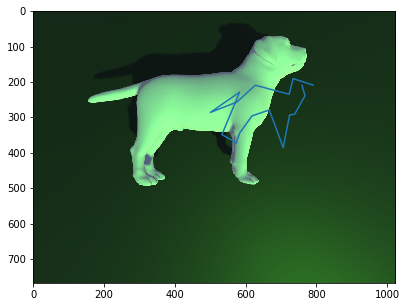

[[790.56343844 208.84498828]
 [734.22353604 190.51923047]
 [723.24582395 234.68325   ]
 [627.22881475 209.25839063]
 [575.35106982 256.74428906]
 [500.44768206 286.15753125]
 [583.18344125 228.64448438]
 [533.08345064 348.78295313]
 [566.00715559 367.09607813]
 [572.95030968 373.69748438]
 [583.12751032 344.63758594]
 [618.10646584 295.88690625]
 [667.00084459 279.12527344]
 [706.22222222 385.36389844]
 [724.37190315 293.25916406]
 [738.70687875 291.03761719]
 [767.89536411 238.6329375 ]
 [759.36153341 209.36470313]]


In [4]:
message = [b'/home/sourabh/Documents/TU-Berlin/Thesis/Sytheticdata/ml-imagesynthesis/captures/Test/image_00000_img.png', b'879.6891,207.687\n816.3407,175.4268\n745.7312,248.0703\n643.5872,262.14\n554.9705,270.0062\n392.1365,317.3346\n515.6824,302.8693\n519.2457,373.5879\n493.2741,433.1558\n525.5048,501.7444\n512.5172,441.4767\n563.6949,372.7936\n718.5456,362.7693\n775.5116,509.7835\n761.0142,373.5491\n794.8956,343.5207\n812.3265,277.0938\n866.0912,230.1749\n', b'751,472\n507,497\n375,306\n835,160\n538,496\n540,495\n765,495\n840,169\n841,172\n541,493\n874,183\n876,188\n876,191\n765,491\n871,217\n844,224\n542,489\n774,489\n372,304\n568,368\n566,368\n588,371\n713,377\n836,163\n487,476\n532,493\n872,181\n504,496\n875,185\n542,486\n837,165\n372,300\n721,479\n718,476\n763,488\n712,449\n715,361\n532,491\n759,485\n876.0001,192\n375.6,306\n488.4,289.2\n537.6,495.6\n540,494.4\n765.6,494.4\n372,303.6\n594,366\n591.6,366\n567.6,367.2\n589.2,369.6\n772.8,489.6\n586.8,370.8\n565.2,368.4\n834.0001,160.8\n835.2,163.2\n840.0001,168\n841.2,172.8\n871.2,181.2\n873.6,182.4\n712.8,378\n506.4,496.8\n837.6,165.6\n870.0001,217.2\n714,448.8\n843.6,224.4\n763.2,490.8\n541.2,486\n487.2,476.4\n720,476.4\n874.8,188.4\n873.6,214.8\n720,478.8\n835.2,164.64\n764.64,494.4\n372.96,302.88\n537.12,495.84\n540,494.4\n593.28,366.24\n567.36,367.68\n588.96,369.12\n586.08,370.56\n771.84,490.08\n564.48,369.12\n836.64,167.52\n842.4,173.28\n712.8,379.2\n871.2,181.92\n874.08,183.36\n874.08,186.24\n506.88,497.28\n872.64,215.04\n714.2401,448.32\n488.16,477.12\n869.76,217.92\n541.44,487.2\n839.52,168.96\n830.88,158.88\n720,477.12\n845.28,223.68\n713.6641,379.2\n539.136,494.976\n373.248,303.168\n594.4321,367.104\n772.4161,489.792\n585.7921,370.56\n834.6241,161.4719\n568.512,368.832\n489.024,291.072\n843.2641,173.5679\n870.9121,182.2079\n874.3681,183.936\n874.3681,187.392\n836.3521,168.384\n540.8641,486.336\n765.5041,494.976\n508.032,496.704\n749.9521,470.784\n489.024,477.696\n720.576,475.968\n374.976,296.256\n711.9361,446.592\n839.8081,168.384\n848.1025,177.0239\n539.136,494.2848\n835.6609,162.5087\n771.3793,490.1376\n843.9553,174.9503\n872.9857,185.3183\n564.0193,369.8687\n750.6433,471.4752\n487.2961,291.0719\n373.248,303.5135\n593.0497,367.7951\n584.7553,369.8687\n568.1665,369.8687\n713.3185,380.2368\n877.1329,210.2015\n835.6609,168.7295\n765.1585,496.3584\n487.2961,477.696\n864.6913,226.7903\n763.9144,484.3315\n836.0757,163.3381\n539.9656,491.7964\n584.7553,369.8687\n771.3794,489.3081\n567.3371,369.8687\n843.5406,173.2914\n714.148,379.822\n873.4005,183.2447\n594.7086,367.3804\n875.8889,208.1279\n373.2481,302.6841\n487.7108,290.2424\n748.9845,466.9132\n751.4728,471.8899\n482.7342,414.6585\n486.7155,293.2284\n567.3371,370.864\n585.2531,370.864\n537.4773,493.2894\n710.6644,379.822\n770.3841,490.3034\n594.211,367.8781\n376.2341,302.1864\n871.9076,185.733\n833.0898,161.8451\n874.8936,209.6208\n862.9496,227.5367\n874.8936,203.6489\n705.8868,381.0164\n376.2341,302.1864\n870.7132,187.5245\n562.5596,373.85\n537.4773,492.095\n483.7296,295.02\n766.8009,492.095\n580.4755,370.2668\n713.0532,381.0164\n874.2964,209.0236\n']
KP = NNFacade().execute(message, draw=True)

img = mpimg.imread(message[0].decode())
plot.figure(figsize= (12,5))

print(KP.shape)
plot.imshow(img, cmap='gray')
plot.plot(KP[:, 0], KP[:, 1])
plot.show()

print(KP)